# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
env = gym.make('Pendulum-v0')

# random_seed = 10
# env.seed(random_seed)

# from agent import Agent
# agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], 
#               random_seed=random_seed)

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
env.action_space, env.observation_space

(Box(1,), Box(3,))

In [4]:
action_size = env.action_space.shape[0]
state_size = env.observation_space.shape[0]

In [5]:
action_size, state_size

(1, 3)

In [6]:
env.observation_space.low, env.observation_space.high

(array([-1., -1., -8.], dtype=float32), array([1., 1., 8.], dtype=float32))

In [7]:
env.action_space.low, env.action_space.high

(array([-2.], dtype=float32), array([2.], dtype=float32))

In [8]:
env.reward_range

(-inf, inf)

### 3. Instantiate DAQLAgent

In [9]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [10]:
# GAMMA = 0.99     # discount factor
# LR = 1e-3        # learning rate of the critic
# BATCH_SIZE = 1024         # minibatch size/ RAM size
# BUFFER_SIZE = int(1e6)  # replay buffer size
# random_seed = 10 # random seed for result reproducibility
# h_size = 400 # hidden layer size

In [11]:
# BUFFER_SIZE = int(1e5)  # replay buffer size
# BATCH_SIZE = 128        # minibatch size
# GAMMA = 0.99            # discount factor
# TAU = 1e-3              # for soft update of target parameters
# LR_ACTOR = 1e-4         # learning rate of the actor 
# LR_CRITIC = 1e-3        # learning rate of the critic
# WEIGHT_DECAY = 0        # L2 weight decay

In [12]:
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 128        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 1e-4        # learning rate
h_size = 400 # hidden layer size
random_seed = 10 # random seed for result reproducibility

In [13]:
# random_seed = 10
env.seed(random_seed)

[10]

In [14]:
from agent import Agent

agent = Agent(s_size=state_size, a_size=action_size, h_size=400, random_seed=random_seed, gamma=GAMMA, 
              lr=LR, batch_size=BATCH_SIZE, buffer_size=BUFFER_SIZE, device=device)

### 4. Train the Agent with DAQL

In [15]:
from collections import deque
import numpy as np
import time
import torch

n_episodes=100000
# n_steps=1000
# n_learn=10
# learn_every=20
R_goal=0 # TOCHECK
Rs_deque = deque(maxlen=100)
meanRs = [] # plot
list_episodes = []

In [ ]:
for i_episode in range(n_episodes):
    
    s = env.reset() # s: state
    #print(s.shape)

    # initialize the score (for each agent)
    R = 0 # R: total reward
    list_steps = []

    #for i_step in range(n_steps):
    while True:
        
        s = np.reshape(s, [1, -1])
        a = agent.act(s) # a=[-2, 2]
        a *= 2
        #print(a.shape)
        
        a = np.reshape(a, [-1])
        s2, r, done, _ = env.step(a)
        #print(s2.shape, r, done)

        s = np.reshape(s, [-1])
        agent.memory.add(s, a, r, s2, done)

        R += r                           # update the score (for each agent)
        s = s2                                # roll over states to next time step

        # if i_step%learn_every == 0:
        # for _ in range(n_learn):
        gloss, dloss, reward, reward_in = agent.start_learn()
        list_steps.append([gloss, dloss, reward, reward_in])
                
        # Exit loop if episode is done/finished for any of the agents among all of them
        if done:
            break

    Rs_deque.append(np.mean(R))
    
    print('Episode:{}, Total Average Score:{:.2f}'.format(i_episode+1, np.mean(Rs_deque)),
          'gloss:{:.2f}'.format(np.mean(list_steps, axis=0)[0]), 
          'dloss:{:.2f}'.format(np.mean(list_steps, axis=0)[1]),
          'reward:{:.5f}'.format(np.mean(list_steps, axis=0)[2]), 
          'reward_in:{:.5f}'.format(np.mean(list_steps, axis=0)[3]))
    
    # Plotting
    list_episodes.append([np.mean(Rs_deque),
                          np.mean(list_steps, axis=0)[0], # gloss
                          np.mean(list_steps, axis=0)[1], # dloss
                          np.mean(list_steps, axis=0)[2], # reward
                          np.mean(list_steps, axis=0)[3]]) # reward_in

    if np.mean(Rs_deque) >= R_goal:
        torch.save(agent.g.state_dict(), 'g-pendulum.pth')
        torch.save(agent.d.state_dict(), 'd-pendulum.pth')
        break

Episode:1, Total Average Score:-881.72 gloss:211.60 dloss:-0.05 reward:-1.65297 reward_in:0.00048
Episode:2, Total Average Score:-1356.70 gloss:756.62 dloss:-0.13 reward:-5.91269 reward_in:0.00135
Episode:3, Total Average Score:-1479.92 gloss:894.68 dloss:-0.12 reward:-6.99311 reward_in:0.00134
Episode:4, Total Average Score:-1444.99 gloss:928.00 dloss:-0.10 reward:-7.25464 reward_in:0.00134
Episode:5, Total Average Score:-1430.92 gloss:918.87 dloss:-0.09 reward:-7.18468 reward_in:0.00134
Episode:6, Total Average Score:-1423.37 gloss:910.70 dloss:-0.07 reward:-7.12234 reward_in:0.00133
Episode:7, Total Average Score:-1422.12 gloss:910.18 dloss:-0.05 reward:-7.11968 reward_in:0.00134
Episode:8, Total Average Score:-1428.57 gloss:900.05 dloss:-0.03 reward:-7.04224 reward_in:0.00133
Episode:9, Total Average Score:-1438.75 gloss:912.97 dloss:-0.01 reward:-7.14460 reward_in:0.00133
Episode:10, Total Average Score:-1453.30 gloss:921.91 dloss:0.02 reward:-7.21557 reward_in:0.00133
Episode:11,

Episode:84, Total Average Score:-1350.29 gloss:843.97 dloss:6.22 reward:-6.73357 reward_in:0.00132
Episode:85, Total Average Score:-1354.04 gloss:848.67 dloss:6.36 reward:-6.77030 reward_in:0.00132
Episode:86, Total Average Score:-1357.27 gloss:844.58 dloss:6.49 reward:-6.74446 reward_in:0.00132
Episode:87, Total Average Score:-1359.83 gloss:848.71 dloss:6.63 reward:-6.77203 reward_in:0.00133
Episode:88, Total Average Score:-1360.69 gloss:856.69 dloss:6.77 reward:-6.84249 reward_in:0.00133
Episode:89, Total Average Score:-1359.55 gloss:854.19 dloss:6.91 reward:-6.81923 reward_in:0.00133
Episode:90, Total Average Score:-1362.74 gloss:851.24 dloss:7.05 reward:-6.79877 reward_in:0.00132
Episode:91, Total Average Score:-1365.27 gloss:857.20 dloss:7.18 reward:-6.84569 reward_in:0.00133
Episode:92, Total Average Score:-1368.74 gloss:853.20 dloss:7.32 reward:-6.81502 reward_in:0.00133
Episode:93, Total Average Score:-1372.08 gloss:858.28 dloss:7.46 reward:-6.85957 reward_in:0.00132
Episode:94

Episode:166, Total Average Score:-1577.50 gloss:910.17 dloss:21.79 reward:-7.40791 reward_in:0.00133
Episode:167, Total Average Score:-1581.29 gloss:911.89 dloss:22.04 reward:-7.40918 reward_in:0.00133
Episode:168, Total Average Score:-1582.10 gloss:909.39 dloss:22.31 reward:-7.41370 reward_in:0.00133
Episode:169, Total Average Score:-1581.65 gloss:906.59 dloss:22.56 reward:-7.37907 reward_in:0.00133
Episode:170, Total Average Score:-1586.89 gloss:908.88 dloss:22.81 reward:-7.38827 reward_in:0.00133
Episode:171, Total Average Score:-1591.60 gloss:910.45 dloss:23.06 reward:-7.40894 reward_in:0.00133
Episode:172, Total Average Score:-1592.82 gloss:911.35 dloss:23.32 reward:-7.40572 reward_in:0.00133
Episode:173, Total Average Score:-1598.03 gloss:905.11 dloss:23.56 reward:-7.37069 reward_in:0.00133
Episode:174, Total Average Score:-1599.29 gloss:913.47 dloss:23.83 reward:-7.43668 reward_in:0.00133
Episode:175, Total Average Score:-1599.07 gloss:908.24 dloss:24.10 reward:-7.39163 reward_i

Episode:248, Total Average Score:-1490.44 gloss:894.96 dloss:46.17 reward:-7.40131 reward_in:0.00133
Episode:249, Total Average Score:-1488.46 gloss:893.86 dloss:46.51 reward:-7.40054 reward_in:0.00134
Episode:250, Total Average Score:-1489.10 gloss:901.00 dloss:46.86 reward:-7.42212 reward_in:0.00133
Episode:251, Total Average Score:-1488.57 gloss:891.58 dloss:47.25 reward:-7.39343 reward_in:0.00133
Episode:252, Total Average Score:-1488.65 gloss:889.99 dloss:47.58 reward:-7.36479 reward_in:0.00133
Episode:253, Total Average Score:-1488.54 gloss:897.58 dloss:47.94 reward:-7.41708 reward_in:0.00134
Episode:254, Total Average Score:-1486.52 gloss:898.35 dloss:48.26 reward:-7.36821 reward_in:0.00134
Episode:255, Total Average Score:-1486.69 gloss:894.25 dloss:48.63 reward:-7.40812 reward_in:0.00134
Episode:256, Total Average Score:-1481.15 gloss:897.35 dloss:49.00 reward:-7.43384 reward_in:0.00133
Episode:257, Total Average Score:-1477.95 gloss:897.18 dloss:49.33 reward:-7.40476 reward_i

Episode:330, Total Average Score:-1325.41 gloss:860.27 dloss:77.94 reward:-7.17413 reward_in:0.00134
Episode:331, Total Average Score:-1318.32 gloss:861.14 dloss:78.44 reward:-7.17876 reward_in:0.00134
Episode:332, Total Average Score:-1313.67 gloss:855.00 dloss:78.91 reward:-7.15066 reward_in:0.00134
Episode:333, Total Average Score:-1310.08 gloss:860.61 dloss:79.32 reward:-7.16671 reward_in:0.00134
Episode:334, Total Average Score:-1305.32 gloss:852.56 dloss:79.77 reward:-7.12042 reward_in:0.00134
Episode:335, Total Average Score:-1307.00 gloss:865.01 dloss:80.20 reward:-7.16034 reward_in:0.00134
Episode:336, Total Average Score:-1300.70 gloss:859.08 dloss:80.64 reward:-7.12805 reward_in:0.00134
Episode:337, Total Average Score:-1293.32 gloss:853.80 dloss:81.12 reward:-7.12414 reward_in:0.00134
Episode:338, Total Average Score:-1290.88 gloss:849.14 dloss:81.50 reward:-7.10125 reward_in:0.00133
Episode:339, Total Average Score:-1283.48 gloss:849.04 dloss:81.92 reward:-7.10635 reward_i

Episode:411, Total Average Score:-942.95 gloss:827.47 dloss:115.84 reward:-6.58278 reward_in:0.00134
Episode:412, Total Average Score:-930.85 gloss:823.76 dloss:116.22 reward:-6.55293 reward_in:0.00133
Episode:413, Total Average Score:-919.60 gloss:819.40 dloss:116.81 reward:-6.55647 reward_in:0.00133
Episode:414, Total Average Score:-911.39 gloss:821.66 dloss:117.30 reward:-6.55511 reward_in:0.00133
Episode:415, Total Average Score:-898.94 gloss:830.56 dloss:117.81 reward:-6.53229 reward_in:0.00134
Episode:416, Total Average Score:-891.03 gloss:839.57 dloss:118.28 reward:-6.58389 reward_in:0.00133
Episode:417, Total Average Score:-876.22 gloss:814.47 dloss:118.69 reward:-6.51164 reward_in:0.00134
Episode:418, Total Average Score:-865.21 gloss:817.47 dloss:119.28 reward:-6.46577 reward_in:0.00133
Episode:419, Total Average Score:-855.45 gloss:823.86 dloss:119.84 reward:-6.48683 reward_in:0.00133
Episode:420, Total Average Score:-846.31 gloss:814.25 dloss:120.38 reward:-6.48891 reward_i

Episode:493, Total Average Score:-602.95 gloss:895.26 dloss:160.28 reward:-6.02990 reward_in:0.00133
Episode:494, Total Average Score:-606.89 gloss:897.81 dloss:160.82 reward:-6.05199 reward_in:0.00134
Episode:495, Total Average Score:-611.65 gloss:889.83 dloss:161.50 reward:-5.99489 reward_in:0.00132
Episode:496, Total Average Score:-619.59 gloss:901.62 dloss:162.13 reward:-6.04030 reward_in:0.00133
Episode:497, Total Average Score:-631.94 gloss:910.30 dloss:162.91 reward:-6.01918 reward_in:0.00133
Episode:498, Total Average Score:-641.14 gloss:910.92 dloss:163.33 reward:-5.99407 reward_in:0.00133
Episode:499, Total Average Score:-653.47 gloss:892.09 dloss:163.81 reward:-6.01581 reward_in:0.00134
Episode:500, Total Average Score:-650.89 gloss:947.59 dloss:164.65 reward:-5.97946 reward_in:0.00133
Episode:501, Total Average Score:-660.45 gloss:909.33 dloss:165.31 reward:-5.99640 reward_in:0.00133
Episode:502, Total Average Score:-668.02 gloss:959.80 dloss:165.98 reward:-6.03096 reward_i

Episode:575, Total Average Score:-745.71 gloss:970.60 dloss:211.10 reward:-5.53809 reward_in:0.00134
Episode:576, Total Average Score:-752.37 gloss:936.25 dloss:211.90 reward:-5.51269 reward_in:0.00133
Episode:577, Total Average Score:-753.05 gloss:982.16 dloss:212.36 reward:-5.51469 reward_in:0.00133
Episode:578, Total Average Score:-753.69 gloss:978.11 dloss:212.87 reward:-5.49962 reward_in:0.00133
Episode:579, Total Average Score:-756.33 gloss:998.88 dloss:213.59 reward:-5.49140 reward_in:0.00133
Episode:580, Total Average Score:-762.08 gloss:978.46 dloss:214.38 reward:-5.51632 reward_in:0.00133
Episode:581, Total Average Score:-774.52 gloss:966.22 dloss:215.10 reward:-5.50234 reward_in:0.00132
Episode:582, Total Average Score:-786.37 gloss:995.17 dloss:215.68 reward:-5.49653 reward_in:0.00133
Episode:583, Total Average Score:-799.03 gloss:997.83 dloss:216.29 reward:-5.53014 reward_in:0.00134
Episode:584, Total Average Score:-801.11 gloss:1004.77 dloss:216.99 reward:-5.49251 reward_

Episode:656, Total Average Score:-717.60 gloss:1003.43 dloss:261.05 reward:-4.69944 reward_in:0.00133
Episode:657, Total Average Score:-707.62 gloss:994.34 dloss:261.51 reward:-4.73818 reward_in:0.00133
Episode:658, Total Average Score:-709.79 gloss:1036.62 dloss:261.68 reward:-4.66372 reward_in:0.00133
Episode:659, Total Average Score:-698.18 gloss:988.95 dloss:261.90 reward:-4.65094 reward_in:0.00132
Episode:660, Total Average Score:-689.69 gloss:971.54 dloss:262.45 reward:-4.65234 reward_in:0.00133
Episode:661, Total Average Score:-678.07 gloss:986.38 dloss:262.66 reward:-4.66927 reward_in:0.00133
Episode:662, Total Average Score:-663.94 gloss:1042.37 dloss:262.92 reward:-4.64482 reward_in:0.00134
Episode:663, Total Average Score:-650.61 gloss:985.44 dloss:263.17 reward:-4.61951 reward_in:0.00133
Episode:664, Total Average Score:-651.19 gloss:1025.56 dloss:263.75 reward:-4.62821 reward_in:0.00133
Episode:665, Total Average Score:-638.72 gloss:984.41 dloss:263.82 reward:-4.59990 rewa

Episode:737, Total Average Score:-686.33 gloss:701.04 dloss:282.74 reward:-4.12710 reward_in:0.00133
Episode:738, Total Average Score:-696.02 gloss:696.29 dloss:283.02 reward:-4.12549 reward_in:0.00133
Episode:739, Total Average Score:-705.56 gloss:719.48 dloss:283.06 reward:-4.16859 reward_in:0.00133
Episode:740, Total Average Score:-712.94 gloss:691.44 dloss:283.57 reward:-4.14552 reward_in:0.00132
Episode:741, Total Average Score:-720.27 gloss:675.68 dloss:283.77 reward:-4.15915 reward_in:0.00132
Episode:742, Total Average Score:-727.35 gloss:663.91 dloss:283.86 reward:-4.10497 reward_in:0.00133
Episode:743, Total Average Score:-738.60 gloss:653.87 dloss:283.99 reward:-4.11063 reward_in:0.00133
Episode:744, Total Average Score:-747.10 gloss:670.34 dloss:283.99 reward:-4.11351 reward_in:0.00132
Episode:745, Total Average Score:-753.99 gloss:652.80 dloss:284.33 reward:-4.13797 reward_in:0.00133
Episode:746, Total Average Score:-762.94 gloss:657.90 dloss:284.63 reward:-4.13993 reward_i

Episode:819, Total Average Score:-1012.05 gloss:676.86 dloss:300.14 reward:-3.91234 reward_in:0.00132
Episode:820, Total Average Score:-1018.57 gloss:613.40 dloss:300.37 reward:-3.95960 reward_in:0.00133
Episode:821, Total Average Score:-1021.55 gloss:665.82 dloss:300.17 reward:-3.94199 reward_in:0.00134
Episode:822, Total Average Score:-1024.79 gloss:667.87 dloss:300.44 reward:-3.89728 reward_in:0.00133
Episode:823, Total Average Score:-1026.63 gloss:685.39 dloss:300.64 reward:-3.91273 reward_in:0.00133
Episode:824, Total Average Score:-1028.25 gloss:655.37 dloss:300.72 reward:-3.89806 reward_in:0.00132
Episode:825, Total Average Score:-1027.42 gloss:672.63 dloss:300.48 reward:-3.93291 reward_in:0.00134
Episode:826, Total Average Score:-1025.34 gloss:656.22 dloss:300.81 reward:-3.88305 reward_in:0.00132
Episode:827, Total Average Score:-1029.39 gloss:672.36 dloss:300.78 reward:-3.87858 reward_in:0.00133
Episode:828, Total Average Score:-1028.51 gloss:665.20 dloss:300.56 reward:-3.8603

Episode:900, Total Average Score:-756.06 gloss:803.57 dloss:297.06 reward:-3.74342 reward_in:0.00133
Episode:901, Total Average Score:-754.24 gloss:841.22 dloss:296.94 reward:-3.73053 reward_in:0.00133
Episode:902, Total Average Score:-752.40 gloss:819.40 dloss:296.68 reward:-3.77452 reward_in:0.00133
Episode:903, Total Average Score:-748.67 gloss:792.88 dloss:296.09 reward:-3.72603 reward_in:0.00133
Episode:904, Total Average Score:-743.30 gloss:785.65 dloss:295.25 reward:-3.77271 reward_in:0.00133
Episode:905, Total Average Score:-739.38 gloss:821.85 dloss:294.85 reward:-3.73378 reward_in:0.00133
Episode:906, Total Average Score:-734.92 gloss:812.43 dloss:294.37 reward:-3.73593 reward_in:0.00133
Episode:907, Total Average Score:-732.07 gloss:815.02 dloss:293.75 reward:-3.78521 reward_in:0.00134
Episode:908, Total Average Score:-728.18 gloss:835.73 dloss:293.02 reward:-3.71049 reward_in:0.00132
Episode:909, Total Average Score:-724.15 gloss:828.01 dloss:292.29 reward:-3.72210 reward_i

Episode:981, Total Average Score:-493.07 gloss:1354.38 dloss:268.35 reward:-3.68366 reward_in:0.00133
Episode:982, Total Average Score:-498.00 gloss:1455.36 dloss:268.41 reward:-3.64765 reward_in:0.00132
Episode:983, Total Average Score:-501.63 gloss:1414.82 dloss:268.15 reward:-3.62659 reward_in:0.00133
Episode:984, Total Average Score:-501.78 gloss:1414.32 dloss:268.38 reward:-3.63662 reward_in:0.00132
Episode:985, Total Average Score:-502.90 gloss:1528.31 dloss:268.08 reward:-3.65990 reward_in:0.00133
Episode:986, Total Average Score:-505.49 gloss:1504.74 dloss:267.47 reward:-3.60369 reward_in:0.00133
Episode:987, Total Average Score:-508.09 gloss:1570.75 dloss:267.52 reward:-3.64589 reward_in:0.00133
Episode:988, Total Average Score:-509.13 gloss:1657.03 dloss:267.17 reward:-3.63959 reward_in:0.00134
Episode:989, Total Average Score:-509.86 gloss:1699.69 dloss:266.57 reward:-3.63380 reward_in:0.00133
Episode:990, Total Average Score:-512.59 gloss:1784.48 dloss:266.64 reward:-3.6565

Episode:1061, Total Average Score:-756.75 gloss:1667.38 dloss:244.59 reward:-3.78206 reward_in:0.00133
Episode:1062, Total Average Score:-769.77 gloss:1668.78 dloss:244.28 reward:-3.81880 reward_in:0.00133
Episode:1063, Total Average Score:-769.75 gloss:1635.71 dloss:244.13 reward:-3.73182 reward_in:0.00133
Episode:1064, Total Average Score:-769.68 gloss:1612.49 dloss:243.92 reward:-3.75904 reward_in:0.00133
Episode:1065, Total Average Score:-785.20 gloss:1602.82 dloss:243.97 reward:-3.74431 reward_in:0.00133
Episode:1066, Total Average Score:-796.87 gloss:1588.11 dloss:243.96 reward:-3.74860 reward_in:0.00133
Episode:1067, Total Average Score:-813.49 gloss:1644.44 dloss:243.82 reward:-3.76900 reward_in:0.00133
Episode:1068, Total Average Score:-812.23 gloss:1687.52 dloss:243.43 reward:-3.78119 reward_in:0.00133
Episode:1069, Total Average Score:-807.99 gloss:1590.36 dloss:243.20 reward:-3.75238 reward_in:0.00133
Episode:1070, Total Average Score:-820.08 gloss:1620.31 dloss:243.16 rewa

Episode:1141, Total Average Score:-899.63 gloss:1464.01 dloss:234.28 reward:-3.83163 reward_in:0.00133
Episode:1142, Total Average Score:-900.57 gloss:1424.54 dloss:234.11 reward:-3.84232 reward_in:0.00133
Episode:1143, Total Average Score:-886.29 gloss:1478.30 dloss:234.45 reward:-3.81389 reward_in:0.00133
Episode:1144, Total Average Score:-886.81 gloss:1444.35 dloss:234.02 reward:-3.82904 reward_in:0.00132
Episode:1145, Total Average Score:-886.80 gloss:1462.14 dloss:234.07 reward:-3.85101 reward_in:0.00133
Episode:1146, Total Average Score:-902.01 gloss:1464.74 dloss:233.86 reward:-3.84328 reward_in:0.00133
Episode:1147, Total Average Score:-918.43 gloss:1439.56 dloss:233.77 reward:-3.86354 reward_in:0.00133
Episode:1148, Total Average Score:-903.56 gloss:1461.82 dloss:233.68 reward:-3.84208 reward_in:0.00133
Episode:1149, Total Average Score:-918.66 gloss:1435.10 dloss:233.73 reward:-3.88331 reward_in:0.00133
Episode:1150, Total Average Score:-918.66 gloss:1457.23 dloss:233.63 rewa

Episode:1221, Total Average Score:-462.81 gloss:1378.89 dloss:225.94 reward:-3.56339 reward_in:0.00133
Episode:1222, Total Average Score:-447.27 gloss:1428.86 dloss:225.46 reward:-3.49465 reward_in:0.00133
Episode:1223, Total Average Score:-431.85 gloss:1361.72 dloss:225.82 reward:-3.55205 reward_in:0.00133
Episode:1224, Total Average Score:-431.87 gloss:1365.39 dloss:225.60 reward:-3.54034 reward_in:0.00133
Episode:1225, Total Average Score:-416.56 gloss:1384.37 dloss:225.35 reward:-3.52450 reward_in:0.00133
Episode:1226, Total Average Score:-418.72 gloss:1366.38 dloss:225.29 reward:-3.51821 reward_in:0.00133
Episode:1227, Total Average Score:-418.65 gloss:1388.61 dloss:225.10 reward:-3.50580 reward_in:0.00133
Episode:1228, Total Average Score:-403.51 gloss:1343.98 dloss:224.85 reward:-3.51895 reward_in:0.00133
Episode:1229, Total Average Score:-388.27 gloss:1412.86 dloss:224.84 reward:-3.54082 reward_in:0.00133
Episode:1230, Total Average Score:-373.00 gloss:1353.84 dloss:224.38 rewa

Episode:1301, Total Average Score:-167.20 gloss:1228.23 dloss:211.77 reward:-2.84648 reward_in:0.00132
Episode:1302, Total Average Score:-166.06 gloss:1221.16 dloss:211.80 reward:-2.83015 reward_in:0.00132
Episode:1303, Total Average Score:-168.87 gloss:1236.92 dloss:211.73 reward:-2.86892 reward_in:0.00133
Episode:1304, Total Average Score:-168.47 gloss:1212.97 dloss:211.70 reward:-2.84985 reward_in:0.00133
Episode:1305, Total Average Score:-169.58 gloss:1180.18 dloss:211.28 reward:-2.82877 reward_in:0.00132
Episode:1306, Total Average Score:-169.51 gloss:1224.56 dloss:211.11 reward:-2.82740 reward_in:0.00133
Episode:1307, Total Average Score:-167.25 gloss:1179.09 dloss:210.73 reward:-2.79508 reward_in:0.00133
Episode:1308, Total Average Score:-168.28 gloss:1177.60 dloss:210.67 reward:-2.82396 reward_in:0.00132
Episode:1309, Total Average Score:-168.28 gloss:1206.16 dloss:210.41 reward:-2.75208 reward_in:0.00133
Episode:1310, Total Average Score:-168.21 gloss:1223.36 dloss:210.86 rewa

Episode:1381, Total Average Score:-196.78 gloss:1051.46 dloss:207.06 reward:-2.35190 reward_in:0.00132
Episode:1382, Total Average Score:-195.46 gloss:1007.08 dloss:206.76 reward:-2.35129 reward_in:0.00133
Episode:1383, Total Average Score:-195.47 gloss:1045.93 dloss:206.75 reward:-2.33762 reward_in:0.00133
Episode:1384, Total Average Score:-192.99 gloss:1054.71 dloss:206.55 reward:-2.35917 reward_in:0.00133
Episode:1385, Total Average Score:-193.01 gloss:994.21 dloss:206.63 reward:-2.32614 reward_in:0.00133
Episode:1386, Total Average Score:-191.32 gloss:1022.45 dloss:206.42 reward:-2.37265 reward_in:0.00133
Episode:1387, Total Average Score:-190.40 gloss:984.83 dloss:206.22 reward:-2.32661 reward_in:0.00133
Episode:1388, Total Average Score:-188.11 gloss:976.78 dloss:205.99 reward:-2.37239 reward_in:0.00133
Episode:1389, Total Average Score:-188.12 gloss:998.18 dloss:205.85 reward:-2.28742 reward_in:0.00132
Episode:1390, Total Average Score:-188.10 gloss:1013.63 dloss:205.89 reward:-

Episode:1462, Total Average Score:-275.11 gloss:897.25 dloss:201.54 reward:-2.21319 reward_in:0.00132
Episode:1463, Total Average Score:-271.11 gloss:892.81 dloss:201.79 reward:-2.25196 reward_in:0.00132
Episode:1464, Total Average Score:-272.34 gloss:828.48 dloss:201.69 reward:-2.22708 reward_in:0.00133
Episode:1465, Total Average Score:-270.05 gloss:896.00 dloss:201.07 reward:-2.16857 reward_in:0.00133
Episode:1466, Total Average Score:-286.47 gloss:833.37 dloss:201.42 reward:-2.23483 reward_in:0.00132
Episode:1467, Total Average Score:-285.20 gloss:808.20 dloss:201.22 reward:-2.23839 reward_in:0.00132
Episode:1468, Total Average Score:-285.17 gloss:824.90 dloss:201.56 reward:-2.24436 reward_in:0.00133
Episode:1469, Total Average Score:-302.47 gloss:840.90 dloss:201.36 reward:-2.21409 reward_in:0.00132
Episode:1470, Total Average Score:-318.78 gloss:856.07 dloss:201.67 reward:-2.27739 reward_in:0.00133
Episode:1471, Total Average Score:-317.58 gloss:830.77 dloss:201.24 reward:-2.2397

Episode:1543, Total Average Score:-286.97 gloss:623.38 dloss:197.77 reward:-1.86535 reward_in:0.00133
Episode:1544, Total Average Score:-285.79 gloss:636.30 dloss:197.79 reward:-1.87551 reward_in:0.00132
Episode:1545, Total Average Score:-283.47 gloss:652.39 dloss:197.43 reward:-1.84420 reward_in:0.00133
Episode:1546, Total Average Score:-296.71 gloss:615.01 dloss:197.53 reward:-1.83876 reward_in:0.00133
Episode:1547, Total Average Score:-297.81 gloss:636.42 dloss:197.58 reward:-1.85117 reward_in:0.00132
Episode:1548, Total Average Score:-297.85 gloss:651.93 dloss:197.48 reward:-1.88522 reward_in:0.00133
Episode:1549, Total Average Score:-313.89 gloss:563.22 dloss:197.47 reward:-1.85564 reward_in:0.00132
Episode:1550, Total Average Score:-313.85 gloss:620.69 dloss:197.27 reward:-1.85157 reward_in:0.00132
Episode:1551, Total Average Score:-313.91 gloss:597.35 dloss:197.31 reward:-1.88514 reward_in:0.00133
Episode:1552, Total Average Score:-315.11 gloss:608.80 dloss:196.95 reward:-1.8565

Episode:1624, Total Average Score:-380.51 gloss:624.39 dloss:188.70 reward:-1.50095 reward_in:0.00132
Episode:1625, Total Average Score:-379.13 gloss:675.87 dloss:188.57 reward:-1.43434 reward_in:0.00132
Episode:1626, Total Average Score:-376.32 gloss:650.74 dloss:188.43 reward:-1.47473 reward_in:0.00132
Episode:1627, Total Average Score:-373.02 gloss:653.87 dloss:188.55 reward:-1.48851 reward_in:0.00133
Episode:1628, Total Average Score:-372.92 gloss:641.87 dloss:188.42 reward:-1.49316 reward_in:0.00132
Episode:1629, Total Average Score:-372.81 gloss:704.36 dloss:188.31 reward:-1.48439 reward_in:0.00133
Episode:1630, Total Average Score:-371.66 gloss:698.04 dloss:188.04 reward:-1.42009 reward_in:0.00132
Episode:1631, Total Average Score:-355.93 gloss:678.12 dloss:187.73 reward:-1.39702 reward_in:0.00132
Episode:1632, Total Average Score:-354.66 gloss:702.53 dloss:187.60 reward:-1.44245 reward_in:0.00132
Episode:1633, Total Average Score:-354.68 gloss:735.72 dloss:187.41 reward:-1.4214

Episode:1705, Total Average Score:-231.77 gloss:597.71 dloss:175.75 reward:-1.22320 reward_in:0.00132
Episode:1706, Total Average Score:-233.75 gloss:601.62 dloss:175.59 reward:-1.27958 reward_in:0.00132
Episode:1707, Total Average Score:-233.39 gloss:587.13 dloss:175.40 reward:-1.21655 reward_in:0.00132
Episode:1708, Total Average Score:-233.36 gloss:593.24 dloss:175.22 reward:-1.26769 reward_in:0.00132
Episode:1709, Total Average Score:-233.34 gloss:603.90 dloss:175.05 reward:-1.27408 reward_in:0.00132
Episode:1710, Total Average Score:-233.35 gloss:584.93 dloss:175.00 reward:-1.27806 reward_in:0.00132
Episode:1711, Total Average Score:-237.98 gloss:624.66 dloss:174.98 reward:-1.23521 reward_in:0.00132
Episode:1712, Total Average Score:-239.13 gloss:576.52 dloss:174.43 reward:-1.27748 reward_in:0.00132
Episode:1713, Total Average Score:-242.38 gloss:627.83 dloss:174.45 reward:-1.25745 reward_in:0.00133
Episode:1714, Total Average Score:-244.91 gloss:668.42 dloss:174.49 reward:-1.2711

Episode:1786, Total Average Score:-282.56 gloss:576.95 dloss:165.50 reward:-1.38141 reward_in:0.00132
Episode:1787, Total Average Score:-283.66 gloss:588.15 dloss:165.54 reward:-1.34115 reward_in:0.00133
Episode:1788, Total Average Score:-284.87 gloss:567.09 dloss:165.16 reward:-1.34989 reward_in:0.00132
Episode:1789, Total Average Score:-286.20 gloss:550.80 dloss:165.00 reward:-1.34656 reward_in:0.00132
Episode:1790, Total Average Score:-289.79 gloss:610.25 dloss:164.92 reward:-1.34860 reward_in:0.00132
Episode:1791, Total Average Score:-289.76 gloss:550.38 dloss:164.82 reward:-1.34235 reward_in:0.00132
Episode:1792, Total Average Score:-294.77 gloss:556.08 dloss:164.74 reward:-1.34359 reward_in:0.00132
Episode:1793, Total Average Score:-296.84 gloss:694.62 dloss:165.02 reward:-1.38129 reward_in:0.00132
Episode:1794, Total Average Score:-299.42 gloss:530.76 dloss:164.56 reward:-1.38761 reward_in:0.00132
Episode:1795, Total Average Score:-298.25 gloss:593.92 dloss:164.70 reward:-1.3872

Episode:1867, Total Average Score:-365.31 gloss:602.58 dloss:156.99 reward:-1.48515 reward_in:0.00133
Episode:1868, Total Average Score:-365.28 gloss:626.35 dloss:156.99 reward:-1.48814 reward_in:0.00132
Episode:1869, Total Average Score:-359.82 gloss:645.44 dloss:156.76 reward:-1.47688 reward_in:0.00132
Episode:1870, Total Average Score:-356.03 gloss:610.32 dloss:156.49 reward:-1.48183 reward_in:0.00133
Episode:1871, Total Average Score:-350.58 gloss:593.85 dloss:156.52 reward:-1.49614 reward_in:0.00132
Episode:1872, Total Average Score:-350.55 gloss:639.86 dloss:156.56 reward:-1.50505 reward_in:0.00133
Episode:1873, Total Average Score:-359.47 gloss:637.58 dloss:156.43 reward:-1.45753 reward_in:0.00132
Episode:1874, Total Average Score:-356.14 gloss:654.00 dloss:156.62 reward:-1.51771 reward_in:0.00132
Episode:1875, Total Average Score:-368.65 gloss:588.71 dloss:156.30 reward:-1.54090 reward_in:0.00132
Episode:1876, Total Average Score:-368.19 gloss:599.64 dloss:156.40 reward:-1.5289

Episode:1948, Total Average Score:-320.85 gloss:562.73 dloss:152.17 reward:-1.52361 reward_in:0.00132
Episode:1949, Total Average Score:-322.07 gloss:625.34 dloss:152.16 reward:-1.53641 reward_in:0.00132
Episode:1950, Total Average Score:-334.28 gloss:562.72 dloss:152.15 reward:-1.52162 reward_in:0.00132
Episode:1951, Total Average Score:-334.33 gloss:558.97 dloss:152.29 reward:-1.54782 reward_in:0.00132
Episode:1952, Total Average Score:-348.90 gloss:581.62 dloss:152.01 reward:-1.55635 reward_in:0.00132
Episode:1953, Total Average Score:-350.15 gloss:601.78 dloss:152.19 reward:-1.59181 reward_in:0.00133
Episode:1954, Total Average Score:-347.60 gloss:575.63 dloss:152.27 reward:-1.54784 reward_in:0.00133
Episode:1955, Total Average Score:-350.84 gloss:568.74 dloss:152.02 reward:-1.56148 reward_in:0.00132
Episode:1956, Total Average Score:-350.74 gloss:597.47 dloss:151.92 reward:-1.53267 reward_in:0.00133
Episode:1957, Total Average Score:-346.74 gloss:556.27 dloss:152.19 reward:-1.5554

Episode:2029, Total Average Score:-396.67 gloss:654.92 dloss:150.83 reward:-1.68666 reward_in:0.00133
Episode:2030, Total Average Score:-396.68 gloss:672.71 dloss:150.72 reward:-1.64686 reward_in:0.00133
Episode:2031, Total Average Score:-397.88 gloss:689.73 dloss:150.97 reward:-1.67442 reward_in:0.00133
Episode:2032, Total Average Score:-400.45 gloss:658.90 dloss:150.63 reward:-1.65732 reward_in:0.00133
Episode:2033, Total Average Score:-388.07 gloss:633.24 dloss:151.22 reward:-1.66628 reward_in:0.00133
Episode:2034, Total Average Score:-394.42 gloss:630.25 dloss:150.70 reward:-1.64690 reward_in:0.00133
Episode:2035, Total Average Score:-399.77 gloss:633.59 dloss:150.98 reward:-1.61871 reward_in:0.00132
Episode:2036, Total Average Score:-399.73 gloss:691.12 dloss:151.27 reward:-1.64309 reward_in:0.00133
Episode:2037, Total Average Score:-401.09 gloss:660.43 dloss:151.02 reward:-1.65863 reward_in:0.00132
Episode:2038, Total Average Score:-414.93 gloss:688.94 dloss:151.08 reward:-1.6737

Episode:2110, Total Average Score:-588.25 gloss:572.55 dloss:155.22 reward:-1.89302 reward_in:0.00133
Episode:2111, Total Average Score:-583.21 gloss:578.29 dloss:154.85 reward:-1.80975 reward_in:0.00133
Episode:2112, Total Average Score:-597.09 gloss:525.25 dloss:154.85 reward:-1.83531 reward_in:0.00133
Episode:2113, Total Average Score:-597.08 gloss:561.12 dloss:154.78 reward:-1.82327 reward_in:0.00133
Episode:2114, Total Average Score:-595.83 gloss:599.48 dloss:154.68 reward:-1.84204 reward_in:0.00133
Episode:2115, Total Average Score:-594.51 gloss:521.04 dloss:154.41 reward:-1.82030 reward_in:0.00133
Episode:2116, Total Average Score:-583.56 gloss:538.17 dloss:154.19 reward:-1.81352 reward_in:0.00133
Episode:2117, Total Average Score:-583.55 gloss:556.09 dloss:154.11 reward:-1.79139 reward_in:0.00133
Episode:2118, Total Average Score:-594.78 gloss:531.02 dloss:154.27 reward:-1.85994 reward_in:0.00133
Episode:2119, Total Average Score:-594.84 gloss:531.15 dloss:154.08 reward:-1.8037

Episode:2191, Total Average Score:-549.07 gloss:412.64 dloss:150.49 reward:-2.06093 reward_in:0.00133
Episode:2192, Total Average Score:-535.12 gloss:465.78 dloss:151.12 reward:-2.11866 reward_in:0.00133
Episode:2193, Total Average Score:-533.64 gloss:475.37 dloss:151.14 reward:-2.08953 reward_in:0.00133
Episode:2194, Total Average Score:-528.66 gloss:470.53 dloss:151.12 reward:-2.13337 reward_in:0.00133
Episode:2195, Total Average Score:-528.65 gloss:480.96 dloss:151.55 reward:-2.12891 reward_in:0.00133
Episode:2196, Total Average Score:-532.11 gloss:458.08 dloss:150.16 reward:-2.06565 reward_in:0.00133
Episode:2197, Total Average Score:-532.06 gloss:464.84 dloss:151.25 reward:-2.12168 reward_in:0.00133
Episode:2198, Total Average Score:-547.71 gloss:427.96 dloss:150.86 reward:-2.10778 reward_in:0.00133
Episode:2199, Total Average Score:-565.12 gloss:482.79 dloss:150.65 reward:-2.08147 reward_in:0.00133
Episode:2200, Total Average Score:-561.31 gloss:451.12 dloss:150.92 reward:-2.0784

Episode:2272, Total Average Score:-525.08 gloss:461.60 dloss:157.78 reward:-2.29942 reward_in:0.00133
Episode:2273, Total Average Score:-509.48 gloss:409.67 dloss:158.70 reward:-2.31521 reward_in:0.00133
Episode:2274, Total Average Score:-523.26 gloss:413.30 dloss:158.19 reward:-2.29862 reward_in:0.00133
Episode:2275, Total Average Score:-537.01 gloss:381.65 dloss:159.38 reward:-2.34212 reward_in:0.00133
Episode:2276, Total Average Score:-537.15 gloss:417.25 dloss:158.86 reward:-2.34636 reward_in:0.00133
Episode:2277, Total Average Score:-551.98 gloss:424.40 dloss:159.93 reward:-2.33087 reward_in:0.00133
Episode:2278, Total Average Score:-566.62 gloss:400.70 dloss:160.61 reward:-2.34018 reward_in:0.00133
Episode:2279, Total Average Score:-580.38 gloss:398.12 dloss:160.72 reward:-2.31242 reward_in:0.00133
Episode:2280, Total Average Score:-566.40 gloss:405.79 dloss:161.20 reward:-2.34578 reward_in:0.00133
Episode:2281, Total Average Score:-563.64 gloss:381.85 dloss:161.06 reward:-2.3682

Episode:2353, Total Average Score:-659.63 gloss:370.74 dloss:176.86 reward:-2.52584 reward_in:0.00132
Episode:2354, Total Average Score:-657.50 gloss:330.40 dloss:179.14 reward:-2.58263 reward_in:0.00133
Episode:2355, Total Average Score:-660.15 gloss:324.92 dloss:178.30 reward:-2.56067 reward_in:0.00133
Episode:2356, Total Average Score:-661.39 gloss:324.64 dloss:179.14 reward:-2.60578 reward_in:0.00133
Episode:2357, Total Average Score:-660.22 gloss:335.46 dloss:178.12 reward:-2.54271 reward_in:0.00133
Episode:2358, Total Average Score:-674.31 gloss:327.57 dloss:178.97 reward:-2.58239 reward_in:0.00133
Episode:2359, Total Average Score:-657.38 gloss:336.38 dloss:178.71 reward:-2.55774 reward_in:0.00133
Episode:2360, Total Average Score:-658.90 gloss:360.28 dloss:180.13 reward:-2.58639 reward_in:0.00133
Episode:2361, Total Average Score:-658.18 gloss:322.85 dloss:180.08 reward:-2.58315 reward_in:0.00133
Episode:2362, Total Average Score:-659.57 gloss:297.43 dloss:181.33 reward:-2.6178

Episode:2434, Total Average Score:-454.37 gloss:296.00 dloss:189.63 reward:-2.64970 reward_in:0.00133
Episode:2435, Total Average Score:-456.68 gloss:281.43 dloss:190.61 reward:-2.70746 reward_in:0.00133
Episode:2436, Total Average Score:-458.06 gloss:328.97 dloss:190.47 reward:-2.67807 reward_in:0.00133
Episode:2437, Total Average Score:-460.66 gloss:328.97 dloss:190.65 reward:-2.70957 reward_in:0.00133
Episode:2438, Total Average Score:-461.99 gloss:334.61 dloss:189.64 reward:-2.66552 reward_in:0.00133
Episode:2439, Total Average Score:-462.04 gloss:295.98 dloss:191.22 reward:-2.69751 reward_in:0.00133
Episode:2440, Total Average Score:-474.45 gloss:314.57 dloss:190.08 reward:-2.68398 reward_in:0.00133
Episode:2441, Total Average Score:-474.51 gloss:296.64 dloss:191.25 reward:-2.68487 reward_in:0.00133
Episode:2442, Total Average Score:-475.94 gloss:261.97 dloss:191.74 reward:-2.70528 reward_in:0.00132
Episode:2443, Total Average Score:-477.13 gloss:290.04 dloss:190.29 reward:-2.6537

Episode:2515, Total Average Score:-524.87 gloss:303.04 dloss:199.56 reward:-2.81296 reward_in:0.00133
Episode:2516, Total Average Score:-540.81 gloss:274.36 dloss:199.82 reward:-2.82408 reward_in:0.00133
Episode:2517, Total Average Score:-556.71 gloss:280.48 dloss:199.74 reward:-2.81736 reward_in:0.00133
Episode:2518, Total Average Score:-558.12 gloss:334.71 dloss:199.97 reward:-2.81051 reward_in:0.00133
Episode:2519, Total Average Score:-557.10 gloss:285.38 dloss:201.58 reward:-2.86290 reward_in:0.00133
Episode:2520, Total Average Score:-573.10 gloss:295.42 dloss:201.66 reward:-2.85141 reward_in:0.00133
Episode:2521, Total Average Score:-573.96 gloss:308.77 dloss:200.99 reward:-2.82631 reward_in:0.00133
Episode:2522, Total Average Score:-588.49 gloss:315.57 dloss:202.04 reward:-2.87360 reward_in:0.00133
Episode:2523, Total Average Score:-604.19 gloss:288.68 dloss:204.17 reward:-2.91795 reward_in:0.00133
Episode:2524, Total Average Score:-605.62 gloss:319.67 dloss:201.91 reward:-2.8722

Episode:2596, Total Average Score:-683.55 gloss:327.59 dloss:209.44 reward:-2.89291 reward_in:0.00133
Episode:2597, Total Average Score:-698.40 gloss:348.10 dloss:208.77 reward:-2.88346 reward_in:0.00133
Episode:2598, Total Average Score:-713.30 gloss:296.23 dloss:210.29 reward:-2.92805 reward_in:0.00133
Episode:2599, Total Average Score:-713.67 gloss:318.16 dloss:211.54 reward:-2.95797 reward_in:0.00133
Episode:2600, Total Average Score:-713.64 gloss:343.47 dloss:211.27 reward:-2.95707 reward_in:0.00133
Episode:2601, Total Average Score:-714.34 gloss:294.12 dloss:210.84 reward:-2.91750 reward_in:0.00133
Episode:2602, Total Average Score:-716.59 gloss:347.34 dloss:210.43 reward:-2.91021 reward_in:0.00133
Episode:2603, Total Average Score:-732.83 gloss:298.47 dloss:212.68 reward:-2.96730 reward_in:0.00133
Episode:2604, Total Average Score:-715.92 gloss:379.40 dloss:212.12 reward:-2.97759 reward_in:0.00133
Episode:2605, Total Average Score:-715.73 gloss:287.72 dloss:211.65 reward:-2.9330

Episode:2677, Total Average Score:-1012.40 gloss:413.68 dloss:233.57 reward:-3.36910 reward_in:0.00133
Episode:2678, Total Average Score:-1011.01 gloss:374.39 dloss:233.88 reward:-3.37473 reward_in:0.00133
Episode:2679, Total Average Score:-1026.19 gloss:393.34 dloss:233.36 reward:-3.33603 reward_in:0.00133
Episode:2680, Total Average Score:-1024.10 gloss:355.36 dloss:233.51 reward:-3.34136 reward_in:0.00133
Episode:2681, Total Average Score:-1024.68 gloss:415.62 dloss:233.36 reward:-3.30579 reward_in:0.00133
Episode:2682, Total Average Score:-1025.26 gloss:366.69 dloss:234.52 reward:-3.34695 reward_in:0.00133
Episode:2683, Total Average Score:-1023.84 gloss:389.39 dloss:234.20 reward:-3.32150 reward_in:0.00132
Episode:2684, Total Average Score:-1031.20 gloss:378.40 dloss:234.65 reward:-3.33503 reward_in:0.00133
Episode:2685, Total Average Score:-1033.26 gloss:401.73 dloss:235.70 reward:-3.36129 reward_in:0.00133
Episode:2686, Total Average Score:-1032.96 gloss:383.54 dloss:235.23 rewa

Episode:2758, Total Average Score:-634.87 gloss:484.80 dloss:252.34 reward:-3.43561 reward_in:0.00133
Episode:2759, Total Average Score:-625.11 gloss:470.84 dloss:252.20 reward:-3.41929 reward_in:0.00132
Episode:2760, Total Average Score:-614.45 gloss:456.75 dloss:251.71 reward:-3.39602 reward_in:0.00133
Episode:2761, Total Average Score:-602.94 gloss:455.23 dloss:252.64 reward:-3.41210 reward_in:0.00133
Episode:2762, Total Average Score:-593.42 gloss:444.10 dloss:250.46 reward:-3.33010 reward_in:0.00133
Episode:2763, Total Average Score:-602.27 gloss:463.23 dloss:251.49 reward:-3.37620 reward_in:0.00133
Episode:2764, Total Average Score:-595.87 gloss:492.20 dloss:251.09 reward:-3.35916 reward_in:0.00133
Episode:2765, Total Average Score:-590.95 gloss:475.54 dloss:250.85 reward:-3.34131 reward_in:0.00133
Episode:2766, Total Average Score:-582.48 gloss:470.52 dloss:250.41 reward:-3.30893 reward_in:0.00133
Episode:2767, Total Average Score:-579.74 gloss:472.55 dloss:251.38 reward:-3.3421

Episode:2839, Total Average Score:-611.82 gloss:546.18 dloss:252.56 reward:-3.25218 reward_in:0.00132
Episode:2840, Total Average Score:-629.62 gloss:604.38 dloss:252.48 reward:-3.26844 reward_in:0.00133
Episode:2841, Total Average Score:-644.46 gloss:581.84 dloss:252.64 reward:-3.25256 reward_in:0.00133
Episode:2842, Total Average Score:-632.47 gloss:586.76 dloss:253.52 reward:-3.31505 reward_in:0.00133
Episode:2843, Total Average Score:-635.05 gloss:569.94 dloss:253.63 reward:-3.33367 reward_in:0.00133
Episode:2844, Total Average Score:-620.77 gloss:583.30 dloss:254.91 reward:-3.39312 reward_in:0.00133
Episode:2845, Total Average Score:-606.59 gloss:591.15 dloss:254.87 reward:-3.37480 reward_in:0.00133
Episode:2846, Total Average Score:-606.30 gloss:549.03 dloss:255.72 reward:-3.39479 reward_in:0.00133
Episode:2847, Total Average Score:-622.02 gloss:571.98 dloss:254.97 reward:-3.37135 reward_in:0.00133
Episode:2848, Total Average Score:-605.32 gloss:577.25 dloss:255.03 reward:-3.3635

Episode:2920, Total Average Score:-912.71 gloss:705.46 dloss:266.36 reward:-3.69385 reward_in:0.00133
Episode:2921, Total Average Score:-900.27 gloss:664.75 dloss:267.07 reward:-3.71287 reward_in:0.00133
Episode:2922, Total Average Score:-900.97 gloss:659.16 dloss:267.66 reward:-3.71791 reward_in:0.00133
Episode:2923, Total Average Score:-917.70 gloss:662.51 dloss:266.80 reward:-3.68972 reward_in:0.00133
Episode:2924, Total Average Score:-902.85 gloss:652.03 dloss:269.20 reward:-3.77488 reward_in:0.00133
Episode:2925, Total Average Score:-904.21 gloss:692.96 dloss:268.35 reward:-3.75045 reward_in:0.00133
Episode:2926, Total Average Score:-903.19 gloss:711.28 dloss:267.56 reward:-3.69911 reward_in:0.00133
Episode:2927, Total Average Score:-906.98 gloss:683.73 dloss:268.39 reward:-3.70810 reward_in:0.00133
Episode:2928, Total Average Score:-907.95 gloss:715.32 dloss:269.14 reward:-3.76033 reward_in:0.00133
Episode:2929, Total Average Score:-909.26 gloss:648.01 dloss:269.86 reward:-3.7806

Episode:3001, Total Average Score:-768.97 gloss:624.78 dloss:275.65 reward:-3.91291 reward_in:0.00133
Episode:3002, Total Average Score:-754.75 gloss:665.69 dloss:275.15 reward:-3.88577 reward_in:0.00133
Episode:3003, Total Average Score:-757.07 gloss:648.11 dloss:275.71 reward:-3.91510 reward_in:0.00133
Episode:3004, Total Average Score:-758.31 gloss:629.33 dloss:274.49 reward:-3.86055 reward_in:0.00133
Episode:3005, Total Average Score:-758.31 gloss:651.82 dloss:275.26 reward:-3.89407 reward_in:0.00133
Episode:3006, Total Average Score:-772.12 gloss:654.92 dloss:275.04 reward:-3.86768 reward_in:0.00133
Episode:3007, Total Average Score:-759.47 gloss:652.57 dloss:276.33 reward:-3.92212 reward_in:0.00133
Episode:3008, Total Average Score:-763.15 gloss:634.56 dloss:275.79 reward:-3.88682 reward_in:0.00133
Episode:3009, Total Average Score:-778.17 gloss:624.81 dloss:277.06 reward:-3.94728 reward_in:0.00133
Episode:3010, Total Average Score:-794.95 gloss:688.38 dloss:276.27 reward:-3.8771

Episode:3082, Total Average Score:-895.82 gloss:558.14 dloss:291.77 reward:-4.02423 reward_in:0.00133
Episode:3083, Total Average Score:-910.02 gloss:549.62 dloss:292.34 reward:-4.03998 reward_in:0.00133
Episode:3084, Total Average Score:-897.09 gloss:584.06 dloss:293.74 reward:-4.09069 reward_in:0.00133
Episode:3085, Total Average Score:-884.01 gloss:581.39 dloss:293.69 reward:-4.06362 reward_in:0.00133
Episode:3086, Total Average Score:-870.85 gloss:603.86 dloss:293.33 reward:-4.07453 reward_in:0.00133
Episode:3087, Total Average Score:-872.07 gloss:546.24 dloss:292.88 reward:-4.01115 reward_in:0.00133
Episode:3088, Total Average Score:-875.51 gloss:542.51 dloss:293.21 reward:-4.02696 reward_in:0.00133
Episode:3089, Total Average Score:-875.91 gloss:543.45 dloss:294.69 reward:-4.06273 reward_in:0.00133
Episode:3090, Total Average Score:-879.45 gloss:569.67 dloss:294.76 reward:-4.04914 reward_in:0.00133
Episode:3091, Total Average Score:-865.06 gloss:587.61 dloss:293.66 reward:-4.0116

Episode:3163, Total Average Score:-807.36 gloss:681.34 dloss:304.03 reward:-3.78548 reward_in:0.00133
Episode:3164, Total Average Score:-807.36 gloss:669.72 dloss:303.97 reward:-3.80271 reward_in:0.00134
Episode:3165, Total Average Score:-806.11 gloss:619.20 dloss:304.85 reward:-3.81911 reward_in:0.00133
Episode:3166, Total Average Score:-790.77 gloss:690.77 dloss:305.07 reward:-3.82862 reward_in:0.00134
Episode:3167, Total Average Score:-774.84 gloss:658.18 dloss:305.40 reward:-3.82819 reward_in:0.00133
Episode:3168, Total Average Score:-769.96 gloss:701.69 dloss:304.33 reward:-3.80418 reward_in:0.00133
Episode:3169, Total Average Score:-767.50 gloss:717.62 dloss:303.55 reward:-3.74760 reward_in:0.00133
Episode:3170, Total Average Score:-764.65 gloss:662.02 dloss:304.01 reward:-3.77871 reward_in:0.00133
Episode:3171, Total Average Score:-763.57 gloss:665.46 dloss:304.13 reward:-3.80544 reward_in:0.00133
Episode:3172, Total Average Score:-763.62 gloss:662.46 dloss:304.10 reward:-3.7578

Episode:3244, Total Average Score:-861.84 gloss:672.80 dloss:318.33 reward:-4.00673 reward_in:0.00133
Episode:3245, Total Average Score:-864.01 gloss:743.35 dloss:318.56 reward:-4.04216 reward_in:0.00133
Episode:3246, Total Average Score:-852.01 gloss:707.19 dloss:318.54 reward:-4.04050 reward_in:0.00134
Episode:3247, Total Average Score:-852.01 gloss:651.40 dloss:317.71 reward:-3.99530 reward_in:0.00133
Episode:3248, Total Average Score:-856.87 gloss:695.94 dloss:317.98 reward:-4.01638 reward_in:0.00133
Episode:3249, Total Average Score:-856.68 gloss:655.24 dloss:318.94 reward:-4.06106 reward_in:0.00133
Episode:3250, Total Average Score:-857.97 gloss:695.47 dloss:318.58 reward:-3.98055 reward_in:0.00133
Episode:3251, Total Average Score:-860.17 gloss:649.94 dloss:318.34 reward:-3.98112 reward_in:0.00133
Episode:3252, Total Average Score:-863.24 gloss:680.65 dloss:318.30 reward:-4.02276 reward_in:0.00133
Episode:3253, Total Average Score:-867.51 gloss:661.69 dloss:319.88 reward:-4.0260

Episode:3325, Total Average Score:-930.61 gloss:709.31 dloss:332.29 reward:-4.27752 reward_in:0.00133
Episode:3326, Total Average Score:-925.68 gloss:801.25 dloss:331.91 reward:-4.25751 reward_in:0.00134
Episode:3327, Total Average Score:-923.26 gloss:724.38 dloss:333.05 reward:-4.29124 reward_in:0.00133
Episode:3328, Total Average Score:-920.48 gloss:741.13 dloss:332.33 reward:-4.27388 reward_in:0.00134
Episode:3329, Total Average Score:-918.11 gloss:779.39 dloss:332.24 reward:-4.25536 reward_in:0.00133
Episode:3330, Total Average Score:-901.42 gloss:737.83 dloss:331.70 reward:-4.20054 reward_in:0.00133
Episode:3331, Total Average Score:-897.60 gloss:784.31 dloss:332.39 reward:-4.23573 reward_in:0.00133
Episode:3332, Total Average Score:-894.71 gloss:787.90 dloss:332.25 reward:-4.24887 reward_in:0.00133
Episode:3333, Total Average Score:-900.94 gloss:798.71 dloss:332.39 reward:-4.22277 reward_in:0.00133
Episode:3334, Total Average Score:-897.32 gloss:824.12 dloss:331.82 reward:-4.2005

Episode:3406, Total Average Score:-774.94 gloss:1121.77 dloss:329.83 reward:-4.17988 reward_in:0.00134
Episode:3407, Total Average Score:-788.18 gloss:1090.88 dloss:328.98 reward:-4.10526 reward_in:0.00134
Episode:3408, Total Average Score:-785.56 gloss:1118.85 dloss:328.64 reward:-4.13524 reward_in:0.00134
Episode:3409, Total Average Score:-789.00 gloss:1133.94 dloss:328.94 reward:-4.15986 reward_in:0.00134
Episode:3410, Total Average Score:-782.76 gloss:1147.66 dloss:328.60 reward:-4.10822 reward_in:0.00133
Episode:3411, Total Average Score:-789.78 gloss:1095.19 dloss:328.64 reward:-4.11127 reward_in:0.00133
Episode:3412, Total Average Score:-801.03 gloss:1167.73 dloss:329.53 reward:-4.20077 reward_in:0.00133
Episode:3413, Total Average Score:-797.21 gloss:1097.19 dloss:327.89 reward:-4.15673 reward_in:0.00133
Episode:3414, Total Average Score:-794.49 gloss:1126.55 dloss:327.52 reward:-4.12483 reward_in:0.00134
Episode:3415, Total Average Score:-792.13 gloss:1187.94 dloss:328.55 rewa

Episode:3486, Total Average Score:-876.64 gloss:1245.98 dloss:324.59 reward:-4.20154 reward_in:0.00133
Episode:3487, Total Average Score:-878.39 gloss:1219.36 dloss:323.78 reward:-4.17782 reward_in:0.00133
Episode:3488, Total Average Score:-879.13 gloss:1288.77 dloss:323.35 reward:-4.20359 reward_in:0.00133
Episode:3489, Total Average Score:-880.32 gloss:1231.15 dloss:323.04 reward:-4.19899 reward_in:0.00133
Episode:3490, Total Average Score:-895.19 gloss:1261.60 dloss:325.25 reward:-4.25155 reward_in:0.00133
Episode:3491, Total Average Score:-895.73 gloss:1196.40 dloss:324.54 reward:-4.27323 reward_in:0.00133
Episode:3492, Total Average Score:-881.23 gloss:1209.74 dloss:323.54 reward:-4.18775 reward_in:0.00133
Episode:3493, Total Average Score:-882.63 gloss:1198.38 dloss:324.32 reward:-4.24591 reward_in:0.00133
Episode:3494, Total Average Score:-870.61 gloss:1187.84 dloss:324.59 reward:-4.24409 reward_in:0.00133
Episode:3495, Total Average Score:-871.21 gloss:1192.35 dloss:323.59 rewa

Episode:3566, Total Average Score:-673.59 gloss:1164.37 dloss:324.81 reward:-4.11081 reward_in:0.00133
Episode:3567, Total Average Score:-674.92 gloss:1150.66 dloss:323.50 reward:-4.05194 reward_in:0.00133
Episode:3568, Total Average Score:-659.92 gloss:1200.30 dloss:323.75 reward:-4.08948 reward_in:0.00133
Episode:3569, Total Average Score:-660.18 gloss:1278.29 dloss:323.07 reward:-4.03870 reward_in:0.00133
Episode:3570, Total Average Score:-660.29 gloss:1127.77 dloss:323.97 reward:-4.08062 reward_in:0.00132
Episode:3571, Total Average Score:-672.64 gloss:1162.92 dloss:323.45 reward:-4.06457 reward_in:0.00133
Episode:3572, Total Average Score:-673.15 gloss:1181.21 dloss:322.55 reward:-4.08057 reward_in:0.00133
Episode:3573, Total Average Score:-685.75 gloss:1111.99 dloss:323.66 reward:-4.09739 reward_in:0.00133
Episode:3574, Total Average Score:-697.99 gloss:1189.16 dloss:324.38 reward:-4.11793 reward_in:0.00133
Episode:3575, Total Average Score:-713.07 gloss:1168.25 dloss:323.54 rewa

Episode:3646, Total Average Score:-653.28 gloss:919.66 dloss:314.61 reward:-4.02149 reward_in:0.00132
Episode:3647, Total Average Score:-640.40 gloss:1016.86 dloss:313.09 reward:-3.95303 reward_in:0.00132
Episode:3648, Total Average Score:-640.45 gloss:1038.42 dloss:313.03 reward:-3.96042 reward_in:0.00132
Episode:3649, Total Average Score:-643.04 gloss:1029.86 dloss:312.86 reward:-3.94061 reward_in:0.00132
Episode:3650, Total Average Score:-643.96 gloss:991.75 dloss:312.38 reward:-3.95787 reward_in:0.00132
Episode:3651, Total Average Score:-646.66 gloss:989.87 dloss:312.76 reward:-3.97592 reward_in:0.00132
Episode:3652, Total Average Score:-646.70 gloss:981.97 dloss:312.37 reward:-3.98277 reward_in:0.00133
Episode:3653, Total Average Score:-646.75 gloss:1040.51 dloss:312.18 reward:-3.98661 reward_in:0.00132
Episode:3654, Total Average Score:-662.57 gloss:988.40 dloss:312.35 reward:-4.01100 reward_in:0.00133
Episode:3655, Total Average Score:-662.90 gloss:933.76 dloss:310.99 reward:-3.

Episode:3727, Total Average Score:-687.38 gloss:877.04 dloss:314.40 reward:-3.86661 reward_in:0.00132
Episode:3728, Total Average Score:-683.88 gloss:931.98 dloss:316.02 reward:-3.99326 reward_in:0.00132
Episode:3729, Total Average Score:-682.29 gloss:893.16 dloss:317.09 reward:-3.95224 reward_in:0.00132
Episode:3730, Total Average Score:-667.11 gloss:860.76 dloss:315.03 reward:-3.91788 reward_in:0.00132
Episode:3731, Total Average Score:-664.84 gloss:947.75 dloss:315.84 reward:-3.91266 reward_in:0.00132
Episode:3732, Total Average Score:-664.82 gloss:895.91 dloss:315.75 reward:-3.90140 reward_in:0.00132
Episode:3733, Total Average Score:-663.64 gloss:940.66 dloss:315.63 reward:-3.91733 reward_in:0.00132
Episode:3734, Total Average Score:-647.70 gloss:867.33 dloss:314.60 reward:-3.83887 reward_in:0.00132
Episode:3735, Total Average Score:-650.80 gloss:884.96 dloss:315.60 reward:-3.88882 reward_in:0.00132
Episode:3736, Total Average Score:-651.92 gloss:883.20 dloss:315.54 reward:-3.8817

Episode:3808, Total Average Score:-872.79 gloss:841.35 dloss:326.03 reward:-3.80895 reward_in:0.00132
Episode:3809, Total Average Score:-867.92 gloss:904.73 dloss:327.64 reward:-3.84186 reward_in:0.00132
Episode:3810, Total Average Score:-876.61 gloss:920.39 dloss:328.70 reward:-3.87593 reward_in:0.00132
Episode:3811, Total Average Score:-876.34 gloss:853.54 dloss:329.39 reward:-3.88133 reward_in:0.00132
Episode:3812, Total Average Score:-877.64 gloss:841.77 dloss:328.83 reward:-3.85288 reward_in:0.00132
Episode:3813, Total Average Score:-886.42 gloss:839.11 dloss:329.03 reward:-3.87868 reward_in:0.00132
Episode:3814, Total Average Score:-880.79 gloss:830.38 dloss:328.85 reward:-3.89162 reward_in:0.00132
Episode:3815, Total Average Score:-874.41 gloss:826.83 dloss:328.80 reward:-3.86834 reward_in:0.00132
Episode:3816, Total Average Score:-889.29 gloss:868.20 dloss:329.75 reward:-3.90532 reward_in:0.00132
Episode:3817, Total Average Score:-902.14 gloss:782.98 dloss:329.67 reward:-3.9072

Episode:3889, Total Average Score:-865.70 gloss:869.53 dloss:318.01 reward:-3.93476 reward_in:0.00132
Episode:3890, Total Average Score:-854.71 gloss:880.08 dloss:316.64 reward:-3.86811 reward_in:0.00132
Episode:3891, Total Average Score:-840.76 gloss:913.85 dloss:317.62 reward:-3.91158 reward_in:0.00132
Episode:3892, Total Average Score:-836.03 gloss:857.78 dloss:316.55 reward:-3.91167 reward_in:0.00132
Episode:3893, Total Average Score:-830.79 gloss:886.17 dloss:314.99 reward:-3.84824 reward_in:0.00132
Episode:3894, Total Average Score:-826.69 gloss:820.73 dloss:315.57 reward:-3.87018 reward_in:0.00132
Episode:3895, Total Average Score:-817.70 gloss:843.25 dloss:313.29 reward:-3.82577 reward_in:0.00132
Episode:3896, Total Average Score:-811.43 gloss:830.97 dloss:314.95 reward:-3.90911 reward_in:0.00132
Episode:3897, Total Average Score:-805.55 gloss:896.91 dloss:314.00 reward:-3.84625 reward_in:0.00132
Episode:3898, Total Average Score:-789.11 gloss:828.70 dloss:312.98 reward:-3.8392

Episode:3970, Total Average Score:-289.11 gloss:877.74 dloss:286.32 reward:-3.34105 reward_in:0.00132
Episode:3971, Total Average Score:-291.90 gloss:857.09 dloss:286.76 reward:-3.34143 reward_in:0.00132
Episode:3972, Total Average Score:-287.20 gloss:877.19 dloss:286.64 reward:-3.37872 reward_in:0.00132
Episode:3973, Total Average Score:-292.36 gloss:832.99 dloss:286.44 reward:-3.37140 reward_in:0.00131
Episode:3974, Total Average Score:-293.54 gloss:903.84 dloss:286.43 reward:-3.35691 reward_in:0.00132
Episode:3975, Total Average Score:-293.04 gloss:888.23 dloss:286.34 reward:-3.35469 reward_in:0.00132
Episode:3976, Total Average Score:-290.13 gloss:826.02 dloss:285.82 reward:-3.39263 reward_in:0.00132
Episode:3977, Total Average Score:-291.32 gloss:836.32 dloss:285.43 reward:-3.32951 reward_in:0.00132
Episode:3978, Total Average Score:-291.14 gloss:842.53 dloss:285.41 reward:-3.31939 reward_in:0.00131
Episode:3979, Total Average Score:-291.01 gloss:862.66 dloss:285.46 reward:-3.3861

Episode:4051, Total Average Score:-284.61 gloss:765.94 dloss:273.90 reward:-3.03914 reward_in:0.00132
Episode:4052, Total Average Score:-285.98 gloss:785.50 dloss:273.72 reward:-3.02665 reward_in:0.00132
Episode:4053, Total Average Score:-289.90 gloss:783.28 dloss:273.36 reward:-3.00447 reward_in:0.00132
Episode:4054, Total Average Score:-288.58 gloss:793.78 dloss:272.78 reward:-2.98378 reward_in:0.00132
Episode:4055, Total Average Score:-292.06 gloss:794.60 dloss:273.12 reward:-3.03563 reward_in:0.00132
Episode:4056, Total Average Score:-292.09 gloss:795.45 dloss:272.37 reward:-3.01935 reward_in:0.00133
Episode:4057, Total Average Score:-290.89 gloss:775.33 dloss:272.35 reward:-2.99215 reward_in:0.00132
Episode:4058, Total Average Score:-288.45 gloss:805.72 dloss:271.70 reward:-2.99525 reward_in:0.00132
Episode:4059, Total Average Score:-285.62 gloss:739.94 dloss:271.51 reward:-3.01649 reward_in:0.00132
Episode:4060, Total Average Score:-282.97 gloss:779.28 dloss:271.90 reward:-2.9983

Episode:4132, Total Average Score:-290.18 gloss:837.37 dloss:257.16 reward:-2.74914 reward_in:0.00132
Episode:4133, Total Average Score:-292.86 gloss:848.81 dloss:257.50 reward:-2.70849 reward_in:0.00132
Episode:4134, Total Average Score:-295.59 gloss:802.95 dloss:256.96 reward:-2.70172 reward_in:0.00132
Episode:4135, Total Average Score:-294.40 gloss:892.82 dloss:256.95 reward:-2.68293 reward_in:0.00132
Episode:4136, Total Average Score:-295.73 gloss:832.70 dloss:257.16 reward:-2.74307 reward_in:0.00132
Episode:4137, Total Average Score:-294.20 gloss:878.54 dloss:256.86 reward:-2.74208 reward_in:0.00133
Episode:4138, Total Average Score:-309.00 gloss:852.27 dloss:256.94 reward:-2.75243 reward_in:0.00132
Episode:4139, Total Average Score:-313.15 gloss:836.16 dloss:256.66 reward:-2.73137 reward_in:0.00133
Episode:4140, Total Average Score:-314.27 gloss:799.36 dloss:256.50 reward:-2.70389 reward_in:0.00132
Episode:4141, Total Average Score:-311.75 gloss:815.21 dloss:256.61 reward:-2.7322

Episode:4213, Total Average Score:-349.70 gloss:930.15 dloss:248.60 reward:-2.50471 reward_in:0.00132
Episode:4214, Total Average Score:-348.45 gloss:993.57 dloss:248.25 reward:-2.47677 reward_in:0.00132
Episode:4215, Total Average Score:-347.28 gloss:960.81 dloss:247.76 reward:-2.45128 reward_in:0.00132
Episode:4216, Total Average Score:-344.81 gloss:945.57 dloss:247.92 reward:-2.44913 reward_in:0.00133
Episode:4217, Total Average Score:-343.58 gloss:982.54 dloss:248.18 reward:-2.47041 reward_in:0.00133
Episode:4218, Total Average Score:-357.34 gloss:945.09 dloss:247.46 reward:-2.41765 reward_in:0.00133
Episode:4219, Total Average Score:-354.88 gloss:995.74 dloss:247.70 reward:-2.50096 reward_in:0.00133
Episode:4220, Total Average Score:-354.88 gloss:982.93 dloss:247.25 reward:-2.44235 reward_in:0.00132
Episode:4221, Total Average Score:-349.60 gloss:1034.89 dloss:247.36 reward:-2.44372 reward_in:0.00132
Episode:4222, Total Average Score:-349.52 gloss:930.29 dloss:247.09 reward:-2.456

Episode:4293, Total Average Score:-271.09 gloss:1190.51 dloss:241.74 reward:-2.00674 reward_in:0.00133
Episode:4294, Total Average Score:-272.29 gloss:1122.24 dloss:241.68 reward:-2.02391 reward_in:0.00133
Episode:4295, Total Average Score:-273.55 gloss:1128.05 dloss:241.64 reward:-2.07145 reward_in:0.00133
Episode:4296, Total Average Score:-272.29 gloss:1179.84 dloss:240.99 reward:-2.00446 reward_in:0.00133
Episode:4297, Total Average Score:-271.20 gloss:1132.87 dloss:241.64 reward:-2.04735 reward_in:0.00133
Episode:4298, Total Average Score:-272.40 gloss:1100.77 dloss:241.45 reward:-2.00146 reward_in:0.00133
Episode:4299, Total Average Score:-264.58 gloss:1183.26 dloss:241.16 reward:-1.99426 reward_in:0.00132
Episode:4300, Total Average Score:-279.48 gloss:1128.22 dloss:241.00 reward:-2.01646 reward_in:0.00133
Episode:4301, Total Average Score:-279.46 gloss:1228.66 dloss:240.73 reward:-1.97762 reward_in:0.00133
Episode:4302, Total Average Score:-276.98 gloss:1102.48 dloss:240.72 rewa

Episode:4373, Total Average Score:-340.08 gloss:862.10 dloss:229.51 reward:-1.52418 reward_in:0.00133
Episode:4374, Total Average Score:-342.67 gloss:819.04 dloss:228.19 reward:-1.52287 reward_in:0.00133
Episode:4375, Total Average Score:-333.73 gloss:773.45 dloss:228.67 reward:-1.50697 reward_in:0.00133
Episode:4376, Total Average Score:-336.22 gloss:791.82 dloss:228.14 reward:-1.54779 reward_in:0.00132
Episode:4377, Total Average Score:-337.37 gloss:834.99 dloss:228.01 reward:-1.53560 reward_in:0.00133
Episode:4378, Total Average Score:-340.26 gloss:806.53 dloss:226.70 reward:-1.53254 reward_in:0.00133
Episode:4379, Total Average Score:-339.00 gloss:795.87 dloss:227.12 reward:-1.52499 reward_in:0.00133
Episode:4380, Total Average Score:-337.80 gloss:851.42 dloss:226.50 reward:-1.53867 reward_in:0.00133
Episode:4381, Total Average Score:-334.95 gloss:729.94 dloss:226.37 reward:-1.51108 reward_in:0.00132
Episode:4382, Total Average Score:-336.21 gloss:779.95 dloss:225.28 reward:-1.5648

Episode:4454, Total Average Score:-298.16 gloss:734.18 dloss:211.96 reward:-1.51700 reward_in:0.00133
Episode:4455, Total Average Score:-299.31 gloss:705.30 dloss:211.56 reward:-1.53220 reward_in:0.00134
Episode:4456, Total Average Score:-298.12 gloss:679.82 dloss:211.11 reward:-1.53177 reward_in:0.00133
Episode:4457, Total Average Score:-295.61 gloss:724.87 dloss:210.65 reward:-1.48800 reward_in:0.00133
Episode:4458, Total Average Score:-295.49 gloss:616.17 dloss:210.29 reward:-1.51761 reward_in:0.00133
Episode:4459, Total Average Score:-280.60 gloss:696.13 dloss:210.07 reward:-1.48475 reward_in:0.00133
Episode:4460, Total Average Score:-280.58 gloss:698.90 dloss:209.83 reward:-1.51706 reward_in:0.00133
Episode:4461, Total Average Score:-279.25 gloss:683.51 dloss:209.12 reward:-1.50132 reward_in:0.00133
Episode:4462, Total Average Score:-276.52 gloss:678.75 dloss:209.90 reward:-1.49012 reward_in:0.00133
Episode:4463, Total Average Score:-277.73 gloss:690.35 dloss:209.22 reward:-1.4930

Episode:4535, Total Average Score:-246.97 gloss:540.73 dloss:195.31 reward:-1.49350 reward_in:0.00133
Episode:4536, Total Average Score:-244.53 gloss:605.42 dloss:194.64 reward:-1.50460 reward_in:0.00133
Episode:4537, Total Average Score:-242.03 gloss:555.11 dloss:194.61 reward:-1.45568 reward_in:0.00133
Episode:4538, Total Average Score:-244.49 gloss:549.19 dloss:194.80 reward:-1.47304 reward_in:0.00133
Episode:4539, Total Average Score:-245.63 gloss:574.10 dloss:194.78 reward:-1.43612 reward_in:0.00132
Episode:4540, Total Average Score:-246.93 gloss:581.29 dloss:194.76 reward:-1.48551 reward_in:0.00133
Episode:4541, Total Average Score:-245.69 gloss:552.52 dloss:194.66 reward:-1.49220 reward_in:0.00133
Episode:4542, Total Average Score:-245.69 gloss:586.65 dloss:193.88 reward:-1.48468 reward_in:0.00133
Episode:4543, Total Average Score:-245.65 gloss:561.65 dloss:193.35 reward:-1.44635 reward_in:0.00133
Episode:4544, Total Average Score:-245.63 gloss:559.56 dloss:193.21 reward:-1.4581

Episode:4616, Total Average Score:-264.64 gloss:568.84 dloss:183.30 reward:-1.43191 reward_in:0.00133
Episode:4617, Total Average Score:-263.42 gloss:492.12 dloss:183.30 reward:-1.45704 reward_in:0.00133
Episode:4618, Total Average Score:-263.73 gloss:530.75 dloss:183.17 reward:-1.47141 reward_in:0.00133
Episode:4619, Total Average Score:-266.24 gloss:562.92 dloss:183.51 reward:-1.49246 reward_in:0.00132
Episode:4620, Total Average Score:-264.99 gloss:531.90 dloss:183.04 reward:-1.47182 reward_in:0.00132
Episode:4621, Total Average Score:-278.68 gloss:558.97 dloss:182.77 reward:-1.46897 reward_in:0.00133
Episode:4622, Total Average Score:-276.21 gloss:547.64 dloss:182.70 reward:-1.45076 reward_in:0.00133
Episode:4623, Total Average Score:-276.21 gloss:504.94 dloss:182.64 reward:-1.44724 reward_in:0.00133
Episode:4624, Total Average Score:-277.35 gloss:508.58 dloss:182.94 reward:-1.47271 reward_in:0.00133
Episode:4625, Total Average Score:-278.63 gloss:547.79 dloss:182.96 reward:-1.4587

Episode:4697, Total Average Score:-228.47 gloss:538.31 dloss:174.35 reward:-1.36658 reward_in:0.00133
Episode:4698, Total Average Score:-229.58 gloss:563.64 dloss:174.03 reward:-1.39749 reward_in:0.00132
Episode:4699, Total Average Score:-232.16 gloss:505.73 dloss:173.56 reward:-1.34726 reward_in:0.00133
Episode:4700, Total Average Score:-232.16 gloss:551.27 dloss:173.39 reward:-1.37346 reward_in:0.00133
Episode:4701, Total Average Score:-231.06 gloss:587.34 dloss:173.15 reward:-1.37189 reward_in:0.00133
Episode:4702, Total Average Score:-231.01 gloss:594.69 dloss:173.68 reward:-1.35735 reward_in:0.00133
Episode:4703, Total Average Score:-230.98 gloss:497.88 dloss:173.05 reward:-1.35729 reward_in:0.00133
Episode:4704, Total Average Score:-228.56 gloss:518.83 dloss:172.81 reward:-1.37365 reward_in:0.00132
Episode:4705, Total Average Score:-229.71 gloss:552.48 dloss:172.19 reward:-1.37186 reward_in:0.00132
Episode:4706, Total Average Score:-242.19 gloss:561.08 dloss:172.10 reward:-1.3468

Episode:4778, Total Average Score:-256.07 gloss:533.28 dloss:164.46 reward:-1.39193 reward_in:0.00133
Episode:4779, Total Average Score:-256.04 gloss:509.61 dloss:164.51 reward:-1.37034 reward_in:0.00132
Episode:4780, Total Average Score:-258.47 gloss:478.18 dloss:164.13 reward:-1.40533 reward_in:0.00133
Episode:4781, Total Average Score:-259.66 gloss:557.54 dloss:164.35 reward:-1.36549 reward_in:0.00133
Episode:4782, Total Average Score:-259.62 gloss:466.22 dloss:163.97 reward:-1.38856 reward_in:0.00133
Episode:4783, Total Average Score:-257.23 gloss:430.31 dloss:163.68 reward:-1.38131 reward_in:0.00133
Episode:4784, Total Average Score:-257.25 gloss:469.52 dloss:163.37 reward:-1.39330 reward_in:0.00133
Episode:4785, Total Average Score:-257.28 gloss:443.26 dloss:163.39 reward:-1.34827 reward_in:0.00132
Episode:4786, Total Average Score:-258.49 gloss:469.35 dloss:163.04 reward:-1.38967 reward_in:0.00133
Episode:4787, Total Average Score:-259.63 gloss:446.14 dloss:163.03 reward:-1.3527

Episode:4859, Total Average Score:-288.47 gloss:516.91 dloss:156.43 reward:-1.37237 reward_in:0.00133
Episode:4860, Total Average Score:-288.50 gloss:384.47 dloss:156.09 reward:-1.33041 reward_in:0.00133
Episode:4861, Total Average Score:-289.68 gloss:450.57 dloss:155.40 reward:-1.33262 reward_in:0.00132
Episode:4862, Total Average Score:-288.43 gloss:473.97 dloss:155.05 reward:-1.30606 reward_in:0.00133
Episode:4863, Total Average Score:-303.32 gloss:443.04 dloss:154.73 reward:-1.29921 reward_in:0.00133
Episode:4864, Total Average Score:-306.97 gloss:432.65 dloss:154.18 reward:-1.30861 reward_in:0.00132
Episode:4865, Total Average Score:-294.48 gloss:438.73 dloss:153.97 reward:-1.29660 reward_in:0.00132
Episode:4866, Total Average Score:-293.37 gloss:485.43 dloss:153.61 reward:-1.31286 reward_in:0.00133
Episode:4867, Total Average Score:-292.19 gloss:463.95 dloss:154.30 reward:-1.34568 reward_in:0.00132
Episode:4868, Total Average Score:-293.37 gloss:423.24 dloss:153.72 reward:-1.3474

Episode:4940, Total Average Score:-280.46 gloss:397.20 dloss:145.82 reward:-1.30456 reward_in:0.00133
Episode:4941, Total Average Score:-280.30 gloss:387.30 dloss:146.10 reward:-1.30441 reward_in:0.00132
Episode:4942, Total Average Score:-280.24 gloss:369.68 dloss:145.71 reward:-1.30387 reward_in:0.00133
Episode:4943, Total Average Score:-280.22 gloss:396.93 dloss:145.91 reward:-1.34167 reward_in:0.00133
Episode:4944, Total Average Score:-282.51 gloss:366.84 dloss:145.46 reward:-1.30032 reward_in:0.00133
Episode:4945, Total Average Score:-281.26 gloss:347.07 dloss:145.66 reward:-1.34007 reward_in:0.00133
Episode:4946, Total Average Score:-282.34 gloss:372.25 dloss:145.20 reward:-1.31953 reward_in:0.00132
Episode:4947, Total Average Score:-285.05 gloss:364.63 dloss:145.48 reward:-1.34141 reward_in:0.00132
Episode:4948, Total Average Score:-284.94 gloss:393.09 dloss:145.19 reward:-1.33702 reward_in:0.00132
Episode:4949, Total Average Score:-288.84 gloss:369.07 dloss:145.10 reward:-1.3044

Episode:5021, Total Average Score:-250.69 gloss:356.98 dloss:138.39 reward:-1.32129 reward_in:0.00133
Episode:5022, Total Average Score:-250.69 gloss:311.63 dloss:138.23 reward:-1.32757 reward_in:0.00133
Episode:5023, Total Average Score:-253.20 gloss:368.94 dloss:138.37 reward:-1.35208 reward_in:0.00133
Episode:5024, Total Average Score:-250.78 gloss:385.06 dloss:138.12 reward:-1.33458 reward_in:0.00133
Episode:5025, Total Average Score:-252.30 gloss:359.54 dloss:138.21 reward:-1.34807 reward_in:0.00133
Episode:5026, Total Average Score:-252.33 gloss:411.93 dloss:138.10 reward:-1.33057 reward_in:0.00133
Episode:5027, Total Average Score:-252.35 gloss:407.04 dloss:137.67 reward:-1.30481 reward_in:0.00133
Episode:5028, Total Average Score:-239.82 gloss:360.21 dloss:137.30 reward:-1.29379 reward_in:0.00132
Episode:5029, Total Average Score:-240.94 gloss:350.57 dloss:137.46 reward:-1.32613 reward_in:0.00133
Episode:5030, Total Average Score:-239.72 gloss:416.32 dloss:137.92 reward:-1.3620

Episode:5102, Total Average Score:-298.28 gloss:344.96 dloss:133.16 reward:-1.33965 reward_in:0.00133
Episode:5103, Total Average Score:-297.03 gloss:329.88 dloss:132.82 reward:-1.34442 reward_in:0.00133
Episode:5104, Total Average Score:-298.46 gloss:323.44 dloss:133.06 reward:-1.34558 reward_in:0.00133
Episode:5105, Total Average Score:-294.75 gloss:409.81 dloss:132.76 reward:-1.33610 reward_in:0.00133
Episode:5106, Total Average Score:-292.30 gloss:304.34 dloss:132.93 reward:-1.33868 reward_in:0.00132
Episode:5107, Total Average Score:-293.43 gloss:328.89 dloss:133.10 reward:-1.35659 reward_in:0.00133
Episode:5108, Total Average Score:-291.03 gloss:342.16 dloss:132.97 reward:-1.33497 reward_in:0.00133
Episode:5109, Total Average Score:-276.09 gloss:332.64 dloss:132.75 reward:-1.31076 reward_in:0.00133
Episode:5110, Total Average Score:-276.13 gloss:350.21 dloss:133.27 reward:-1.35834 reward_in:0.00132
Episode:5111, Total Average Score:-273.73 gloss:337.36 dloss:132.63 reward:-1.3285

Episode:5183, Total Average Score:-268.46 gloss:339.25 dloss:128.47 reward:-1.37030 reward_in:0.00133
Episode:5184, Total Average Score:-268.50 gloss:334.17 dloss:128.21 reward:-1.34298 reward_in:0.00133
Episode:5185, Total Average Score:-268.55 gloss:329.23 dloss:128.08 reward:-1.37133 reward_in:0.00132
Episode:5186, Total Average Score:-267.39 gloss:333.36 dloss:128.01 reward:-1.33698 reward_in:0.00132
Episode:5187, Total Average Score:-268.55 gloss:336.67 dloss:128.18 reward:-1.36206 reward_in:0.00133
Episode:5188, Total Average Score:-269.71 gloss:345.60 dloss:128.27 reward:-1.35865 reward_in:0.00132
Episode:5189, Total Average Score:-270.89 gloss:348.45 dloss:128.19 reward:-1.36206 reward_in:0.00132
Episode:5190, Total Average Score:-273.33 gloss:329.95 dloss:127.86 reward:-1.33670 reward_in:0.00133
Episode:5191, Total Average Score:-258.39 gloss:346.76 dloss:128.28 reward:-1.35997 reward_in:0.00133
Episode:5192, Total Average Score:-263.14 gloss:308.38 dloss:128.10 reward:-1.3268

Episode:5264, Total Average Score:-271.17 gloss:343.97 dloss:126.15 reward:-1.40256 reward_in:0.00133
Episode:5265, Total Average Score:-272.34 gloss:318.21 dloss:125.96 reward:-1.40424 reward_in:0.00132
Episode:5266, Total Average Score:-271.19 gloss:346.05 dloss:126.03 reward:-1.39818 reward_in:0.00133
Episode:5267, Total Average Score:-266.36 gloss:336.79 dloss:125.81 reward:-1.37232 reward_in:0.00133
Episode:5268, Total Average Score:-252.65 gloss:322.54 dloss:125.61 reward:-1.36068 reward_in:0.00133
Episode:5269, Total Average Score:-252.67 gloss:341.75 dloss:125.62 reward:-1.39043 reward_in:0.00133
Episode:5270, Total Average Score:-248.79 gloss:317.23 dloss:125.34 reward:-1.40640 reward_in:0.00133
Episode:5271, Total Average Score:-247.59 gloss:305.80 dloss:125.55 reward:-1.38342 reward_in:0.00133
Episode:5272, Total Average Score:-249.95 gloss:321.66 dloss:124.74 reward:-1.33724 reward_in:0.00133
Episode:5273, Total Average Score:-248.82 gloss:336.98 dloss:124.90 reward:-1.3630

Episode:5345, Total Average Score:-247.35 gloss:338.07 dloss:118.71 reward:-1.34947 reward_in:0.00132
Episode:5346, Total Average Score:-246.29 gloss:312.08 dloss:118.47 reward:-1.32115 reward_in:0.00133
Episode:5347, Total Average Score:-243.82 gloss:315.65 dloss:118.37 reward:-1.35202 reward_in:0.00133
Episode:5348, Total Average Score:-243.83 gloss:319.16 dloss:118.26 reward:-1.33323 reward_in:0.00133
Episode:5349, Total Average Score:-243.89 gloss:334.64 dloss:118.02 reward:-1.34119 reward_in:0.00133
Episode:5350, Total Average Score:-245.03 gloss:340.41 dloss:117.82 reward:-1.32408 reward_in:0.00133
Episode:5351, Total Average Score:-258.80 gloss:327.00 dloss:118.12 reward:-1.33731 reward_in:0.00133
Episode:5352, Total Average Score:-268.43 gloss:348.87 dloss:118.37 reward:-1.32695 reward_in:0.00133
Episode:5353, Total Average Score:-266.06 gloss:340.71 dloss:118.22 reward:-1.33912 reward_in:0.00133
Episode:5354, Total Average Score:-278.65 gloss:302.59 dloss:118.33 reward:-1.3475

Episode:5426, Total Average Score:-301.41 gloss:333.06 dloss:113.36 reward:-1.32437 reward_in:0.00133
Episode:5427, Total Average Score:-301.35 gloss:344.18 dloss:113.71 reward:-1.33526 reward_in:0.00133
Episode:5428, Total Average Score:-298.73 gloss:348.21 dloss:113.66 reward:-1.34255 reward_in:0.00133
Episode:5429, Total Average Score:-298.73 gloss:331.64 dloss:113.40 reward:-1.33485 reward_in:0.00133
Episode:5430, Total Average Score:-295.23 gloss:354.44 dloss:113.34 reward:-1.31075 reward_in:0.00133
Episode:5431, Total Average Score:-283.63 gloss:367.18 dloss:113.21 reward:-1.31430 reward_in:0.00133
Episode:5432, Total Average Score:-282.43 gloss:353.99 dloss:112.72 reward:-1.30575 reward_in:0.00133
Episode:5433, Total Average Score:-281.15 gloss:315.63 dloss:113.27 reward:-1.33956 reward_in:0.00133
Episode:5434, Total Average Score:-276.44 gloss:349.79 dloss:112.62 reward:-1.31736 reward_in:0.00133
Episode:5435, Total Average Score:-276.60 gloss:349.04 dloss:113.15 reward:-1.3295

Episode:5507, Total Average Score:-173.79 gloss:347.66 dloss:108.65 reward:-1.27912 reward_in:0.00133
Episode:5508, Total Average Score:-173.67 gloss:350.47 dloss:109.05 reward:-1.29793 reward_in:0.00133
Episode:5509, Total Average Score:-175.12 gloss:362.45 dloss:108.53 reward:-1.29196 reward_in:0.00133
Episode:5510, Total Average Score:-173.59 gloss:389.38 dloss:108.34 reward:-1.25339 reward_in:0.00133
Episode:5511, Total Average Score:-171.20 gloss:380.31 dloss:108.68 reward:-1.29822 reward_in:0.00133
Episode:5512, Total Average Score:-171.29 gloss:428.74 dloss:108.50 reward:-1.27359 reward_in:0.00133
Episode:5513, Total Average Score:-171.28 gloss:363.57 dloss:107.80 reward:-1.26483 reward_in:0.00133
Episode:5514, Total Average Score:-170.39 gloss:328.57 dloss:108.32 reward:-1.30099 reward_in:0.00132
Episode:5515, Total Average Score:-171.35 gloss:384.64 dloss:108.25 reward:-1.26624 reward_in:0.00133
Episode:5516, Total Average Score:-172.24 gloss:350.75 dloss:108.00 reward:-1.3019

Episode:5588, Total Average Score:-181.36 gloss:378.13 dloss:103.21 reward:-1.18349 reward_in:0.00133
Episode:5589, Total Average Score:-181.44 gloss:429.33 dloss:103.28 reward:-1.18960 reward_in:0.00133
Episode:5590, Total Average Score:-181.44 gloss:357.94 dloss:103.25 reward:-1.21285 reward_in:0.00133
Episode:5591, Total Average Score:-181.43 gloss:369.50 dloss:103.19 reward:-1.20186 reward_in:0.00133
Episode:5592, Total Average Score:-179.14 gloss:371.11 dloss:103.02 reward:-1.17197 reward_in:0.00133
Episode:5593, Total Average Score:-179.09 gloss:376.12 dloss:103.37 reward:-1.22008 reward_in:0.00132
Episode:5594, Total Average Score:-179.10 gloss:381.91 dloss:103.09 reward:-1.17834 reward_in:0.00133
Episode:5595, Total Average Score:-176.73 gloss:390.05 dloss:103.21 reward:-1.20056 reward_in:0.00132
Episode:5596, Total Average Score:-175.25 gloss:373.97 dloss:102.69 reward:-1.19424 reward_in:0.00133
Episode:5597, Total Average Score:-172.76 gloss:440.01 dloss:103.34 reward:-1.1709

Episode:5669, Total Average Score:-168.13 gloss:503.90 dloss:99.53 reward:-1.12212 reward_in:0.00133
Episode:5670, Total Average Score:-167.02 gloss:465.98 dloss:98.84 reward:-1.08477 reward_in:0.00132
Episode:5671, Total Average Score:-166.99 gloss:502.14 dloss:99.38 reward:-1.08920 reward_in:0.00133
Episode:5672, Total Average Score:-168.62 gloss:491.62 dloss:99.15 reward:-1.08653 reward_in:0.00132
Episode:5673, Total Average Score:-168.57 gloss:492.40 dloss:99.00 reward:-1.09456 reward_in:0.00133
Episode:5674, Total Average Score:-165.89 gloss:499.97 dloss:98.25 reward:-1.08189 reward_in:0.00132
Episode:5675, Total Average Score:-164.66 gloss:440.27 dloss:98.55 reward:-1.10837 reward_in:0.00133
Episode:5676, Total Average Score:-164.67 gloss:486.70 dloss:98.55 reward:-1.09551 reward_in:0.00132
Episode:5677, Total Average Score:-161.97 gloss:481.01 dloss:98.69 reward:-1.11124 reward_in:0.00132
Episode:5678, Total Average Score:-163.13 gloss:484.72 dloss:97.99 reward:-1.10449 reward_i

Episode:5751, Total Average Score:-164.14 gloss:542.48 dloss:93.55 reward:-1.04084 reward_in:0.00133
Episode:5752, Total Average Score:-164.24 gloss:488.95 dloss:92.55 reward:-1.00748 reward_in:0.00132
Episode:5753, Total Average Score:-164.19 gloss:491.45 dloss:92.34 reward:-1.02643 reward_in:0.00133
Episode:5754, Total Average Score:-163.01 gloss:563.95 dloss:92.79 reward:-1.03562 reward_in:0.00133
Episode:5755, Total Average Score:-163.00 gloss:523.24 dloss:92.55 reward:-1.01096 reward_in:0.00132
Episode:5756, Total Average Score:-163.14 gloss:616.51 dloss:92.35 reward:-0.99726 reward_in:0.00132
Episode:5757, Total Average Score:-163.12 gloss:566.99 dloss:92.41 reward:-1.04913 reward_in:0.00132
Episode:5758, Total Average Score:-162.06 gloss:570.09 dloss:91.63 reward:-1.01315 reward_in:0.00132
Episode:5759, Total Average Score:-160.73 gloss:541.50 dloss:91.98 reward:-1.02075 reward_in:0.00132
Episode:5760, Total Average Score:-159.60 gloss:537.48 dloss:92.48 reward:-1.01585 reward_i

Episode:5833, Total Average Score:-145.49 gloss:656.30 dloss:88.26 reward:-0.95045 reward_in:0.00132
Episode:5834, Total Average Score:-146.69 gloss:695.56 dloss:88.46 reward:-0.92928 reward_in:0.00133
Episode:5835, Total Average Score:-143.02 gloss:578.61 dloss:87.17 reward:-0.89826 reward_in:0.00132
Episode:5836, Total Average Score:-141.84 gloss:615.84 dloss:87.51 reward:-0.93170 reward_in:0.00133
Episode:5837, Total Average Score:-140.69 gloss:593.15 dloss:87.36 reward:-0.93810 reward_in:0.00132
Episode:5838, Total Average Score:-143.87 gloss:591.94 dloss:87.70 reward:-0.92624 reward_in:0.00132
Episode:5839, Total Average Score:-145.01 gloss:588.34 dloss:87.47 reward:-0.94439 reward_in:0.00132
Episode:5840, Total Average Score:-143.81 gloss:640.66 dloss:87.48 reward:-0.91579 reward_in:0.00132
Episode:5841, Total Average Score:-142.64 gloss:535.58 dloss:86.88 reward:-0.89247 reward_in:0.00132
Episode:5842, Total Average Score:-142.63 gloss:526.61 dloss:86.58 reward:-0.93571 reward_i

Episode:5915, Total Average Score:-144.64 gloss:640.36 dloss:86.31 reward:-0.80727 reward_in:0.00132
Episode:5916, Total Average Score:-148.95 gloss:590.05 dloss:86.23 reward:-0.78813 reward_in:0.00132
Episode:5917, Total Average Score:-148.99 gloss:592.52 dloss:85.93 reward:-0.78217 reward_in:0.00132
Episode:5918, Total Average Score:-149.13 gloss:590.81 dloss:86.08 reward:-0.79360 reward_in:0.00132
Episode:5919, Total Average Score:-147.91 gloss:566.05 dloss:85.84 reward:-0.78273 reward_in:0.00132
Episode:5920, Total Average Score:-150.25 gloss:592.64 dloss:86.13 reward:-0.78060 reward_in:0.00132
Episode:5921, Total Average Score:-152.37 gloss:620.16 dloss:86.02 reward:-0.79996 reward_in:0.00133
Episode:5922, Total Average Score:-152.37 gloss:622.32 dloss:85.90 reward:-0.80561 reward_in:0.00132
Episode:5923, Total Average Score:-152.37 gloss:629.89 dloss:86.53 reward:-0.80373 reward_in:0.00132
Episode:5924, Total Average Score:-148.92 gloss:589.40 dloss:86.38 reward:-0.80879 reward_i

Episode:5997, Total Average Score:-165.03 gloss:357.01 dloss:87.27 reward:-0.78437 reward_in:0.00132
Episode:5998, Total Average Score:-166.27 gloss:343.89 dloss:87.08 reward:-0.79495 reward_in:0.00132
Episode:5999, Total Average Score:-165.27 gloss:370.08 dloss:86.96 reward:-0.78814 reward_in:0.00132
Episode:6000, Total Average Score:-166.17 gloss:385.80 dloss:86.86 reward:-0.79802 reward_in:0.00132
Episode:6001, Total Average Score:-166.25 gloss:367.93 dloss:86.89 reward:-0.82179 reward_in:0.00132
Episode:6002, Total Average Score:-165.11 gloss:334.75 dloss:86.47 reward:-0.78877 reward_in:0.00132
Episode:6003, Total Average Score:-165.04 gloss:354.56 dloss:86.47 reward:-0.79334 reward_in:0.00132
Episode:6004, Total Average Score:-165.03 gloss:361.50 dloss:86.31 reward:-0.78180 reward_in:0.00132
Episode:6005, Total Average Score:-166.17 gloss:376.31 dloss:85.97 reward:-0.78259 reward_in:0.00132
Episode:6006, Total Average Score:-167.38 gloss:353.44 dloss:85.94 reward:-0.81886 reward_i

Episode:6079, Total Average Score:-161.39 gloss:316.16 dloss:81.98 reward:-0.80274 reward_in:0.00132
Episode:6080, Total Average Score:-162.62 gloss:311.67 dloss:81.96 reward:-0.78840 reward_in:0.00132
Episode:6081, Total Average Score:-165.04 gloss:309.11 dloss:81.82 reward:-0.78334 reward_in:0.00132
Episode:6082, Total Average Score:-165.07 gloss:298.45 dloss:81.81 reward:-0.77357 reward_in:0.00132
Episode:6083, Total Average Score:-166.26 gloss:311.21 dloss:81.76 reward:-0.79278 reward_in:0.00132
Episode:6084, Total Average Score:-165.12 gloss:290.91 dloss:81.44 reward:-0.79153 reward_in:0.00132
Episode:6085, Total Average Score:-165.06 gloss:289.93 dloss:81.03 reward:-0.77402 reward_in:0.00132
Episode:6086, Total Average Score:-165.11 gloss:316.02 dloss:81.52 reward:-0.78889 reward_in:0.00132
Episode:6087, Total Average Score:-163.87 gloss:305.59 dloss:81.12 reward:-0.79377 reward_in:0.00132
Episode:6088, Total Average Score:-163.87 gloss:298.32 dloss:81.18 reward:-0.79394 reward_i

Episode:6161, Total Average Score:-153.48 gloss:272.08 dloss:75.36 reward:-0.77148 reward_in:0.00132
Episode:6162, Total Average Score:-152.15 gloss:262.99 dloss:75.20 reward:-0.77850 reward_in:0.00132
Episode:6163, Total Average Score:-153.19 gloss:264.31 dloss:75.15 reward:-0.76491 reward_in:0.00132
Episode:6164, Total Average Score:-153.16 gloss:271.71 dloss:75.06 reward:-0.78169 reward_in:0.00132
Episode:6165, Total Average Score:-154.11 gloss:264.09 dloss:74.90 reward:-0.78265 reward_in:0.00132
Episode:6166, Total Average Score:-156.64 gloss:258.94 dloss:74.83 reward:-0.77010 reward_in:0.00132
Episode:6167, Total Average Score:-156.59 gloss:276.67 dloss:74.85 reward:-0.75107 reward_in:0.00132
Episode:6168, Total Average Score:-155.44 gloss:263.98 dloss:74.68 reward:-0.78899 reward_in:0.00132
Episode:6169, Total Average Score:-155.38 gloss:262.92 dloss:74.44 reward:-0.77281 reward_in:0.00132
Episode:6170, Total Average Score:-155.25 gloss:278.91 dloss:73.85 reward:-0.75702 reward_i

Episode:6243, Total Average Score:-148.17 gloss:287.37 dloss:70.98 reward:-0.76022 reward_in:0.00132
Episode:6244, Total Average Score:-146.90 gloss:271.42 dloss:71.13 reward:-0.76618 reward_in:0.00132
Episode:6245, Total Average Score:-148.82 gloss:242.43 dloss:70.96 reward:-0.77996 reward_in:0.00132
Episode:6246, Total Average Score:-148.89 gloss:277.15 dloss:71.30 reward:-0.79228 reward_in:0.00132
Episode:6247, Total Average Score:-149.01 gloss:260.36 dloss:70.83 reward:-0.75299 reward_in:0.00132
Episode:6248, Total Average Score:-147.75 gloss:259.27 dloss:70.88 reward:-0.75602 reward_in:0.00132
Episode:6249, Total Average Score:-150.08 gloss:246.18 dloss:70.99 reward:-0.76747 reward_in:0.00132
Episode:6250, Total Average Score:-149.82 gloss:240.39 dloss:70.74 reward:-0.77021 reward_in:0.00132
Episode:6251, Total Average Score:-150.94 gloss:246.99 dloss:70.65 reward:-0.78734 reward_in:0.00132
Episode:6252, Total Average Score:-151.97 gloss:250.16 dloss:70.65 reward:-0.75496 reward_i

Episode:6325, Total Average Score:-157.67 gloss:224.85 dloss:65.71 reward:-0.78308 reward_in:0.00132
Episode:6326, Total Average Score:-157.71 gloss:236.05 dloss:65.66 reward:-0.79365 reward_in:0.00132
Episode:6327, Total Average Score:-156.50 gloss:234.22 dloss:65.68 reward:-0.77874 reward_in:0.00132
Episode:6328, Total Average Score:-155.53 gloss:237.46 dloss:65.54 reward:-0.78843 reward_in:0.00132
Episode:6329, Total Average Score:-155.49 gloss:231.69 dloss:65.61 reward:-0.78602 reward_in:0.00132
Episode:6330, Total Average Score:-154.17 gloss:235.05 dloss:65.84 reward:-0.80604 reward_in:0.00132
Episode:6331, Total Average Score:-154.19 gloss:231.69 dloss:65.44 reward:-0.78266 reward_in:0.00132
Episode:6332, Total Average Score:-154.10 gloss:248.14 dloss:65.40 reward:-0.76887 reward_in:0.00132
Episode:6333, Total Average Score:-153.12 gloss:222.13 dloss:65.05 reward:-0.76957 reward_in:0.00132
Episode:6334, Total Average Score:-154.19 gloss:239.80 dloss:65.22 reward:-0.77484 reward_i

Episode:6407, Total Average Score:-151.48 gloss:245.80 dloss:61.45 reward:-0.80389 reward_in:0.00132
Episode:6408, Total Average Score:-152.60 gloss:238.54 dloss:61.16 reward:-0.77002 reward_in:0.00132
Episode:6409, Total Average Score:-152.54 gloss:245.37 dloss:61.15 reward:-0.80332 reward_in:0.00132
Episode:6410, Total Average Score:-153.75 gloss:242.97 dloss:60.91 reward:-0.78464 reward_in:0.00132
Episode:6411, Total Average Score:-153.73 gloss:249.58 dloss:61.16 reward:-0.80854 reward_in:0.00132
Episode:6412, Total Average Score:-156.15 gloss:240.34 dloss:61.06 reward:-0.77991 reward_in:0.00132
Episode:6413, Total Average Score:-157.30 gloss:226.85 dloss:60.83 reward:-0.78461 reward_in:0.00132
Episode:6414, Total Average Score:-157.26 gloss:234.95 dloss:60.88 reward:-0.79927 reward_in:0.00132
Episode:6415, Total Average Score:-157.31 gloss:241.73 dloss:61.07 reward:-0.79342 reward_in:0.00132
Episode:6416, Total Average Score:-158.49 gloss:226.25 dloss:60.66 reward:-0.76215 reward_i

Episode:6489, Total Average Score:-172.72 gloss:210.51 dloss:60.34 reward:-0.81520 reward_in:0.00132
Episode:6490, Total Average Score:-171.54 gloss:212.84 dloss:60.50 reward:-0.77444 reward_in:0.00132
Episode:6491, Total Average Score:-170.35 gloss:210.44 dloss:60.28 reward:-0.78695 reward_in:0.00132
Episode:6492, Total Average Score:-170.38 gloss:226.19 dloss:60.58 reward:-0.81609 reward_in:0.00132
Episode:6493, Total Average Score:-170.37 gloss:222.31 dloss:60.29 reward:-0.79287 reward_in:0.00132
Episode:6494, Total Average Score:-171.70 gloss:216.62 dloss:60.09 reward:-0.78476 reward_in:0.00133
Episode:6495, Total Average Score:-171.64 gloss:222.90 dloss:59.96 reward:-0.78455 reward_in:0.00132
Episode:6496, Total Average Score:-171.77 gloss:220.12 dloss:60.21 reward:-0.79775 reward_in:0.00132
Episode:6497, Total Average Score:-174.26 gloss:213.79 dloss:60.11 reward:-0.81892 reward_in:0.00132
Episode:6498, Total Average Score:-172.92 gloss:214.84 dloss:59.99 reward:-0.79508 reward_i

Episode:6571, Total Average Score:-170.38 gloss:236.21 dloss:57.29 reward:-0.82448 reward_in:0.00132
Episode:6572, Total Average Score:-170.40 gloss:230.00 dloss:57.17 reward:-0.80849 reward_in:0.00133
Episode:6573, Total Average Score:-169.12 gloss:241.34 dloss:57.13 reward:-0.78792 reward_in:0.00132
Episode:6574, Total Average Score:-169.11 gloss:230.58 dloss:57.13 reward:-0.80595 reward_in:0.00132
Episode:6575, Total Average Score:-167.79 gloss:223.62 dloss:56.92 reward:-0.79400 reward_in:0.00132
Episode:6576, Total Average Score:-170.17 gloss:217.98 dloss:57.36 reward:-0.86005 reward_in:0.00133
Episode:6577, Total Average Score:-168.16 gloss:226.82 dloss:57.18 reward:-0.80942 reward_in:0.00132
Episode:6578, Total Average Score:-168.25 gloss:224.78 dloss:57.21 reward:-0.81014 reward_in:0.00133
Episode:6579, Total Average Score:-168.20 gloss:225.97 dloss:57.02 reward:-0.77468 reward_in:0.00132
Episode:6580, Total Average Score:-171.99 gloss:220.74 dloss:57.34 reward:-0.79926 reward_i

Episode:6653, Total Average Score:-172.54 gloss:211.48 dloss:56.21 reward:-0.81017 reward_in:0.00132
Episode:6654, Total Average Score:-167.20 gloss:209.08 dloss:56.11 reward:-0.81426 reward_in:0.00132
Episode:6655, Total Average Score:-165.98 gloss:219.87 dloss:56.16 reward:-0.80476 reward_in:0.00132
Episode:6656, Total Average Score:-167.92 gloss:217.11 dloss:56.17 reward:-0.79844 reward_in:0.00132
Episode:6657, Total Average Score:-167.73 gloss:218.88 dloss:56.14 reward:-0.82033 reward_in:0.00132
Episode:6658, Total Average Score:-165.35 gloss:211.83 dloss:55.89 reward:-0.81504 reward_in:0.00132
Episode:6659, Total Average Score:-165.39 gloss:218.52 dloss:55.91 reward:-0.81771 reward_in:0.00132
Episode:6660, Total Average Score:-164.21 gloss:224.17 dloss:55.67 reward:-0.79476 reward_in:0.00132
Episode:6661, Total Average Score:-162.84 gloss:218.88 dloss:55.86 reward:-0.83640 reward_in:0.00132
Episode:6662, Total Average Score:-162.91 gloss:204.71 dloss:55.56 reward:-0.81471 reward_i

Episode:6735, Total Average Score:-159.82 gloss:218.80 dloss:53.44 reward:-0.82276 reward_in:0.00132
Episode:6736, Total Average Score:-159.80 gloss:234.97 dloss:53.52 reward:-0.81402 reward_in:0.00132
Episode:6737, Total Average Score:-158.65 gloss:229.67 dloss:53.38 reward:-0.80425 reward_in:0.00132
Episode:6738, Total Average Score:-159.86 gloss:218.48 dloss:53.43 reward:-0.81775 reward_in:0.00132
Episode:6739, Total Average Score:-159.86 gloss:230.26 dloss:53.88 reward:-0.84511 reward_in:0.00132
Episode:6740, Total Average Score:-159.81 gloss:215.78 dloss:53.51 reward:-0.82026 reward_in:0.00132
Episode:6741, Total Average Score:-161.05 gloss:207.80 dloss:53.53 reward:-0.83005 reward_in:0.00132
Episode:6742, Total Average Score:-158.61 gloss:223.76 dloss:53.83 reward:-0.83373 reward_in:0.00132
Episode:6743, Total Average Score:-157.36 gloss:230.29 dloss:53.78 reward:-0.81309 reward_in:0.00132
Episode:6744, Total Average Score:-158.61 gloss:219.76 dloss:53.78 reward:-0.84960 reward_i

Episode:6817, Total Average Score:-163.14 gloss:213.14 dloss:52.91 reward:-0.83429 reward_in:0.00132
Episode:6818, Total Average Score:-163.11 gloss:232.74 dloss:53.33 reward:-0.83533 reward_in:0.00132
Episode:6819, Total Average Score:-161.83 gloss:241.38 dloss:53.24 reward:-0.83657 reward_in:0.00132
Episode:6820, Total Average Score:-164.47 gloss:233.75 dloss:53.12 reward:-0.81391 reward_in:0.00132
Episode:6821, Total Average Score:-164.43 gloss:237.16 dloss:53.29 reward:-0.83029 reward_in:0.00132
Episode:6822, Total Average Score:-168.34 gloss:227.25 dloss:53.34 reward:-0.83791 reward_in:0.00132
Episode:6823, Total Average Score:-165.99 gloss:234.22 dloss:53.35 reward:-0.82962 reward_in:0.00132
Episode:6824, Total Average Score:-166.00 gloss:244.49 dloss:53.41 reward:-0.84483 reward_in:0.00132
Episode:6825, Total Average Score:-165.97 gloss:231.93 dloss:53.26 reward:-0.84777 reward_in:0.00132
Episode:6826, Total Average Score:-164.70 gloss:231.20 dloss:53.34 reward:-0.83883 reward_i

Episode:6899, Total Average Score:-183.11 gloss:209.47 dloss:52.32 reward:-0.88514 reward_in:0.00133
Episode:6900, Total Average Score:-183.07 gloss:220.41 dloss:52.06 reward:-0.84104 reward_in:0.00132
Episode:6901, Total Average Score:-180.11 gloss:216.73 dloss:52.22 reward:-0.87244 reward_in:0.00132
Episode:6902, Total Average Score:-181.44 gloss:213.38 dloss:52.13 reward:-0.84743 reward_in:0.00132
Episode:6903, Total Average Score:-181.46 gloss:212.68 dloss:52.12 reward:-0.85883 reward_in:0.00132
Episode:6904, Total Average Score:-184.08 gloss:226.28 dloss:52.06 reward:-0.84506 reward_in:0.00132
Episode:6905, Total Average Score:-185.36 gloss:222.87 dloss:52.26 reward:-0.84363 reward_in:0.00132
Episode:6906, Total Average Score:-184.24 gloss:212.89 dloss:52.31 reward:-0.85796 reward_in:0.00133
Episode:6907, Total Average Score:-183.63 gloss:214.79 dloss:52.43 reward:-0.86359 reward_in:0.00132
Episode:6908, Total Average Score:-184.81 gloss:218.27 dloss:52.96 reward:-0.88161 reward_i

Episode:6981, Total Average Score:-200.98 gloss:207.78 dloss:53.29 reward:-0.86406 reward_in:0.00132
Episode:6982, Total Average Score:-202.23 gloss:207.02 dloss:53.24 reward:-0.86751 reward_in:0.00132
Episode:6983, Total Average Score:-202.16 gloss:199.52 dloss:53.34 reward:-0.88055 reward_in:0.00132
Episode:6984, Total Average Score:-202.32 gloss:197.75 dloss:53.17 reward:-0.87366 reward_in:0.00133
Episode:6985, Total Average Score:-204.83 gloss:207.58 dloss:53.53 reward:-0.89632 reward_in:0.00132
Episode:6986, Total Average Score:-208.87 gloss:187.56 dloss:53.51 reward:-0.90309 reward_in:0.00132
Episode:6987, Total Average Score:-207.65 gloss:202.50 dloss:53.47 reward:-0.87073 reward_in:0.00132
Episode:6988, Total Average Score:-204.98 gloss:197.76 dloss:53.36 reward:-0.87761 reward_in:0.00133
Episode:6989, Total Average Score:-203.77 gloss:195.65 dloss:53.50 reward:-0.87977 reward_in:0.00132
Episode:6990, Total Average Score:-202.61 gloss:206.77 dloss:53.51 reward:-0.89060 reward_i

Episode:7063, Total Average Score:-236.57 gloss:188.14 dloss:52.77 reward:-0.92188 reward_in:0.00133
Episode:7064, Total Average Score:-236.57 gloss:174.42 dloss:52.92 reward:-0.92793 reward_in:0.00132
Episode:7065, Total Average Score:-237.78 gloss:176.48 dloss:53.10 reward:-0.92699 reward_in:0.00132
Episode:7066, Total Average Score:-237.45 gloss:178.46 dloss:53.08 reward:-0.92069 reward_in:0.00132
Episode:7067, Total Average Score:-236.22 gloss:179.58 dloss:53.28 reward:-0.93781 reward_in:0.00133
Episode:7068, Total Average Score:-233.81 gloss:180.57 dloss:53.44 reward:-0.94212 reward_in:0.00132
Episode:7069, Total Average Score:-233.87 gloss:167.50 dloss:53.28 reward:-0.93973 reward_in:0.00132
Episode:7070, Total Average Score:-236.76 gloss:180.81 dloss:53.59 reward:-0.93731 reward_in:0.00132
Episode:7071, Total Average Score:-238.17 gloss:176.59 dloss:53.46 reward:-0.92568 reward_in:0.00133
Episode:7072, Total Average Score:-238.19 gloss:193.01 dloss:53.66 reward:-0.95054 reward_i

Episode:7145, Total Average Score:-288.29 gloss:179.44 dloss:55.72 reward:-1.05048 reward_in:0.00132
Episode:7146, Total Average Score:-291.57 gloss:181.31 dloss:55.68 reward:-1.05623 reward_in:0.00133
Episode:7147, Total Average Score:-291.47 gloss:173.83 dloss:56.07 reward:-1.04428 reward_in:0.00133
Episode:7148, Total Average Score:-292.75 gloss:172.00 dloss:55.98 reward:-1.07596 reward_in:0.00133
Episode:7149, Total Average Score:-295.65 gloss:164.50 dloss:55.81 reward:-1.04111 reward_in:0.00133
Episode:7150, Total Average Score:-295.82 gloss:179.41 dloss:56.02 reward:-1.04661 reward_in:0.00132
Episode:7151, Total Average Score:-296.15 gloss:170.24 dloss:56.31 reward:-1.06111 reward_in:0.00132
Episode:7152, Total Average Score:-295.06 gloss:186.21 dloss:56.26 reward:-1.06514 reward_in:0.00132
Episode:7153, Total Average Score:-299.27 gloss:173.32 dloss:56.27 reward:-1.05176 reward_in:0.00133
Episode:7154, Total Average Score:-314.19 gloss:166.99 dloss:56.74 reward:-1.07284 reward_i

Episode:7227, Total Average Score:-284.38 gloss:163.92 dloss:59.23 reward:-1.13112 reward_in:0.00133
Episode:7228, Total Average Score:-281.34 gloss:167.89 dloss:59.44 reward:-1.14973 reward_in:0.00133
Episode:7229, Total Average Score:-275.95 gloss:155.60 dloss:59.48 reward:-1.14107 reward_in:0.00133
Episode:7230, Total Average Score:-288.27 gloss:154.95 dloss:59.57 reward:-1.12658 reward_in:0.00133
Episode:7231, Total Average Score:-285.20 gloss:158.57 dloss:59.88 reward:-1.17102 reward_in:0.00132
Episode:7232, Total Average Score:-285.39 gloss:170.99 dloss:59.47 reward:-1.13351 reward_in:0.00132
Episode:7233, Total Average Score:-282.66 gloss:167.85 dloss:59.84 reward:-1.16876 reward_in:0.00133
Episode:7234, Total Average Score:-281.46 gloss:156.79 dloss:59.73 reward:-1.16681 reward_in:0.00133
Episode:7235, Total Average Score:-281.33 gloss:158.10 dloss:59.95 reward:-1.18243 reward_in:0.00133
Episode:7236, Total Average Score:-287.03 gloss:154.03 dloss:59.24 reward:-1.15088 reward_i

Episode:7309, Total Average Score:-265.36 gloss:158.26 dloss:62.03 reward:-1.24136 reward_in:0.00133
Episode:7310, Total Average Score:-267.94 gloss:155.02 dloss:61.74 reward:-1.20590 reward_in:0.00132
Episode:7311, Total Average Score:-270.31 gloss:155.70 dloss:61.79 reward:-1.23818 reward_in:0.00133
Episode:7312, Total Average Score:-270.32 gloss:163.85 dloss:62.15 reward:-1.25247 reward_in:0.00133
Episode:7313, Total Average Score:-272.88 gloss:171.72 dloss:61.79 reward:-1.22658 reward_in:0.00133
Episode:7314, Total Average Score:-273.96 gloss:163.57 dloss:62.01 reward:-1.24492 reward_in:0.00133
Episode:7315, Total Average Score:-276.88 gloss:163.62 dloss:62.37 reward:-1.24703 reward_in:0.00132
Episode:7316, Total Average Score:-275.36 gloss:162.26 dloss:62.19 reward:-1.23924 reward_in:0.00133
Episode:7317, Total Average Score:-273.93 gloss:169.13 dloss:61.79 reward:-1.21600 reward_in:0.00133
Episode:7318, Total Average Score:-274.22 gloss:163.77 dloss:62.63 reward:-1.24342 reward_i

Episode:7391, Total Average Score:-237.40 gloss:165.07 dloss:61.51 reward:-1.29205 reward_in:0.00133
Episode:7392, Total Average Score:-242.45 gloss:173.18 dloss:61.37 reward:-1.26648 reward_in:0.00133
Episode:7393, Total Average Score:-242.76 gloss:171.03 dloss:62.07 reward:-1.29885 reward_in:0.00133
Episode:7394, Total Average Score:-243.05 gloss:168.08 dloss:61.36 reward:-1.26269 reward_in:0.00132
Episode:7395, Total Average Score:-240.12 gloss:168.93 dloss:61.33 reward:-1.27680 reward_in:0.00133
Episode:7396, Total Average Score:-242.81 gloss:174.73 dloss:62.19 reward:-1.32359 reward_in:0.00133
Episode:7397, Total Average Score:-243.00 gloss:174.39 dloss:61.25 reward:-1.28450 reward_in:0.00133
Episode:7398, Total Average Score:-243.02 gloss:171.46 dloss:61.47 reward:-1.29514 reward_in:0.00133
Episode:7399, Total Average Score:-244.78 gloss:171.97 dloss:61.65 reward:-1.30986 reward_in:0.00133
Episode:7400, Total Average Score:-246.10 gloss:170.55 dloss:60.98 reward:-1.25312 reward_i

Episode:7473, Total Average Score:-469.35 gloss:205.63 dloss:64.95 reward:-1.55244 reward_in:0.00133
Episode:7474, Total Average Score:-469.33 gloss:193.43 dloss:65.01 reward:-1.52586 reward_in:0.00133
Episode:7475, Total Average Score:-469.45 gloss:202.91 dloss:64.80 reward:-1.50727 reward_in:0.00133
Episode:7476, Total Average Score:-465.69 gloss:213.59 dloss:65.63 reward:-1.54882 reward_in:0.00133
Episode:7477, Total Average Score:-464.78 gloss:208.47 dloss:65.35 reward:-1.52291 reward_in:0.00132
Episode:7478, Total Average Score:-466.45 gloss:223.91 dloss:65.32 reward:-1.52510 reward_in:0.00133
Episode:7479, Total Average Score:-464.92 gloss:202.25 dloss:65.09 reward:-1.50523 reward_in:0.00133
Episode:7480, Total Average Score:-465.75 gloss:206.31 dloss:65.40 reward:-1.51110 reward_in:0.00133
Episode:7481, Total Average Score:-466.39 gloss:217.37 dloss:66.05 reward:-1.54885 reward_in:0.00133
Episode:7482, Total Average Score:-466.32 gloss:220.83 dloss:65.85 reward:-1.53251 reward_i

Episode:7555, Total Average Score:-372.69 gloss:216.17 dloss:68.70 reward:-1.57897 reward_in:0.00133
Episode:7556, Total Average Score:-373.96 gloss:205.92 dloss:68.01 reward:-1.54990 reward_in:0.00133
Episode:7557, Total Average Score:-376.41 gloss:207.48 dloss:68.03 reward:-1.54245 reward_in:0.00133
Episode:7558, Total Average Score:-361.70 gloss:211.84 dloss:67.87 reward:-1.57168 reward_in:0.00133
Episode:7559, Total Average Score:-348.52 gloss:221.36 dloss:67.82 reward:-1.53103 reward_in:0.00133
Episode:7560, Total Average Score:-337.60 gloss:220.09 dloss:67.25 reward:-1.50886 reward_in:0.00133
Episode:7561, Total Average Score:-326.92 gloss:203.34 dloss:67.47 reward:-1.52671 reward_in:0.00133
Episode:7562, Total Average Score:-331.61 gloss:206.38 dloss:68.04 reward:-1.55375 reward_in:0.00133
Episode:7563, Total Average Score:-336.55 gloss:207.73 dloss:68.31 reward:-1.57418 reward_in:0.00133
Episode:7564, Total Average Score:-324.82 gloss:210.23 dloss:67.95 reward:-1.53691 reward_i

Episode:7637, Total Average Score:-258.99 gloss:228.12 dloss:69.51 reward:-1.55637 reward_in:0.00132
Episode:7638, Total Average Score:-260.42 gloss:217.67 dloss:68.85 reward:-1.50495 reward_in:0.00133
Episode:7639, Total Average Score:-261.73 gloss:213.67 dloss:68.83 reward:-1.52271 reward_in:0.00133
Episode:7640, Total Average Score:-260.52 gloss:226.18 dloss:68.27 reward:-1.48232 reward_in:0.00133
Episode:7641, Total Average Score:-261.55 gloss:218.29 dloss:69.43 reward:-1.56784 reward_in:0.00133
Episode:7642, Total Average Score:-260.45 gloss:210.79 dloss:69.14 reward:-1.53426 reward_in:0.00133
Episode:7643, Total Average Score:-263.04 gloss:215.85 dloss:68.63 reward:-1.49016 reward_in:0.00133
Episode:7644, Total Average Score:-263.56 gloss:221.23 dloss:69.14 reward:-1.51888 reward_in:0.00133
Episode:7645, Total Average Score:-264.69 gloss:207.93 dloss:69.39 reward:-1.53292 reward_in:0.00133
Episode:7646, Total Average Score:-264.73 gloss:221.18 dloss:69.01 reward:-1.52546 reward_i

Episode:7719, Total Average Score:-390.00 gloss:291.25 dloss:73.15 reward:-1.66081 reward_in:0.00133
Episode:7720, Total Average Score:-401.63 gloss:293.16 dloss:72.98 reward:-1.64165 reward_in:0.00133
Episode:7721, Total Average Score:-409.83 gloss:274.51 dloss:73.52 reward:-1.63177 reward_in:0.00133
Episode:7722, Total Average Score:-420.38 gloss:282.56 dloss:73.94 reward:-1.65658 reward_in:0.00133
Episode:7723, Total Average Score:-429.22 gloss:289.64 dloss:74.37 reward:-1.66564 reward_in:0.00133
Episode:7724, Total Average Score:-435.88 gloss:296.94 dloss:75.03 reward:-1.67749 reward_in:0.00133
Episode:7725, Total Average Score:-443.60 gloss:293.10 dloss:75.82 reward:-1.72828 reward_in:0.00133
Episode:7726, Total Average Score:-451.20 gloss:305.55 dloss:74.98 reward:-1.67175 reward_in:0.00133
Episode:7727, Total Average Score:-459.45 gloss:306.58 dloss:75.58 reward:-1.69351 reward_in:0.00133
Episode:7728, Total Average Score:-466.40 gloss:310.23 dloss:76.21 reward:-1.70099 reward_i

Episode:7800, Total Average Score:-1152.72 gloss:435.71 dloss:97.66 reward:-2.37822 reward_in:0.00133
Episode:7801, Total Average Score:-1159.55 gloss:432.23 dloss:98.80 reward:-2.44317 reward_in:0.00133
Episode:7802, Total Average Score:-1167.50 gloss:434.54 dloss:99.51 reward:-2.46896 reward_in:0.00133
Episode:7803, Total Average Score:-1166.37 gloss:431.99 dloss:99.24 reward:-2.41653 reward_in:0.00133
Episode:7804, Total Average Score:-1167.18 gloss:423.06 dloss:99.61 reward:-2.43801 reward_in:0.00133
Episode:7805, Total Average Score:-1177.53 gloss:443.09 dloss:100.30 reward:-2.47943 reward_in:0.00133
Episode:7806, Total Average Score:-1184.12 gloss:426.05 dloss:100.36 reward:-2.47546 reward_in:0.00133
Episode:7807, Total Average Score:-1195.81 gloss:421.18 dloss:100.75 reward:-2.48762 reward_in:0.00133
Episode:7808, Total Average Score:-1196.82 gloss:447.36 dloss:100.93 reward:-2.49600 reward_in:0.00133
Episode:7809, Total Average Score:-1204.88 gloss:430.08 dloss:101.55 reward:-2

Episode:7880, Total Average Score:-1296.40 gloss:487.42 dloss:129.85 reward:-3.31032 reward_in:0.00133
Episode:7881, Total Average Score:-1298.03 gloss:484.28 dloss:129.50 reward:-3.26763 reward_in:0.00133
Episode:7882, Total Average Score:-1295.76 gloss:491.64 dloss:130.07 reward:-3.24430 reward_in:0.00133
Episode:7883, Total Average Score:-1292.11 gloss:483.87 dloss:130.92 reward:-3.28138 reward_in:0.00133
Episode:7884, Total Average Score:-1291.59 gloss:486.25 dloss:131.98 reward:-3.31471 reward_in:0.00133
Episode:7885, Total Average Score:-1294.56 gloss:513.94 dloss:131.67 reward:-3.31217 reward_in:0.00133
Episode:7886, Total Average Score:-1298.89 gloss:495.09 dloss:133.08 reward:-3.32831 reward_in:0.00133
Episode:7887, Total Average Score:-1296.65 gloss:466.51 dloss:133.02 reward:-3.30137 reward_in:0.00133
Episode:7888, Total Average Score:-1296.48 gloss:471.46 dloss:133.79 reward:-3.35036 reward_in:0.00133
Episode:7889, Total Average Score:-1300.87 gloss:479.30 dloss:134.65 rewa

Episode:7960, Total Average Score:-1076.87 gloss:626.43 dloss:159.95 reward:-3.71400 reward_in:0.00133
Episode:7961, Total Average Score:-1074.47 gloss:641.93 dloss:160.92 reward:-3.77275 reward_in:0.00133
Episode:7962, Total Average Score:-1066.96 gloss:636.00 dloss:161.08 reward:-3.76756 reward_in:0.00133
Episode:7963, Total Average Score:-1068.30 gloss:636.46 dloss:161.56 reward:-3.78074 reward_in:0.00132
Episode:7964, Total Average Score:-1060.77 gloss:599.36 dloss:161.87 reward:-3.75848 reward_in:0.00133
Episode:7965, Total Average Score:-1055.52 gloss:614.22 dloss:161.70 reward:-3.75983 reward_in:0.00133
Episode:7966, Total Average Score:-1050.66 gloss:633.03 dloss:161.92 reward:-3.75877 reward_in:0.00133
Episode:7967, Total Average Score:-1046.85 gloss:614.65 dloss:162.34 reward:-3.77687 reward_in:0.00132
Episode:7968, Total Average Score:-1040.66 gloss:611.71 dloss:162.62 reward:-3.72060 reward_in:0.00133
Episode:7969, Total Average Score:-1036.98 gloss:651.39 dloss:162.79 rewa

Episode:8040, Total Average Score:-1028.03 gloss:618.94 dloss:189.56 reward:-4.30122 reward_in:0.00133
Episode:8041, Total Average Score:-1028.30 gloss:634.85 dloss:189.63 reward:-4.31256 reward_in:0.00132
Episode:8042, Total Average Score:-1038.33 gloss:621.13 dloss:190.39 reward:-4.31215 reward_in:0.00132
Episode:8043, Total Average Score:-1037.43 gloss:598.62 dloss:190.75 reward:-4.30781 reward_in:0.00133
Episode:8044, Total Average Score:-1036.52 gloss:642.00 dloss:191.03 reward:-4.30190 reward_in:0.00132
Episode:8045, Total Average Score:-1030.68 gloss:613.07 dloss:191.90 reward:-4.32153 reward_in:0.00133
Episode:8046, Total Average Score:-1029.13 gloss:646.96 dloss:192.11 reward:-4.36862 reward_in:0.00132
Episode:8047, Total Average Score:-1028.04 gloss:619.67 dloss:192.68 reward:-4.33943 reward_in:0.00133
Episode:8048, Total Average Score:-1030.31 gloss:618.91 dloss:193.03 reward:-4.34932 reward_in:0.00132
Episode:8049, Total Average Score:-1024.16 gloss:661.55 dloss:193.52 rewa

Episode:8120, Total Average Score:-905.52 gloss:703.16 dloss:222.90 reward:-4.74965 reward_in:0.00132
Episode:8121, Total Average Score:-904.06 gloss:648.17 dloss:223.94 reward:-4.84790 reward_in:0.00133
Episode:8122, Total Average Score:-901.71 gloss:709.52 dloss:223.93 reward:-4.81020 reward_in:0.00132
Episode:8123, Total Average Score:-889.49 gloss:670.77 dloss:224.46 reward:-4.81892 reward_in:0.00133
Episode:8124, Total Average Score:-899.44 gloss:662.53 dloss:224.60 reward:-4.79505 reward_in:0.00132
Episode:8125, Total Average Score:-898.06 gloss:679.08 dloss:225.41 reward:-4.84428 reward_in:0.00132
Episode:8126, Total Average Score:-895.79 gloss:690.30 dloss:225.44 reward:-4.82459 reward_in:0.00132
Episode:8127, Total Average Score:-893.22 gloss:700.30 dloss:225.90 reward:-4.87129 reward_in:0.00132
Episode:8128, Total Average Score:-891.87 gloss:711.22 dloss:226.31 reward:-4.83111 reward_in:0.00132
Episode:8129, Total Average Score:-890.61 gloss:684.99 dloss:226.56 reward:-4.8611

Episode:8201, Total Average Score:-666.68 gloss:627.56 dloss:269.44 reward:-5.05611 reward_in:0.00133
Episode:8202, Total Average Score:-679.31 gloss:681.30 dloss:271.19 reward:-5.05952 reward_in:0.00132
Episode:8203, Total Average Score:-675.66 gloss:632.81 dloss:271.43 reward:-5.02154 reward_in:0.00133
Episode:8204, Total Average Score:-670.71 gloss:603.82 dloss:272.18 reward:-5.06631 reward_in:0.00132
Episode:8205, Total Average Score:-666.06 gloss:638.95 dloss:272.43 reward:-5.02388 reward_in:0.00133
Episode:8206, Total Average Score:-650.39 gloss:622.81 dloss:271.93 reward:-4.96785 reward_in:0.00133
Episode:8207, Total Average Score:-635.94 gloss:620.52 dloss:273.40 reward:-5.03312 reward_in:0.00132
Episode:8208, Total Average Score:-631.03 gloss:650.01 dloss:273.63 reward:-5.05380 reward_in:0.00132
Episode:8209, Total Average Score:-631.97 gloss:626.18 dloss:275.08 reward:-5.05113 reward_in:0.00132
Episode:8210, Total Average Score:-629.62 gloss:630.33 dloss:274.74 reward:-5.0221

Episode:8282, Total Average Score:-756.21 gloss:655.70 dloss:297.20 reward:-4.82382 reward_in:0.00132
Episode:8283, Total Average Score:-757.35 gloss:649.68 dloss:297.41 reward:-4.83497 reward_in:0.00132
Episode:8284, Total Average Score:-759.75 gloss:629.41 dloss:296.97 reward:-4.77080 reward_in:0.00132
Episode:8285, Total Average Score:-762.35 gloss:640.03 dloss:297.10 reward:-4.76335 reward_in:0.00132
Episode:8286, Total Average Score:-762.23 gloss:710.55 dloss:296.83 reward:-4.77829 reward_in:0.00132
Episode:8287, Total Average Score:-764.70 gloss:644.94 dloss:296.74 reward:-4.70060 reward_in:0.00132
Episode:8288, Total Average Score:-766.85 gloss:663.39 dloss:296.51 reward:-4.75389 reward_in:0.00132
Episode:8289, Total Average Score:-767.84 gloss:652.79 dloss:296.22 reward:-4.76120 reward_in:0.00132
Episode:8290, Total Average Score:-768.84 gloss:645.47 dloss:296.67 reward:-4.72908 reward_in:0.00132
Episode:8291, Total Average Score:-772.92 gloss:688.37 dloss:296.22 reward:-4.7080

Episode:8363, Total Average Score:-260.20 gloss:1052.82 dloss:263.73 reward:-3.89658 reward_in:0.00133
Episode:8364, Total Average Score:-256.01 gloss:1036.34 dloss:263.34 reward:-3.90009 reward_in:0.00133
Episode:8365, Total Average Score:-251.95 gloss:1058.42 dloss:262.65 reward:-3.86220 reward_in:0.00132
Episode:8366, Total Average Score:-248.98 gloss:1038.43 dloss:262.75 reward:-3.89528 reward_in:0.00132
Episode:8367, Total Average Score:-243.88 gloss:1072.54 dloss:261.91 reward:-3.85096 reward_in:0.00132
Episode:8368, Total Average Score:-237.16 gloss:1066.24 dloss:261.41 reward:-3.83262 reward_in:0.00132
Episode:8369, Total Average Score:-231.05 gloss:1045.79 dloss:260.67 reward:-3.81196 reward_in:0.00133
Episode:8370, Total Average Score:-226.27 gloss:1079.52 dloss:259.59 reward:-3.78870 reward_in:0.00132
Episode:8371, Total Average Score:-218.93 gloss:1093.97 dloss:259.66 reward:-3.77476 reward_in:0.00133
Episode:8372, Total Average Score:-215.81 gloss:1093.75 dloss:259.97 rewa

Episode:8443, Total Average Score:-157.50 gloss:1114.04 dloss:223.20 reward:-3.17027 reward_in:0.00132
Episode:8444, Total Average Score:-157.45 gloss:1145.17 dloss:222.30 reward:-3.15878 reward_in:0.00132
Episode:8445, Total Average Score:-158.69 gloss:1064.76 dloss:221.59 reward:-3.13990 reward_in:0.00133
Episode:8446, Total Average Score:-157.66 gloss:1103.45 dloss:220.85 reward:-3.11392 reward_in:0.00133
Episode:8447, Total Average Score:-158.95 gloss:1072.68 dloss:221.29 reward:-3.13532 reward_in:0.00132
Episode:8448, Total Average Score:-158.94 gloss:1150.75 dloss:220.30 reward:-3.16336 reward_in:0.00132
Episode:8449, Total Average Score:-157.72 gloss:1152.29 dloss:220.32 reward:-3.12445 reward_in:0.00133
Episode:8450, Total Average Score:-156.59 gloss:1040.11 dloss:219.46 reward:-3.09826 reward_in:0.00133
Episode:8451, Total Average Score:-155.36 gloss:1084.19 dloss:219.20 reward:-3.09955 reward_in:0.00132
Episode:8452, Total Average Score:-154.31 gloss:1084.74 dloss:218.42 rewa

Episode:8523, Total Average Score:-144.20 gloss:995.34 dloss:185.40 reward:-2.41394 reward_in:0.00132
Episode:8524, Total Average Score:-148.13 gloss:972.14 dloss:185.50 reward:-2.42286 reward_in:0.00132
Episode:8525, Total Average Score:-147.13 gloss:920.60 dloss:185.45 reward:-2.45419 reward_in:0.00132
Episode:8526, Total Average Score:-149.83 gloss:882.88 dloss:184.23 reward:-2.39883 reward_in:0.00133
Episode:8527, Total Average Score:-151.07 gloss:904.25 dloss:184.60 reward:-2.45220 reward_in:0.00132
Episode:8528, Total Average Score:-152.34 gloss:962.42 dloss:182.90 reward:-2.38763 reward_in:0.00133
Episode:8529, Total Average Score:-152.30 gloss:1002.09 dloss:182.40 reward:-2.35283 reward_in:0.00132
Episode:8530, Total Average Score:-151.05 gloss:921.62 dloss:182.64 reward:-2.40754 reward_in:0.00132
Episode:8531, Total Average Score:-151.09 gloss:841.05 dloss:182.02 reward:-2.43039 reward_in:0.00132
Episode:8532, Total Average Score:-149.86 gloss:925.84 dloss:180.68 reward:-2.356

Episode:8604, Total Average Score:-189.81 gloss:919.44 dloss:154.79 reward:-1.87266 reward_in:0.00133
Episode:8605, Total Average Score:-188.64 gloss:846.49 dloss:154.84 reward:-1.88845 reward_in:0.00133
Episode:8606, Total Average Score:-189.95 gloss:905.47 dloss:154.29 reward:-1.83653 reward_in:0.00133
Episode:8607, Total Average Score:-189.97 gloss:928.14 dloss:154.39 reward:-1.87479 reward_in:0.00132
Episode:8608, Total Average Score:-191.09 gloss:915.06 dloss:153.92 reward:-1.84764 reward_in:0.00132
Episode:8609, Total Average Score:-191.07 gloss:952.19 dloss:153.62 reward:-1.83063 reward_in:0.00133
Episode:8610, Total Average Score:-191.08 gloss:932.08 dloss:153.07 reward:-1.84616 reward_in:0.00132
Episode:8611, Total Average Score:-193.56 gloss:930.09 dloss:152.15 reward:-1.77332 reward_in:0.00133
Episode:8612, Total Average Score:-192.33 gloss:1041.87 dloss:152.57 reward:-1.79046 reward_in:0.00133
Episode:8613, Total Average Score:-193.53 gloss:955.00 dloss:152.22 reward:-1.809

Episode:8685, Total Average Score:-165.05 gloss:961.33 dloss:142.27 reward:-1.41417 reward_in:0.00133
Episode:8686, Total Average Score:-163.81 gloss:944.96 dloss:142.26 reward:-1.43297 reward_in:0.00133
Episode:8687, Total Average Score:-162.59 gloss:942.79 dloss:141.67 reward:-1.43158 reward_in:0.00133
Episode:8688, Total Average Score:-163.35 gloss:917.23 dloss:141.54 reward:-1.42021 reward_in:0.00132
Episode:8689, Total Average Score:-163.41 gloss:956.34 dloss:141.54 reward:-1.43987 reward_in:0.00133
Episode:8690, Total Average Score:-163.37 gloss:912.28 dloss:140.91 reward:-1.45964 reward_in:0.00133
Episode:8691, Total Average Score:-165.05 gloss:969.52 dloss:141.66 reward:-1.48371 reward_in:0.00133
Episode:8692, Total Average Score:-162.59 gloss:927.59 dloss:140.79 reward:-1.40806 reward_in:0.00132
Episode:8693, Total Average Score:-159.99 gloss:881.62 dloss:140.75 reward:-1.47071 reward_in:0.00132
Episode:8694, Total Average Score:-157.78 gloss:969.72 dloss:139.99 reward:-1.4220

Episode:8766, Total Average Score:-221.31 gloss:738.90 dloss:139.31 reward:-1.00223 reward_in:0.00132
Episode:8767, Total Average Score:-219.09 gloss:756.15 dloss:138.54 reward:-0.95406 reward_in:0.00132
Episode:8768, Total Average Score:-219.00 gloss:731.37 dloss:138.54 reward:-0.93408 reward_in:0.00132
Episode:8769, Total Average Score:-219.18 gloss:750.08 dloss:138.22 reward:-0.96080 reward_in:0.00133
Episode:8770, Total Average Score:-218.05 gloss:713.92 dloss:138.21 reward:-0.93022 reward_in:0.00132
Episode:8771, Total Average Score:-227.13 gloss:754.96 dloss:138.77 reward:-0.94773 reward_in:0.00132
Episode:8772, Total Average Score:-226.17 gloss:718.17 dloss:137.61 reward:-0.96625 reward_in:0.00133
Episode:8773, Total Average Score:-226.32 gloss:749.47 dloss:137.64 reward:-0.94565 reward_in:0.00133
Episode:8774, Total Average Score:-225.25 gloss:748.17 dloss:137.64 reward:-0.94696 reward_in:0.00132
Episode:8775, Total Average Score:-225.43 gloss:747.45 dloss:138.30 reward:-0.9357

Episode:8847, Total Average Score:-380.02 gloss:635.35 dloss:130.36 reward:-1.02798 reward_in:0.00132
Episode:8848, Total Average Score:-381.19 gloss:658.39 dloss:130.36 reward:-1.02595 reward_in:0.00132
Episode:8849, Total Average Score:-382.61 gloss:643.43 dloss:130.27 reward:-1.03463 reward_in:0.00132
Episode:8850, Total Average Score:-385.35 gloss:652.15 dloss:130.72 reward:-1.07012 reward_in:0.00132
Episode:8851, Total Average Score:-401.35 gloss:621.65 dloss:130.89 reward:-1.04839 reward_in:0.00132
Episode:8852, Total Average Score:-401.36 gloss:678.93 dloss:130.81 reward:-1.04972 reward_in:0.00132
Episode:8853, Total Average Score:-400.06 gloss:652.79 dloss:130.92 reward:-1.05636 reward_in:0.00132
Episode:8854, Total Average Score:-397.10 gloss:666.56 dloss:130.21 reward:-1.07205 reward_in:0.00132
Episode:8855, Total Average Score:-413.30 gloss:654.15 dloss:130.47 reward:-1.08982 reward_in:0.00132
Episode:8856, Total Average Score:-413.47 gloss:661.75 dloss:130.60 reward:-1.0944

Episode:8928, Total Average Score:-595.34 gloss:722.93 dloss:127.75 reward:-1.40905 reward_in:0.00132
Episode:8929, Total Average Score:-591.60 gloss:721.64 dloss:128.07 reward:-1.39926 reward_in:0.00132
Episode:8930, Total Average Score:-605.78 gloss:697.38 dloss:127.97 reward:-1.37071 reward_in:0.00132
Episode:8931, Total Average Score:-603.73 gloss:693.57 dloss:127.41 reward:-1.36746 reward_in:0.00132
Episode:8932, Total Average Score:-604.86 gloss:689.58 dloss:127.82 reward:-1.39063 reward_in:0.00132
Episode:8933, Total Average Score:-594.17 gloss:689.27 dloss:128.47 reward:-1.43710 reward_in:0.00132
Episode:8934, Total Average Score:-596.38 gloss:685.45 dloss:128.02 reward:-1.41447 reward_in:0.00133
Episode:8935, Total Average Score:-584.41 gloss:710.01 dloss:127.80 reward:-1.42421 reward_in:0.00132
Episode:8936, Total Average Score:-582.98 gloss:710.59 dloss:128.02 reward:-1.41515 reward_in:0.00132
Episode:8937, Total Average Score:-584.27 gloss:721.64 dloss:127.87 reward:-1.4178

Episode:9009, Total Average Score:-374.37 gloss:530.16 dloss:131.23 reward:-1.55465 reward_in:0.00132
Episode:9010, Total Average Score:-375.63 gloss:527.28 dloss:131.04 reward:-1.54711 reward_in:0.00132
Episode:9011, Total Average Score:-375.65 gloss:556.94 dloss:131.21 reward:-1.55602 reward_in:0.00132
Episode:9012, Total Average Score:-380.00 gloss:531.74 dloss:131.32 reward:-1.55492 reward_in:0.00132
Episode:9013, Total Average Score:-378.81 gloss:521.75 dloss:131.74 reward:-1.56660 reward_in:0.00132
Episode:9014, Total Average Score:-375.51 gloss:522.48 dloss:131.58 reward:-1.57863 reward_in:0.00132
Episode:9015, Total Average Score:-375.49 gloss:514.87 dloss:131.50 reward:-1.54553 reward_in:0.00132
Episode:9016, Total Average Score:-383.61 gloss:527.04 dloss:131.88 reward:-1.60704 reward_in:0.00132
Episode:9017, Total Average Score:-370.30 gloss:515.21 dloss:131.99 reward:-1.58389 reward_in:0.00132
Episode:9018, Total Average Score:-371.49 gloss:528.81 dloss:131.66 reward:-1.5693

Episode:9090, Total Average Score:-238.64 gloss:494.69 dloss:128.12 reward:-1.58692 reward_in:0.00132
Episode:9091, Total Average Score:-238.61 gloss:489.85 dloss:127.82 reward:-1.55997 reward_in:0.00132
Episode:9092, Total Average Score:-239.77 gloss:475.96 dloss:128.74 reward:-1.62209 reward_in:0.00132
Episode:9093, Total Average Score:-239.78 gloss:485.80 dloss:127.63 reward:-1.58001 reward_in:0.00132
Episode:9094, Total Average Score:-238.46 gloss:497.69 dloss:127.98 reward:-1.56359 reward_in:0.00132
Episode:9095, Total Average Score:-239.69 gloss:495.59 dloss:127.91 reward:-1.61146 reward_in:0.00132
Episode:9096, Total Average Score:-239.66 gloss:486.18 dloss:127.24 reward:-1.56611 reward_in:0.00132
Episode:9097, Total Average Score:-239.79 gloss:506.04 dloss:127.99 reward:-1.62002 reward_in:0.00132
Episode:9098, Total Average Score:-241.29 gloss:483.41 dloss:127.69 reward:-1.57564 reward_in:0.00132
Episode:9099, Total Average Score:-230.44 gloss:469.39 dloss:127.65 reward:-1.6036

Episode:9171, Total Average Score:-182.81 gloss:479.75 dloss:125.81 reward:-1.62139 reward_in:0.00132
Episode:9172, Total Average Score:-182.78 gloss:453.85 dloss:125.87 reward:-1.60448 reward_in:0.00132
Episode:9173, Total Average Score:-183.94 gloss:459.81 dloss:125.10 reward:-1.56496 reward_in:0.00132
Episode:9174, Total Average Score:-184.07 gloss:469.84 dloss:125.65 reward:-1.60935 reward_in:0.00132
Episode:9175, Total Average Score:-185.40 gloss:456.34 dloss:125.63 reward:-1.61366 reward_in:0.00132
Episode:9176, Total Average Score:-185.46 gloss:457.24 dloss:125.71 reward:-1.61249 reward_in:0.00132
Episode:9177, Total Average Score:-185.02 gloss:466.45 dloss:125.40 reward:-1.62149 reward_in:0.00132
Episode:9178, Total Average Score:-186.29 gloss:470.98 dloss:125.59 reward:-1.59842 reward_in:0.00132
Episode:9179, Total Average Score:-186.25 gloss:477.46 dloss:125.13 reward:-1.58528 reward_in:0.00132
Episode:9180, Total Average Score:-180.74 gloss:462.63 dloss:125.14 reward:-1.5718

Episode:9252, Total Average Score:-142.96 gloss:440.62 dloss:121.66 reward:-1.60646 reward_in:0.00132
Episode:9253, Total Average Score:-143.01 gloss:454.17 dloss:121.21 reward:-1.56176 reward_in:0.00132
Episode:9254, Total Average Score:-139.20 gloss:449.80 dloss:121.53 reward:-1.61585 reward_in:0.00132
Episode:9255, Total Average Score:-140.30 gloss:452.49 dloss:121.45 reward:-1.60683 reward_in:0.00132
Episode:9256, Total Average Score:-140.30 gloss:432.66 dloss:121.36 reward:-1.59494 reward_in:0.00132
Episode:9257, Total Average Score:-140.31 gloss:430.66 dloss:121.22 reward:-1.57854 reward_in:0.00132
Episode:9258, Total Average Score:-141.59 gloss:437.10 dloss:120.81 reward:-1.57475 reward_in:0.00132
Episode:9259, Total Average Score:-141.53 gloss:446.86 dloss:121.07 reward:-1.55715 reward_in:0.00132
Episode:9260, Total Average Score:-141.82 gloss:451.12 dloss:121.02 reward:-1.55672 reward_in:0.00132
Episode:9261, Total Average Score:-143.28 gloss:427.21 dloss:120.90 reward:-1.5375

Episode:9333, Total Average Score:-181.17 gloss:394.32 dloss:119.25 reward:-1.42820 reward_in:0.00132
Episode:9334, Total Average Score:-179.97 gloss:395.69 dloss:118.78 reward:-1.43608 reward_in:0.00132
Episode:9335, Total Average Score:-179.97 gloss:397.84 dloss:119.01 reward:-1.45994 reward_in:0.00132
Episode:9336, Total Average Score:-178.94 gloss:404.39 dloss:118.74 reward:-1.44326 reward_in:0.00132
Episode:9337, Total Average Score:-177.52 gloss:403.48 dloss:118.42 reward:-1.40208 reward_in:0.00132
Episode:9338, Total Average Score:-176.27 gloss:369.88 dloss:118.25 reward:-1.39645 reward_in:0.00132
Episode:9339, Total Average Score:-176.37 gloss:404.15 dloss:117.88 reward:-1.42335 reward_in:0.00132
Episode:9340, Total Average Score:-177.46 gloss:380.89 dloss:117.47 reward:-1.38192 reward_in:0.00132
Episode:9341, Total Average Score:-176.27 gloss:380.04 dloss:117.28 reward:-1.39572 reward_in:0.00132
Episode:9342, Total Average Score:-175.00 gloss:397.45 dloss:117.00 reward:-1.3714

Episode:9414, Total Average Score:-172.64 gloss:524.17 dloss:101.86 reward:-1.05827 reward_in:0.00132
Episode:9415, Total Average Score:-173.83 gloss:535.55 dloss:101.94 reward:-1.08202 reward_in:0.00132
Episode:9416, Total Average Score:-173.69 gloss:528.45 dloss:101.70 reward:-1.08238 reward_in:0.00132
Episode:9417, Total Average Score:-172.45 gloss:530.14 dloss:101.68 reward:-1.06158 reward_in:0.00132
Episode:9418, Total Average Score:-171.40 gloss:518.61 dloss:101.77 reward:-1.03565 reward_in:0.00132
Episode:9419, Total Average Score:-170.44 gloss:530.04 dloss:102.05 reward:-1.06958 reward_in:0.00132
Episode:9420, Total Average Score:-169.28 gloss:530.50 dloss:102.28 reward:-1.06156 reward_in:0.00132
Episode:9421, Total Average Score:-169.20 gloss:540.42 dloss:101.83 reward:-1.05359 reward_in:0.00132
Episode:9422, Total Average Score:-170.38 gloss:525.97 dloss:101.96 reward:-1.04264 reward_in:0.00132
Episode:9423, Total Average Score:-170.49 gloss:532.25 dloss:102.01 reward:-1.0075

Episode:9495, Total Average Score:-169.14 gloss:459.58 dloss:97.60 reward:-0.88956 reward_in:0.00132
Episode:9496, Total Average Score:-170.34 gloss:490.45 dloss:97.92 reward:-0.89613 reward_in:0.00132
Episode:9497, Total Average Score:-167.90 gloss:507.72 dloss:97.99 reward:-0.91213 reward_in:0.00132
Episode:9498, Total Average Score:-168.95 gloss:480.30 dloss:97.87 reward:-0.91604 reward_in:0.00132
Episode:9499, Total Average Score:-168.88 gloss:472.68 dloss:97.44 reward:-0.90639 reward_in:0.00132
Episode:9500, Total Average Score:-170.11 gloss:463.44 dloss:97.35 reward:-0.90527 reward_in:0.00132
Episode:9501, Total Average Score:-171.10 gloss:495.01 dloss:96.92 reward:-0.87741 reward_in:0.00132
Episode:9502, Total Average Score:-172.50 gloss:517.67 dloss:97.48 reward:-0.88501 reward_in:0.00132
Episode:9503, Total Average Score:-172.48 gloss:478.49 dloss:96.65 reward:-0.86874 reward_in:0.00132
Episode:9504, Total Average Score:-170.74 gloss:476.44 dloss:96.63 reward:-0.88131 reward_i

Episode:9577, Total Average Score:-248.45 gloss:458.12 dloss:86.95 reward:-0.92190 reward_in:0.00132
Episode:9578, Total Average Score:-247.34 gloss:464.98 dloss:86.92 reward:-0.91545 reward_in:0.00132
Episode:9579, Total Average Score:-248.51 gloss:441.77 dloss:86.75 reward:-0.91546 reward_in:0.00132
Episode:9580, Total Average Score:-248.48 gloss:450.92 dloss:86.41 reward:-0.91209 reward_in:0.00132
Episode:9581, Total Average Score:-248.45 gloss:443.48 dloss:86.52 reward:-0.93379 reward_in:0.00132
Episode:9582, Total Average Score:-247.26 gloss:463.93 dloss:86.00 reward:-0.91031 reward_in:0.00132
Episode:9583, Total Average Score:-247.36 gloss:453.76 dloss:86.01 reward:-0.92988 reward_in:0.00132
Episode:9584, Total Average Score:-247.26 gloss:486.96 dloss:85.86 reward:-0.91524 reward_in:0.00132
Episode:9585, Total Average Score:-246.35 gloss:461.48 dloss:85.41 reward:-0.91662 reward_in:0.00132
Episode:9586, Total Average Score:-246.56 gloss:461.44 dloss:85.28 reward:-0.88565 reward_i

Episode:9659, Total Average Score:-186.25 gloss:538.75 dloss:77.59 reward:-0.91700 reward_in:0.00132
Episode:9660, Total Average Score:-185.14 gloss:522.46 dloss:77.11 reward:-0.88587 reward_in:0.00132
Episode:9661, Total Average Score:-183.07 gloss:525.80 dloss:77.32 reward:-0.88807 reward_in:0.00132
Episode:9662, Total Average Score:-180.49 gloss:505.15 dloss:77.23 reward:-0.89974 reward_in:0.00133
Episode:9663, Total Average Score:-165.92 gloss:512.84 dloss:77.13 reward:-0.91349 reward_in:0.00132
Episode:9664, Total Average Score:-164.78 gloss:504.56 dloss:77.10 reward:-0.87246 reward_in:0.00132
Episode:9665, Total Average Score:-164.91 gloss:521.04 dloss:77.26 reward:-0.90758 reward_in:0.00132
Episode:9666, Total Average Score:-163.79 gloss:487.99 dloss:76.82 reward:-0.88749 reward_in:0.00132
Episode:9667, Total Average Score:-166.02 gloss:517.52 dloss:76.68 reward:-0.89379 reward_in:0.00132
Episode:9668, Total Average Score:-163.52 gloss:505.44 dloss:76.65 reward:-0.89106 reward_i

Episode:9741, Total Average Score:-158.07 gloss:469.65 dloss:73.59 reward:-0.88388 reward_in:0.00132
Episode:9742, Total Average Score:-158.20 gloss:527.27 dloss:74.00 reward:-0.90410 reward_in:0.00132
Episode:9743, Total Average Score:-155.65 gloss:475.24 dloss:74.01 reward:-0.92464 reward_in:0.00132
Episode:9744, Total Average Score:-153.15 gloss:500.64 dloss:73.76 reward:-0.88756 reward_in:0.00132
Episode:9745, Total Average Score:-153.25 gloss:500.94 dloss:73.83 reward:-0.90775 reward_in:0.00132
Episode:9746, Total Average Score:-154.43 gloss:494.23 dloss:73.63 reward:-0.91018 reward_in:0.00132
Episode:9747, Total Average Score:-155.60 gloss:510.11 dloss:74.19 reward:-0.90792 reward_in:0.00132
Episode:9748, Total Average Score:-154.30 gloss:488.37 dloss:73.25 reward:-0.88311 reward_in:0.00132
Episode:9749, Total Average Score:-167.00 gloss:464.95 dloss:73.82 reward:-0.92240 reward_in:0.00132
Episode:9750, Total Average Score:-166.96 gloss:503.25 dloss:73.96 reward:-0.93574 reward_i

Episode:9823, Total Average Score:-190.21 gloss:463.09 dloss:70.77 reward:-0.96652 reward_in:0.00132
Episode:9824, Total Average Score:-191.42 gloss:421.67 dloss:70.22 reward:-0.91065 reward_in:0.00132
Episode:9825, Total Average Score:-191.33 gloss:459.11 dloss:70.21 reward:-0.92487 reward_in:0.00132
Episode:9826, Total Average Score:-191.48 gloss:449.78 dloss:70.17 reward:-0.92524 reward_in:0.00132
Episode:9827, Total Average Score:-191.57 gloss:451.19 dloss:69.54 reward:-0.91367 reward_in:0.00132
Episode:9828, Total Average Score:-190.40 gloss:454.96 dloss:69.86 reward:-0.94205 reward_in:0.00132
Episode:9829, Total Average Score:-190.30 gloss:448.96 dloss:69.71 reward:-0.89961 reward_in:0.00132
Episode:9830, Total Average Score:-191.25 gloss:460.28 dloss:69.55 reward:-0.89594 reward_in:0.00132
Episode:9831, Total Average Score:-190.10 gloss:451.06 dloss:69.61 reward:-0.93113 reward_in:0.00132
Episode:9832, Total Average Score:-192.89 gloss:443.64 dloss:69.26 reward:-0.91134 reward_i

Episode:9905, Total Average Score:-231.47 gloss:427.47 dloss:67.76 reward:-0.98343 reward_in:0.00132
Episode:9906, Total Average Score:-232.59 gloss:386.47 dloss:67.57 reward:-0.97009 reward_in:0.00132
Episode:9907, Total Average Score:-232.72 gloss:416.97 dloss:67.94 reward:-0.98928 reward_in:0.00132
Episode:9908, Total Average Score:-228.55 gloss:400.68 dloss:68.28 reward:-0.98653 reward_in:0.00132
Episode:9909, Total Average Score:-232.58 gloss:378.33 dloss:68.48 reward:-1.01261 reward_in:0.00132
Episode:9910, Total Average Score:-232.55 gloss:397.23 dloss:68.25 reward:-0.96783 reward_in:0.00132
Episode:9911, Total Average Score:-232.50 gloss:440.79 dloss:68.37 reward:-1.00228 reward_in:0.00132
Episode:9912, Total Average Score:-232.39 gloss:397.90 dloss:67.77 reward:-0.94949 reward_in:0.00132
Episode:9913, Total Average Score:-234.83 gloss:379.29 dloss:68.22 reward:-1.00466 reward_in:0.00132
Episode:9914, Total Average Score:-235.19 gloss:398.64 dloss:68.27 reward:-0.99056 reward_i

Episode:9987, Total Average Score:-240.23 gloss:367.60 dloss:70.47 reward:-1.04190 reward_in:0.00132
Episode:9988, Total Average Score:-238.91 gloss:341.13 dloss:70.72 reward:-1.05987 reward_in:0.00133
Episode:9989, Total Average Score:-238.98 gloss:355.64 dloss:70.88 reward:-1.03072 reward_in:0.00132
Episode:9990, Total Average Score:-242.45 gloss:347.63 dloss:70.48 reward:-1.02662 reward_in:0.00132
Episode:9991, Total Average Score:-246.14 gloss:342.87 dloss:71.03 reward:-1.03589 reward_in:0.00133
Episode:9992, Total Average Score:-244.91 gloss:355.82 dloss:70.67 reward:-1.04205 reward_in:0.00132
Episode:9993, Total Average Score:-229.72 gloss:347.02 dloss:70.45 reward:-1.01021 reward_in:0.00132
Episode:9994, Total Average Score:-229.76 gloss:349.09 dloss:70.37 reward:-1.00846 reward_in:0.00133
Episode:9995, Total Average Score:-243.51 gloss:356.98 dloss:70.66 reward:-1.04154 reward_in:0.00133
Episode:9996, Total Average Score:-228.56 gloss:341.83 dloss:70.50 reward:-1.01330 reward_i

Episode:10068, Total Average Score:-271.56 gloss:330.01 dloss:69.16 reward:-1.01761 reward_in:0.00132
Episode:10069, Total Average Score:-271.62 gloss:330.56 dloss:69.41 reward:-1.04584 reward_in:0.00132
Episode:10070, Total Average Score:-270.26 gloss:355.07 dloss:69.35 reward:-1.03745 reward_in:0.00132
Episode:10071, Total Average Score:-267.48 gloss:321.70 dloss:69.55 reward:-1.03259 reward_in:0.00132
Episode:10072, Total Average Score:-268.66 gloss:339.02 dloss:69.39 reward:-1.02209 reward_in:0.00132
Episode:10073, Total Average Score:-272.61 gloss:331.49 dloss:69.06 reward:-1.02753 reward_in:0.00132
Episode:10074, Total Average Score:-272.55 gloss:315.84 dloss:69.19 reward:-1.01826 reward_in:0.00132
Episode:10075, Total Average Score:-273.65 gloss:327.18 dloss:69.58 reward:-1.04384 reward_in:0.00133
Episode:10076, Total Average Score:-270.11 gloss:335.19 dloss:69.10 reward:-1.02175 reward_in:0.00132
Episode:10077, Total Average Score:-271.34 gloss:355.60 dloss:69.23 reward:-1.0261

Episode:10149, Total Average Score:-275.52 gloss:272.89 dloss:70.87 reward:-1.13345 reward_in:0.00132
Episode:10150, Total Average Score:-275.60 gloss:289.49 dloss:70.63 reward:-1.11717 reward_in:0.00133
Episode:10151, Total Average Score:-275.73 gloss:303.74 dloss:70.27 reward:-1.09801 reward_in:0.00132
Episode:10152, Total Average Score:-274.53 gloss:287.83 dloss:70.92 reward:-1.13684 reward_in:0.00132
Episode:10153, Total Average Score:-274.52 gloss:306.13 dloss:71.69 reward:-1.14991 reward_in:0.00133
Episode:10154, Total Average Score:-274.50 gloss:281.14 dloss:70.66 reward:-1.09207 reward_in:0.00132
Episode:10155, Total Average Score:-273.32 gloss:290.01 dloss:71.20 reward:-1.13964 reward_in:0.00132
Episode:10156, Total Average Score:-272.03 gloss:303.81 dloss:70.86 reward:-1.11588 reward_in:0.00132
Episode:10157, Total Average Score:-272.11 gloss:287.33 dloss:71.15 reward:-1.13448 reward_in:0.00132
Episode:10158, Total Average Score:-270.94 gloss:273.23 dloss:70.97 reward:-1.1142

Episode:10230, Total Average Score:-376.22 gloss:263.66 dloss:75.37 reward:-1.26097 reward_in:0.00133
Episode:10231, Total Average Score:-361.32 gloss:243.60 dloss:76.19 reward:-1.25567 reward_in:0.00132
Episode:10232, Total Average Score:-363.73 gloss:284.67 dloss:75.87 reward:-1.28370 reward_in:0.00132
Episode:10233, Total Average Score:-377.46 gloss:244.04 dloss:77.05 reward:-1.30780 reward_in:0.00132
Episode:10234, Total Average Score:-363.72 gloss:264.57 dloss:77.20 reward:-1.31020 reward_in:0.00132
Episode:10235, Total Average Score:-366.13 gloss:252.94 dloss:76.27 reward:-1.28627 reward_in:0.00133
Episode:10236, Total Average Score:-363.63 gloss:253.46 dloss:76.99 reward:-1.30469 reward_in:0.00132
Episode:10237, Total Average Score:-363.61 gloss:243.65 dloss:76.68 reward:-1.30111 reward_in:0.00132
Episode:10238, Total Average Score:-348.63 gloss:250.96 dloss:77.45 reward:-1.30150 reward_in:0.00133
Episode:10239, Total Average Score:-351.00 gloss:258.33 dloss:77.09 reward:-1.2866

Episode:10311, Total Average Score:-399.34 gloss:272.27 dloss:81.05 reward:-1.40933 reward_in:0.00132
Episode:10312, Total Average Score:-413.11 gloss:270.59 dloss:81.49 reward:-1.43699 reward_in:0.00133
Episode:10313, Total Average Score:-413.06 gloss:248.01 dloss:82.38 reward:-1.45539 reward_in:0.00133
Episode:10314, Total Average Score:-413.04 gloss:239.30 dloss:82.23 reward:-1.46201 reward_in:0.00132
Episode:10315, Total Average Score:-413.04 gloss:274.13 dloss:81.19 reward:-1.43816 reward_in:0.00132
Episode:10316, Total Average Score:-399.41 gloss:260.99 dloss:80.64 reward:-1.40611 reward_in:0.00133
Episode:10317, Total Average Score:-394.05 gloss:241.90 dloss:80.78 reward:-1.42616 reward_in:0.00132
Episode:10318, Total Average Score:-395.41 gloss:284.11 dloss:81.84 reward:-1.46138 reward_in:0.00132
Episode:10319, Total Average Score:-381.86 gloss:261.13 dloss:81.12 reward:-1.42878 reward_in:0.00132
Episode:10320, Total Average Score:-369.72 gloss:266.64 dloss:81.65 reward:-1.4394

Episode:10392, Total Average Score:-710.22 gloss:241.60 dloss:97.05 reward:-1.85596 reward_in:0.00132
Episode:10393, Total Average Score:-714.08 gloss:245.89 dloss:97.18 reward:-1.83156 reward_in:0.00133
Episode:10394, Total Average Score:-714.32 gloss:254.73 dloss:96.60 reward:-1.81983 reward_in:0.00133
Episode:10395, Total Average Score:-706.00 gloss:235.51 dloss:97.20 reward:-1.84316 reward_in:0.00133
Episode:10396, Total Average Score:-709.33 gloss:252.32 dloss:98.36 reward:-1.85856 reward_in:0.00133
Episode:10397, Total Average Score:-713.42 gloss:245.35 dloss:97.87 reward:-1.84999 reward_in:0.00133
Episode:10398, Total Average Score:-716.89 gloss:231.06 dloss:97.60 reward:-1.84403 reward_in:0.00132
Episode:10399, Total Average Score:-722.43 gloss:257.31 dloss:98.68 reward:-1.87900 reward_in:0.00132
Episode:10400, Total Average Score:-712.07 gloss:224.48 dloss:97.69 reward:-1.84826 reward_in:0.00132
Episode:10401, Total Average Score:-712.27 gloss:259.19 dloss:98.10 reward:-1.8522

Episode:10472, Total Average Score:-1019.06 gloss:345.76 dloss:121.76 reward:-2.48311 reward_in:0.00133
Episode:10473, Total Average Score:-1022.08 gloss:309.03 dloss:122.03 reward:-2.48673 reward_in:0.00133
Episode:10474, Total Average Score:-1008.63 gloss:334.82 dloss:122.20 reward:-2.48783 reward_in:0.00132
Episode:10475, Total Average Score:-1021.26 gloss:327.35 dloss:122.39 reward:-2.48779 reward_in:0.00133
Episode:10476, Total Average Score:-1039.34 gloss:343.73 dloss:122.69 reward:-2.50947 reward_in:0.00133
Episode:10477, Total Average Score:-1040.93 gloss:349.61 dloss:123.30 reward:-2.53922 reward_in:0.00133
Episode:10478, Total Average Score:-1057.56 gloss:318.96 dloss:123.92 reward:-2.56802 reward_in:0.00133
Episode:10479, Total Average Score:-1070.83 gloss:321.63 dloss:123.64 reward:-2.52188 reward_in:0.00133
Episode:10480, Total Average Score:-1073.32 gloss:334.84 dloss:124.41 reward:-2.58878 reward_in:0.00133
Episode:10481, Total Average Score:-1075.80 gloss:350.13 dloss:1

Episode:10551, Total Average Score:-1361.03 gloss:353.99 dloss:147.34 reward:-3.33163 reward_in:0.00133
Episode:10552, Total Average Score:-1363.51 gloss:360.19 dloss:147.34 reward:-3.28973 reward_in:0.00133
Episode:10553, Total Average Score:-1372.57 gloss:360.41 dloss:148.44 reward:-3.34323 reward_in:0.00133
Episode:10554, Total Average Score:-1375.10 gloss:340.55 dloss:149.29 reward:-3.38879 reward_in:0.00133
Episode:10555, Total Average Score:-1377.04 gloss:353.32 dloss:149.80 reward:-3.40624 reward_in:0.00133
Episode:10556, Total Average Score:-1379.66 gloss:373.82 dloss:150.19 reward:-3.41734 reward_in:0.00133
Episode:10557, Total Average Score:-1385.95 gloss:361.41 dloss:149.84 reward:-3.35734 reward_in:0.00133
Episode:10558, Total Average Score:-1398.50 gloss:391.09 dloss:151.22 reward:-3.41605 reward_in:0.00133
Episode:10559, Total Average Score:-1401.21 gloss:355.23 dloss:152.43 reward:-3.49366 reward_in:0.00133
Episode:10560, Total Average Score:-1403.98 gloss:369.02 dloss:1

Episode:10630, Total Average Score:-1454.84 gloss:461.62 dloss:191.11 reward:-4.27553 reward_in:0.00132
Episode:10631, Total Average Score:-1448.45 gloss:488.12 dloss:191.36 reward:-4.26528 reward_in:0.00133
Episode:10632, Total Average Score:-1442.46 gloss:469.06 dloss:191.72 reward:-4.27642 reward_in:0.00133
Episode:10633, Total Average Score:-1438.19 gloss:462.50 dloss:192.38 reward:-4.27120 reward_in:0.00133
Episode:10634, Total Average Score:-1430.94 gloss:457.25 dloss:192.44 reward:-4.25121 reward_in:0.00133
Episode:10635, Total Average Score:-1425.14 gloss:527.62 dloss:193.32 reward:-4.30314 reward_in:0.00133
Episode:10636, Total Average Score:-1417.43 gloss:485.08 dloss:193.95 reward:-4.29140 reward_in:0.00133
Episode:10637, Total Average Score:-1409.49 gloss:476.96 dloss:194.28 reward:-4.28245 reward_in:0.00133
Episode:10638, Total Average Score:-1419.89 gloss:512.08 dloss:195.04 reward:-4.37897 reward_in:0.00133
Episode:10639, Total Average Score:-1413.31 gloss:499.22 dloss:1

Episode:10709, Total Average Score:-1138.75 gloss:734.22 dloss:222.63 reward:-4.85973 reward_in:0.00133
Episode:10710, Total Average Score:-1133.59 gloss:725.95 dloss:223.54 reward:-4.91359 reward_in:0.00133
Episode:10711, Total Average Score:-1127.96 gloss:754.88 dloss:223.51 reward:-4.87214 reward_in:0.00133
Episode:10712, Total Average Score:-1142.87 gloss:740.95 dloss:224.30 reward:-4.93767 reward_in:0.00133
Episode:10713, Total Average Score:-1142.11 gloss:719.76 dloss:224.43 reward:-4.94019 reward_in:0.00133
Episode:10714, Total Average Score:-1152.07 gloss:756.61 dloss:224.79 reward:-4.92300 reward_in:0.00133
Episode:10715, Total Average Score:-1145.23 gloss:734.03 dloss:224.95 reward:-4.92844 reward_in:0.00133
Episode:10716, Total Average Score:-1145.26 gloss:762.95 dloss:225.97 reward:-4.99196 reward_in:0.00133
Episode:10717, Total Average Score:-1145.68 gloss:739.16 dloss:225.63 reward:-4.94341 reward_in:0.00133
Episode:10718, Total Average Score:-1144.76 gloss:792.00 dloss:2

Episode:10788, Total Average Score:-1043.15 gloss:931.68 dloss:258.63 reward:-5.40609 reward_in:0.00133
Episode:10789, Total Average Score:-1039.95 gloss:925.30 dloss:259.42 reward:-5.41882 reward_in:0.00133
Episode:10790, Total Average Score:-1040.70 gloss:957.33 dloss:259.70 reward:-5.39480 reward_in:0.00133
Episode:10791, Total Average Score:-1041.71 gloss:940.30 dloss:259.93 reward:-5.36912 reward_in:0.00133
Episode:10792, Total Average Score:-1035.37 gloss:933.96 dloss:260.69 reward:-5.39443 reward_in:0.00133
Episode:10793, Total Average Score:-1035.36 gloss:975.13 dloss:260.72 reward:-5.40024 reward_in:0.00133
Episode:10794, Total Average Score:-1035.24 gloss:984.53 dloss:261.43 reward:-5.43116 reward_in:0.00133
Episode:10795, Total Average Score:-1029.07 gloss:962.12 dloss:261.00 reward:-5.40517 reward_in:0.00133
Episode:10796, Total Average Score:-1022.77 gloss:948.84 dloss:262.43 reward:-5.41507 reward_in:0.00133
Episode:10797, Total Average Score:-1016.48 gloss:974.15 dloss:2

Episode:10868, Total Average Score:-767.87 gloss:855.40 dloss:300.15 reward:-5.48458 reward_in:0.00133
Episode:10869, Total Average Score:-764.60 gloss:873.35 dloss:300.94 reward:-5.44681 reward_in:0.00133
Episode:10870, Total Average Score:-762.67 gloss:882.38 dloss:301.45 reward:-5.47635 reward_in:0.00133
Episode:10871, Total Average Score:-762.54 gloss:871.29 dloss:302.31 reward:-5.47419 reward_in:0.00133
Episode:10872, Total Average Score:-762.73 gloss:896.06 dloss:302.73 reward:-5.46781 reward_in:0.00133
Episode:10873, Total Average Score:-762.64 gloss:935.85 dloss:303.21 reward:-5.48186 reward_in:0.00133
Episode:10874, Total Average Score:-760.66 gloss:875.12 dloss:303.91 reward:-5.43407 reward_in:0.00132
Episode:10875, Total Average Score:-761.70 gloss:874.40 dloss:304.61 reward:-5.47596 reward_in:0.00133
Episode:10876, Total Average Score:-761.89 gloss:883.01 dloss:305.28 reward:-5.53106 reward_in:0.00133
Episode:10877, Total Average Score:-761.70 gloss:921.59 dloss:305.75 rewa

Episode:10948, Total Average Score:-873.84 gloss:863.70 dloss:344.35 reward:-5.51643 reward_in:0.00132
Episode:10949, Total Average Score:-879.64 gloss:898.87 dloss:344.71 reward:-5.52702 reward_in:0.00133
Episode:10950, Total Average Score:-880.77 gloss:892.34 dloss:345.34 reward:-5.53235 reward_in:0.00133
Episode:10951, Total Average Score:-885.46 gloss:826.61 dloss:345.66 reward:-5.52418 reward_in:0.00132
Episode:10952, Total Average Score:-891.36 gloss:921.99 dloss:345.92 reward:-5.51791 reward_in:0.00133
Episode:10953, Total Average Score:-896.98 gloss:876.12 dloss:346.29 reward:-5.55297 reward_in:0.00133
Episode:10954, Total Average Score:-898.90 gloss:851.47 dloss:346.52 reward:-5.49197 reward_in:0.00133
Episode:10955, Total Average Score:-899.77 gloss:848.15 dloss:347.27 reward:-5.51238 reward_in:0.00133
Episode:10956, Total Average Score:-905.09 gloss:863.87 dloss:347.34 reward:-5.47786 reward_in:0.00132
Episode:10957, Total Average Score:-907.31 gloss:851.77 dloss:348.12 rewa

Episode:11028, Total Average Score:-958.43 gloss:799.04 dloss:381.92 reward:-5.26302 reward_in:0.00132
Episode:11029, Total Average Score:-954.79 gloss:781.46 dloss:382.31 reward:-5.19434 reward_in:0.00133
Episode:11030, Total Average Score:-948.42 gloss:765.31 dloss:382.93 reward:-5.25162 reward_in:0.00133
Episode:11031, Total Average Score:-946.61 gloss:780.85 dloss:383.32 reward:-5.22909 reward_in:0.00132
Episode:11032, Total Average Score:-952.44 gloss:741.01 dloss:383.50 reward:-5.15265 reward_in:0.00133
Episode:11033, Total Average Score:-946.14 gloss:740.46 dloss:384.20 reward:-5.19896 reward_in:0.00133
Episode:11034, Total Average Score:-943.45 gloss:773.25 dloss:384.63 reward:-5.21222 reward_in:0.00132
Episode:11035, Total Average Score:-944.98 gloss:760.17 dloss:385.17 reward:-5.19492 reward_in:0.00132
Episode:11036, Total Average Score:-951.00 gloss:744.51 dloss:385.63 reward:-5.18238 reward_in:0.00133
Episode:11037, Total Average Score:-948.97 gloss:819.01 dloss:386.33 rewa

Episode:11108, Total Average Score:-907.69 gloss:980.39 dloss:410.82 reward:-4.73523 reward_in:0.00133
Episode:11109, Total Average Score:-904.75 gloss:957.77 dloss:411.20 reward:-4.78533 reward_in:0.00132
Episode:11110, Total Average Score:-902.19 gloss:972.91 dloss:411.35 reward:-4.74908 reward_in:0.00132
Episode:11111, Total Average Score:-897.43 gloss:978.62 dloss:411.63 reward:-4.74172 reward_in:0.00132
Episode:11112, Total Average Score:-905.76 gloss:974.27 dloss:411.95 reward:-4.72436 reward_in:0.00131
Episode:11113, Total Average Score:-914.68 gloss:1012.16 dloss:411.79 reward:-4.70579 reward_in:0.00132
Episode:11114, Total Average Score:-908.99 gloss:1008.29 dloss:412.38 reward:-4.76586 reward_in:0.00132
Episode:11115, Total Average Score:-906.13 gloss:981.20 dloss:412.52 reward:-4.72998 reward_in:0.00132
Episode:11116, Total Average Score:-892.49 gloss:996.30 dloss:412.56 reward:-4.76252 reward_in:0.00133
Episode:11117, Total Average Score:-887.41 gloss:932.23 dloss:412.91 re

Episode:11187, Total Average Score:-886.53 gloss:1323.83 dloss:375.36 reward:-4.61631 reward_in:0.00132
Episode:11188, Total Average Score:-872.38 gloss:1260.63 dloss:375.03 reward:-4.59748 reward_in:0.00133
Episode:11189, Total Average Score:-883.92 gloss:1249.85 dloss:374.35 reward:-4.62032 reward_in:0.00132
Episode:11190, Total Average Score:-868.47 gloss:1248.41 dloss:373.78 reward:-4.61225 reward_in:0.00132
Episode:11191, Total Average Score:-863.38 gloss:1283.01 dloss:371.51 reward:-4.56960 reward_in:0.00132
Episode:11192, Total Average Score:-866.70 gloss:1315.24 dloss:370.75 reward:-4.53650 reward_in:0.00133
Episode:11193, Total Average Score:-853.70 gloss:1310.87 dloss:369.53 reward:-4.57272 reward_in:0.00132
Episode:11194, Total Average Score:-865.07 gloss:1321.27 dloss:368.32 reward:-4.55525 reward_in:0.00132
Episode:11195, Total Average Score:-867.90 gloss:1296.96 dloss:367.91 reward:-4.57482 reward_in:0.00132
Episode:11196, Total Average Score:-854.67 gloss:1317.16 dloss:3

Episode:11266, Total Average Score:-977.25 gloss:1219.34 dloss:348.25 reward:-4.44855 reward_in:0.00133
Episode:11267, Total Average Score:-980.03 gloss:1255.07 dloss:349.57 reward:-4.45510 reward_in:0.00132
Episode:11268, Total Average Score:-980.06 gloss:1210.01 dloss:347.74 reward:-4.47814 reward_in:0.00132
Episode:11269, Total Average Score:-965.80 gloss:1152.30 dloss:348.36 reward:-4.45258 reward_in:0.00133
Episode:11270, Total Average Score:-968.79 gloss:1224.89 dloss:348.93 reward:-4.44917 reward_in:0.00132
Episode:11271, Total Average Score:-970.11 gloss:1179.47 dloss:348.23 reward:-4.41820 reward_in:0.00132
Episode:11272, Total Average Score:-953.33 gloss:1208.34 dloss:349.64 reward:-4.45217 reward_in:0.00132
Episode:11273, Total Average Score:-934.79 gloss:1138.02 dloss:347.48 reward:-4.43591 reward_in:0.00132
Episode:11274, Total Average Score:-935.95 gloss:1200.70 dloss:349.38 reward:-4.46362 reward_in:0.00132
Episode:11275, Total Average Score:-935.96 gloss:1129.00 dloss:3

Episode:11346, Total Average Score:-905.84 gloss:895.46 dloss:357.62 reward:-4.45516 reward_in:0.00133
Episode:11347, Total Average Score:-906.06 gloss:953.96 dloss:357.74 reward:-4.44250 reward_in:0.00132
Episode:11348, Total Average Score:-888.23 gloss:904.06 dloss:357.95 reward:-4.48713 reward_in:0.00132
Episode:11349, Total Average Score:-892.09 gloss:907.80 dloss:357.49 reward:-4.47052 reward_in:0.00133
Episode:11350, Total Average Score:-874.60 gloss:934.54 dloss:358.26 reward:-4.45719 reward_in:0.00132
Episode:11351, Total Average Score:-875.94 gloss:915.18 dloss:356.74 reward:-4.42416 reward_in:0.00133
Episode:11352, Total Average Score:-858.41 gloss:914.58 dloss:356.90 reward:-4.45441 reward_in:0.00132
Episode:11353, Total Average Score:-841.92 gloss:934.00 dloss:358.18 reward:-4.44633 reward_in:0.00132
Episode:11354, Total Average Score:-823.29 gloss:942.76 dloss:358.36 reward:-4.44298 reward_in:0.00133
Episode:11355, Total Average Score:-805.95 gloss:964.06 dloss:358.03 rewa

Episode:11426, Total Average Score:-837.54 gloss:794.05 dloss:372.02 reward:-4.46712 reward_in:0.00132
Episode:11427, Total Average Score:-837.74 gloss:849.12 dloss:371.72 reward:-4.46623 reward_in:0.00132
Episode:11428, Total Average Score:-840.11 gloss:778.38 dloss:371.95 reward:-4.42663 reward_in:0.00132
Episode:11429, Total Average Score:-840.30 gloss:817.64 dloss:371.13 reward:-4.42342 reward_in:0.00132
Episode:11430, Total Average Score:-839.12 gloss:758.40 dloss:373.52 reward:-4.46035 reward_in:0.00133
Episode:11431, Total Average Score:-838.10 gloss:797.91 dloss:371.29 reward:-4.43259 reward_in:0.00132
Episode:11432, Total Average Score:-832.96 gloss:750.90 dloss:370.84 reward:-4.40539 reward_in:0.00132
Episode:11433, Total Average Score:-829.28 gloss:817.28 dloss:372.86 reward:-4.41882 reward_in:0.00133
Episode:11434, Total Average Score:-843.44 gloss:726.30 dloss:371.46 reward:-4.39962 reward_in:0.00133
Episode:11435, Total Average Score:-825.37 gloss:743.35 dloss:373.03 rewa

Episode:11506, Total Average Score:-727.65 gloss:678.55 dloss:375.75 reward:-4.20171 reward_in:0.00132
Episode:11507, Total Average Score:-727.67 gloss:647.41 dloss:373.85 reward:-4.13944 reward_in:0.00132
Episode:11508, Total Average Score:-709.63 gloss:668.36 dloss:375.63 reward:-4.19730 reward_in:0.00132
Episode:11509, Total Average Score:-691.79 gloss:654.00 dloss:375.13 reward:-4.16590 reward_in:0.00133
Episode:11510, Total Average Score:-690.73 gloss:653.35 dloss:373.41 reward:-4.10952 reward_in:0.00132
Episode:11511, Total Average Score:-672.29 gloss:635.86 dloss:375.74 reward:-4.20535 reward_in:0.00132
Episode:11512, Total Average Score:-654.27 gloss:650.67 dloss:377.16 reward:-4.21018 reward_in:0.00133
Episode:11513, Total Average Score:-655.45 gloss:620.85 dloss:375.30 reward:-4.15616 reward_in:0.00132
Episode:11514, Total Average Score:-673.62 gloss:632.11 dloss:376.85 reward:-4.17688 reward_in:0.00132
Episode:11515, Total Average Score:-654.31 gloss:610.31 dloss:375.47 rewa

Episode:11586, Total Average Score:-716.28 gloss:655.52 dloss:369.54 reward:-4.03235 reward_in:0.00132
Episode:11587, Total Average Score:-735.14 gloss:677.85 dloss:365.51 reward:-3.92907 reward_in:0.00132
Episode:11588, Total Average Score:-736.41 gloss:671.75 dloss:365.83 reward:-3.95211 reward_in:0.00132
Episode:11589, Total Average Score:-736.05 gloss:725.08 dloss:365.47 reward:-3.94067 reward_in:0.00133
Episode:11590, Total Average Score:-717.76 gloss:715.09 dloss:366.46 reward:-3.99639 reward_in:0.00133
Episode:11591, Total Average Score:-734.12 gloss:664.50 dloss:367.19 reward:-3.96322 reward_in:0.00133
Episode:11592, Total Average Score:-735.22 gloss:686.56 dloss:367.79 reward:-4.00385 reward_in:0.00132
Episode:11593, Total Average Score:-734.15 gloss:681.67 dloss:367.31 reward:-4.01019 reward_in:0.00133
Episode:11594, Total Average Score:-751.73 gloss:611.57 dloss:368.28 reward:-4.03210 reward_in:0.00133
Episode:11595, Total Average Score:-751.23 gloss:635.94 dloss:366.85 rewa

Episode:11666, Total Average Score:-1116.26 gloss:681.86 dloss:396.01 reward:-4.29198 reward_in:0.00133
Episode:11667, Total Average Score:-1131.63 gloss:666.75 dloss:398.66 reward:-4.37055 reward_in:0.00133
Episode:11668, Total Average Score:-1147.72 gloss:634.78 dloss:399.39 reward:-4.37413 reward_in:0.00133
Episode:11669, Total Average Score:-1165.87 gloss:649.04 dloss:400.89 reward:-4.40666 reward_in:0.00133
Episode:11670, Total Average Score:-1183.23 gloss:720.33 dloss:398.20 reward:-4.33407 reward_in:0.00133
Episode:11671, Total Average Score:-1195.60 gloss:699.38 dloss:400.04 reward:-4.39045 reward_in:0.00133
Episode:11672, Total Average Score:-1193.77 gloss:670.61 dloss:398.48 reward:-4.33474 reward_in:0.00132
Episode:11673, Total Average Score:-1210.88 gloss:733.21 dloss:399.03 reward:-4.35690 reward_in:0.00133
Episode:11674, Total Average Score:-1227.80 gloss:673.97 dloss:403.71 reward:-4.48459 reward_in:0.00132
Episode:11675, Total Average Score:-1245.39 gloss:717.55 dloss:4

Episode:11745, Total Average Score:-1528.38 gloss:1087.94 dloss:411.86 reward:-4.80140 reward_in:0.00133
Episode:11746, Total Average Score:-1526.83 gloss:1101.21 dloss:411.81 reward:-4.78683 reward_in:0.00133
Episode:11747, Total Average Score:-1525.42 gloss:1118.95 dloss:410.83 reward:-4.79143 reward_in:0.00133
Episode:11748, Total Average Score:-1524.08 gloss:1075.26 dloss:412.93 reward:-4.87166 reward_in:0.00133
Episode:11749, Total Average Score:-1537.80 gloss:1007.68 dloss:413.74 reward:-4.86569 reward_in:0.00133
Episode:11750, Total Average Score:-1535.10 gloss:1078.74 dloss:413.85 reward:-4.85876 reward_in:0.00133
Episode:11751, Total Average Score:-1530.01 gloss:906.56 dloss:414.52 reward:-4.82885 reward_in:0.00132
Episode:11752, Total Average Score:-1527.10 gloss:995.16 dloss:415.55 reward:-4.86975 reward_in:0.00133
Episode:11753, Total Average Score:-1525.21 gloss:1025.58 dloss:415.74 reward:-4.89522 reward_in:0.00133
Episode:11754, Total Average Score:-1541.39 gloss:1002.37

Episode:11824, Total Average Score:-1407.87 gloss:1107.89 dloss:432.27 reward:-5.21449 reward_in:0.00133
Episode:11825, Total Average Score:-1406.12 gloss:1172.92 dloss:431.82 reward:-5.20754 reward_in:0.00133
Episode:11826, Total Average Score:-1403.56 gloss:1204.70 dloss:431.73 reward:-5.25745 reward_in:0.00133
Episode:11827, Total Average Score:-1399.72 gloss:1229.71 dloss:432.01 reward:-5.27250 reward_in:0.00133
Episode:11828, Total Average Score:-1381.44 gloss:1241.14 dloss:430.87 reward:-5.20991 reward_in:0.00132
Episode:11829, Total Average Score:-1377.93 gloss:1131.91 dloss:432.91 reward:-5.32706 reward_in:0.00133
Episode:11830, Total Average Score:-1375.03 gloss:1172.21 dloss:431.76 reward:-5.23804 reward_in:0.00133
Episode:11831, Total Average Score:-1374.03 gloss:1086.30 dloss:433.35 reward:-5.24774 reward_in:0.00133
Episode:11832, Total Average Score:-1370.53 gloss:1139.47 dloss:435.15 reward:-5.28084 reward_in:0.00133
Episode:11833, Total Average Score:-1370.11 gloss:1155.

Episode:11903, Total Average Score:-1356.75 gloss:1025.84 dloss:450.61 reward:-5.60636 reward_in:0.00133
Episode:11904, Total Average Score:-1356.34 gloss:1047.71 dloss:450.89 reward:-5.64549 reward_in:0.00133
Episode:11905, Total Average Score:-1355.51 gloss:1050.30 dloss:450.75 reward:-5.64601 reward_in:0.00133
Episode:11906, Total Average Score:-1354.85 gloss:1012.38 dloss:451.11 reward:-5.66085 reward_in:0.00133
Episode:11907, Total Average Score:-1354.34 gloss:1047.04 dloss:450.80 reward:-5.69578 reward_in:0.00133
Episode:11908, Total Average Score:-1353.80 gloss:1021.82 dloss:449.33 reward:-5.68975 reward_in:0.00133
Episode:11909, Total Average Score:-1354.33 gloss:1023.01 dloss:448.31 reward:-5.66985 reward_in:0.00133
Episode:11910, Total Average Score:-1354.59 gloss:995.95 dloss:447.38 reward:-5.64292 reward_in:0.00133
Episode:11911, Total Average Score:-1352.46 gloss:1000.68 dloss:446.42 reward:-5.65015 reward_in:0.00133
Episode:11912, Total Average Score:-1351.63 gloss:991.03

Episode:11982, Total Average Score:-1281.02 gloss:852.21 dloss:451.80 reward:-6.11096 reward_in:0.00133
Episode:11983, Total Average Score:-1276.29 gloss:824.03 dloss:452.01 reward:-6.02565 reward_in:0.00133
Episode:11984, Total Average Score:-1271.78 gloss:831.99 dloss:452.58 reward:-6.07010 reward_in:0.00133
Episode:11985, Total Average Score:-1266.58 gloss:892.54 dloss:453.12 reward:-6.07379 reward_in:0.00133
Episode:11986, Total Average Score:-1261.37 gloss:882.40 dloss:452.93 reward:-6.08494 reward_in:0.00133
Episode:11987, Total Average Score:-1256.22 gloss:905.47 dloss:452.97 reward:-6.14800 reward_in:0.00133
Episode:11988, Total Average Score:-1255.09 gloss:844.79 dloss:452.75 reward:-6.12828 reward_in:0.00133
Episode:11989, Total Average Score:-1253.33 gloss:857.89 dloss:452.76 reward:-6.11724 reward_in:0.00133
Episode:11990, Total Average Score:-1250.97 gloss:848.26 dloss:453.28 reward:-6.15892 reward_in:0.00133
Episode:11991, Total Average Score:-1248.73 gloss:879.88 dloss:4

Episode:12061, Total Average Score:-878.80 gloss:1036.35 dloss:476.93 reward:-6.18306 reward_in:0.00133
Episode:12062, Total Average Score:-874.03 gloss:1057.97 dloss:476.44 reward:-6.11354 reward_in:0.00133
Episode:12063, Total Average Score:-872.28 gloss:1068.07 dloss:476.07 reward:-6.15681 reward_in:0.00133
Episode:12064, Total Average Score:-870.25 gloss:1055.29 dloss:476.17 reward:-6.16992 reward_in:0.00133
Episode:12065, Total Average Score:-867.27 gloss:1116.16 dloss:476.10 reward:-6.16455 reward_in:0.00133
Episode:12066, Total Average Score:-864.70 gloss:1017.55 dloss:476.23 reward:-6.15065 reward_in:0.00133
Episode:12067, Total Average Score:-860.63 gloss:1065.08 dloss:477.10 reward:-6.16633 reward_in:0.00133
Episode:12068, Total Average Score:-856.73 gloss:1089.84 dloss:477.37 reward:-6.15697 reward_in:0.00133
Episode:12069, Total Average Score:-853.60 gloss:1051.85 dloss:478.10 reward:-6.15831 reward_in:0.00133
Episode:12070, Total Average Score:-844.40 gloss:1106.65 dloss:4

Episode:12140, Total Average Score:-387.04 gloss:1294.51 dloss:481.24 reward:-5.67396 reward_in:0.00133
Episode:12141, Total Average Score:-384.50 gloss:1308.31 dloss:481.37 reward:-5.65926 reward_in:0.00133
Episode:12142, Total Average Score:-386.83 gloss:1314.54 dloss:481.90 reward:-5.64966 reward_in:0.00133
Episode:12143, Total Average Score:-386.77 gloss:1364.65 dloss:482.04 reward:-5.60228 reward_in:0.00133
Episode:12144, Total Average Score:-379.66 gloss:1348.06 dloss:481.60 reward:-5.62199 reward_in:0.00133
Episode:12145, Total Average Score:-371.28 gloss:1401.86 dloss:480.34 reward:-5.56246 reward_in:0.00132
Episode:12146, Total Average Score:-362.82 gloss:1394.10 dloss:479.37 reward:-5.60100 reward_in:0.00132
Episode:12147, Total Average Score:-355.46 gloss:1351.40 dloss:477.84 reward:-5.57445 reward_in:0.00133
Episode:12148, Total Average Score:-345.79 gloss:1396.96 dloss:477.45 reward:-5.55848 reward_in:0.00133
Episode:12149, Total Average Score:-339.54 gloss:1467.27 dloss:4

Episode:12219, Total Average Score:-292.77 gloss:1596.78 dloss:434.40 reward:-4.75695 reward_in:0.00133
Episode:12220, Total Average Score:-291.55 gloss:1621.79 dloss:434.25 reward:-4.77143 reward_in:0.00133
Episode:12221, Total Average Score:-303.48 gloss:1730.23 dloss:433.63 reward:-4.68727 reward_in:0.00133
Episode:12222, Total Average Score:-303.59 gloss:1685.87 dloss:433.99 reward:-4.70975 reward_in:0.00133
Episode:12223, Total Average Score:-305.37 gloss:1657.87 dloss:433.96 reward:-4.69187 reward_in:0.00133
Episode:12224, Total Average Score:-304.29 gloss:1606.46 dloss:433.02 reward:-4.66357 reward_in:0.00133
Episode:12225, Total Average Score:-303.04 gloss:1584.09 dloss:432.16 reward:-4.67574 reward_in:0.00133
Episode:12226, Total Average Score:-304.24 gloss:1439.37 dloss:430.78 reward:-4.63083 reward_in:0.00133
Episode:12227, Total Average Score:-304.21 gloss:1480.51 dloss:429.95 reward:-4.60862 reward_in:0.00133
Episode:12228, Total Average Score:-304.25 gloss:1528.25 dloss:4

Episode:12298, Total Average Score:-531.50 gloss:1078.08 dloss:365.52 reward:-4.06882 reward_in:0.00133
Episode:12299, Total Average Score:-531.67 gloss:1126.46 dloss:364.89 reward:-3.99812 reward_in:0.00132
Episode:12300, Total Average Score:-518.82 gloss:1120.68 dloss:364.13 reward:-4.00117 reward_in:0.00132
Episode:12301, Total Average Score:-505.66 gloss:1162.15 dloss:362.64 reward:-4.00513 reward_in:0.00133
Episode:12302, Total Average Score:-493.49 gloss:1124.23 dloss:362.04 reward:-3.99872 reward_in:0.00133
Episode:12303, Total Average Score:-494.78 gloss:1156.14 dloss:360.63 reward:-4.00838 reward_in:0.00133
Episode:12304, Total Average Score:-497.72 gloss:1165.52 dloss:359.74 reward:-3.94370 reward_in:0.00133
Episode:12305, Total Average Score:-498.51 gloss:1149.01 dloss:358.36 reward:-4.01458 reward_in:0.00132
Episode:12306, Total Average Score:-501.20 gloss:1156.41 dloss:357.65 reward:-3.96505 reward_in:0.00133
Episode:12307, Total Average Score:-499.83 gloss:1174.32 dloss:3

Episode:12377, Total Average Score:-313.37 gloss:1474.03 dloss:299.40 reward:-3.14433 reward_in:0.00133
Episode:12378, Total Average Score:-311.76 gloss:1437.92 dloss:299.35 reward:-3.10465 reward_in:0.00132
Episode:12379, Total Average Score:-311.76 gloss:1444.53 dloss:299.38 reward:-3.10077 reward_in:0.00133
Episode:12380, Total Average Score:-307.55 gloss:1458.47 dloss:299.60 reward:-3.10348 reward_in:0.00133
Episode:12381, Total Average Score:-299.03 gloss:1396.11 dloss:299.47 reward:-3.06668 reward_in:0.00132
Episode:12382, Total Average Score:-295.21 gloss:1374.10 dloss:299.43 reward:-3.07414 reward_in:0.00132
Episode:12383, Total Average Score:-285.99 gloss:1401.92 dloss:298.97 reward:-3.08808 reward_in:0.00133
Episode:12384, Total Average Score:-275.29 gloss:1425.24 dloss:298.63 reward:-3.08105 reward_in:0.00132
Episode:12385, Total Average Score:-267.18 gloss:1382.50 dloss:299.56 reward:-3.00844 reward_in:0.00133
Episode:12386, Total Average Score:-258.23 gloss:1383.58 dloss:2

Episode:12457, Total Average Score:-233.82 gloss:952.43 dloss:277.51 reward:-2.27855 reward_in:0.00132
Episode:12458, Total Average Score:-233.87 gloss:918.63 dloss:276.96 reward:-2.27715 reward_in:0.00132
Episode:12459, Total Average Score:-233.97 gloss:907.10 dloss:276.61 reward:-2.25819 reward_in:0.00132
Episode:12460, Total Average Score:-233.93 gloss:901.45 dloss:276.34 reward:-2.23031 reward_in:0.00133
Episode:12461, Total Average Score:-236.37 gloss:927.19 dloss:276.36 reward:-2.22273 reward_in:0.00132
Episode:12462, Total Average Score:-237.72 gloss:912.01 dloss:275.08 reward:-2.28039 reward_in:0.00133
Episode:12463, Total Average Score:-238.86 gloss:888.09 dloss:275.01 reward:-2.17590 reward_in:0.00133
Episode:12464, Total Average Score:-242.06 gloss:883.59 dloss:274.23 reward:-2.19793 reward_in:0.00133
Episode:12465, Total Average Score:-244.50 gloss:919.33 dloss:274.31 reward:-2.20964 reward_in:0.00133
Episode:12466, Total Average Score:-243.60 gloss:894.46 dloss:274.01 rewa

Episode:12537, Total Average Score:-182.67 gloss:733.81 dloss:243.75 reward:-1.62256 reward_in:0.00132
Episode:12538, Total Average Score:-182.93 gloss:744.76 dloss:243.59 reward:-1.57309 reward_in:0.00133
Episode:12539, Total Average Score:-181.85 gloss:760.33 dloss:242.01 reward:-1.60859 reward_in:0.00132
Episode:12540, Total Average Score:-180.67 gloss:755.01 dloss:242.15 reward:-1.59821 reward_in:0.00132
Episode:12541, Total Average Score:-180.61 gloss:727.32 dloss:241.42 reward:-1.59021 reward_in:0.00132
Episode:12542, Total Average Score:-176.89 gloss:763.34 dloss:241.18 reward:-1.57749 reward_in:0.00133
Episode:12543, Total Average Score:-178.08 gloss:740.60 dloss:240.31 reward:-1.56515 reward_in:0.00132
Episode:12544, Total Average Score:-178.05 gloss:755.13 dloss:239.31 reward:-1.54744 reward_in:0.00133
Episode:12545, Total Average Score:-176.82 gloss:768.72 dloss:239.74 reward:-1.57349 reward_in:0.00132
Episode:12546, Total Average Score:-178.94 gloss:783.00 dloss:239.19 rewa

Episode:12617, Total Average Score:-160.75 gloss:800.39 dloss:217.71 reward:-1.34278 reward_in:0.00132
Episode:12618, Total Average Score:-160.75 gloss:748.24 dloss:217.01 reward:-1.37031 reward_in:0.00132
Episode:12619, Total Average Score:-162.00 gloss:748.48 dloss:217.41 reward:-1.35900 reward_in:0.00133
Episode:12620, Total Average Score:-160.64 gloss:747.00 dloss:217.00 reward:-1.38259 reward_in:0.00133
Episode:12621, Total Average Score:-159.30 gloss:774.91 dloss:216.58 reward:-1.37487 reward_in:0.00132
Episode:12622, Total Average Score:-159.33 gloss:750.62 dloss:216.56 reward:-1.36005 reward_in:0.00132
Episode:12623, Total Average Score:-158.11 gloss:787.51 dloss:216.42 reward:-1.36798 reward_in:0.00132
Episode:12624, Total Average Score:-158.21 gloss:758.16 dloss:216.82 reward:-1.35076 reward_in:0.00132
Episode:12625, Total Average Score:-161.49 gloss:770.23 dloss:215.27 reward:-1.39098 reward_in:0.00133
Episode:12626, Total Average Score:-161.43 gloss:775.11 dloss:215.79 rewa

Episode:12697, Total Average Score:-151.54 gloss:747.26 dloss:200.87 reward:-1.30062 reward_in:0.00132
Episode:12698, Total Average Score:-151.55 gloss:713.98 dloss:200.12 reward:-1.27982 reward_in:0.00132
Episode:12699, Total Average Score:-151.55 gloss:790.12 dloss:199.92 reward:-1.27207 reward_in:0.00132
Episode:12700, Total Average Score:-152.88 gloss:774.68 dloss:200.17 reward:-1.29065 reward_in:0.00133
Episode:12701, Total Average Score:-154.17 gloss:743.58 dloss:198.93 reward:-1.25247 reward_in:0.00133
Episode:12702, Total Average Score:-154.16 gloss:791.05 dloss:199.27 reward:-1.23393 reward_in:0.00132
Episode:12703, Total Average Score:-152.99 gloss:758.91 dloss:199.22 reward:-1.24257 reward_in:0.00132
Episode:12704, Total Average Score:-155.71 gloss:800.15 dloss:198.93 reward:-1.25068 reward_in:0.00132
Episode:12705, Total Average Score:-154.51 gloss:774.29 dloss:198.29 reward:-1.22827 reward_in:0.00133
Episode:12706, Total Average Score:-153.18 gloss:752.85 dloss:198.63 rewa

Episode:12777, Total Average Score:-152.20 gloss:761.10 dloss:179.80 reward:-1.03051 reward_in:0.00132
Episode:12778, Total Average Score:-169.45 gloss:763.71 dloss:178.90 reward:-1.04568 reward_in:0.00133
Episode:12779, Total Average Score:-171.84 gloss:791.02 dloss:179.08 reward:-1.04520 reward_in:0.00132
Episode:12780, Total Average Score:-170.64 gloss:780.67 dloss:178.51 reward:-1.04088 reward_in:0.00132
Episode:12781, Total Average Score:-171.78 gloss:781.35 dloss:178.33 reward:-1.02532 reward_in:0.00133
Episode:12782, Total Average Score:-171.90 gloss:765.43 dloss:178.21 reward:-1.00749 reward_in:0.00132
Episode:12783, Total Average Score:-171.92 gloss:803.23 dloss:177.45 reward:-1.01272 reward_in:0.00132
Episode:12784, Total Average Score:-169.52 gloss:792.47 dloss:177.61 reward:-1.01848 reward_in:0.00132
Episode:12785, Total Average Score:-170.70 gloss:777.88 dloss:177.75 reward:-0.99700 reward_in:0.00132
Episode:12786, Total Average Score:-170.66 gloss:813.67 dloss:177.68 rewa

Episode:12857, Total Average Score:-192.47 gloss:815.91 dloss:159.03 reward:-0.92557 reward_in:0.00132
Episode:12858, Total Average Score:-191.38 gloss:840.90 dloss:158.89 reward:-0.91687 reward_in:0.00132
Episode:12859, Total Average Score:-192.52 gloss:798.00 dloss:158.78 reward:-0.92233 reward_in:0.00132
Episode:12860, Total Average Score:-191.21 gloss:823.99 dloss:158.63 reward:-0.91787 reward_in:0.00133
Episode:12861, Total Average Score:-189.95 gloss:810.18 dloss:157.95 reward:-0.89184 reward_in:0.00132
Episode:12862, Total Average Score:-188.78 gloss:799.62 dloss:158.75 reward:-0.95218 reward_in:0.00132
Episode:12863, Total Average Score:-189.87 gloss:789.67 dloss:158.02 reward:-0.91869 reward_in:0.00132
Episode:12864, Total Average Score:-188.65 gloss:796.05 dloss:157.50 reward:-0.92893 reward_in:0.00132
Episode:12865, Total Average Score:-188.65 gloss:827.06 dloss:157.61 reward:-0.90713 reward_in:0.00132
Episode:12866, Total Average Score:-188.67 gloss:822.52 dloss:156.90 rewa

Episode:12937, Total Average Score:-213.37 gloss:734.34 dloss:141.50 reward:-0.89633 reward_in:0.00133
Episode:12938, Total Average Score:-210.26 gloss:716.91 dloss:141.17 reward:-0.87779 reward_in:0.00132
Episode:12939, Total Average Score:-211.42 gloss:697.17 dloss:140.73 reward:-0.88413 reward_in:0.00132
Episode:12940, Total Average Score:-210.16 gloss:743.03 dloss:140.84 reward:-0.88188 reward_in:0.00133
Episode:12941, Total Average Score:-214.30 gloss:691.35 dloss:140.75 reward:-0.90222 reward_in:0.00132
Episode:12942, Total Average Score:-210.66 gloss:724.56 dloss:140.27 reward:-0.88812 reward_in:0.00132
Episode:12943, Total Average Score:-211.96 gloss:711.42 dloss:139.93 reward:-0.91446 reward_in:0.00132
Episode:12944, Total Average Score:-210.00 gloss:723.66 dloss:140.53 reward:-0.91244 reward_in:0.00132
Episode:12945, Total Average Score:-213.55 gloss:705.59 dloss:140.41 reward:-0.89724 reward_in:0.00132
Episode:12946, Total Average Score:-214.36 gloss:729.74 dloss:140.42 rewa

Episode:13017, Total Average Score:-187.82 gloss:628.15 dloss:129.76 reward:-0.88994 reward_in:0.00132
Episode:13018, Total Average Score:-188.90 gloss:643.28 dloss:129.86 reward:-0.90643 reward_in:0.00133
Episode:13019, Total Average Score:-188.77 gloss:635.63 dloss:129.72 reward:-0.87505 reward_in:0.00132
Episode:13020, Total Average Score:-188.89 gloss:641.11 dloss:129.74 reward:-0.90918 reward_in:0.00132
Episode:13021, Total Average Score:-188.93 gloss:629.41 dloss:129.61 reward:-0.86990 reward_in:0.00132
Episode:13022, Total Average Score:-187.60 gloss:646.00 dloss:129.26 reward:-0.89966 reward_in:0.00132
Episode:13023, Total Average Score:-187.64 gloss:662.41 dloss:129.05 reward:-0.88717 reward_in:0.00132
Episode:13024, Total Average Score:-189.03 gloss:635.60 dloss:128.74 reward:-0.89283 reward_in:0.00132
Episode:13025, Total Average Score:-188.95 gloss:651.73 dloss:128.76 reward:-0.89850 reward_in:0.00132
Episode:13026, Total Average Score:-187.85 gloss:653.30 dloss:128.68 rewa

Episode:13097, Total Average Score:-165.09 gloss:676.05 dloss:118.49 reward:-0.87402 reward_in:0.00133
Episode:13098, Total Average Score:-162.85 gloss:658.25 dloss:118.58 reward:-0.89411 reward_in:0.00132
Episode:13099, Total Average Score:-161.70 gloss:633.02 dloss:117.81 reward:-0.87569 reward_in:0.00132
Episode:13100, Total Average Score:-165.10 gloss:638.20 dloss:117.86 reward:-0.91982 reward_in:0.00132
Episode:13101, Total Average Score:-163.83 gloss:617.65 dloss:117.65 reward:-0.89263 reward_in:0.00132
Episode:13102, Total Average Score:-166.69 gloss:649.79 dloss:117.61 reward:-0.89237 reward_in:0.00132
Episode:13103, Total Average Score:-165.67 gloss:682.53 dloss:117.01 reward:-0.87516 reward_in:0.00132
Episode:13104, Total Average Score:-166.84 gloss:601.83 dloss:116.72 reward:-0.85973 reward_in:0.00133
Episode:13105, Total Average Score:-168.14 gloss:634.95 dloss:116.96 reward:-0.87881 reward_in:0.00133
Episode:13106, Total Average Score:-168.38 gloss:655.95 dloss:117.18 rewa

Episode:13177, Total Average Score:-170.37 gloss:659.91 dloss:106.99 reward:-0.91714 reward_in:0.00132
Episode:13178, Total Average Score:-170.43 gloss:669.38 dloss:106.94 reward:-0.89337 reward_in:0.00132
Episode:13179, Total Average Score:-170.43 gloss:640.66 dloss:106.67 reward:-0.91878 reward_in:0.00132
Episode:13180, Total Average Score:-171.66 gloss:635.68 dloss:107.22 reward:-0.90872 reward_in:0.00132
Episode:13181, Total Average Score:-171.72 gloss:648.96 dloss:106.36 reward:-0.91151 reward_in:0.00133
Episode:13182, Total Average Score:-170.62 gloss:651.03 dloss:106.72 reward:-0.95893 reward_in:0.00132
Episode:13183, Total Average Score:-169.40 gloss:619.44 dloss:106.39 reward:-0.92365 reward_in:0.00132
Episode:13184, Total Average Score:-170.58 gloss:646.06 dloss:106.66 reward:-0.90642 reward_in:0.00132
Episode:13185, Total Average Score:-170.33 gloss:645.56 dloss:106.43 reward:-0.92514 reward_in:0.00132
Episode:13186, Total Average Score:-170.31 gloss:648.94 dloss:106.58 rewa

Episode:13257, Total Average Score:-161.88 gloss:622.72 dloss:101.79 reward:-0.93342 reward_in:0.00133
Episode:13258, Total Average Score:-162.95 gloss:641.48 dloss:102.44 reward:-0.94886 reward_in:0.00132
Episode:13259, Total Average Score:-162.98 gloss:590.83 dloss:101.46 reward:-0.89717 reward_in:0.00132
Episode:13260, Total Average Score:-164.14 gloss:594.64 dloss:101.72 reward:-0.94879 reward_in:0.00133
Episode:13261, Total Average Score:-161.61 gloss:585.00 dloss:101.53 reward:-0.92384 reward_in:0.00132
Episode:13262, Total Average Score:-161.59 gloss:641.75 dloss:101.17 reward:-0.87300 reward_in:0.00132
Episode:13263, Total Average Score:-161.56 gloss:611.10 dloss:101.10 reward:-0.90386 reward_in:0.00132
Episode:13264, Total Average Score:-161.53 gloss:622.50 dloss:101.55 reward:-0.91678 reward_in:0.00132
Episode:13265, Total Average Score:-162.90 gloss:607.40 dloss:100.88 reward:-0.90977 reward_in:0.00132
Episode:13266, Total Average Score:-162.99 gloss:635.16 dloss:101.07 rewa

Episode:13338, Total Average Score:-167.08 gloss:598.18 dloss:95.98 reward:-0.88178 reward_in:0.00132
Episode:13339, Total Average Score:-167.09 gloss:599.46 dloss:96.24 reward:-0.91320 reward_in:0.00132
Episode:13340, Total Average Score:-167.08 gloss:594.61 dloss:95.68 reward:-0.91831 reward_in:0.00132
Episode:13341, Total Average Score:-167.83 gloss:611.25 dloss:95.63 reward:-0.89747 reward_in:0.00132
Episode:13342, Total Average Score:-167.99 gloss:576.40 dloss:95.06 reward:-0.89782 reward_in:0.00132
Episode:13343, Total Average Score:-168.04 gloss:644.86 dloss:95.94 reward:-0.91388 reward_in:0.00133
Episode:13344, Total Average Score:-165.77 gloss:593.38 dloss:94.80 reward:-0.88834 reward_in:0.00132
Episode:13345, Total Average Score:-166.95 gloss:608.95 dloss:95.31 reward:-0.87078 reward_in:0.00133
Episode:13346, Total Average Score:-177.65 gloss:587.11 dloss:94.88 reward:-0.91608 reward_in:0.00132
Episode:13347, Total Average Score:-177.72 gloss:616.74 dloss:95.44 reward:-0.9173

Episode:13419, Total Average Score:-199.75 gloss:612.76 dloss:90.40 reward:-0.87367 reward_in:0.00132
Episode:13420, Total Average Score:-198.64 gloss:620.92 dloss:89.70 reward:-0.86615 reward_in:0.00132
Episode:13421, Total Average Score:-196.30 gloss:595.15 dloss:90.24 reward:-0.88436 reward_in:0.00132
Episode:13422, Total Average Score:-196.37 gloss:587.53 dloss:89.52 reward:-0.85821 reward_in:0.00132
Episode:13423, Total Average Score:-197.54 gloss:602.76 dloss:90.20 reward:-0.90400 reward_in:0.00132
Episode:13424, Total Average Score:-186.83 gloss:618.20 dloss:89.93 reward:-0.88852 reward_in:0.00132
Episode:13425, Total Average Score:-186.86 gloss:587.55 dloss:89.26 reward:-0.86439 reward_in:0.00132
Episode:13426, Total Average Score:-186.86 gloss:638.02 dloss:89.29 reward:-0.88192 reward_in:0.00132
Episode:13427, Total Average Score:-186.98 gloss:595.46 dloss:89.25 reward:-0.91250 reward_in:0.00132
Episode:13428, Total Average Score:-188.10 gloss:596.95 dloss:89.56 reward:-0.9183

Episode:13500, Total Average Score:-202.94 gloss:548.29 dloss:80.14 reward:-0.92113 reward_in:0.00132
Episode:13501, Total Average Score:-201.64 gloss:515.88 dloss:79.61 reward:-0.89106 reward_in:0.00132
Episode:13502, Total Average Score:-200.43 gloss:513.77 dloss:79.57 reward:-0.89264 reward_in:0.00132
Episode:13503, Total Average Score:-199.24 gloss:532.19 dloss:79.21 reward:-0.89072 reward_in:0.00132
Episode:13504, Total Average Score:-200.58 gloss:554.70 dloss:79.77 reward:-0.88066 reward_in:0.00132
Episode:13505, Total Average Score:-198.24 gloss:556.60 dloss:79.33 reward:-0.90876 reward_in:0.00132
Episode:13506, Total Average Score:-198.23 gloss:536.68 dloss:78.75 reward:-0.87900 reward_in:0.00132
Episode:13507, Total Average Score:-199.38 gloss:550.36 dloss:78.90 reward:-0.87311 reward_in:0.00132
Episode:13508, Total Average Score:-200.62 gloss:553.07 dloss:79.05 reward:-0.93098 reward_in:0.00132
Episode:13509, Total Average Score:-198.17 gloss:534.98 dloss:78.34 reward:-0.8851

Episode:13581, Total Average Score:-148.00 gloss:480.53 dloss:71.95 reward:-0.88845 reward_in:0.00132
Episode:13582, Total Average Score:-150.39 gloss:509.67 dloss:71.66 reward:-0.87173 reward_in:0.00132
Episode:13583, Total Average Score:-151.67 gloss:514.51 dloss:72.09 reward:-0.88057 reward_in:0.00132
Episode:13584, Total Average Score:-152.85 gloss:495.07 dloss:71.87 reward:-0.89287 reward_in:0.00132
Episode:13585, Total Average Score:-151.63 gloss:515.69 dloss:71.86 reward:-0.92992 reward_in:0.00132
Episode:13586, Total Average Score:-152.81 gloss:490.21 dloss:71.18 reward:-0.90667 reward_in:0.00132
Episode:13587, Total Average Score:-153.94 gloss:513.93 dloss:71.08 reward:-0.86302 reward_in:0.00132
Episode:13588, Total Average Score:-153.92 gloss:494.49 dloss:71.25 reward:-0.85932 reward_in:0.00132
Episode:13589, Total Average Score:-153.97 gloss:496.60 dloss:71.21 reward:-0.89856 reward_in:0.00132
Episode:13590, Total Average Score:-155.18 gloss:506.07 dloss:70.90 reward:-0.8760

Episode:13662, Total Average Score:-173.24 gloss:477.69 dloss:66.13 reward:-0.91005 reward_in:0.00132
Episode:13663, Total Average Score:-173.41 gloss:475.33 dloss:66.32 reward:-0.87587 reward_in:0.00132
Episode:13664, Total Average Score:-173.44 gloss:475.01 dloss:66.26 reward:-0.89049 reward_in:0.00132
Episode:13665, Total Average Score:-172.30 gloss:508.69 dloss:66.20 reward:-0.85516 reward_in:0.00133
Episode:13666, Total Average Score:-186.08 gloss:494.73 dloss:67.23 reward:-0.93981 reward_in:0.00132
Episode:13667, Total Average Score:-188.07 gloss:466.53 dloss:66.32 reward:-0.89097 reward_in:0.00132
Episode:13668, Total Average Score:-188.05 gloss:466.25 dloss:66.15 reward:-0.86836 reward_in:0.00132
Episode:13669, Total Average Score:-190.35 gloss:467.83 dloss:66.25 reward:-0.90691 reward_in:0.00132
Episode:13670, Total Average Score:-187.87 gloss:464.92 dloss:66.43 reward:-0.88761 reward_in:0.00132
Episode:13671, Total Average Score:-188.14 gloss:496.84 dloss:66.90 reward:-0.9110

Episode:13743, Total Average Score:-208.19 gloss:431.70 dloss:64.49 reward:-0.95044 reward_in:0.00132
Episode:13744, Total Average Score:-208.09 gloss:434.91 dloss:64.58 reward:-0.90120 reward_in:0.00132
Episode:13745, Total Average Score:-208.13 gloss:442.85 dloss:64.87 reward:-0.95279 reward_in:0.00132
Episode:13746, Total Average Score:-220.89 gloss:451.56 dloss:64.94 reward:-0.92465 reward_in:0.00132
Episode:13747, Total Average Score:-219.13 gloss:422.04 dloss:64.79 reward:-0.94449 reward_in:0.00132
Episode:13748, Total Average Score:-219.24 gloss:399.04 dloss:65.06 reward:-0.95505 reward_in:0.00132
Episode:13749, Total Average Score:-221.41 gloss:441.93 dloss:65.16 reward:-0.95754 reward_in:0.00132
Episode:13750, Total Average Score:-237.56 gloss:387.79 dloss:64.53 reward:-0.92417 reward_in:0.00132
Episode:13751, Total Average Score:-238.66 gloss:422.12 dloss:65.43 reward:-0.95465 reward_in:0.00132
Episode:13752, Total Average Score:-238.63 gloss:411.31 dloss:64.98 reward:-0.9303

Episode:13824, Total Average Score:-236.44 gloss:386.08 dloss:65.23 reward:-0.95711 reward_in:0.00132
Episode:13825, Total Average Score:-235.39 gloss:379.76 dloss:65.12 reward:-0.97504 reward_in:0.00132
Episode:13826, Total Average Score:-249.37 gloss:356.18 dloss:65.28 reward:-0.96862 reward_in:0.00132
Episode:13827, Total Average Score:-249.35 gloss:335.37 dloss:65.50 reward:-1.01433 reward_in:0.00132
Episode:13828, Total Average Score:-249.34 gloss:382.84 dloss:65.47 reward:-1.00874 reward_in:0.00132
Episode:13829, Total Average Score:-249.29 gloss:339.61 dloss:65.22 reward:-0.98465 reward_in:0.00132
Episode:13830, Total Average Score:-250.42 gloss:365.73 dloss:65.27 reward:-0.98057 reward_in:0.00132
Episode:13831, Total Average Score:-236.12 gloss:379.96 dloss:65.31 reward:-0.96868 reward_in:0.00132
Episode:13832, Total Average Score:-233.79 gloss:325.62 dloss:65.69 reward:-1.01720 reward_in:0.00132
Episode:13833, Total Average Score:-233.79 gloss:337.46 dloss:65.03 reward:-0.9733

Episode:13905, Total Average Score:-206.00 gloss:289.95 dloss:65.05 reward:-0.98389 reward_in:0.00132
Episode:13906, Total Average Score:-206.00 gloss:304.65 dloss:65.36 reward:-1.00918 reward_in:0.00132
Episode:13907, Total Average Score:-207.49 gloss:317.41 dloss:65.38 reward:-0.98856 reward_in:0.00133
Episode:13908, Total Average Score:-208.65 gloss:330.78 dloss:65.35 reward:-0.99317 reward_in:0.00132
Episode:13909, Total Average Score:-207.44 gloss:312.84 dloss:65.81 reward:-0.99957 reward_in:0.00132
Episode:13910, Total Average Score:-207.40 gloss:289.06 dloss:65.13 reward:-0.99502 reward_in:0.00133
Episode:13911, Total Average Score:-206.25 gloss:318.06 dloss:64.76 reward:-0.96737 reward_in:0.00132
Episode:13912, Total Average Score:-208.41 gloss:333.86 dloss:65.83 reward:-1.00849 reward_in:0.00133
Episode:13913, Total Average Score:-212.07 gloss:333.90 dloss:65.42 reward:-1.00434 reward_in:0.00132
Episode:13914, Total Average Score:-210.91 gloss:277.67 dloss:65.73 reward:-0.9949

Episode:13986, Total Average Score:-301.57 gloss:256.38 dloss:68.67 reward:-1.11297 reward_in:0.00132
Episode:13987, Total Average Score:-302.77 gloss:223.50 dloss:68.21 reward:-1.08365 reward_in:0.00132
Episode:13988, Total Average Score:-301.77 gloss:259.81 dloss:68.07 reward:-1.09397 reward_in:0.00132
Episode:13989, Total Average Score:-301.79 gloss:236.98 dloss:67.33 reward:-1.04918 reward_in:0.00132
Episode:13990, Total Average Score:-302.80 gloss:245.81 dloss:68.52 reward:-1.10344 reward_in:0.00132
Episode:13991, Total Average Score:-300.45 gloss:286.62 dloss:68.48 reward:-1.09960 reward_in:0.00132
Episode:13992, Total Average Score:-299.17 gloss:249.19 dloss:68.08 reward:-1.09112 reward_in:0.00132
Episode:13993, Total Average Score:-302.49 gloss:220.31 dloss:68.25 reward:-1.08411 reward_in:0.00132
Episode:13994, Total Average Score:-302.46 gloss:243.56 dloss:68.21 reward:-1.06917 reward_in:0.00132
Episode:13995, Total Average Score:-301.43 gloss:240.86 dloss:68.38 reward:-1.0860

Episode:14067, Total Average Score:-198.13 gloss:237.92 dloss:69.41 reward:-1.09809 reward_in:0.00132
Episode:14068, Total Average Score:-196.03 gloss:208.82 dloss:70.22 reward:-1.11009 reward_in:0.00132
Episode:14069, Total Average Score:-194.84 gloss:255.79 dloss:69.93 reward:-1.13902 reward_in:0.00132
Episode:14070, Total Average Score:-194.90 gloss:234.52 dloss:69.60 reward:-1.11872 reward_in:0.00132
Episode:14071, Total Average Score:-198.44 gloss:215.03 dloss:70.09 reward:-1.12754 reward_in:0.00132
Episode:14072, Total Average Score:-197.48 gloss:264.15 dloss:69.50 reward:-1.11637 reward_in:0.00132
Episode:14073, Total Average Score:-197.48 gloss:210.91 dloss:70.00 reward:-1.13820 reward_in:0.00132
Episode:14074, Total Average Score:-196.31 gloss:247.39 dloss:69.83 reward:-1.11460 reward_in:0.00132
Episode:14075, Total Average Score:-193.87 gloss:252.57 dloss:69.81 reward:-1.09919 reward_in:0.00132
Episode:14076, Total Average Score:-192.84 gloss:246.77 dloss:69.26 reward:-1.1238

Episode:14148, Total Average Score:-229.53 gloss:256.35 dloss:70.93 reward:-1.16436 reward_in:0.00132
Episode:14149, Total Average Score:-229.44 gloss:241.59 dloss:71.42 reward:-1.17460 reward_in:0.00132
Episode:14150, Total Average Score:-227.09 gloss:237.88 dloss:71.17 reward:-1.16843 reward_in:0.00132
Episode:14151, Total Average Score:-225.15 gloss:242.70 dloss:70.09 reward:-1.13889 reward_in:0.00132
Episode:14152, Total Average Score:-222.94 gloss:240.38 dloss:70.79 reward:-1.16035 reward_in:0.00132
Episode:14153, Total Average Score:-220.85 gloss:242.22 dloss:70.78 reward:-1.14848 reward_in:0.00132
Episode:14154, Total Average Score:-218.58 gloss:262.54 dloss:70.68 reward:-1.16835 reward_in:0.00132
Episode:14155, Total Average Score:-216.15 gloss:232.81 dloss:70.31 reward:-1.15227 reward_in:0.00132
Episode:14156, Total Average Score:-213.74 gloss:212.26 dloss:70.63 reward:-1.16174 reward_in:0.00132
Episode:14157, Total Average Score:-215.96 gloss:227.76 dloss:70.63 reward:-1.1419

Episode:14229, Total Average Score:-203.77 gloss:239.76 dloss:69.50 reward:-1.14863 reward_in:0.00132
Episode:14230, Total Average Score:-201.47 gloss:287.06 dloss:70.12 reward:-1.19550 reward_in:0.00133
Episode:14231, Total Average Score:-201.48 gloss:266.99 dloss:69.04 reward:-1.13381 reward_in:0.00132
Episode:14232, Total Average Score:-204.81 gloss:264.30 dloss:69.51 reward:-1.15395 reward_in:0.00132
Episode:14233, Total Average Score:-204.80 gloss:269.41 dloss:69.07 reward:-1.15962 reward_in:0.00132
Episode:14234, Total Average Score:-204.93 gloss:266.29 dloss:69.13 reward:-1.15532 reward_in:0.00133
Episode:14235, Total Average Score:-200.16 gloss:268.52 dloss:69.33 reward:-1.17945 reward_in:0.00132
Episode:14236, Total Average Score:-200.13 gloss:275.61 dloss:68.52 reward:-1.14087 reward_in:0.00132
Episode:14237, Total Average Score:-200.17 gloss:263.21 dloss:68.84 reward:-1.16263 reward_in:0.00132
Episode:14238, Total Average Score:-204.67 gloss:273.17 dloss:68.58 reward:-1.1310

Episode:14310, Total Average Score:-205.86 gloss:316.65 dloss:67.46 reward:-1.14729 reward_in:0.00132
Episode:14311, Total Average Score:-207.89 gloss:288.86 dloss:66.77 reward:-1.11613 reward_in:0.00132
Episode:14312, Total Average Score:-209.06 gloss:289.31 dloss:66.94 reward:-1.12357 reward_in:0.00132
Episode:14313, Total Average Score:-204.92 gloss:327.63 dloss:67.03 reward:-1.08828 reward_in:0.00132
Episode:14314, Total Average Score:-206.09 gloss:290.96 dloss:66.78 reward:-1.11418 reward_in:0.00132
Episode:14315, Total Average Score:-203.05 gloss:318.21 dloss:66.89 reward:-1.10833 reward_in:0.00132
Episode:14316, Total Average Score:-204.17 gloss:304.98 dloss:67.34 reward:-1.12781 reward_in:0.00132
Episode:14317, Total Average Score:-205.65 gloss:309.56 dloss:66.53 reward:-1.11505 reward_in:0.00132
Episode:14318, Total Average Score:-204.55 gloss:310.50 dloss:66.94 reward:-1.09646 reward_in:0.00132
Episode:14319, Total Average Score:-206.92 gloss:321.70 dloss:67.39 reward:-1.1408

Episode:14391, Total Average Score:-209.07 gloss:302.93 dloss:66.35 reward:-1.12530 reward_in:0.00132
Episode:14392, Total Average Score:-209.09 gloss:304.57 dloss:65.77 reward:-1.13734 reward_in:0.00132
Episode:14393, Total Average Score:-206.66 gloss:309.22 dloss:65.63 reward:-1.13486 reward_in:0.00132
Episode:14394, Total Average Score:-204.21 gloss:319.65 dloss:65.92 reward:-1.14840 reward_in:0.00132
Episode:14395, Total Average Score:-206.40 gloss:288.57 dloss:65.69 reward:-1.13342 reward_in:0.00132
Episode:14396, Total Average Score:-209.68 gloss:327.66 dloss:66.15 reward:-1.17417 reward_in:0.00132
Episode:14397, Total Average Score:-206.28 gloss:319.23 dloss:65.93 reward:-1.12484 reward_in:0.00132
Episode:14398, Total Average Score:-206.30 gloss:315.77 dloss:66.42 reward:-1.18978 reward_in:0.00132
Episode:14399, Total Average Score:-210.58 gloss:341.83 dloss:65.61 reward:-1.13176 reward_in:0.00132
Episode:14400, Total Average Score:-210.64 gloss:333.75 dloss:66.00 reward:-1.1178

Episode:14472, Total Average Score:-309.37 gloss:344.59 dloss:62.45 reward:-1.12997 reward_in:0.00132
Episode:14473, Total Average Score:-310.50 gloss:329.06 dloss:62.59 reward:-1.13287 reward_in:0.00132
Episode:14474, Total Average Score:-309.23 gloss:338.32 dloss:62.54 reward:-1.11968 reward_in:0.00132
Episode:14475, Total Average Score:-309.29 gloss:348.30 dloss:62.79 reward:-1.14033 reward_in:0.00133
Episode:14476, Total Average Score:-310.23 gloss:333.10 dloss:62.38 reward:-1.12671 reward_in:0.00132
Episode:14477, Total Average Score:-311.22 gloss:336.06 dloss:62.44 reward:-1.12656 reward_in:0.00132
Episode:14478, Total Average Score:-311.33 gloss:334.34 dloss:62.73 reward:-1.15641 reward_in:0.00132
Episode:14479, Total Average Score:-311.36 gloss:327.60 dloss:62.72 reward:-1.16091 reward_in:0.00132
Episode:14480, Total Average Score:-311.32 gloss:336.38 dloss:62.53 reward:-1.15792 reward_in:0.00133
Episode:14481, Total Average Score:-312.49 gloss:323.93 dloss:61.65 reward:-1.1279

Episode:14553, Total Average Score:-242.56 gloss:294.70 dloss:59.84 reward:-1.15362 reward_in:0.00132
Episode:14554, Total Average Score:-245.14 gloss:294.46 dloss:59.48 reward:-1.13067 reward_in:0.00132
Episode:14555, Total Average Score:-244.03 gloss:279.91 dloss:60.01 reward:-1.15297 reward_in:0.00132
Episode:14556, Total Average Score:-245.23 gloss:284.28 dloss:60.05 reward:-1.15008 reward_in:0.00132
Episode:14557, Total Average Score:-231.46 gloss:284.37 dloss:60.20 reward:-1.17425 reward_in:0.00132
Episode:14558, Total Average Score:-231.34 gloss:288.74 dloss:59.55 reward:-1.12560 reward_in:0.00132
Episode:14559, Total Average Score:-230.33 gloss:276.28 dloss:59.50 reward:-1.13650 reward_in:0.00132
Episode:14560, Total Average Score:-232.60 gloss:304.64 dloss:59.65 reward:-1.13969 reward_in:0.00132
Episode:14561, Total Average Score:-231.45 gloss:287.79 dloss:59.49 reward:-1.12213 reward_in:0.00132
Episode:14562, Total Average Score:-234.88 gloss:273.75 dloss:60.09 reward:-1.1712

Episode:14634, Total Average Score:-476.30 gloss:231.39 dloss:68.61 reward:-1.39456 reward_in:0.00132
Episode:14635, Total Average Score:-476.30 gloss:235.63 dloss:69.12 reward:-1.40238 reward_in:0.00132
Episode:14636, Total Average Score:-476.40 gloss:227.51 dloss:69.50 reward:-1.42632 reward_in:0.00132
Episode:14637, Total Average Score:-477.64 gloss:240.75 dloss:69.21 reward:-1.37905 reward_in:0.00132
Episode:14638, Total Average Score:-491.42 gloss:240.56 dloss:69.39 reward:-1.39582 reward_in:0.00132
Episode:14639, Total Average Score:-504.28 gloss:218.02 dloss:70.19 reward:-1.44117 reward_in:0.00132
Episode:14640, Total Average Score:-518.01 gloss:222.08 dloss:71.12 reward:-1.44585 reward_in:0.00132
Episode:14641, Total Average Score:-533.31 gloss:221.79 dloss:70.49 reward:-1.42050 reward_in:0.00132
Episode:14642, Total Average Score:-533.42 gloss:232.80 dloss:71.70 reward:-1.44950 reward_in:0.00132
Episode:14643, Total Average Score:-534.68 gloss:214.82 dloss:72.19 reward:-1.4711

Episode:14715, Total Average Score:-1088.38 gloss:285.50 dloss:107.97 reward:-2.15982 reward_in:0.00133
Episode:14716, Total Average Score:-1103.92 gloss:315.78 dloss:108.94 reward:-2.19332 reward_in:0.00133
Episode:14717, Total Average Score:-1105.99 gloss:288.07 dloss:109.40 reward:-2.19152 reward_in:0.00132
Episode:14718, Total Average Score:-1121.57 gloss:281.35 dloss:110.06 reward:-2.21428 reward_in:0.00132
Episode:14719, Total Average Score:-1138.46 gloss:283.44 dloss:111.78 reward:-2.27295 reward_in:0.00132
Episode:14720, Total Average Score:-1140.46 gloss:296.87 dloss:111.75 reward:-2.24841 reward_in:0.00132
Episode:14721, Total Average Score:-1156.36 gloss:278.04 dloss:112.62 reward:-2.26512 reward_in:0.00132
Episode:14722, Total Average Score:-1169.71 gloss:302.31 dloss:113.58 reward:-2.30474 reward_in:0.00133
Episode:14723, Total Average Score:-1186.83 gloss:287.93 dloss:114.88 reward:-2.33964 reward_in:0.00132
Episode:14724, Total Average Score:-1201.95 gloss:292.98 dloss:1

Episode:14794, Total Average Score:-1333.82 gloss:458.30 dloss:150.46 reward:-3.04699 reward_in:0.00132
Episode:14795, Total Average Score:-1332.54 gloss:427.85 dloss:150.81 reward:-3.02875 reward_in:0.00132
Episode:14796, Total Average Score:-1330.85 gloss:416.30 dloss:152.14 reward:-3.08441 reward_in:0.00132
Episode:14797, Total Average Score:-1329.61 gloss:412.90 dloss:151.56 reward:-3.07521 reward_in:0.00133
Episode:14798, Total Average Score:-1322.96 gloss:436.90 dloss:151.43 reward:-3.02048 reward_in:0.00133
Episode:14799, Total Average Score:-1318.75 gloss:468.89 dloss:153.03 reward:-3.13757 reward_in:0.00132
Episode:14800, Total Average Score:-1316.77 gloss:440.46 dloss:153.28 reward:-3.15309 reward_in:0.00133
Episode:14801, Total Average Score:-1329.23 gloss:449.74 dloss:154.47 reward:-3.17169 reward_in:0.00132
Episode:14802, Total Average Score:-1326.59 gloss:440.03 dloss:154.71 reward:-3.15766 reward_in:0.00132
Episode:14803, Total Average Score:-1337.63 gloss:439.63 dloss:1

Episode:14873, Total Average Score:-1009.02 gloss:575.96 dloss:183.24 reward:-3.66824 reward_in:0.00133
Episode:14874, Total Average Score:-1003.52 gloss:563.69 dloss:183.80 reward:-3.68248 reward_in:0.00133
Episode:14875, Total Average Score:-995.46 gloss:579.55 dloss:185.07 reward:-3.75491 reward_in:0.00133
Episode:14876, Total Average Score:-1002.97 gloss:571.63 dloss:184.81 reward:-3.72204 reward_in:0.00133
Episode:14877, Total Average Score:-992.06 gloss:601.56 dloss:184.50 reward:-3.68012 reward_in:0.00133
Episode:14878, Total Average Score:-988.93 gloss:564.48 dloss:184.98 reward:-3.68494 reward_in:0.00132
Episode:14879, Total Average Score:-994.05 gloss:572.43 dloss:185.92 reward:-3.74918 reward_in:0.00133
Episode:14880, Total Average Score:-1001.68 gloss:597.17 dloss:185.72 reward:-3.71097 reward_in:0.00133
Episode:14881, Total Average Score:-1010.13 gloss:578.67 dloss:186.06 reward:-3.73023 reward_in:0.00132
Episode:14882, Total Average Score:-1017.39 gloss:595.51 dloss:186.6

Episode:14953, Total Average Score:-429.85 gloss:615.16 dloss:205.83 reward:-3.74434 reward_in:0.00133
Episode:14954, Total Average Score:-422.52 gloss:616.23 dloss:205.57 reward:-3.72677 reward_in:0.00132
Episode:14955, Total Average Score:-415.68 gloss:592.81 dloss:206.78 reward:-3.72662 reward_in:0.00132
Episode:14956, Total Average Score:-411.06 gloss:597.51 dloss:206.96 reward:-3.76735 reward_in:0.00133
Episode:14957, Total Average Score:-407.66 gloss:589.22 dloss:206.39 reward:-3.72653 reward_in:0.00133
Episode:14958, Total Average Score:-404.15 gloss:618.38 dloss:206.68 reward:-3.76453 reward_in:0.00133
Episode:14959, Total Average Score:-400.44 gloss:576.39 dloss:207.01 reward:-3.73692 reward_in:0.00132
Episode:14960, Total Average Score:-397.31 gloss:626.18 dloss:207.81 reward:-3.74809 reward_in:0.00133
Episode:14961, Total Average Score:-394.11 gloss:600.03 dloss:208.37 reward:-3.78690 reward_in:0.00132
Episode:14962, Total Average Score:-394.31 gloss:598.40 dloss:209.06 rewa

Episode:15033, Total Average Score:-302.86 gloss:665.86 dloss:224.81 reward:-3.79139 reward_in:0.00133
Episode:15034, Total Average Score:-301.48 gloss:645.33 dloss:225.30 reward:-3.80304 reward_in:0.00133
Episode:15035, Total Average Score:-300.29 gloss:645.40 dloss:225.95 reward:-3.82333 reward_in:0.00133
Episode:15036, Total Average Score:-298.82 gloss:651.05 dloss:225.99 reward:-3.79552 reward_in:0.00133
Episode:15037, Total Average Score:-296.33 gloss:682.37 dloss:226.61 reward:-3.79840 reward_in:0.00133
Episode:15038, Total Average Score:-293.65 gloss:687.68 dloss:226.71 reward:-3.78247 reward_in:0.00133
Episode:15039, Total Average Score:-292.41 gloss:669.56 dloss:226.46 reward:-3.80730 reward_in:0.00132
Episode:15040, Total Average Score:-291.08 gloss:623.51 dloss:227.29 reward:-3.81324 reward_in:0.00133
Episode:15041, Total Average Score:-292.15 gloss:654.47 dloss:226.97 reward:-3.75855 reward_in:0.00132
Episode:15042, Total Average Score:-290.12 gloss:665.03 dloss:228.31 rewa

Episode:15113, Total Average Score:-247.91 gloss:750.71 dloss:233.36 reward:-3.65953 reward_in:0.00132
Episode:15114, Total Average Score:-248.14 gloss:725.88 dloss:233.24 reward:-3.64293 reward_in:0.00132
Episode:15115, Total Average Score:-248.29 gloss:680.30 dloss:233.49 reward:-3.67602 reward_in:0.00133
Episode:15116, Total Average Score:-250.69 gloss:750.26 dloss:232.98 reward:-3.68783 reward_in:0.00132
Episode:15117, Total Average Score:-249.51 gloss:748.62 dloss:232.79 reward:-3.68108 reward_in:0.00133
Episode:15118, Total Average Score:-249.70 gloss:733.88 dloss:233.21 reward:-3.69819 reward_in:0.00132
Episode:15119, Total Average Score:-252.89 gloss:715.39 dloss:233.38 reward:-3.63631 reward_in:0.00132
Episode:15120, Total Average Score:-254.36 gloss:737.00 dloss:232.67 reward:-3.64071 reward_in:0.00133
Episode:15121, Total Average Score:-254.54 gloss:752.11 dloss:232.07 reward:-3.64052 reward_in:0.00132
Episode:15122, Total Average Score:-254.68 gloss:802.52 dloss:231.04 rewa

Episode:15193, Total Average Score:-215.07 gloss:764.21 dloss:199.67 reward:-3.08626 reward_in:0.00132
Episode:15194, Total Average Score:-210.76 gloss:726.07 dloss:198.69 reward:-3.03944 reward_in:0.00132
Episode:15195, Total Average Score:-206.83 gloss:787.76 dloss:198.53 reward:-3.07715 reward_in:0.00132
Episode:15196, Total Average Score:-204.73 gloss:787.22 dloss:198.22 reward:-3.07174 reward_in:0.00133
Episode:15197, Total Average Score:-203.56 gloss:771.49 dloss:197.84 reward:-3.04255 reward_in:0.00132
Episode:15198, Total Average Score:-203.54 gloss:785.05 dloss:196.91 reward:-3.00937 reward_in:0.00133
Episode:15199, Total Average Score:-203.65 gloss:756.36 dloss:197.60 reward:-3.04203 reward_in:0.00133
Episode:15200, Total Average Score:-201.21 gloss:767.13 dloss:195.02 reward:-2.95580 reward_in:0.00132
Episode:15201, Total Average Score:-201.30 gloss:801.86 dloss:194.51 reward:-2.96845 reward_in:0.00132
Episode:15202, Total Average Score:-202.74 gloss:739.90 dloss:195.13 rewa

Episode:15273, Total Average Score:-199.02 gloss:1143.78 dloss:201.69 reward:-2.08633 reward_in:0.00132
Episode:15274, Total Average Score:-209.93 gloss:1176.82 dloss:200.94 reward:-2.13350 reward_in:0.00132
Episode:15275, Total Average Score:-220.09 gloss:1216.82 dloss:200.16 reward:-2.09756 reward_in:0.00132
Episode:15276, Total Average Score:-229.39 gloss:1203.16 dloss:200.51 reward:-2.06526 reward_in:0.00132
Episode:15277, Total Average Score:-241.07 gloss:1136.13 dloss:200.85 reward:-2.13086 reward_in:0.00132
Episode:15278, Total Average Score:-252.89 gloss:1159.81 dloss:201.06 reward:-2.08019 reward_in:0.00133
Episode:15279, Total Average Score:-265.82 gloss:1142.21 dloss:200.49 reward:-2.07582 reward_in:0.00132
Episode:15280, Total Average Score:-265.80 gloss:1137.81 dloss:200.44 reward:-2.12724 reward_in:0.00132
Episode:15281, Total Average Score:-276.21 gloss:1161.41 dloss:199.72 reward:-2.12782 reward_in:0.00132
Episode:15282, Total Average Score:-288.41 gloss:1123.32 dloss:1

Episode:15352, Total Average Score:-922.01 gloss:1431.91 dloss:170.29 reward:-2.11181 reward_in:0.00132
Episode:15353, Total Average Score:-933.55 gloss:1461.87 dloss:169.53 reward:-2.12059 reward_in:0.00132
Episode:15354, Total Average Score:-946.95 gloss:1412.21 dloss:169.63 reward:-2.13824 reward_in:0.00133
Episode:15355, Total Average Score:-955.25 gloss:1445.26 dloss:168.79 reward:-2.06858 reward_in:0.00133
Episode:15356, Total Average Score:-967.87 gloss:1494.30 dloss:168.53 reward:-2.13050 reward_in:0.00132
Episode:15357, Total Average Score:-980.32 gloss:1453.97 dloss:168.80 reward:-2.14090 reward_in:0.00132
Episode:15358, Total Average Score:-992.60 gloss:1380.32 dloss:168.02 reward:-2.10514 reward_in:0.00132
Episode:15359, Total Average Score:-1006.49 gloss:1394.60 dloss:168.09 reward:-2.11553 reward_in:0.00133
Episode:15360, Total Average Score:-1016.39 gloss:1389.45 dloss:168.42 reward:-2.17400 reward_in:0.00133
Episode:15361, Total Average Score:-1027.13 gloss:1392.54 dlos

Episode:15431, Total Average Score:-1143.20 gloss:811.40 dloss:176.80 reward:-2.58769 reward_in:0.00133
Episode:15432, Total Average Score:-1138.72 gloss:788.78 dloss:179.11 reward:-2.62534 reward_in:0.00133
Episode:15433, Total Average Score:-1135.80 gloss:812.48 dloss:178.68 reward:-2.61392 reward_in:0.00132
Episode:15434, Total Average Score:-1132.17 gloss:778.64 dloss:179.15 reward:-2.63054 reward_in:0.00132
Episode:15435, Total Average Score:-1128.63 gloss:790.24 dloss:180.48 reward:-2.63569 reward_in:0.00133
Episode:15436, Total Average Score:-1125.76 gloss:817.04 dloss:180.57 reward:-2.64537 reward_in:0.00132
Episode:15437, Total Average Score:-1139.61 gloss:793.96 dloss:181.88 reward:-2.68659 reward_in:0.00133
Episode:15438, Total Average Score:-1124.08 gloss:817.58 dloss:180.59 reward:-2.62438 reward_in:0.00133
Episode:15439, Total Average Score:-1125.33 gloss:777.92 dloss:182.70 reward:-2.71364 reward_in:0.00133
Episode:15440, Total Average Score:-1123.46 gloss:817.61 dloss:1

Episode:15510, Total Average Score:-1339.71 gloss:564.52 dloss:220.13 reward:-3.41232 reward_in:0.00133
Episode:15511, Total Average Score:-1356.59 gloss:508.30 dloss:221.34 reward:-3.43182 reward_in:0.00133
Episode:15512, Total Average Score:-1358.80 gloss:542.68 dloss:222.07 reward:-3.43365 reward_in:0.00133
Episode:15513, Total Average Score:-1360.42 gloss:506.00 dloss:221.85 reward:-3.44028 reward_in:0.00132
Episode:15514, Total Average Score:-1349.84 gloss:517.21 dloss:222.26 reward:-3.44771 reward_in:0.00133
Episode:15515, Total Average Score:-1352.07 gloss:491.84 dloss:222.95 reward:-3.44663 reward_in:0.00133
Episode:15516, Total Average Score:-1353.88 gloss:566.75 dloss:224.26 reward:-3.51202 reward_in:0.00133
Episode:15517, Total Average Score:-1355.86 gloss:561.32 dloss:222.55 reward:-3.46237 reward_in:0.00133
Episode:15518, Total Average Score:-1360.98 gloss:474.57 dloss:225.45 reward:-3.50943 reward_in:0.00132
Episode:15519, Total Average Score:-1376.74 gloss:512.12 dloss:2

Episode:15589, Total Average Score:-1618.38 gloss:509.99 dloss:271.37 reward:-4.58024 reward_in:0.00133
Episode:15590, Total Average Score:-1619.84 gloss:548.32 dloss:270.34 reward:-4.48731 reward_in:0.00133
Episode:15591, Total Average Score:-1623.45 gloss:534.61 dloss:271.33 reward:-4.51298 reward_in:0.00133
Episode:15592, Total Average Score:-1624.52 gloss:471.29 dloss:272.36 reward:-4.55680 reward_in:0.00133
Episode:15593, Total Average Score:-1627.21 gloss:529.81 dloss:272.37 reward:-4.51564 reward_in:0.00133
Episode:15594, Total Average Score:-1629.84 gloss:565.54 dloss:274.01 reward:-4.60224 reward_in:0.00133
Episode:15595, Total Average Score:-1631.46 gloss:541.29 dloss:274.12 reward:-4.57375 reward_in:0.00133
Episode:15596, Total Average Score:-1633.12 gloss:495.03 dloss:275.58 reward:-4.59421 reward_in:0.00133
Episode:15597, Total Average Score:-1635.64 gloss:526.55 dloss:276.42 reward:-4.64984 reward_in:0.00133
Episode:15598, Total Average Score:-1637.07 gloss:552.16 dloss:2

Episode:15668, Total Average Score:-1471.50 gloss:725.14 dloss:316.20 reward:-5.48450 reward_in:0.00133
Episode:15669, Total Average Score:-1467.51 gloss:677.94 dloss:316.61 reward:-5.50852 reward_in:0.00134
Episode:15670, Total Average Score:-1461.09 gloss:705.04 dloss:316.76 reward:-5.46887 reward_in:0.00133
Episode:15671, Total Average Score:-1455.67 gloss:710.67 dloss:317.27 reward:-5.50000 reward_in:0.00133
Episode:15672, Total Average Score:-1449.63 gloss:690.99 dloss:317.92 reward:-5.49370 reward_in:0.00133
Episode:15673, Total Average Score:-1461.69 gloss:774.87 dloss:318.29 reward:-5.52799 reward_in:0.00133
Episode:15674, Total Average Score:-1455.75 gloss:706.95 dloss:318.78 reward:-5.55302 reward_in:0.00133
Episode:15675, Total Average Score:-1450.72 gloss:686.99 dloss:319.20 reward:-5.52378 reward_in:0.00133
Episode:15676, Total Average Score:-1444.63 gloss:719.59 dloss:319.17 reward:-5.50082 reward_in:0.00133
Episode:15677, Total Average Score:-1439.72 gloss:713.04 dloss:3

Episode:15747, Total Average Score:-1365.77 gloss:924.34 dloss:333.60 reward:-6.45185 reward_in:0.00133
Episode:15748, Total Average Score:-1369.29 gloss:958.29 dloss:333.93 reward:-6.42499 reward_in:0.00133
Episode:15749, Total Average Score:-1373.00 gloss:956.47 dloss:333.91 reward:-6.44255 reward_in:0.00133
Episode:15750, Total Average Score:-1377.99 gloss:951.22 dloss:333.86 reward:-6.48409 reward_in:0.00133
Episode:15751, Total Average Score:-1383.63 gloss:962.91 dloss:333.59 reward:-6.49846 reward_in:0.00133
Episode:15752, Total Average Score:-1386.37 gloss:996.77 dloss:333.54 reward:-6.54678 reward_in:0.00133
Episode:15753, Total Average Score:-1389.28 gloss:988.67 dloss:333.76 reward:-6.51400 reward_in:0.00133
Episode:15754, Total Average Score:-1393.22 gloss:965.96 dloss:334.24 reward:-6.49830 reward_in:0.00133
Episode:15755, Total Average Score:-1398.22 gloss:949.55 dloss:333.99 reward:-6.52715 reward_in:0.00133
Episode:15756, Total Average Score:-1403.53 gloss:970.64 dloss:3

Episode:15826, Total Average Score:-1557.29 gloss:1003.42 dloss:359.69 reward:-7.07900 reward_in:0.00132
Episode:15827, Total Average Score:-1556.99 gloss:1024.06 dloss:360.52 reward:-7.08175 reward_in:0.00132
Episode:15828, Total Average Score:-1555.58 gloss:994.35 dloss:361.06 reward:-7.07054 reward_in:0.00133
Episode:15829, Total Average Score:-1555.51 gloss:988.04 dloss:362.42 reward:-7.11400 reward_in:0.00132
Episode:15830, Total Average Score:-1556.71 gloss:1008.70 dloss:363.08 reward:-7.12945 reward_in:0.00133
Episode:15831, Total Average Score:-1555.89 gloss:995.66 dloss:364.18 reward:-7.09056 reward_in:0.00133
Episode:15832, Total Average Score:-1554.13 gloss:1014.71 dloss:365.24 reward:-7.09991 reward_in:0.00132
Episode:15833, Total Average Score:-1553.57 gloss:978.06 dloss:366.26 reward:-7.09853 reward_in:0.00133
Episode:15834, Total Average Score:-1553.77 gloss:1017.36 dloss:366.85 reward:-7.06277 reward_in:0.00132
Episode:15835, Total Average Score:-1553.07 gloss:975.47 dl

Episode:15905, Total Average Score:-1482.91 gloss:1161.83 dloss:422.59 reward:-7.32307 reward_in:0.00132
Episode:15906, Total Average Score:-1476.67 gloss:1066.70 dloss:423.71 reward:-7.32975 reward_in:0.00132
Episode:15907, Total Average Score:-1475.78 gloss:1097.07 dloss:424.53 reward:-7.33801 reward_in:0.00132
Episode:15908, Total Average Score:-1471.91 gloss:1138.89 dloss:425.35 reward:-7.35816 reward_in:0.00132
Episode:15909, Total Average Score:-1465.01 gloss:1087.77 dloss:426.72 reward:-7.31321 reward_in:0.00132
Episode:15910, Total Average Score:-1456.09 gloss:1079.48 dloss:427.68 reward:-7.30569 reward_in:0.00132
Episode:15911, Total Average Score:-1455.24 gloss:1133.77 dloss:428.38 reward:-7.35737 reward_in:0.00132
Episode:15912, Total Average Score:-1454.01 gloss:1093.81 dloss:429.32 reward:-7.36073 reward_in:0.00131
Episode:15913, Total Average Score:-1451.48 gloss:1114.40 dloss:429.71 reward:-7.31355 reward_in:0.00132
Episode:15914, Total Average Score:-1448.52 gloss:1041.

Episode:15984, Total Average Score:-1136.82 gloss:875.74 dloss:477.76 reward:-7.19325 reward_in:0.00132
Episode:15985, Total Average Score:-1131.52 gloss:932.31 dloss:478.05 reward:-7.18073 reward_in:0.00132
Episode:15986, Total Average Score:-1132.42 gloss:911.55 dloss:478.90 reward:-7.16096 reward_in:0.00131
Episode:15987, Total Average Score:-1126.98 gloss:848.25 dloss:480.05 reward:-7.23860 reward_in:0.00132
Episode:15988, Total Average Score:-1126.84 gloss:916.19 dloss:480.00 reward:-7.12926 reward_in:0.00132
Episode:15989, Total Average Score:-1127.76 gloss:882.05 dloss:480.43 reward:-7.17748 reward_in:0.00132
Episode:15990, Total Average Score:-1121.47 gloss:951.44 dloss:481.66 reward:-7.18228 reward_in:0.00132
Episode:15991, Total Average Score:-1116.98 gloss:877.34 dloss:482.42 reward:-7.13417 reward_in:0.00132
Episode:15992, Total Average Score:-1116.92 gloss:916.12 dloss:482.65 reward:-7.12807 reward_in:0.00132
Episode:15993, Total Average Score:-1112.47 gloss:884.79 dloss:4

Episode:16063, Total Average Score:-1074.13 gloss:1444.28 dloss:451.63 reward:-6.74870 reward_in:0.00132
Episode:16064, Total Average Score:-1063.83 gloss:1328.48 dloss:450.92 reward:-6.74434 reward_in:0.00132
Episode:16065, Total Average Score:-1056.66 gloss:1481.66 dloss:450.17 reward:-6.74684 reward_in:0.00131
Episode:16066, Total Average Score:-1052.85 gloss:1449.30 dloss:449.39 reward:-6.71061 reward_in:0.00131
Episode:16067, Total Average Score:-1049.05 gloss:1542.65 dloss:448.92 reward:-6.73108 reward_in:0.00132
Episode:16068, Total Average Score:-1046.79 gloss:1503.36 dloss:446.92 reward:-6.70032 reward_in:0.00131
Episode:16069, Total Average Score:-1044.10 gloss:1475.83 dloss:447.73 reward:-6.69820 reward_in:0.00131
Episode:16070, Total Average Score:-1041.73 gloss:1491.58 dloss:445.89 reward:-6.70087 reward_in:0.00131
Episode:16071, Total Average Score:-1041.52 gloss:1587.04 dloss:444.40 reward:-6.66105 reward_in:0.00132
Episode:16072, Total Average Score:-1041.05 gloss:1577.

Episode:16142, Total Average Score:-1003.83 gloss:929.62 dloss:484.00 reward:-6.32228 reward_in:0.00132
Episode:16143, Total Average Score:-997.14 gloss:939.36 dloss:484.87 reward:-6.28721 reward_in:0.00132
Episode:16144, Total Average Score:-996.42 gloss:924.16 dloss:485.82 reward:-6.28643 reward_in:0.00131
Episode:16145, Total Average Score:-995.65 gloss:873.10 dloss:486.32 reward:-6.28510 reward_in:0.00131
Episode:16146, Total Average Score:-996.24 gloss:967.11 dloss:486.79 reward:-6.32521 reward_in:0.00131
Episode:16147, Total Average Score:-997.73 gloss:943.54 dloss:487.35 reward:-6.25462 reward_in:0.00132
Episode:16148, Total Average Score:-996.30 gloss:902.71 dloss:487.68 reward:-6.30767 reward_in:0.00131
Episode:16149, Total Average Score:-994.86 gloss:917.87 dloss:488.55 reward:-6.32263 reward_in:0.00132
Episode:16150, Total Average Score:-993.50 gloss:895.10 dloss:488.98 reward:-6.27730 reward_in:0.00131
Episode:16151, Total Average Score:-986.41 gloss:834.62 dloss:489.37 rew

Episode:16222, Total Average Score:-730.90 gloss:1037.94 dloss:494.72 reward:-5.79542 reward_in:0.00132
Episode:16223, Total Average Score:-723.31 gloss:1068.90 dloss:494.11 reward:-5.79826 reward_in:0.00132
Episode:16224, Total Average Score:-711.68 gloss:1072.57 dloss:494.00 reward:-5.78338 reward_in:0.00132
Episode:16225, Total Average Score:-702.47 gloss:1092.87 dloss:493.59 reward:-5.76658 reward_in:0.00131
Episode:16226, Total Average Score:-706.90 gloss:1109.33 dloss:493.26 reward:-5.79846 reward_in:0.00132
Episode:16227, Total Average Score:-711.32 gloss:1155.05 dloss:492.76 reward:-5.74601 reward_in:0.00132
Episode:16228, Total Average Score:-704.10 gloss:1113.99 dloss:492.02 reward:-5.73455 reward_in:0.00131
Episode:16229, Total Average Score:-711.44 gloss:1100.49 dloss:492.05 reward:-5.76113 reward_in:0.00131
Episode:16230, Total Average Score:-703.53 gloss:1148.87 dloss:491.66 reward:-5.74523 reward_in:0.00132
Episode:16231, Total Average Score:-710.79 gloss:1157.69 dloss:4

Episode:16301, Total Average Score:-595.65 gloss:1361.53 dloss:428.46 reward:-5.02096 reward_in:0.00132
Episode:16302, Total Average Score:-596.87 gloss:1390.27 dloss:426.78 reward:-4.99981 reward_in:0.00132
Episode:16303, Total Average Score:-600.28 gloss:1367.99 dloss:425.18 reward:-5.00239 reward_in:0.00132
Episode:16304, Total Average Score:-592.04 gloss:1426.00 dloss:423.95 reward:-4.98830 reward_in:0.00131
Episode:16305, Total Average Score:-576.79 gloss:1456.44 dloss:422.67 reward:-4.98139 reward_in:0.00132
Episode:16306, Total Average Score:-576.80 gloss:1446.93 dloss:420.78 reward:-4.94056 reward_in:0.00132
Episode:16307, Total Average Score:-562.65 gloss:1429.99 dloss:419.97 reward:-4.91978 reward_in:0.00132
Episode:16308, Total Average Score:-561.72 gloss:1414.74 dloss:419.12 reward:-4.89027 reward_in:0.00133
Episode:16309, Total Average Score:-575.84 gloss:1358.46 dloss:416.80 reward:-4.91077 reward_in:0.00132
Episode:16310, Total Average Score:-576.90 gloss:1359.38 dloss:4

Episode:16380, Total Average Score:-453.48 gloss:1737.90 dloss:365.65 reward:-4.08111 reward_in:0.00132
Episode:16381, Total Average Score:-439.61 gloss:1759.15 dloss:365.15 reward:-4.11940 reward_in:0.00132
Episode:16382, Total Average Score:-440.77 gloss:1713.22 dloss:363.47 reward:-4.07243 reward_in:0.00132
Episode:16383, Total Average Score:-426.96 gloss:1766.49 dloss:363.22 reward:-4.06787 reward_in:0.00132
Episode:16384, Total Average Score:-428.17 gloss:1736.17 dloss:362.62 reward:-4.04141 reward_in:0.00132
Episode:16385, Total Average Score:-429.50 gloss:1806.38 dloss:361.61 reward:-4.07451 reward_in:0.00132
Episode:16386, Total Average Score:-429.66 gloss:1762.18 dloss:360.64 reward:-4.08620 reward_in:0.00132
Episode:16387, Total Average Score:-430.90 gloss:1761.28 dloss:359.78 reward:-4.03155 reward_in:0.00132
Episode:16388, Total Average Score:-432.32 gloss:1741.61 dloss:358.93 reward:-4.04681 reward_in:0.00132
Episode:16389, Total Average Score:-420.80 gloss:1754.84 dloss:3

Episode:16459, Total Average Score:-230.24 gloss:1515.70 dloss:298.96 reward:-3.34538 reward_in:0.00132
Episode:16460, Total Average Score:-227.22 gloss:1582.37 dloss:298.65 reward:-3.38351 reward_in:0.00133
Episode:16461, Total Average Score:-225.92 gloss:1532.63 dloss:298.99 reward:-3.39233 reward_in:0.00132
Episode:16462, Total Average Score:-231.38 gloss:1506.61 dloss:298.26 reward:-3.36997 reward_in:0.00132
Episode:16463, Total Average Score:-232.71 gloss:1532.42 dloss:297.73 reward:-3.39568 reward_in:0.00133
Episode:16464, Total Average Score:-232.71 gloss:1481.47 dloss:296.99 reward:-3.39127 reward_in:0.00132
Episode:16465, Total Average Score:-231.48 gloss:1490.90 dloss:295.23 reward:-3.35522 reward_in:0.00132
Episode:16466, Total Average Score:-230.14 gloss:1511.21 dloss:294.28 reward:-3.32861 reward_in:0.00133
Episode:16467, Total Average Score:-230.71 gloss:1493.69 dloss:292.61 reward:-3.31756 reward_in:0.00132
Episode:16468, Total Average Score:-231.96 gloss:1519.35 dloss:2

Episode:16538, Total Average Score:-330.91 gloss:1294.40 dloss:253.98 reward:-2.82044 reward_in:0.00132
Episode:16539, Total Average Score:-333.15 gloss:1293.58 dloss:254.58 reward:-2.85512 reward_in:0.00132
Episode:16540, Total Average Score:-329.48 gloss:1289.35 dloss:252.86 reward:-2.81796 reward_in:0.00133
Episode:16541, Total Average Score:-329.34 gloss:1259.86 dloss:252.15 reward:-2.75921 reward_in:0.00132
Episode:16542, Total Average Score:-328.14 gloss:1249.38 dloss:251.68 reward:-2.77745 reward_in:0.00132
Episode:16543, Total Average Score:-329.50 gloss:1276.27 dloss:251.61 reward:-2.77598 reward_in:0.00132
Episode:16544, Total Average Score:-330.87 gloss:1207.57 dloss:250.39 reward:-2.76548 reward_in:0.00132
Episode:16545, Total Average Score:-335.98 gloss:1242.06 dloss:250.12 reward:-2.76656 reward_in:0.00132
Episode:16546, Total Average Score:-336.00 gloss:1244.64 dloss:249.93 reward:-2.71661 reward_in:0.00132
Episode:16547, Total Average Score:-336.16 gloss:1250.61 dloss:2

Episode:16617, Total Average Score:-343.64 gloss:1014.77 dloss:227.78 reward:-2.25873 reward_in:0.00133
Episode:16618, Total Average Score:-343.67 gloss:1020.24 dloss:227.16 reward:-2.25152 reward_in:0.00132
Episode:16619, Total Average Score:-343.46 gloss:943.53 dloss:227.97 reward:-2.26298 reward_in:0.00132
Episode:16620, Total Average Score:-340.65 gloss:959.18 dloss:227.78 reward:-2.30438 reward_in:0.00132
Episode:16621, Total Average Score:-336.04 gloss:921.31 dloss:227.12 reward:-2.27785 reward_in:0.00133
Episode:16622, Total Average Score:-327.49 gloss:932.06 dloss:227.23 reward:-2.27522 reward_in:0.00132
Episode:16623, Total Average Score:-330.15 gloss:964.94 dloss:226.05 reward:-2.18452 reward_in:0.00132
Episode:16624, Total Average Score:-316.20 gloss:907.03 dloss:227.00 reward:-2.22494 reward_in:0.00132
Episode:16625, Total Average Score:-317.41 gloss:965.95 dloss:226.39 reward:-2.22724 reward_in:0.00132
Episode:16626, Total Average Score:-309.95 gloss:934.66 dloss:226.12 re

Episode:16697, Total Average Score:-592.78 gloss:866.11 dloss:214.05 reward:-2.15635 reward_in:0.00133
Episode:16698, Total Average Score:-583.53 gloss:869.03 dloss:213.95 reward:-2.13937 reward_in:0.00132
Episode:16699, Total Average Score:-581.79 gloss:778.76 dloss:213.48 reward:-2.15781 reward_in:0.00133
Episode:16700, Total Average Score:-579.16 gloss:757.42 dloss:213.73 reward:-2.16230 reward_in:0.00133
Episode:16701, Total Average Score:-590.55 gloss:831.91 dloss:213.99 reward:-2.19890 reward_in:0.00133
Episode:16702, Total Average Score:-586.51 gloss:785.56 dloss:213.44 reward:-2.13801 reward_in:0.00132
Episode:16703, Total Average Score:-590.10 gloss:832.94 dloss:214.39 reward:-2.21432 reward_in:0.00133
Episode:16704, Total Average Score:-599.95 gloss:845.29 dloss:213.55 reward:-2.18482 reward_in:0.00132
Episode:16705, Total Average Score:-609.60 gloss:804.64 dloss:213.10 reward:-2.18108 reward_in:0.00132
Episode:16706, Total Average Score:-600.43 gloss:814.24 dloss:212.92 rewa

Episode:16777, Total Average Score:-604.13 gloss:875.38 dloss:216.06 reward:-2.15776 reward_in:0.00133
Episode:16778, Total Average Score:-614.64 gloss:892.17 dloss:216.37 reward:-2.15974 reward_in:0.00133
Episode:16779, Total Average Score:-603.92 gloss:817.06 dloss:215.94 reward:-2.12127 reward_in:0.00132
Episode:16780, Total Average Score:-607.20 gloss:901.80 dloss:216.58 reward:-2.16068 reward_in:0.00133
Episode:16781, Total Average Score:-599.42 gloss:850.52 dloss:216.12 reward:-2.16350 reward_in:0.00133
Episode:16782, Total Average Score:-597.36 gloss:915.26 dloss:217.09 reward:-2.18782 reward_in:0.00133
Episode:16783, Total Average Score:-586.64 gloss:882.48 dloss:216.42 reward:-2.12923 reward_in:0.00133
Episode:16784, Total Average Score:-574.55 gloss:861.70 dloss:216.26 reward:-2.10829 reward_in:0.00133
Episode:16785, Total Average Score:-578.02 gloss:865.84 dloss:216.84 reward:-2.16643 reward_in:0.00133
Episode:16786, Total Average Score:-580.55 gloss:901.58 dloss:217.02 rewa

Episode:16857, Total Average Score:-341.01 gloss:943.49 dloss:234.89 reward:-2.01265 reward_in:0.00133
Episode:16858, Total Average Score:-347.36 gloss:935.93 dloss:234.11 reward:-2.03097 reward_in:0.00132
Episode:16859, Total Average Score:-335.37 gloss:907.22 dloss:233.77 reward:-2.02764 reward_in:0.00133
Episode:16860, Total Average Score:-339.32 gloss:911.36 dloss:234.33 reward:-2.02217 reward_in:0.00133
Episode:16861, Total Average Score:-341.78 gloss:913.61 dloss:234.81 reward:-2.02533 reward_in:0.00132
Episode:16862, Total Average Score:-341.78 gloss:892.86 dloss:234.13 reward:-2.05062 reward_in:0.00132
Episode:16863, Total Average Score:-334.45 gloss:907.45 dloss:233.93 reward:-2.01714 reward_in:0.00133
Episode:16864, Total Average Score:-334.42 gloss:924.39 dloss:233.27 reward:-2.01422 reward_in:0.00133
Episode:16865, Total Average Score:-335.71 gloss:903.79 dloss:232.15 reward:-1.99878 reward_in:0.00133
Episode:16866, Total Average Score:-334.45 gloss:916.46 dloss:232.65 rewa

Episode:16937, Total Average Score:-332.03 gloss:895.23 dloss:218.23 reward:-2.09615 reward_in:0.00133
Episode:16938, Total Average Score:-330.68 gloss:857.87 dloss:217.92 reward:-2.11225 reward_in:0.00133
Episode:16939, Total Average Score:-329.34 gloss:896.11 dloss:217.99 reward:-2.12363 reward_in:0.00133
Episode:16940, Total Average Score:-329.34 gloss:867.60 dloss:219.25 reward:-2.14603 reward_in:0.00133
Episode:16941, Total Average Score:-340.64 gloss:843.15 dloss:219.04 reward:-2.08305 reward_in:0.00132
Episode:16942, Total Average Score:-340.64 gloss:864.62 dloss:218.31 reward:-2.09209 reward_in:0.00133
Episode:16943, Total Average Score:-340.66 gloss:835.07 dloss:217.58 reward:-2.09759 reward_in:0.00133
Episode:16944, Total Average Score:-346.19 gloss:804.07 dloss:217.37 reward:-2.11413 reward_in:0.00133
Episode:16945, Total Average Score:-343.26 gloss:857.47 dloss:216.99 reward:-2.10827 reward_in:0.00133
Episode:16946, Total Average Score:-343.19 gloss:869.62 dloss:217.12 rewa

Episode:17017, Total Average Score:-333.35 gloss:840.14 dloss:210.79 reward:-2.09149 reward_in:0.00133
Episode:17018, Total Average Score:-325.33 gloss:822.67 dloss:211.17 reward:-2.13241 reward_in:0.00133
Episode:17019, Total Average Score:-326.62 gloss:807.16 dloss:210.49 reward:-2.14072 reward_in:0.00133
Episode:17020, Total Average Score:-329.25 gloss:820.61 dloss:210.50 reward:-2.14380 reward_in:0.00133
Episode:17021, Total Average Score:-332.24 gloss:877.64 dloss:210.82 reward:-2.15532 reward_in:0.00133
Episode:17022, Total Average Score:-329.19 gloss:815.49 dloss:210.12 reward:-2.09996 reward_in:0.00133
Episode:17023, Total Average Score:-326.51 gloss:893.76 dloss:210.18 reward:-2.10571 reward_in:0.00133
Episode:17024, Total Average Score:-326.58 gloss:839.17 dloss:209.55 reward:-2.07768 reward_in:0.00133
Episode:17025, Total Average Score:-325.35 gloss:861.89 dloss:209.86 reward:-2.09215 reward_in:0.00133
Episode:17026, Total Average Score:-320.29 gloss:832.59 dloss:210.02 rewa

Episode:17097, Total Average Score:-363.03 gloss:809.11 dloss:203.84 reward:-2.13444 reward_in:0.00133
Episode:17098, Total Average Score:-363.05 gloss:788.95 dloss:203.11 reward:-2.11576 reward_in:0.00133
Episode:17099, Total Average Score:-350.99 gloss:832.18 dloss:203.04 reward:-2.13125 reward_in:0.00132
Episode:17100, Total Average Score:-353.72 gloss:789.55 dloss:203.05 reward:-2.09785 reward_in:0.00133
Episode:17101, Total Average Score:-361.62 gloss:806.58 dloss:203.27 reward:-2.11877 reward_in:0.00133
Episode:17102, Total Average Score:-372.29 gloss:786.05 dloss:203.49 reward:-2.20805 reward_in:0.00133
Episode:17103, Total Average Score:-373.52 gloss:821.60 dloss:203.40 reward:-2.13970 reward_in:0.00132
Episode:17104, Total Average Score:-369.11 gloss:796.52 dloss:203.17 reward:-2.14972 reward_in:0.00133
Episode:17105, Total Average Score:-370.34 gloss:806.16 dloss:202.78 reward:-2.14406 reward_in:0.00133
Episode:17106, Total Average Score:-356.52 gloss:817.64 dloss:201.92 rewa

Episode:17177, Total Average Score:-540.25 gloss:784.25 dloss:195.39 reward:-2.13815 reward_in:0.00133
Episode:17178, Total Average Score:-526.62 gloss:738.82 dloss:196.29 reward:-2.12997 reward_in:0.00133
Episode:17179, Total Average Score:-526.61 gloss:760.72 dloss:196.19 reward:-2.13215 reward_in:0.00133
Episode:17180, Total Average Score:-526.62 gloss:757.01 dloss:196.26 reward:-2.17011 reward_in:0.00133
Episode:17181, Total Average Score:-514.64 gloss:724.80 dloss:195.23 reward:-2.09895 reward_in:0.00133
Episode:17182, Total Average Score:-526.41 gloss:762.28 dloss:195.13 reward:-2.12541 reward_in:0.00133
Episode:17183, Total Average Score:-526.31 gloss:742.57 dloss:195.33 reward:-2.09650 reward_in:0.00132
Episode:17184, Total Average Score:-526.14 gloss:752.87 dloss:195.15 reward:-2.07742 reward_in:0.00133
Episode:17185, Total Average Score:-538.28 gloss:729.30 dloss:194.92 reward:-2.09153 reward_in:0.00133
Episode:17186, Total Average Score:-525.68 gloss:764.26 dloss:195.03 rewa

Episode:17257, Total Average Score:-628.02 gloss:627.55 dloss:186.74 reward:-2.04051 reward_in:0.00133
Episode:17258, Total Average Score:-625.42 gloss:588.13 dloss:187.62 reward:-2.11827 reward_in:0.00133
Episode:17259, Total Average Score:-639.17 gloss:639.14 dloss:187.75 reward:-2.10820 reward_in:0.00132
Episode:17260, Total Average Score:-638.71 gloss:613.91 dloss:187.09 reward:-2.07248 reward_in:0.00132
Episode:17261, Total Average Score:-638.88 gloss:600.56 dloss:187.10 reward:-2.11084 reward_in:0.00133
Episode:17262, Total Average Score:-627.41 gloss:622.22 dloss:187.21 reward:-2.11824 reward_in:0.00133
Episode:17263, Total Average Score:-628.73 gloss:606.76 dloss:187.18 reward:-2.14525 reward_in:0.00133
Episode:17264, Total Average Score:-628.80 gloss:605.38 dloss:186.04 reward:-2.06868 reward_in:0.00133
Episode:17265, Total Average Score:-628.78 gloss:624.16 dloss:186.71 reward:-2.07210 reward_in:0.00133
Episode:17266, Total Average Score:-639.08 gloss:616.46 dloss:186.80 rewa

Episode:17337, Total Average Score:-642.93 gloss:520.22 dloss:188.21 reward:-2.34405 reward_in:0.00133
Episode:17338, Total Average Score:-653.67 gloss:490.15 dloss:188.11 reward:-2.31317 reward_in:0.00133
Episode:17339, Total Average Score:-654.90 gloss:517.15 dloss:187.56 reward:-2.28384 reward_in:0.00133
Episode:17340, Total Average Score:-653.13 gloss:513.81 dloss:188.83 reward:-2.36674 reward_in:0.00132
Episode:17341, Total Average Score:-640.44 gloss:511.83 dloss:188.62 reward:-2.32888 reward_in:0.00132
Episode:17342, Total Average Score:-628.98 gloss:530.06 dloss:188.38 reward:-2.35375 reward_in:0.00133
Episode:17343, Total Average Score:-630.25 gloss:528.17 dloss:188.71 reward:-2.30920 reward_in:0.00133
Episode:17344, Total Average Score:-641.57 gloss:492.94 dloss:188.97 reward:-2.34406 reward_in:0.00133
Episode:17345, Total Average Score:-640.26 gloss:543.02 dloss:188.95 reward:-2.31414 reward_in:0.00133
Episode:17346, Total Average Score:-642.79 gloss:540.39 dloss:189.38 rewa

Episode:17417, Total Average Score:-546.66 gloss:436.44 dloss:190.09 reward:-2.49629 reward_in:0.00133
Episode:17418, Total Average Score:-535.71 gloss:458.16 dloss:190.50 reward:-2.51293 reward_in:0.00133
Episode:17419, Total Average Score:-535.63 gloss:477.57 dloss:189.61 reward:-2.45957 reward_in:0.00133
Episode:17420, Total Average Score:-536.93 gloss:457.19 dloss:190.19 reward:-2.49304 reward_in:0.00133
Episode:17421, Total Average Score:-538.21 gloss:459.72 dloss:189.77 reward:-2.48174 reward_in:0.00133
Episode:17422, Total Average Score:-538.21 gloss:465.66 dloss:189.71 reward:-2.49210 reward_in:0.00133
Episode:17423, Total Average Score:-543.47 gloss:450.45 dloss:189.05 reward:-2.48035 reward_in:0.00133
Episode:17424, Total Average Score:-529.80 gloss:459.18 dloss:188.96 reward:-2.46762 reward_in:0.00133
Episode:17425, Total Average Score:-531.00 gloss:470.25 dloss:189.05 reward:-2.48488 reward_in:0.00133
Episode:17426, Total Average Score:-532.19 gloss:457.96 dloss:189.13 rewa

Episode:17497, Total Average Score:-415.51 gloss:415.30 dloss:186.26 reward:-2.61329 reward_in:0.00133
Episode:17498, Total Average Score:-429.45 gloss:424.59 dloss:186.12 reward:-2.59356 reward_in:0.00133
Episode:17499, Total Average Score:-434.76 gloss:404.61 dloss:185.72 reward:-2.56321 reward_in:0.00132
Episode:17500, Total Average Score:-434.59 gloss:438.30 dloss:185.93 reward:-2.60177 reward_in:0.00133
Episode:17501, Total Average Score:-449.80 gloss:441.99 dloss:186.16 reward:-2.62055 reward_in:0.00133
Episode:17502, Total Average Score:-449.68 gloss:428.43 dloss:186.56 reward:-2.63771 reward_in:0.00133
Episode:17503, Total Average Score:-463.29 gloss:442.28 dloss:187.13 reward:-2.63881 reward_in:0.00133
Episode:17504, Total Average Score:-463.35 gloss:422.95 dloss:187.19 reward:-2.62887 reward_in:0.00132
Episode:17505, Total Average Score:-464.53 gloss:437.04 dloss:186.53 reward:-2.60728 reward_in:0.00133
Episode:17506, Total Average Score:-464.66 gloss:406.17 dloss:186.99 rewa

Episode:17577, Total Average Score:-407.98 gloss:407.99 dloss:185.79 reward:-2.64533 reward_in:0.00133
Episode:17578, Total Average Score:-407.96 gloss:386.83 dloss:184.47 reward:-2.61521 reward_in:0.00133
Episode:17579, Total Average Score:-406.73 gloss:389.60 dloss:183.96 reward:-2.60089 reward_in:0.00133
Episode:17580, Total Average Score:-406.73 gloss:412.61 dloss:184.56 reward:-2.60026 reward_in:0.00133
Episode:17581, Total Average Score:-409.37 gloss:427.55 dloss:184.20 reward:-2.59034 reward_in:0.00133
Episode:17582, Total Average Score:-409.41 gloss:402.98 dloss:184.78 reward:-2.60909 reward_in:0.00133
Episode:17583, Total Average Score:-394.40 gloss:404.67 dloss:184.27 reward:-2.60677 reward_in:0.00133
Episode:17584, Total Average Score:-393.27 gloss:419.81 dloss:183.31 reward:-2.54123 reward_in:0.00132
Episode:17585, Total Average Score:-382.34 gloss:401.09 dloss:183.41 reward:-2.54969 reward_in:0.00133
Episode:17586, Total Average Score:-368.67 gloss:392.75 dloss:184.68 rewa

Episode:17657, Total Average Score:-276.64 gloss:371.55 dloss:174.38 reward:-2.41864 reward_in:0.00133
Episode:17658, Total Average Score:-276.66 gloss:382.47 dloss:174.63 reward:-2.41272 reward_in:0.00133
Episode:17659, Total Average Score:-262.78 gloss:380.67 dloss:173.70 reward:-2.41560 reward_in:0.00133
Episode:17660, Total Average Score:-275.39 gloss:347.41 dloss:174.67 reward:-2.46914 reward_in:0.00133
Episode:17661, Total Average Score:-280.53 gloss:370.70 dloss:173.85 reward:-2.41442 reward_in:0.00133
Episode:17662, Total Average Score:-280.46 gloss:374.51 dloss:173.33 reward:-2.36797 reward_in:0.00133
Episode:17663, Total Average Score:-284.67 gloss:382.37 dloss:174.50 reward:-2.42902 reward_in:0.00133
Episode:17664, Total Average Score:-283.42 gloss:380.86 dloss:173.96 reward:-2.43952 reward_in:0.00133
Episode:17665, Total Average Score:-283.44 gloss:384.97 dloss:174.20 reward:-2.44394 reward_in:0.00133
Episode:17666, Total Average Score:-282.25 gloss:356.06 dloss:173.54 rewa

Episode:17737, Total Average Score:-385.48 gloss:398.15 dloss:163.90 reward:-2.27484 reward_in:0.00133
Episode:17738, Total Average Score:-386.68 gloss:384.80 dloss:163.38 reward:-2.26330 reward_in:0.00133
Episode:17739, Total Average Score:-385.50 gloss:378.05 dloss:163.17 reward:-2.25872 reward_in:0.00133
Episode:17740, Total Average Score:-385.55 gloss:363.71 dloss:162.37 reward:-2.21062 reward_in:0.00133
Episode:17741, Total Average Score:-381.55 gloss:376.92 dloss:162.53 reward:-2.23914 reward_in:0.00133
Episode:17742, Total Average Score:-380.40 gloss:418.01 dloss:161.32 reward:-2.17549 reward_in:0.00133
Episode:17743, Total Average Score:-384.54 gloss:380.84 dloss:162.73 reward:-2.23555 reward_in:0.00133
Episode:17744, Total Average Score:-384.56 gloss:391.19 dloss:162.76 reward:-2.25329 reward_in:0.00133
Episode:17745, Total Average Score:-384.52 gloss:378.99 dloss:160.64 reward:-2.17250 reward_in:0.00133
Episode:17746, Total Average Score:-388.74 gloss:371.72 dloss:162.45 rewa

Episode:17817, Total Average Score:-322.75 gloss:390.57 dloss:149.11 reward:-1.97503 reward_in:0.00133
Episode:17818, Total Average Score:-323.92 gloss:391.87 dloss:149.37 reward:-1.98822 reward_in:0.00133
Episode:17819, Total Average Score:-323.98 gloss:387.65 dloss:149.26 reward:-1.99458 reward_in:0.00133
Episode:17820, Total Average Score:-335.17 gloss:397.46 dloss:149.34 reward:-1.99048 reward_in:0.00133
Episode:17821, Total Average Score:-321.41 gloss:397.30 dloss:148.54 reward:-1.96275 reward_in:0.00133
Episode:17822, Total Average Score:-317.50 gloss:379.03 dloss:148.01 reward:-1.97126 reward_in:0.00133
Episode:17823, Total Average Score:-325.03 gloss:383.02 dloss:148.28 reward:-1.94109 reward_in:0.00132
Episode:17824, Total Average Score:-323.74 gloss:398.60 dloss:147.30 reward:-1.94864 reward_in:0.00133
Episode:17825, Total Average Score:-322.72 gloss:368.82 dloss:148.42 reward:-1.96546 reward_in:0.00133
Episode:17826, Total Average Score:-320.20 gloss:384.33 dloss:148.85 rewa

Episode:17897, Total Average Score:-354.83 gloss:364.63 dloss:143.56 reward:-1.79254 reward_in:0.00133
Episode:17898, Total Average Score:-343.83 gloss:348.84 dloss:143.49 reward:-1.79600 reward_in:0.00132
Episode:17899, Total Average Score:-345.09 gloss:348.13 dloss:144.02 reward:-1.79760 reward_in:0.00133
Episode:17900, Total Average Score:-346.37 gloss:368.07 dloss:142.52 reward:-1.75364 reward_in:0.00133
Episode:17901, Total Average Score:-346.30 gloss:327.74 dloss:144.04 reward:-1.80395 reward_in:0.00132
Episode:17902, Total Average Score:-346.25 gloss:368.65 dloss:143.11 reward:-1.77177 reward_in:0.00133
Episode:17903, Total Average Score:-332.55 gloss:363.19 dloss:143.04 reward:-1.78924 reward_in:0.00132
Episode:17904, Total Average Score:-338.29 gloss:354.94 dloss:143.32 reward:-1.79461 reward_in:0.00133
Episode:17905, Total Average Score:-340.75 gloss:372.91 dloss:143.50 reward:-1.80842 reward_in:0.00132
Episode:17906, Total Average Score:-340.56 gloss:346.62 dloss:143.36 rewa

Episode:17977, Total Average Score:-255.25 gloss:333.65 dloss:137.35 reward:-1.69118 reward_in:0.00133
Episode:17978, Total Average Score:-254.07 gloss:346.40 dloss:137.01 reward:-1.66569 reward_in:0.00132
Episode:17979, Total Average Score:-251.63 gloss:327.34 dloss:137.38 reward:-1.68679 reward_in:0.00132
Episode:17980, Total Average Score:-244.61 gloss:342.72 dloss:137.25 reward:-1.69333 reward_in:0.00133
Episode:17981, Total Average Score:-246.74 gloss:347.52 dloss:137.56 reward:-1.70139 reward_in:0.00132
Episode:17982, Total Average Score:-246.80 gloss:334.87 dloss:137.22 reward:-1.69128 reward_in:0.00133
Episode:17983, Total Average Score:-249.22 gloss:347.47 dloss:137.44 reward:-1.69849 reward_in:0.00132
Episode:17984, Total Average Score:-246.76 gloss:336.42 dloss:136.52 reward:-1.66020 reward_in:0.00132
Episode:17985, Total Average Score:-248.05 gloss:357.38 dloss:137.18 reward:-1.69545 reward_in:0.00132
Episode:17986, Total Average Score:-248.10 gloss:339.22 dloss:135.95 rewa

Episode:18057, Total Average Score:-224.04 gloss:367.86 dloss:124.92 reward:-1.50037 reward_in:0.00133
Episode:18058, Total Average Score:-226.40 gloss:372.00 dloss:124.48 reward:-1.49301 reward_in:0.00133
Episode:18059, Total Average Score:-227.96 gloss:365.02 dloss:124.79 reward:-1.50733 reward_in:0.00133
Episode:18060, Total Average Score:-225.08 gloss:347.83 dloss:124.51 reward:-1.50250 reward_in:0.00132
Episode:18061, Total Average Score:-224.99 gloss:355.56 dloss:124.92 reward:-1.53921 reward_in:0.00132
Episode:18062, Total Average Score:-225.00 gloss:384.59 dloss:123.88 reward:-1.49592 reward_in:0.00132
Episode:18063, Total Average Score:-222.46 gloss:348.32 dloss:123.83 reward:-1.50230 reward_in:0.00133
Episode:18064, Total Average Score:-223.65 gloss:362.62 dloss:124.29 reward:-1.50164 reward_in:0.00132
Episode:18065, Total Average Score:-222.39 gloss:365.45 dloss:123.27 reward:-1.47977 reward_in:0.00133
Episode:18066, Total Average Score:-223.76 gloss:367.35 dloss:123.52 rewa

Episode:18137, Total Average Score:-227.83 gloss:349.59 dloss:119.22 reward:-1.50254 reward_in:0.00132
Episode:18138, Total Average Score:-227.85 gloss:362.38 dloss:119.08 reward:-1.47445 reward_in:0.00132
Episode:18139, Total Average Score:-226.86 gloss:356.85 dloss:119.01 reward:-1.49785 reward_in:0.00133
Episode:18140, Total Average Score:-226.70 gloss:340.21 dloss:119.03 reward:-1.50161 reward_in:0.00132
Episode:18141, Total Average Score:-224.65 gloss:341.12 dloss:118.99 reward:-1.47540 reward_in:0.00133
Episode:18142, Total Average Score:-225.96 gloss:343.07 dloss:118.84 reward:-1.46885 reward_in:0.00132
Episode:18143, Total Average Score:-225.97 gloss:335.61 dloss:118.92 reward:-1.49697 reward_in:0.00132
Episode:18144, Total Average Score:-225.09 gloss:344.23 dloss:118.90 reward:-1.47906 reward_in:0.00133
Episode:18145, Total Average Score:-227.52 gloss:343.59 dloss:119.39 reward:-1.50739 reward_in:0.00133
Episode:18146, Total Average Score:-226.23 gloss:344.26 dloss:118.65 rewa

Episode:18217, Total Average Score:-212.17 gloss:402.54 dloss:111.49 reward:-1.38064 reward_in:0.00132
Episode:18218, Total Average Score:-210.82 gloss:409.89 dloss:111.47 reward:-1.36724 reward_in:0.00133
Episode:18219, Total Average Score:-210.95 gloss:430.54 dloss:111.33 reward:-1.35838 reward_in:0.00132
Episode:18220, Total Average Score:-207.30 gloss:420.31 dloss:110.63 reward:-1.34485 reward_in:0.00132
Episode:18221, Total Average Score:-206.11 gloss:411.00 dloss:110.70 reward:-1.34020 reward_in:0.00133
Episode:18222, Total Average Score:-206.22 gloss:422.56 dloss:110.59 reward:-1.38119 reward_in:0.00132
Episode:18223, Total Average Score:-205.01 gloss:395.37 dloss:110.17 reward:-1.33457 reward_in:0.00132
Episode:18224, Total Average Score:-206.30 gloss:407.09 dloss:109.97 reward:-1.33356 reward_in:0.00132
Episode:18225, Total Average Score:-208.63 gloss:389.20 dloss:109.65 reward:-1.33551 reward_in:0.00132
Episode:18226, Total Average Score:-207.40 gloss:398.14 dloss:109.35 rewa

Episode:18297, Total Average Score:-218.49 gloss:400.75 dloss:107.00 reward:-1.26613 reward_in:0.00132
Episode:18298, Total Average Score:-221.20 gloss:392.75 dloss:107.07 reward:-1.26955 reward_in:0.00132
Episode:18299, Total Average Score:-225.64 gloss:377.88 dloss:107.37 reward:-1.26755 reward_in:0.00132
Episode:18300, Total Average Score:-230.92 gloss:395.04 dloss:107.72 reward:-1.28631 reward_in:0.00132
Episode:18301, Total Average Score:-231.14 gloss:404.21 dloss:107.61 reward:-1.26783 reward_in:0.00132
Episode:18302, Total Average Score:-234.96 gloss:392.69 dloss:107.34 reward:-1.23941 reward_in:0.00132
Episode:18303, Total Average Score:-237.52 gloss:408.59 dloss:107.63 reward:-1.28572 reward_in:0.00132
Episode:18304, Total Average Score:-242.26 gloss:393.62 dloss:107.25 reward:-1.25310 reward_in:0.00132
Episode:18305, Total Average Score:-243.54 gloss:387.32 dloss:108.03 reward:-1.31409 reward_in:0.00132
Episode:18306, Total Average Score:-246.21 gloss:400.66 dloss:107.87 rewa

Episode:18377, Total Average Score:-377.83 gloss:540.10 dloss:105.42 reward:-1.29781 reward_in:0.00132
Episode:18378, Total Average Score:-377.82 gloss:546.38 dloss:105.56 reward:-1.30928 reward_in:0.00132
Episode:18379, Total Average Score:-377.80 gloss:537.59 dloss:105.97 reward:-1.28828 reward_in:0.00132
Episode:18380, Total Average Score:-379.13 gloss:546.07 dloss:106.46 reward:-1.32288 reward_in:0.00132
Episode:18381, Total Average Score:-380.43 gloss:526.32 dloss:105.87 reward:-1.30370 reward_in:0.00132
Episode:18382, Total Average Score:-381.38 gloss:527.30 dloss:106.06 reward:-1.28225 reward_in:0.00132
Episode:18383, Total Average Score:-380.11 gloss:555.17 dloss:106.75 reward:-1.31641 reward_in:0.00132
Episode:18384, Total Average Score:-379.00 gloss:549.59 dloss:106.88 reward:-1.26867 reward_in:0.00132
Episode:18385, Total Average Score:-377.83 gloss:537.43 dloss:106.61 reward:-1.30418 reward_in:0.00132
Episode:18386, Total Average Score:-377.78 gloss:543.87 dloss:106.23 rewa

Episode:18457, Total Average Score:-240.73 gloss:422.22 dloss:99.65 reward:-1.23244 reward_in:0.00132
Episode:18458, Total Average Score:-239.46 gloss:444.85 dloss:100.75 reward:-1.30545 reward_in:0.00132
Episode:18459, Total Average Score:-240.75 gloss:432.48 dloss:99.79 reward:-1.28550 reward_in:0.00132
Episode:18460, Total Average Score:-238.04 gloss:432.85 dloss:99.74 reward:-1.23715 reward_in:0.00132
Episode:18461, Total Average Score:-238.10 gloss:415.13 dloss:100.20 reward:-1.28088 reward_in:0.00132
Episode:18462, Total Average Score:-237.80 gloss:424.80 dloss:100.11 reward:-1.24804 reward_in:0.00132
Episode:18463, Total Average Score:-239.12 gloss:426.51 dloss:100.40 reward:-1.26595 reward_in:0.00132
Episode:18464, Total Average Score:-239.11 gloss:435.45 dloss:100.54 reward:-1.30077 reward_in:0.00132
Episode:18465, Total Average Score:-241.65 gloss:432.63 dloss:99.84 reward:-1.26265 reward_in:0.00132
Episode:18466, Total Average Score:-242.80 gloss:409.85 dloss:99.69 reward:-1

Episode:18538, Total Average Score:-222.64 gloss:421.97 dloss:90.87 reward:-1.30020 reward_in:0.00132
Episode:18539, Total Average Score:-221.39 gloss:407.46 dloss:90.19 reward:-1.28044 reward_in:0.00132
Episode:18540, Total Average Score:-221.33 gloss:403.42 dloss:89.04 reward:-1.24297 reward_in:0.00132
Episode:18541, Total Average Score:-221.26 gloss:387.45 dloss:89.12 reward:-1.26886 reward_in:0.00132
Episode:18542, Total Average Score:-221.24 gloss:401.93 dloss:88.88 reward:-1.26660 reward_in:0.00132
Episode:18543, Total Average Score:-223.77 gloss:406.99 dloss:89.30 reward:-1.28349 reward_in:0.00132
Episode:18544, Total Average Score:-222.64 gloss:406.32 dloss:88.70 reward:-1.27303 reward_in:0.00132
Episode:18545, Total Average Score:-222.60 gloss:404.57 dloss:88.87 reward:-1.28910 reward_in:0.00132
Episode:18546, Total Average Score:-221.18 gloss:405.67 dloss:87.66 reward:-1.26668 reward_in:0.00132
Episode:18547, Total Average Score:-220.38 gloss:428.44 dloss:88.25 reward:-1.2584

Episode:18619, Total Average Score:-218.46 gloss:396.85 dloss:83.33 reward:-1.24799 reward_in:0.00132
Episode:18620, Total Average Score:-219.79 gloss:376.57 dloss:83.70 reward:-1.27142 reward_in:0.00132
Episode:18621, Total Average Score:-217.64 gloss:376.27 dloss:83.60 reward:-1.25459 reward_in:0.00132
Episode:18622, Total Average Score:-213.91 gloss:385.39 dloss:83.46 reward:-1.25246 reward_in:0.00132
Episode:18623, Total Average Score:-213.93 gloss:395.85 dloss:83.46 reward:-1.28976 reward_in:0.00132
Episode:18624, Total Average Score:-216.38 gloss:401.26 dloss:83.41 reward:-1.25440 reward_in:0.00132
Episode:18625, Total Average Score:-215.08 gloss:405.05 dloss:83.46 reward:-1.26577 reward_in:0.00132
Episode:18626, Total Average Score:-216.32 gloss:406.82 dloss:83.30 reward:-1.26262 reward_in:0.00132
Episode:18627, Total Average Score:-213.93 gloss:388.12 dloss:83.27 reward:-1.25612 reward_in:0.00132
Episode:18628, Total Average Score:-211.33 gloss:395.36 dloss:82.70 reward:-1.2457

Episode:18700, Total Average Score:-209.90 gloss:336.66 dloss:80.80 reward:-1.24701 reward_in:0.00132
Episode:18701, Total Average Score:-212.23 gloss:337.99 dloss:80.40 reward:-1.22912 reward_in:0.00132
Episode:18702, Total Average Score:-212.09 gloss:354.13 dloss:81.07 reward:-1.27922 reward_in:0.00132
Episode:18703, Total Average Score:-212.09 gloss:326.00 dloss:80.90 reward:-1.23790 reward_in:0.00132
Episode:18704, Total Average Score:-212.02 gloss:317.15 dloss:80.81 reward:-1.25631 reward_in:0.00132
Episode:18705, Total Average Score:-210.86 gloss:315.91 dloss:80.59 reward:-1.25854 reward_in:0.00132
Episode:18706, Total Average Score:-208.25 gloss:312.10 dloss:80.31 reward:-1.25798 reward_in:0.00132
Episode:18707, Total Average Score:-207.11 gloss:322.06 dloss:80.38 reward:-1.27274 reward_in:0.00132
Episode:18708, Total Average Score:-206.79 gloss:327.27 dloss:80.11 reward:-1.25009 reward_in:0.00132
Episode:18709, Total Average Score:-203.11 gloss:333.57 dloss:80.22 reward:-1.2539

Episode:18781, Total Average Score:-211.50 gloss:302.96 dloss:79.18 reward:-1.26605 reward_in:0.00132
Episode:18782, Total Average Score:-210.34 gloss:297.24 dloss:78.66 reward:-1.25303 reward_in:0.00132
Episode:18783, Total Average Score:-208.55 gloss:297.56 dloss:78.92 reward:-1.27482 reward_in:0.00132
Episode:18784, Total Average Score:-208.62 gloss:289.89 dloss:78.81 reward:-1.27440 reward_in:0.00132
Episode:18785, Total Average Score:-208.64 gloss:291.68 dloss:78.13 reward:-1.23443 reward_in:0.00132
Episode:18786, Total Average Score:-206.35 gloss:301.85 dloss:78.41 reward:-1.27161 reward_in:0.00132
Episode:18787, Total Average Score:-206.33 gloss:302.89 dloss:77.92 reward:-1.22712 reward_in:0.00132
Episode:18788, Total Average Score:-204.03 gloss:283.84 dloss:78.15 reward:-1.24159 reward_in:0.00132
Episode:18789, Total Average Score:-204.10 gloss:288.00 dloss:78.21 reward:-1.22208 reward_in:0.00132
Episode:18790, Total Average Score:-204.04 gloss:287.12 dloss:78.04 reward:-1.2359

Episode:18862, Total Average Score:-194.06 gloss:253.25 dloss:70.58 reward:-1.07868 reward_in:0.00132
Episode:18863, Total Average Score:-192.79 gloss:262.73 dloss:71.14 reward:-1.08666 reward_in:0.00132
Episode:18864, Total Average Score:-191.56 gloss:247.20 dloss:70.66 reward:-1.07616 reward_in:0.00132
Episode:18865, Total Average Score:-195.18 gloss:245.34 dloss:70.33 reward:-1.06298 reward_in:0.00132
Episode:18866, Total Average Score:-190.77 gloss:237.27 dloss:70.03 reward:-1.06965 reward_in:0.00132
Episode:18867, Total Average Score:-193.32 gloss:258.11 dloss:70.17 reward:-1.07462 reward_in:0.00132
Episode:18868, Total Average Score:-191.04 gloss:247.72 dloss:69.97 reward:-1.06281 reward_in:0.00132
Episode:18869, Total Average Score:-191.02 gloss:255.32 dloss:69.23 reward:-1.03661 reward_in:0.00132
Episode:18870, Total Average Score:-190.95 gloss:253.05 dloss:69.64 reward:-1.07761 reward_in:0.00132
Episode:18871, Total Average Score:-192.23 gloss:264.48 dloss:69.97 reward:-1.0932

Episode:18943, Total Average Score:-208.76 gloss:217.24 dloss:71.76 reward:-1.02568 reward_in:0.00132
Episode:18944, Total Average Score:-210.03 gloss:211.11 dloss:72.08 reward:-1.06786 reward_in:0.00132
Episode:18945, Total Average Score:-208.95 gloss:214.21 dloss:72.11 reward:-1.05588 reward_in:0.00132
Episode:18946, Total Average Score:-210.17 gloss:221.43 dloss:71.75 reward:-1.03656 reward_in:0.00132
Episode:18947, Total Average Score:-212.55 gloss:221.91 dloss:72.08 reward:-1.06240 reward_in:0.00132
Episode:18948, Total Average Score:-214.83 gloss:219.40 dloss:71.85 reward:-1.04254 reward_in:0.00132
Episode:18949, Total Average Score:-214.87 gloss:218.78 dloss:71.89 reward:-1.06407 reward_in:0.00132
Episode:18950, Total Average Score:-214.88 gloss:229.68 dloss:71.48 reward:-1.04118 reward_in:0.00132
Episode:18951, Total Average Score:-217.33 gloss:211.64 dloss:71.27 reward:-1.04797 reward_in:0.00132
Episode:18952, Total Average Score:-218.49 gloss:212.69 dloss:71.02 reward:-1.0248

Episode:19024, Total Average Score:-224.24 gloss:220.58 dloss:71.11 reward:-1.03836 reward_in:0.00132
Episode:19025, Total Average Score:-224.21 gloss:218.93 dloss:71.58 reward:-1.08048 reward_in:0.00132
Episode:19026, Total Average Score:-224.18 gloss:221.94 dloss:71.47 reward:-1.08196 reward_in:0.00132
Episode:19027, Total Average Score:-226.61 gloss:212.69 dloss:71.69 reward:-1.06576 reward_in:0.00132
Episode:19028, Total Average Score:-225.23 gloss:212.17 dloss:71.22 reward:-1.06018 reward_in:0.00132
Episode:19029, Total Average Score:-226.53 gloss:223.49 dloss:71.78 reward:-1.05304 reward_in:0.00132
Episode:19030, Total Average Score:-225.26 gloss:212.08 dloss:71.61 reward:-1.05263 reward_in:0.00132
Episode:19031, Total Average Score:-225.23 gloss:222.17 dloss:71.81 reward:-1.06889 reward_in:0.00132
Episode:19032, Total Average Score:-226.29 gloss:221.34 dloss:71.82 reward:-1.04568 reward_in:0.00132
Episode:19033, Total Average Score:-228.67 gloss:219.78 dloss:72.42 reward:-1.0880

Episode:19105, Total Average Score:-235.13 gloss:219.83 dloss:71.90 reward:-1.08643 reward_in:0.00132
Episode:19106, Total Average Score:-236.45 gloss:206.13 dloss:71.98 reward:-1.08960 reward_in:0.00132
Episode:19107, Total Average Score:-236.39 gloss:200.24 dloss:71.87 reward:-1.09651 reward_in:0.00132
Episode:19108, Total Average Score:-238.48 gloss:208.93 dloss:72.06 reward:-1.09999 reward_in:0.00132
Episode:19109, Total Average Score:-241.09 gloss:202.51 dloss:71.48 reward:-1.08774 reward_in:0.00132
Episode:19110, Total Average Score:-239.78 gloss:203.58 dloss:71.61 reward:-1.06481 reward_in:0.00132
Episode:19111, Total Average Score:-239.75 gloss:198.13 dloss:70.74 reward:-1.04348 reward_in:0.00132
Episode:19112, Total Average Score:-238.69 gloss:203.38 dloss:71.74 reward:-1.08078 reward_in:0.00132
Episode:19113, Total Average Score:-237.47 gloss:200.89 dloss:71.53 reward:-1.06457 reward_in:0.00132
Episode:19114, Total Average Score:-236.06 gloss:197.16 dloss:71.78 reward:-1.0951

Episode:19186, Total Average Score:-218.38 gloss:197.26 dloss:71.63 reward:-1.06176 reward_in:0.00132
Episode:19187, Total Average Score:-218.44 gloss:189.85 dloss:72.77 reward:-1.11611 reward_in:0.00132
Episode:19188, Total Average Score:-217.70 gloss:188.69 dloss:72.53 reward:-1.10302 reward_in:0.00132
Episode:19189, Total Average Score:-217.65 gloss:194.68 dloss:72.30 reward:-1.11176 reward_in:0.00132
Episode:19190, Total Average Score:-218.93 gloss:203.25 dloss:72.56 reward:-1.11173 reward_in:0.00132
Episode:19191, Total Average Score:-218.88 gloss:193.47 dloss:72.48 reward:-1.08596 reward_in:0.00132
Episode:19192, Total Average Score:-219.04 gloss:193.54 dloss:71.68 reward:-1.07103 reward_in:0.00132
Episode:19193, Total Average Score:-217.05 gloss:197.28 dloss:71.75 reward:-1.07369 reward_in:0.00132
Episode:19194, Total Average Score:-217.21 gloss:193.46 dloss:71.60 reward:-1.06986 reward_in:0.00132
Episode:19195, Total Average Score:-218.41 gloss:190.57 dloss:70.96 reward:-1.0522

Episode:19267, Total Average Score:-218.10 gloss:183.91 dloss:69.17 reward:-1.07967 reward_in:0.00132
Episode:19268, Total Average Score:-215.94 gloss:193.07 dloss:69.44 reward:-1.10612 reward_in:0.00132
Episode:19269, Total Average Score:-225.43 gloss:186.12 dloss:69.14 reward:-1.12585 reward_in:0.00132
Episode:19270, Total Average Score:-224.17 gloss:196.99 dloss:69.20 reward:-1.10738 reward_in:0.00132
Episode:19271, Total Average Score:-222.87 gloss:193.06 dloss:68.83 reward:-1.10230 reward_in:0.00132
Episode:19272, Total Average Score:-220.38 gloss:198.02 dloss:68.95 reward:-1.08910 reward_in:0.00132
Episode:19273, Total Average Score:-221.53 gloss:201.31 dloss:68.77 reward:-1.08982 reward_in:0.00132
Episode:19274, Total Average Score:-223.97 gloss:202.01 dloss:68.91 reward:-1.10374 reward_in:0.00132
Episode:19275, Total Average Score:-224.00 gloss:202.86 dloss:68.85 reward:-1.10152 reward_in:0.00132
Episode:19276, Total Average Score:-222.62 gloss:211.52 dloss:68.50 reward:-1.0958

Episode:19348, Total Average Score:-251.31 gloss:210.26 dloss:67.73 reward:-1.13642 reward_in:0.00132
Episode:19349, Total Average Score:-251.44 gloss:213.34 dloss:68.00 reward:-1.15443 reward_in:0.00132
Episode:19350, Total Average Score:-250.16 gloss:207.64 dloss:68.10 reward:-1.14339 reward_in:0.00132
Episode:19351, Total Average Score:-250.12 gloss:219.65 dloss:68.14 reward:-1.14985 reward_in:0.00132
Episode:19352, Total Average Score:-249.02 gloss:212.45 dloss:67.95 reward:-1.13859 reward_in:0.00132
Episode:19353, Total Average Score:-249.02 gloss:215.73 dloss:68.29 reward:-1.16950 reward_in:0.00132
Episode:19354, Total Average Score:-249.00 gloss:217.03 dloss:67.75 reward:-1.12022 reward_in:0.00133
Episode:19355, Total Average Score:-250.16 gloss:219.12 dloss:67.48 reward:-1.11429 reward_in:0.00132
Episode:19356, Total Average Score:-247.62 gloss:207.09 dloss:68.06 reward:-1.14193 reward_in:0.00132
Episode:19357, Total Average Score:-244.00 gloss:205.68 dloss:67.53 reward:-1.1349

Episode:19429, Total Average Score:-205.15 gloss:230.39 dloss:65.17 reward:-1.11727 reward_in:0.00132
Episode:19430, Total Average Score:-206.32 gloss:221.00 dloss:65.05 reward:-1.13772 reward_in:0.00132
Episode:19431, Total Average Score:-204.03 gloss:218.04 dloss:64.53 reward:-1.11916 reward_in:0.00132
Episode:19432, Total Average Score:-202.76 gloss:227.48 dloss:64.04 reward:-1.09615 reward_in:0.00132
Episode:19433, Total Average Score:-202.81 gloss:224.04 dloss:64.45 reward:-1.12353 reward_in:0.00132
Episode:19434, Total Average Score:-202.83 gloss:220.33 dloss:64.39 reward:-1.11573 reward_in:0.00132
Episode:19435, Total Average Score:-201.65 gloss:223.20 dloss:64.68 reward:-1.11340 reward_in:0.00132
Episode:19436, Total Average Score:-201.66 gloss:228.50 dloss:64.58 reward:-1.12330 reward_in:0.00132
Episode:19437, Total Average Score:-200.33 gloss:212.07 dloss:64.39 reward:-1.14387 reward_in:0.00132
Episode:19438, Total Average Score:-200.22 gloss:222.64 dloss:64.53 reward:-1.1516

Episode:19510, Total Average Score:-187.76 gloss:254.30 dloss:61.31 reward:-1.11398 reward_in:0.00132
Episode:19511, Total Average Score:-183.14 gloss:238.07 dloss:60.56 reward:-1.06795 reward_in:0.00132
Episode:19512, Total Average Score:-184.94 gloss:234.08 dloss:60.74 reward:-1.07017 reward_in:0.00132
Episode:19513, Total Average Score:-184.68 gloss:226.75 dloss:60.59 reward:-1.08021 reward_in:0.00132
Episode:19514, Total Average Score:-182.16 gloss:235.52 dloss:60.58 reward:-1.06620 reward_in:0.00132
Episode:19515, Total Average Score:-184.57 gloss:233.65 dloss:60.69 reward:-1.09319 reward_in:0.00132
Episode:19516, Total Average Score:-182.18 gloss:234.02 dloss:59.91 reward:-1.06170 reward_in:0.00132
Episode:19517, Total Average Score:-181.35 gloss:230.55 dloss:60.62 reward:-1.07573 reward_in:0.00132
Episode:19518, Total Average Score:-178.85 gloss:234.91 dloss:60.40 reward:-1.07389 reward_in:0.00132
Episode:19519, Total Average Score:-176.33 gloss:236.65 dloss:59.94 reward:-1.0524

Episode:19591, Total Average Score:-185.03 gloss:238.45 dloss:57.97 reward:-1.02416 reward_in:0.00132
Episode:19592, Total Average Score:-186.14 gloss:230.71 dloss:58.06 reward:-1.03223 reward_in:0.00132
Episode:19593, Total Average Score:-186.22 gloss:237.50 dloss:57.84 reward:-1.03418 reward_in:0.00132
Episode:19594, Total Average Score:-188.67 gloss:228.02 dloss:57.89 reward:-1.04687 reward_in:0.00132
Episode:19595, Total Average Score:-188.63 gloss:231.95 dloss:58.77 reward:-1.11061 reward_in:0.00132
Episode:19596, Total Average Score:-188.62 gloss:236.57 dloss:57.93 reward:-1.04384 reward_in:0.00132
Episode:19597, Total Average Score:-187.48 gloss:225.72 dloss:58.00 reward:-1.05788 reward_in:0.00132
Episode:19598, Total Average Score:-187.54 gloss:216.40 dloss:58.28 reward:-1.05796 reward_in:0.00132
Episode:19599, Total Average Score:-191.07 gloss:229.90 dloss:57.69 reward:-1.04066 reward_in:0.00132
Episode:19600, Total Average Score:-192.31 gloss:230.80 dloss:57.93 reward:-1.0559

Episode:19672, Total Average Score:-189.44 gloss:224.22 dloss:57.24 reward:-1.01966 reward_in:0.00132
Episode:19673, Total Average Score:-190.79 gloss:216.80 dloss:57.16 reward:-0.99199 reward_in:0.00132
Episode:19674, Total Average Score:-192.05 gloss:215.18 dloss:57.19 reward:-0.99960 reward_in:0.00132
Episode:19675, Total Average Score:-193.31 gloss:206.20 dloss:57.69 reward:-1.01863 reward_in:0.00132
Episode:19676, Total Average Score:-194.53 gloss:219.04 dloss:56.78 reward:-0.99296 reward_in:0.00132
Episode:19677, Total Average Score:-194.37 gloss:209.09 dloss:56.90 reward:-1.02601 reward_in:0.00132
Episode:19678, Total Average Score:-194.36 gloss:217.61 dloss:56.94 reward:-0.99713 reward_in:0.00132
Episode:19679, Total Average Score:-195.53 gloss:218.49 dloss:57.07 reward:-1.01931 reward_in:0.00132
Episode:19680, Total Average Score:-196.76 gloss:219.65 dloss:56.06 reward:-0.99552 reward_in:0.00132
Episode:19681, Total Average Score:-194.30 gloss:210.57 dloss:56.51 reward:-1.0306

Episode:19753, Total Average Score:-194.66 gloss:216.63 dloss:56.94 reward:-1.02024 reward_in:0.00132
Episode:19754, Total Average Score:-193.44 gloss:221.62 dloss:56.40 reward:-1.04304 reward_in:0.00132
Episode:19755, Total Average Score:-193.43 gloss:221.75 dloss:56.70 reward:-1.02970 reward_in:0.00132
Episode:19756, Total Average Score:-194.41 gloss:215.37 dloss:56.53 reward:-1.00110 reward_in:0.00132
Episode:19757, Total Average Score:-194.41 gloss:214.22 dloss:56.36 reward:-0.98362 reward_in:0.00132
Episode:19758, Total Average Score:-196.82 gloss:201.73 dloss:56.29 reward:-1.02674 reward_in:0.00132
Episode:19759, Total Average Score:-195.70 gloss:214.50 dloss:56.40 reward:-1.01526 reward_in:0.00132
Episode:19760, Total Average Score:-194.44 gloss:214.71 dloss:56.30 reward:-0.99827 reward_in:0.00132
Episode:19761, Total Average Score:-195.71 gloss:222.45 dloss:56.34 reward:-1.00571 reward_in:0.00132
Episode:19762, Total Average Score:-193.35 gloss:206.58 dloss:55.69 reward:-0.9715

Episode:19834, Total Average Score:-310.75 gloss:197.28 dloss:52.01 reward:-1.08345 reward_in:0.00132
Episode:19835, Total Average Score:-312.92 gloss:207.49 dloss:51.69 reward:-1.08610 reward_in:0.00132
Episode:19836, Total Average Score:-310.52 gloss:190.72 dloss:52.03 reward:-1.06987 reward_in:0.00132
Episode:19837, Total Average Score:-311.70 gloss:212.18 dloss:51.87 reward:-1.07213 reward_in:0.00132
Episode:19838, Total Average Score:-311.78 gloss:199.70 dloss:51.77 reward:-1.07681 reward_in:0.00132
Episode:19839, Total Average Score:-314.15 gloss:207.94 dloss:51.13 reward:-1.03834 reward_in:0.00132
Episode:19840, Total Average Score:-314.14 gloss:217.48 dloss:52.27 reward:-1.12675 reward_in:0.00132
Episode:19841, Total Average Score:-317.71 gloss:207.51 dloss:51.61 reward:-1.10200 reward_in:0.00132
Episode:19842, Total Average Score:-320.02 gloss:215.37 dloss:52.00 reward:-1.08374 reward_in:0.00132
Episode:19843, Total Average Score:-317.96 gloss:202.48 dloss:52.27 reward:-1.0908

Episode:19915, Total Average Score:-254.26 gloss:199.36 dloss:51.11 reward:-1.11431 reward_in:0.00132
Episode:19916, Total Average Score:-255.36 gloss:192.87 dloss:51.74 reward:-1.13712 reward_in:0.00132
Episode:19917, Total Average Score:-255.48 gloss:202.51 dloss:51.20 reward:-1.12910 reward_in:0.00132
Episode:19918, Total Average Score:-257.79 gloss:202.72 dloss:50.96 reward:-1.09299 reward_in:0.00132
Episode:19919, Total Average Score:-245.99 gloss:205.63 dloss:51.65 reward:-1.12908 reward_in:0.00132
Episode:19920, Total Average Score:-244.82 gloss:183.63 dloss:51.03 reward:-1.11796 reward_in:0.00132
Episode:19921, Total Average Score:-231.79 gloss:196.04 dloss:50.71 reward:-1.07240 reward_in:0.00132
Episode:19922, Total Average Score:-233.02 gloss:205.72 dloss:50.52 reward:-1.09988 reward_in:0.00132
Episode:19923, Total Average Score:-233.07 gloss:201.68 dloss:50.68 reward:-1.09122 reward_in:0.00132
Episode:19924, Total Average Score:-231.00 gloss:192.90 dloss:50.58 reward:-1.0744

Episode:19996, Total Average Score:-224.10 gloss:187.01 dloss:51.18 reward:-1.13334 reward_in:0.00132
Episode:19997, Total Average Score:-223.00 gloss:189.32 dloss:51.10 reward:-1.14131 reward_in:0.00132
Episode:19998, Total Average Score:-228.02 gloss:215.59 dloss:51.23 reward:-1.14439 reward_in:0.00132
Episode:19999, Total Average Score:-228.03 gloss:192.03 dloss:51.77 reward:-1.15940 reward_in:0.00132
Episode:20000, Total Average Score:-226.87 gloss:185.93 dloss:50.69 reward:-1.14086 reward_in:0.00132
Episode:20001, Total Average Score:-229.09 gloss:193.51 dloss:51.40 reward:-1.15800 reward_in:0.00132
Episode:20002, Total Average Score:-231.42 gloss:196.08 dloss:51.50 reward:-1.13875 reward_in:0.00132
Episode:20003, Total Average Score:-232.53 gloss:210.35 dloss:51.49 reward:-1.15570 reward_in:0.00132
Episode:20004, Total Average Score:-232.46 gloss:196.28 dloss:51.14 reward:-1.14543 reward_in:0.00132
Episode:20005, Total Average Score:-232.36 gloss:185.19 dloss:51.80 reward:-1.1514

Episode:20077, Total Average Score:-232.77 gloss:185.80 dloss:53.28 reward:-1.14860 reward_in:0.00132
Episode:20078, Total Average Score:-233.87 gloss:199.37 dloss:53.83 reward:-1.17594 reward_in:0.00132
Episode:20079, Total Average Score:-235.20 gloss:191.22 dloss:53.97 reward:-1.16230 reward_in:0.00132
Episode:20080, Total Average Score:-235.17 gloss:180.36 dloss:53.45 reward:-1.18111 reward_in:0.00132
Episode:20081, Total Average Score:-222.05 gloss:184.86 dloss:54.13 reward:-1.16726 reward_in:0.00132
Episode:20082, Total Average Score:-221.02 gloss:187.04 dloss:53.81 reward:-1.12760 reward_in:0.00132
Episode:20083, Total Average Score:-218.72 gloss:177.50 dloss:53.61 reward:-1.17503 reward_in:0.00132
Episode:20084, Total Average Score:-206.02 gloss:194.75 dloss:53.87 reward:-1.14653 reward_in:0.00132
Episode:20085, Total Average Score:-206.01 gloss:208.25 dloss:54.65 reward:-1.19103 reward_in:0.00132
Episode:20086, Total Average Score:-208.14 gloss:195.83 dloss:54.28 reward:-1.1788

Episode:20158, Total Average Score:-239.47 gloss:196.21 dloss:56.98 reward:-1.26221 reward_in:0.00132
Episode:20159, Total Average Score:-238.37 gloss:220.80 dloss:56.28 reward:-1.21202 reward_in:0.00132
Episode:20160, Total Average Score:-239.44 gloss:180.05 dloss:56.26 reward:-1.23492 reward_in:0.00132
Episode:20161, Total Average Score:-240.53 gloss:181.60 dloss:56.31 reward:-1.23404 reward_in:0.00132
Episode:20162, Total Average Score:-238.25 gloss:173.07 dloss:56.06 reward:-1.19645 reward_in:0.00132
Episode:20163, Total Average Score:-238.22 gloss:185.79 dloss:55.54 reward:-1.18577 reward_in:0.00132
Episode:20164, Total Average Score:-239.26 gloss:191.89 dloss:55.99 reward:-1.21658 reward_in:0.00132
Episode:20165, Total Average Score:-239.28 gloss:202.56 dloss:56.82 reward:-1.23177 reward_in:0.00132
Episode:20166, Total Average Score:-236.94 gloss:186.13 dloss:56.68 reward:-1.20760 reward_in:0.00132
Episode:20167, Total Average Score:-234.67 gloss:200.36 dloss:55.18 reward:-1.1837

Episode:20239, Total Average Score:-208.66 gloss:240.14 dloss:58.80 reward:-1.21515 reward_in:0.00132
Episode:20240, Total Average Score:-212.06 gloss:214.35 dloss:58.43 reward:-1.21227 reward_in:0.00132
Episode:20241, Total Average Score:-211.91 gloss:185.41 dloss:58.99 reward:-1.22468 reward_in:0.00132
Episode:20242, Total Average Score:-213.10 gloss:224.30 dloss:58.89 reward:-1.22590 reward_in:0.00132
Episode:20243, Total Average Score:-211.99 gloss:212.65 dloss:59.27 reward:-1.20882 reward_in:0.00132
Episode:20244, Total Average Score:-209.80 gloss:202.41 dloss:59.08 reward:-1.22560 reward_in:0.00132
Episode:20245, Total Average Score:-212.08 gloss:223.44 dloss:59.56 reward:-1.24076 reward_in:0.00132
Episode:20246, Total Average Score:-212.85 gloss:202.29 dloss:59.37 reward:-1.24052 reward_in:0.00132
Episode:20247, Total Average Score:-212.86 gloss:209.23 dloss:59.39 reward:-1.22017 reward_in:0.00132
Episode:20248, Total Average Score:-211.62 gloss:185.77 dloss:59.70 reward:-1.2501

Episode:20320, Total Average Score:-183.34 gloss:190.76 dloss:58.75 reward:-1.11619 reward_in:0.00132
Episode:20321, Total Average Score:-184.57 gloss:205.59 dloss:58.39 reward:-1.09872 reward_in:0.00132
Episode:20322, Total Average Score:-182.23 gloss:217.35 dloss:58.34 reward:-1.10173 reward_in:0.00132
Episode:20323, Total Average Score:-181.13 gloss:204.95 dloss:58.25 reward:-1.11838 reward_in:0.00132
Episode:20324, Total Average Score:-196.45 gloss:243.40 dloss:58.46 reward:-1.09255 reward_in:0.00132
Episode:20325, Total Average Score:-196.70 gloss:222.91 dloss:59.43 reward:-1.13014 reward_in:0.00132
Episode:20326, Total Average Score:-209.22 gloss:224.58 dloss:59.01 reward:-1.12512 reward_in:0.00132
Episode:20327, Total Average Score:-210.25 gloss:217.04 dloss:59.43 reward:-1.12603 reward_in:0.00132
Episode:20328, Total Average Score:-210.21 gloss:196.84 dloss:59.30 reward:-1.15630 reward_in:0.00132
Episode:20329, Total Average Score:-207.81 gloss:209.49 dloss:58.05 reward:-1.0872

Episode:20401, Total Average Score:-244.63 gloss:183.02 dloss:59.75 reward:-1.13853 reward_in:0.00132
Episode:20402, Total Average Score:-244.44 gloss:202.22 dloss:59.65 reward:-1.16102 reward_in:0.00132
Episode:20403, Total Average Score:-245.62 gloss:189.31 dloss:58.57 reward:-1.12296 reward_in:0.00132
Episode:20404, Total Average Score:-245.63 gloss:187.81 dloss:59.35 reward:-1.12046 reward_in:0.00132
Episode:20405, Total Average Score:-246.89 gloss:166.47 dloss:59.30 reward:-1.15342 reward_in:0.00132
Episode:20406, Total Average Score:-245.74 gloss:195.62 dloss:59.01 reward:-1.13828 reward_in:0.00132
Episode:20407, Total Average Score:-244.64 gloss:209.62 dloss:58.70 reward:-1.13124 reward_in:0.00132
Episode:20408, Total Average Score:-245.86 gloss:216.68 dloss:58.37 reward:-1.10440 reward_in:0.00132
Episode:20409, Total Average Score:-244.59 gloss:194.17 dloss:58.88 reward:-1.11862 reward_in:0.00132
Episode:20410, Total Average Score:-243.20 gloss:193.40 dloss:58.61 reward:-1.1176

Episode:20482, Total Average Score:-204.55 gloss:201.26 dloss:58.03 reward:-1.10867 reward_in:0.00132
Episode:20483, Total Average Score:-200.79 gloss:187.37 dloss:59.33 reward:-1.13398 reward_in:0.00132
Episode:20484, Total Average Score:-202.03 gloss:208.60 dloss:59.54 reward:-1.11235 reward_in:0.00132
Episode:20485, Total Average Score:-202.45 gloss:185.96 dloss:58.06 reward:-1.08503 reward_in:0.00132
Episode:20486, Total Average Score:-201.20 gloss:198.28 dloss:59.16 reward:-1.08564 reward_in:0.00132
Episode:20487, Total Average Score:-204.11 gloss:200.26 dloss:58.14 reward:-1.07497 reward_in:0.00132
Episode:20488, Total Average Score:-218.20 gloss:192.60 dloss:58.72 reward:-1.09577 reward_in:0.00132
Episode:20489, Total Average Score:-218.14 gloss:179.21 dloss:58.04 reward:-1.08629 reward_in:0.00132
Episode:20490, Total Average Score:-219.22 gloss:208.99 dloss:59.85 reward:-1.14036 reward_in:0.00132
Episode:20491, Total Average Score:-217.99 gloss:203.77 dloss:58.84 reward:-1.1377

Episode:20563, Total Average Score:-277.34 gloss:176.21 dloss:60.70 reward:-1.17199 reward_in:0.00132
Episode:20564, Total Average Score:-275.06 gloss:193.66 dloss:60.11 reward:-1.17133 reward_in:0.00132
Episode:20565, Total Average Score:-274.94 gloss:200.43 dloss:59.59 reward:-1.14661 reward_in:0.00132
Episode:20566, Total Average Score:-274.95 gloss:193.72 dloss:60.25 reward:-1.16682 reward_in:0.00132
Episode:20567, Total Average Score:-274.64 gloss:176.84 dloss:60.40 reward:-1.16242 reward_in:0.00132
Episode:20568, Total Average Score:-274.47 gloss:203.18 dloss:59.99 reward:-1.15707 reward_in:0.00132
Episode:20569, Total Average Score:-274.45 gloss:185.89 dloss:60.23 reward:-1.17482 reward_in:0.00132
Episode:20570, Total Average Score:-272.32 gloss:180.28 dloss:60.12 reward:-1.17393 reward_in:0.00132
Episode:20571, Total Average Score:-272.35 gloss:175.83 dloss:59.89 reward:-1.17077 reward_in:0.00132
Episode:20572, Total Average Score:-273.73 gloss:195.38 dloss:60.02 reward:-1.1606

Episode:20644, Total Average Score:-286.94 gloss:205.34 dloss:59.50 reward:-1.21961 reward_in:0.00132
Episode:20645, Total Average Score:-285.57 gloss:201.43 dloss:59.66 reward:-1.21254 reward_in:0.00132
Episode:20646, Total Average Score:-284.43 gloss:213.53 dloss:60.36 reward:-1.24134 reward_in:0.00132
Episode:20647, Total Average Score:-271.23 gloss:222.18 dloss:58.47 reward:-1.16603 reward_in:0.00132
Episode:20648, Total Average Score:-271.34 gloss:223.40 dloss:59.01 reward:-1.19726 reward_in:0.00132
Episode:20649, Total Average Score:-272.63 gloss:197.58 dloss:59.12 reward:-1.19372 reward_in:0.00132
Episode:20650, Total Average Score:-274.14 gloss:226.29 dloss:58.65 reward:-1.20026 reward_in:0.00132
Episode:20651, Total Average Score:-274.25 gloss:186.00 dloss:59.23 reward:-1.21690 reward_in:0.00132
Episode:20652, Total Average Score:-272.99 gloss:195.00 dloss:57.97 reward:-1.20287 reward_in:0.00132
Episode:20653, Total Average Score:-269.36 gloss:196.16 dloss:58.12 reward:-1.1895

Episode:20725, Total Average Score:-214.50 gloss:213.26 dloss:58.77 reward:-1.20082 reward_in:0.00132
Episode:20726, Total Average Score:-214.49 gloss:171.03 dloss:59.44 reward:-1.20090 reward_in:0.00132
Episode:20727, Total Average Score:-213.21 gloss:204.88 dloss:59.53 reward:-1.19603 reward_in:0.00132
Episode:20728, Total Average Score:-214.50 gloss:200.09 dloss:59.30 reward:-1.21655 reward_in:0.00132
Episode:20729, Total Average Score:-214.75 gloss:198.56 dloss:59.62 reward:-1.20533 reward_in:0.00132
Episode:20730, Total Average Score:-213.51 gloss:191.43 dloss:59.08 reward:-1.19007 reward_in:0.00132
Episode:20731, Total Average Score:-213.72 gloss:205.66 dloss:59.76 reward:-1.21297 reward_in:0.00132
Episode:20732, Total Average Score:-216.57 gloss:188.68 dloss:59.96 reward:-1.22427 reward_in:0.00132
Episode:20733, Total Average Score:-215.59 gloss:223.80 dloss:60.07 reward:-1.21991 reward_in:0.00132
Episode:20734, Total Average Score:-216.67 gloss:190.60 dloss:59.29 reward:-1.2007

Episode:20806, Total Average Score:-240.53 gloss:184.76 dloss:64.08 reward:-1.22671 reward_in:0.00132
Episode:20807, Total Average Score:-241.67 gloss:171.84 dloss:63.60 reward:-1.25229 reward_in:0.00132
Episode:20808, Total Average Score:-245.58 gloss:204.41 dloss:64.32 reward:-1.26568 reward_in:0.00132
Episode:20809, Total Average Score:-245.51 gloss:189.93 dloss:64.03 reward:-1.23299 reward_in:0.00132
Episode:20810, Total Average Score:-243.11 gloss:192.63 dloss:64.05 reward:-1.22581 reward_in:0.00132
Episode:20811, Total Average Score:-242.00 gloss:191.71 dloss:63.40 reward:-1.26727 reward_in:0.00132
Episode:20812, Total Average Score:-240.95 gloss:175.73 dloss:63.22 reward:-1.22568 reward_in:0.00132
Episode:20813, Total Average Score:-238.75 gloss:170.51 dloss:62.39 reward:-1.19493 reward_in:0.00132
Episode:20814, Total Average Score:-238.76 gloss:175.95 dloss:63.59 reward:-1.23889 reward_in:0.00132
Episode:20815, Total Average Score:-237.57 gloss:200.65 dloss:63.61 reward:-1.2253

Episode:20887, Total Average Score:-291.65 gloss:176.65 dloss:63.83 reward:-1.27919 reward_in:0.00132
Episode:20888, Total Average Score:-292.82 gloss:176.01 dloss:63.85 reward:-1.26933 reward_in:0.00132
Episode:20889, Total Average Score:-291.63 gloss:177.73 dloss:64.00 reward:-1.28997 reward_in:0.00132
Episode:20890, Total Average Score:-289.26 gloss:185.05 dloss:63.54 reward:-1.27377 reward_in:0.00132
Episode:20891, Total Average Score:-290.41 gloss:183.28 dloss:63.61 reward:-1.27454 reward_in:0.00132
Episode:20892, Total Average Score:-288.13 gloss:174.00 dloss:63.42 reward:-1.27698 reward_in:0.00132
Episode:20893, Total Average Score:-289.31 gloss:183.98 dloss:63.35 reward:-1.25351 reward_in:0.00132
Episode:20894, Total Average Score:-289.47 gloss:174.53 dloss:63.59 reward:-1.26855 reward_in:0.00132
Episode:20895, Total Average Score:-289.65 gloss:177.80 dloss:64.31 reward:-1.29579 reward_in:0.00132
Episode:20896, Total Average Score:-290.60 gloss:186.16 dloss:64.14 reward:-1.3188

Episode:20968, Total Average Score:-264.74 gloss:169.24 dloss:63.01 reward:-1.27245 reward_in:0.00132
Episode:20969, Total Average Score:-262.53 gloss:192.35 dloss:63.09 reward:-1.27862 reward_in:0.00132
Episode:20970, Total Average Score:-262.64 gloss:216.42 dloss:63.41 reward:-1.30407 reward_in:0.00132
Episode:20971, Total Average Score:-261.46 gloss:213.37 dloss:62.68 reward:-1.28456 reward_in:0.00132
Episode:20972, Total Average Score:-263.91 gloss:198.99 dloss:63.64 reward:-1.31312 reward_in:0.00132
Episode:20973, Total Average Score:-260.17 gloss:179.87 dloss:63.52 reward:-1.28282 reward_in:0.00132
Episode:20974, Total Average Score:-244.84 gloss:192.20 dloss:62.73 reward:-1.28159 reward_in:0.00132
Episode:20975, Total Average Score:-246.04 gloss:201.12 dloss:63.68 reward:-1.31754 reward_in:0.00132
Episode:20976, Total Average Score:-245.95 gloss:196.32 dloss:63.86 reward:-1.32049 reward_in:0.00132
Episode:20977, Total Average Score:-247.11 gloss:185.58 dloss:62.93 reward:-1.2771

Episode:21049, Total Average Score:-238.28 gloss:240.03 dloss:62.43 reward:-1.26181 reward_in:0.00132
Episode:21050, Total Average Score:-239.46 gloss:205.44 dloss:62.40 reward:-1.28218 reward_in:0.00132
Episode:21051, Total Average Score:-241.89 gloss:200.79 dloss:62.87 reward:-1.26669 reward_in:0.00132
Episode:21052, Total Average Score:-240.46 gloss:196.56 dloss:62.15 reward:-1.25999 reward_in:0.00132
Episode:21053, Total Average Score:-240.51 gloss:207.05 dloss:62.26 reward:-1.24584 reward_in:0.00132
Episode:21054, Total Average Score:-239.07 gloss:215.95 dloss:62.60 reward:-1.28394 reward_in:0.00132
Episode:21055, Total Average Score:-240.34 gloss:199.13 dloss:62.61 reward:-1.28191 reward_in:0.00132
Episode:21056, Total Average Score:-240.40 gloss:202.34 dloss:61.59 reward:-1.22488 reward_in:0.00132
Episode:21057, Total Average Score:-238.15 gloss:208.06 dloss:62.73 reward:-1.26634 reward_in:0.00132
Episode:21058, Total Average Score:-225.74 gloss:206.10 dloss:62.41 reward:-1.2480

Episode:21130, Total Average Score:-236.67 gloss:192.91 dloss:63.26 reward:-1.22152 reward_in:0.00132
Episode:21131, Total Average Score:-238.28 gloss:170.78 dloss:62.53 reward:-1.19209 reward_in:0.00132
Episode:21132, Total Average Score:-240.62 gloss:190.55 dloss:62.99 reward:-1.23768 reward_in:0.00132
Episode:21133, Total Average Score:-241.02 gloss:186.43 dloss:61.99 reward:-1.17689 reward_in:0.00132
Episode:21134, Total Average Score:-239.89 gloss:189.21 dloss:63.02 reward:-1.25287 reward_in:0.00132
Episode:21135, Total Average Score:-240.09 gloss:168.61 dloss:63.17 reward:-1.23794 reward_in:0.00132
Episode:21136, Total Average Score:-240.20 gloss:203.54 dloss:63.24 reward:-1.24604 reward_in:0.00132
Episode:21137, Total Average Score:-238.83 gloss:188.59 dloss:63.14 reward:-1.22919 reward_in:0.00132
Episode:21138, Total Average Score:-237.45 gloss:194.47 dloss:62.70 reward:-1.21431 reward_in:0.00132
Episode:21139, Total Average Score:-238.52 gloss:161.44 dloss:63.24 reward:-1.2374

Episode:21211, Total Average Score:-235.91 gloss:179.38 dloss:63.41 reward:-1.22050 reward_in:0.00132
Episode:21212, Total Average Score:-234.71 gloss:169.56 dloss:63.51 reward:-1.20816 reward_in:0.00132
Episode:21213, Total Average Score:-237.00 gloss:178.19 dloss:64.21 reward:-1.22940 reward_in:0.00132
Episode:21214, Total Average Score:-239.39 gloss:167.89 dloss:63.71 reward:-1.21843 reward_in:0.00132
Episode:21215, Total Average Score:-240.50 gloss:180.77 dloss:64.36 reward:-1.24754 reward_in:0.00132
Episode:21216, Total Average Score:-239.57 gloss:166.10 dloss:63.44 reward:-1.21231 reward_in:0.00132
Episode:21217, Total Average Score:-239.67 gloss:157.69 dloss:62.73 reward:-1.18081 reward_in:0.00132
Episode:21218, Total Average Score:-227.83 gloss:170.59 dloss:63.82 reward:-1.23815 reward_in:0.00132
Episode:21219, Total Average Score:-229.12 gloss:167.74 dloss:63.56 reward:-1.20502 reward_in:0.00132
Episode:21220, Total Average Score:-228.43 gloss:159.42 dloss:63.74 reward:-1.2356

Episode:21292, Total Average Score:-204.11 gloss:194.33 dloss:61.24 reward:-1.20119 reward_in:0.00132
Episode:21293, Total Average Score:-204.07 gloss:170.27 dloss:62.06 reward:-1.20452 reward_in:0.00132
Episode:21294, Total Average Score:-204.69 gloss:180.70 dloss:61.86 reward:-1.20116 reward_in:0.00132
Episode:21295, Total Average Score:-205.80 gloss:174.39 dloss:61.95 reward:-1.22361 reward_in:0.00132
Episode:21296, Total Average Score:-205.72 gloss:177.71 dloss:61.67 reward:-1.20419 reward_in:0.00132
Episode:21297, Total Average Score:-208.93 gloss:181.30 dloss:60.92 reward:-1.17169 reward_in:0.00132
Episode:21298, Total Average Score:-210.20 gloss:189.84 dloss:61.89 reward:-1.19046 reward_in:0.00133
Episode:21299, Total Average Score:-214.28 gloss:182.04 dloss:62.09 reward:-1.20199 reward_in:0.00132
Episode:21300, Total Average Score:-214.25 gloss:183.91 dloss:61.60 reward:-1.17057 reward_in:0.00132
Episode:21301, Total Average Score:-213.22 gloss:175.81 dloss:60.94 reward:-1.1690

Episode:21373, Total Average Score:-211.21 gloss:177.52 dloss:57.02 reward:-1.14720 reward_in:0.00132
Episode:21374, Total Average Score:-210.05 gloss:177.32 dloss:56.57 reward:-1.14268 reward_in:0.00132
Episode:21375, Total Average Score:-208.89 gloss:171.77 dloss:56.37 reward:-1.12875 reward_in:0.00132
Episode:21376, Total Average Score:-210.03 gloss:181.71 dloss:56.06 reward:-1.10889 reward_in:0.00132
Episode:21377, Total Average Score:-211.25 gloss:189.33 dloss:55.72 reward:-1.12302 reward_in:0.00132
Episode:21378, Total Average Score:-210.09 gloss:172.18 dloss:56.27 reward:-1.11961 reward_in:0.00132
Episode:21379, Total Average Score:-206.29 gloss:175.45 dloss:56.11 reward:-1.14137 reward_in:0.00132
Episode:21380, Total Average Score:-208.65 gloss:172.29 dloss:55.75 reward:-1.11537 reward_in:0.00132
Episode:21381, Total Average Score:-208.55 gloss:173.62 dloss:56.21 reward:-1.11759 reward_in:0.00132
Episode:21382, Total Average Score:-207.30 gloss:174.95 dloss:55.85 reward:-1.1303

Episode:21454, Total Average Score:-228.31 gloss:187.06 dloss:54.27 reward:-1.12136 reward_in:0.00132
Episode:21455, Total Average Score:-228.34 gloss:186.50 dloss:53.76 reward:-1.09721 reward_in:0.00132
Episode:21456, Total Average Score:-227.19 gloss:172.93 dloss:54.16 reward:-1.09471 reward_in:0.00132
Episode:21457, Total Average Score:-224.65 gloss:170.36 dloss:54.30 reward:-1.10964 reward_in:0.00132
Episode:21458, Total Average Score:-225.73 gloss:177.85 dloss:54.00 reward:-1.12009 reward_in:0.00132
Episode:21459, Total Average Score:-224.45 gloss:199.51 dloss:53.34 reward:-1.10022 reward_in:0.00132
Episode:21460, Total Average Score:-214.74 gloss:204.62 dloss:53.87 reward:-1.11858 reward_in:0.00132
Episode:21461, Total Average Score:-215.95 gloss:201.53 dloss:53.75 reward:-1.10684 reward_in:0.00132
Episode:21462, Total Average Score:-217.38 gloss:199.31 dloss:54.17 reward:-1.10732 reward_in:0.00132
Episode:21463, Total Average Score:-215.40 gloss:193.76 dloss:53.43 reward:-1.1023

Episode:21535, Total Average Score:-245.66 gloss:168.82 dloss:53.09 reward:-1.13848 reward_in:0.00132
Episode:21536, Total Average Score:-245.73 gloss:170.95 dloss:53.10 reward:-1.12970 reward_in:0.00132
Episode:21537, Total Average Score:-246.83 gloss:169.82 dloss:52.48 reward:-1.13012 reward_in:0.00132
Episode:21538, Total Average Score:-246.94 gloss:173.41 dloss:52.85 reward:-1.12479 reward_in:0.00132
Episode:21539, Total Average Score:-245.73 gloss:166.62 dloss:52.52 reward:-1.13471 reward_in:0.00132
Episode:21540, Total Average Score:-246.81 gloss:168.29 dloss:53.03 reward:-1.14968 reward_in:0.00132
Episode:21541, Total Average Score:-246.87 gloss:169.74 dloss:53.50 reward:-1.17003 reward_in:0.00132
Episode:21542, Total Average Score:-250.42 gloss:168.02 dloss:52.94 reward:-1.12004 reward_in:0.00132
Episode:21543, Total Average Score:-249.31 gloss:170.02 dloss:52.75 reward:-1.10854 reward_in:0.00132
Episode:21544, Total Average Score:-251.52 gloss:169.60 dloss:52.42 reward:-1.1053

Episode:21616, Total Average Score:-211.25 gloss:163.95 dloss:51.10 reward:-1.13718 reward_in:0.00132
Episode:21617, Total Average Score:-211.27 gloss:162.37 dloss:50.69 reward:-1.11947 reward_in:0.00132
Episode:21618, Total Average Score:-208.96 gloss:165.18 dloss:51.82 reward:-1.18268 reward_in:0.00132
Episode:21619, Total Average Score:-207.73 gloss:167.53 dloss:50.71 reward:-1.13420 reward_in:0.00132
Episode:21620, Total Average Score:-205.38 gloss:161.07 dloss:50.04 reward:-1.11631 reward_in:0.00132
Episode:21621, Total Average Score:-203.10 gloss:166.18 dloss:50.56 reward:-1.12686 reward_in:0.00132
Episode:21622, Total Average Score:-205.44 gloss:155.46 dloss:50.29 reward:-1.08731 reward_in:0.00132
Episode:21623, Total Average Score:-205.50 gloss:163.78 dloss:50.12 reward:-1.09055 reward_in:0.00132
Episode:21624, Total Average Score:-206.65 gloss:161.96 dloss:49.91 reward:-1.09885 reward_in:0.00132
Episode:21625, Total Average Score:-207.73 gloss:169.51 dloss:49.46 reward:-1.0924

Episode:21697, Total Average Score:-224.64 gloss:156.89 dloss:47.59 reward:-1.09602 reward_in:0.00132
Episode:21698, Total Average Score:-225.90 gloss:155.85 dloss:47.24 reward:-1.08965 reward_in:0.00132
Episode:21699, Total Average Score:-227.17 gloss:157.60 dloss:46.72 reward:-1.08744 reward_in:0.00132
Episode:21700, Total Average Score:-227.11 gloss:157.28 dloss:47.15 reward:-1.11832 reward_in:0.00132
Episode:21701, Total Average Score:-227.09 gloss:158.16 dloss:46.95 reward:-1.08928 reward_in:0.00132
Episode:21702, Total Average Score:-228.26 gloss:159.49 dloss:46.74 reward:-1.09615 reward_in:0.00132
Episode:21703, Total Average Score:-227.09 gloss:155.25 dloss:46.42 reward:-1.10036 reward_in:0.00132
Episode:21704, Total Average Score:-230.50 gloss:153.97 dloss:46.96 reward:-1.12122 reward_in:0.00132
Episode:21705, Total Average Score:-228.21 gloss:148.96 dloss:46.94 reward:-1.11654 reward_in:0.00132
Episode:21706, Total Average Score:-227.15 gloss:155.38 dloss:46.68 reward:-1.1159

Episode:21778, Total Average Score:-214.64 gloss:147.76 dloss:44.71 reward:-1.10251 reward_in:0.00132
Episode:21779, Total Average Score:-215.88 gloss:137.41 dloss:44.55 reward:-1.08511 reward_in:0.00132
Episode:21780, Total Average Score:-217.40 gloss:146.34 dloss:44.03 reward:-1.10646 reward_in:0.00132
Episode:21781, Total Average Score:-215.21 gloss:145.04 dloss:44.41 reward:-1.08231 reward_in:0.00132
Episode:21782, Total Average Score:-216.43 gloss:146.43 dloss:44.64 reward:-1.12763 reward_in:0.00132
Episode:21783, Total Average Score:-218.54 gloss:141.45 dloss:44.32 reward:-1.09175 reward_in:0.00132
Episode:21784, Total Average Score:-219.80 gloss:146.48 dloss:44.98 reward:-1.13147 reward_in:0.00132
Episode:21785, Total Average Score:-221.22 gloss:140.99 dloss:44.39 reward:-1.10561 reward_in:0.00132
Episode:21786, Total Average Score:-221.37 gloss:141.58 dloss:44.08 reward:-1.08827 reward_in:0.00132
Episode:21787, Total Average Score:-219.04 gloss:138.70 dloss:43.79 reward:-1.0993

Episode:21859, Total Average Score:-208.48 gloss:139.18 dloss:43.58 reward:-1.13743 reward_in:0.00132
Episode:21860, Total Average Score:-209.78 gloss:136.82 dloss:42.68 reward:-1.08603 reward_in:0.00132
Episode:21861, Total Average Score:-209.81 gloss:132.32 dloss:43.23 reward:-1.09831 reward_in:0.00132
Episode:21862, Total Average Score:-210.06 gloss:135.10 dloss:42.69 reward:-1.08454 reward_in:0.00132
Episode:21863, Total Average Score:-209.05 gloss:133.37 dloss:42.96 reward:-1.09021 reward_in:0.00132
Episode:21864, Total Average Score:-210.40 gloss:136.22 dloss:43.12 reward:-1.09572 reward_in:0.00132
Episode:21865, Total Average Score:-206.38 gloss:137.79 dloss:42.77 reward:-1.10452 reward_in:0.00132
Episode:21866, Total Average Score:-207.66 gloss:137.59 dloss:42.88 reward:-1.11230 reward_in:0.00132
Episode:21867, Total Average Score:-205.45 gloss:145.42 dloss:42.96 reward:-1.08050 reward_in:0.00132
Episode:21868, Total Average Score:-204.93 gloss:141.58 dloss:42.83 reward:-1.1074

Episode:21940, Total Average Score:-196.57 gloss:130.85 dloss:40.95 reward:-1.10922 reward_in:0.00132
Episode:21941, Total Average Score:-195.28 gloss:133.13 dloss:41.13 reward:-1.07797 reward_in:0.00132
Episode:21942, Total Average Score:-196.49 gloss:131.99 dloss:41.25 reward:-1.09708 reward_in:0.00132
Episode:21943, Total Average Score:-198.86 gloss:129.30 dloss:40.56 reward:-1.06922 reward_in:0.00132
Episode:21944, Total Average Score:-198.86 gloss:131.84 dloss:41.23 reward:-1.09619 reward_in:0.00132
Episode:21945, Total Average Score:-198.83 gloss:136.63 dloss:40.86 reward:-1.07544 reward_in:0.00132
Episode:21946, Total Average Score:-197.72 gloss:134.56 dloss:40.86 reward:-1.08383 reward_in:0.00132
Episode:21947, Total Average Score:-197.79 gloss:125.64 dloss:40.22 reward:-1.07134 reward_in:0.00132
Episode:21948, Total Average Score:-196.59 gloss:125.99 dloss:40.56 reward:-1.06951 reward_in:0.00132
Episode:21949, Total Average Score:-196.61 gloss:136.54 dloss:40.56 reward:-1.0761

Episode:22021, Total Average Score:-211.48 gloss:119.22 dloss:38.19 reward:-1.03656 reward_in:0.00132
Episode:22022, Total Average Score:-211.50 gloss:122.68 dloss:37.33 reward:-1.00801 reward_in:0.00132
Episode:22023, Total Average Score:-211.36 gloss:124.88 dloss:37.99 reward:-1.03956 reward_in:0.00132
Episode:22024, Total Average Score:-212.65 gloss:122.99 dloss:37.91 reward:-1.04777 reward_in:0.00132
Episode:22025, Total Average Score:-211.43 gloss:121.02 dloss:37.34 reward:-1.02135 reward_in:0.00132
Episode:22026, Total Average Score:-211.44 gloss:123.33 dloss:37.56 reward:-1.03145 reward_in:0.00132
Episode:22027, Total Average Score:-209.16 gloss:126.19 dloss:37.28 reward:-0.99976 reward_in:0.00132
Episode:22028, Total Average Score:-209.18 gloss:125.18 dloss:37.74 reward:-1.03124 reward_in:0.00132
Episode:22029, Total Average Score:-208.02 gloss:123.82 dloss:37.61 reward:-1.03168 reward_in:0.00132
Episode:22030, Total Average Score:-212.03 gloss:125.68 dloss:38.06 reward:-1.0512

Episode:22102, Total Average Score:-226.03 gloss:136.56 dloss:39.19 reward:-1.07790 reward_in:0.00132
Episode:22103, Total Average Score:-223.26 gloss:131.78 dloss:38.95 reward:-1.07178 reward_in:0.00132
Episode:22104, Total Average Score:-222.31 gloss:132.71 dloss:39.07 reward:-1.05130 reward_in:0.00132
Episode:22105, Total Average Score:-222.27 gloss:131.35 dloss:39.05 reward:-1.05556 reward_in:0.00132
Episode:22106, Total Average Score:-220.99 gloss:126.27 dloss:38.58 reward:-1.05257 reward_in:0.00132
Episode:22107, Total Average Score:-221.12 gloss:130.51 dloss:38.53 reward:-1.04901 reward_in:0.00132
Episode:22108, Total Average Score:-220.01 gloss:129.52 dloss:38.58 reward:-1.03414 reward_in:0.00132
Episode:22109, Total Average Score:-218.85 gloss:124.48 dloss:38.27 reward:-1.04676 reward_in:0.00132
Episode:22110, Total Average Score:-218.92 gloss:136.97 dloss:38.20 reward:-1.03438 reward_in:0.00132
Episode:22111, Total Average Score:-219.00 gloss:137.61 dloss:38.58 reward:-1.0356

Episode:22183, Total Average Score:-251.75 gloss:128.26 dloss:38.39 reward:-1.11186 reward_in:0.00132
Episode:22184, Total Average Score:-252.72 gloss:128.20 dloss:38.90 reward:-1.08670 reward_in:0.00132
Episode:22185, Total Average Score:-252.77 gloss:133.16 dloss:38.11 reward:-1.07935 reward_in:0.00132
Episode:22186, Total Average Score:-254.88 gloss:130.09 dloss:39.13 reward:-1.13694 reward_in:0.00132
Episode:22187, Total Average Score:-254.86 gloss:129.17 dloss:37.93 reward:-1.06021 reward_in:0.00131
Episode:22188, Total Average Score:-251.03 gloss:130.31 dloss:38.14 reward:-1.06061 reward_in:0.00132
Episode:22189, Total Average Score:-251.91 gloss:136.66 dloss:37.53 reward:-1.05693 reward_in:0.00132
Episode:22190, Total Average Score:-251.80 gloss:123.41 dloss:37.90 reward:-1.08707 reward_in:0.00132
Episode:22191, Total Average Score:-251.85 gloss:134.91 dloss:38.66 reward:-1.09919 reward_in:0.00132
Episode:22192, Total Average Score:-252.96 gloss:129.47 dloss:37.90 reward:-1.0886

Episode:22264, Total Average Score:-206.60 gloss:108.62 dloss:36.38 reward:-1.09300 reward_in:0.00132
Episode:22265, Total Average Score:-205.30 gloss:117.43 dloss:35.82 reward:-1.06312 reward_in:0.00132
Episode:22266, Total Average Score:-204.10 gloss:111.94 dloss:36.58 reward:-1.10198 reward_in:0.00132
Episode:22267, Total Average Score:-201.70 gloss:113.44 dloss:35.56 reward:-1.04371 reward_in:0.00132
Episode:22268, Total Average Score:-201.06 gloss:120.52 dloss:35.76 reward:-1.03651 reward_in:0.00132
Episode:22269, Total Average Score:-199.90 gloss:112.63 dloss:35.97 reward:-1.06735 reward_in:0.00132
Episode:22270, Total Average Score:-200.80 gloss:120.01 dloss:35.72 reward:-1.06098 reward_in:0.00132
Episode:22271, Total Average Score:-203.15 gloss:115.88 dloss:36.13 reward:-1.06837 reward_in:0.00132
Episode:22272, Total Average Score:-202.02 gloss:110.00 dloss:36.79 reward:-1.08556 reward_in:0.00132
Episode:22273, Total Average Score:-200.72 gloss:115.76 dloss:36.60 reward:-1.0836

Episode:22345, Total Average Score:-206.67 gloss:112.92 dloss:35.48 reward:-1.06246 reward_in:0.00132
Episode:22346, Total Average Score:-206.82 gloss:104.98 dloss:35.22 reward:-1.06883 reward_in:0.00132
Episode:22347, Total Average Score:-204.46 gloss:109.30 dloss:35.61 reward:-1.09145 reward_in:0.00132
Episode:22348, Total Average Score:-202.19 gloss:104.38 dloss:35.09 reward:-1.04878 reward_in:0.00132
Episode:22349, Total Average Score:-202.22 gloss:114.93 dloss:35.76 reward:-1.10227 reward_in:0.00132
Episode:22350, Total Average Score:-202.20 gloss:105.21 dloss:34.89 reward:-1.04620 reward_in:0.00132
Episode:22351, Total Average Score:-201.08 gloss:116.64 dloss:35.03 reward:-1.06498 reward_in:0.00132
Episode:22352, Total Average Score:-199.91 gloss:110.89 dloss:34.79 reward:-1.08114 reward_in:0.00132
Episode:22353, Total Average Score:-201.00 gloss:116.22 dloss:35.04 reward:-1.07382 reward_in:0.00132
Episode:22354, Total Average Score:-200.98 gloss:108.43 dloss:35.20 reward:-1.0755

Episode:22426, Total Average Score:-199.55 gloss:112.62 dloss:34.00 reward:-1.05044 reward_in:0.00132
Episode:22427, Total Average Score:-200.69 gloss:114.19 dloss:34.20 reward:-1.06057 reward_in:0.00132
Episode:22428, Total Average Score:-202.82 gloss:110.00 dloss:33.95 reward:-1.05241 reward_in:0.00132
Episode:22429, Total Average Score:-200.52 gloss:110.24 dloss:34.24 reward:-1.07740 reward_in:0.00132
Episode:22430, Total Average Score:-200.45 gloss:114.82 dloss:33.70 reward:-1.05778 reward_in:0.00132
Episode:22431, Total Average Score:-199.30 gloss:113.53 dloss:33.95 reward:-1.06599 reward_in:0.00132
Episode:22432, Total Average Score:-199.37 gloss:115.93 dloss:33.78 reward:-1.03780 reward_in:0.00132
Episode:22433, Total Average Score:-198.05 gloss:118.47 dloss:34.22 reward:-1.09410 reward_in:0.00132
Episode:22434, Total Average Score:-195.02 gloss:105.83 dloss:34.13 reward:-1.07721 reward_in:0.00132
Episode:22435, Total Average Score:-194.97 gloss:107.24 dloss:33.65 reward:-1.0497

Episode:22507, Total Average Score:-201.84 gloss:108.12 dloss:33.36 reward:-1.05873 reward_in:0.00132
Episode:22508, Total Average Score:-201.83 gloss:106.08 dloss:33.43 reward:-1.04851 reward_in:0.00132
Episode:22509, Total Average Score:-200.78 gloss:115.99 dloss:33.80 reward:-1.06270 reward_in:0.00132
Episode:22510, Total Average Score:-200.81 gloss:111.11 dloss:33.43 reward:-1.06197 reward_in:0.00132
Episode:22511, Total Average Score:-197.78 gloss:107.29 dloss:33.70 reward:-1.04562 reward_in:0.00132
Episode:22512, Total Average Score:-197.80 gloss:102.48 dloss:33.64 reward:-1.06102 reward_in:0.00132
Episode:22513, Total Average Score:-200.11 gloss:103.19 dloss:33.36 reward:-1.04051 reward_in:0.00132
Episode:22514, Total Average Score:-201.28 gloss:108.74 dloss:33.12 reward:-1.01443 reward_in:0.00132
Episode:22515, Total Average Score:-203.63 gloss:107.68 dloss:33.37 reward:-1.02157 reward_in:0.00132
Episode:22516, Total Average Score:-204.60 gloss:104.20 dloss:32.94 reward:-1.0533

Episode:22588, Total Average Score:-201.46 gloss:105.68 dloss:33.32 reward:-1.04298 reward_in:0.00132
Episode:22589, Total Average Score:-204.60 gloss:98.30 dloss:33.52 reward:-1.03399 reward_in:0.00132
Episode:22590, Total Average Score:-204.57 gloss:102.17 dloss:33.16 reward:-1.01609 reward_in:0.00132
Episode:22591, Total Average Score:-206.25 gloss:98.56 dloss:33.04 reward:-1.04468 reward_in:0.00132
Episode:22592, Total Average Score:-206.20 gloss:98.76 dloss:33.28 reward:-1.03286 reward_in:0.00132
Episode:22593, Total Average Score:-207.11 gloss:107.38 dloss:33.69 reward:-1.04320 reward_in:0.00132
Episode:22594, Total Average Score:-204.88 gloss:98.62 dloss:33.40 reward:-1.05799 reward_in:0.00132
Episode:22595, Total Average Score:-202.69 gloss:104.12 dloss:33.53 reward:-1.05485 reward_in:0.00132
Episode:22596, Total Average Score:-203.44 gloss:103.25 dloss:33.72 reward:-1.08142 reward_in:0.00132
Episode:22597, Total Average Score:-203.41 gloss:99.00 dloss:33.30 reward:-1.04144 rew

Episode:22669, Total Average Score:-199.16 gloss:99.40 dloss:31.51 reward:-1.00704 reward_in:0.00132
Episode:22670, Total Average Score:-200.33 gloss:93.28 dloss:31.22 reward:-0.97797 reward_in:0.00132
Episode:22671, Total Average Score:-200.37 gloss:101.72 dloss:31.20 reward:-1.00473 reward_in:0.00132
Episode:22672, Total Average Score:-200.31 gloss:95.76 dloss:31.25 reward:-0.99852 reward_in:0.00132
Episode:22673, Total Average Score:-201.31 gloss:98.27 dloss:31.57 reward:-1.01124 reward_in:0.00132
Episode:22674, Total Average Score:-201.27 gloss:100.16 dloss:31.36 reward:-0.99598 reward_in:0.00132
Episode:22675, Total Average Score:-201.21 gloss:97.54 dloss:31.13 reward:-1.01257 reward_in:0.00132
Episode:22676, Total Average Score:-200.07 gloss:98.13 dloss:31.30 reward:-0.99641 reward_in:0.00132
Episode:22677, Total Average Score:-199.09 gloss:99.68 dloss:31.13 reward:-0.99200 reward_in:0.00132
Episode:22678, Total Average Score:-199.16 gloss:99.05 dloss:31.01 reward:-0.97177 reward

Episode:22750, Total Average Score:-202.38 gloss:98.92 dloss:30.53 reward:-1.00008 reward_in:0.00132
Episode:22751, Total Average Score:-201.32 gloss:96.34 dloss:30.76 reward:-1.01887 reward_in:0.00132
Episode:22752, Total Average Score:-202.71 gloss:102.71 dloss:30.48 reward:-1.00832 reward_in:0.00132
Episode:22753, Total Average Score:-200.56 gloss:102.22 dloss:30.56 reward:-0.99089 reward_in:0.00132
Episode:22754, Total Average Score:-201.85 gloss:104.71 dloss:30.80 reward:-0.99742 reward_in:0.00132
Episode:22755, Total Average Score:-199.95 gloss:99.32 dloss:30.84 reward:-1.02446 reward_in:0.00132
Episode:22756, Total Average Score:-200.01 gloss:102.32 dloss:30.47 reward:-1.01464 reward_in:0.00132
Episode:22757, Total Average Score:-200.94 gloss:95.27 dloss:30.22 reward:-0.96688 reward_in:0.00132
Episode:22758, Total Average Score:-204.47 gloss:110.87 dloss:30.90 reward:-1.00945 reward_in:0.00132
Episode:22759, Total Average Score:-202.48 gloss:101.19 dloss:30.82 reward:-1.01158 re

Episode:22831, Total Average Score:-227.98 gloss:112.11 dloss:32.33 reward:-1.01779 reward_in:0.00132
Episode:22832, Total Average Score:-228.04 gloss:104.77 dloss:32.01 reward:-1.02736 reward_in:0.00132
Episode:22833, Total Average Score:-226.86 gloss:110.25 dloss:31.73 reward:-1.01209 reward_in:0.00132
Episode:22834, Total Average Score:-224.70 gloss:108.76 dloss:31.74 reward:-1.01718 reward_in:0.00132
Episode:22835, Total Average Score:-226.93 gloss:110.62 dloss:32.19 reward:-1.03386 reward_in:0.00132
Episode:22836, Total Average Score:-225.76 gloss:106.83 dloss:31.82 reward:-1.01043 reward_in:0.00132
Episode:22837, Total Average Score:-225.73 gloss:111.10 dloss:31.95 reward:-1.02764 reward_in:0.00132
Episode:22838, Total Average Score:-224.84 gloss:107.74 dloss:31.39 reward:-0.97795 reward_in:0.00132
Episode:22839, Total Average Score:-223.89 gloss:109.38 dloss:31.75 reward:-0.99087 reward_in:0.00132
Episode:22840, Total Average Score:-222.66 gloss:110.16 dloss:31.73 reward:-0.9933

Episode:22912, Total Average Score:-317.99 gloss:171.84 dloss:38.63 reward:-1.12550 reward_in:0.00132
Episode:22913, Total Average Score:-319.90 gloss:177.88 dloss:39.01 reward:-1.16547 reward_in:0.00132
Episode:22914, Total Average Score:-318.73 gloss:180.22 dloss:38.71 reward:-1.13364 reward_in:0.00132
Episode:22915, Total Average Score:-319.97 gloss:187.27 dloss:38.86 reward:-1.11716 reward_in:0.00132
Episode:22916, Total Average Score:-333.41 gloss:178.89 dloss:39.06 reward:-1.13722 reward_in:0.00132
Episode:22917, Total Average Score:-333.38 gloss:182.07 dloss:39.99 reward:-1.14775 reward_in:0.00132
Episode:22918, Total Average Score:-333.35 gloss:185.77 dloss:39.45 reward:-1.15979 reward_in:0.00132
Episode:22919, Total Average Score:-335.51 gloss:194.43 dloss:39.67 reward:-1.18304 reward_in:0.00132
Episode:22920, Total Average Score:-334.63 gloss:190.54 dloss:39.82 reward:-1.15014 reward_in:0.00132
Episode:22921, Total Average Score:-334.62 gloss:183.46 dloss:39.96 reward:-1.1551

Episode:22993, Total Average Score:-544.26 gloss:276.64 dloss:54.01 reward:-1.45907 reward_in:0.00132
Episode:22994, Total Average Score:-538.58 gloss:280.46 dloss:54.85 reward:-1.47901 reward_in:0.00132
Episode:22995, Total Average Score:-549.49 gloss:292.85 dloss:54.56 reward:-1.45757 reward_in:0.00132
Episode:22996, Total Average Score:-557.83 gloss:284.67 dloss:55.18 reward:-1.43971 reward_in:0.00132
Episode:22997, Total Average Score:-568.41 gloss:294.27 dloss:55.66 reward:-1.49455 reward_in:0.00132
Episode:22998, Total Average Score:-576.22 gloss:284.36 dloss:56.53 reward:-1.50390 reward_in:0.00132
Episode:22999, Total Average Score:-586.14 gloss:294.76 dloss:56.58 reward:-1.46476 reward_in:0.00132
Episode:23000, Total Average Score:-582.18 gloss:296.18 dloss:57.47 reward:-1.50859 reward_in:0.00132
Episode:23001, Total Average Score:-592.87 gloss:300.19 dloss:57.36 reward:-1.50472 reward_in:0.00132
Episode:23002, Total Average Score:-602.47 gloss:292.43 dloss:58.48 reward:-1.5279

Episode:23074, Total Average Score:-1207.43 gloss:419.63 dloss:100.23 reward:-2.30714 reward_in:0.00133
Episode:23075, Total Average Score:-1221.96 gloss:434.97 dloss:101.07 reward:-2.30126 reward_in:0.00132
Episode:23076, Total Average Score:-1232.69 gloss:438.98 dloss:101.93 reward:-2.35311 reward_in:0.00132
Episode:23077, Total Average Score:-1242.43 gloss:411.33 dloss:103.27 reward:-2.41426 reward_in:0.00132
Episode:23078, Total Average Score:-1258.03 gloss:433.52 dloss:103.21 reward:-2.36753 reward_in:0.00132
Episode:23079, Total Average Score:-1264.15 gloss:417.11 dloss:104.50 reward:-2.42268 reward_in:0.00132
Episode:23080, Total Average Score:-1265.76 gloss:430.48 dloss:104.17 reward:-2.38821 reward_in:0.00132
Episode:23081, Total Average Score:-1282.34 gloss:439.26 dloss:104.78 reward:-2.38365 reward_in:0.00132
Episode:23082, Total Average Score:-1285.48 gloss:438.67 dloss:106.14 reward:-2.45800 reward_in:0.00132
Episode:23083, Total Average Score:-1288.16 gloss:410.80 dloss:1

Episode:23153, Total Average Score:-1534.32 gloss:369.05 dloss:137.01 reward:-3.38325 reward_in:0.00133
Episode:23154, Total Average Score:-1538.08 gloss:393.32 dloss:137.39 reward:-3.39813 reward_in:0.00132
Episode:23155, Total Average Score:-1539.58 gloss:395.76 dloss:137.94 reward:-3.42764 reward_in:0.00133
Episode:23156, Total Average Score:-1538.46 gloss:388.95 dloss:138.32 reward:-3.43619 reward_in:0.00133
Episode:23157, Total Average Score:-1536.92 gloss:387.71 dloss:138.40 reward:-3.40601 reward_in:0.00133
Episode:23158, Total Average Score:-1533.48 gloss:385.34 dloss:139.47 reward:-3.46359 reward_in:0.00133
Episode:23159, Total Average Score:-1534.05 gloss:396.37 dloss:140.16 reward:-3.47258 reward_in:0.00132
Episode:23160, Total Average Score:-1532.07 gloss:400.79 dloss:140.31 reward:-3.47158 reward_in:0.00133
Episode:23161, Total Average Score:-1531.47 gloss:409.22 dloss:140.51 reward:-3.46311 reward_in:0.00133
Episode:23162, Total Average Score:-1533.13 gloss:396.82 dloss:1

Episode:23232, Total Average Score:-1614.08 gloss:546.72 dloss:179.44 reward:-4.52543 reward_in:0.00132
Episode:23233, Total Average Score:-1620.85 gloss:553.60 dloss:179.89 reward:-4.55990 reward_in:0.00133
Episode:23234, Total Average Score:-1617.89 gloss:557.48 dloss:180.20 reward:-4.50578 reward_in:0.00133
Episode:23235, Total Average Score:-1615.14 gloss:556.74 dloss:180.96 reward:-4.52435 reward_in:0.00132
Episode:23236, Total Average Score:-1619.57 gloss:582.28 dloss:181.64 reward:-4.58380 reward_in:0.00132
Episode:23237, Total Average Score:-1622.66 gloss:543.48 dloss:182.39 reward:-4.64137 reward_in:0.00132
Episode:23238, Total Average Score:-1619.99 gloss:564.93 dloss:182.53 reward:-4.55515 reward_in:0.00132
Episode:23239, Total Average Score:-1617.20 gloss:554.43 dloss:183.17 reward:-4.59118 reward_in:0.00132
Episode:23240, Total Average Score:-1618.78 gloss:581.01 dloss:183.66 reward:-4.60524 reward_in:0.00133
Episode:23241, Total Average Score:-1619.44 gloss:548.45 dloss:1

Episode:23311, Total Average Score:-1563.15 gloss:751.05 dloss:220.70 reward:-5.55773 reward_in:0.00132
Episode:23312, Total Average Score:-1560.44 gloss:739.99 dloss:221.30 reward:-5.58493 reward_in:0.00132
Episode:23313, Total Average Score:-1560.05 gloss:733.02 dloss:221.55 reward:-5.57583 reward_in:0.00132
Episode:23314, Total Average Score:-1557.03 gloss:716.77 dloss:222.10 reward:-5.55682 reward_in:0.00132
Episode:23315, Total Average Score:-1555.75 gloss:797.84 dloss:222.26 reward:-5.57921 reward_in:0.00132
Episode:23316, Total Average Score:-1554.48 gloss:793.82 dloss:222.69 reward:-5.60300 reward_in:0.00132
Episode:23317, Total Average Score:-1550.41 gloss:722.32 dloss:223.24 reward:-5.61370 reward_in:0.00132
Episode:23318, Total Average Score:-1549.27 gloss:715.18 dloss:223.74 reward:-5.59760 reward_in:0.00132
Episode:23319, Total Average Score:-1549.62 gloss:776.00 dloss:224.18 reward:-5.65093 reward_in:0.00132
Episode:23320, Total Average Score:-1549.55 gloss:758.55 dloss:2

Episode:23390, Total Average Score:-1510.70 gloss:811.46 dloss:265.46 reward:-6.51796 reward_in:0.00132
Episode:23391, Total Average Score:-1508.14 gloss:846.90 dloss:266.33 reward:-6.51196 reward_in:0.00132
Episode:23392, Total Average Score:-1508.03 gloss:851.21 dloss:267.25 reward:-6.52476 reward_in:0.00132
Episode:23393, Total Average Score:-1504.78 gloss:849.68 dloss:268.14 reward:-6.54942 reward_in:0.00132
Episode:23394, Total Average Score:-1504.75 gloss:799.56 dloss:269.22 reward:-6.50437 reward_in:0.00132
Episode:23395, Total Average Score:-1503.66 gloss:820.13 dloss:270.10 reward:-6.56878 reward_in:0.00132
Episode:23396, Total Average Score:-1504.74 gloss:880.92 dloss:270.64 reward:-6.60649 reward_in:0.00133
Episode:23397, Total Average Score:-1501.21 gloss:817.16 dloss:271.80 reward:-6.58294 reward_in:0.00132
Episode:23398, Total Average Score:-1501.11 gloss:821.83 dloss:272.45 reward:-6.59331 reward_in:0.00132
Episode:23399, Total Average Score:-1500.99 gloss:873.24 dloss:2

Episode:23469, Total Average Score:-1431.09 gloss:928.40 dloss:331.44 reward:-7.26004 reward_in:0.00132
Episode:23470, Total Average Score:-1431.52 gloss:963.53 dloss:332.18 reward:-7.28498 reward_in:0.00132
Episode:23471, Total Average Score:-1431.76 gloss:949.08 dloss:333.02 reward:-7.27082 reward_in:0.00131
Episode:23472, Total Average Score:-1432.91 gloss:933.58 dloss:333.93 reward:-7.27959 reward_in:0.00132
Episode:23473, Total Average Score:-1433.51 gloss:961.09 dloss:334.93 reward:-7.29469 reward_in:0.00132
Episode:23474, Total Average Score:-1432.44 gloss:973.10 dloss:335.63 reward:-7.25713 reward_in:0.00131
Episode:23475, Total Average Score:-1431.45 gloss:995.51 dloss:336.33 reward:-7.33328 reward_in:0.00132
Episode:23476, Total Average Score:-1431.00 gloss:955.64 dloss:337.53 reward:-7.35342 reward_in:0.00132
Episode:23477, Total Average Score:-1430.91 gloss:974.45 dloss:338.24 reward:-7.29475 reward_in:0.00131
Episode:23478, Total Average Score:-1431.06 gloss:996.46 dloss:3

Episode:23548, Total Average Score:-1405.44 gloss:1012.04 dloss:398.41 reward:-7.56898 reward_in:0.00131
Episode:23549, Total Average Score:-1401.58 gloss:1005.98 dloss:399.20 reward:-7.55593 reward_in:0.00132
Episode:23550, Total Average Score:-1397.68 gloss:983.25 dloss:400.23 reward:-7.53370 reward_in:0.00131
Episode:23551, Total Average Score:-1393.52 gloss:1003.71 dloss:401.08 reward:-7.50575 reward_in:0.00132
Episode:23552, Total Average Score:-1390.37 gloss:964.45 dloss:402.11 reward:-7.46947 reward_in:0.00131
Episode:23553, Total Average Score:-1385.16 gloss:1019.45 dloss:402.97 reward:-7.53575 reward_in:0.00131
Episode:23554, Total Average Score:-1379.83 gloss:984.36 dloss:403.84 reward:-7.53112 reward_in:0.00131
Episode:23555, Total Average Score:-1373.31 gloss:969.51 dloss:404.63 reward:-7.53072 reward_in:0.00131
Episode:23556, Total Average Score:-1365.83 gloss:1019.92 dloss:405.38 reward:-7.47381 reward_in:0.00131
Episode:23557, Total Average Score:-1358.30 gloss:982.31 dl

Episode:23627, Total Average Score:-763.43 gloss:1013.36 dloss:453.03 reward:-6.87152 reward_in:0.00131
Episode:23628, Total Average Score:-766.20 gloss:1005.31 dloss:453.39 reward:-6.80816 reward_in:0.00130
Episode:23629, Total Average Score:-762.94 gloss:998.70 dloss:453.51 reward:-6.82239 reward_in:0.00130
Episode:23630, Total Average Score:-760.01 gloss:969.42 dloss:454.22 reward:-6.82204 reward_in:0.00131
Episode:23631, Total Average Score:-760.84 gloss:963.48 dloss:455.10 reward:-6.88802 reward_in:0.00132
Episode:23632, Total Average Score:-758.58 gloss:959.50 dloss:455.64 reward:-6.79974 reward_in:0.00131
Episode:23633, Total Average Score:-761.36 gloss:996.72 dloss:455.64 reward:-6.84290 reward_in:0.00131
Episode:23634, Total Average Score:-758.63 gloss:984.96 dloss:456.65 reward:-6.83592 reward_in:0.00131
Episode:23635, Total Average Score:-760.84 gloss:968.07 dloss:456.81 reward:-6.77216 reward_in:0.00131
Episode:23636, Total Average Score:-759.08 gloss:971.49 dloss:457.39 re

Episode:23707, Total Average Score:-1210.76 gloss:849.80 dloss:502.02 reward:-6.62301 reward_in:0.00131
Episode:23708, Total Average Score:-1221.83 gloss:855.25 dloss:502.45 reward:-6.59853 reward_in:0.00131
Episode:23709, Total Average Score:-1230.16 gloss:850.54 dloss:503.25 reward:-6.61332 reward_in:0.00131
Episode:23710, Total Average Score:-1237.87 gloss:821.51 dloss:503.92 reward:-6.67433 reward_in:0.00131
Episode:23711, Total Average Score:-1242.48 gloss:822.11 dloss:504.37 reward:-6.59953 reward_in:0.00132
Episode:23712, Total Average Score:-1250.21 gloss:885.79 dloss:505.22 reward:-6.64606 reward_in:0.00132
Episode:23713, Total Average Score:-1254.91 gloss:779.60 dloss:506.04 reward:-6.60857 reward_in:0.00131
Episode:23714, Total Average Score:-1259.95 gloss:802.79 dloss:506.38 reward:-6.60508 reward_in:0.00131
Episode:23715, Total Average Score:-1264.96 gloss:834.35 dloss:507.13 reward:-6.62811 reward_in:0.00131
Episode:23716, Total Average Score:-1268.93 gloss:788.64 dloss:5

Episode:23786, Total Average Score:-1163.93 gloss:820.22 dloss:543.46 reward:-6.26302 reward_in:0.00132
Episode:23787, Total Average Score:-1162.57 gloss:768.51 dloss:544.05 reward:-6.24851 reward_in:0.00132
Episode:23788, Total Average Score:-1158.61 gloss:779.78 dloss:544.35 reward:-6.19637 reward_in:0.00132
Episode:23789, Total Average Score:-1156.05 gloss:833.07 dloss:544.69 reward:-6.21024 reward_in:0.00132
Episode:23790, Total Average Score:-1153.94 gloss:752.36 dloss:544.93 reward:-6.22627 reward_in:0.00131
Episode:23791, Total Average Score:-1150.02 gloss:778.68 dloss:545.17 reward:-6.20248 reward_in:0.00132
Episode:23792, Total Average Score:-1147.45 gloss:820.01 dloss:545.56 reward:-6.19623 reward_in:0.00132
Episode:23793, Total Average Score:-1146.48 gloss:782.32 dloss:546.01 reward:-6.21116 reward_in:0.00131
Episode:23794, Total Average Score:-1144.86 gloss:784.76 dloss:546.38 reward:-6.14344 reward_in:0.00131
Episode:23795, Total Average Score:-1141.38 gloss:761.91 dloss:5

Episode:23865, Total Average Score:-1142.28 gloss:886.43 dloss:535.07 reward:-5.94611 reward_in:0.00132
Episode:23866, Total Average Score:-1140.56 gloss:931.15 dloss:534.61 reward:-5.96498 reward_in:0.00132
Episode:23867, Total Average Score:-1139.34 gloss:910.06 dloss:533.53 reward:-5.88897 reward_in:0.00132
Episode:23868, Total Average Score:-1138.03 gloss:889.57 dloss:532.66 reward:-5.94919 reward_in:0.00132
Episode:23869, Total Average Score:-1142.50 gloss:919.99 dloss:532.12 reward:-5.96454 reward_in:0.00131
Episode:23870, Total Average Score:-1141.28 gloss:872.42 dloss:531.28 reward:-5.90787 reward_in:0.00132
Episode:23871, Total Average Score:-1145.79 gloss:937.79 dloss:530.66 reward:-5.88517 reward_in:0.00132
Episode:23872, Total Average Score:-1144.32 gloss:934.16 dloss:529.71 reward:-5.90124 reward_in:0.00132
Episode:23873, Total Average Score:-1143.12 gloss:883.70 dloss:529.26 reward:-5.92715 reward_in:0.00132
Episode:23874, Total Average Score:-1139.17 gloss:906.83 dloss:5

Episode:23944, Total Average Score:-771.35 gloss:1004.85 dloss:466.47 reward:-5.32266 reward_in:0.00132
Episode:23945, Total Average Score:-761.55 gloss:957.62 dloss:465.65 reward:-5.33658 reward_in:0.00132
Episode:23946, Total Average Score:-753.10 gloss:932.97 dloss:465.01 reward:-5.33200 reward_in:0.00132
Episode:23947, Total Average Score:-743.22 gloss:986.88 dloss:464.53 reward:-5.30601 reward_in:0.00132
Episode:23948, Total Average Score:-736.18 gloss:948.64 dloss:462.93 reward:-5.27886 reward_in:0.00133
Episode:23949, Total Average Score:-723.55 gloss:963.47 dloss:462.31 reward:-5.22870 reward_in:0.00132
Episode:23950, Total Average Score:-716.53 gloss:1011.02 dloss:461.59 reward:-5.32455 reward_in:0.00132
Episode:23951, Total Average Score:-706.14 gloss:1001.42 dloss:460.57 reward:-5.27986 reward_in:0.00133
Episode:23952, Total Average Score:-698.41 gloss:988.98 dloss:459.25 reward:-5.22172 reward_in:0.00132
Episode:23953, Total Average Score:-685.97 gloss:1010.68 dloss:458.49 

Episode:24023, Total Average Score:-256.59 gloss:1230.43 dloss:380.76 reward:-4.40079 reward_in:0.00132
Episode:24024, Total Average Score:-259.10 gloss:1241.73 dloss:379.87 reward:-4.38520 reward_in:0.00133
Episode:24025, Total Average Score:-260.43 gloss:1230.98 dloss:378.56 reward:-4.37305 reward_in:0.00133
Episode:24026, Total Average Score:-261.45 gloss:1225.28 dloss:377.74 reward:-4.37538 reward_in:0.00133
Episode:24027, Total Average Score:-261.42 gloss:1229.33 dloss:376.33 reward:-4.33016 reward_in:0.00133
Episode:24028, Total Average Score:-258.72 gloss:1222.33 dloss:376.08 reward:-4.36379 reward_in:0.00133
Episode:24029, Total Average Score:-248.19 gloss:1242.19 dloss:374.01 reward:-4.28192 reward_in:0.00133
Episode:24030, Total Average Score:-252.05 gloss:1281.90 dloss:373.56 reward:-4.35548 reward_in:0.00132
Episode:24031, Total Average Score:-251.92 gloss:1251.44 dloss:371.70 reward:-4.27790 reward_in:0.00133
Episode:24032, Total Average Score:-251.97 gloss:1243.98 dloss:3

Episode:24102, Total Average Score:-190.75 gloss:1377.21 dloss:322.65 reward:-3.93029 reward_in:0.00132
Episode:24103, Total Average Score:-189.50 gloss:1375.60 dloss:322.63 reward:-3.91773 reward_in:0.00133
Episode:24104, Total Average Score:-188.29 gloss:1443.99 dloss:321.47 reward:-3.87116 reward_in:0.00132
Episode:24105, Total Average Score:-189.68 gloss:1421.39 dloss:320.72 reward:-3.90164 reward_in:0.00133
Episode:24106, Total Average Score:-187.14 gloss:1483.82 dloss:322.18 reward:-3.89846 reward_in:0.00132
Episode:24107, Total Average Score:-189.56 gloss:1396.75 dloss:321.17 reward:-3.90275 reward_in:0.00133
Episode:24108, Total Average Score:-190.95 gloss:1447.73 dloss:322.46 reward:-3.96842 reward_in:0.00133
Episode:24109, Total Average Score:-189.64 gloss:1399.74 dloss:321.71 reward:-3.90004 reward_in:0.00132
Episode:24110, Total Average Score:-187.12 gloss:1441.71 dloss:321.12 reward:-3.87075 reward_in:0.00132
Episode:24111, Total Average Score:-185.94 gloss:1443.48 dloss:3

Episode:24181, Total Average Score:-258.21 gloss:1345.30 dloss:284.05 reward:-3.26483 reward_in:0.00132
Episode:24182, Total Average Score:-256.98 gloss:1336.26 dloss:282.06 reward:-3.26418 reward_in:0.00132
Episode:24183, Total Average Score:-256.97 gloss:1317.96 dloss:282.62 reward:-3.23779 reward_in:0.00132
Episode:24184, Total Average Score:-255.72 gloss:1294.80 dloss:281.31 reward:-3.23680 reward_in:0.00133
Episode:24185, Total Average Score:-254.47 gloss:1310.54 dloss:281.37 reward:-3.19009 reward_in:0.00133
Episode:24186, Total Average Score:-255.81 gloss:1289.89 dloss:281.10 reward:-3.18703 reward_in:0.00133
Episode:24187, Total Average Score:-255.93 gloss:1275.82 dloss:279.27 reward:-3.19863 reward_in:0.00132
Episode:24188, Total Average Score:-258.34 gloss:1307.54 dloss:279.08 reward:-3.19981 reward_in:0.00132
Episode:24189, Total Average Score:-259.52 gloss:1309.92 dloss:277.34 reward:-3.16500 reward_in:0.00133
Episode:24190, Total Average Score:-262.21 gloss:1310.54 dloss:2

Episode:24260, Total Average Score:-169.71 gloss:1228.58 dloss:236.60 reward:-2.43159 reward_in:0.00133
Episode:24261, Total Average Score:-171.01 gloss:1213.10 dloss:235.62 reward:-2.37912 reward_in:0.00132
Episode:24262, Total Average Score:-169.03 gloss:1211.60 dloss:236.15 reward:-2.42362 reward_in:0.00133
Episode:24263, Total Average Score:-169.10 gloss:1190.87 dloss:234.20 reward:-2.38073 reward_in:0.00132
Episode:24264, Total Average Score:-169.10 gloss:1123.26 dloss:234.81 reward:-2.36381 reward_in:0.00132
Episode:24265, Total Average Score:-169.11 gloss:1161.78 dloss:232.59 reward:-2.34739 reward_in:0.00132
Episode:24266, Total Average Score:-170.38 gloss:1137.22 dloss:233.90 reward:-2.37892 reward_in:0.00132
Episode:24267, Total Average Score:-170.45 gloss:1147.71 dloss:232.30 reward:-2.36601 reward_in:0.00132
Episode:24268, Total Average Score:-169.02 gloss:1202.69 dloss:232.54 reward:-2.36016 reward_in:0.00132
Episode:24269, Total Average Score:-169.10 gloss:1212.39 dloss:2

Episode:24339, Total Average Score:-216.14 gloss:1010.27 dloss:215.86 reward:-1.67373 reward_in:0.00132
Episode:24340, Total Average Score:-231.06 gloss:985.65 dloss:216.05 reward:-1.73764 reward_in:0.00133
Episode:24341, Total Average Score:-232.36 gloss:986.17 dloss:216.30 reward:-1.66557 reward_in:0.00132
Episode:24342, Total Average Score:-231.05 gloss:970.71 dloss:215.52 reward:-1.65593 reward_in:0.00132
Episode:24343, Total Average Score:-234.77 gloss:968.03 dloss:216.67 reward:-1.70012 reward_in:0.00132
Episode:24344, Total Average Score:-234.82 gloss:944.23 dloss:216.00 reward:-1.64665 reward_in:0.00132
Episode:24345, Total Average Score:-226.08 gloss:975.25 dloss:215.88 reward:-1.68381 reward_in:0.00132
Episode:24346, Total Average Score:-226.21 gloss:953.79 dloss:214.24 reward:-1.63270 reward_in:0.00132
Episode:24347, Total Average Score:-224.94 gloss:933.68 dloss:215.00 reward:-1.66850 reward_in:0.00132
Episode:24348, Total Average Score:-222.50 gloss:950.75 dloss:214.57 rew

Episode:24419, Total Average Score:-300.61 gloss:770.90 dloss:187.92 reward:-1.24076 reward_in:0.00132
Episode:24420, Total Average Score:-300.64 gloss:764.22 dloss:187.81 reward:-1.21580 reward_in:0.00132
Episode:24421, Total Average Score:-296.99 gloss:761.78 dloss:188.14 reward:-1.25187 reward_in:0.00132
Episode:24422, Total Average Score:-295.73 gloss:824.97 dloss:187.61 reward:-1.20451 reward_in:0.00132
Episode:24423, Total Average Score:-297.23 gloss:776.80 dloss:187.11 reward:-1.18429 reward_in:0.00132
Episode:24424, Total Average Score:-297.31 gloss:784.41 dloss:187.04 reward:-1.18788 reward_in:0.00132
Episode:24425, Total Average Score:-300.08 gloss:770.52 dloss:186.31 reward:-1.18907 reward_in:0.00132
Episode:24426, Total Average Score:-300.27 gloss:814.44 dloss:187.01 reward:-1.21089 reward_in:0.00132
Episode:24427, Total Average Score:-297.31 gloss:761.74 dloss:186.53 reward:-1.23489 reward_in:0.00132
Episode:24428, Total Average Score:-309.67 gloss:773.97 dloss:185.70 rewa

Episode:24499, Total Average Score:-323.50 gloss:616.97 dloss:173.23 reward:-1.22510 reward_in:0.00132
Episode:24500, Total Average Score:-324.66 gloss:671.56 dloss:173.04 reward:-1.24569 reward_in:0.00132
Episode:24501, Total Average Score:-323.36 gloss:657.62 dloss:173.12 reward:-1.22715 reward_in:0.00132
Episode:24502, Total Average Score:-315.96 gloss:645.17 dloss:173.15 reward:-1.26339 reward_in:0.00132
Episode:24503, Total Average Score:-303.71 gloss:612.96 dloss:171.79 reward:-1.23880 reward_in:0.00132
Episode:24504, Total Average Score:-303.65 gloss:646.36 dloss:172.07 reward:-1.23506 reward_in:0.00132
Episode:24505, Total Average Score:-303.83 gloss:600.05 dloss:172.05 reward:-1.24560 reward_in:0.00132
Episode:24506, Total Average Score:-302.62 gloss:709.68 dloss:172.61 reward:-1.23687 reward_in:0.00132
Episode:24507, Total Average Score:-303.96 gloss:625.63 dloss:172.24 reward:-1.23367 reward_in:0.00132
Episode:24508, Total Average Score:-303.94 gloss:630.97 dloss:171.04 rewa

Episode:24579, Total Average Score:-316.16 gloss:561.04 dloss:168.24 reward:-1.34082 reward_in:0.00132
Episode:24580, Total Average Score:-302.43 gloss:536.59 dloss:167.89 reward:-1.32998 reward_in:0.00132
Episode:24581, Total Average Score:-302.48 gloss:490.09 dloss:167.71 reward:-1.36109 reward_in:0.00132
Episode:24582, Total Average Score:-299.94 gloss:574.03 dloss:167.66 reward:-1.31822 reward_in:0.00132
Episode:24583, Total Average Score:-297.25 gloss:543.13 dloss:168.22 reward:-1.35824 reward_in:0.00132
Episode:24584, Total Average Score:-297.15 gloss:532.68 dloss:166.62 reward:-1.36440 reward_in:0.00132
Episode:24585, Total Average Score:-299.75 gloss:566.88 dloss:167.67 reward:-1.32326 reward_in:0.00132
Episode:24586, Total Average Score:-299.66 gloss:543.08 dloss:166.86 reward:-1.35017 reward_in:0.00132
Episode:24587, Total Average Score:-299.45 gloss:568.40 dloss:168.26 reward:-1.34371 reward_in:0.00132
Episode:24588, Total Average Score:-299.27 gloss:532.96 dloss:165.65 rewa

Episode:24659, Total Average Score:-213.94 gloss:589.64 dloss:162.46 reward:-1.30307 reward_in:0.00132
Episode:24660, Total Average Score:-214.01 gloss:653.01 dloss:164.47 reward:-1.29576 reward_in:0.00132
Episode:24661, Total Average Score:-216.91 gloss:617.73 dloss:164.23 reward:-1.28910 reward_in:0.00132
Episode:24662, Total Average Score:-215.70 gloss:653.09 dloss:164.87 reward:-1.30735 reward_in:0.00133
Episode:24663, Total Average Score:-201.98 gloss:595.33 dloss:164.32 reward:-1.28989 reward_in:0.00132
Episode:24664, Total Average Score:-204.55 gloss:625.31 dloss:165.62 reward:-1.32260 reward_in:0.00132
Episode:24665, Total Average Score:-204.43 gloss:632.54 dloss:163.98 reward:-1.30280 reward_in:0.00132
Episode:24666, Total Average Score:-216.86 gloss:607.80 dloss:162.87 reward:-1.31288 reward_in:0.00132
Episode:24667, Total Average Score:-218.44 gloss:565.20 dloss:161.15 reward:-1.32307 reward_in:0.00132
Episode:24668, Total Average Score:-219.68 gloss:603.82 dloss:160.90 rewa

Episode:24739, Total Average Score:-373.13 gloss:439.86 dloss:153.52 reward:-1.51348 reward_in:0.00133
Episode:24740, Total Average Score:-374.33 gloss:453.33 dloss:153.07 reward:-1.49039 reward_in:0.00133
Episode:24741, Total Average Score:-375.60 gloss:467.64 dloss:154.27 reward:-1.53737 reward_in:0.00133
Episode:24742, Total Average Score:-375.56 gloss:426.03 dloss:153.26 reward:-1.50316 reward_in:0.00133
Episode:24743, Total Average Score:-375.51 gloss:463.16 dloss:154.26 reward:-1.51789 reward_in:0.00133
Episode:24744, Total Average Score:-374.26 gloss:458.92 dloss:153.34 reward:-1.50996 reward_in:0.00132
Episode:24745, Total Average Score:-372.96 gloss:463.71 dloss:154.35 reward:-1.52937 reward_in:0.00132
Episode:24746, Total Average Score:-386.55 gloss:498.45 dloss:155.00 reward:-1.53540 reward_in:0.00132
Episode:24747, Total Average Score:-386.74 gloss:461.82 dloss:154.83 reward:-1.54252 reward_in:0.00133
Episode:24748, Total Average Score:-372.86 gloss:478.73 dloss:154.11 rewa

Episode:24819, Total Average Score:-359.85 gloss:409.28 dloss:155.46 reward:-1.63471 reward_in:0.00132
Episode:24820, Total Average Score:-357.80 gloss:408.81 dloss:156.16 reward:-1.63458 reward_in:0.00132
Episode:24821, Total Average Score:-357.61 gloss:407.94 dloss:154.92 reward:-1.62490 reward_in:0.00132
Episode:24822, Total Average Score:-371.25 gloss:445.19 dloss:155.79 reward:-1.62107 reward_in:0.00133
Episode:24823, Total Average Score:-372.41 gloss:426.57 dloss:155.65 reward:-1.64764 reward_in:0.00132
Episode:24824, Total Average Score:-386.12 gloss:445.09 dloss:154.85 reward:-1.62514 reward_in:0.00132
Episode:24825, Total Average Score:-387.45 gloss:399.71 dloss:155.76 reward:-1.65049 reward_in:0.00132
Episode:24826, Total Average Score:-386.13 gloss:432.31 dloss:155.30 reward:-1.64434 reward_in:0.00132
Episode:24827, Total Average Score:-399.96 gloss:417.90 dloss:156.59 reward:-1.67296 reward_in:0.00133
Episode:24828, Total Average Score:-398.65 gloss:419.55 dloss:156.73 rewa

Episode:24899, Total Average Score:-326.64 gloss:395.20 dloss:152.72 reward:-1.67249 reward_in:0.00132
Episode:24900, Total Average Score:-326.64 gloss:424.31 dloss:152.33 reward:-1.64758 reward_in:0.00132
Episode:24901, Total Average Score:-311.72 gloss:385.63 dloss:152.29 reward:-1.63382 reward_in:0.00132
Episode:24902, Total Average Score:-310.45 gloss:385.88 dloss:153.13 reward:-1.65079 reward_in:0.00132
Episode:24903, Total Average Score:-296.75 gloss:389.68 dloss:152.28 reward:-1.62937 reward_in:0.00132
Episode:24904, Total Average Score:-297.86 gloss:417.02 dloss:151.69 reward:-1.62594 reward_in:0.00133
Episode:24905, Total Average Score:-297.85 gloss:395.37 dloss:151.76 reward:-1.62325 reward_in:0.00132
Episode:24906, Total Average Score:-297.92 gloss:396.15 dloss:151.36 reward:-1.61617 reward_in:0.00132
Episode:24907, Total Average Score:-300.01 gloss:387.65 dloss:153.01 reward:-1.63700 reward_in:0.00132
Episode:24908, Total Average Score:-299.90 gloss:407.55 dloss:151.85 rewa

Episode:24979, Total Average Score:-257.53 gloss:380.19 dloss:146.80 reward:-1.58031 reward_in:0.00132
Episode:24980, Total Average Score:-257.59 gloss:370.36 dloss:147.24 reward:-1.59686 reward_in:0.00133
Episode:24981, Total Average Score:-256.30 gloss:410.50 dloss:146.82 reward:-1.58748 reward_in:0.00132
Episode:24982, Total Average Score:-269.93 gloss:386.68 dloss:146.03 reward:-1.56590 reward_in:0.00133
Episode:24983, Total Average Score:-255.02 gloss:382.88 dloss:147.32 reward:-1.60104 reward_in:0.00133
Episode:24984, Total Average Score:-257.23 gloss:359.59 dloss:146.49 reward:-1.56493 reward_in:0.00132
Episode:24985, Total Average Score:-257.20 gloss:342.65 dloss:147.77 reward:-1.62757 reward_in:0.00132
Episode:24986, Total Average Score:-254.77 gloss:389.95 dloss:146.76 reward:-1.60162 reward_in:0.00132
Episode:24987, Total Average Score:-254.83 gloss:380.22 dloss:146.66 reward:-1.61276 reward_in:0.00133
Episode:24988, Total Average Score:-256.34 gloss:398.23 dloss:147.58 rewa

Episode:25059, Total Average Score:-339.58 gloss:369.15 dloss:144.01 reward:-1.63707 reward_in:0.00133
Episode:25060, Total Average Score:-324.69 gloss:355.18 dloss:142.83 reward:-1.61414 reward_in:0.00133
Episode:25061, Total Average Score:-324.88 gloss:363.88 dloss:143.72 reward:-1.61622 reward_in:0.00132
Episode:25062, Total Average Score:-337.26 gloss:349.01 dloss:143.17 reward:-1.63536 reward_in:0.00132
Episode:25063, Total Average Score:-335.90 gloss:379.58 dloss:143.44 reward:-1.62502 reward_in:0.00132
Episode:25064, Total Average Score:-337.10 gloss:354.59 dloss:143.24 reward:-1.64310 reward_in:0.00132
Episode:25065, Total Average Score:-341.25 gloss:356.45 dloss:143.88 reward:-1.65177 reward_in:0.00132
Episode:25066, Total Average Score:-342.92 gloss:365.69 dloss:143.85 reward:-1.65141 reward_in:0.00132
Episode:25067, Total Average Score:-344.28 gloss:366.64 dloss:143.03 reward:-1.63735 reward_in:0.00133
Episode:25068, Total Average Score:-344.38 gloss:342.82 dloss:142.35 rewa

Episode:25139, Total Average Score:-325.93 gloss:364.19 dloss:141.09 reward:-1.68354 reward_in:0.00132
Episode:25140, Total Average Score:-327.26 gloss:358.50 dloss:140.29 reward:-1.66616 reward_in:0.00133
Episode:25141, Total Average Score:-339.68 gloss:340.45 dloss:140.99 reward:-1.71431 reward_in:0.00133
Episode:25142, Total Average Score:-338.53 gloss:342.18 dloss:141.73 reward:-1.72601 reward_in:0.00133
Episode:25143, Total Average Score:-338.50 gloss:342.57 dloss:140.82 reward:-1.68178 reward_in:0.00133
Episode:25144, Total Average Score:-326.51 gloss:351.93 dloss:141.08 reward:-1.69907 reward_in:0.00132
Episode:25145, Total Average Score:-326.38 gloss:355.73 dloss:140.11 reward:-1.64575 reward_in:0.00132
Episode:25146, Total Average Score:-326.47 gloss:338.86 dloss:140.15 reward:-1.66577 reward_in:0.00133
Episode:25147, Total Average Score:-327.65 gloss:334.37 dloss:140.44 reward:-1.70778 reward_in:0.00132
Episode:25148, Total Average Score:-328.92 gloss:380.41 dloss:141.72 rewa

Episode:25219, Total Average Score:-227.50 gloss:366.67 dloss:132.23 reward:-1.53344 reward_in:0.00132
Episode:25220, Total Average Score:-229.04 gloss:351.45 dloss:132.69 reward:-1.55480 reward_in:0.00132
Episode:25221, Total Average Score:-229.12 gloss:385.21 dloss:131.89 reward:-1.54806 reward_in:0.00132
Episode:25222, Total Average Score:-231.40 gloss:364.79 dloss:132.67 reward:-1.52598 reward_in:0.00132
Episode:25223, Total Average Score:-232.86 gloss:383.43 dloss:131.68 reward:-1.52185 reward_in:0.00133
Episode:25224, Total Average Score:-235.46 gloss:390.28 dloss:131.63 reward:-1.55500 reward_in:0.00132
Episode:25225, Total Average Score:-236.99 gloss:350.28 dloss:132.22 reward:-1.58668 reward_in:0.00132
Episode:25226, Total Average Score:-238.28 gloss:369.20 dloss:131.98 reward:-1.55626 reward_in:0.00132
Episode:25227, Total Average Score:-239.50 gloss:388.41 dloss:132.91 reward:-1.59536 reward_in:0.00132
Episode:25228, Total Average Score:-225.83 gloss:362.21 dloss:131.64 rewa

Episode:25299, Total Average Score:-242.76 gloss:338.35 dloss:120.55 reward:-1.46659 reward_in:0.00132
Episode:25300, Total Average Score:-241.61 gloss:359.33 dloss:120.99 reward:-1.48039 reward_in:0.00132
Episode:25301, Total Average Score:-241.66 gloss:363.63 dloss:119.75 reward:-1.44546 reward_in:0.00132
Episode:25302, Total Average Score:-240.42 gloss:357.74 dloss:119.29 reward:-1.45504 reward_in:0.00132
Episode:25303, Total Average Score:-237.92 gloss:372.73 dloss:119.53 reward:-1.46852 reward_in:0.00133
Episode:25304, Total Average Score:-236.71 gloss:382.87 dloss:118.23 reward:-1.41786 reward_in:0.00132
Episode:25305, Total Average Score:-236.74 gloss:374.00 dloss:118.35 reward:-1.42475 reward_in:0.00132
Episode:25306, Total Average Score:-236.72 gloss:348.62 dloss:118.98 reward:-1.39727 reward_in:0.00132
Episode:25307, Total Average Score:-235.49 gloss:331.39 dloss:119.24 reward:-1.42894 reward_in:0.00132
Episode:25308, Total Average Score:-234.22 gloss:347.77 dloss:118.61 rewa

Episode:25379, Total Average Score:-270.81 gloss:356.77 dloss:111.78 reward:-1.40924 reward_in:0.00132
Episode:25380, Total Average Score:-273.12 gloss:343.44 dloss:110.71 reward:-1.39796 reward_in:0.00132
Episode:25381, Total Average Score:-271.94 gloss:354.58 dloss:110.70 reward:-1.36796 reward_in:0.00132
Episode:25382, Total Average Score:-269.47 gloss:331.08 dloss:110.92 reward:-1.38054 reward_in:0.00133
Episode:25383, Total Average Score:-268.21 gloss:325.78 dloss:110.89 reward:-1.40165 reward_in:0.00132
Episode:25384, Total Average Score:-268.18 gloss:350.56 dloss:110.65 reward:-1.38599 reward_in:0.00132
Episode:25385, Total Average Score:-266.96 gloss:366.71 dloss:110.26 reward:-1.35975 reward_in:0.00132
Episode:25386, Total Average Score:-268.69 gloss:333.94 dloss:110.33 reward:-1.36556 reward_in:0.00132
Episode:25387, Total Average Score:-268.69 gloss:332.89 dloss:110.75 reward:-1.38506 reward_in:0.00133
Episode:25388, Total Average Score:-267.81 gloss:346.80 dloss:110.99 rewa

Episode:25459, Total Average Score:-257.56 gloss:328.04 dloss:104.41 reward:-1.38010 reward_in:0.00132
Episode:25460, Total Average Score:-243.89 gloss:347.08 dloss:104.07 reward:-1.34946 reward_in:0.00132
Episode:25461, Total Average Score:-245.11 gloss:361.91 dloss:104.69 reward:-1.35061 reward_in:0.00132
Episode:25462, Total Average Score:-243.90 gloss:351.26 dloss:103.88 reward:-1.34196 reward_in:0.00132
Episode:25463, Total Average Score:-246.07 gloss:332.38 dloss:103.48 reward:-1.31209 reward_in:0.00132
Episode:25464, Total Average Score:-246.10 gloss:352.95 dloss:104.04 reward:-1.35715 reward_in:0.00133
Episode:25465, Total Average Score:-243.59 gloss:327.42 dloss:104.24 reward:-1.37021 reward_in:0.00132
Episode:25466, Total Average Score:-241.36 gloss:354.38 dloss:103.18 reward:-1.31452 reward_in:0.00133
Episode:25467, Total Average Score:-242.54 gloss:340.75 dloss:104.10 reward:-1.34314 reward_in:0.00132
Episode:25468, Total Average Score:-242.60 gloss:373.74 dloss:103.29 rewa

Episode:25539, Total Average Score:-232.09 gloss:369.38 dloss:98.51 reward:-1.27021 reward_in:0.00132
Episode:25540, Total Average Score:-230.58 gloss:347.33 dloss:99.45 reward:-1.27331 reward_in:0.00133
Episode:25541, Total Average Score:-230.82 gloss:357.41 dloss:99.80 reward:-1.32862 reward_in:0.00132
Episode:25542, Total Average Score:-230.85 gloss:326.29 dloss:99.32 reward:-1.29618 reward_in:0.00132
Episode:25543, Total Average Score:-231.75 gloss:338.55 dloss:99.11 reward:-1.28234 reward_in:0.00132
Episode:25544, Total Average Score:-232.89 gloss:336.73 dloss:98.79 reward:-1.26420 reward_in:0.00133
Episode:25545, Total Average Score:-232.84 gloss:335.34 dloss:98.90 reward:-1.29100 reward_in:0.00132
Episode:25546, Total Average Score:-233.02 gloss:348.95 dloss:98.59 reward:-1.27665 reward_in:0.00132
Episode:25547, Total Average Score:-221.11 gloss:343.72 dloss:98.71 reward:-1.25939 reward_in:0.00132
Episode:25548, Total Average Score:-222.73 gloss:349.12 dloss:98.91 reward:-1.2838

Episode:25620, Total Average Score:-226.18 gloss:329.10 dloss:92.74 reward:-1.16846 reward_in:0.00132
Episode:25621, Total Average Score:-227.30 gloss:369.95 dloss:93.14 reward:-1.18540 reward_in:0.00132
Episode:25622, Total Average Score:-227.31 gloss:362.27 dloss:92.84 reward:-1.18357 reward_in:0.00132
Episode:25623, Total Average Score:-223.60 gloss:335.49 dloss:93.23 reward:-1.20752 reward_in:0.00133
Episode:25624, Total Average Score:-220.36 gloss:345.99 dloss:93.19 reward:-1.22627 reward_in:0.00132
Episode:25625, Total Average Score:-219.16 gloss:365.53 dloss:92.84 reward:-1.19690 reward_in:0.00132
Episode:25626, Total Average Score:-219.16 gloss:347.41 dloss:92.99 reward:-1.20085 reward_in:0.00132
Episode:25627, Total Average Score:-219.24 gloss:340.97 dloss:93.47 reward:-1.22648 reward_in:0.00132
Episode:25628, Total Average Score:-219.21 gloss:349.71 dloss:92.41 reward:-1.19793 reward_in:0.00133
Episode:25629, Total Average Score:-211.41 gloss:351.95 dloss:92.11 reward:-1.1537

Episode:25701, Total Average Score:-164.25 gloss:362.92 dloss:86.76 reward:-1.10071 reward_in:0.00132
Episode:25702, Total Average Score:-167.43 gloss:341.76 dloss:87.03 reward:-1.10321 reward_in:0.00132
Episode:25703, Total Average Score:-165.12 gloss:367.48 dloss:86.96 reward:-1.06832 reward_in:0.00132
Episode:25704, Total Average Score:-166.67 gloss:363.70 dloss:87.09 reward:-1.11033 reward_in:0.00132
Episode:25705, Total Average Score:-167.94 gloss:356.10 dloss:86.42 reward:-1.08681 reward_in:0.00133
Episode:25706, Total Average Score:-167.92 gloss:380.39 dloss:87.51 reward:-1.12627 reward_in:0.00132
Episode:25707, Total Average Score:-168.01 gloss:365.71 dloss:86.94 reward:-1.12973 reward_in:0.00132
Episode:25708, Total Average Score:-166.27 gloss:371.74 dloss:86.72 reward:-1.11413 reward_in:0.00132
Episode:25709, Total Average Score:-164.97 gloss:384.74 dloss:85.78 reward:-1.09533 reward_in:0.00133
Episode:25710, Total Average Score:-164.94 gloss:381.21 dloss:87.29 reward:-1.1358

Episode:25782, Total Average Score:-212.87 gloss:373.95 dloss:81.57 reward:-1.09349 reward_in:0.00132
Episode:25783, Total Average Score:-212.89 gloss:338.98 dloss:81.62 reward:-1.11774 reward_in:0.00132
Episode:25784, Total Average Score:-211.63 gloss:335.77 dloss:81.28 reward:-1.10118 reward_in:0.00132
Episode:25785, Total Average Score:-225.19 gloss:335.85 dloss:81.32 reward:-1.10338 reward_in:0.00132
Episode:25786, Total Average Score:-226.56 gloss:339.69 dloss:82.42 reward:-1.13743 reward_in:0.00132
Episode:25787, Total Average Score:-226.58 gloss:332.80 dloss:81.33 reward:-1.12938 reward_in:0.00132
Episode:25788, Total Average Score:-229.00 gloss:346.99 dloss:81.69 reward:-1.12396 reward_in:0.00132
Episode:25789, Total Average Score:-230.23 gloss:334.57 dloss:81.46 reward:-1.12715 reward_in:0.00132
Episode:25790, Total Average Score:-230.36 gloss:313.68 dloss:81.12 reward:-1.08852 reward_in:0.00133
Episode:25791, Total Average Score:-228.02 gloss:317.41 dloss:81.77 reward:-1.1184

Episode:25863, Total Average Score:-214.41 gloss:364.43 dloss:77.15 reward:-1.06387 reward_in:0.00132
Episode:25864, Total Average Score:-212.29 gloss:352.45 dloss:77.62 reward:-1.06501 reward_in:0.00132
Episode:25865, Total Average Score:-212.42 gloss:354.22 dloss:76.84 reward:-1.02838 reward_in:0.00132
Episode:25866, Total Average Score:-226.00 gloss:331.82 dloss:77.07 reward:-1.05092 reward_in:0.00132
Episode:25867, Total Average Score:-226.12 gloss:321.13 dloss:77.50 reward:-1.07063 reward_in:0.00132
Episode:25868, Total Average Score:-226.10 gloss:326.26 dloss:77.39 reward:-1.06820 reward_in:0.00132
Episode:25869, Total Average Score:-225.01 gloss:327.19 dloss:76.81 reward:-1.07451 reward_in:0.00133
Episode:25870, Total Average Score:-225.02 gloss:344.94 dloss:76.62 reward:-1.05893 reward_in:0.00132
Episode:25871, Total Average Score:-211.38 gloss:324.63 dloss:76.79 reward:-1.06667 reward_in:0.00132
Episode:25872, Total Average Score:-211.35 gloss:310.79 dloss:76.29 reward:-1.0529

Episode:25944, Total Average Score:-228.65 gloss:344.99 dloss:75.06 reward:-1.08119 reward_in:0.00132
Episode:25945, Total Average Score:-228.65 gloss:338.35 dloss:74.57 reward:-1.06813 reward_in:0.00132
Episode:25946, Total Average Score:-226.91 gloss:322.50 dloss:75.11 reward:-1.07946 reward_in:0.00132
Episode:25947, Total Average Score:-230.30 gloss:342.48 dloss:74.74 reward:-1.05354 reward_in:0.00132
Episode:25948, Total Average Score:-231.64 gloss:323.91 dloss:74.79 reward:-1.07471 reward_in:0.00132
Episode:25949, Total Average Score:-229.87 gloss:335.42 dloss:74.91 reward:-1.07447 reward_in:0.00133
Episode:25950, Total Average Score:-229.89 gloss:356.48 dloss:75.12 reward:-1.05654 reward_in:0.00132
Episode:25951, Total Average Score:-229.87 gloss:329.48 dloss:74.21 reward:-1.05216 reward_in:0.00132
Episode:25952, Total Average Score:-229.86 gloss:338.76 dloss:74.72 reward:-1.06395 reward_in:0.00132
Episode:25953, Total Average Score:-231.15 gloss:337.42 dloss:74.33 reward:-1.0347

Episode:26025, Total Average Score:-369.25 gloss:307.29 dloss:79.72 reward:-1.24422 reward_in:0.00133
Episode:26026, Total Average Score:-382.89 gloss:295.03 dloss:79.43 reward:-1.21851 reward_in:0.00132
Episode:26027, Total Average Score:-382.97 gloss:308.42 dloss:80.01 reward:-1.25247 reward_in:0.00132
Episode:26028, Total Average Score:-383.01 gloss:303.37 dloss:79.80 reward:-1.21904 reward_in:0.00132
Episode:26029, Total Average Score:-384.37 gloss:325.29 dloss:80.66 reward:-1.27444 reward_in:0.00132
Episode:26030, Total Average Score:-383.26 gloss:299.09 dloss:79.05 reward:-1.20159 reward_in:0.00132
Episode:26031, Total Average Score:-383.37 gloss:317.04 dloss:79.97 reward:-1.21582 reward_in:0.00132
Episode:26032, Total Average Score:-384.57 gloss:305.96 dloss:79.84 reward:-1.21482 reward_in:0.00132
Episode:26033, Total Average Score:-391.47 gloss:324.35 dloss:80.29 reward:-1.23922 reward_in:0.00133
Episode:26034, Total Average Score:-402.54 gloss:327.13 dloss:80.79 reward:-1.2403

Episode:26106, Total Average Score:-392.56 gloss:304.55 dloss:88.60 reward:-1.30403 reward_in:0.00132
Episode:26107, Total Average Score:-391.34 gloss:329.07 dloss:88.25 reward:-1.27291 reward_in:0.00132
Episode:26108, Total Average Score:-379.01 gloss:303.29 dloss:89.63 reward:-1.33678 reward_in:0.00132
Episode:26109, Total Average Score:-368.06 gloss:294.87 dloss:88.49 reward:-1.29162 reward_in:0.00132
Episode:26110, Total Average Score:-369.36 gloss:303.24 dloss:89.31 reward:-1.32455 reward_in:0.00133
Episode:26111, Total Average Score:-370.66 gloss:319.68 dloss:88.23 reward:-1.27655 reward_in:0.00133
Episode:26112, Total Average Score:-371.85 gloss:310.91 dloss:89.04 reward:-1.28939 reward_in:0.00132
Episode:26113, Total Average Score:-375.85 gloss:313.11 dloss:89.04 reward:-1.34283 reward_in:0.00133
Episode:26114, Total Average Score:-362.39 gloss:379.05 dloss:88.72 reward:-1.30694 reward_in:0.00133
Episode:26115, Total Average Score:-364.82 gloss:307.27 dloss:89.53 reward:-1.3165

Episode:26187, Total Average Score:-259.34 gloss:277.16 dloss:89.05 reward:-1.38746 reward_in:0.00132
Episode:26188, Total Average Score:-259.80 gloss:278.37 dloss:88.54 reward:-1.36919 reward_in:0.00132
Episode:26189, Total Average Score:-261.27 gloss:298.47 dloss:89.04 reward:-1.39705 reward_in:0.00133
Episode:26190, Total Average Score:-263.91 gloss:288.89 dloss:88.75 reward:-1.35519 reward_in:0.00132
Episode:26191, Total Average Score:-262.62 gloss:287.03 dloss:88.34 reward:-1.35116 reward_in:0.00133
Episode:26192, Total Average Score:-266.51 gloss:296.72 dloss:88.95 reward:-1.36029 reward_in:0.00132
Episode:26193, Total Average Score:-260.16 gloss:291.58 dloss:88.29 reward:-1.35293 reward_in:0.00133
Episode:26194, Total Average Score:-257.38 gloss:281.77 dloss:88.68 reward:-1.37274 reward_in:0.00133
Episode:26195, Total Average Score:-252.76 gloss:275.44 dloss:87.82 reward:-1.35815 reward_in:0.00133
Episode:26196, Total Average Score:-256.47 gloss:285.51 dloss:88.66 reward:-1.3593

Episode:26268, Total Average Score:-328.95 gloss:306.67 dloss:89.41 reward:-1.46923 reward_in:0.00132
Episode:26269, Total Average Score:-328.71 gloss:319.59 dloss:89.83 reward:-1.45735 reward_in:0.00133
Episode:26270, Total Average Score:-328.78 gloss:303.60 dloss:90.32 reward:-1.48557 reward_in:0.00132
Episode:26271, Total Average Score:-331.90 gloss:325.32 dloss:89.77 reward:-1.47145 reward_in:0.00133
Episode:26272, Total Average Score:-338.02 gloss:320.32 dloss:89.84 reward:-1.42582 reward_in:0.00132
Episode:26273, Total Average Score:-341.75 gloss:324.79 dloss:91.36 reward:-1.53398 reward_in:0.00133
Episode:26274, Total Average Score:-346.63 gloss:321.91 dloss:91.24 reward:-1.51536 reward_in:0.00132
Episode:26275, Total Average Score:-350.35 gloss:324.77 dloss:90.80 reward:-1.48508 reward_in:0.00133
Episode:26276, Total Average Score:-351.15 gloss:328.31 dloss:90.76 reward:-1.49554 reward_in:0.00132
Episode:26277, Total Average Score:-359.03 gloss:314.37 dloss:90.71 reward:-1.5136

Episode:26349, Total Average Score:-529.80 gloss:383.20 dloss:103.23 reward:-1.76412 reward_in:0.00133
Episode:26350, Total Average Score:-531.09 gloss:393.83 dloss:103.74 reward:-1.78725 reward_in:0.00133
Episode:26351, Total Average Score:-530.71 gloss:397.75 dloss:103.69 reward:-1.76194 reward_in:0.00133
Episode:26352, Total Average Score:-528.35 gloss:381.29 dloss:103.76 reward:-1.74748 reward_in:0.00133
Episode:26353, Total Average Score:-524.51 gloss:412.64 dloss:102.81 reward:-1.69726 reward_in:0.00133
Episode:26354, Total Average Score:-530.72 gloss:390.45 dloss:103.66 reward:-1.77921 reward_in:0.00133
Episode:26355, Total Average Score:-529.71 gloss:399.37 dloss:104.60 reward:-1.81707 reward_in:0.00132
Episode:26356, Total Average Score:-531.44 gloss:395.38 dloss:103.74 reward:-1.72938 reward_in:0.00132
Episode:26357, Total Average Score:-535.19 gloss:394.83 dloss:104.95 reward:-1.81321 reward_in:0.00133
Episode:26358, Total Average Score:-537.61 gloss:393.89 dloss:104.33 rewa

Episode:26429, Total Average Score:-599.49 gloss:426.14 dloss:119.91 reward:-2.04007 reward_in:0.00133
Episode:26430, Total Average Score:-611.69 gloss:427.01 dloss:120.65 reward:-2.05821 reward_in:0.00133
Episode:26431, Total Average Score:-600.97 gloss:411.32 dloss:121.02 reward:-2.09249 reward_in:0.00133
Episode:26432, Total Average Score:-597.19 gloss:424.86 dloss:120.83 reward:-2.04572 reward_in:0.00133
Episode:26433, Total Average Score:-591.63 gloss:409.70 dloss:121.95 reward:-2.11753 reward_in:0.00133
Episode:26434, Total Average Score:-586.04 gloss:415.96 dloss:121.30 reward:-2.07664 reward_in:0.00133
Episode:26435, Total Average Score:-590.86 gloss:438.67 dloss:121.50 reward:-2.06474 reward_in:0.00133
Episode:26436, Total Average Score:-598.09 gloss:425.14 dloss:121.92 reward:-2.06108 reward_in:0.00133
Episode:26437, Total Average Score:-605.28 gloss:426.43 dloss:122.45 reward:-2.10639 reward_in:0.00133
Episode:26438, Total Average Score:-613.47 gloss:441.04 dloss:123.28 rewa

Episode:26509, Total Average Score:-1196.12 gloss:487.30 dloss:153.33 reward:-2.82179 reward_in:0.00133
Episode:26510, Total Average Score:-1209.89 gloss:495.61 dloss:154.84 reward:-2.84082 reward_in:0.00132
Episode:26511, Total Average Score:-1219.35 gloss:491.73 dloss:155.06 reward:-2.85270 reward_in:0.00133
Episode:26512, Total Average Score:-1231.87 gloss:503.68 dloss:155.53 reward:-2.86988 reward_in:0.00133
Episode:26513, Total Average Score:-1248.07 gloss:497.27 dloss:155.99 reward:-2.90189 reward_in:0.00133
Episode:26514, Total Average Score:-1256.06 gloss:484.59 dloss:156.87 reward:-2.93939 reward_in:0.00133
Episode:26515, Total Average Score:-1272.11 gloss:500.41 dloss:156.51 reward:-2.89134 reward_in:0.00133
Episode:26516, Total Average Score:-1278.41 gloss:492.46 dloss:157.07 reward:-2.90115 reward_in:0.00132
Episode:26517, Total Average Score:-1279.86 gloss:495.67 dloss:157.52 reward:-2.90346 reward_in:0.00133
Episode:26518, Total Average Score:-1284.91 gloss:504.54 dloss:1

Episode:26588, Total Average Score:-1737.19 gloss:447.91 dloss:197.56 reward:-3.91777 reward_in:0.00133
Episode:26589, Total Average Score:-1738.52 gloss:438.28 dloss:197.99 reward:-3.90433 reward_in:0.00133
Episode:26590, Total Average Score:-1739.22 gloss:434.96 dloss:198.66 reward:-3.95367 reward_in:0.00134
Episode:26591, Total Average Score:-1740.18 gloss:427.78 dloss:199.23 reward:-3.98671 reward_in:0.00133
Episode:26592, Total Average Score:-1739.73 gloss:448.51 dloss:199.58 reward:-3.91760 reward_in:0.00133
Episode:26593, Total Average Score:-1740.82 gloss:427.79 dloss:200.21 reward:-3.97488 reward_in:0.00132
Episode:26594, Total Average Score:-1744.46 gloss:464.68 dloss:200.77 reward:-3.98543 reward_in:0.00133
Episode:26595, Total Average Score:-1749.64 gloss:439.87 dloss:201.52 reward:-4.03277 reward_in:0.00133
Episode:26596, Total Average Score:-1751.89 gloss:434.12 dloss:202.13 reward:-4.04356 reward_in:0.00133
Episode:26597, Total Average Score:-1752.36 gloss:434.41 dloss:2

Episode:26667, Total Average Score:-1651.54 gloss:541.76 dloss:242.28 reward:-4.96489 reward_in:0.00133
Episode:26668, Total Average Score:-1652.22 gloss:572.94 dloss:242.65 reward:-4.98408 reward_in:0.00134
Episode:26669, Total Average Score:-1652.03 gloss:571.41 dloss:242.88 reward:-5.03092 reward_in:0.00133
Episode:26670, Total Average Score:-1647.55 gloss:594.40 dloss:243.20 reward:-5.01165 reward_in:0.00133
Episode:26671, Total Average Score:-1644.15 gloss:569.05 dloss:243.33 reward:-5.02704 reward_in:0.00133
Episode:26672, Total Average Score:-1638.22 gloss:577.84 dloss:243.80 reward:-5.03877 reward_in:0.00133
Episode:26673, Total Average Score:-1634.42 gloss:584.30 dloss:243.69 reward:-5.03360 reward_in:0.00133
Episode:26674, Total Average Score:-1627.63 gloss:598.45 dloss:243.70 reward:-5.04416 reward_in:0.00133
Episode:26675, Total Average Score:-1622.56 gloss:604.32 dloss:243.79 reward:-5.05136 reward_in:0.00133
Episode:26676, Total Average Score:-1618.59 gloss:634.44 dloss:2

Episode:26746, Total Average Score:-1296.80 gloss:738.11 dloss:281.78 reward:-5.68525 reward_in:0.00133
Episode:26747, Total Average Score:-1288.82 gloss:702.36 dloss:282.88 reward:-5.71287 reward_in:0.00133
Episode:26748, Total Average Score:-1292.63 gloss:713.56 dloss:283.40 reward:-5.68958 reward_in:0.00133
Episode:26749, Total Average Score:-1280.92 gloss:715.86 dloss:283.81 reward:-5.72586 reward_in:0.00133
Episode:26750, Total Average Score:-1279.35 gloss:718.57 dloss:284.58 reward:-5.71937 reward_in:0.00133
Episode:26751, Total Average Score:-1278.93 gloss:699.50 dloss:285.11 reward:-5.70688 reward_in:0.00133
Episode:26752, Total Average Score:-1283.09 gloss:676.27 dloss:285.94 reward:-5.74181 reward_in:0.00133
Episode:26753, Total Average Score:-1272.47 gloss:736.11 dloss:286.44 reward:-5.70293 reward_in:0.00134
Episode:26754, Total Average Score:-1267.35 gloss:736.89 dloss:287.21 reward:-5.77003 reward_in:0.00133
Episode:26755, Total Average Score:-1260.23 gloss:688.15 dloss:2

Episode:26825, Total Average Score:-1310.25 gloss:772.23 dloss:341.67 reward:-6.30162 reward_in:0.00133
Episode:26826, Total Average Score:-1312.25 gloss:833.20 dloss:342.42 reward:-6.36069 reward_in:0.00133
Episode:26827, Total Average Score:-1323.04 gloss:811.09 dloss:343.09 reward:-6.27595 reward_in:0.00133
Episode:26828, Total Average Score:-1324.84 gloss:804.64 dloss:344.22 reward:-6.36803 reward_in:0.00133
Episode:26829, Total Average Score:-1335.18 gloss:757.00 dloss:344.92 reward:-6.34525 reward_in:0.00133
Episode:26830, Total Average Score:-1342.78 gloss:794.61 dloss:345.60 reward:-6.36451 reward_in:0.00133
Episode:26831, Total Average Score:-1335.16 gloss:765.54 dloss:346.74 reward:-6.34295 reward_in:0.00133
Episode:26832, Total Average Score:-1328.10 gloss:779.57 dloss:347.55 reward:-6.34838 reward_in:0.00133
Episode:26833, Total Average Score:-1327.40 gloss:773.52 dloss:348.34 reward:-6.39439 reward_in:0.00133
Episode:26834, Total Average Score:-1326.41 gloss:798.14 dloss:3

Episode:26904, Total Average Score:-1283.97 gloss:910.90 dloss:407.89 reward:-6.85255 reward_in:0.00133
Episode:26905, Total Average Score:-1288.06 gloss:860.66 dloss:408.77 reward:-6.87152 reward_in:0.00133
Episode:26906, Total Average Score:-1292.29 gloss:872.77 dloss:409.42 reward:-6.86800 reward_in:0.00133
Episode:26907, Total Average Score:-1294.59 gloss:904.64 dloss:410.39 reward:-6.92570 reward_in:0.00133
Episode:26908, Total Average Score:-1301.40 gloss:941.10 dloss:411.23 reward:-6.89634 reward_in:0.00133
Episode:26909, Total Average Score:-1304.17 gloss:952.88 dloss:412.15 reward:-6.90904 reward_in:0.00133
Episode:26910, Total Average Score:-1307.91 gloss:936.30 dloss:412.72 reward:-6.92151 reward_in:0.00133
Episode:26911, Total Average Score:-1312.14 gloss:991.57 dloss:413.87 reward:-6.91929 reward_in:0.00133
Episode:26912, Total Average Score:-1314.97 gloss:973.08 dloss:414.60 reward:-6.94177 reward_in:0.00133
Episode:26913, Total Average Score:-1318.42 gloss:973.40 dloss:4

Episode:26983, Total Average Score:-1117.25 gloss:909.86 dloss:465.81 reward:-6.91651 reward_in:0.00134
Episode:26984, Total Average Score:-1107.15 gloss:981.66 dloss:466.54 reward:-6.90224 reward_in:0.00133
Episode:26985, Total Average Score:-1104.37 gloss:954.25 dloss:466.29 reward:-6.86619 reward_in:0.00133
Episode:26986, Total Average Score:-1103.82 gloss:918.71 dloss:467.64 reward:-6.88414 reward_in:0.00133
Episode:26987, Total Average Score:-1103.31 gloss:899.90 dloss:467.54 reward:-6.80851 reward_in:0.00133
Episode:26988, Total Average Score:-1100.65 gloss:868.17 dloss:468.09 reward:-6.82423 reward_in:0.00133
Episode:26989, Total Average Score:-1092.72 gloss:887.71 dloss:468.50 reward:-6.82516 reward_in:0.00133
Episode:26990, Total Average Score:-1091.24 gloss:933.12 dloss:468.78 reward:-6.85044 reward_in:0.00133
Episode:26991, Total Average Score:-1083.66 gloss:948.60 dloss:469.25 reward:-6.82111 reward_in:0.00133
Episode:26992, Total Average Score:-1079.85 gloss:918.86 dloss:4

Episode:27062, Total Average Score:-967.54 gloss:969.07 dloss:495.52 reward:-6.34562 reward_in:0.00132
Episode:27063, Total Average Score:-968.91 gloss:931.51 dloss:496.37 reward:-6.34051 reward_in:0.00133
Episode:27064, Total Average Score:-971.29 gloss:961.60 dloss:496.09 reward:-6.31839 reward_in:0.00133
Episode:27065, Total Average Score:-972.11 gloss:976.99 dloss:496.42 reward:-6.33996 reward_in:0.00133
Episode:27066, Total Average Score:-973.64 gloss:1013.38 dloss:496.58 reward:-6.30851 reward_in:0.00133
Episode:27067, Total Average Score:-974.67 gloss:935.77 dloss:496.93 reward:-6.25562 reward_in:0.00133
Episode:27068, Total Average Score:-976.80 gloss:1019.17 dloss:496.88 reward:-6.27201 reward_in:0.00133
Episode:27069, Total Average Score:-977.87 gloss:964.61 dloss:496.85 reward:-6.25737 reward_in:0.00133
Episode:27070, Total Average Score:-977.76 gloss:992.95 dloss:497.59 reward:-6.26705 reward_in:0.00133
Episode:27071, Total Average Score:-978.54 gloss:979.70 dloss:497.75 re

Episode:27142, Total Average Score:-651.50 gloss:1375.24 dloss:487.65 reward:-5.48523 reward_in:0.00133
Episode:27143, Total Average Score:-643.88 gloss:1161.42 dloss:485.73 reward:-5.45455 reward_in:0.00132
Episode:27144, Total Average Score:-638.78 gloss:1263.32 dloss:485.62 reward:-5.44653 reward_in:0.00133
Episode:27145, Total Average Score:-631.04 gloss:1280.92 dloss:483.86 reward:-5.39664 reward_in:0.00133
Episode:27146, Total Average Score:-624.31 gloss:1279.60 dloss:482.54 reward:-5.39895 reward_in:0.00132
Episode:27147, Total Average Score:-620.17 gloss:1271.18 dloss:480.72 reward:-5.37124 reward_in:0.00133
Episode:27148, Total Average Score:-613.03 gloss:1264.81 dloss:479.60 reward:-5.38481 reward_in:0.00133
Episode:27149, Total Average Score:-605.59 gloss:1283.11 dloss:478.87 reward:-5.40090 reward_in:0.00133
Episode:27150, Total Average Score:-601.53 gloss:1339.45 dloss:477.32 reward:-5.34564 reward_in:0.00133
Episode:27151, Total Average Score:-594.95 gloss:1290.69 dloss:4

Episode:27221, Total Average Score:-245.77 gloss:1444.11 dloss:365.71 reward:-4.65007 reward_in:0.00133
Episode:27222, Total Average Score:-245.75 gloss:1379.86 dloss:365.37 reward:-4.61992 reward_in:0.00133
Episode:27223, Total Average Score:-245.79 gloss:1370.69 dloss:363.97 reward:-4.63502 reward_in:0.00134
Episode:27224, Total Average Score:-247.02 gloss:1414.87 dloss:362.91 reward:-4.58939 reward_in:0.00133
Episode:27225, Total Average Score:-246.95 gloss:1319.28 dloss:362.95 reward:-4.62747 reward_in:0.00133
Episode:27226, Total Average Score:-249.10 gloss:1430.38 dloss:362.23 reward:-4.56386 reward_in:0.00133
Episode:27227, Total Average Score:-248.54 gloss:1296.00 dloss:360.54 reward:-4.57568 reward_in:0.00133
Episode:27228, Total Average Score:-243.71 gloss:1326.76 dloss:360.53 reward:-4.58355 reward_in:0.00133
Episode:27229, Total Average Score:-256.03 gloss:1331.42 dloss:361.00 reward:-4.55166 reward_in:0.00133
Episode:27230, Total Average Score:-256.03 gloss:1324.30 dloss:3

Episode:27300, Total Average Score:-524.79 gloss:966.85 dloss:360.41 reward:-4.05672 reward_in:0.00132
Episode:27301, Total Average Score:-524.96 gloss:966.65 dloss:360.59 reward:-4.03776 reward_in:0.00133
Episode:27302, Total Average Score:-532.36 gloss:965.39 dloss:360.73 reward:-4.07502 reward_in:0.00132
Episode:27303, Total Average Score:-528.74 gloss:994.38 dloss:359.38 reward:-4.01357 reward_in:0.00133
Episode:27304, Total Average Score:-539.79 gloss:934.61 dloss:359.74 reward:-4.01593 reward_in:0.00133
Episode:27305, Total Average Score:-537.30 gloss:1005.98 dloss:359.85 reward:-4.05219 reward_in:0.00134
Episode:27306, Total Average Score:-536.07 gloss:975.00 dloss:359.21 reward:-3.93491 reward_in:0.00133
Episode:27307, Total Average Score:-543.71 gloss:989.17 dloss:358.96 reward:-4.00535 reward_in:0.00132
Episode:27308, Total Average Score:-540.04 gloss:942.37 dloss:358.16 reward:-3.97412 reward_in:0.00133
Episode:27309, Total Average Score:-536.19 gloss:950.80 dloss:357.46 rew

Episode:27380, Total Average Score:-359.71 gloss:1283.36 dloss:278.85 reward:-3.25101 reward_in:0.00132
Episode:27381, Total Average Score:-359.66 gloss:1286.68 dloss:277.50 reward:-3.19099 reward_in:0.00133
Episode:27382, Total Average Score:-348.24 gloss:1301.67 dloss:276.63 reward:-3.19997 reward_in:0.00134
Episode:27383, Total Average Score:-349.70 gloss:1302.88 dloss:275.69 reward:-3.21198 reward_in:0.00133
Episode:27384, Total Average Score:-336.32 gloss:1297.08 dloss:275.53 reward:-3.22023 reward_in:0.00133
Episode:27385, Total Average Score:-337.35 gloss:1276.34 dloss:274.64 reward:-3.21985 reward_in:0.00132
Episode:27386, Total Average Score:-323.56 gloss:1302.33 dloss:273.25 reward:-3.13259 reward_in:0.00133
Episode:27387, Total Average Score:-310.00 gloss:1312.11 dloss:271.62 reward:-3.19809 reward_in:0.00133
Episode:27388, Total Average Score:-296.09 gloss:1335.05 dloss:270.99 reward:-3.16142 reward_in:0.00133
Episode:27389, Total Average Score:-282.37 gloss:1290.60 dloss:2

Episode:27459, Total Average Score:-215.67 gloss:817.06 dloss:258.82 reward:-2.45282 reward_in:0.00133
Episode:27460, Total Average Score:-215.09 gloss:825.65 dloss:257.41 reward:-2.43548 reward_in:0.00133
Episode:27461, Total Average Score:-213.35 gloss:802.73 dloss:257.48 reward:-2.47303 reward_in:0.00132
Episode:27462, Total Average Score:-213.41 gloss:785.58 dloss:257.81 reward:-2.46943 reward_in:0.00133
Episode:27463, Total Average Score:-213.45 gloss:790.32 dloss:256.68 reward:-2.45641 reward_in:0.00133
Episode:27464, Total Average Score:-213.35 gloss:809.29 dloss:256.26 reward:-2.45899 reward_in:0.00132
Episode:27465, Total Average Score:-220.14 gloss:782.80 dloss:255.75 reward:-2.43158 reward_in:0.00132
Episode:27466, Total Average Score:-224.73 gloss:779.59 dloss:255.61 reward:-2.47080 reward_in:0.00132
Episode:27467, Total Average Score:-225.82 gloss:806.50 dloss:254.96 reward:-2.44824 reward_in:0.00132
Episode:27468, Total Average Score:-223.35 gloss:780.17 dloss:254.18 rewa

Episode:27539, Total Average Score:-219.05 gloss:730.28 dloss:215.42 reward:-1.85645 reward_in:0.00132
Episode:27540, Total Average Score:-217.93 gloss:682.23 dloss:214.70 reward:-1.86301 reward_in:0.00132
Episode:27541, Total Average Score:-220.24 gloss:710.29 dloss:213.62 reward:-1.78997 reward_in:0.00132
Episode:27542, Total Average Score:-220.28 gloss:672.02 dloss:213.31 reward:-1.85531 reward_in:0.00132
Episode:27543, Total Average Score:-222.41 gloss:717.48 dloss:212.92 reward:-1.83063 reward_in:0.00133
Episode:27544, Total Average Score:-223.60 gloss:698.80 dloss:212.80 reward:-1.85017 reward_in:0.00133
Episode:27545, Total Average Score:-222.46 gloss:733.99 dloss:212.01 reward:-1.78246 reward_in:0.00133
Episode:27546, Total Average Score:-225.22 gloss:686.89 dloss:211.26 reward:-1.82541 reward_in:0.00132
Episode:27547, Total Average Score:-227.74 gloss:703.64 dloss:210.85 reward:-1.80654 reward_in:0.00133
Episode:27548, Total Average Score:-227.71 gloss:719.33 dloss:210.61 rewa

Episode:27619, Total Average Score:-211.05 gloss:698.30 dloss:174.47 reward:-1.40421 reward_in:0.00132
Episode:27620, Total Average Score:-211.58 gloss:693.49 dloss:173.84 reward:-1.39184 reward_in:0.00132
Episode:27621, Total Average Score:-211.66 gloss:741.75 dloss:173.73 reward:-1.39720 reward_in:0.00132
Episode:27622, Total Average Score:-209.13 gloss:673.92 dloss:173.16 reward:-1.41086 reward_in:0.00132
Episode:27623, Total Average Score:-210.46 gloss:675.32 dloss:172.94 reward:-1.39659 reward_in:0.00132
Episode:27624, Total Average Score:-212.77 gloss:699.39 dloss:172.78 reward:-1.41782 reward_in:0.00133
Episode:27625, Total Average Score:-211.48 gloss:730.04 dloss:171.84 reward:-1.36946 reward_in:0.00132
Episode:27626, Total Average Score:-211.52 gloss:698.23 dloss:172.24 reward:-1.40009 reward_in:0.00132
Episode:27627, Total Average Score:-211.39 gloss:698.56 dloss:171.92 reward:-1.37476 reward_in:0.00132
Episode:27628, Total Average Score:-211.38 gloss:697.50 dloss:172.23 rewa

Episode:27699, Total Average Score:-150.09 gloss:686.82 dloss:154.13 reward:-1.33217 reward_in:0.00132
Episode:27700, Total Average Score:-151.29 gloss:694.33 dloss:154.22 reward:-1.35385 reward_in:0.00132
Episode:27701, Total Average Score:-151.29 gloss:691.59 dloss:153.23 reward:-1.35360 reward_in:0.00132
Episode:27702, Total Average Score:-151.24 gloss:702.28 dloss:152.80 reward:-1.34472 reward_in:0.00132
Episode:27703, Total Average Score:-149.18 gloss:672.72 dloss:152.45 reward:-1.33219 reward_in:0.00132
Episode:27704, Total Average Score:-150.42 gloss:659.72 dloss:152.29 reward:-1.35393 reward_in:0.00132
Episode:27705, Total Average Score:-149.26 gloss:669.98 dloss:152.07 reward:-1.34526 reward_in:0.00132
Episode:27706, Total Average Score:-150.45 gloss:670.73 dloss:151.93 reward:-1.33436 reward_in:0.00132
Episode:27707, Total Average Score:-150.46 gloss:642.78 dloss:151.41 reward:-1.32414 reward_in:0.00132
Episode:27708, Total Average Score:-152.69 gloss:677.08 dloss:151.92 rewa

Episode:27779, Total Average Score:-156.11 gloss:661.58 dloss:137.51 reward:-1.16347 reward_in:0.00132
Episode:27780, Total Average Score:-155.04 gloss:648.44 dloss:136.76 reward:-1.10831 reward_in:0.00132
Episode:27781, Total Average Score:-155.02 gloss:654.24 dloss:137.70 reward:-1.11690 reward_in:0.00132
Episode:27782, Total Average Score:-152.63 gloss:670.19 dloss:137.54 reward:-1.09273 reward_in:0.00132
Episode:27783, Total Average Score:-150.41 gloss:644.90 dloss:137.15 reward:-1.09924 reward_in:0.00132
Episode:27784, Total Average Score:-150.29 gloss:656.34 dloss:137.42 reward:-1.13509 reward_in:0.00132
Episode:27785, Total Average Score:-150.22 gloss:674.64 dloss:137.66 reward:-1.09341 reward_in:0.00132
Episode:27786, Total Average Score:-150.19 gloss:657.80 dloss:137.48 reward:-1.09795 reward_in:0.00133
Episode:27787, Total Average Score:-152.47 gloss:676.06 dloss:137.20 reward:-1.05328 reward_in:0.00132
Episode:27788, Total Average Score:-152.43 gloss:666.45 dloss:136.18 rewa

Episode:27859, Total Average Score:-215.50 gloss:527.15 dloss:124.04 reward:-0.97911 reward_in:0.00132
Episode:27860, Total Average Score:-215.83 gloss:556.73 dloss:123.37 reward:-0.97526 reward_in:0.00132
Episode:27861, Total Average Score:-213.60 gloss:522.06 dloss:123.33 reward:-0.99190 reward_in:0.00132
Episode:27862, Total Average Score:-211.28 gloss:533.54 dloss:122.95 reward:-0.95707 reward_in:0.00132
Episode:27863, Total Average Score:-212.61 gloss:546.67 dloss:122.91 reward:-0.97440 reward_in:0.00132
Episode:27864, Total Average Score:-212.69 gloss:524.63 dloss:122.67 reward:-0.98903 reward_in:0.00132
Episode:27865, Total Average Score:-210.45 gloss:545.21 dloss:122.77 reward:-0.98652 reward_in:0.00132
Episode:27866, Total Average Score:-212.57 gloss:523.46 dloss:122.49 reward:-0.97370 reward_in:0.00132
Episode:27867, Total Average Score:-213.79 gloss:529.87 dloss:122.18 reward:-0.97467 reward_in:0.00132
Episode:27868, Total Average Score:-215.06 gloss:554.29 dloss:121.76 rewa

Episode:27939, Total Average Score:-206.07 gloss:494.91 dloss:113.13 reward:-0.98420 reward_in:0.00132
Episode:27940, Total Average Score:-206.02 gloss:482.78 dloss:112.32 reward:-0.96296 reward_in:0.00132
Episode:27941, Total Average Score:-206.04 gloss:504.08 dloss:113.17 reward:-0.98123 reward_in:0.00132
Episode:27942, Total Average Score:-209.13 gloss:488.67 dloss:112.79 reward:-1.02801 reward_in:0.00132
Episode:27943, Total Average Score:-195.12 gloss:498.87 dloss:112.84 reward:-0.95786 reward_in:0.00133
Episode:27944, Total Average Score:-196.39 gloss:496.45 dloss:112.75 reward:-0.96687 reward_in:0.00132
Episode:27945, Total Average Score:-196.36 gloss:511.95 dloss:111.93 reward:-0.95918 reward_in:0.00133
Episode:27946, Total Average Score:-197.64 gloss:495.16 dloss:112.44 reward:-0.98876 reward_in:0.00132
Episode:27947, Total Average Score:-197.66 gloss:539.61 dloss:112.26 reward:-0.96427 reward_in:0.00133
Episode:27948, Total Average Score:-195.20 gloss:512.36 dloss:111.30 rewa

Episode:28019, Total Average Score:-188.26 gloss:441.89 dloss:103.81 reward:-0.92742 reward_in:0.00132
Episode:28020, Total Average Score:-201.92 gloss:473.26 dloss:104.14 reward:-0.94574 reward_in:0.00132
Episode:28021, Total Average Score:-203.12 gloss:438.87 dloss:103.58 reward:-0.93648 reward_in:0.00132
Episode:28022, Total Average Score:-203.18 gloss:431.10 dloss:103.64 reward:-0.96173 reward_in:0.00132
Episode:28023, Total Average Score:-204.78 gloss:432.44 dloss:103.61 reward:-0.95746 reward_in:0.00132
Episode:28024, Total Average Score:-204.68 gloss:462.68 dloss:104.13 reward:-0.96735 reward_in:0.00132
Episode:28025, Total Average Score:-203.35 gloss:451.21 dloss:103.64 reward:-0.95619 reward_in:0.00132
Episode:28026, Total Average Score:-203.23 gloss:460.89 dloss:103.73 reward:-0.97139 reward_in:0.00133
Episode:28027, Total Average Score:-204.29 gloss:429.41 dloss:103.33 reward:-0.96291 reward_in:0.00132
Episode:28028, Total Average Score:-204.26 gloss:451.72 dloss:103.33 rewa

Episode:28100, Total Average Score:-239.03 gloss:382.45 dloss:94.79 reward:-0.96828 reward_in:0.00132
Episode:28101, Total Average Score:-237.68 gloss:374.97 dloss:94.25 reward:-0.96025 reward_in:0.00132
Episode:28102, Total Average Score:-238.92 gloss:397.87 dloss:94.18 reward:-0.98151 reward_in:0.00132
Episode:28103, Total Average Score:-237.60 gloss:398.48 dloss:93.85 reward:-0.98136 reward_in:0.00133
Episode:28104, Total Average Score:-237.73 gloss:429.59 dloss:94.02 reward:-0.99078 reward_in:0.00133
Episode:28105, Total Average Score:-235.01 gloss:393.41 dloss:93.69 reward:-0.98846 reward_in:0.00132
Episode:28106, Total Average Score:-235.15 gloss:405.44 dloss:92.98 reward:-0.97001 reward_in:0.00133
Episode:28107, Total Average Score:-237.60 gloss:393.72 dloss:93.09 reward:-0.96969 reward_in:0.00132
Episode:28108, Total Average Score:-235.74 gloss:394.15 dloss:93.65 reward:-0.98995 reward_in:0.00132
Episode:28109, Total Average Score:-234.42 gloss:387.32 dloss:92.64 reward:-0.9680

Episode:28181, Total Average Score:-204.15 gloss:347.06 dloss:86.65 reward:-0.99442 reward_in:0.00132
Episode:28182, Total Average Score:-192.48 gloss:355.74 dloss:86.80 reward:-0.99965 reward_in:0.00132
Episode:28183, Total Average Score:-194.03 gloss:342.69 dloss:86.68 reward:-1.01938 reward_in:0.00132
Episode:28184, Total Average Score:-192.52 gloss:359.88 dloss:86.61 reward:-1.00194 reward_in:0.00132
Episode:28185, Total Average Score:-192.42 gloss:337.78 dloss:86.21 reward:-1.00276 reward_in:0.00132
Episode:28186, Total Average Score:-192.56 gloss:388.17 dloss:86.69 reward:-1.00190 reward_in:0.00132
Episode:28187, Total Average Score:-193.78 gloss:359.36 dloss:87.04 reward:-1.03740 reward_in:0.00132
Episode:28188, Total Average Score:-192.63 gloss:366.66 dloss:87.03 reward:-1.03817 reward_in:0.00132
Episode:28189, Total Average Score:-190.99 gloss:344.53 dloss:86.23 reward:-0.98197 reward_in:0.00132
Episode:28190, Total Average Score:-194.61 gloss:373.00 dloss:86.62 reward:-1.0170

Episode:28262, Total Average Score:-216.47 gloss:348.14 dloss:83.29 reward:-1.04384 reward_in:0.00132
Episode:28263, Total Average Score:-210.44 gloss:359.87 dloss:82.97 reward:-1.03035 reward_in:0.00132
Episode:28264, Total Average Score:-213.09 gloss:353.80 dloss:83.27 reward:-1.05638 reward_in:0.00133
Episode:28265, Total Average Score:-213.08 gloss:333.57 dloss:82.85 reward:-1.03571 reward_in:0.00132
Episode:28266, Total Average Score:-213.27 gloss:355.59 dloss:83.07 reward:-1.04864 reward_in:0.00132
Episode:28267, Total Average Score:-213.15 gloss:336.24 dloss:83.02 reward:-1.05496 reward_in:0.00132
Episode:28268, Total Average Score:-214.47 gloss:340.67 dloss:83.04 reward:-1.03227 reward_in:0.00132
Episode:28269, Total Average Score:-216.00 gloss:342.46 dloss:82.63 reward:-1.04151 reward_in:0.00133
Episode:28270, Total Average Score:-215.96 gloss:341.83 dloss:82.97 reward:-1.04886 reward_in:0.00132
Episode:28271, Total Average Score:-212.76 gloss:329.21 dloss:83.59 reward:-1.0895

Episode:28343, Total Average Score:-181.10 gloss:371.46 dloss:82.02 reward:-1.01932 reward_in:0.00132
Episode:28344, Total Average Score:-178.15 gloss:322.58 dloss:81.40 reward:-1.00923 reward_in:0.00132
Episode:28345, Total Average Score:-177.69 gloss:331.33 dloss:81.11 reward:-0.99315 reward_in:0.00132
Episode:28346, Total Average Score:-177.68 gloss:342.83 dloss:82.40 reward:-1.02803 reward_in:0.00133
Episode:28347, Total Average Score:-177.57 gloss:358.82 dloss:82.32 reward:-0.99140 reward_in:0.00132
Episode:28348, Total Average Score:-177.64 gloss:302.61 dloss:81.97 reward:-1.03033 reward_in:0.00132
Episode:28349, Total Average Score:-177.60 gloss:338.40 dloss:81.85 reward:-0.99018 reward_in:0.00132
Episode:28350, Total Average Score:-176.43 gloss:325.65 dloss:82.38 reward:-1.04322 reward_in:0.00132
Episode:28351, Total Average Score:-176.33 gloss:319.07 dloss:81.34 reward:-0.99201 reward_in:0.00132
Episode:28352, Total Average Score:-177.64 gloss:312.89 dloss:82.49 reward:-1.0416

Episode:28424, Total Average Score:-272.98 gloss:296.27 dloss:79.43 reward:-1.07798 reward_in:0.00133
Episode:28425, Total Average Score:-271.52 gloss:294.16 dloss:79.67 reward:-1.05751 reward_in:0.00132
Episode:28426, Total Average Score:-271.43 gloss:280.60 dloss:79.06 reward:-1.04091 reward_in:0.00132
Episode:28427, Total Average Score:-270.49 gloss:296.21 dloss:79.99 reward:-1.09065 reward_in:0.00132
Episode:28428, Total Average Score:-270.53 gloss:298.41 dloss:80.12 reward:-1.09886 reward_in:0.00132
Episode:28429, Total Average Score:-269.14 gloss:288.64 dloss:79.82 reward:-1.08005 reward_in:0.00132
Episode:28430, Total Average Score:-269.09 gloss:278.23 dloss:79.96 reward:-1.10368 reward_in:0.00133
Episode:28431, Total Average Score:-268.98 gloss:293.76 dloss:79.69 reward:-1.06206 reward_in:0.00133
Episode:28432, Total Average Score:-269.12 gloss:274.58 dloss:79.93 reward:-1.09130 reward_in:0.00132
Episode:28433, Total Average Score:-269.13 gloss:269.65 dloss:79.91 reward:-1.0753

Episode:28505, Total Average Score:-233.51 gloss:278.17 dloss:77.78 reward:-1.13871 reward_in:0.00132
Episode:28506, Total Average Score:-233.59 gloss:276.81 dloss:77.20 reward:-1.12935 reward_in:0.00132
Episode:28507, Total Average Score:-233.51 gloss:273.96 dloss:76.69 reward:-1.10619 reward_in:0.00132
Episode:28508, Total Average Score:-233.46 gloss:294.77 dloss:77.28 reward:-1.13685 reward_in:0.00132
Episode:28509, Total Average Score:-235.08 gloss:289.46 dloss:76.91 reward:-1.14296 reward_in:0.00132
Episode:28510, Total Average Score:-231.03 gloss:259.10 dloss:76.18 reward:-1.09984 reward_in:0.00133
Episode:28511, Total Average Score:-233.94 gloss:281.58 dloss:76.61 reward:-1.12484 reward_in:0.00133
Episode:28512, Total Average Score:-232.65 gloss:293.39 dloss:76.56 reward:-1.11571 reward_in:0.00132
Episode:28513, Total Average Score:-232.51 gloss:274.93 dloss:77.17 reward:-1.11957 reward_in:0.00132
Episode:28514, Total Average Score:-231.39 gloss:291.36 dloss:76.58 reward:-1.1280

Episode:28586, Total Average Score:-231.77 gloss:300.35 dloss:73.82 reward:-1.10018 reward_in:0.00132
Episode:28587, Total Average Score:-233.35 gloss:269.33 dloss:73.51 reward:-1.10149 reward_in:0.00132
Episode:28588, Total Average Score:-233.41 gloss:268.83 dloss:73.03 reward:-1.09080 reward_in:0.00132
Episode:28589, Total Average Score:-233.45 gloss:264.38 dloss:73.10 reward:-1.09253 reward_in:0.00133
Episode:28590, Total Average Score:-231.08 gloss:263.43 dloss:72.92 reward:-1.10650 reward_in:0.00132
Episode:28591, Total Average Score:-230.91 gloss:286.68 dloss:73.18 reward:-1.08512 reward_in:0.00132
Episode:28592, Total Average Score:-243.41 gloss:246.73 dloss:73.46 reward:-1.10958 reward_in:0.00133
Episode:28593, Total Average Score:-244.83 gloss:271.51 dloss:73.30 reward:-1.09933 reward_in:0.00132
Episode:28594, Total Average Score:-245.84 gloss:291.33 dloss:73.21 reward:-1.09550 reward_in:0.00132
Episode:28595, Total Average Score:-244.61 gloss:262.47 dloss:73.15 reward:-1.0837

Episode:28667, Total Average Score:-225.03 gloss:259.57 dloss:73.37 reward:-1.12756 reward_in:0.00132
Episode:28668, Total Average Score:-225.08 gloss:269.33 dloss:73.94 reward:-1.16619 reward_in:0.00132
Episode:28669, Total Average Score:-224.93 gloss:265.00 dloss:73.92 reward:-1.15178 reward_in:0.00132
Episode:28670, Total Average Score:-227.41 gloss:304.76 dloss:73.54 reward:-1.14383 reward_in:0.00132
Episode:28671, Total Average Score:-224.26 gloss:290.08 dloss:73.96 reward:-1.14742 reward_in:0.00132
Episode:28672, Total Average Score:-223.82 gloss:260.21 dloss:73.18 reward:-1.13516 reward_in:0.00132
Episode:28673, Total Average Score:-223.73 gloss:258.07 dloss:73.49 reward:-1.13559 reward_in:0.00132
Episode:28674, Total Average Score:-223.67 gloss:269.69 dloss:73.03 reward:-1.09498 reward_in:0.00133
Episode:28675, Total Average Score:-226.44 gloss:264.76 dloss:74.06 reward:-1.14203 reward_in:0.00133
Episode:28676, Total Average Score:-226.58 gloss:262.56 dloss:73.88 reward:-1.1126

Episode:28748, Total Average Score:-176.34 gloss:267.81 dloss:71.86 reward:-1.11722 reward_in:0.00133
Episode:28749, Total Average Score:-178.90 gloss:255.41 dloss:70.92 reward:-1.09899 reward_in:0.00132
Episode:28750, Total Average Score:-180.18 gloss:263.69 dloss:71.72 reward:-1.10733 reward_in:0.00132
Episode:28751, Total Average Score:-181.45 gloss:279.45 dloss:71.98 reward:-1.13165 reward_in:0.00133
Episode:28752, Total Average Score:-182.92 gloss:241.30 dloss:70.87 reward:-1.08212 reward_in:0.00133
Episode:28753, Total Average Score:-182.87 gloss:249.88 dloss:71.41 reward:-1.12178 reward_in:0.00133
Episode:28754, Total Average Score:-184.14 gloss:242.75 dloss:71.29 reward:-1.10618 reward_in:0.00132
Episode:28755, Total Average Score:-185.12 gloss:250.23 dloss:71.47 reward:-1.12294 reward_in:0.00133
Episode:28756, Total Average Score:-185.17 gloss:267.96 dloss:71.90 reward:-1.12354 reward_in:0.00133
Episode:28757, Total Average Score:-197.51 gloss:277.42 dloss:71.16 reward:-1.1114

Episode:28829, Total Average Score:-232.46 gloss:236.93 dloss:73.95 reward:-1.15954 reward_in:0.00132
Episode:28830, Total Average Score:-229.85 gloss:246.08 dloss:73.93 reward:-1.13877 reward_in:0.00132
Episode:28831, Total Average Score:-217.50 gloss:243.43 dloss:73.69 reward:-1.13696 reward_in:0.00132
Episode:28832, Total Average Score:-216.24 gloss:241.12 dloss:73.25 reward:-1.13622 reward_in:0.00132
Episode:28833, Total Average Score:-218.94 gloss:236.98 dloss:73.17 reward:-1.14309 reward_in:0.00132
Episode:28834, Total Average Score:-217.86 gloss:253.04 dloss:73.69 reward:-1.15361 reward_in:0.00133
Episode:28835, Total Average Score:-221.93 gloss:231.89 dloss:73.60 reward:-1.16740 reward_in:0.00132
Episode:28836, Total Average Score:-220.70 gloss:236.93 dloss:73.30 reward:-1.15364 reward_in:0.00133
Episode:28837, Total Average Score:-221.98 gloss:265.43 dloss:73.60 reward:-1.13235 reward_in:0.00132
Episode:28838, Total Average Score:-222.02 gloss:228.19 dloss:73.98 reward:-1.1685

Episode:28910, Total Average Score:-241.26 gloss:249.02 dloss:71.99 reward:-1.13112 reward_in:0.00132
Episode:28911, Total Average Score:-241.15 gloss:266.30 dloss:71.53 reward:-1.11759 reward_in:0.00132
Episode:28912, Total Average Score:-243.93 gloss:244.68 dloss:71.81 reward:-1.14603 reward_in:0.00132
Episode:28913, Total Average Score:-240.91 gloss:242.87 dloss:71.29 reward:-1.12238 reward_in:0.00132
Episode:28914, Total Average Score:-238.56 gloss:246.58 dloss:71.76 reward:-1.14182 reward_in:0.00132
Episode:28915, Total Average Score:-238.47 gloss:244.36 dloss:71.16 reward:-1.11723 reward_in:0.00132
Episode:28916, Total Average Score:-238.46 gloss:253.57 dloss:71.84 reward:-1.12825 reward_in:0.00132
Episode:28917, Total Average Score:-238.32 gloss:243.67 dloss:71.29 reward:-1.11185 reward_in:0.00132
Episode:28918, Total Average Score:-241.16 gloss:238.87 dloss:71.40 reward:-1.12586 reward_in:0.00132
Episode:28919, Total Average Score:-245.66 gloss:254.56 dloss:71.28 reward:-1.1014

Episode:28991, Total Average Score:-225.75 gloss:231.27 dloss:69.24 reward:-1.08435 reward_in:0.00133
Episode:28992, Total Average Score:-213.45 gloss:218.00 dloss:70.58 reward:-1.15423 reward_in:0.00132
Episode:28993, Total Average Score:-217.64 gloss:219.63 dloss:70.11 reward:-1.10706 reward_in:0.00133
Episode:28994, Total Average Score:-217.53 gloss:243.08 dloss:70.03 reward:-1.11100 reward_in:0.00132
Episode:28995, Total Average Score:-216.32 gloss:236.52 dloss:71.12 reward:-1.13227 reward_in:0.00132
Episode:28996, Total Average Score:-215.12 gloss:239.07 dloss:69.83 reward:-1.10424 reward_in:0.00133
Episode:28997, Total Average Score:-215.17 gloss:240.01 dloss:70.23 reward:-1.10700 reward_in:0.00132
Episode:28998, Total Average Score:-216.12 gloss:222.35 dloss:69.65 reward:-1.10625 reward_in:0.00132
Episode:28999, Total Average Score:-216.06 gloss:218.84 dloss:69.96 reward:-1.11316 reward_in:0.00132
Episode:29000, Total Average Score:-216.08 gloss:243.98 dloss:69.78 reward:-1.0920

Episode:29072, Total Average Score:-217.48 gloss:261.70 dloss:69.50 reward:-1.09806 reward_in:0.00132
Episode:29073, Total Average Score:-217.43 gloss:264.09 dloss:68.51 reward:-1.08116 reward_in:0.00133
Episode:29074, Total Average Score:-214.24 gloss:249.33 dloss:70.02 reward:-1.12866 reward_in:0.00132
Episode:29075, Total Average Score:-214.42 gloss:273.33 dloss:69.35 reward:-1.07409 reward_in:0.00132
Episode:29076, Total Average Score:-213.11 gloss:259.37 dloss:69.95 reward:-1.11444 reward_in:0.00132
Episode:29077, Total Average Score:-210.20 gloss:277.97 dloss:68.99 reward:-1.07374 reward_in:0.00132
Episode:29078, Total Average Score:-212.49 gloss:255.29 dloss:69.46 reward:-1.10833 reward_in:0.00132
Episode:29079, Total Average Score:-209.94 gloss:265.13 dloss:69.59 reward:-1.09670 reward_in:0.00132
Episode:29080, Total Average Score:-210.08 gloss:264.22 dloss:69.37 reward:-1.07834 reward_in:0.00132
Episode:29081, Total Average Score:-208.71 gloss:271.30 dloss:69.44 reward:-1.0854

Episode:29153, Total Average Score:-190.71 gloss:276.57 dloss:67.72 reward:-1.04884 reward_in:0.00132
Episode:29154, Total Average Score:-190.72 gloss:282.42 dloss:67.78 reward:-1.05340 reward_in:0.00132
Episode:29155, Total Average Score:-192.21 gloss:272.55 dloss:67.79 reward:-1.06419 reward_in:0.00132
Episode:29156, Total Average Score:-189.16 gloss:275.93 dloss:67.01 reward:-1.05103 reward_in:0.00132
Episode:29157, Total Average Score:-189.21 gloss:282.91 dloss:67.91 reward:-1.06881 reward_in:0.00133
Episode:29158, Total Average Score:-191.83 gloss:282.04 dloss:67.56 reward:-1.05581 reward_in:0.00132
Episode:29159, Total Average Score:-194.24 gloss:257.93 dloss:68.15 reward:-1.06524 reward_in:0.00132
Episode:29160, Total Average Score:-195.39 gloss:285.35 dloss:68.08 reward:-1.06176 reward_in:0.00132
Episode:29161, Total Average Score:-194.21 gloss:271.15 dloss:67.77 reward:-1.04630 reward_in:0.00132
Episode:29162, Total Average Score:-197.99 gloss:269.12 dloss:67.84 reward:-1.0740

Episode:29234, Total Average Score:-182.30 gloss:290.67 dloss:65.93 reward:-1.03487 reward_in:0.00132
Episode:29235, Total Average Score:-181.09 gloss:289.83 dloss:65.74 reward:-1.05706 reward_in:0.00132
Episode:29236, Total Average Score:-184.93 gloss:297.00 dloss:66.17 reward:-1.04827 reward_in:0.00132
Episode:29237, Total Average Score:-185.01 gloss:288.90 dloss:66.78 reward:-1.09168 reward_in:0.00133
Episode:29238, Total Average Score:-182.55 gloss:291.31 dloss:66.07 reward:-1.05297 reward_in:0.00133
Episode:29239, Total Average Score:-183.57 gloss:252.22 dloss:65.48 reward:-1.01285 reward_in:0.00132
Episode:29240, Total Average Score:-183.39 gloss:281.88 dloss:65.50 reward:-1.03227 reward_in:0.00132
Episode:29241, Total Average Score:-182.13 gloss:285.78 dloss:65.82 reward:-1.04690 reward_in:0.00132
Episode:29242, Total Average Score:-180.95 gloss:267.23 dloss:65.69 reward:-1.04794 reward_in:0.00132
Episode:29243, Total Average Score:-181.65 gloss:271.34 dloss:65.72 reward:-1.0384

Episode:29315, Total Average Score:-181.39 gloss:268.90 dloss:64.60 reward:-1.04905 reward_in:0.00132
Episode:29316, Total Average Score:-180.90 gloss:287.67 dloss:64.98 reward:-1.04046 reward_in:0.00132
Episode:29317, Total Average Score:-183.25 gloss:283.91 dloss:63.85 reward:-1.01248 reward_in:0.00132
Episode:29318, Total Average Score:-184.47 gloss:285.04 dloss:64.18 reward:-1.01478 reward_in:0.00132
Episode:29319, Total Average Score:-182.91 gloss:275.68 dloss:64.48 reward:-1.05231 reward_in:0.00132
Episode:29320, Total Average Score:-181.84 gloss:290.14 dloss:64.56 reward:-1.02756 reward_in:0.00132
Episode:29321, Total Average Score:-180.62 gloss:281.42 dloss:64.44 reward:-1.02791 reward_in:0.00132
Episode:29322, Total Average Score:-179.10 gloss:277.52 dloss:64.14 reward:-1.04238 reward_in:0.00133
Episode:29323, Total Average Score:-181.61 gloss:296.35 dloss:64.50 reward:-1.04120 reward_in:0.00132
Episode:29324, Total Average Score:-183.85 gloss:290.11 dloss:64.31 reward:-1.0106

Episode:29396, Total Average Score:-177.31 gloss:291.20 dloss:61.73 reward:-0.95986 reward_in:0.00132
Episode:29397, Total Average Score:-174.67 gloss:305.61 dloss:61.97 reward:-0.97354 reward_in:0.00132
Episode:29398, Total Average Score:-175.65 gloss:287.55 dloss:61.95 reward:-0.95689 reward_in:0.00132
Episode:29399, Total Average Score:-174.46 gloss:307.53 dloss:62.18 reward:-0.96734 reward_in:0.00132
Episode:29400, Total Average Score:-174.38 gloss:294.81 dloss:62.23 reward:-0.99013 reward_in:0.00132
Episode:29401, Total Average Score:-173.29 gloss:309.95 dloss:61.63 reward:-0.94623 reward_in:0.00132
Episode:29402, Total Average Score:-173.38 gloss:322.46 dloss:61.89 reward:-0.96552 reward_in:0.00132
Episode:29403, Total Average Score:-172.07 gloss:293.69 dloss:61.65 reward:-0.96786 reward_in:0.00133
Episode:29404, Total Average Score:-175.02 gloss:311.46 dloss:62.31 reward:-0.97959 reward_in:0.00133
Episode:29405, Total Average Score:-173.89 gloss:277.35 dloss:62.05 reward:-0.9768

Episode:29477, Total Average Score:-222.88 gloss:295.07 dloss:58.99 reward:-0.97436 reward_in:0.00132
Episode:29478, Total Average Score:-222.94 gloss:263.08 dloss:59.61 reward:-1.00562 reward_in:0.00132
Episode:29479, Total Average Score:-221.66 gloss:264.33 dloss:59.12 reward:-0.98623 reward_in:0.00132
Episode:29480, Total Average Score:-220.36 gloss:265.07 dloss:58.79 reward:-0.96934 reward_in:0.00132
Episode:29481, Total Average Score:-223.20 gloss:277.52 dloss:59.44 reward:-1.00061 reward_in:0.00133
Episode:29482, Total Average Score:-224.51 gloss:287.59 dloss:59.27 reward:-1.00302 reward_in:0.00132
Episode:29483, Total Average Score:-223.38 gloss:262.66 dloss:58.97 reward:-0.97846 reward_in:0.00132
Episode:29484, Total Average Score:-223.33 gloss:284.19 dloss:58.99 reward:-0.96385 reward_in:0.00133
Episode:29485, Total Average Score:-228.83 gloss:289.28 dloss:59.54 reward:-0.98574 reward_in:0.00132
Episode:29486, Total Average Score:-229.91 gloss:283.95 dloss:59.34 reward:-0.9576

Episode:29558, Total Average Score:-271.51 gloss:256.07 dloss:61.01 reward:-1.04972 reward_in:0.00132
Episode:29559, Total Average Score:-271.40 gloss:231.79 dloss:61.22 reward:-1.07346 reward_in:0.00132
Episode:29560, Total Average Score:-284.61 gloss:237.34 dloss:61.23 reward:-1.05501 reward_in:0.00133
Episode:29561, Total Average Score:-283.47 gloss:248.62 dloss:61.91 reward:-1.06965 reward_in:0.00132
Episode:29562, Total Average Score:-285.75 gloss:251.82 dloss:61.19 reward:-1.04670 reward_in:0.00132
Episode:29563, Total Average Score:-283.39 gloss:247.81 dloss:61.55 reward:-1.05833 reward_in:0.00132
Episode:29564, Total Average Score:-283.32 gloss:247.66 dloss:61.89 reward:-1.08001 reward_in:0.00133
Episode:29565, Total Average Score:-283.32 gloss:243.87 dloss:62.15 reward:-1.08213 reward_in:0.00132
Episode:29566, Total Average Score:-286.70 gloss:230.67 dloss:61.91 reward:-1.07087 reward_in:0.00132
Episode:29567, Total Average Score:-285.45 gloss:247.60 dloss:61.12 reward:-1.0678

Episode:29639, Total Average Score:-242.40 gloss:232.92 dloss:61.74 reward:-1.06479 reward_in:0.00132
Episode:29640, Total Average Score:-242.46 gloss:238.68 dloss:62.15 reward:-1.11260 reward_in:0.00132
Episode:29641, Total Average Score:-250.88 gloss:237.22 dloss:62.24 reward:-1.08573 reward_in:0.00132
Episode:29642, Total Average Score:-253.43 gloss:224.99 dloss:62.04 reward:-1.07652 reward_in:0.00133
Episode:29643, Total Average Score:-253.46 gloss:251.31 dloss:62.46 reward:-1.10417 reward_in:0.00133
Episode:29644, Total Average Score:-253.44 gloss:217.81 dloss:62.36 reward:-1.07265 reward_in:0.00132
Episode:29645, Total Average Score:-241.35 gloss:240.84 dloss:62.79 reward:-1.11255 reward_in:0.00132
Episode:29646, Total Average Score:-241.52 gloss:225.24 dloss:62.62 reward:-1.08879 reward_in:0.00132
Episode:29647, Total Average Score:-237.49 gloss:224.37 dloss:62.81 reward:-1.10577 reward_in:0.00132
Episode:29648, Total Average Score:-237.78 gloss:220.75 dloss:62.22 reward:-1.0730

Episode:29720, Total Average Score:-214.84 gloss:240.00 dloss:61.85 reward:-1.10008 reward_in:0.00132
Episode:29721, Total Average Score:-201.13 gloss:234.81 dloss:62.07 reward:-1.07184 reward_in:0.00132
Episode:29722, Total Average Score:-202.35 gloss:242.66 dloss:62.45 reward:-1.10365 reward_in:0.00132
Episode:29723, Total Average Score:-200.19 gloss:235.89 dloss:62.04 reward:-1.09513 reward_in:0.00132
Episode:29724, Total Average Score:-200.16 gloss:234.12 dloss:61.86 reward:-1.09695 reward_in:0.00132
Episode:29725, Total Average Score:-201.69 gloss:246.60 dloss:62.39 reward:-1.10765 reward_in:0.00132
Episode:29726, Total Average Score:-200.57 gloss:232.98 dloss:62.59 reward:-1.10142 reward_in:0.00132
Episode:29727, Total Average Score:-201.72 gloss:236.91 dloss:62.17 reward:-1.09424 reward_in:0.00132
Episode:29728, Total Average Score:-201.94 gloss:248.30 dloss:62.41 reward:-1.12540 reward_in:0.00133
Episode:29729, Total Average Score:-201.90 gloss:245.02 dloss:62.02 reward:-1.0702

Episode:29801, Total Average Score:-257.90 gloss:227.74 dloss:65.98 reward:-1.14106 reward_in:0.00132
Episode:29802, Total Average Score:-260.59 gloss:233.83 dloss:65.88 reward:-1.12090 reward_in:0.00132
Episode:29803, Total Average Score:-257.71 gloss:234.04 dloss:66.24 reward:-1.17368 reward_in:0.00132
Episode:29804, Total Average Score:-257.77 gloss:244.08 dloss:65.87 reward:-1.15335 reward_in:0.00133
Episode:29805, Total Average Score:-257.91 gloss:242.47 dloss:66.27 reward:-1.14193 reward_in:0.00132
Episode:29806, Total Average Score:-257.64 gloss:241.38 dloss:66.54 reward:-1.17364 reward_in:0.00133
Episode:29807, Total Average Score:-259.91 gloss:229.36 dloss:65.49 reward:-1.10724 reward_in:0.00133
Episode:29808, Total Average Score:-261.01 gloss:255.21 dloss:66.52 reward:-1.15099 reward_in:0.00132
Episode:29809, Total Average Score:-258.19 gloss:228.56 dloss:66.10 reward:-1.14365 reward_in:0.00132
Episode:29810, Total Average Score:-261.44 gloss:239.59 dloss:66.40 reward:-1.1547

Episode:29882, Total Average Score:-218.75 gloss:245.28 dloss:66.93 reward:-1.14095 reward_in:0.00132
Episode:29883, Total Average Score:-217.02 gloss:232.81 dloss:67.98 reward:-1.15057 reward_in:0.00133
Episode:29884, Total Average Score:-217.12 gloss:252.58 dloss:68.14 reward:-1.14904 reward_in:0.00132
Episode:29885, Total Average Score:-206.02 gloss:237.50 dloss:68.48 reward:-1.18653 reward_in:0.00132
Episode:29886, Total Average Score:-207.35 gloss:247.29 dloss:67.55 reward:-1.15669 reward_in:0.00132
Episode:29887, Total Average Score:-219.85 gloss:240.48 dloss:67.63 reward:-1.15169 reward_in:0.00132
Episode:29888, Total Average Score:-219.91 gloss:229.42 dloss:68.55 reward:-1.17499 reward_in:0.00132
Episode:29889, Total Average Score:-220.88 gloss:251.03 dloss:68.25 reward:-1.16817 reward_in:0.00132
Episode:29890, Total Average Score:-221.98 gloss:236.71 dloss:68.49 reward:-1.17394 reward_in:0.00132
Episode:29891, Total Average Score:-220.73 gloss:235.82 dloss:68.26 reward:-1.1634

Episode:29963, Total Average Score:-212.84 gloss:248.83 dloss:64.99 reward:-1.11776 reward_in:0.00132
Episode:29964, Total Average Score:-220.68 gloss:258.12 dloss:65.87 reward:-1.14260 reward_in:0.00133
Episode:29965, Total Average Score:-220.65 gloss:258.89 dloss:66.50 reward:-1.18990 reward_in:0.00132
Episode:29966, Total Average Score:-220.67 gloss:266.31 dloss:65.36 reward:-1.14004 reward_in:0.00132
Episode:29967, Total Average Score:-220.63 gloss:242.55 dloss:66.62 reward:-1.18386 reward_in:0.00133
Episode:29968, Total Average Score:-221.79 gloss:261.09 dloss:66.20 reward:-1.16993 reward_in:0.00132
Episode:29969, Total Average Score:-221.75 gloss:252.57 dloss:65.90 reward:-1.15968 reward_in:0.00132
Episode:29970, Total Average Score:-221.72 gloss:269.96 dloss:65.97 reward:-1.15172 reward_in:0.00132
Episode:29971, Total Average Score:-222.81 gloss:250.06 dloss:66.25 reward:-1.19295 reward_in:0.00132
Episode:29972, Total Average Score:-222.83 gloss:244.71 dloss:66.34 reward:-1.1762

Episode:30044, Total Average Score:-202.79 gloss:249.65 dloss:63.06 reward:-1.08810 reward_in:0.00132
Episode:30045, Total Average Score:-202.79 gloss:255.59 dloss:62.69 reward:-1.10205 reward_in:0.00132
Episode:30046, Total Average Score:-201.82 gloss:270.77 dloss:62.50 reward:-1.10059 reward_in:0.00133
Episode:30047, Total Average Score:-201.80 gloss:249.75 dloss:62.69 reward:-1.09066 reward_in:0.00132
Episode:30048, Total Average Score:-200.73 gloss:260.77 dloss:62.81 reward:-1.10891 reward_in:0.00132
Episode:30049, Total Average Score:-198.34 gloss:259.05 dloss:63.05 reward:-1.10070 reward_in:0.00133
Episode:30050, Total Average Score:-199.56 gloss:253.42 dloss:62.40 reward:-1.08493 reward_in:0.00132
Episode:30051, Total Average Score:-198.43 gloss:265.75 dloss:62.84 reward:-1.07837 reward_in:0.00133
Episode:30052, Total Average Score:-198.44 gloss:250.26 dloss:61.68 reward:-1.05422 reward_in:0.00132
Episode:30053, Total Average Score:-196.75 gloss:263.53 dloss:62.42 reward:-1.0829

Episode:30125, Total Average Score:-180.25 gloss:259.64 dloss:59.57 reward:-1.07317 reward_in:0.00132
Episode:30126, Total Average Score:-180.27 gloss:241.03 dloss:58.74 reward:-1.02850 reward_in:0.00132
Episode:30127, Total Average Score:-179.18 gloss:242.90 dloss:58.57 reward:-1.01650 reward_in:0.00132
Episode:30128, Total Average Score:-180.47 gloss:250.73 dloss:58.56 reward:-1.00196 reward_in:0.00132
Episode:30129, Total Average Score:-180.35 gloss:250.30 dloss:58.57 reward:-1.01185 reward_in:0.00132
Episode:30130, Total Average Score:-176.47 gloss:233.87 dloss:58.73 reward:-1.03882 reward_in:0.00132
Episode:30131, Total Average Score:-176.32 gloss:244.26 dloss:58.90 reward:-1.03095 reward_in:0.00132
Episode:30132, Total Average Score:-176.29 gloss:260.89 dloss:58.40 reward:-1.01758 reward_in:0.00132
Episode:30133, Total Average Score:-177.94 gloss:257.17 dloss:58.39 reward:-1.02963 reward_in:0.00132
Episode:30134, Total Average Score:-176.76 gloss:254.68 dloss:58.53 reward:-1.0172

Episode:30206, Total Average Score:-168.86 gloss:252.30 dloss:55.04 reward:-1.02779 reward_in:0.00132
Episode:30207, Total Average Score:-172.80 gloss:245.98 dloss:54.95 reward:-1.01868 reward_in:0.00132
Episode:30208, Total Average Score:-172.11 gloss:230.38 dloss:55.30 reward:-1.04298 reward_in:0.00132
Episode:30209, Total Average Score:-170.55 gloss:227.37 dloss:55.20 reward:-1.01522 reward_in:0.00132
Episode:30210, Total Average Score:-170.65 gloss:231.96 dloss:54.66 reward:-1.00390 reward_in:0.00132
Episode:30211, Total Average Score:-171.81 gloss:258.34 dloss:55.25 reward:-1.04916 reward_in:0.00133
Episode:30212, Total Average Score:-170.05 gloss:241.73 dloss:55.36 reward:-1.04027 reward_in:0.00132
Episode:30213, Total Average Score:-177.23 gloss:254.97 dloss:55.52 reward:-1.05484 reward_in:0.00132
Episode:30214, Total Average Score:-177.10 gloss:243.46 dloss:55.16 reward:-1.02502 reward_in:0.00133
Episode:30215, Total Average Score:-177.10 gloss:242.08 dloss:55.16 reward:-1.0407

Episode:30287, Total Average Score:-194.97 gloss:237.83 dloss:51.94 reward:-1.00101 reward_in:0.00133
Episode:30288, Total Average Score:-198.38 gloss:240.10 dloss:51.89 reward:-0.97947 reward_in:0.00132
Episode:30289, Total Average Score:-198.38 gloss:246.68 dloss:51.85 reward:-0.98414 reward_in:0.00132
Episode:30290, Total Average Score:-197.08 gloss:236.46 dloss:51.28 reward:-0.95721 reward_in:0.00132
Episode:30291, Total Average Score:-194.80 gloss:231.23 dloss:51.48 reward:-0.97686 reward_in:0.00132
Episode:30292, Total Average Score:-194.91 gloss:235.97 dloss:51.37 reward:-0.97161 reward_in:0.00132
Episode:30293, Total Average Score:-194.02 gloss:239.41 dloss:51.91 reward:-0.98359 reward_in:0.00132
Episode:30294, Total Average Score:-193.94 gloss:222.55 dloss:51.88 reward:-0.99015 reward_in:0.00133
Episode:30295, Total Average Score:-193.78 gloss:237.67 dloss:51.22 reward:-0.96253 reward_in:0.00132
Episode:30296, Total Average Score:-191.24 gloss:227.11 dloss:51.32 reward:-0.9893

Episode:30368, Total Average Score:-178.52 gloss:234.93 dloss:47.92 reward:-0.94156 reward_in:0.00132
Episode:30369, Total Average Score:-179.67 gloss:221.55 dloss:48.43 reward:-0.95752 reward_in:0.00132
Episode:30370, Total Average Score:-179.67 gloss:232.36 dloss:48.75 reward:-0.99113 reward_in:0.00133
Episode:30371, Total Average Score:-180.74 gloss:225.01 dloss:48.47 reward:-0.96121 reward_in:0.00133
Episode:30372, Total Average Score:-178.20 gloss:219.79 dloss:47.97 reward:-0.92997 reward_in:0.00132
Episode:30373, Total Average Score:-179.64 gloss:218.13 dloss:48.00 reward:-0.92859 reward_in:0.00132
Episode:30374, Total Average Score:-179.80 gloss:215.53 dloss:48.44 reward:-0.97878 reward_in:0.00132
Episode:30375, Total Average Score:-181.04 gloss:236.03 dloss:48.11 reward:-0.95280 reward_in:0.00132
Episode:30376, Total Average Score:-181.21 gloss:216.10 dloss:48.36 reward:-0.97001 reward_in:0.00132
Episode:30377, Total Average Score:-178.55 gloss:208.51 dloss:48.28 reward:-0.9535

Episode:30449, Total Average Score:-197.36 gloss:200.02 dloss:47.18 reward:-0.95688 reward_in:0.00133
Episode:30450, Total Average Score:-197.25 gloss:201.98 dloss:46.30 reward:-0.93186 reward_in:0.00132
Episode:30451, Total Average Score:-210.95 gloss:197.58 dloss:46.56 reward:-0.94060 reward_in:0.00132
Episode:30452, Total Average Score:-212.35 gloss:211.12 dloss:47.53 reward:-0.99996 reward_in:0.00132
Episode:30453, Total Average Score:-212.31 gloss:195.26 dloss:46.96 reward:-0.96746 reward_in:0.00133
Episode:30454, Total Average Score:-219.54 gloss:206.44 dloss:46.79 reward:-0.95829 reward_in:0.00133
Episode:30455, Total Average Score:-219.55 gloss:194.27 dloss:46.79 reward:-0.95720 reward_in:0.00132
Episode:30456, Total Average Score:-219.54 gloss:193.48 dloss:47.11 reward:-0.99888 reward_in:0.00132
Episode:30457, Total Average Score:-220.69 gloss:189.62 dloss:46.45 reward:-0.95288 reward_in:0.00133
Episode:30458, Total Average Score:-220.71 gloss:198.90 dloss:47.17 reward:-0.9630

Episode:30530, Total Average Score:-198.10 gloss:190.42 dloss:46.11 reward:-0.93213 reward_in:0.00132
Episode:30531, Total Average Score:-196.99 gloss:188.50 dloss:45.55 reward:-0.94130 reward_in:0.00132
Episode:30532, Total Average Score:-196.96 gloss:180.39 dloss:45.85 reward:-0.94092 reward_in:0.00132
Episode:30533, Total Average Score:-196.77 gloss:182.90 dloss:45.79 reward:-0.95733 reward_in:0.00132
Episode:30534, Total Average Score:-197.90 gloss:184.83 dloss:45.73 reward:-0.95876 reward_in:0.00132
Episode:30535, Total Average Score:-195.21 gloss:183.84 dloss:45.89 reward:-0.96770 reward_in:0.00133
Episode:30536, Total Average Score:-195.18 gloss:185.61 dloss:45.84 reward:-0.95791 reward_in:0.00133
Episode:30537, Total Average Score:-195.02 gloss:179.75 dloss:46.18 reward:-0.97727 reward_in:0.00132
Episode:30538, Total Average Score:-194.88 gloss:178.21 dloss:46.17 reward:-0.95507 reward_in:0.00132
Episode:30539, Total Average Score:-197.62 gloss:185.74 dloss:45.80 reward:-0.9577

Episode:30611, Total Average Score:-246.25 gloss:181.58 dloss:47.10 reward:-1.02480 reward_in:0.00132
Episode:30612, Total Average Score:-246.27 gloss:195.37 dloss:47.63 reward:-1.05247 reward_in:0.00132
Episode:30613, Total Average Score:-246.16 gloss:190.52 dloss:46.93 reward:-0.99911 reward_in:0.00132
Episode:30614, Total Average Score:-246.28 gloss:177.19 dloss:47.63 reward:-1.03293 reward_in:0.00133
Episode:30615, Total Average Score:-246.36 gloss:187.04 dloss:46.93 reward:-1.02296 reward_in:0.00132
Episode:30616, Total Average Score:-246.27 gloss:194.30 dloss:47.11 reward:-1.00759 reward_in:0.00132
Episode:30617, Total Average Score:-243.56 gloss:195.61 dloss:47.53 reward:-1.04841 reward_in:0.00132
Episode:30618, Total Average Score:-242.26 gloss:189.75 dloss:47.47 reward:-1.02379 reward_in:0.00132
Episode:30619, Total Average Score:-237.82 gloss:194.60 dloss:47.03 reward:-1.02608 reward_in:0.00132
Episode:30620, Total Average Score:-238.99 gloss:182.48 dloss:47.59 reward:-1.0261

Episode:30692, Total Average Score:-182.04 gloss:175.93 dloss:47.12 reward:-0.99819 reward_in:0.00132
Episode:30693, Total Average Score:-178.19 gloss:187.18 dloss:46.61 reward:-1.00723 reward_in:0.00132
Episode:30694, Total Average Score:-165.72 gloss:188.53 dloss:46.53 reward:-1.00353 reward_in:0.00132
Episode:30695, Total Average Score:-165.74 gloss:174.27 dloss:46.88 reward:-1.03071 reward_in:0.00132
Episode:30696, Total Average Score:-164.57 gloss:193.12 dloss:46.62 reward:-1.01913 reward_in:0.00132
Episode:30697, Total Average Score:-166.49 gloss:178.71 dloss:46.98 reward:-1.04897 reward_in:0.00132
Episode:30698, Total Average Score:-167.71 gloss:201.39 dloss:47.26 reward:-1.03336 reward_in:0.00133
Episode:30699, Total Average Score:-168.91 gloss:178.28 dloss:47.13 reward:-1.03143 reward_in:0.00132
Episode:30700, Total Average Score:-172.22 gloss:180.11 dloss:47.68 reward:-1.04577 reward_in:0.00132
Episode:30701, Total Average Score:-172.12 gloss:188.73 dloss:46.64 reward:-1.0179

Episode:30773, Total Average Score:-159.71 gloss:192.61 dloss:44.38 reward:-0.95931 reward_in:0.00132
Episode:30774, Total Average Score:-160.93 gloss:184.73 dloss:44.66 reward:-0.97574 reward_in:0.00132
Episode:30775, Total Average Score:-158.04 gloss:175.18 dloss:44.71 reward:-0.99485 reward_in:0.00132
Episode:30776, Total Average Score:-158.16 gloss:187.66 dloss:45.14 reward:-1.01173 reward_in:0.00132
Episode:30777, Total Average Score:-157.02 gloss:181.67 dloss:44.58 reward:-0.98799 reward_in:0.00132
Episode:30778, Total Average Score:-159.29 gloss:182.29 dloss:44.39 reward:-0.96802 reward_in:0.00132
Episode:30779, Total Average Score:-159.25 gloss:173.13 dloss:44.72 reward:-0.98118 reward_in:0.00132
Episode:30780, Total Average Score:-161.29 gloss:180.22 dloss:44.18 reward:-0.97243 reward_in:0.00132
Episode:30781, Total Average Score:-162.53 gloss:177.51 dloss:44.33 reward:-0.97394 reward_in:0.00132
Episode:30782, Total Average Score:-162.64 gloss:186.03 dloss:44.27 reward:-0.9639

Episode:30854, Total Average Score:-208.06 gloss:177.09 dloss:45.87 reward:-1.03014 reward_in:0.00132
Episode:30855, Total Average Score:-208.02 gloss:164.59 dloss:44.92 reward:-0.99578 reward_in:0.00132
Episode:30856, Total Average Score:-222.90 gloss:174.17 dloss:45.78 reward:-1.03430 reward_in:0.00132
Episode:30857, Total Average Score:-221.58 gloss:175.23 dloss:45.22 reward:-1.02241 reward_in:0.00132
Episode:30858, Total Average Score:-230.09 gloss:171.88 dloss:45.83 reward:-1.04853 reward_in:0.00132
Episode:30859, Total Average Score:-230.13 gloss:170.39 dloss:45.33 reward:-1.03021 reward_in:0.00132
Episode:30860, Total Average Score:-227.76 gloss:164.69 dloss:46.03 reward:-1.04065 reward_in:0.00132
Episode:30861, Total Average Score:-228.96 gloss:170.92 dloss:46.21 reward:-1.03607 reward_in:0.00132
Episode:30862, Total Average Score:-229.00 gloss:179.79 dloss:45.75 reward:-1.02364 reward_in:0.00132
Episode:30863, Total Average Score:-228.91 gloss:167.28 dloss:45.22 reward:-1.0106

Episode:30935, Total Average Score:-216.16 gloss:169.98 dloss:46.33 reward:-1.03991 reward_in:0.00132
Episode:30936, Total Average Score:-213.00 gloss:165.86 dloss:47.06 reward:-1.07825 reward_in:0.00132
Episode:30937, Total Average Score:-211.84 gloss:174.78 dloss:46.44 reward:-1.05704 reward_in:0.00132
Episode:30938, Total Average Score:-211.73 gloss:166.06 dloss:45.78 reward:-1.03817 reward_in:0.00133
Episode:30939, Total Average Score:-210.04 gloss:165.67 dloss:46.76 reward:-1.04558 reward_in:0.00132
Episode:30940, Total Average Score:-210.05 gloss:174.00 dloss:46.41 reward:-1.03822 reward_in:0.00132
Episode:30941, Total Average Score:-211.88 gloss:161.39 dloss:46.64 reward:-1.05758 reward_in:0.00132
Episode:30942, Total Average Score:-210.70 gloss:167.17 dloss:46.64 reward:-1.04770 reward_in:0.00132
Episode:30943, Total Average Score:-222.73 gloss:159.29 dloss:46.91 reward:-1.06278 reward_in:0.00132
Episode:30944, Total Average Score:-222.72 gloss:164.63 dloss:46.53 reward:-1.0662

Episode:31016, Total Average Score:-197.02 gloss:142.78 dloss:45.41 reward:-1.03743 reward_in:0.00132
Episode:31017, Total Average Score:-198.72 gloss:149.41 dloss:45.52 reward:-1.03978 reward_in:0.00132
Episode:31018, Total Average Score:-197.56 gloss:147.50 dloss:45.42 reward:-1.03178 reward_in:0.00132
Episode:31019, Total Average Score:-200.38 gloss:160.68 dloss:45.60 reward:-1.03172 reward_in:0.00132
Episode:31020, Total Average Score:-192.07 gloss:148.56 dloss:46.13 reward:-1.06645 reward_in:0.00132
Episode:31021, Total Average Score:-190.68 gloss:151.76 dloss:44.35 reward:-1.00132 reward_in:0.00132
Episode:31022, Total Average Score:-194.61 gloss:146.56 dloss:45.81 reward:-1.05012 reward_in:0.00133
Episode:31023, Total Average Score:-195.83 gloss:154.41 dloss:45.26 reward:-1.03904 reward_in:0.00133
Episode:31024, Total Average Score:-193.51 gloss:149.27 dloss:44.76 reward:-1.00589 reward_in:0.00132
Episode:31025, Total Average Score:-194.68 gloss:154.32 dloss:44.38 reward:-0.9997

Episode:31097, Total Average Score:-201.16 gloss:139.02 dloss:42.57 reward:-0.96873 reward_in:0.00132
Episode:31098, Total Average Score:-203.01 gloss:145.57 dloss:43.14 reward:-1.00167 reward_in:0.00132
Episode:31099, Total Average Score:-203.17 gloss:139.46 dloss:42.02 reward:-0.96605 reward_in:0.00132
Episode:31100, Total Average Score:-204.16 gloss:157.74 dloss:42.56 reward:-0.99505 reward_in:0.00132
Episode:31101, Total Average Score:-204.10 gloss:145.62 dloss:42.70 reward:-0.97178 reward_in:0.00132
Episode:31102, Total Average Score:-204.15 gloss:142.78 dloss:42.74 reward:-0.99164 reward_in:0.00132
Episode:31103, Total Average Score:-202.79 gloss:160.15 dloss:42.25 reward:-0.96853 reward_in:0.00132
Episode:31104, Total Average Score:-189.03 gloss:145.84 dloss:42.87 reward:-0.99891 reward_in:0.00132
Episode:31105, Total Average Score:-186.80 gloss:161.32 dloss:41.89 reward:-0.97442 reward_in:0.00132
Episode:31106, Total Average Score:-187.99 gloss:145.22 dloss:41.83 reward:-0.9759

Episode:31178, Total Average Score:-205.16 gloss:152.33 dloss:43.68 reward:-1.04140 reward_in:0.00132
Episode:31179, Total Average Score:-202.88 gloss:151.86 dloss:43.00 reward:-1.00078 reward_in:0.00132
Episode:31180, Total Average Score:-204.60 gloss:142.20 dloss:43.08 reward:-1.01965 reward_in:0.00132
Episode:31181, Total Average Score:-204.49 gloss:143.35 dloss:43.26 reward:-1.02064 reward_in:0.00132
Episode:31182, Total Average Score:-201.57 gloss:148.46 dloss:42.49 reward:-0.98793 reward_in:0.00133
Episode:31183, Total Average Score:-202.66 gloss:146.64 dloss:44.13 reward:-1.07356 reward_in:0.00132
Episode:31184, Total Average Score:-202.74 gloss:140.29 dloss:42.62 reward:-1.00177 reward_in:0.00132
Episode:31185, Total Average Score:-202.85 gloss:146.47 dloss:43.24 reward:-1.01336 reward_in:0.00132
Episode:31186, Total Average Score:-200.18 gloss:149.55 dloss:43.51 reward:-1.02467 reward_in:0.00132
Episode:31187, Total Average Score:-200.06 gloss:159.23 dloss:42.59 reward:-1.0068

Episode:31259, Total Average Score:-187.65 gloss:145.09 dloss:44.08 reward:-1.03282 reward_in:0.00132
Episode:31260, Total Average Score:-187.67 gloss:151.49 dloss:44.03 reward:-1.02972 reward_in:0.00132
Episode:31261, Total Average Score:-189.85 gloss:162.40 dloss:44.95 reward:-1.07289 reward_in:0.00132
Episode:31262, Total Average Score:-191.18 gloss:157.15 dloss:43.70 reward:-1.02267 reward_in:0.00132
Episode:31263, Total Average Score:-190.98 gloss:144.41 dloss:44.17 reward:-1.04448 reward_in:0.00132
Episode:31264, Total Average Score:-191.09 gloss:150.69 dloss:43.56 reward:-1.01516 reward_in:0.00132
Episode:31265, Total Average Score:-192.29 gloss:151.39 dloss:44.28 reward:-1.03633 reward_in:0.00132
Episode:31266, Total Average Score:-192.29 gloss:151.61 dloss:43.95 reward:-1.04188 reward_in:0.00132
Episode:31267, Total Average Score:-189.07 gloss:155.87 dloss:43.41 reward:-1.00994 reward_in:0.00132
Episode:31268, Total Average Score:-190.25 gloss:145.10 dloss:45.29 reward:-1.0498

Episode:31340, Total Average Score:-195.03 gloss:145.07 dloss:43.53 reward:-1.01575 reward_in:0.00133
Episode:31341, Total Average Score:-195.43 gloss:144.74 dloss:43.41 reward:-1.00356 reward_in:0.00132
Episode:31342, Total Average Score:-194.20 gloss:145.63 dloss:43.60 reward:-0.98595 reward_in:0.00132
Episode:31343, Total Average Score:-194.26 gloss:145.26 dloss:43.63 reward:-1.01600 reward_in:0.00132
Episode:31344, Total Average Score:-191.14 gloss:145.44 dloss:43.00 reward:-0.99445 reward_in:0.00132
Episode:31345, Total Average Score:-191.04 gloss:148.80 dloss:43.17 reward:-1.02031 reward_in:0.00133
Episode:31346, Total Average Score:-189.87 gloss:147.17 dloss:43.86 reward:-1.04370 reward_in:0.00133
Episode:31347, Total Average Score:-187.34 gloss:144.98 dloss:44.21 reward:-1.03629 reward_in:0.00132
Episode:31348, Total Average Score:-188.38 gloss:149.89 dloss:43.26 reward:-1.01547 reward_in:0.00132
Episode:31349, Total Average Score:-188.41 gloss:147.35 dloss:43.59 reward:-1.0338

Episode:31421, Total Average Score:-212.17 gloss:155.61 dloss:40.92 reward:-0.97970 reward_in:0.00132
Episode:31422, Total Average Score:-212.32 gloss:146.79 dloss:41.36 reward:-0.99849 reward_in:0.00133
Episode:31423, Total Average Score:-211.13 gloss:152.20 dloss:41.30 reward:-0.98628 reward_in:0.00132
Episode:31424, Total Average Score:-211.09 gloss:158.64 dloss:41.76 reward:-1.00092 reward_in:0.00133
Episode:31425, Total Average Score:-213.42 gloss:161.43 dloss:41.91 reward:-1.00946 reward_in:0.00132
Episode:31426, Total Average Score:-213.68 gloss:141.98 dloss:41.43 reward:-1.00246 reward_in:0.00133
Episode:31427, Total Average Score:-212.22 gloss:163.38 dloss:42.07 reward:-1.01512 reward_in:0.00132
Episode:31428, Total Average Score:-212.26 gloss:145.28 dloss:41.53 reward:-0.99878 reward_in:0.00133
Episode:31429, Total Average Score:-213.56 gloss:149.12 dloss:40.97 reward:-0.97172 reward_in:0.00132
Episode:31430, Total Average Score:-212.33 gloss:151.29 dloss:42.25 reward:-1.0223

Episode:31502, Total Average Score:-192.64 gloss:157.55 dloss:42.05 reward:-1.02410 reward_in:0.00132
Episode:31503, Total Average Score:-191.50 gloss:154.95 dloss:42.76 reward:-1.05393 reward_in:0.00132
Episode:31504, Total Average Score:-188.81 gloss:155.73 dloss:40.96 reward:-0.98514 reward_in:0.00132
Episode:31505, Total Average Score:-188.78 gloss:159.64 dloss:41.05 reward:-0.97230 reward_in:0.00133
Episode:31506, Total Average Score:-188.96 gloss:160.43 dloss:41.33 reward:-1.01535 reward_in:0.00132
Episode:31507, Total Average Score:-190.14 gloss:151.61 dloss:40.92 reward:-0.98996 reward_in:0.00132
Episode:31508, Total Average Score:-192.24 gloss:152.70 dloss:42.01 reward:-1.01083 reward_in:0.00132
Episode:31509, Total Average Score:-190.25 gloss:153.86 dloss:41.52 reward:-1.02427 reward_in:0.00132
Episode:31510, Total Average Score:-190.26 gloss:154.99 dloss:40.43 reward:-0.97696 reward_in:0.00132
Episode:31511, Total Average Score:-188.92 gloss:158.70 dloss:41.44 reward:-0.9995

Episode:31583, Total Average Score:-197.67 gloss:155.23 dloss:40.35 reward:-0.98130 reward_in:0.00133
Episode:31584, Total Average Score:-198.02 gloss:156.68 dloss:40.58 reward:-0.99927 reward_in:0.00132
Episode:31585, Total Average Score:-199.17 gloss:155.46 dloss:40.43 reward:-0.99890 reward_in:0.00132
Episode:31586, Total Average Score:-200.74 gloss:145.19 dloss:40.67 reward:-1.00172 reward_in:0.00132
Episode:31587, Total Average Score:-197.93 gloss:149.53 dloss:41.07 reward:-1.01957 reward_in:0.00132
Episode:31588, Total Average Score:-196.19 gloss:147.65 dloss:40.77 reward:-0.99933 reward_in:0.00133
Episode:31589, Total Average Score:-203.77 gloss:142.45 dloss:40.42 reward:-0.98766 reward_in:0.00132
Episode:31590, Total Average Score:-202.59 gloss:149.35 dloss:40.87 reward:-1.00400 reward_in:0.00133
Episode:31591, Total Average Score:-203.78 gloss:159.95 dloss:40.63 reward:-1.02317 reward_in:0.00133
Episode:31592, Total Average Score:-206.28 gloss:147.20 dloss:40.73 reward:-0.9993

Episode:31664, Total Average Score:-216.62 gloss:156.42 dloss:37.80 reward:-0.95049 reward_in:0.00132
Episode:31665, Total Average Score:-230.38 gloss:146.84 dloss:38.78 reward:-0.98916 reward_in:0.00132
Episode:31666, Total Average Score:-230.50 gloss:142.47 dloss:38.85 reward:-1.00859 reward_in:0.00132
Episode:31667, Total Average Score:-230.51 gloss:155.85 dloss:38.55 reward:-0.99597 reward_in:0.00133
Episode:31668, Total Average Score:-229.52 gloss:157.98 dloss:38.66 reward:-0.99901 reward_in:0.00132
Episode:31669, Total Average Score:-228.32 gloss:154.95 dloss:39.02 reward:-1.01365 reward_in:0.00132
Episode:31670, Total Average Score:-228.46 gloss:157.80 dloss:38.82 reward:-1.00128 reward_in:0.00132
Episode:31671, Total Average Score:-240.95 gloss:149.61 dloss:39.15 reward:-1.02235 reward_in:0.00133
Episode:31672, Total Average Score:-241.00 gloss:162.71 dloss:38.49 reward:-0.98110 reward_in:0.00132
Episode:31673, Total Average Score:-239.83 gloss:154.24 dloss:38.67 reward:-1.0044

Episode:31745, Total Average Score:-229.25 gloss:183.07 dloss:41.16 reward:-1.01291 reward_in:0.00132
Episode:31746, Total Average Score:-230.78 gloss:182.87 dloss:41.26 reward:-1.02151 reward_in:0.00133
Episode:31747, Total Average Score:-232.04 gloss:178.06 dloss:41.31 reward:-1.03263 reward_in:0.00132
Episode:31748, Total Average Score:-232.07 gloss:176.57 dloss:40.95 reward:-1.01220 reward_in:0.00133
Episode:31749, Total Average Score:-231.12 gloss:179.18 dloss:40.60 reward:-0.99507 reward_in:0.00133
Episode:31750, Total Average Score:-229.84 gloss:187.69 dloss:40.47 reward:-1.00366 reward_in:0.00132
Episode:31751, Total Average Score:-229.88 gloss:166.10 dloss:40.74 reward:-1.01346 reward_in:0.00132
Episode:31752, Total Average Score:-229.96 gloss:175.88 dloss:40.67 reward:-0.99919 reward_in:0.00133
Episode:31753, Total Average Score:-228.87 gloss:178.19 dloss:40.85 reward:-1.00670 reward_in:0.00132
Episode:31754, Total Average Score:-237.29 gloss:175.06 dloss:40.50 reward:-1.0003

Episode:31826, Total Average Score:-270.80 gloss:181.28 dloss:42.53 reward:-1.08644 reward_in:0.00132
Episode:31827, Total Average Score:-270.71 gloss:181.68 dloss:43.77 reward:-1.12023 reward_in:0.00133
Episode:31828, Total Average Score:-270.68 gloss:172.09 dloss:43.15 reward:-1.09951 reward_in:0.00132
Episode:31829, Total Average Score:-271.92 gloss:179.30 dloss:43.49 reward:-1.09049 reward_in:0.00132
Episode:31830, Total Average Score:-273.00 gloss:180.70 dloss:43.13 reward:-1.05041 reward_in:0.00132
Episode:31831, Total Average Score:-274.19 gloss:190.64 dloss:43.61 reward:-1.12211 reward_in:0.00133
Episode:31832, Total Average Score:-275.08 gloss:174.44 dloss:43.53 reward:-1.09967 reward_in:0.00132
Episode:31833, Total Average Score:-277.34 gloss:187.54 dloss:43.60 reward:-1.11572 reward_in:0.00132
Episode:31834, Total Average Score:-275.80 gloss:184.61 dloss:43.81 reward:-1.09587 reward_in:0.00132
Episode:31835, Total Average Score:-274.49 gloss:182.12 dloss:43.61 reward:-1.0900

Episode:31907, Total Average Score:-243.38 gloss:186.44 dloss:46.29 reward:-1.14222 reward_in:0.00133
Episode:31908, Total Average Score:-244.54 gloss:180.70 dloss:45.41 reward:-1.12503 reward_in:0.00132
Episode:31909, Total Average Score:-243.40 gloss:175.15 dloss:44.84 reward:-1.07672 reward_in:0.00133
Episode:31910, Total Average Score:-230.40 gloss:184.15 dloss:45.92 reward:-1.12617 reward_in:0.00132
Episode:31911, Total Average Score:-228.04 gloss:188.29 dloss:46.30 reward:-1.12879 reward_in:0.00132
Episode:31912, Total Average Score:-225.29 gloss:185.50 dloss:45.47 reward:-1.10282 reward_in:0.00133
Episode:31913, Total Average Score:-224.13 gloss:183.28 dloss:46.00 reward:-1.11241 reward_in:0.00132
Episode:31914, Total Average Score:-224.02 gloss:183.12 dloss:45.63 reward:-1.10876 reward_in:0.00132
Episode:31915, Total Average Score:-224.06 gloss:189.10 dloss:45.24 reward:-1.09609 reward_in:0.00132
Episode:31916, Total Average Score:-224.16 gloss:177.33 dloss:45.37 reward:-1.0951

Episode:31988, Total Average Score:-222.21 gloss:182.41 dloss:46.88 reward:-1.16180 reward_in:0.00132
Episode:31989, Total Average Score:-223.49 gloss:192.92 dloss:46.62 reward:-1.15033 reward_in:0.00132
Episode:31990, Total Average Score:-223.41 gloss:184.25 dloss:46.55 reward:-1.15154 reward_in:0.00132
Episode:31991, Total Average Score:-222.72 gloss:182.33 dloss:46.87 reward:-1.14652 reward_in:0.00132
Episode:31992, Total Average Score:-222.61 gloss:192.98 dloss:46.71 reward:-1.14333 reward_in:0.00132
Episode:31993, Total Average Score:-222.71 gloss:175.46 dloss:46.31 reward:-1.13523 reward_in:0.00132
Episode:31994, Total Average Score:-222.68 gloss:188.04 dloss:45.84 reward:-1.11251 reward_in:0.00132
Episode:31995, Total Average Score:-222.78 gloss:187.80 dloss:46.10 reward:-1.13664 reward_in:0.00132
Episode:31996, Total Average Score:-224.22 gloss:166.09 dloss:46.84 reward:-1.15735 reward_in:0.00132
Episode:31997, Total Average Score:-225.48 gloss:188.12 dloss:46.97 reward:-1.1451

Episode:32069, Total Average Score:-262.36 gloss:191.92 dloss:49.53 reward:-1.22668 reward_in:0.00133
Episode:32070, Total Average Score:-262.34 gloss:199.89 dloss:48.86 reward:-1.23275 reward_in:0.00132
Episode:32071, Total Average Score:-263.59 gloss:187.30 dloss:49.10 reward:-1.22527 reward_in:0.00133
Episode:32072, Total Average Score:-263.60 gloss:186.24 dloss:49.66 reward:-1.24351 reward_in:0.00132
Episode:32073, Total Average Score:-267.27 gloss:192.66 dloss:48.42 reward:-1.21547 reward_in:0.00132
Episode:32074, Total Average Score:-266.15 gloss:197.58 dloss:49.04 reward:-1.23831 reward_in:0.00133
Episode:32075, Total Average Score:-265.92 gloss:181.37 dloss:48.85 reward:-1.21293 reward_in:0.00133
Episode:32076, Total Average Score:-265.94 gloss:185.73 dloss:49.05 reward:-1.21254 reward_in:0.00132
Episode:32077, Total Average Score:-267.40 gloss:195.57 dloss:48.68 reward:-1.22273 reward_in:0.00132
Episode:32078, Total Average Score:-257.18 gloss:198.78 dloss:49.31 reward:-1.2443

Episode:32150, Total Average Score:-219.95 gloss:182.03 dloss:47.01 reward:-1.17818 reward_in:0.00132
Episode:32151, Total Average Score:-217.43 gloss:188.32 dloss:48.08 reward:-1.23096 reward_in:0.00132
Episode:32152, Total Average Score:-221.48 gloss:190.40 dloss:46.85 reward:-1.17445 reward_in:0.00132
Episode:32153, Total Average Score:-207.97 gloss:191.80 dloss:47.94 reward:-1.20821 reward_in:0.00132
Episode:32154, Total Average Score:-208.99 gloss:187.19 dloss:47.68 reward:-1.20918 reward_in:0.00132
Episode:32155, Total Average Score:-210.46 gloss:190.16 dloss:47.04 reward:-1.20715 reward_in:0.00132
Episode:32156, Total Average Score:-210.53 gloss:184.10 dloss:47.46 reward:-1.20882 reward_in:0.00132
Episode:32157, Total Average Score:-207.92 gloss:186.23 dloss:47.23 reward:-1.21836 reward_in:0.00132
Episode:32158, Total Average Score:-206.58 gloss:196.95 dloss:47.13 reward:-1.19538 reward_in:0.00132
Episode:32159, Total Average Score:-206.50 gloss:187.37 dloss:46.54 reward:-1.1820

Episode:32231, Total Average Score:-287.59 gloss:189.13 dloss:47.03 reward:-1.27581 reward_in:0.00133
Episode:32232, Total Average Score:-286.38 gloss:193.25 dloss:47.42 reward:-1.26614 reward_in:0.00132
Episode:32233, Total Average Score:-295.98 gloss:190.84 dloss:47.37 reward:-1.27072 reward_in:0.00133
Episode:32234, Total Average Score:-292.24 gloss:196.45 dloss:47.81 reward:-1.29362 reward_in:0.00132
Episode:32235, Total Average Score:-293.42 gloss:191.11 dloss:47.51 reward:-1.28935 reward_in:0.00132
Episode:32236, Total Average Score:-292.09 gloss:180.53 dloss:47.32 reward:-1.26382 reward_in:0.00133
Episode:32237, Total Average Score:-293.51 gloss:188.04 dloss:47.89 reward:-1.29244 reward_in:0.00133
Episode:32238, Total Average Score:-292.19 gloss:188.45 dloss:47.76 reward:-1.28868 reward_in:0.00133
Episode:32239, Total Average Score:-288.02 gloss:188.42 dloss:47.63 reward:-1.26982 reward_in:0.00132
Episode:32240, Total Average Score:-288.02 gloss:189.09 dloss:48.37 reward:-1.2920

Episode:32312, Total Average Score:-308.61 gloss:198.65 dloss:48.29 reward:-1.33530 reward_in:0.00132
Episode:32313, Total Average Score:-320.93 gloss:191.18 dloss:47.63 reward:-1.29684 reward_in:0.00132
Episode:32314, Total Average Score:-320.71 gloss:193.37 dloss:47.40 reward:-1.29253 reward_in:0.00133
Episode:32315, Total Average Score:-320.87 gloss:189.23 dloss:48.22 reward:-1.31441 reward_in:0.00132
Episode:32316, Total Average Score:-319.48 gloss:195.04 dloss:47.50 reward:-1.28471 reward_in:0.00132
Episode:32317, Total Average Score:-319.45 gloss:190.32 dloss:47.29 reward:-1.26754 reward_in:0.00133
Episode:32318, Total Average Score:-319.48 gloss:189.73 dloss:47.49 reward:-1.28573 reward_in:0.00132
Episode:32319, Total Average Score:-318.14 gloss:182.51 dloss:47.45 reward:-1.28881 reward_in:0.00132
Episode:32320, Total Average Score:-318.34 gloss:191.66 dloss:47.62 reward:-1.27372 reward_in:0.00132
Episode:32321, Total Average Score:-306.99 gloss:197.94 dloss:48.11 reward:-1.3083

Episode:32393, Total Average Score:-416.89 gloss:204.27 dloss:53.21 reward:-1.44520 reward_in:0.00132
Episode:32394, Total Average Score:-419.09 gloss:206.60 dloss:53.16 reward:-1.44275 reward_in:0.00132
Episode:32395, Total Average Score:-424.12 gloss:203.90 dloss:53.43 reward:-1.43345 reward_in:0.00133
Episode:32396, Total Average Score:-428.27 gloss:211.83 dloss:53.66 reward:-1.47667 reward_in:0.00132
Episode:32397, Total Average Score:-433.03 gloss:224.44 dloss:53.59 reward:-1.44797 reward_in:0.00133
Episode:32398, Total Average Score:-431.97 gloss:216.45 dloss:53.50 reward:-1.45115 reward_in:0.00132
Episode:32399, Total Average Score:-445.64 gloss:216.93 dloss:53.99 reward:-1.47338 reward_in:0.00132
Episode:32400, Total Average Score:-440.92 gloss:210.11 dloss:54.41 reward:-1.48013 reward_in:0.00132
Episode:32401, Total Average Score:-452.30 gloss:217.86 dloss:54.51 reward:-1.47164 reward_in:0.00132
Episode:32402, Total Average Score:-454.88 gloss:223.64 dloss:54.86 reward:-1.4951

Episode:32474, Total Average Score:-635.01 gloss:331.76 dloss:67.89 reward:-1.83886 reward_in:0.00132
Episode:32475, Total Average Score:-637.42 gloss:336.58 dloss:68.17 reward:-1.82939 reward_in:0.00132
Episode:32476, Total Average Score:-633.79 gloss:329.52 dloss:67.45 reward:-1.83604 reward_in:0.00132
Episode:32477, Total Average Score:-629.48 gloss:339.15 dloss:67.55 reward:-1.78790 reward_in:0.00133
Episode:32478, Total Average Score:-631.90 gloss:334.93 dloss:67.38 reward:-1.80955 reward_in:0.00132
Episode:32479, Total Average Score:-631.10 gloss:335.07 dloss:67.16 reward:-1.77855 reward_in:0.00133
Episode:32480, Total Average Score:-629.54 gloss:349.23 dloss:67.70 reward:-1.82292 reward_in:0.00133
Episode:32481, Total Average Score:-628.73 gloss:348.07 dloss:68.15 reward:-1.80748 reward_in:0.00132
Episode:32482, Total Average Score:-627.30 gloss:343.25 dloss:68.16 reward:-1.79635 reward_in:0.00133
Episode:32483, Total Average Score:-628.01 gloss:343.84 dloss:68.23 reward:-1.8142

Episode:32555, Total Average Score:-980.45 gloss:426.69 dloss:97.55 reward:-2.47222 reward_in:0.00133
Episode:32556, Total Average Score:-980.81 gloss:419.28 dloss:97.87 reward:-2.47634 reward_in:0.00132
Episode:32557, Total Average Score:-995.33 gloss:421.89 dloss:98.30 reward:-2.48947 reward_in:0.00132
Episode:32558, Total Average Score:-995.42 gloss:418.08 dloss:98.22 reward:-2.50150 reward_in:0.00133
Episode:32559, Total Average Score:-1007.85 gloss:419.03 dloss:98.85 reward:-2.45113 reward_in:0.00133
Episode:32560, Total Average Score:-1006.54 gloss:419.91 dloss:99.07 reward:-2.47616 reward_in:0.00133
Episode:32561, Total Average Score:-1019.19 gloss:433.89 dloss:99.73 reward:-2.53171 reward_in:0.00132
Episode:32562, Total Average Score:-1031.38 gloss:420.55 dloss:99.85 reward:-2.50931 reward_in:0.00132
Episode:32563, Total Average Score:-1022.53 gloss:434.22 dloss:100.36 reward:-2.54632 reward_in:0.00132
Episode:32564, Total Average Score:-1031.34 gloss:439.81 dloss:100.55 reward

Episode:32634, Total Average Score:-1510.12 gloss:434.43 dloss:137.11 reward:-3.50601 reward_in:0.00133
Episode:32635, Total Average Score:-1511.47 gloss:406.44 dloss:137.50 reward:-3.48281 reward_in:0.00133
Episode:32636, Total Average Score:-1508.73 gloss:398.83 dloss:138.10 reward:-3.52883 reward_in:0.00133
Episode:32637, Total Average Score:-1514.37 gloss:424.12 dloss:138.38 reward:-3.51044 reward_in:0.00133
Episode:32638, Total Average Score:-1511.45 gloss:422.63 dloss:138.80 reward:-3.58751 reward_in:0.00133
Episode:32639, Total Average Score:-1523.97 gloss:435.66 dloss:139.43 reward:-3.56695 reward_in:0.00133
Episode:32640, Total Average Score:-1517.35 gloss:422.98 dloss:140.06 reward:-3.58234 reward_in:0.00132
Episode:32641, Total Average Score:-1528.12 gloss:416.64 dloss:140.04 reward:-3.56607 reward_in:0.00133
Episode:32642, Total Average Score:-1530.21 gloss:424.54 dloss:140.82 reward:-3.61072 reward_in:0.00133
Episode:32643, Total Average Score:-1533.47 gloss:405.64 dloss:1

Episode:32713, Total Average Score:-1363.31 gloss:530.15 dloss:184.66 reward:-4.26920 reward_in:0.00133
Episode:32714, Total Average Score:-1355.34 gloss:544.84 dloss:185.65 reward:-4.32326 reward_in:0.00133
Episode:32715, Total Average Score:-1355.74 gloss:521.05 dloss:186.34 reward:-4.36027 reward_in:0.00133
Episode:32716, Total Average Score:-1348.90 gloss:533.61 dloss:187.39 reward:-4.40492 reward_in:0.00133
Episode:32717, Total Average Score:-1342.83 gloss:519.09 dloss:187.78 reward:-4.35926 reward_in:0.00133
Episode:32718, Total Average Score:-1337.95 gloss:508.86 dloss:188.67 reward:-4.37833 reward_in:0.00133
Episode:32719, Total Average Score:-1339.46 gloss:529.83 dloss:188.93 reward:-4.37975 reward_in:0.00133
Episode:32720, Total Average Score:-1335.53 gloss:528.24 dloss:189.59 reward:-4.38842 reward_in:0.00133
Episode:32721, Total Average Score:-1335.58 gloss:525.03 dloss:190.22 reward:-4.37714 reward_in:0.00133
Episode:32722, Total Average Score:-1331.61 gloss:539.61 dloss:1

Episode:32792, Total Average Score:-1314.71 gloss:913.68 dloss:219.34 reward:-5.18417 reward_in:0.00133
Episode:32793, Total Average Score:-1316.36 gloss:894.52 dloss:219.33 reward:-5.14717 reward_in:0.00132
Episode:32794, Total Average Score:-1318.79 gloss:892.50 dloss:219.78 reward:-5.18808 reward_in:0.00133
Episode:32795, Total Average Score:-1320.22 gloss:929.67 dloss:219.96 reward:-5.18728 reward_in:0.00134
Episode:32796, Total Average Score:-1321.72 gloss:892.87 dloss:220.63 reward:-5.15780 reward_in:0.00133
Episode:32797, Total Average Score:-1323.89 gloss:892.56 dloss:220.74 reward:-5.22963 reward_in:0.00133
Episode:32798, Total Average Score:-1327.61 gloss:929.58 dloss:221.19 reward:-5.17950 reward_in:0.00133
Episode:32799, Total Average Score:-1330.35 gloss:909.16 dloss:221.46 reward:-5.23242 reward_in:0.00133
Episode:32800, Total Average Score:-1324.72 gloss:915.43 dloss:221.88 reward:-5.22837 reward_in:0.00134
Episode:32801, Total Average Score:-1326.78 gloss:942.12 dloss:2

Episode:32871, Total Average Score:-1200.49 gloss:825.13 dloss:264.48 reward:-5.77648 reward_in:0.00133
Episode:32872, Total Average Score:-1200.93 gloss:781.19 dloss:265.55 reward:-5.81103 reward_in:0.00133
Episode:32873, Total Average Score:-1201.94 gloss:822.17 dloss:266.56 reward:-5.81388 reward_in:0.00134
Episode:32874, Total Average Score:-1203.00 gloss:817.07 dloss:267.23 reward:-5.82176 reward_in:0.00133
Episode:32875, Total Average Score:-1201.19 gloss:799.44 dloss:267.97 reward:-5.81298 reward_in:0.00134
Episode:32876, Total Average Score:-1201.59 gloss:812.81 dloss:268.74 reward:-5.82545 reward_in:0.00133
Episode:32877, Total Average Score:-1201.84 gloss:816.58 dloss:269.34 reward:-5.88700 reward_in:0.00133
Episode:32878, Total Average Score:-1201.28 gloss:765.53 dloss:270.40 reward:-5.85899 reward_in:0.00133
Episode:32879, Total Average Score:-1200.37 gloss:797.45 dloss:270.98 reward:-5.85995 reward_in:0.00133
Episode:32880, Total Average Score:-1200.38 gloss:785.78 dloss:2

Episode:32950, Total Average Score:-1028.58 gloss:830.05 dloss:328.95 reward:-6.09262 reward_in:0.00133
Episode:32951, Total Average Score:-1026.93 gloss:886.62 dloss:329.62 reward:-6.10808 reward_in:0.00133
Episode:32952, Total Average Score:-1025.14 gloss:872.30 dloss:330.42 reward:-6.09732 reward_in:0.00134
Episode:32953, Total Average Score:-1022.79 gloss:803.71 dloss:331.12 reward:-6.07759 reward_in:0.00134
Episode:32954, Total Average Score:-1021.47 gloss:840.96 dloss:332.04 reward:-6.13179 reward_in:0.00134
Episode:32955, Total Average Score:-1020.13 gloss:809.41 dloss:333.10 reward:-6.10683 reward_in:0.00134
Episode:32956, Total Average Score:-1017.55 gloss:834.80 dloss:333.83 reward:-6.07603 reward_in:0.00133
Episode:32957, Total Average Score:-1013.91 gloss:850.07 dloss:334.22 reward:-6.08961 reward_in:0.00133
Episode:32958, Total Average Score:-1011.60 gloss:869.55 dloss:335.24 reward:-6.13368 reward_in:0.00133
Episode:32959, Total Average Score:-1008.68 gloss:845.87 dloss:3

Episode:33030, Total Average Score:-973.22 gloss:834.91 dloss:393.24 reward:-6.22228 reward_in:0.00133
Episode:33031, Total Average Score:-978.65 gloss:873.98 dloss:394.10 reward:-6.16311 reward_in:0.00134
Episode:33032, Total Average Score:-984.18 gloss:867.86 dloss:394.89 reward:-6.20365 reward_in:0.00132
Episode:33033, Total Average Score:-984.29 gloss:842.41 dloss:395.26 reward:-6.15796 reward_in:0.00133
Episode:33034, Total Average Score:-986.62 gloss:851.83 dloss:396.26 reward:-6.20300 reward_in:0.00134
Episode:33035, Total Average Score:-986.73 gloss:885.40 dloss:396.83 reward:-6.17741 reward_in:0.00133
Episode:33036, Total Average Score:-986.37 gloss:843.27 dloss:397.53 reward:-6.15153 reward_in:0.00133
Episode:33037, Total Average Score:-985.47 gloss:895.59 dloss:398.40 reward:-6.18328 reward_in:0.00133
Episode:33038, Total Average Score:-984.45 gloss:836.17 dloss:399.21 reward:-6.18510 reward_in:0.00133
Episode:33039, Total Average Score:-985.22 gloss:831.59 dloss:400.02 rewa

Episode:33110, Total Average Score:-1016.92 gloss:883.02 dloss:441.05 reward:-5.82794 reward_in:0.00133
Episode:33111, Total Average Score:-1016.62 gloss:863.71 dloss:441.40 reward:-5.79670 reward_in:0.00134
Episode:33112, Total Average Score:-1022.53 gloss:877.71 dloss:442.80 reward:-5.84122 reward_in:0.00133
Episode:33113, Total Average Score:-1020.80 gloss:906.31 dloss:442.73 reward:-5.82369 reward_in:0.00134
Episode:33114, Total Average Score:-1019.81 gloss:912.85 dloss:442.77 reward:-5.78908 reward_in:0.00133
Episode:33115, Total Average Score:-1018.77 gloss:883.15 dloss:443.28 reward:-5.81762 reward_in:0.00134
Episode:33116, Total Average Score:-1026.29 gloss:873.49 dloss:444.02 reward:-5.84089 reward_in:0.00133
Episode:33117, Total Average Score:-1023.43 gloss:906.60 dloss:444.38 reward:-5.83838 reward_in:0.00134
Episode:33118, Total Average Score:-1029.21 gloss:862.46 dloss:444.98 reward:-5.75141 reward_in:0.00133
Episode:33119, Total Average Score:-1037.14 gloss:896.10 dloss:4

Episode:33189, Total Average Score:-774.28 gloss:1342.64 dloss:448.65 reward:-5.19726 reward_in:0.00133
Episode:33190, Total Average Score:-767.52 gloss:1348.78 dloss:448.04 reward:-5.22862 reward_in:0.00133
Episode:33191, Total Average Score:-758.52 gloss:1348.31 dloss:447.47 reward:-5.19602 reward_in:0.00133
Episode:33192, Total Average Score:-748.64 gloss:1363.27 dloss:446.73 reward:-5.16225 reward_in:0.00133
Episode:33193, Total Average Score:-738.94 gloss:1389.65 dloss:446.15 reward:-5.17538 reward_in:0.00134
Episode:33194, Total Average Score:-746.67 gloss:1420.51 dloss:445.33 reward:-5.13823 reward_in:0.00133
Episode:33195, Total Average Score:-741.34 gloss:1358.64 dloss:445.63 reward:-5.18882 reward_in:0.00133
Episode:33196, Total Average Score:-740.93 gloss:1410.91 dloss:444.68 reward:-5.17632 reward_in:0.00133
Episode:33197, Total Average Score:-733.74 gloss:1450.46 dloss:444.56 reward:-5.18529 reward_in:0.00134
Episode:33198, Total Average Score:-725.57 gloss:1416.54 dloss:4

Episode:33268, Total Average Score:-513.30 gloss:1657.24 dloss:364.40 reward:-4.43674 reward_in:0.00133
Episode:33269, Total Average Score:-514.59 gloss:1696.79 dloss:362.20 reward:-4.44122 reward_in:0.00133
Episode:33270, Total Average Score:-497.88 gloss:1679.48 dloss:361.35 reward:-4.47843 reward_in:0.00133
Episode:33271, Total Average Score:-499.12 gloss:1712.39 dloss:359.44 reward:-4.43590 reward_in:0.00133
Episode:33272, Total Average Score:-483.51 gloss:1718.41 dloss:356.57 reward:-4.42943 reward_in:0.00133
Episode:33273, Total Average Score:-470.13 gloss:1635.60 dloss:355.42 reward:-4.46737 reward_in:0.00134
Episode:33274, Total Average Score:-467.91 gloss:1751.65 dloss:353.56 reward:-4.43309 reward_in:0.00133
Episode:33275, Total Average Score:-469.90 gloss:1738.94 dloss:352.05 reward:-4.45724 reward_in:0.00133
Episode:33276, Total Average Score:-452.07 gloss:1721.49 dloss:349.00 reward:-4.39898 reward_in:0.00133
Episode:33277, Total Average Score:-444.63 gloss:1696.17 dloss:3

Episode:33347, Total Average Score:-182.76 gloss:1501.86 dloss:268.88 reward:-3.65982 reward_in:0.00133
Episode:33348, Total Average Score:-181.64 gloss:1530.44 dloss:268.03 reward:-3.64075 reward_in:0.00133
Episode:33349, Total Average Score:-178.01 gloss:1633.06 dloss:266.57 reward:-3.64476 reward_in:0.00133
Episode:33350, Total Average Score:-179.29 gloss:1564.33 dloss:268.00 reward:-3.68231 reward_in:0.00133
Episode:33351, Total Average Score:-179.26 gloss:1584.68 dloss:266.34 reward:-3.63518 reward_in:0.00133
Episode:33352, Total Average Score:-179.25 gloss:1619.29 dloss:266.20 reward:-3.60690 reward_in:0.00133
Episode:33353, Total Average Score:-179.32 gloss:1582.31 dloss:265.60 reward:-3.61024 reward_in:0.00133
Episode:33354, Total Average Score:-180.55 gloss:1514.67 dloss:264.83 reward:-3.58996 reward_in:0.00132
Episode:33355, Total Average Score:-179.28 gloss:1549.38 dloss:264.57 reward:-3.58704 reward_in:0.00133
Episode:33356, Total Average Score:-178.19 gloss:1611.78 dloss:2

Episode:33426, Total Average Score:-170.69 gloss:1437.00 dloss:234.87 reward:-2.95827 reward_in:0.00132
Episode:33427, Total Average Score:-170.79 gloss:1382.19 dloss:233.97 reward:-2.93945 reward_in:0.00133
Episode:33428, Total Average Score:-170.68 gloss:1397.35 dloss:234.45 reward:-2.93150 reward_in:0.00133
Episode:33429, Total Average Score:-169.73 gloss:1352.47 dloss:233.49 reward:-2.95964 reward_in:0.00132
Episode:33430, Total Average Score:-171.02 gloss:1417.16 dloss:234.18 reward:-2.92006 reward_in:0.00133
Episode:33431, Total Average Score:-171.11 gloss:1349.86 dloss:232.94 reward:-2.93557 reward_in:0.00133
Episode:33432, Total Average Score:-171.02 gloss:1353.35 dloss:232.84 reward:-2.92345 reward_in:0.00132
Episode:33433, Total Average Score:-174.55 gloss:1357.89 dloss:233.26 reward:-2.92678 reward_in:0.00133
Episode:33434, Total Average Score:-175.83 gloss:1366.82 dloss:231.96 reward:-2.89544 reward_in:0.00133
Episode:33435, Total Average Score:-178.06 gloss:1416.66 dloss:2

Episode:33505, Total Average Score:-188.59 gloss:1022.36 dloss:204.88 reward:-2.37317 reward_in:0.00133
Episode:33506, Total Average Score:-187.44 gloss:1025.06 dloss:203.22 reward:-2.41605 reward_in:0.00133
Episode:33507, Total Average Score:-191.15 gloss:1059.31 dloss:203.42 reward:-2.33162 reward_in:0.00133
Episode:33508, Total Average Score:-192.68 gloss:1124.06 dloss:202.04 reward:-2.36727 reward_in:0.00133
Episode:33509, Total Average Score:-191.50 gloss:1106.69 dloss:201.41 reward:-2.36701 reward_in:0.00133
Episode:33510, Total Average Score:-191.51 gloss:1070.53 dloss:201.36 reward:-2.35972 reward_in:0.00133
Episode:33511, Total Average Score:-192.97 gloss:1053.04 dloss:200.41 reward:-2.31838 reward_in:0.00133
Episode:33512, Total Average Score:-195.65 gloss:1040.84 dloss:199.19 reward:-2.34140 reward_in:0.00133
Episode:33513, Total Average Score:-194.33 gloss:1051.90 dloss:198.58 reward:-2.28004 reward_in:0.00133
Episode:33514, Total Average Score:-194.27 gloss:1047.68 dloss:1

Episode:33584, Total Average Score:-468.17 gloss:874.90 dloss:178.13 reward:-1.98013 reward_in:0.00132
Episode:33585, Total Average Score:-466.78 gloss:845.09 dloss:178.54 reward:-2.01683 reward_in:0.00132
Episode:33586, Total Average Score:-481.91 gloss:822.57 dloss:177.78 reward:-1.98232 reward_in:0.00133
Episode:33587, Total Average Score:-484.67 gloss:855.34 dloss:178.29 reward:-2.00191 reward_in:0.00133
Episode:33588, Total Average Score:-485.43 gloss:809.01 dloss:178.16 reward:-2.00302 reward_in:0.00133
Episode:33589, Total Average Score:-495.69 gloss:784.80 dloss:177.51 reward:-2.00398 reward_in:0.00133
Episode:33590, Total Average Score:-497.28 gloss:825.43 dloss:177.36 reward:-1.98834 reward_in:0.00133
Episode:33591, Total Average Score:-495.06 gloss:857.29 dloss:178.12 reward:-1.98855 reward_in:0.00133
Episode:33592, Total Average Score:-509.62 gloss:753.08 dloss:176.70 reward:-1.94357 reward_in:0.00133
Episode:33593, Total Average Score:-511.06 gloss:769.82 dloss:177.19 rewa

Episode:33664, Total Average Score:-485.85 gloss:599.54 dloss:165.61 reward:-1.72708 reward_in:0.00132
Episode:33665, Total Average Score:-489.33 gloss:604.38 dloss:165.82 reward:-1.77235 reward_in:0.00133
Episode:33666, Total Average Score:-472.82 gloss:620.08 dloss:165.34 reward:-1.72391 reward_in:0.00132
Episode:33667, Total Average Score:-472.16 gloss:588.95 dloss:164.72 reward:-1.70084 reward_in:0.00132
Episode:33668, Total Average Score:-456.93 gloss:590.80 dloss:165.63 reward:-1.76859 reward_in:0.00132
Episode:33669, Total Average Score:-458.64 gloss:622.29 dloss:165.91 reward:-1.75720 reward_in:0.00132
Episode:33670, Total Average Score:-461.44 gloss:651.14 dloss:165.76 reward:-1.70334 reward_in:0.00133
Episode:33671, Total Average Score:-459.49 gloss:633.08 dloss:166.31 reward:-1.73729 reward_in:0.00132
Episode:33672, Total Average Score:-459.74 gloss:617.34 dloss:165.98 reward:-1.74046 reward_in:0.00133
Episode:33673, Total Average Score:-463.61 gloss:634.01 dloss:165.76 rewa

Episode:33744, Total Average Score:-301.68 gloss:528.44 dloss:150.39 reward:-1.48978 reward_in:0.00133
Episode:33745, Total Average Score:-295.87 gloss:526.59 dloss:149.46 reward:-1.44893 reward_in:0.00133
Episode:33746, Total Average Score:-295.73 gloss:530.14 dloss:149.56 reward:-1.43284 reward_in:0.00132
Episode:33747, Total Average Score:-307.67 gloss:524.15 dloss:149.85 reward:-1.47413 reward_in:0.00132
Episode:33748, Total Average Score:-307.89 gloss:532.24 dloss:149.44 reward:-1.45162 reward_in:0.00132
Episode:33749, Total Average Score:-297.27 gloss:525.78 dloss:148.37 reward:-1.46437 reward_in:0.00132
Episode:33750, Total Average Score:-300.04 gloss:540.09 dloss:148.70 reward:-1.45905 reward_in:0.00132
Episode:33751, Total Average Score:-286.06 gloss:509.66 dloss:148.16 reward:-1.46590 reward_in:0.00133
Episode:33752, Total Average Score:-286.11 gloss:545.88 dloss:148.02 reward:-1.48245 reward_in:0.00133
Episode:33753, Total Average Score:-283.48 gloss:542.96 dloss:148.60 rewa

Episode:33824, Total Average Score:-230.80 gloss:441.21 dloss:140.17 reward:-1.49558 reward_in:0.00132
Episode:33825, Total Average Score:-233.44 gloss:458.85 dloss:141.03 reward:-1.50071 reward_in:0.00133
Episode:33826, Total Average Score:-237.53 gloss:472.12 dloss:140.65 reward:-1.50283 reward_in:0.00132
Episode:33827, Total Average Score:-237.38 gloss:458.57 dloss:140.80 reward:-1.50946 reward_in:0.00133
Episode:33828, Total Average Score:-236.38 gloss:473.60 dloss:141.32 reward:-1.54230 reward_in:0.00133
Episode:33829, Total Average Score:-237.74 gloss:456.59 dloss:140.19 reward:-1.53911 reward_in:0.00133
Episode:33830, Total Average Score:-239.16 gloss:449.77 dloss:140.29 reward:-1.51041 reward_in:0.00132
Episode:33831, Total Average Score:-239.15 gloss:464.62 dloss:140.26 reward:-1.52180 reward_in:0.00132
Episode:33832, Total Average Score:-237.95 gloss:464.38 dloss:140.44 reward:-1.50061 reward_in:0.00132
Episode:33833, Total Average Score:-239.17 gloss:472.34 dloss:140.36 rewa

Episode:33904, Total Average Score:-357.07 gloss:410.25 dloss:141.34 reward:-1.67278 reward_in:0.00133
Episode:33905, Total Average Score:-358.39 gloss:430.23 dloss:140.99 reward:-1.62875 reward_in:0.00133
Episode:33906, Total Average Score:-358.38 gloss:399.26 dloss:141.21 reward:-1.66583 reward_in:0.00133
Episode:33907, Total Average Score:-358.74 gloss:415.57 dloss:141.42 reward:-1.67580 reward_in:0.00133
Episode:33908, Total Average Score:-358.78 gloss:408.38 dloss:141.49 reward:-1.67261 reward_in:0.00133
Episode:33909, Total Average Score:-355.66 gloss:414.18 dloss:140.33 reward:-1.65718 reward_in:0.00133
Episode:33910, Total Average Score:-355.26 gloss:418.06 dloss:141.84 reward:-1.70526 reward_in:0.00133
Episode:33911, Total Average Score:-354.00 gloss:402.47 dloss:141.33 reward:-1.67628 reward_in:0.00132
Episode:33912, Total Average Score:-366.02 gloss:404.95 dloss:141.24 reward:-1.67008 reward_in:0.00132
Episode:33913, Total Average Score:-365.97 gloss:399.30 dloss:142.00 rewa

Episode:33984, Total Average Score:-277.04 gloss:370.04 dloss:143.75 reward:-1.74374 reward_in:0.00133
Episode:33985, Total Average Score:-277.02 gloss:377.44 dloss:143.36 reward:-1.70423 reward_in:0.00133
Episode:33986, Total Average Score:-275.63 gloss:360.64 dloss:143.79 reward:-1.70922 reward_in:0.00133
Episode:33987, Total Average Score:-269.90 gloss:384.58 dloss:144.30 reward:-1.69898 reward_in:0.00132
Episode:33988, Total Average Score:-277.79 gloss:363.95 dloss:143.41 reward:-1.70247 reward_in:0.00133
Episode:33989, Total Average Score:-281.90 gloss:358.36 dloss:142.87 reward:-1.70557 reward_in:0.00133
Episode:33990, Total Average Score:-279.15 gloss:374.80 dloss:143.21 reward:-1.70519 reward_in:0.00133
Episode:33991, Total Average Score:-279.17 gloss:373.29 dloss:143.72 reward:-1.74526 reward_in:0.00133
Episode:33992, Total Average Score:-280.55 gloss:380.76 dloss:144.02 reward:-1.74093 reward_in:0.00133
Episode:33993, Total Average Score:-279.26 gloss:355.41 dloss:143.06 rewa

Episode:34064, Total Average Score:-257.05 gloss:386.33 dloss:142.71 reward:-1.58054 reward_in:0.00133
Episode:34065, Total Average Score:-256.20 gloss:390.64 dloss:142.49 reward:-1.55865 reward_in:0.00133
Episode:34066, Total Average Score:-256.20 gloss:390.93 dloss:142.34 reward:-1.58219 reward_in:0.00133
Episode:34067, Total Average Score:-257.26 gloss:401.36 dloss:142.56 reward:-1.54758 reward_in:0.00133
Episode:34068, Total Average Score:-258.67 gloss:403.69 dloss:142.13 reward:-1.54075 reward_in:0.00133
Episode:34069, Total Average Score:-260.00 gloss:380.57 dloss:142.25 reward:-1.53994 reward_in:0.00133
Episode:34070, Total Average Score:-260.28 gloss:404.05 dloss:142.31 reward:-1.56858 reward_in:0.00133
Episode:34071, Total Average Score:-260.46 gloss:415.63 dloss:142.00 reward:-1.53590 reward_in:0.00132
Episode:34072, Total Average Score:-263.13 gloss:417.82 dloss:141.65 reward:-1.53582 reward_in:0.00133
Episode:34073, Total Average Score:-259.20 gloss:411.72 dloss:142.15 rewa

Episode:34144, Total Average Score:-342.12 gloss:489.72 dloss:133.63 reward:-1.51605 reward_in:0.00133
Episode:34145, Total Average Score:-342.08 gloss:486.95 dloss:133.44 reward:-1.47148 reward_in:0.00133
Episode:34146, Total Average Score:-354.54 gloss:495.23 dloss:132.97 reward:-1.48724 reward_in:0.00133
Episode:34147, Total Average Score:-354.69 gloss:505.50 dloss:133.66 reward:-1.53581 reward_in:0.00133
Episode:34148, Total Average Score:-353.28 gloss:492.86 dloss:133.61 reward:-1.50082 reward_in:0.00133
Episode:34149, Total Average Score:-349.42 gloss:474.46 dloss:132.99 reward:-1.52223 reward_in:0.00133
Episode:34150, Total Average Score:-352.02 gloss:511.82 dloss:132.95 reward:-1.48518 reward_in:0.00133
Episode:34151, Total Average Score:-350.77 gloss:483.80 dloss:132.57 reward:-1.48891 reward_in:0.00133
Episode:34152, Total Average Score:-352.06 gloss:464.27 dloss:132.64 reward:-1.47540 reward_in:0.00133
Episode:34153, Total Average Score:-352.05 gloss:455.12 dloss:132.02 rewa

Episode:34224, Total Average Score:-278.72 gloss:396.00 dloss:130.93 reward:-1.45420 reward_in:0.00133
Episode:34225, Total Average Score:-278.82 gloss:389.93 dloss:131.32 reward:-1.47098 reward_in:0.00133
Episode:34226, Total Average Score:-263.58 gloss:385.13 dloss:130.73 reward:-1.42882 reward_in:0.00132
Episode:34227, Total Average Score:-267.64 gloss:384.38 dloss:130.33 reward:-1.43800 reward_in:0.00133
Episode:34228, Total Average Score:-270.30 gloss:401.79 dloss:129.53 reward:-1.42030 reward_in:0.00133
Episode:34229, Total Average Score:-271.91 gloss:392.28 dloss:130.72 reward:-1.43378 reward_in:0.00133
Episode:34230, Total Average Score:-260.53 gloss:377.20 dloss:129.86 reward:-1.44337 reward_in:0.00132
Episode:34231, Total Average Score:-261.87 gloss:391.81 dloss:130.36 reward:-1.46632 reward_in:0.00132
Episode:34232, Total Average Score:-260.08 gloss:386.83 dloss:129.73 reward:-1.43382 reward_in:0.00132
Episode:34233, Total Average Score:-258.55 gloss:380.96 dloss:129.72 rewa

Episode:34304, Total Average Score:-246.11 gloss:374.72 dloss:129.00 reward:-1.46460 reward_in:0.00133
Episode:34305, Total Average Score:-243.47 gloss:357.02 dloss:128.77 reward:-1.45493 reward_in:0.00133
Episode:34306, Total Average Score:-244.80 gloss:360.17 dloss:128.82 reward:-1.43893 reward_in:0.00133
Episode:34307, Total Average Score:-243.58 gloss:358.87 dloss:129.37 reward:-1.46719 reward_in:0.00133
Episode:34308, Total Average Score:-242.32 gloss:360.70 dloss:128.78 reward:-1.45840 reward_in:0.00133
Episode:34309, Total Average Score:-239.45 gloss:362.51 dloss:128.63 reward:-1.42470 reward_in:0.00133
Episode:34310, Total Average Score:-235.43 gloss:364.66 dloss:128.89 reward:-1.47241 reward_in:0.00133
Episode:34311, Total Average Score:-232.75 gloss:360.74 dloss:128.62 reward:-1.40247 reward_in:0.00132
Episode:34312, Total Average Score:-235.41 gloss:355.35 dloss:128.65 reward:-1.42984 reward_in:0.00133
Episode:34313, Total Average Score:-235.52 gloss:360.71 dloss:129.46 rewa

Episode:34384, Total Average Score:-290.57 gloss:342.90 dloss:125.88 reward:-1.41519 reward_in:0.00133
Episode:34385, Total Average Score:-289.24 gloss:356.95 dloss:125.94 reward:-1.42314 reward_in:0.00133
Episode:34386, Total Average Score:-287.81 gloss:341.67 dloss:126.03 reward:-1.43586 reward_in:0.00133
Episode:34387, Total Average Score:-286.87 gloss:341.80 dloss:126.48 reward:-1.43673 reward_in:0.00133
Episode:34388, Total Average Score:-285.47 gloss:356.35 dloss:127.08 reward:-1.47327 reward_in:0.00133
Episode:34389, Total Average Score:-289.45 gloss:375.38 dloss:126.79 reward:-1.43882 reward_in:0.00133
Episode:34390, Total Average Score:-287.13 gloss:350.76 dloss:127.17 reward:-1.47682 reward_in:0.00133
Episode:34391, Total Average Score:-285.86 gloss:348.43 dloss:127.19 reward:-1.44200 reward_in:0.00133
Episode:34392, Total Average Score:-281.96 gloss:349.56 dloss:126.74 reward:-1.42731 reward_in:0.00133
Episode:34393, Total Average Score:-283.83 gloss:341.78 dloss:126.72 rewa

Episode:34464, Total Average Score:-284.06 gloss:327.60 dloss:124.19 reward:-1.42197 reward_in:0.00133
Episode:34465, Total Average Score:-283.17 gloss:331.74 dloss:123.82 reward:-1.43996 reward_in:0.00133
Episode:34466, Total Average Score:-280.73 gloss:342.15 dloss:123.59 reward:-1.43700 reward_in:0.00133
Episode:34467, Total Average Score:-283.72 gloss:338.62 dloss:124.50 reward:-1.45317 reward_in:0.00132
Episode:34468, Total Average Score:-280.26 gloss:339.68 dloss:123.33 reward:-1.40593 reward_in:0.00133
Episode:34469, Total Average Score:-281.50 gloss:331.65 dloss:124.23 reward:-1.43766 reward_in:0.00133
Episode:34470, Total Average Score:-277.61 gloss:331.26 dloss:123.61 reward:-1.43896 reward_in:0.00133
Episode:34471, Total Average Score:-268.60 gloss:335.09 dloss:124.11 reward:-1.41255 reward_in:0.00132
Episode:34472, Total Average Score:-269.93 gloss:328.13 dloss:124.52 reward:-1.39089 reward_in:0.00133
Episode:34473, Total Average Score:-269.35 gloss:333.94 dloss:124.51 rewa

Episode:34544, Total Average Score:-247.19 gloss:315.56 dloss:121.96 reward:-1.36640 reward_in:0.00133
Episode:34545, Total Average Score:-245.93 gloss:315.55 dloss:121.97 reward:-1.38739 reward_in:0.00133
Episode:34546, Total Average Score:-246.01 gloss:309.43 dloss:122.34 reward:-1.42030 reward_in:0.00132
Episode:34547, Total Average Score:-248.65 gloss:304.25 dloss:122.44 reward:-1.42387 reward_in:0.00133
Episode:34548, Total Average Score:-260.59 gloss:314.54 dloss:122.42 reward:-1.43387 reward_in:0.00133
Episode:34549, Total Average Score:-261.99 gloss:317.25 dloss:121.93 reward:-1.43791 reward_in:0.00132
Episode:34550, Total Average Score:-276.91 gloss:311.71 dloss:122.07 reward:-1.44179 reward_in:0.00133
Episode:34551, Total Average Score:-278.25 gloss:306.67 dloss:121.64 reward:-1.43456 reward_in:0.00133
Episode:34552, Total Average Score:-277.13 gloss:318.41 dloss:121.64 reward:-1.43109 reward_in:0.00132
Episode:34553, Total Average Score:-273.33 gloss:300.35 dloss:121.71 rewa

Episode:34624, Total Average Score:-301.66 gloss:336.93 dloss:117.39 reward:-1.36834 reward_in:0.00133
Episode:34625, Total Average Score:-303.09 gloss:351.49 dloss:117.78 reward:-1.40786 reward_in:0.00133
Episode:34626, Total Average Score:-304.57 gloss:333.37 dloss:116.78 reward:-1.35470 reward_in:0.00133
Episode:34627, Total Average Score:-304.66 gloss:347.00 dloss:116.63 reward:-1.34920 reward_in:0.00133
Episode:34628, Total Average Score:-303.02 gloss:340.08 dloss:116.43 reward:-1.34917 reward_in:0.00133
Episode:34629, Total Average Score:-315.90 gloss:325.41 dloss:116.21 reward:-1.35246 reward_in:0.00133
Episode:34630, Total Average Score:-314.59 gloss:342.73 dloss:116.45 reward:-1.38560 reward_in:0.00132
Episode:34631, Total Average Score:-312.75 gloss:330.23 dloss:116.70 reward:-1.39829 reward_in:0.00133
Episode:34632, Total Average Score:-314.06 gloss:334.20 dloss:115.65 reward:-1.34483 reward_in:0.00133
Episode:34633, Total Average Score:-316.89 gloss:359.80 dloss:116.87 rewa

Episode:34704, Total Average Score:-346.91 gloss:304.88 dloss:114.56 reward:-1.42006 reward_in:0.00133
Episode:34705, Total Average Score:-336.23 gloss:309.81 dloss:114.22 reward:-1.40463 reward_in:0.00133
Episode:34706, Total Average Score:-336.40 gloss:296.28 dloss:113.88 reward:-1.40432 reward_in:0.00133
Episode:34707, Total Average Score:-339.90 gloss:317.79 dloss:114.75 reward:-1.41601 reward_in:0.00132
Episode:34708, Total Average Score:-339.81 gloss:300.11 dloss:113.74 reward:-1.40451 reward_in:0.00133
Episode:34709, Total Average Score:-338.60 gloss:297.73 dloss:113.80 reward:-1.41302 reward_in:0.00133
Episode:34710, Total Average Score:-339.82 gloss:289.51 dloss:113.79 reward:-1.39525 reward_in:0.00132
Episode:34711, Total Average Score:-339.84 gloss:309.27 dloss:114.21 reward:-1.40594 reward_in:0.00133
Episode:34712, Total Average Score:-339.82 gloss:307.96 dloss:113.92 reward:-1.39409 reward_in:0.00133
Episode:34713, Total Average Score:-344.26 gloss:303.17 dloss:114.49 rewa

Episode:34784, Total Average Score:-311.48 gloss:292.89 dloss:112.97 reward:-1.46538 reward_in:0.00133
Episode:34785, Total Average Score:-297.84 gloss:287.53 dloss:112.66 reward:-1.47028 reward_in:0.00133
Episode:34786, Total Average Score:-296.03 gloss:286.47 dloss:112.61 reward:-1.48017 reward_in:0.00133
Episode:34787, Total Average Score:-295.99 gloss:274.96 dloss:112.61 reward:-1.45977 reward_in:0.00133
Episode:34788, Total Average Score:-294.57 gloss:292.60 dloss:111.53 reward:-1.41041 reward_in:0.00132
Episode:34789, Total Average Score:-293.33 gloss:300.41 dloss:112.27 reward:-1.44590 reward_in:0.00133
Episode:34790, Total Average Score:-293.38 gloss:291.07 dloss:111.27 reward:-1.40761 reward_in:0.00132
Episode:34791, Total Average Score:-293.14 gloss:283.53 dloss:112.93 reward:-1.45336 reward_in:0.00132
Episode:34792, Total Average Score:-294.44 gloss:278.62 dloss:112.20 reward:-1.42641 reward_in:0.00133
Episode:34793, Total Average Score:-294.45 gloss:270.56 dloss:112.98 rewa

Episode:34864, Total Average Score:-245.54 gloss:269.05 dloss:109.77 reward:-1.43255 reward_in:0.00133
Episode:34865, Total Average Score:-246.64 gloss:284.99 dloss:109.54 reward:-1.41620 reward_in:0.00133
Episode:34866, Total Average Score:-247.72 gloss:267.89 dloss:109.92 reward:-1.44297 reward_in:0.00133
Episode:34867, Total Average Score:-234.14 gloss:285.18 dloss:109.39 reward:-1.40074 reward_in:0.00133
Episode:34868, Total Average Score:-235.36 gloss:258.13 dloss:109.42 reward:-1.42420 reward_in:0.00132
Episode:34869, Total Average Score:-235.37 gloss:269.61 dloss:109.75 reward:-1.43481 reward_in:0.00132
Episode:34870, Total Average Score:-232.67 gloss:253.81 dloss:109.29 reward:-1.45606 reward_in:0.00132
Episode:34871, Total Average Score:-232.68 gloss:267.87 dloss:108.29 reward:-1.38986 reward_in:0.00133
Episode:34872, Total Average Score:-230.08 gloss:280.50 dloss:108.36 reward:-1.40611 reward_in:0.00132
Episode:34873, Total Average Score:-230.13 gloss:277.29 dloss:107.51 rewa

Episode:34944, Total Average Score:-225.38 gloss:258.07 dloss:105.97 reward:-1.40408 reward_in:0.00133
Episode:34945, Total Average Score:-225.51 gloss:251.85 dloss:105.78 reward:-1.41056 reward_in:0.00133
Episode:34946, Total Average Score:-225.52 gloss:257.58 dloss:105.24 reward:-1.38648 reward_in:0.00132
Episode:34947, Total Average Score:-226.75 gloss:243.58 dloss:106.35 reward:-1.40613 reward_in:0.00132
Episode:34948, Total Average Score:-225.52 gloss:260.32 dloss:105.37 reward:-1.37680 reward_in:0.00133
Episode:34949, Total Average Score:-222.53 gloss:253.22 dloss:104.82 reward:-1.32608 reward_in:0.00132
Episode:34950, Total Average Score:-222.62 gloss:237.26 dloss:104.95 reward:-1.35648 reward_in:0.00132
Episode:34951, Total Average Score:-222.65 gloss:255.87 dloss:104.92 reward:-1.36913 reward_in:0.00132
Episode:34952, Total Average Score:-221.03 gloss:249.20 dloss:104.71 reward:-1.37367 reward_in:0.00133
Episode:34953, Total Average Score:-219.58 gloss:249.14 dloss:104.80 rewa

Episode:35024, Total Average Score:-220.45 gloss:240.79 dloss:103.03 reward:-1.35481 reward_in:0.00133
Episode:35025, Total Average Score:-217.80 gloss:254.31 dloss:103.58 reward:-1.36619 reward_in:0.00133
Episode:35026, Total Average Score:-215.12 gloss:231.70 dloss:103.81 reward:-1.36653 reward_in:0.00133
Episode:35027, Total Average Score:-216.14 gloss:237.43 dloss:103.45 reward:-1.35290 reward_in:0.00133
Episode:35028, Total Average Score:-214.73 gloss:257.34 dloss:103.87 reward:-1.38447 reward_in:0.00132
Episode:35029, Total Average Score:-214.68 gloss:247.66 dloss:103.57 reward:-1.36583 reward_in:0.00133
Episode:35030, Total Average Score:-217.43 gloss:236.69 dloss:103.83 reward:-1.38454 reward_in:0.00132
Episode:35031, Total Average Score:-203.84 gloss:250.43 dloss:103.15 reward:-1.34878 reward_in:0.00133
Episode:35032, Total Average Score:-205.14 gloss:261.73 dloss:102.74 reward:-1.34405 reward_in:0.00133
Episode:35033, Total Average Score:-206.84 gloss:246.70 dloss:103.55 rewa

Episode:35104, Total Average Score:-222.27 gloss:229.58 dloss:99.16 reward:-1.31487 reward_in:0.00132
Episode:35105, Total Average Score:-222.63 gloss:249.88 dloss:98.45 reward:-1.28993 reward_in:0.00133
Episode:35106, Total Average Score:-225.66 gloss:228.18 dloss:98.67 reward:-1.28846 reward_in:0.00132
Episode:35107, Total Average Score:-221.73 gloss:255.53 dloss:99.50 reward:-1.31675 reward_in:0.00132
Episode:35108, Total Average Score:-219.92 gloss:235.70 dloss:98.61 reward:-1.30399 reward_in:0.00133
Episode:35109, Total Average Score:-219.85 gloss:236.63 dloss:98.36 reward:-1.26466 reward_in:0.00132
Episode:35110, Total Average Score:-218.49 gloss:237.75 dloss:98.40 reward:-1.27945 reward_in:0.00133
Episode:35111, Total Average Score:-217.57 gloss:239.62 dloss:99.36 reward:-1.31019 reward_in:0.00133
Episode:35112, Total Average Score:-217.55 gloss:245.59 dloss:98.07 reward:-1.30033 reward_in:0.00133
Episode:35113, Total Average Score:-220.51 gloss:229.69 dloss:98.46 reward:-1.2920

Episode:35185, Total Average Score:-270.44 gloss:258.66 dloss:94.90 reward:-1.24479 reward_in:0.00133
Episode:35186, Total Average Score:-272.12 gloss:250.92 dloss:95.45 reward:-1.23779 reward_in:0.00133
Episode:35187, Total Average Score:-273.28 gloss:269.17 dloss:94.40 reward:-1.22110 reward_in:0.00133
Episode:35188, Total Average Score:-276.12 gloss:267.78 dloss:95.43 reward:-1.23308 reward_in:0.00133
Episode:35189, Total Average Score:-274.87 gloss:277.92 dloss:94.95 reward:-1.25883 reward_in:0.00133
Episode:35190, Total Average Score:-274.70 gloss:264.29 dloss:94.63 reward:-1.23912 reward_in:0.00133
Episode:35191, Total Average Score:-269.51 gloss:262.36 dloss:94.73 reward:-1.24624 reward_in:0.00132
Episode:35192, Total Average Score:-268.28 gloss:251.14 dloss:94.37 reward:-1.24675 reward_in:0.00133
Episode:35193, Total Average Score:-272.14 gloss:254.60 dloss:93.91 reward:-1.22850 reward_in:0.00133
Episode:35194, Total Average Score:-271.85 gloss:259.18 dloss:93.69 reward:-1.2316

Episode:35266, Total Average Score:-286.99 gloss:248.65 dloss:91.72 reward:-1.23637 reward_in:0.00132
Episode:35267, Total Average Score:-284.39 gloss:259.13 dloss:91.65 reward:-1.24485 reward_in:0.00132
Episode:35268, Total Average Score:-284.48 gloss:245.87 dloss:92.18 reward:-1.25318 reward_in:0.00132
Episode:35269, Total Average Score:-287.22 gloss:251.45 dloss:91.46 reward:-1.22336 reward_in:0.00133
Episode:35270, Total Average Score:-289.59 gloss:265.62 dloss:91.92 reward:-1.25182 reward_in:0.00132
Episode:35271, Total Average Score:-289.62 gloss:246.67 dloss:90.95 reward:-1.22476 reward_in:0.00133
Episode:35272, Total Average Score:-290.90 gloss:244.67 dloss:91.66 reward:-1.24621 reward_in:0.00133
Episode:35273, Total Average Score:-290.72 gloss:250.02 dloss:90.68 reward:-1.23357 reward_in:0.00133
Episode:35274, Total Average Score:-289.17 gloss:251.68 dloss:91.17 reward:-1.25284 reward_in:0.00132
Episode:35275, Total Average Score:-292.18 gloss:254.82 dloss:91.02 reward:-1.2372

Episode:35347, Total Average Score:-234.82 gloss:251.08 dloss:90.83 reward:-1.23640 reward_in:0.00133
Episode:35348, Total Average Score:-234.86 gloss:244.92 dloss:90.93 reward:-1.22388 reward_in:0.00132
Episode:35349, Total Average Score:-237.46 gloss:250.75 dloss:90.61 reward:-1.22827 reward_in:0.00133
Episode:35350, Total Average Score:-236.22 gloss:238.43 dloss:91.48 reward:-1.22552 reward_in:0.00133
Episode:35351, Total Average Score:-236.21 gloss:242.31 dloss:90.42 reward:-1.20180 reward_in:0.00133
Episode:35352, Total Average Score:-238.25 gloss:242.55 dloss:91.04 reward:-1.21359 reward_in:0.00132
Episode:35353, Total Average Score:-239.76 gloss:239.62 dloss:91.11 reward:-1.23927 reward_in:0.00133
Episode:35354, Total Average Score:-241.60 gloss:241.28 dloss:90.78 reward:-1.20444 reward_in:0.00132
Episode:35355, Total Average Score:-227.71 gloss:249.99 dloss:91.10 reward:-1.21912 reward_in:0.00132
Episode:35356, Total Average Score:-230.46 gloss:245.83 dloss:91.93 reward:-1.2502

Episode:35428, Total Average Score:-234.02 gloss:238.52 dloss:91.96 reward:-1.24360 reward_in:0.00133
Episode:35429, Total Average Score:-219.06 gloss:241.10 dloss:91.43 reward:-1.22279 reward_in:0.00133
Episode:35430, Total Average Score:-219.09 gloss:240.10 dloss:91.64 reward:-1.22664 reward_in:0.00133
Episode:35431, Total Average Score:-216.45 gloss:242.76 dloss:91.76 reward:-1.24532 reward_in:0.00133
Episode:35432, Total Average Score:-212.11 gloss:234.70 dloss:91.13 reward:-1.21116 reward_in:0.00132
Episode:35433, Total Average Score:-211.95 gloss:248.72 dloss:92.36 reward:-1.22228 reward_in:0.00133
Episode:35434, Total Average Score:-209.89 gloss:235.64 dloss:91.34 reward:-1.19413 reward_in:0.00132
Episode:35435, Total Average Score:-209.81 gloss:239.89 dloss:91.51 reward:-1.23195 reward_in:0.00133
Episode:35436, Total Average Score:-209.72 gloss:227.69 dloss:91.46 reward:-1.20706 reward_in:0.00132
Episode:35437, Total Average Score:-209.70 gloss:234.83 dloss:90.95 reward:-1.2179

Episode:35509, Total Average Score:-209.87 gloss:241.65 dloss:88.27 reward:-1.21918 reward_in:0.00133
Episode:35510, Total Average Score:-207.33 gloss:222.88 dloss:87.96 reward:-1.22497 reward_in:0.00133
Episode:35511, Total Average Score:-208.80 gloss:222.54 dloss:88.18 reward:-1.24517 reward_in:0.00133
Episode:35512, Total Average Score:-210.02 gloss:240.38 dloss:87.83 reward:-1.21742 reward_in:0.00133
Episode:35513, Total Average Score:-207.00 gloss:242.81 dloss:87.57 reward:-1.20252 reward_in:0.00133
Episode:35514, Total Average Score:-206.99 gloss:233.07 dloss:87.75 reward:-1.20469 reward_in:0.00133
Episode:35515, Total Average Score:-205.72 gloss:230.08 dloss:86.41 reward:-1.18618 reward_in:0.00133
Episode:35516, Total Average Score:-201.81 gloss:234.25 dloss:87.31 reward:-1.18306 reward_in:0.00132
Episode:35517, Total Average Score:-199.57 gloss:229.81 dloss:87.62 reward:-1.19207 reward_in:0.00132
Episode:35518, Total Average Score:-199.57 gloss:233.84 dloss:86.63 reward:-1.1940

Episode:35590, Total Average Score:-189.28 gloss:230.78 dloss:85.04 reward:-1.22297 reward_in:0.00133
Episode:35591, Total Average Score:-190.72 gloss:237.37 dloss:84.80 reward:-1.20426 reward_in:0.00133
Episode:35592, Total Average Score:-192.38 gloss:220.51 dloss:84.41 reward:-1.19448 reward_in:0.00133
Episode:35593, Total Average Score:-192.29 gloss:224.93 dloss:84.61 reward:-1.20938 reward_in:0.00133
Episode:35594, Total Average Score:-192.28 gloss:227.39 dloss:84.43 reward:-1.19432 reward_in:0.00133
Episode:35595, Total Average Score:-192.24 gloss:238.14 dloss:84.07 reward:-1.16640 reward_in:0.00133
Episode:35596, Total Average Score:-194.09 gloss:236.21 dloss:84.44 reward:-1.19513 reward_in:0.00132
Episode:35597, Total Average Score:-191.09 gloss:228.18 dloss:84.72 reward:-1.21067 reward_in:0.00133
Episode:35598, Total Average Score:-188.55 gloss:233.83 dloss:84.11 reward:-1.16310 reward_in:0.00133
Episode:35599, Total Average Score:-191.40 gloss:229.28 dloss:83.91 reward:-1.1613

Episode:35671, Total Average Score:-206.27 gloss:250.12 dloss:82.42 reward:-1.14507 reward_in:0.00133
Episode:35672, Total Average Score:-204.63 gloss:235.30 dloss:82.59 reward:-1.16964 reward_in:0.00133
Episode:35673, Total Average Score:-207.28 gloss:244.99 dloss:82.01 reward:-1.12277 reward_in:0.00132
Episode:35674, Total Average Score:-207.19 gloss:247.57 dloss:81.30 reward:-1.12091 reward_in:0.00133
Episode:35675, Total Average Score:-208.70 gloss:235.69 dloss:81.87 reward:-1.15150 reward_in:0.00133
Episode:35676, Total Average Score:-210.06 gloss:229.86 dloss:81.55 reward:-1.11883 reward_in:0.00133
Episode:35677, Total Average Score:-223.77 gloss:249.80 dloss:82.31 reward:-1.14244 reward_in:0.00132
Episode:35678, Total Average Score:-222.19 gloss:239.54 dloss:81.18 reward:-1.14823 reward_in:0.00132
Episode:35679, Total Average Score:-222.17 gloss:243.45 dloss:81.92 reward:-1.16226 reward_in:0.00132
Episode:35680, Total Average Score:-221.10 gloss:230.52 dloss:82.44 reward:-1.1480

Episode:35752, Total Average Score:-247.18 gloss:263.73 dloss:79.12 reward:-1.08814 reward_in:0.00133
Episode:35753, Total Average Score:-249.97 gloss:251.69 dloss:79.70 reward:-1.14948 reward_in:0.00133
Episode:35754, Total Average Score:-247.28 gloss:241.94 dloss:78.76 reward:-1.08391 reward_in:0.00133
Episode:35755, Total Average Score:-248.46 gloss:257.01 dloss:79.31 reward:-1.11827 reward_in:0.00132
Episode:35756, Total Average Score:-244.38 gloss:248.48 dloss:79.12 reward:-1.10445 reward_in:0.00133
Episode:35757, Total Average Score:-242.38 gloss:259.50 dloss:78.77 reward:-1.08504 reward_in:0.00133
Episode:35758, Total Average Score:-243.82 gloss:244.61 dloss:79.19 reward:-1.07901 reward_in:0.00133
Episode:35759, Total Average Score:-240.68 gloss:257.33 dloss:79.44 reward:-1.10243 reward_in:0.00132
Episode:35760, Total Average Score:-240.70 gloss:271.00 dloss:79.37 reward:-1.11212 reward_in:0.00133
Episode:35761, Total Average Score:-241.92 gloss:263.22 dloss:78.63 reward:-1.0812

Episode:35833, Total Average Score:-222.74 gloss:253.78 dloss:76.23 reward:-1.07712 reward_in:0.00133
Episode:35834, Total Average Score:-221.80 gloss:253.45 dloss:76.18 reward:-1.10982 reward_in:0.00133
Episode:35835, Total Average Score:-223.07 gloss:241.53 dloss:75.94 reward:-1.10397 reward_in:0.00132
Episode:35836, Total Average Score:-224.41 gloss:258.62 dloss:75.58 reward:-1.09487 reward_in:0.00133
Episode:35837, Total Average Score:-223.18 gloss:252.78 dloss:75.86 reward:-1.09483 reward_in:0.00133
Episode:35838, Total Average Score:-221.94 gloss:235.32 dloss:75.06 reward:-1.08628 reward_in:0.00133
Episode:35839, Total Average Score:-224.86 gloss:248.32 dloss:74.94 reward:-1.07036 reward_in:0.00133
Episode:35840, Total Average Score:-224.54 gloss:257.17 dloss:75.10 reward:-1.07116 reward_in:0.00132
Episode:35841, Total Average Score:-221.75 gloss:244.81 dloss:74.63 reward:-1.07125 reward_in:0.00133
Episode:35842, Total Average Score:-219.03 gloss:258.57 dloss:75.40 reward:-1.0828

Episode:35914, Total Average Score:-215.84 gloss:248.30 dloss:72.12 reward:-1.06343 reward_in:0.00133
Episode:35915, Total Average Score:-214.38 gloss:225.59 dloss:71.90 reward:-1.08201 reward_in:0.00132
Episode:35916, Total Average Score:-213.77 gloss:239.27 dloss:72.00 reward:-1.05427 reward_in:0.00133
Episode:35917, Total Average Score:-213.66 gloss:251.00 dloss:72.09 reward:-1.07712 reward_in:0.00133
Episode:35918, Total Average Score:-213.64 gloss:244.35 dloss:71.19 reward:-1.04447 reward_in:0.00132
Episode:35919, Total Average Score:-209.77 gloss:224.08 dloss:71.80 reward:-1.06894 reward_in:0.00133
Episode:35920, Total Average Score:-208.23 gloss:234.88 dloss:72.14 reward:-1.05835 reward_in:0.00133
Episode:35921, Total Average Score:-207.12 gloss:232.63 dloss:71.69 reward:-1.04640 reward_in:0.00132
Episode:35922, Total Average Score:-208.30 gloss:250.27 dloss:71.89 reward:-1.05174 reward_in:0.00133
Episode:35923, Total Average Score:-208.40 gloss:232.82 dloss:71.37 reward:-1.0402

Episode:35995, Total Average Score:-231.93 gloss:229.86 dloss:68.98 reward:-1.10151 reward_in:0.00133
Episode:35996, Total Average Score:-233.60 gloss:237.19 dloss:68.75 reward:-1.08197 reward_in:0.00132
Episode:35997, Total Average Score:-233.61 gloss:224.12 dloss:69.99 reward:-1.12398 reward_in:0.00133
Episode:35998, Total Average Score:-232.38 gloss:228.32 dloss:69.56 reward:-1.09082 reward_in:0.00132
Episode:35999, Total Average Score:-235.23 gloss:233.47 dloss:69.52 reward:-1.09759 reward_in:0.00132
Episode:36000, Total Average Score:-233.76 gloss:229.28 dloss:69.20 reward:-1.07958 reward_in:0.00133
Episode:36001, Total Average Score:-232.16 gloss:231.43 dloss:69.61 reward:-1.10435 reward_in:0.00133
Episode:36002, Total Average Score:-230.63 gloss:238.44 dloss:69.36 reward:-1.09135 reward_in:0.00133
Episode:36003, Total Average Score:-229.93 gloss:248.79 dloss:69.17 reward:-1.07538 reward_in:0.00132
Episode:36004, Total Average Score:-243.53 gloss:243.84 dloss:69.39 reward:-1.0919

Episode:36076, Total Average Score:-249.66 gloss:217.57 dloss:71.85 reward:-1.15281 reward_in:0.00132
Episode:36077, Total Average Score:-251.05 gloss:227.85 dloss:71.82 reward:-1.16469 reward_in:0.00132
Episode:36078, Total Average Score:-250.97 gloss:214.60 dloss:71.84 reward:-1.15946 reward_in:0.00132
Episode:36079, Total Average Score:-252.68 gloss:211.79 dloss:72.00 reward:-1.17097 reward_in:0.00133
Episode:36080, Total Average Score:-250.93 gloss:201.08 dloss:70.99 reward:-1.12771 reward_in:0.00132
Episode:36081, Total Average Score:-251.05 gloss:203.07 dloss:72.00 reward:-1.14545 reward_in:0.00132
Episode:36082, Total Average Score:-252.76 gloss:211.92 dloss:70.93 reward:-1.12077 reward_in:0.00133
Episode:36083, Total Average Score:-252.68 gloss:221.29 dloss:71.66 reward:-1.15444 reward_in:0.00132
Episode:36084, Total Average Score:-254.12 gloss:220.90 dloss:71.67 reward:-1.14418 reward_in:0.00133
Episode:36085, Total Average Score:-252.85 gloss:218.34 dloss:71.43 reward:-1.1359

Episode:36157, Total Average Score:-197.20 gloss:219.65 dloss:69.99 reward:-1.10989 reward_in:0.00132
Episode:36158, Total Average Score:-197.23 gloss:225.87 dloss:70.60 reward:-1.13931 reward_in:0.00133
Episode:36159, Total Average Score:-197.33 gloss:209.38 dloss:70.40 reward:-1.13606 reward_in:0.00133
Episode:36160, Total Average Score:-194.39 gloss:212.29 dloss:70.13 reward:-1.11639 reward_in:0.00132
Episode:36161, Total Average Score:-197.18 gloss:212.14 dloss:70.37 reward:-1.13771 reward_in:0.00133
Episode:36162, Total Average Score:-198.46 gloss:218.29 dloss:70.44 reward:-1.15274 reward_in:0.00133
Episode:36163, Total Average Score:-201.37 gloss:214.45 dloss:70.67 reward:-1.12222 reward_in:0.00133
Episode:36164, Total Average Score:-199.57 gloss:223.26 dloss:69.80 reward:-1.10292 reward_in:0.00133
Episode:36165, Total Average Score:-201.71 gloss:209.32 dloss:71.02 reward:-1.16294 reward_in:0.00132
Episode:36166, Total Average Score:-200.38 gloss:218.62 dloss:71.17 reward:-1.1499

Episode:36238, Total Average Score:-216.82 gloss:206.39 dloss:69.18 reward:-1.12072 reward_in:0.00133
Episode:36239, Total Average Score:-216.82 gloss:208.11 dloss:69.37 reward:-1.11972 reward_in:0.00133
Episode:36240, Total Average Score:-215.25 gloss:208.51 dloss:69.67 reward:-1.11732 reward_in:0.00132
Episode:36241, Total Average Score:-216.57 gloss:216.16 dloss:69.66 reward:-1.08830 reward_in:0.00133
Episode:36242, Total Average Score:-216.57 gloss:212.11 dloss:69.60 reward:-1.11885 reward_in:0.00132
Episode:36243, Total Average Score:-216.56 gloss:216.40 dloss:69.10 reward:-1.10520 reward_in:0.00132
Episode:36244, Total Average Score:-215.17 gloss:194.59 dloss:69.50 reward:-1.09657 reward_in:0.00133
Episode:36245, Total Average Score:-218.12 gloss:216.18 dloss:70.07 reward:-1.13981 reward_in:0.00133
Episode:36246, Total Average Score:-215.18 gloss:199.95 dloss:68.85 reward:-1.10630 reward_in:0.00132
Episode:36247, Total Average Score:-216.29 gloss:218.41 dloss:68.77 reward:-1.0992

Episode:36319, Total Average Score:-230.65 gloss:203.53 dloss:71.54 reward:-1.15047 reward_in:0.00132
Episode:36320, Total Average Score:-230.74 gloss:200.18 dloss:70.94 reward:-1.13000 reward_in:0.00133
Episode:36321, Total Average Score:-227.91 gloss:209.59 dloss:70.89 reward:-1.13777 reward_in:0.00133
Episode:36322, Total Average Score:-231.93 gloss:206.64 dloss:70.84 reward:-1.12396 reward_in:0.00133
Episode:36323, Total Average Score:-231.98 gloss:193.05 dloss:70.66 reward:-1.13183 reward_in:0.00133
Episode:36324, Total Average Score:-234.90 gloss:205.96 dloss:70.56 reward:-1.10300 reward_in:0.00133
Episode:36325, Total Average Score:-234.92 gloss:191.75 dloss:70.94 reward:-1.12320 reward_in:0.00133
Episode:36326, Total Average Score:-235.65 gloss:213.39 dloss:71.44 reward:-1.13521 reward_in:0.00133
Episode:36327, Total Average Score:-236.57 gloss:195.10 dloss:70.68 reward:-1.12984 reward_in:0.00132
Episode:36328, Total Average Score:-235.92 gloss:192.79 dloss:70.44 reward:-1.1199

Episode:36400, Total Average Score:-215.60 gloss:197.99 dloss:70.11 reward:-1.11558 reward_in:0.00133
Episode:36401, Total Average Score:-216.83 gloss:198.56 dloss:70.53 reward:-1.11443 reward_in:0.00132
Episode:36402, Total Average Score:-216.89 gloss:197.44 dloss:70.06 reward:-1.08441 reward_in:0.00133
Episode:36403, Total Average Score:-218.22 gloss:196.06 dloss:70.60 reward:-1.15377 reward_in:0.00133
Episode:36404, Total Average Score:-205.59 gloss:193.76 dloss:69.96 reward:-1.12318 reward_in:0.00132
Episode:36405, Total Average Score:-207.40 gloss:209.64 dloss:70.44 reward:-1.13967 reward_in:0.00133
Episode:36406, Total Average Score:-208.69 gloss:199.20 dloss:70.63 reward:-1.15392 reward_in:0.00132
Episode:36407, Total Average Score:-208.68 gloss:200.10 dloss:69.75 reward:-1.11243 reward_in:0.00133
Episode:36408, Total Average Score:-208.61 gloss:202.92 dloss:70.25 reward:-1.12950 reward_in:0.00133
Episode:36409, Total Average Score:-210.24 gloss:195.73 dloss:70.30 reward:-1.1349

Episode:36481, Total Average Score:-220.77 gloss:206.21 dloss:69.39 reward:-1.14406 reward_in:0.00133
Episode:36482, Total Average Score:-220.85 gloss:201.44 dloss:69.04 reward:-1.09632 reward_in:0.00132
Episode:36483, Total Average Score:-219.54 gloss:207.28 dloss:69.07 reward:-1.11948 reward_in:0.00132
Episode:36484, Total Average Score:-220.26 gloss:201.08 dloss:69.37 reward:-1.11651 reward_in:0.00132
Episode:36485, Total Average Score:-218.97 gloss:197.12 dloss:69.35 reward:-1.13420 reward_in:0.00133
Episode:36486, Total Average Score:-217.59 gloss:202.73 dloss:69.51 reward:-1.14314 reward_in:0.00133
Episode:36487, Total Average Score:-219.07 gloss:212.45 dloss:69.13 reward:-1.10570 reward_in:0.00132
Episode:36488, Total Average Score:-219.17 gloss:203.01 dloss:69.64 reward:-1.10698 reward_in:0.00133
Episode:36489, Total Average Score:-216.28 gloss:197.16 dloss:69.20 reward:-1.10617 reward_in:0.00132
Episode:36490, Total Average Score:-219.12 gloss:204.86 dloss:69.23 reward:-1.1055

Episode:36562, Total Average Score:-245.74 gloss:189.20 dloss:67.69 reward:-1.12210 reward_in:0.00133
Episode:36563, Total Average Score:-243.19 gloss:188.13 dloss:68.11 reward:-1.13835 reward_in:0.00133
Episode:36564, Total Average Score:-241.97 gloss:187.12 dloss:66.82 reward:-1.08813 reward_in:0.00132
Episode:36565, Total Average Score:-242.83 gloss:190.35 dloss:67.99 reward:-1.14998 reward_in:0.00133
Episode:36566, Total Average Score:-242.60 gloss:194.97 dloss:67.38 reward:-1.10590 reward_in:0.00133
Episode:36567, Total Average Score:-256.66 gloss:185.34 dloss:67.21 reward:-1.11497 reward_in:0.00133
Episode:36568, Total Average Score:-257.76 gloss:187.19 dloss:68.50 reward:-1.15806 reward_in:0.00133
Episode:36569, Total Average Score:-256.53 gloss:179.48 dloss:68.52 reward:-1.16864 reward_in:0.00132
Episode:36570, Total Average Score:-256.49 gloss:198.90 dloss:67.86 reward:-1.11677 reward_in:0.00133
Episode:36571, Total Average Score:-256.54 gloss:193.66 dloss:66.80 reward:-1.1043

Episode:36643, Total Average Score:-269.62 gloss:192.10 dloss:69.03 reward:-1.14110 reward_in:0.00133
Episode:36644, Total Average Score:-269.67 gloss:197.84 dloss:69.07 reward:-1.14696 reward_in:0.00132
Episode:36645, Total Average Score:-269.75 gloss:192.94 dloss:68.67 reward:-1.15684 reward_in:0.00133
Episode:36646, Total Average Score:-271.01 gloss:181.79 dloss:69.61 reward:-1.15561 reward_in:0.00132
Episode:36647, Total Average Score:-269.54 gloss:186.98 dloss:69.53 reward:-1.15480 reward_in:0.00133
Episode:36648, Total Average Score:-255.48 gloss:202.85 dloss:69.18 reward:-1.14324 reward_in:0.00132
Episode:36649, Total Average Score:-252.77 gloss:189.15 dloss:69.66 reward:-1.14747 reward_in:0.00133
Episode:36650, Total Average Score:-252.79 gloss:182.47 dloss:69.82 reward:-1.15702 reward_in:0.00132
Episode:36651, Total Average Score:-254.02 gloss:195.42 dloss:69.74 reward:-1.17595 reward_in:0.00133
Episode:36652, Total Average Score:-254.01 gloss:186.35 dloss:69.51 reward:-1.1370

Episode:36724, Total Average Score:-231.34 gloss:189.08 dloss:69.29 reward:-1.16934 reward_in:0.00133
Episode:36725, Total Average Score:-231.29 gloss:180.17 dloss:69.32 reward:-1.14169 reward_in:0.00133
Episode:36726, Total Average Score:-228.36 gloss:185.59 dloss:69.46 reward:-1.15254 reward_in:0.00132
Episode:36727, Total Average Score:-231.08 gloss:184.79 dloss:69.51 reward:-1.15449 reward_in:0.00132
Episode:36728, Total Average Score:-228.52 gloss:183.40 dloss:69.37 reward:-1.14373 reward_in:0.00133
Episode:36729, Total Average Score:-229.77 gloss:181.65 dloss:69.62 reward:-1.16018 reward_in:0.00132
Episode:36730, Total Average Score:-231.10 gloss:180.79 dloss:69.51 reward:-1.18295 reward_in:0.00133
Episode:36731, Total Average Score:-233.83 gloss:183.74 dloss:69.31 reward:-1.15546 reward_in:0.00132
Episode:36732, Total Average Score:-233.74 gloss:189.40 dloss:70.36 reward:-1.19312 reward_in:0.00133
Episode:36733, Total Average Score:-236.48 gloss:186.48 dloss:69.69 reward:-1.1899

Episode:36805, Total Average Score:-201.17 gloss:185.87 dloss:67.59 reward:-1.13448 reward_in:0.00133
Episode:36806, Total Average Score:-200.14 gloss:190.88 dloss:67.05 reward:-1.09878 reward_in:0.00133
Episode:36807, Total Average Score:-201.69 gloss:185.72 dloss:67.88 reward:-1.12557 reward_in:0.00132
Episode:36808, Total Average Score:-202.80 gloss:188.97 dloss:67.02 reward:-1.10946 reward_in:0.00132
Episode:36809, Total Average Score:-201.61 gloss:190.84 dloss:67.39 reward:-1.08848 reward_in:0.00132
Episode:36810, Total Average Score:-201.69 gloss:180.34 dloss:67.48 reward:-1.11490 reward_in:0.00132
Episode:36811, Total Average Score:-201.73 gloss:192.18 dloss:68.09 reward:-1.13161 reward_in:0.00133
Episode:36812, Total Average Score:-200.27 gloss:196.46 dloss:68.05 reward:-1.14738 reward_in:0.00132
Episode:36813, Total Average Score:-198.52 gloss:190.29 dloss:67.52 reward:-1.13755 reward_in:0.00133
Episode:36814, Total Average Score:-197.60 gloss:187.39 dloss:67.28 reward:-1.1351

Episode:36886, Total Average Score:-206.99 gloss:182.18 dloss:65.52 reward:-1.15706 reward_in:0.00133
Episode:36887, Total Average Score:-202.86 gloss:192.66 dloss:65.13 reward:-1.12260 reward_in:0.00132
Episode:36888, Total Average Score:-201.38 gloss:183.31 dloss:65.31 reward:-1.13163 reward_in:0.00132
Episode:36889, Total Average Score:-203.07 gloss:194.35 dloss:65.71 reward:-1.14031 reward_in:0.00132
Episode:36890, Total Average Score:-202.70 gloss:189.58 dloss:65.67 reward:-1.13574 reward_in:0.00132
Episode:36891, Total Average Score:-204.38 gloss:186.81 dloss:65.46 reward:-1.13941 reward_in:0.00133
Episode:36892, Total Average Score:-204.43 gloss:188.06 dloss:65.69 reward:-1.13071 reward_in:0.00132
Episode:36893, Total Average Score:-206.90 gloss:197.04 dloss:66.13 reward:-1.15443 reward_in:0.00133
Episode:36894, Total Average Score:-208.15 gloss:204.22 dloss:65.98 reward:-1.15136 reward_in:0.00132
Episode:36895, Total Average Score:-206.54 gloss:185.70 dloss:65.49 reward:-1.1204

Episode:36967, Total Average Score:-221.95 gloss:194.07 dloss:63.64 reward:-1.11606 reward_in:0.00132
Episode:36968, Total Average Score:-222.03 gloss:198.66 dloss:63.73 reward:-1.11551 reward_in:0.00132
Episode:36969, Total Average Score:-222.50 gloss:195.70 dloss:64.06 reward:-1.14746 reward_in:0.00132
Episode:36970, Total Average Score:-222.47 gloss:202.29 dloss:64.09 reward:-1.13417 reward_in:0.00132
Episode:36971, Total Average Score:-221.29 gloss:188.92 dloss:63.87 reward:-1.13612 reward_in:0.00132
Episode:36972, Total Average Score:-221.37 gloss:206.79 dloss:63.82 reward:-1.13794 reward_in:0.00133
Episode:36973, Total Average Score:-218.74 gloss:200.59 dloss:63.78 reward:-1.13928 reward_in:0.00132
Episode:36974, Total Average Score:-217.23 gloss:198.87 dloss:63.13 reward:-1.12105 reward_in:0.00132
Episode:36975, Total Average Score:-217.26 gloss:200.84 dloss:62.87 reward:-1.09772 reward_in:0.00133
Episode:36976, Total Average Score:-218.65 gloss:207.43 dloss:63.69 reward:-1.1467

Episode:37048, Total Average Score:-218.10 gloss:193.72 dloss:63.78 reward:-1.14389 reward_in:0.00133
Episode:37049, Total Average Score:-219.38 gloss:194.11 dloss:63.53 reward:-1.12462 reward_in:0.00132
Episode:37050, Total Average Score:-221.28 gloss:202.32 dloss:63.87 reward:-1.14678 reward_in:0.00132
Episode:37051, Total Average Score:-221.31 gloss:202.26 dloss:63.48 reward:-1.15863 reward_in:0.00133
Episode:37052, Total Average Score:-219.99 gloss:202.59 dloss:63.65 reward:-1.12345 reward_in:0.00133
Episode:37053, Total Average Score:-219.80 gloss:187.57 dloss:63.18 reward:-1.13390 reward_in:0.00132
Episode:37054, Total Average Score:-221.73 gloss:195.97 dloss:62.66 reward:-1.10588 reward_in:0.00132
Episode:37055, Total Average Score:-223.28 gloss:193.61 dloss:63.26 reward:-1.10849 reward_in:0.00132
Episode:37056, Total Average Score:-225.85 gloss:194.41 dloss:63.25 reward:-1.12605 reward_in:0.00133
Episode:37057, Total Average Score:-227.32 gloss:190.61 dloss:63.33 reward:-1.1190

Episode:37129, Total Average Score:-303.42 gloss:200.05 dloss:64.64 reward:-1.15416 reward_in:0.00132
Episode:37130, Total Average Score:-301.90 gloss:211.26 dloss:64.52 reward:-1.16622 reward_in:0.00133
Episode:37131, Total Average Score:-300.67 gloss:204.27 dloss:64.84 reward:-1.16711 reward_in:0.00132
Episode:37132, Total Average Score:-299.09 gloss:206.86 dloss:64.77 reward:-1.15620 reward_in:0.00132
Episode:37133, Total Average Score:-297.59 gloss:201.89 dloss:64.13 reward:-1.14591 reward_in:0.00133
Episode:37134, Total Average Score:-308.99 gloss:213.64 dloss:64.86 reward:-1.16626 reward_in:0.00132
Episode:37135, Total Average Score:-307.55 gloss:212.58 dloss:65.20 reward:-1.19268 reward_in:0.00133
Episode:37136, Total Average Score:-307.64 gloss:215.74 dloss:64.82 reward:-1.18302 reward_in:0.00133
Episode:37137, Total Average Score:-312.53 gloss:208.41 dloss:64.77 reward:-1.15699 reward_in:0.00133
Episode:37138, Total Average Score:-301.40 gloss:214.57 dloss:65.47 reward:-1.1731

Episode:37210, Total Average Score:-488.28 gloss:345.63 dloss:81.91 reward:-1.37323 reward_in:0.00132
Episode:37211, Total Average Score:-489.29 gloss:349.57 dloss:82.91 reward:-1.43541 reward_in:0.00133
Episode:37212, Total Average Score:-499.27 gloss:348.52 dloss:81.92 reward:-1.35723 reward_in:0.00132
Episode:37213, Total Average Score:-497.78 gloss:376.51 dloss:83.17 reward:-1.42118 reward_in:0.00132
Episode:37214, Total Average Score:-506.15 gloss:367.00 dloss:83.03 reward:-1.44345 reward_in:0.00133
Episode:37215, Total Average Score:-519.61 gloss:394.53 dloss:82.64 reward:-1.41387 reward_in:0.00133
Episode:37216, Total Average Score:-514.32 gloss:403.49 dloss:83.61 reward:-1.43070 reward_in:0.00132
Episode:37217, Total Average Score:-523.61 gloss:405.77 dloss:83.57 reward:-1.44965 reward_in:0.00133
Episode:37218, Total Average Score:-538.38 gloss:421.93 dloss:83.52 reward:-1.44165 reward_in:0.00133
Episode:37219, Total Average Score:-546.41 gloss:439.64 dloss:83.98 reward:-1.4733

Episode:37291, Total Average Score:-993.35 gloss:448.29 dloss:102.54 reward:-2.08708 reward_in:0.00132
Episode:37292, Total Average Score:-994.21 gloss:441.57 dloss:102.65 reward:-2.08278 reward_in:0.00132
Episode:37293, Total Average Score:-1005.88 gloss:428.82 dloss:102.74 reward:-2.08633 reward_in:0.00133
Episode:37294, Total Average Score:-1016.87 gloss:452.51 dloss:102.48 reward:-2.07721 reward_in:0.00133
Episode:37295, Total Average Score:-1014.21 gloss:450.65 dloss:103.31 reward:-2.09014 reward_in:0.00132
Episode:37296, Total Average Score:-1027.43 gloss:423.09 dloss:103.95 reward:-2.10438 reward_in:0.00133
Episode:37297, Total Average Score:-1037.29 gloss:453.96 dloss:104.89 reward:-2.13333 reward_in:0.00132
Episode:37298, Total Average Score:-1032.47 gloss:439.79 dloss:106.14 reward:-2.16850 reward_in:0.00133
Episode:37299, Total Average Score:-1046.91 gloss:436.97 dloss:105.92 reward:-2.12564 reward_in:0.00133
Episode:37300, Total Average Score:-1060.13 gloss:418.16 dloss:106

Episode:37371, Total Average Score:-870.44 gloss:516.09 dloss:133.80 reward:-2.59839 reward_in:0.00132
Episode:37372, Total Average Score:-864.00 gloss:512.47 dloss:134.67 reward:-2.63476 reward_in:0.00133
Episode:37373, Total Average Score:-863.73 gloss:507.70 dloss:134.95 reward:-2.64627 reward_in:0.00132
Episode:37374, Total Average Score:-863.38 gloss:514.37 dloss:134.62 reward:-2.59241 reward_in:0.00132
Episode:37375, Total Average Score:-874.91 gloss:517.77 dloss:135.41 reward:-2.64777 reward_in:0.00133
Episode:37376, Total Average Score:-879.23 gloss:498.70 dloss:136.09 reward:-2.66791 reward_in:0.00133
Episode:37377, Total Average Score:-892.49 gloss:503.51 dloss:136.56 reward:-2.67015 reward_in:0.00133
Episode:37378, Total Average Score:-898.99 gloss:513.79 dloss:136.31 reward:-2.65876 reward_in:0.00133
Episode:37379, Total Average Score:-886.46 gloss:510.11 dloss:137.18 reward:-2.72113 reward_in:0.00133
Episode:37380, Total Average Score:-888.17 gloss:532.90 dloss:136.93 rewa

Episode:37451, Total Average Score:-1023.51 gloss:558.34 dloss:171.37 reward:-3.21774 reward_in:0.00133
Episode:37452, Total Average Score:-1016.88 gloss:577.75 dloss:172.12 reward:-3.27856 reward_in:0.00132
Episode:37453, Total Average Score:-1011.11 gloss:566.55 dloss:172.65 reward:-3.26202 reward_in:0.00133
Episode:37454, Total Average Score:-1015.81 gloss:591.37 dloss:173.11 reward:-3.26695 reward_in:0.00133
Episode:37455, Total Average Score:-1027.89 gloss:582.40 dloss:174.32 reward:-3.33858 reward_in:0.00132
Episode:37456, Total Average Score:-1034.87 gloss:572.33 dloss:174.70 reward:-3.28361 reward_in:0.00132
Episode:37457, Total Average Score:-1037.57 gloss:574.99 dloss:174.97 reward:-3.29393 reward_in:0.00133
Episode:37458, Total Average Score:-1036.18 gloss:571.55 dloss:175.47 reward:-3.30954 reward_in:0.00133
Episode:37459, Total Average Score:-1044.02 gloss:580.03 dloss:176.28 reward:-3.32167 reward_in:0.00133
Episode:37460, Total Average Score:-1048.04 gloss:594.09 dloss:1

Episode:37530, Total Average Score:-1076.78 gloss:811.21 dloss:213.57 reward:-3.89829 reward_in:0.00132
Episode:37531, Total Average Score:-1070.31 gloss:804.30 dloss:213.83 reward:-3.89914 reward_in:0.00133
Episode:37532, Total Average Score:-1069.85 gloss:840.93 dloss:214.27 reward:-3.90522 reward_in:0.00133
Episode:37533, Total Average Score:-1064.13 gloss:837.12 dloss:214.49 reward:-3.99369 reward_in:0.00133
Episode:37534, Total Average Score:-1058.54 gloss:854.25 dloss:214.76 reward:-3.95693 reward_in:0.00133
Episode:37535, Total Average Score:-1052.04 gloss:843.38 dloss:215.20 reward:-4.00006 reward_in:0.00133
Episode:37536, Total Average Score:-1047.55 gloss:861.12 dloss:215.22 reward:-3.96474 reward_in:0.00133
Episode:37537, Total Average Score:-1045.34 gloss:857.39 dloss:215.64 reward:-4.03824 reward_in:0.00133
Episode:37538, Total Average Score:-1045.35 gloss:863.15 dloss:215.76 reward:-3.99584 reward_in:0.00133
Episode:37539, Total Average Score:-1047.27 gloss:880.24 dloss:2

Episode:37609, Total Average Score:-1021.98 gloss:759.57 dloss:251.32 reward:-4.49920 reward_in:0.00132
Episode:37610, Total Average Score:-1023.52 gloss:762.83 dloss:251.78 reward:-4.49729 reward_in:0.00132
Episode:37611, Total Average Score:-1022.67 gloss:730.95 dloss:252.29 reward:-4.49838 reward_in:0.00132
Episode:37612, Total Average Score:-1020.55 gloss:761.05 dloss:253.02 reward:-4.50714 reward_in:0.00133
Episode:37613, Total Average Score:-1020.19 gloss:751.20 dloss:253.45 reward:-4.47622 reward_in:0.00134
Episode:37614, Total Average Score:-1019.92 gloss:726.64 dloss:254.23 reward:-4.50011 reward_in:0.00133
Episode:37615, Total Average Score:-1019.20 gloss:770.00 dloss:254.62 reward:-4.51974 reward_in:0.00133
Episode:37616, Total Average Score:-1020.82 gloss:745.74 dloss:255.40 reward:-4.53932 reward_in:0.00132
Episode:37617, Total Average Score:-1019.89 gloss:741.80 dloss:256.08 reward:-4.53555 reward_in:0.00133
Episode:37618, Total Average Score:-1018.69 gloss:754.60 dloss:2

Episode:37689, Total Average Score:-755.83 gloss:939.24 dloss:281.80 reward:-4.71417 reward_in:0.00133
Episode:37690, Total Average Score:-744.75 gloss:934.25 dloss:282.26 reward:-4.70076 reward_in:0.00133
Episode:37691, Total Average Score:-737.53 gloss:936.17 dloss:282.50 reward:-4.69027 reward_in:0.00133
Episode:37692, Total Average Score:-726.25 gloss:918.97 dloss:282.87 reward:-4.68205 reward_in:0.00133
Episode:37693, Total Average Score:-717.12 gloss:923.44 dloss:283.07 reward:-4.73616 reward_in:0.00132
Episode:37694, Total Average Score:-707.22 gloss:929.80 dloss:283.45 reward:-4.71123 reward_in:0.00133
Episode:37695, Total Average Score:-698.91 gloss:957.45 dloss:283.66 reward:-4.71153 reward_in:0.00132
Episode:37696, Total Average Score:-700.11 gloss:929.92 dloss:283.42 reward:-4.68622 reward_in:0.00132
Episode:37697, Total Average Score:-692.60 gloss:912.62 dloss:283.55 reward:-4.61503 reward_in:0.00134
Episode:37698, Total Average Score:-683.60 gloss:904.82 dloss:283.81 rewa

Episode:37769, Total Average Score:-337.66 gloss:909.53 dloss:296.13 reward:-4.19161 reward_in:0.00133
Episode:37770, Total Average Score:-337.78 gloss:943.42 dloss:296.26 reward:-4.21491 reward_in:0.00133
Episode:37771, Total Average Score:-339.94 gloss:924.84 dloss:296.81 reward:-4.22102 reward_in:0.00132
Episode:37772, Total Average Score:-346.80 gloss:940.11 dloss:296.55 reward:-4.19973 reward_in:0.00133
Episode:37773, Total Average Score:-357.62 gloss:945.65 dloss:296.75 reward:-4.22990 reward_in:0.00133
Episode:37774, Total Average Score:-359.37 gloss:910.10 dloss:296.66 reward:-4.21068 reward_in:0.00132
Episode:37775, Total Average Score:-367.61 gloss:947.41 dloss:296.81 reward:-4.15909 reward_in:0.00133
Episode:37776, Total Average Score:-376.80 gloss:924.25 dloss:296.90 reward:-4.26879 reward_in:0.00133
Episode:37777, Total Average Score:-387.38 gloss:941.66 dloss:297.10 reward:-4.21258 reward_in:0.00133
Episode:37778, Total Average Score:-395.49 gloss:953.19 dloss:297.12 rewa

Episode:37849, Total Average Score:-439.40 gloss:1071.55 dloss:278.67 reward:-3.76652 reward_in:0.00133
Episode:37850, Total Average Score:-439.59 gloss:1098.97 dloss:278.50 reward:-3.80868 reward_in:0.00133
Episode:37851, Total Average Score:-438.96 gloss:1107.84 dloss:278.17 reward:-3.81387 reward_in:0.00132
Episode:37852, Total Average Score:-436.02 gloss:1069.51 dloss:277.64 reward:-3.79415 reward_in:0.00132
Episode:37853, Total Average Score:-435.91 gloss:1086.66 dloss:277.29 reward:-3.75815 reward_in:0.00133
Episode:37854, Total Average Score:-435.14 gloss:1089.75 dloss:276.32 reward:-3.72081 reward_in:0.00133
Episode:37855, Total Average Score:-435.18 gloss:1061.84 dloss:275.59 reward:-3.70406 reward_in:0.00132
Episode:37856, Total Average Score:-434.00 gloss:1105.22 dloss:275.80 reward:-3.75784 reward_in:0.00133
Episode:37857, Total Average Score:-427.19 gloss:1073.02 dloss:275.33 reward:-3.74145 reward_in:0.00133
Episode:37858, Total Average Score:-419.42 gloss:1122.65 dloss:2

Episode:37928, Total Average Score:-272.45 gloss:1138.26 dloss:241.02 reward:-3.22788 reward_in:0.00133
Episode:37929, Total Average Score:-271.21 gloss:1135.73 dloss:240.67 reward:-3.23999 reward_in:0.00133
Episode:37930, Total Average Score:-272.63 gloss:1166.56 dloss:240.64 reward:-3.27506 reward_in:0.00133
Episode:37931, Total Average Score:-271.53 gloss:1168.50 dloss:239.28 reward:-3.19913 reward_in:0.00133
Episode:37932, Total Average Score:-271.62 gloss:1165.55 dloss:239.03 reward:-3.22419 reward_in:0.00133
Episode:37933, Total Average Score:-270.64 gloss:1188.48 dloss:238.06 reward:-3.17173 reward_in:0.00133
Episode:37934, Total Average Score:-270.73 gloss:1187.90 dloss:237.70 reward:-3.21052 reward_in:0.00133
Episode:37935, Total Average Score:-270.46 gloss:1176.82 dloss:236.88 reward:-3.21399 reward_in:0.00133
Episode:37936, Total Average Score:-271.79 gloss:1162.08 dloss:236.00 reward:-3.16759 reward_in:0.00133
Episode:37937, Total Average Score:-282.18 gloss:1188.13 dloss:2

Episode:38007, Total Average Score:-275.33 gloss:1206.54 dloss:191.58 reward:-2.60618 reward_in:0.00133
Episode:38008, Total Average Score:-272.25 gloss:1206.19 dloss:191.32 reward:-2.61697 reward_in:0.00133
Episode:38009, Total Average Score:-286.11 gloss:1214.47 dloss:190.64 reward:-2.61464 reward_in:0.00133
Episode:38010, Total Average Score:-299.70 gloss:1204.00 dloss:190.19 reward:-2.60086 reward_in:0.00132
Episode:38011, Total Average Score:-299.76 gloss:1234.82 dloss:189.64 reward:-2.61647 reward_in:0.00133
Episode:38012, Total Average Score:-300.85 gloss:1202.43 dloss:188.43 reward:-2.60246 reward_in:0.00132
Episode:38013, Total Average Score:-298.05 gloss:1146.80 dloss:187.93 reward:-2.57589 reward_in:0.00133
Episode:38014, Total Average Score:-298.95 gloss:1156.40 dloss:187.21 reward:-2.57082 reward_in:0.00133
Episode:38015, Total Average Score:-299.06 gloss:1164.33 dloss:187.22 reward:-2.58222 reward_in:0.00133
Episode:38016, Total Average Score:-313.94 gloss:1159.56 dloss:1

Episode:38087, Total Average Score:-418.62 gloss:751.45 dloss:156.77 reward:-2.09745 reward_in:0.00132
Episode:38088, Total Average Score:-418.65 gloss:743.89 dloss:156.65 reward:-2.07664 reward_in:0.00133
Episode:38089, Total Average Score:-420.18 gloss:748.13 dloss:156.01 reward:-2.07665 reward_in:0.00133
Episode:38090, Total Average Score:-419.09 gloss:727.18 dloss:155.35 reward:-2.08815 reward_in:0.00133
Episode:38091, Total Average Score:-406.40 gloss:712.83 dloss:154.20 reward:-2.13758 reward_in:0.00133
Episode:38092, Total Average Score:-407.73 gloss:724.59 dloss:153.51 reward:-2.05144 reward_in:0.00133
Episode:38093, Total Average Score:-395.15 gloss:715.92 dloss:153.73 reward:-2.09571 reward_in:0.00133
Episode:38094, Total Average Score:-409.84 gloss:700.20 dloss:153.27 reward:-2.07566 reward_in:0.00133
Episode:38095, Total Average Score:-409.80 gloss:709.51 dloss:152.78 reward:-2.05980 reward_in:0.00133
Episode:38096, Total Average Score:-409.77 gloss:702.37 dloss:151.92 rewa

Episode:38167, Total Average Score:-413.62 gloss:464.17 dloss:131.16 reward:-1.79814 reward_in:0.00132
Episode:38168, Total Average Score:-423.89 gloss:458.88 dloss:131.11 reward:-1.77644 reward_in:0.00132
Episode:38169, Total Average Score:-424.37 gloss:471.25 dloss:131.61 reward:-1.81331 reward_in:0.00133
Episode:38170, Total Average Score:-421.91 gloss:466.02 dloss:130.63 reward:-1.76601 reward_in:0.00133
Episode:38171, Total Average Score:-423.31 gloss:461.97 dloss:130.57 reward:-1.76810 reward_in:0.00133
Episode:38172, Total Average Score:-415.85 gloss:493.04 dloss:129.70 reward:-1.73522 reward_in:0.00133
Episode:38173, Total Average Score:-417.24 gloss:454.12 dloss:129.53 reward:-1.74971 reward_in:0.00132
Episode:38174, Total Average Score:-428.56 gloss:466.55 dloss:129.72 reward:-1.74223 reward_in:0.00132
Episode:38175, Total Average Score:-428.46 gloss:460.77 dloss:129.52 reward:-1.73169 reward_in:0.00133
Episode:38176, Total Average Score:-430.51 gloss:445.35 dloss:129.42 rewa

Episode:38247, Total Average Score:-403.28 gloss:372.97 dloss:120.25 reward:-1.86016 reward_in:0.00133
Episode:38248, Total Average Score:-404.28 gloss:364.71 dloss:121.34 reward:-1.91987 reward_in:0.00132
Episode:38249, Total Average Score:-402.94 gloss:385.21 dloss:120.60 reward:-1.86675 reward_in:0.00133
Episode:38250, Total Average Score:-415.11 gloss:362.76 dloss:120.38 reward:-1.87088 reward_in:0.00133
Episode:38251, Total Average Score:-416.61 gloss:368.26 dloss:120.43 reward:-1.86499 reward_in:0.00133
Episode:38252, Total Average Score:-426.30 gloss:375.41 dloss:121.01 reward:-1.90122 reward_in:0.00133
Episode:38253, Total Average Score:-415.30 gloss:374.35 dloss:121.12 reward:-1.88597 reward_in:0.00132
Episode:38254, Total Average Score:-415.35 gloss:355.87 dloss:121.88 reward:-1.93319 reward_in:0.00133
Episode:38255, Total Average Score:-418.18 gloss:344.89 dloss:120.68 reward:-1.89039 reward_in:0.00133
Episode:38256, Total Average Score:-406.83 gloss:354.90 dloss:120.93 rewa

Episode:38327, Total Average Score:-376.09 gloss:330.32 dloss:123.58 reward:-1.79980 reward_in:0.00133
Episode:38328, Total Average Score:-376.18 gloss:317.95 dloss:123.02 reward:-1.78815 reward_in:0.00133
Episode:38329, Total Average Score:-373.69 gloss:330.79 dloss:123.63 reward:-1.80344 reward_in:0.00133
Episode:38330, Total Average Score:-373.67 gloss:332.90 dloss:123.29 reward:-1.80015 reward_in:0.00133
Episode:38331, Total Average Score:-385.00 gloss:338.27 dloss:122.98 reward:-1.79796 reward_in:0.00133
Episode:38332, Total Average Score:-387.69 gloss:326.22 dloss:122.97 reward:-1.78075 reward_in:0.00133
Episode:38333, Total Average Score:-392.99 gloss:330.26 dloss:124.39 reward:-1.82515 reward_in:0.00133
Episode:38334, Total Average Score:-391.58 gloss:329.85 dloss:123.54 reward:-1.83541 reward_in:0.00133
Episode:38335, Total Average Score:-393.10 gloss:349.74 dloss:123.72 reward:-1.81912 reward_in:0.00133
Episode:38336, Total Average Score:-391.78 gloss:331.64 dloss:123.55 rewa

Episode:38407, Total Average Score:-347.07 gloss:317.31 dloss:130.68 reward:-1.93619 reward_in:0.00132
Episode:38408, Total Average Score:-344.01 gloss:336.75 dloss:130.24 reward:-1.88102 reward_in:0.00133
Episode:38409, Total Average Score:-353.60 gloss:310.25 dloss:129.88 reward:-1.90820 reward_in:0.00133
Episode:38410, Total Average Score:-351.35 gloss:317.99 dloss:131.47 reward:-1.90521 reward_in:0.00133
Episode:38411, Total Average Score:-351.26 gloss:336.73 dloss:130.73 reward:-1.89524 reward_in:0.00133
Episode:38412, Total Average Score:-351.27 gloss:328.25 dloss:130.60 reward:-1.89264 reward_in:0.00133
Episode:38413, Total Average Score:-340.68 gloss:333.06 dloss:130.56 reward:-1.86883 reward_in:0.00133
Episode:38414, Total Average Score:-340.66 gloss:328.64 dloss:131.28 reward:-1.88201 reward_in:0.00133
Episode:38415, Total Average Score:-353.06 gloss:329.04 dloss:131.37 reward:-1.90184 reward_in:0.00133
Episode:38416, Total Average Score:-351.91 gloss:323.22 dloss:131.03 rewa

Episode:38487, Total Average Score:-377.18 gloss:458.00 dloss:140.50 reward:-1.98462 reward_in:0.00133
Episode:38488, Total Average Score:-381.22 gloss:427.51 dloss:139.91 reward:-1.96495 reward_in:0.00132
Episode:38489, Total Average Score:-384.09 gloss:473.44 dloss:140.48 reward:-1.96680 reward_in:0.00132
Episode:38490, Total Average Score:-374.50 gloss:467.36 dloss:139.64 reward:-1.95785 reward_in:0.00133
Episode:38491, Total Average Score:-373.08 gloss:497.23 dloss:140.20 reward:-1.96475 reward_in:0.00133
Episode:38492, Total Average Score:-374.20 gloss:493.54 dloss:140.01 reward:-1.96005 reward_in:0.00133
Episode:38493, Total Average Score:-375.37 gloss:462.48 dloss:139.91 reward:-1.93615 reward_in:0.00133
Episode:38494, Total Average Score:-375.43 gloss:491.72 dloss:139.17 reward:-1.91412 reward_in:0.00132
Episode:38495, Total Average Score:-364.58 gloss:481.90 dloss:140.33 reward:-1.99730 reward_in:0.00133
Episode:38496, Total Average Score:-364.39 gloss:458.99 dloss:139.49 rewa

Episode:38567, Total Average Score:-266.93 gloss:398.69 dloss:139.99 reward:-1.84153 reward_in:0.00132
Episode:38568, Total Average Score:-267.61 gloss:394.52 dloss:139.86 reward:-1.78510 reward_in:0.00132
Episode:38569, Total Average Score:-271.36 gloss:422.24 dloss:139.71 reward:-1.82717 reward_in:0.00133
Episode:38570, Total Average Score:-270.07 gloss:403.87 dloss:139.94 reward:-1.81029 reward_in:0.00133
Episode:38571, Total Average Score:-270.05 gloss:413.63 dloss:139.69 reward:-1.81819 reward_in:0.00132
Episode:38572, Total Average Score:-272.95 gloss:391.15 dloss:139.81 reward:-1.81997 reward_in:0.00132
Episode:38573, Total Average Score:-270.53 gloss:416.75 dloss:139.95 reward:-1.83655 reward_in:0.00133
Episode:38574, Total Average Score:-271.75 gloss:404.78 dloss:139.88 reward:-1.80596 reward_in:0.00132
Episode:38575, Total Average Score:-275.68 gloss:400.85 dloss:139.92 reward:-1.80751 reward_in:0.00133
Episode:38576, Total Average Score:-273.41 gloss:410.90 dloss:139.89 rewa

Episode:38647, Total Average Score:-340.90 gloss:473.83 dloss:139.38 reward:-1.81701 reward_in:0.00133
Episode:38648, Total Average Score:-342.47 gloss:470.25 dloss:139.04 reward:-1.79012 reward_in:0.00133
Episode:38649, Total Average Score:-353.07 gloss:472.02 dloss:139.41 reward:-1.80015 reward_in:0.00133
Episode:38650, Total Average Score:-354.34 gloss:467.16 dloss:139.29 reward:-1.80601 reward_in:0.00133
Episode:38651, Total Average Score:-356.96 gloss:459.91 dloss:139.63 reward:-1.81002 reward_in:0.00132
Episode:38652, Total Average Score:-356.96 gloss:460.90 dloss:140.06 reward:-1.83252 reward_in:0.00132
Episode:38653, Total Average Score:-355.66 gloss:459.57 dloss:140.41 reward:-1.85704 reward_in:0.00132
Episode:38654, Total Average Score:-367.67 gloss:473.54 dloss:138.68 reward:-1.78009 reward_in:0.00133
Episode:38655, Total Average Score:-372.71 gloss:487.35 dloss:139.52 reward:-1.81007 reward_in:0.00133
Episode:38656, Total Average Score:-375.41 gloss:478.04 dloss:139.86 rewa

Episode:38727, Total Average Score:-755.21 gloss:662.25 dloss:152.53 reward:-2.11599 reward_in:0.00133
Episode:38728, Total Average Score:-767.02 gloss:676.84 dloss:153.12 reward:-2.14803 reward_in:0.00132
Episode:38729, Total Average Score:-754.50 gloss:689.41 dloss:153.35 reward:-2.15413 reward_in:0.00133
Episode:38730, Total Average Score:-761.48 gloss:695.79 dloss:153.16 reward:-2.13333 reward_in:0.00132
Episode:38731, Total Average Score:-769.89 gloss:718.80 dloss:153.54 reward:-2.11709 reward_in:0.00133
Episode:38732, Total Average Score:-776.88 gloss:707.83 dloss:153.99 reward:-2.19310 reward_in:0.00133
Episode:38733, Total Average Score:-795.41 gloss:689.55 dloss:153.39 reward:-2.16309 reward_in:0.00132
Episode:38734, Total Average Score:-806.97 gloss:681.96 dloss:153.74 reward:-2.16561 reward_in:0.00133
Episode:38735, Total Average Score:-820.38 gloss:737.57 dloss:154.33 reward:-2.16724 reward_in:0.00132
Episode:38736, Total Average Score:-829.46 gloss:703.52 dloss:154.90 rewa

Episode:38807, Total Average Score:-1482.21 gloss:724.34 dloss:195.96 reward:-3.02655 reward_in:0.00132
Episode:38808, Total Average Score:-1485.06 gloss:719.16 dloss:196.27 reward:-3.03638 reward_in:0.00132
Episode:38809, Total Average Score:-1487.56 gloss:707.75 dloss:195.82 reward:-2.96412 reward_in:0.00132
Episode:38810, Total Average Score:-1488.56 gloss:695.47 dloss:196.83 reward:-3.02658 reward_in:0.00132
Episode:38811, Total Average Score:-1492.04 gloss:694.45 dloss:197.14 reward:-3.04406 reward_in:0.00132
Episode:38812, Total Average Score:-1492.89 gloss:691.45 dloss:197.37 reward:-3.07207 reward_in:0.00132
Episode:38813, Total Average Score:-1496.64 gloss:717.22 dloss:197.38 reward:-3.06457 reward_in:0.00133
Episode:38814, Total Average Score:-1499.63 gloss:693.89 dloss:197.76 reward:-3.08316 reward_in:0.00132
Episode:38815, Total Average Score:-1503.41 gloss:704.61 dloss:198.14 reward:-3.10350 reward_in:0.00132
Episode:38816, Total Average Score:-1506.58 gloss:717.70 dloss:1

Episode:38886, Total Average Score:-1512.71 gloss:623.33 dloss:234.09 reward:-3.92945 reward_in:0.00132
Episode:38887, Total Average Score:-1511.31 gloss:599.24 dloss:234.49 reward:-3.87647 reward_in:0.00132
Episode:38888, Total Average Score:-1510.51 gloss:623.49 dloss:235.55 reward:-3.94514 reward_in:0.00132
Episode:38889, Total Average Score:-1509.02 gloss:629.88 dloss:236.62 reward:-3.94672 reward_in:0.00132
Episode:38890, Total Average Score:-1508.87 gloss:620.30 dloss:237.03 reward:-3.95340 reward_in:0.00133
Episode:38891, Total Average Score:-1506.70 gloss:626.10 dloss:238.28 reward:-3.99232 reward_in:0.00132
Episode:38892, Total Average Score:-1504.91 gloss:608.13 dloss:238.32 reward:-3.94094 reward_in:0.00132
Episode:38893, Total Average Score:-1503.58 gloss:624.29 dloss:239.84 reward:-3.98830 reward_in:0.00132
Episode:38894, Total Average Score:-1501.46 gloss:585.70 dloss:240.35 reward:-3.98191 reward_in:0.00132
Episode:38895, Total Average Score:-1500.79 gloss:640.83 dloss:2

Episode:38965, Total Average Score:-1262.14 gloss:747.41 dloss:275.20 reward:-4.52378 reward_in:0.00132
Episode:38966, Total Average Score:-1253.43 gloss:756.96 dloss:274.95 reward:-4.50620 reward_in:0.00133
Episode:38967, Total Average Score:-1245.89 gloss:797.46 dloss:275.34 reward:-4.53637 reward_in:0.00133
Episode:38968, Total Average Score:-1238.13 gloss:803.93 dloss:275.79 reward:-4.58924 reward_in:0.00132
Episode:38969, Total Average Score:-1231.16 gloss:776.15 dloss:275.82 reward:-4.57909 reward_in:0.00132
Episode:38970, Total Average Score:-1227.23 gloss:753.51 dloss:276.56 reward:-4.59535 reward_in:0.00132
Episode:38971, Total Average Score:-1221.48 gloss:762.87 dloss:275.91 reward:-4.54643 reward_in:0.00132
Episode:38972, Total Average Score:-1215.94 gloss:755.94 dloss:276.05 reward:-4.58230 reward_in:0.00132
Episode:38973, Total Average Score:-1208.32 gloss:748.63 dloss:276.13 reward:-4.55756 reward_in:0.00133
Episode:38974, Total Average Score:-1201.38 gloss:790.92 dloss:2

Episode:39044, Total Average Score:-1273.78 gloss:765.04 dloss:290.89 reward:-5.38490 reward_in:0.00133
Episode:39045, Total Average Score:-1282.79 gloss:768.59 dloss:291.21 reward:-5.41105 reward_in:0.00133
Episode:39046, Total Average Score:-1289.80 gloss:804.89 dloss:291.75 reward:-5.40724 reward_in:0.00133
Episode:39047, Total Average Score:-1298.74 gloss:771.49 dloss:291.69 reward:-5.43366 reward_in:0.00132
Episode:39048, Total Average Score:-1298.28 gloss:776.61 dloss:292.27 reward:-5.45658 reward_in:0.00132
Episode:39049, Total Average Score:-1306.33 gloss:733.28 dloss:292.91 reward:-5.49493 reward_in:0.00133
Episode:39050, Total Average Score:-1314.44 gloss:785.43 dloss:292.70 reward:-5.45583 reward_in:0.00133
Episode:39051, Total Average Score:-1321.65 gloss:786.16 dloss:293.32 reward:-5.50030 reward_in:0.00133
Episode:39052, Total Average Score:-1330.06 gloss:767.54 dloss:293.27 reward:-5.49462 reward_in:0.00132
Episode:39053, Total Average Score:-1337.15 gloss:792.11 dloss:2

Episode:39123, Total Average Score:-1295.74 gloss:782.57 dloss:323.28 reward:-6.13016 reward_in:0.00133
Episode:39124, Total Average Score:-1285.62 gloss:761.25 dloss:323.58 reward:-6.14204 reward_in:0.00132
Episode:39125, Total Average Score:-1275.70 gloss:759.08 dloss:323.81 reward:-6.12535 reward_in:0.00133
Episode:39126, Total Average Score:-1266.51 gloss:783.23 dloss:323.99 reward:-6.12584 reward_in:0.00133
Episode:39127, Total Average Score:-1257.44 gloss:751.54 dloss:324.26 reward:-6.11206 reward_in:0.00133
Episode:39128, Total Average Score:-1248.27 gloss:782.32 dloss:324.66 reward:-6.17419 reward_in:0.00133
Episode:39129, Total Average Score:-1238.90 gloss:759.87 dloss:324.84 reward:-6.23744 reward_in:0.00133
Episode:39130, Total Average Score:-1229.11 gloss:757.19 dloss:325.29 reward:-6.05076 reward_in:0.00133
Episode:39131, Total Average Score:-1219.75 gloss:754.26 dloss:325.56 reward:-6.17546 reward_in:0.00133
Episode:39132, Total Average Score:-1210.80 gloss:719.72 dloss:3

Episode:39203, Total Average Score:-834.43 gloss:753.51 dloss:365.50 reward:-6.31582 reward_in:0.00132
Episode:39204, Total Average Score:-838.86 gloss:749.20 dloss:366.34 reward:-6.37862 reward_in:0.00133
Episode:39205, Total Average Score:-843.28 gloss:783.34 dloss:366.94 reward:-6.42623 reward_in:0.00132
Episode:39206, Total Average Score:-847.57 gloss:755.17 dloss:367.81 reward:-6.42068 reward_in:0.00132
Episode:39207, Total Average Score:-851.76 gloss:724.75 dloss:368.54 reward:-6.42011 reward_in:0.00133
Episode:39208, Total Average Score:-854.30 gloss:767.18 dloss:369.25 reward:-6.38322 reward_in:0.00133
Episode:39209, Total Average Score:-857.61 gloss:754.22 dloss:370.09 reward:-6.38153 reward_in:0.00132
Episode:39210, Total Average Score:-859.85 gloss:721.67 dloss:370.83 reward:-6.31975 reward_in:0.00133
Episode:39211, Total Average Score:-862.11 gloss:746.65 dloss:371.78 reward:-6.36851 reward_in:0.00133
Episode:39212, Total Average Score:-863.58 gloss:737.96 dloss:372.58 rewa

Episode:39283, Total Average Score:-832.78 gloss:891.21 dloss:413.10 reward:-5.89677 reward_in:0.00133
Episode:39284, Total Average Score:-831.15 gloss:860.76 dloss:413.41 reward:-5.91351 reward_in:0.00134
Episode:39285, Total Average Score:-824.39 gloss:872.81 dloss:413.67 reward:-5.81378 reward_in:0.00133
Episode:39286, Total Average Score:-821.69 gloss:856.22 dloss:414.16 reward:-5.85568 reward_in:0.00133
Episode:39287, Total Average Score:-812.30 gloss:942.05 dloss:414.28 reward:-5.79416 reward_in:0.00134
Episode:39288, Total Average Score:-809.47 gloss:874.65 dloss:414.22 reward:-5.79674 reward_in:0.00133
Episode:39289, Total Average Score:-807.57 gloss:902.65 dloss:414.52 reward:-5.83531 reward_in:0.00133
Episode:39290, Total Average Score:-798.25 gloss:898.47 dloss:414.43 reward:-5.80267 reward_in:0.00132
Episode:39291, Total Average Score:-791.48 gloss:896.79 dloss:414.84 reward:-5.76889 reward_in:0.00132
Episode:39292, Total Average Score:-788.51 gloss:920.58 dloss:414.97 rewa

Episode:39363, Total Average Score:-358.63 gloss:971.15 dloss:418.18 reward:-4.89936 reward_in:0.00133
Episode:39364, Total Average Score:-351.97 gloss:943.07 dloss:417.83 reward:-4.87079 reward_in:0.00134
Episode:39365, Total Average Score:-351.84 gloss:946.39 dloss:417.60 reward:-4.87272 reward_in:0.00133
Episode:39366, Total Average Score:-352.91 gloss:988.58 dloss:417.14 reward:-4.84288 reward_in:0.00133
Episode:39367, Total Average Score:-346.46 gloss:979.96 dloss:417.13 reward:-4.85754 reward_in:0.00133
Episode:39368, Total Average Score:-338.70 gloss:1016.95 dloss:416.66 reward:-4.83380 reward_in:0.00133
Episode:39369, Total Average Score:-339.89 gloss:1001.93 dloss:416.69 reward:-4.82029 reward_in:0.00133
Episode:39370, Total Average Score:-334.27 gloss:1013.82 dloss:416.67 reward:-4.84179 reward_in:0.00133
Episode:39371, Total Average Score:-327.11 gloss:976.01 dloss:416.50 reward:-4.79001 reward_in:0.00133
Episode:39372, Total Average Score:-327.14 gloss:974.37 dloss:416.21 r

Episode:39442, Total Average Score:-329.31 gloss:1388.63 dloss:378.78 reward:-4.10467 reward_in:0.00133
Episode:39443, Total Average Score:-329.30 gloss:1463.87 dloss:377.83 reward:-4.09167 reward_in:0.00133
Episode:39444, Total Average Score:-328.17 gloss:1424.16 dloss:377.62 reward:-4.07867 reward_in:0.00133
Episode:39445, Total Average Score:-343.09 gloss:1407.38 dloss:376.29 reward:-4.07644 reward_in:0.00133
Episode:39446, Total Average Score:-343.25 gloss:1472.44 dloss:375.12 reward:-4.06740 reward_in:0.00132
Episode:39447, Total Average Score:-357.09 gloss:1500.54 dloss:374.74 reward:-4.09328 reward_in:0.00133
Episode:39448, Total Average Score:-357.05 gloss:1442.18 dloss:373.98 reward:-4.10229 reward_in:0.00133
Episode:39449, Total Average Score:-343.28 gloss:1501.83 dloss:372.85 reward:-4.05866 reward_in:0.00132
Episode:39450, Total Average Score:-347.53 gloss:1424.53 dloss:371.81 reward:-4.12040 reward_in:0.00133
Episode:39451, Total Average Score:-362.66 gloss:1501.33 dloss:3

Episode:39521, Total Average Score:-341.60 gloss:952.93 dloss:341.26 reward:-3.45207 reward_in:0.00133
Episode:39522, Total Average Score:-342.97 gloss:922.71 dloss:339.97 reward:-3.41099 reward_in:0.00133
Episode:39523, Total Average Score:-342.96 gloss:946.42 dloss:338.93 reward:-3.39763 reward_in:0.00132
Episode:39524, Total Average Score:-341.27 gloss:947.50 dloss:337.48 reward:-3.38386 reward_in:0.00133
Episode:39525, Total Average Score:-339.29 gloss:968.63 dloss:336.30 reward:-3.32405 reward_in:0.00133
Episode:39526, Total Average Score:-339.29 gloss:986.78 dloss:334.75 reward:-3.31891 reward_in:0.00133
Episode:39527, Total Average Score:-328.92 gloss:936.40 dloss:333.65 reward:-3.31277 reward_in:0.00132
Episode:39528, Total Average Score:-330.84 gloss:947.69 dloss:333.30 reward:-3.37921 reward_in:0.00132
Episode:39529, Total Average Score:-342.21 gloss:1003.37 dloss:331.10 reward:-3.26107 reward_in:0.00132
Episode:39530, Total Average Score:-330.81 gloss:1017.29 dloss:330.54 re

Episode:39600, Total Average Score:-277.67 gloss:1388.13 dloss:247.02 reward:-2.50382 reward_in:0.00132
Episode:39601, Total Average Score:-276.50 gloss:1430.32 dloss:247.83 reward:-2.50325 reward_in:0.00132
Episode:39602, Total Average Score:-280.68 gloss:1416.16 dloss:245.46 reward:-2.43993 reward_in:0.00133
Episode:39603, Total Average Score:-280.68 gloss:1383.01 dloss:244.24 reward:-2.44598 reward_in:0.00133
Episode:39604, Total Average Score:-294.36 gloss:1365.05 dloss:244.48 reward:-2.46916 reward_in:0.00132
Episode:39605, Total Average Score:-293.84 gloss:1360.20 dloss:243.12 reward:-2.44841 reward_in:0.00132
Episode:39606, Total Average Score:-292.58 gloss:1355.79 dloss:242.03 reward:-2.46092 reward_in:0.00133
Episode:39607, Total Average Score:-293.99 gloss:1441.84 dloss:241.39 reward:-2.42768 reward_in:0.00133
Episode:39608, Total Average Score:-280.17 gloss:1382.26 dloss:240.57 reward:-2.44493 reward_in:0.00132
Episode:39609, Total Average Score:-293.86 gloss:1373.63 dloss:2

Episode:39679, Total Average Score:-389.90 gloss:945.41 dloss:206.66 reward:-2.17740 reward_in:0.00133
Episode:39680, Total Average Score:-389.94 gloss:962.61 dloss:205.15 reward:-2.17072 reward_in:0.00132
Episode:39681, Total Average Score:-391.39 gloss:934.67 dloss:205.34 reward:-2.19007 reward_in:0.00132
Episode:39682, Total Average Score:-375.11 gloss:938.06 dloss:204.47 reward:-2.20956 reward_in:0.00132
Episode:39683, Total Average Score:-374.95 gloss:935.42 dloss:204.53 reward:-2.17699 reward_in:0.00133
Episode:39684, Total Average Score:-378.73 gloss:908.16 dloss:203.73 reward:-2.16006 reward_in:0.00132
Episode:39685, Total Average Score:-380.34 gloss:944.28 dloss:203.52 reward:-2.17081 reward_in:0.00132
Episode:39686, Total Average Score:-380.36 gloss:927.88 dloss:201.85 reward:-2.10855 reward_in:0.00133
Episode:39687, Total Average Score:-370.80 gloss:951.14 dloss:202.02 reward:-2.14536 reward_in:0.00133
Episode:39688, Total Average Score:-366.29 gloss:932.32 dloss:200.63 rewa

Episode:39759, Total Average Score:-338.61 gloss:730.65 dloss:159.02 reward:-1.72438 reward_in:0.00133
Episode:39760, Total Average Score:-336.57 gloss:727.98 dloss:158.08 reward:-1.70243 reward_in:0.00133
Episode:39761, Total Average Score:-339.46 gloss:727.61 dloss:157.37 reward:-1.67659 reward_in:0.00133
Episode:39762, Total Average Score:-339.44 gloss:699.54 dloss:156.40 reward:-1.70732 reward_in:0.00133
Episode:39763, Total Average Score:-337.49 gloss:705.29 dloss:156.52 reward:-1.68807 reward_in:0.00132
Episode:39764, Total Average Score:-336.29 gloss:694.31 dloss:154.98 reward:-1.68608 reward_in:0.00132
Episode:39765, Total Average Score:-336.24 gloss:708.64 dloss:154.88 reward:-1.67444 reward_in:0.00132
Episode:39766, Total Average Score:-336.19 gloss:689.89 dloss:154.83 reward:-1.72095 reward_in:0.00133
Episode:39767, Total Average Score:-321.96 gloss:694.39 dloss:155.24 reward:-1.71024 reward_in:0.00132
Episode:39768, Total Average Score:-323.19 gloss:692.37 dloss:153.93 rewa

Episode:39839, Total Average Score:-310.67 gloss:551.28 dloss:132.86 reward:-1.64402 reward_in:0.00133
Episode:39840, Total Average Score:-302.66 gloss:571.73 dloss:132.66 reward:-1.63820 reward_in:0.00132
Episode:39841, Total Average Score:-301.46 gloss:568.64 dloss:133.01 reward:-1.64222 reward_in:0.00133
Episode:39842, Total Average Score:-301.45 gloss:593.43 dloss:132.16 reward:-1.62311 reward_in:0.00132
Episode:39843, Total Average Score:-299.48 gloss:576.85 dloss:132.74 reward:-1.63312 reward_in:0.00133
Episode:39844, Total Average Score:-299.47 gloss:534.55 dloss:132.27 reward:-1.66538 reward_in:0.00132
Episode:39845, Total Average Score:-296.93 gloss:524.74 dloss:131.92 reward:-1.63758 reward_in:0.00133
Episode:39846, Total Average Score:-296.49 gloss:609.35 dloss:132.89 reward:-1.62952 reward_in:0.00132
Episode:39847, Total Average Score:-296.38 gloss:579.80 dloss:131.65 reward:-1.64474 reward_in:0.00133
Episode:39848, Total Average Score:-297.72 gloss:555.06 dloss:131.17 rewa

Episode:39919, Total Average Score:-198.31 gloss:501.67 dloss:124.90 reward:-1.58227 reward_in:0.00133
Episode:39920, Total Average Score:-200.57 gloss:473.87 dloss:124.52 reward:-1.58732 reward_in:0.00133
Episode:39921, Total Average Score:-201.78 gloss:466.94 dloss:124.27 reward:-1.56800 reward_in:0.00132
Episode:39922, Total Average Score:-201.80 gloss:498.87 dloss:125.06 reward:-1.58302 reward_in:0.00132
Episode:39923, Total Average Score:-200.25 gloss:493.17 dloss:124.09 reward:-1.56288 reward_in:0.00133
Episode:39924, Total Average Score:-188.13 gloss:506.38 dloss:125.05 reward:-1.56945 reward_in:0.00132
Episode:39925, Total Average Score:-187.91 gloss:490.70 dloss:124.55 reward:-1.54138 reward_in:0.00133
Episode:39926, Total Average Score:-189.08 gloss:492.24 dloss:124.58 reward:-1.57570 reward_in:0.00132
Episode:39927, Total Average Score:-187.60 gloss:481.35 dloss:124.64 reward:-1.57560 reward_in:0.00133
Episode:39928, Total Average Score:-188.30 gloss:504.36 dloss:124.31 rewa

Episode:39999, Total Average Score:-189.13 gloss:467.45 dloss:119.26 reward:-1.40760 reward_in:0.00133
Episode:40000, Total Average Score:-189.06 gloss:494.50 dloss:118.01 reward:-1.40852 reward_in:0.00132
Episode:40001, Total Average Score:-186.56 gloss:454.61 dloss:117.63 reward:-1.39909 reward_in:0.00132
Episode:40002, Total Average Score:-187.59 gloss:445.31 dloss:117.38 reward:-1.38281 reward_in:0.00133
Episode:40003, Total Average Score:-188.79 gloss:443.60 dloss:117.65 reward:-1.40555 reward_in:0.00132
Episode:40004, Total Average Score:-191.80 gloss:447.05 dloss:118.37 reward:-1.43003 reward_in:0.00133
Episode:40005, Total Average Score:-191.81 gloss:453.29 dloss:117.76 reward:-1.41323 reward_in:0.00133
Episode:40006, Total Average Score:-191.69 gloss:470.09 dloss:118.07 reward:-1.43105 reward_in:0.00133
Episode:40007, Total Average Score:-191.63 gloss:462.53 dloss:117.20 reward:-1.37649 reward_in:0.00132
Episode:40008, Total Average Score:-191.02 gloss:459.63 dloss:117.48 rewa

Episode:40079, Total Average Score:-187.83 gloss:411.80 dloss:112.45 reward:-1.35936 reward_in:0.00132
Episode:40080, Total Average Score:-186.61 gloss:420.38 dloss:112.64 reward:-1.35876 reward_in:0.00132
Episode:40081, Total Average Score:-185.37 gloss:433.46 dloss:112.79 reward:-1.37172 reward_in:0.00132
Episode:40082, Total Average Score:-183.86 gloss:416.00 dloss:112.10 reward:-1.32792 reward_in:0.00133
Episode:40083, Total Average Score:-182.64 gloss:438.51 dloss:112.20 reward:-1.32022 reward_in:0.00132
Episode:40084, Total Average Score:-182.59 gloss:438.25 dloss:112.09 reward:-1.34240 reward_in:0.00133
Episode:40085, Total Average Score:-183.71 gloss:430.36 dloss:112.29 reward:-1.33725 reward_in:0.00132
Episode:40086, Total Average Score:-183.67 gloss:459.58 dloss:112.49 reward:-1.34082 reward_in:0.00133
Episode:40087, Total Average Score:-186.58 gloss:442.55 dloss:112.64 reward:-1.34621 reward_in:0.00133
Episode:40088, Total Average Score:-186.59 gloss:457.16 dloss:111.78 rewa

Episode:40159, Total Average Score:-177.75 gloss:443.67 dloss:106.10 reward:-1.15723 reward_in:0.00132
Episode:40160, Total Average Score:-175.05 gloss:427.12 dloss:106.35 reward:-1.14925 reward_in:0.00132
Episode:40161, Total Average Score:-176.20 gloss:447.04 dloss:106.35 reward:-1.15666 reward_in:0.00132
Episode:40162, Total Average Score:-176.12 gloss:457.50 dloss:105.63 reward:-1.12005 reward_in:0.00132
Episode:40163, Total Average Score:-177.33 gloss:459.26 dloss:105.75 reward:-1.14397 reward_in:0.00132
Episode:40164, Total Average Score:-177.32 gloss:445.27 dloss:105.22 reward:-1.12149 reward_in:0.00133
Episode:40165, Total Average Score:-176.02 gloss:476.89 dloss:106.09 reward:-1.16116 reward_in:0.00132
Episode:40166, Total Average Score:-175.72 gloss:427.23 dloss:105.53 reward:-1.12820 reward_in:0.00132
Episode:40167, Total Average Score:-174.53 gloss:443.13 dloss:104.84 reward:-1.13679 reward_in:0.00133
Episode:40168, Total Average Score:-174.51 gloss:460.02 dloss:105.93 rewa

Episode:40239, Total Average Score:-194.32 gloss:472.09 dloss:100.31 reward:-1.04052 reward_in:0.00132
Episode:40240, Total Average Score:-194.28 gloss:461.58 dloss:100.04 reward:-1.01018 reward_in:0.00132
Episode:40241, Total Average Score:-194.32 gloss:461.73 dloss:99.91 reward:-0.99257 reward_in:0.00132
Episode:40242, Total Average Score:-195.60 gloss:468.88 dloss:100.86 reward:-1.02117 reward_in:0.00132
Episode:40243, Total Average Score:-195.59 gloss:467.91 dloss:100.17 reward:-1.01671 reward_in:0.00132
Episode:40244, Total Average Score:-197.97 gloss:461.07 dloss:100.36 reward:-1.01230 reward_in:0.00132
Episode:40245, Total Average Score:-197.93 gloss:461.33 dloss:100.59 reward:-1.01971 reward_in:0.00132
Episode:40246, Total Average Score:-195.24 gloss:459.77 dloss:99.82 reward:-1.04907 reward_in:0.00132
Episode:40247, Total Average Score:-195.31 gloss:456.90 dloss:99.70 reward:-1.00920 reward_in:0.00132
Episode:40248, Total Average Score:-194.13 gloss:473.97 dloss:100.43 reward:

Episode:40320, Total Average Score:-252.02 gloss:433.38 dloss:94.48 reward:-0.99058 reward_in:0.00132
Episode:40321, Total Average Score:-251.99 gloss:429.93 dloss:94.07 reward:-0.98926 reward_in:0.00132
Episode:40322, Total Average Score:-249.39 gloss:416.78 dloss:94.49 reward:-1.01087 reward_in:0.00132
Episode:40323, Total Average Score:-247.11 gloss:438.84 dloss:93.69 reward:-0.98114 reward_in:0.00132
Episode:40324, Total Average Score:-245.20 gloss:439.05 dloss:94.70 reward:-0.98137 reward_in:0.00132
Episode:40325, Total Average Score:-244.26 gloss:427.68 dloss:94.08 reward:-0.94010 reward_in:0.00132
Episode:40326, Total Average Score:-243.00 gloss:417.37 dloss:94.36 reward:-0.99555 reward_in:0.00132
Episode:40327, Total Average Score:-245.44 gloss:420.01 dloss:93.95 reward:-0.97075 reward_in:0.00132
Episode:40328, Total Average Score:-247.20 gloss:419.17 dloss:94.03 reward:-0.95924 reward_in:0.00132
Episode:40329, Total Average Score:-248.66 gloss:420.68 dloss:94.40 reward:-0.9975

Episode:40401, Total Average Score:-249.41 gloss:359.20 dloss:90.70 reward:-1.01923 reward_in:0.00132
Episode:40402, Total Average Score:-250.42 gloss:370.08 dloss:90.62 reward:-1.00563 reward_in:0.00132
Episode:40403, Total Average Score:-250.42 gloss:356.66 dloss:90.70 reward:-1.03609 reward_in:0.00132
Episode:40404, Total Average Score:-250.39 gloss:373.61 dloss:89.80 reward:-1.00352 reward_in:0.00132
Episode:40405, Total Average Score:-247.67 gloss:365.24 dloss:89.87 reward:-1.01341 reward_in:0.00132
Episode:40406, Total Average Score:-247.68 gloss:356.66 dloss:89.96 reward:-1.02039 reward_in:0.00132
Episode:40407, Total Average Score:-249.80 gloss:363.25 dloss:89.53 reward:-1.01186 reward_in:0.00133
Episode:40408, Total Average Score:-248.42 gloss:370.48 dloss:90.13 reward:-1.03394 reward_in:0.00132
Episode:40409, Total Average Score:-247.10 gloss:375.60 dloss:89.64 reward:-1.02772 reward_in:0.00132
Episode:40410, Total Average Score:-231.41 gloss:364.23 dloss:89.52 reward:-1.0160

Episode:40482, Total Average Score:-185.53 gloss:341.74 dloss:84.51 reward:-1.02313 reward_in:0.00132
Episode:40483, Total Average Score:-186.87 gloss:353.03 dloss:83.93 reward:-0.97942 reward_in:0.00132
Episode:40484, Total Average Score:-186.86 gloss:324.30 dloss:84.41 reward:-1.02745 reward_in:0.00132
Episode:40485, Total Average Score:-188.74 gloss:341.62 dloss:84.31 reward:-1.00491 reward_in:0.00132
Episode:40486, Total Average Score:-192.99 gloss:328.55 dloss:84.07 reward:-1.01039 reward_in:0.00132
Episode:40487, Total Average Score:-194.07 gloss:338.12 dloss:84.48 reward:-1.05690 reward_in:0.00132
Episode:40488, Total Average Score:-193.16 gloss:332.27 dloss:84.36 reward:-1.02886 reward_in:0.00132
Episode:40489, Total Average Score:-194.32 gloss:337.63 dloss:83.72 reward:-1.02065 reward_in:0.00132
Episode:40490, Total Average Score:-194.30 gloss:339.83 dloss:84.81 reward:-1.04455 reward_in:0.00132
Episode:40491, Total Average Score:-195.54 gloss:334.31 dloss:83.73 reward:-1.0151

Episode:40563, Total Average Score:-163.82 gloss:342.12 dloss:81.38 reward:-1.01313 reward_in:0.00132
Episode:40564, Total Average Score:-163.85 gloss:336.76 dloss:81.07 reward:-1.03093 reward_in:0.00132
Episode:40565, Total Average Score:-168.13 gloss:335.06 dloss:80.96 reward:-1.01892 reward_in:0.00132
Episode:40566, Total Average Score:-169.77 gloss:322.69 dloss:80.94 reward:-1.04005 reward_in:0.00133
Episode:40567, Total Average Score:-169.83 gloss:320.35 dloss:80.97 reward:-1.01888 reward_in:0.00132
Episode:40568, Total Average Score:-172.40 gloss:327.56 dloss:81.69 reward:-1.06299 reward_in:0.00133
Episode:40569, Total Average Score:-174.88 gloss:325.69 dloss:81.38 reward:-1.02059 reward_in:0.00132
Episode:40570, Total Average Score:-173.00 gloss:327.37 dloss:81.02 reward:-1.02027 reward_in:0.00132
Episode:40571, Total Average Score:-172.33 gloss:335.74 dloss:80.89 reward:-1.00892 reward_in:0.00132
Episode:40572, Total Average Score:-173.50 gloss:316.24 dloss:80.85 reward:-1.0375

Episode:40644, Total Average Score:-220.71 gloss:291.65 dloss:79.30 reward:-1.05934 reward_in:0.00133
Episode:40645, Total Average Score:-221.80 gloss:295.93 dloss:79.43 reward:-1.06039 reward_in:0.00132
Episode:40646, Total Average Score:-223.97 gloss:296.37 dloss:79.01 reward:-1.06867 reward_in:0.00132
Episode:40647, Total Average Score:-225.52 gloss:287.13 dloss:79.59 reward:-1.07748 reward_in:0.00132
Episode:40648, Total Average Score:-225.50 gloss:292.40 dloss:78.78 reward:-1.07777 reward_in:0.00133
Episode:40649, Total Average Score:-222.64 gloss:279.32 dloss:79.37 reward:-1.04969 reward_in:0.00132
Episode:40650, Total Average Score:-222.74 gloss:304.52 dloss:79.18 reward:-1.04448 reward_in:0.00132
Episode:40651, Total Average Score:-223.79 gloss:290.77 dloss:79.26 reward:-1.05499 reward_in:0.00132
Episode:40652, Total Average Score:-225.77 gloss:292.71 dloss:79.32 reward:-1.03462 reward_in:0.00132
Episode:40653, Total Average Score:-225.64 gloss:299.59 dloss:79.03 reward:-1.0536

Episode:40725, Total Average Score:-184.97 gloss:269.63 dloss:76.91 reward:-1.03942 reward_in:0.00132
Episode:40726, Total Average Score:-184.93 gloss:276.00 dloss:77.85 reward:-1.07950 reward_in:0.00132
Episode:40727, Total Average Score:-186.06 gloss:278.10 dloss:77.32 reward:-1.06516 reward_in:0.00133
Episode:40728, Total Average Score:-185.04 gloss:291.46 dloss:77.37 reward:-1.07979 reward_in:0.00132
Episode:40729, Total Average Score:-170.65 gloss:273.54 dloss:77.87 reward:-1.11052 reward_in:0.00132
Episode:40730, Total Average Score:-172.12 gloss:275.20 dloss:77.41 reward:-1.09934 reward_in:0.00133
Episode:40731, Total Average Score:-174.64 gloss:289.27 dloss:76.90 reward:-1.05988 reward_in:0.00132
Episode:40732, Total Average Score:-174.62 gloss:279.20 dloss:77.55 reward:-1.06897 reward_in:0.00132
Episode:40733, Total Average Score:-176.84 gloss:294.34 dloss:76.91 reward:-1.04950 reward_in:0.00132
Episode:40734, Total Average Score:-176.83 gloss:285.78 dloss:76.72 reward:-1.0343

Episode:40806, Total Average Score:-176.10 gloss:284.48 dloss:72.78 reward:-1.01542 reward_in:0.00132
Episode:40807, Total Average Score:-177.31 gloss:273.24 dloss:72.47 reward:-1.01158 reward_in:0.00132
Episode:40808, Total Average Score:-176.35 gloss:277.99 dloss:72.70 reward:-1.02630 reward_in:0.00132
Episode:40809, Total Average Score:-177.45 gloss:287.75 dloss:72.49 reward:-1.01694 reward_in:0.00132
Episode:40810, Total Average Score:-174.82 gloss:292.29 dloss:72.25 reward:-0.98557 reward_in:0.00132
Episode:40811, Total Average Score:-175.34 gloss:280.57 dloss:72.36 reward:-0.99237 reward_in:0.00132
Episode:40812, Total Average Score:-176.63 gloss:293.62 dloss:71.59 reward:-0.96184 reward_in:0.00133
Episode:40813, Total Average Score:-176.58 gloss:287.32 dloss:72.20 reward:-0.99828 reward_in:0.00132
Episode:40814, Total Average Score:-177.80 gloss:291.90 dloss:71.08 reward:-0.98295 reward_in:0.00132
Episode:40815, Total Average Score:-181.21 gloss:296.42 dloss:71.71 reward:-0.9836

Episode:40887, Total Average Score:-260.31 gloss:285.58 dloss:71.07 reward:-1.01443 reward_in:0.00133
Episode:40888, Total Average Score:-275.63 gloss:276.14 dloss:71.25 reward:-1.03288 reward_in:0.00132
Episode:40889, Total Average Score:-275.76 gloss:298.46 dloss:72.22 reward:-1.05655 reward_in:0.00133
Episode:40890, Total Average Score:-275.72 gloss:284.19 dloss:71.86 reward:-1.03917 reward_in:0.00132
Episode:40891, Total Average Score:-275.74 gloss:292.47 dloss:72.43 reward:-1.05659 reward_in:0.00132
Episode:40892, Total Average Score:-287.90 gloss:294.59 dloss:72.22 reward:-1.05339 reward_in:0.00132
Episode:40893, Total Average Score:-301.46 gloss:284.17 dloss:72.79 reward:-1.06795 reward_in:0.00132
Episode:40894, Total Average Score:-315.37 gloss:299.65 dloss:72.84 reward:-1.05331 reward_in:0.00132
Episode:40895, Total Average Score:-315.40 gloss:300.67 dloss:73.47 reward:-1.08502 reward_in:0.00132
Episode:40896, Total Average Score:-314.91 gloss:285.83 dloss:73.11 reward:-1.0933

Episode:40968, Total Average Score:-299.97 gloss:280.81 dloss:71.57 reward:-1.07348 reward_in:0.00133
Episode:40969, Total Average Score:-297.33 gloss:282.27 dloss:71.99 reward:-1.08687 reward_in:0.00133
Episode:40970, Total Average Score:-298.49 gloss:298.21 dloss:71.59 reward:-1.07819 reward_in:0.00132
Episode:40971, Total Average Score:-299.04 gloss:298.02 dloss:72.31 reward:-1.11043 reward_in:0.00133
Episode:40972, Total Average Score:-301.41 gloss:278.28 dloss:71.26 reward:-1.08713 reward_in:0.00133
Episode:40973, Total Average Score:-301.41 gloss:279.72 dloss:71.51 reward:-1.09090 reward_in:0.00133
Episode:40974, Total Average Score:-299.10 gloss:299.21 dloss:71.13 reward:-1.10324 reward_in:0.00133
Episode:40975, Total Average Score:-283.95 gloss:276.84 dloss:71.19 reward:-1.08162 reward_in:0.00133
Episode:40976, Total Average Score:-285.93 gloss:279.62 dloss:71.84 reward:-1.12521 reward_in:0.00132
Episode:40977, Total Average Score:-285.91 gloss:291.56 dloss:71.32 reward:-1.0944

Episode:41049, Total Average Score:-150.71 gloss:267.09 dloss:68.55 reward:-1.06001 reward_in:0.00132
Episode:41050, Total Average Score:-149.53 gloss:257.57 dloss:68.81 reward:-1.06346 reward_in:0.00133
Episode:41051, Total Average Score:-150.67 gloss:266.63 dloss:68.97 reward:-1.07225 reward_in:0.00132
Episode:41052, Total Average Score:-150.59 gloss:259.21 dloss:68.57 reward:-1.07515 reward_in:0.00132
Episode:41053, Total Average Score:-150.63 gloss:242.60 dloss:68.94 reward:-1.07498 reward_in:0.00132
Episode:41054, Total Average Score:-152.07 gloss:257.50 dloss:68.80 reward:-1.08450 reward_in:0.00132
Episode:41055, Total Average Score:-151.01 gloss:275.86 dloss:68.84 reward:-1.07193 reward_in:0.00133
Episode:41056, Total Average Score:-151.95 gloss:252.77 dloss:69.26 reward:-1.08301 reward_in:0.00132
Episode:41057, Total Average Score:-151.95 gloss:251.58 dloss:69.07 reward:-1.08194 reward_in:0.00133
Episode:41058, Total Average Score:-151.82 gloss:264.50 dloss:69.65 reward:-1.1294

Episode:41130, Total Average Score:-168.94 gloss:256.83 dloss:65.60 reward:-1.06187 reward_in:0.00132
Episode:41131, Total Average Score:-169.01 gloss:266.40 dloss:64.81 reward:-0.99333 reward_in:0.00132
Episode:41132, Total Average Score:-170.25 gloss:264.02 dloss:64.95 reward:-1.03440 reward_in:0.00132
Episode:41133, Total Average Score:-170.18 gloss:267.80 dloss:65.09 reward:-1.04623 reward_in:0.00132
Episode:41134, Total Average Score:-171.38 gloss:250.29 dloss:64.00 reward:-0.98919 reward_in:0.00132
Episode:41135, Total Average Score:-173.14 gloss:247.52 dloss:65.71 reward:-1.05592 reward_in:0.00132
Episode:41136, Total Average Score:-171.97 gloss:262.08 dloss:65.46 reward:-1.03293 reward_in:0.00132
Episode:41137, Total Average Score:-173.40 gloss:272.65 dloss:64.90 reward:-1.01981 reward_in:0.00133
Episode:41138, Total Average Score:-172.35 gloss:254.22 dloss:65.24 reward:-1.02498 reward_in:0.00132
Episode:41139, Total Average Score:-172.35 gloss:253.76 dloss:65.10 reward:-1.0336

Episode:41211, Total Average Score:-166.62 gloss:244.71 dloss:64.04 reward:-1.00744 reward_in:0.00132
Episode:41212, Total Average Score:-171.37 gloss:257.79 dloss:64.17 reward:-1.02280 reward_in:0.00132
Episode:41213, Total Average Score:-172.04 gloss:252.54 dloss:63.18 reward:-1.00391 reward_in:0.00133
Episode:41214, Total Average Score:-171.60 gloss:247.87 dloss:63.44 reward:-1.01050 reward_in:0.00132
Episode:41215, Total Average Score:-171.55 gloss:253.43 dloss:63.51 reward:-1.02152 reward_in:0.00132
Episode:41216, Total Average Score:-171.59 gloss:243.89 dloss:62.83 reward:-1.00727 reward_in:0.00132
Episode:41217, Total Average Score:-170.10 gloss:252.98 dloss:63.50 reward:-1.03677 reward_in:0.00133
Episode:41218, Total Average Score:-167.30 gloss:257.35 dloss:63.43 reward:-1.03832 reward_in:0.00132
Episode:41219, Total Average Score:-168.50 gloss:257.81 dloss:62.99 reward:-1.02941 reward_in:0.00132
Episode:41220, Total Average Score:-168.50 gloss:256.34 dloss:63.03 reward:-1.0271

Episode:41292, Total Average Score:-168.99 gloss:270.58 dloss:60.75 reward:-1.01419 reward_in:0.00133
Episode:41293, Total Average Score:-167.85 gloss:256.06 dloss:60.38 reward:-1.01033 reward_in:0.00132
Episode:41294, Total Average Score:-169.02 gloss:256.05 dloss:60.31 reward:-1.01644 reward_in:0.00132
Episode:41295, Total Average Score:-167.10 gloss:264.49 dloss:60.37 reward:-0.99833 reward_in:0.00132
Episode:41296, Total Average Score:-164.96 gloss:258.19 dloss:60.66 reward:-1.00480 reward_in:0.00132
Episode:41297, Total Average Score:-164.96 gloss:244.98 dloss:60.60 reward:-1.00371 reward_in:0.00132
Episode:41298, Total Average Score:-164.87 gloss:258.25 dloss:59.87 reward:-0.97280 reward_in:0.00132
Episode:41299, Total Average Score:-162.60 gloss:267.33 dloss:60.49 reward:-1.01361 reward_in:0.00132
Episode:41300, Total Average Score:-163.63 gloss:262.86 dloss:59.85 reward:-1.00449 reward_in:0.00132
Episode:41301, Total Average Score:-161.37 gloss:250.06 dloss:60.29 reward:-1.0111

Episode:41373, Total Average Score:-160.79 gloss:238.61 dloss:59.59 reward:-0.94732 reward_in:0.00132
Episode:41374, Total Average Score:-162.51 gloss:260.03 dloss:59.86 reward:-0.95028 reward_in:0.00133
Episode:41375, Total Average Score:-161.32 gloss:256.13 dloss:59.82 reward:-0.95978 reward_in:0.00132
Episode:41376, Total Average Score:-161.27 gloss:249.11 dloss:59.28 reward:-0.94528 reward_in:0.00132
Episode:41377, Total Average Score:-162.39 gloss:254.40 dloss:59.25 reward:-0.95940 reward_in:0.00132
Episode:41378, Total Average Score:-163.31 gloss:273.64 dloss:59.73 reward:-0.94720 reward_in:0.00132
Episode:41379, Total Average Score:-162.13 gloss:253.67 dloss:59.24 reward:-0.92877 reward_in:0.00132
Episode:41380, Total Average Score:-163.19 gloss:255.30 dloss:58.57 reward:-0.91324 reward_in:0.00132
Episode:41381, Total Average Score:-163.31 gloss:274.52 dloss:59.26 reward:-0.92483 reward_in:0.00132
Episode:41382, Total Average Score:-164.28 gloss:262.17 dloss:58.73 reward:-0.9143

Episode:41454, Total Average Score:-268.26 gloss:315.24 dloss:54.14 reward:-0.91557 reward_in:0.00132
Episode:41455, Total Average Score:-268.25 gloss:326.42 dloss:53.65 reward:-0.91724 reward_in:0.00132
Episode:41456, Total Average Score:-270.68 gloss:306.21 dloss:53.43 reward:-0.90557 reward_in:0.00132
Episode:41457, Total Average Score:-270.65 gloss:305.59 dloss:53.55 reward:-0.91348 reward_in:0.00132
Episode:41458, Total Average Score:-269.18 gloss:305.77 dloss:53.77 reward:-0.92614 reward_in:0.00132
Episode:41459, Total Average Score:-268.05 gloss:312.41 dloss:53.35 reward:-0.91289 reward_in:0.00132
Episode:41460, Total Average Score:-266.94 gloss:314.55 dloss:53.19 reward:-0.91912 reward_in:0.00133
Episode:41461, Total Average Score:-267.05 gloss:302.07 dloss:53.08 reward:-0.93816 reward_in:0.00132
Episode:41462, Total Average Score:-268.13 gloss:305.18 dloss:52.70 reward:-0.92337 reward_in:0.00132
Episode:41463, Total Average Score:-268.19 gloss:304.52 dloss:53.08 reward:-0.9422

Episode:41535, Total Average Score:-190.66 gloss:234.21 dloss:53.67 reward:-0.93613 reward_in:0.00132
Episode:41536, Total Average Score:-190.38 gloss:241.38 dloss:54.12 reward:-0.93108 reward_in:0.00132
Episode:41537, Total Average Score:-190.40 gloss:247.29 dloss:54.15 reward:-0.93994 reward_in:0.00132
Episode:41538, Total Average Score:-203.04 gloss:248.02 dloss:54.23 reward:-0.95238 reward_in:0.00132
Episode:41539, Total Average Score:-202.02 gloss:239.65 dloss:54.48 reward:-0.95383 reward_in:0.00132
Episode:41540, Total Average Score:-202.06 gloss:246.29 dloss:53.97 reward:-0.96029 reward_in:0.00133
Episode:41541, Total Average Score:-202.10 gloss:238.11 dloss:54.00 reward:-0.93587 reward_in:0.00132
Episode:41542, Total Average Score:-201.04 gloss:239.25 dloss:54.37 reward:-0.95521 reward_in:0.00132
Episode:41543, Total Average Score:-201.11 gloss:238.34 dloss:54.13 reward:-0.94465 reward_in:0.00132
Episode:41544, Total Average Score:-198.58 gloss:245.37 dloss:54.21 reward:-0.9446

Episode:41616, Total Average Score:-188.45 gloss:245.53 dloss:52.42 reward:-0.94735 reward_in:0.00132
Episode:41617, Total Average Score:-189.66 gloss:239.84 dloss:52.04 reward:-0.91851 reward_in:0.00132
Episode:41618, Total Average Score:-189.67 gloss:250.62 dloss:52.21 reward:-0.94682 reward_in:0.00133
Episode:41619, Total Average Score:-188.67 gloss:234.24 dloss:52.26 reward:-0.97831 reward_in:0.00132
Episode:41620, Total Average Score:-192.10 gloss:237.09 dloss:52.33 reward:-0.95488 reward_in:0.00132
Episode:41621, Total Average Score:-194.42 gloss:229.51 dloss:51.69 reward:-0.95199 reward_in:0.00132
Episode:41622, Total Average Score:-193.30 gloss:231.33 dloss:52.29 reward:-0.95737 reward_in:0.00132
Episode:41623, Total Average Score:-193.27 gloss:236.80 dloss:51.53 reward:-0.92250 reward_in:0.00132
Episode:41624, Total Average Score:-192.11 gloss:230.37 dloss:51.91 reward:-0.94807 reward_in:0.00133
Episode:41625, Total Average Score:-192.19 gloss:232.69 dloss:52.20 reward:-0.9557

Episode:41697, Total Average Score:-165.67 gloss:267.04 dloss:51.16 reward:-0.94451 reward_in:0.00132
Episode:41698, Total Average Score:-165.59 gloss:266.75 dloss:52.00 reward:-0.98357 reward_in:0.00132
Episode:41699, Total Average Score:-165.61 gloss:288.26 dloss:51.64 reward:-0.95355 reward_in:0.00132
Episode:41700, Total Average Score:-165.25 gloss:274.35 dloss:51.48 reward:-0.96294 reward_in:0.00132
Episode:41701, Total Average Score:-165.27 gloss:270.76 dloss:51.56 reward:-0.96103 reward_in:0.00132
Episode:41702, Total Average Score:-165.14 gloss:277.93 dloss:51.45 reward:-0.94167 reward_in:0.00132
Episode:41703, Total Average Score:-165.03 gloss:283.45 dloss:52.12 reward:-0.99220 reward_in:0.00132
Episode:41704, Total Average Score:-168.23 gloss:287.10 dloss:51.89 reward:-0.95328 reward_in:0.00132
Episode:41705, Total Average Score:-169.36 gloss:288.75 dloss:51.62 reward:-0.95790 reward_in:0.00132
Episode:41706, Total Average Score:-171.95 gloss:300.21 dloss:51.93 reward:-0.9586

Episode:41778, Total Average Score:-191.53 gloss:241.84 dloss:49.46 reward:-1.01175 reward_in:0.00132
Episode:41779, Total Average Score:-190.32 gloss:242.83 dloss:49.54 reward:-1.00513 reward_in:0.00132
Episode:41780, Total Average Score:-193.18 gloss:239.77 dloss:49.03 reward:-0.99439 reward_in:0.00132
Episode:41781, Total Average Score:-191.98 gloss:259.09 dloss:49.31 reward:-0.97875 reward_in:0.00132
Episode:41782, Total Average Score:-206.78 gloss:233.58 dloss:49.11 reward:-0.97346 reward_in:0.00132
Episode:41783, Total Average Score:-207.56 gloss:237.32 dloss:49.25 reward:-0.98597 reward_in:0.00132
Episode:41784, Total Average Score:-203.75 gloss:227.98 dloss:49.89 reward:-1.01385 reward_in:0.00132
Episode:41785, Total Average Score:-202.63 gloss:226.50 dloss:49.99 reward:-1.00229 reward_in:0.00132
Episode:41786, Total Average Score:-201.64 gloss:234.83 dloss:49.97 reward:-1.00439 reward_in:0.00132
Episode:41787, Total Average Score:-200.42 gloss:244.81 dloss:49.74 reward:-0.9748

Episode:41859, Total Average Score:-325.28 gloss:245.87 dloss:53.17 reward:-1.15030 reward_in:0.00132
Episode:41860, Total Average Score:-338.83 gloss:246.32 dloss:52.58 reward:-1.10408 reward_in:0.00132
Episode:41861, Total Average Score:-337.87 gloss:247.92 dloss:52.89 reward:-1.12508 reward_in:0.00132
Episode:41862, Total Average Score:-341.20 gloss:239.51 dloss:53.64 reward:-1.15342 reward_in:0.00132
Episode:41863, Total Average Score:-340.22 gloss:245.55 dloss:53.37 reward:-1.13263 reward_in:0.00132
Episode:41864, Total Average Score:-351.33 gloss:256.25 dloss:53.86 reward:-1.15296 reward_in:0.00132
Episode:41865, Total Average Score:-352.44 gloss:238.83 dloss:54.22 reward:-1.15846 reward_in:0.00132
Episode:41866, Total Average Score:-344.24 gloss:255.58 dloss:54.49 reward:-1.15828 reward_in:0.00132
Episode:41867, Total Average Score:-344.44 gloss:237.84 dloss:53.96 reward:-1.14697 reward_in:0.00133
Episode:41868, Total Average Score:-345.60 gloss:253.89 dloss:55.34 reward:-1.1909

Episode:41940, Total Average Score:-637.08 gloss:333.63 dloss:68.34 reward:-1.48277 reward_in:0.00133
Episode:41941, Total Average Score:-652.12 gloss:358.58 dloss:69.07 reward:-1.52811 reward_in:0.00132
Episode:41942, Total Average Score:-668.39 gloss:351.47 dloss:68.86 reward:-1.48912 reward_in:0.00132
Episode:41943, Total Average Score:-682.30 gloss:346.37 dloss:70.10 reward:-1.55129 reward_in:0.00132
Episode:41944, Total Average Score:-692.74 gloss:325.75 dloss:69.60 reward:-1.49756 reward_in:0.00132
Episode:41945, Total Average Score:-690.44 gloss:334.01 dloss:70.06 reward:-1.52737 reward_in:0.00132
Episode:41946, Total Average Score:-676.88 gloss:339.70 dloss:70.96 reward:-1.53708 reward_in:0.00133
Episode:41947, Total Average Score:-678.40 gloss:337.41 dloss:71.38 reward:-1.54526 reward_in:0.00132
Episode:41948, Total Average Score:-678.51 gloss:331.64 dloss:71.14 reward:-1.52732 reward_in:0.00132
Episode:41949, Total Average Score:-684.90 gloss:338.68 dloss:72.80 reward:-1.5838

Episode:42021, Total Average Score:-847.62 gloss:476.33 dloss:91.40 reward:-1.97798 reward_in:0.00133
Episode:42022, Total Average Score:-846.85 gloss:496.24 dloss:90.96 reward:-1.95430 reward_in:0.00133
Episode:42023, Total Average Score:-845.75 gloss:485.69 dloss:91.85 reward:-1.96776 reward_in:0.00133
Episode:42024, Total Average Score:-829.95 gloss:469.76 dloss:91.37 reward:-1.94455 reward_in:0.00133
Episode:42025, Total Average Score:-842.29 gloss:475.09 dloss:92.34 reward:-1.97607 reward_in:0.00132
Episode:42026, Total Average Score:-827.14 gloss:473.93 dloss:91.79 reward:-1.97993 reward_in:0.00132
Episode:42027, Total Average Score:-810.76 gloss:493.05 dloss:92.68 reward:-2.03159 reward_in:0.00132
Episode:42028, Total Average Score:-809.91 gloss:489.30 dloss:92.96 reward:-2.01683 reward_in:0.00132
Episode:42029, Total Average Score:-810.00 gloss:466.81 dloss:93.47 reward:-2.01546 reward_in:0.00132
Episode:42030, Total Average Score:-797.69 gloss:477.83 dloss:94.18 reward:-2.0604

Episode:42102, Total Average Score:-414.62 gloss:544.85 dloss:93.80 reward:-2.08756 reward_in:0.00133
Episode:42103, Total Average Score:-402.05 gloss:540.04 dloss:93.01 reward:-2.06896 reward_in:0.00132
Episode:42104, Total Average Score:-388.12 gloss:528.61 dloss:93.59 reward:-2.10834 reward_in:0.00133
Episode:42105, Total Average Score:-375.37 gloss:515.44 dloss:93.30 reward:-2.09224 reward_in:0.00133
Episode:42106, Total Average Score:-376.51 gloss:527.04 dloss:93.08 reward:-2.08395 reward_in:0.00132
Episode:42107, Total Average Score:-376.43 gloss:540.60 dloss:93.67 reward:-2.13336 reward_in:0.00133
Episode:42108, Total Average Score:-378.72 gloss:523.77 dloss:93.11 reward:-2.09429 reward_in:0.00132
Episode:42109, Total Average Score:-366.03 gloss:529.95 dloss:93.85 reward:-2.11903 reward_in:0.00133
Episode:42110, Total Average Score:-367.21 gloss:541.60 dloss:94.05 reward:-2.11331 reward_in:0.00133
Episode:42111, Total Average Score:-351.19 gloss:528.03 dloss:93.35 reward:-2.0941

Episode:42183, Total Average Score:-218.62 gloss:615.69 dloss:93.64 reward:-2.17306 reward_in:0.00133
Episode:42184, Total Average Score:-217.60 gloss:601.82 dloss:93.01 reward:-2.13026 reward_in:0.00132
Episode:42185, Total Average Score:-215.33 gloss:596.34 dloss:93.23 reward:-2.11441 reward_in:0.00133
Episode:42186, Total Average Score:-215.58 gloss:604.55 dloss:93.12 reward:-2.11791 reward_in:0.00132
Episode:42187, Total Average Score:-214.68 gloss:610.34 dloss:93.63 reward:-2.15466 reward_in:0.00132
Episode:42188, Total Average Score:-215.87 gloss:611.69 dloss:93.41 reward:-2.15989 reward_in:0.00132
Episode:42189, Total Average Score:-214.82 gloss:635.87 dloss:92.64 reward:-2.10628 reward_in:0.00133
Episode:42190, Total Average Score:-217.13 gloss:619.25 dloss:93.94 reward:-2.16123 reward_in:0.00132
Episode:42191, Total Average Score:-217.17 gloss:627.68 dloss:93.67 reward:-2.17296 reward_in:0.00133
Episode:42192, Total Average Score:-219.18 gloss:611.82 dloss:94.24 reward:-2.1737

Episode:42264, Total Average Score:-239.31 gloss:542.33 dloss:103.97 reward:-2.21760 reward_in:0.00133
Episode:42265, Total Average Score:-245.26 gloss:551.80 dloss:104.05 reward:-2.23146 reward_in:0.00132
Episode:42266, Total Average Score:-248.79 gloss:563.82 dloss:104.72 reward:-2.24536 reward_in:0.00133
Episode:42267, Total Average Score:-248.94 gloss:550.02 dloss:104.22 reward:-2.17892 reward_in:0.00132
Episode:42268, Total Average Score:-248.98 gloss:542.62 dloss:104.59 reward:-2.20522 reward_in:0.00132
Episode:42269, Total Average Score:-246.94 gloss:541.91 dloss:104.46 reward:-2.21768 reward_in:0.00132
Episode:42270, Total Average Score:-249.40 gloss:575.40 dloss:104.52 reward:-2.19616 reward_in:0.00132
Episode:42271, Total Average Score:-253.05 gloss:549.99 dloss:105.34 reward:-2.22289 reward_in:0.00133
Episode:42272, Total Average Score:-254.13 gloss:529.61 dloss:104.55 reward:-2.17889 reward_in:0.00133
Episode:42273, Total Average Score:-253.02 gloss:534.92 dloss:105.55 rewa

Episode:42344, Total Average Score:-282.08 gloss:609.49 dloss:104.42 reward:-2.19210 reward_in:0.00133
Episode:42345, Total Average Score:-291.58 gloss:598.08 dloss:104.98 reward:-2.20658 reward_in:0.00132
Episode:42346, Total Average Score:-292.81 gloss:616.56 dloss:104.00 reward:-2.15513 reward_in:0.00132
Episode:42347, Total Average Score:-290.64 gloss:597.14 dloss:104.35 reward:-2.17641 reward_in:0.00132
Episode:42348, Total Average Score:-291.91 gloss:604.97 dloss:103.71 reward:-2.16260 reward_in:0.00132
Episode:42349, Total Average Score:-291.90 gloss:632.67 dloss:103.87 reward:-2.14484 reward_in:0.00133
Episode:42350, Total Average Score:-292.79 gloss:625.68 dloss:103.35 reward:-2.15363 reward_in:0.00132
Episode:42351, Total Average Score:-292.84 gloss:610.02 dloss:103.84 reward:-2.13455 reward_in:0.00132
Episode:42352, Total Average Score:-292.88 gloss:628.01 dloss:103.33 reward:-2.11893 reward_in:0.00133
Episode:42353, Total Average Score:-293.83 gloss:611.44 dloss:104.40 rewa

Episode:42424, Total Average Score:-265.22 gloss:686.66 dloss:98.67 reward:-1.89485 reward_in:0.00132
Episode:42425, Total Average Score:-267.08 gloss:668.22 dloss:98.47 reward:-1.89213 reward_in:0.00132
Episode:42426, Total Average Score:-268.33 gloss:669.68 dloss:98.15 reward:-1.90237 reward_in:0.00133
Episode:42427, Total Average Score:-267.29 gloss:695.01 dloss:97.97 reward:-1.88170 reward_in:0.00132
Episode:42428, Total Average Score:-264.11 gloss:700.13 dloss:96.85 reward:-1.85600 reward_in:0.00132
Episode:42429, Total Average Score:-278.03 gloss:686.04 dloss:97.25 reward:-1.84835 reward_in:0.00132
Episode:42430, Total Average Score:-280.37 gloss:716.62 dloss:96.31 reward:-1.84577 reward_in:0.00132
Episode:42431, Total Average Score:-279.13 gloss:702.02 dloss:96.66 reward:-1.85935 reward_in:0.00132
Episode:42432, Total Average Score:-270.97 gloss:707.18 dloss:97.49 reward:-1.91682 reward_in:0.00132
Episode:42433, Total Average Score:-272.20 gloss:701.95 dloss:95.69 reward:-1.8353

Episode:42505, Total Average Score:-611.56 gloss:560.12 dloss:83.36 reward:-1.73740 reward_in:0.00132
Episode:42506, Total Average Score:-610.65 gloss:588.97 dloss:83.57 reward:-1.72799 reward_in:0.00132
Episode:42507, Total Average Score:-623.62 gloss:554.20 dloss:84.43 reward:-1.75959 reward_in:0.00132
Episode:42508, Total Average Score:-623.62 gloss:587.69 dloss:85.66 reward:-1.79958 reward_in:0.00132
Episode:42509, Total Average Score:-636.97 gloss:588.64 dloss:85.74 reward:-1.76525 reward_in:0.00132
Episode:42510, Total Average Score:-635.92 gloss:564.42 dloss:85.34 reward:-1.76122 reward_in:0.00132
Episode:42511, Total Average Score:-634.83 gloss:577.47 dloss:86.35 reward:-1.76781 reward_in:0.00132
Episode:42512, Total Average Score:-635.02 gloss:569.19 dloss:86.14 reward:-1.75550 reward_in:0.00132
Episode:42513, Total Average Score:-650.44 gloss:565.31 dloss:86.50 reward:-1.75987 reward_in:0.00132
Episode:42514, Total Average Score:-651.57 gloss:577.81 dloss:88.28 reward:-1.8069

Episode:42586, Total Average Score:-514.68 gloss:630.99 dloss:101.92 reward:-1.77467 reward_in:0.00132
Episode:42587, Total Average Score:-519.29 gloss:634.63 dloss:102.79 reward:-1.81373 reward_in:0.00132
Episode:42588, Total Average Score:-507.49 gloss:610.96 dloss:102.78 reward:-1.79919 reward_in:0.00132
Episode:42589, Total Average Score:-508.13 gloss:596.39 dloss:103.01 reward:-1.82089 reward_in:0.00132
Episode:42590, Total Average Score:-511.75 gloss:621.99 dloss:103.82 reward:-1.82128 reward_in:0.00132
Episode:42591, Total Average Score:-519.55 gloss:631.74 dloss:103.43 reward:-1.81492 reward_in:0.00132
Episode:42592, Total Average Score:-511.61 gloss:616.31 dloss:104.53 reward:-1.83211 reward_in:0.00132
Episode:42593, Total Average Score:-500.16 gloss:620.64 dloss:104.03 reward:-1.81644 reward_in:0.00132
Episode:42594, Total Average Score:-504.99 gloss:650.90 dloss:104.43 reward:-1.83049 reward_in:0.00132
Episode:42595, Total Average Score:-508.58 gloss:650.82 dloss:104.97 rewa

Episode:42666, Total Average Score:-593.26 gloss:707.36 dloss:130.81 reward:-2.12881 reward_in:0.00133
Episode:42667, Total Average Score:-593.09 gloss:719.21 dloss:131.78 reward:-2.14150 reward_in:0.00132
Episode:42668, Total Average Score:-591.92 gloss:713.88 dloss:132.54 reward:-2.15753 reward_in:0.00132
Episode:42669, Total Average Score:-605.01 gloss:736.95 dloss:132.06 reward:-2.12854 reward_in:0.00132
Episode:42670, Total Average Score:-618.85 gloss:728.66 dloss:132.25 reward:-2.13061 reward_in:0.00132
Episode:42671, Total Average Score:-616.62 gloss:726.45 dloss:133.34 reward:-2.12174 reward_in:0.00132
Episode:42672, Total Average Score:-615.02 gloss:752.68 dloss:134.45 reward:-2.20172 reward_in:0.00132
Episode:42673, Total Average Score:-624.87 gloss:726.80 dloss:134.36 reward:-2.15044 reward_in:0.00132
Episode:42674, Total Average Score:-625.58 gloss:695.56 dloss:135.29 reward:-2.19016 reward_in:0.00132
Episode:42675, Total Average Score:-624.95 gloss:722.31 dloss:135.09 rewa

Episode:42746, Total Average Score:-790.44 gloss:763.97 dloss:160.41 reward:-2.58658 reward_in:0.00132
Episode:42747, Total Average Score:-795.31 gloss:780.55 dloss:160.44 reward:-2.60525 reward_in:0.00132
Episode:42748, Total Average Score:-798.83 gloss:745.27 dloss:160.37 reward:-2.59782 reward_in:0.00132
Episode:42749, Total Average Score:-799.23 gloss:740.53 dloss:160.68 reward:-2.59952 reward_in:0.00133
Episode:42750, Total Average Score:-797.39 gloss:743.85 dloss:161.01 reward:-2.61243 reward_in:0.00133
Episode:42751, Total Average Score:-785.04 gloss:757.31 dloss:161.80 reward:-2.64914 reward_in:0.00132
Episode:42752, Total Average Score:-788.43 gloss:770.13 dloss:161.52 reward:-2.62535 reward_in:0.00132
Episode:42753, Total Average Score:-776.93 gloss:751.10 dloss:161.14 reward:-2.60094 reward_in:0.00132
Episode:42754, Total Average Score:-776.84 gloss:773.37 dloss:161.74 reward:-2.64761 reward_in:0.00132
Episode:42755, Total Average Score:-775.88 gloss:783.01 dloss:161.89 rewa

Episode:42826, Total Average Score:-579.73 gloss:622.24 dloss:170.46 reward:-2.78406 reward_in:0.00132
Episode:42827, Total Average Score:-578.01 gloss:623.06 dloss:170.82 reward:-2.79676 reward_in:0.00133
Episode:42828, Total Average Score:-568.02 gloss:635.14 dloss:170.84 reward:-2.82695 reward_in:0.00133
Episode:42829, Total Average Score:-554.85 gloss:622.71 dloss:171.49 reward:-2.84048 reward_in:0.00132
Episode:42830, Total Average Score:-552.43 gloss:620.86 dloss:170.89 reward:-2.78540 reward_in:0.00132
Episode:42831, Total Average Score:-550.22 gloss:636.77 dloss:171.28 reward:-2.80408 reward_in:0.00132
Episode:42832, Total Average Score:-548.82 gloss:616.41 dloss:171.73 reward:-2.83184 reward_in:0.00132
Episode:42833, Total Average Score:-542.99 gloss:641.96 dloss:171.64 reward:-2.83132 reward_in:0.00132
Episode:42834, Total Average Score:-539.37 gloss:604.20 dloss:172.06 reward:-2.81550 reward_in:0.00132
Episode:42835, Total Average Score:-529.89 gloss:617.14 dloss:172.19 rewa

Episode:42906, Total Average Score:-570.01 gloss:563.02 dloss:181.99 reward:-3.03206 reward_in:0.00132
Episode:42907, Total Average Score:-574.89 gloss:597.99 dloss:182.66 reward:-3.05168 reward_in:0.00133
Episode:42908, Total Average Score:-580.23 gloss:545.64 dloss:183.20 reward:-3.04240 reward_in:0.00132
Episode:42909, Total Average Score:-582.53 gloss:536.74 dloss:183.05 reward:-3.04273 reward_in:0.00132
Episode:42910, Total Average Score:-588.45 gloss:547.00 dloss:183.44 reward:-3.05103 reward_in:0.00132
Episode:42911, Total Average Score:-593.46 gloss:563.05 dloss:183.72 reward:-3.03379 reward_in:0.00132
Episode:42912, Total Average Score:-594.66 gloss:584.08 dloss:184.40 reward:-3.07981 reward_in:0.00133
Episode:42913, Total Average Score:-583.11 gloss:552.33 dloss:184.59 reward:-3.06163 reward_in:0.00132
Episode:42914, Total Average Score:-580.48 gloss:553.87 dloss:184.93 reward:-3.08861 reward_in:0.00132
Episode:42915, Total Average Score:-583.13 gloss:549.22 dloss:184.80 rewa

Episode:42986, Total Average Score:-677.16 gloss:574.33 dloss:199.87 reward:-3.14237 reward_in:0.00132
Episode:42987, Total Average Score:-687.68 gloss:569.23 dloss:199.64 reward:-3.08625 reward_in:0.00133
Episode:42988, Total Average Score:-688.30 gloss:559.99 dloss:200.37 reward:-3.13062 reward_in:0.00133
Episode:42989, Total Average Score:-702.00 gloss:541.32 dloss:200.37 reward:-3.14065 reward_in:0.00133
Episode:42990, Total Average Score:-714.10 gloss:564.56 dloss:200.85 reward:-3.16380 reward_in:0.00133
Episode:42991, Total Average Score:-718.67 gloss:530.40 dloss:201.17 reward:-3.18161 reward_in:0.00133
Episode:42992, Total Average Score:-723.94 gloss:565.44 dloss:201.18 reward:-3.10396 reward_in:0.00132
Episode:42993, Total Average Score:-729.61 gloss:547.67 dloss:201.46 reward:-3.20635 reward_in:0.00132
Episode:42994, Total Average Score:-742.66 gloss:595.13 dloss:201.45 reward:-3.15141 reward_in:0.00133
Episode:42995, Total Average Score:-734.24 gloss:555.44 dloss:201.27 rewa

Episode:43066, Total Average Score:-951.68 gloss:628.42 dloss:220.69 reward:-3.49546 reward_in:0.00132
Episode:43067, Total Average Score:-951.70 gloss:623.24 dloss:220.77 reward:-3.48007 reward_in:0.00132
Episode:43068, Total Average Score:-956.56 gloss:660.81 dloss:220.92 reward:-3.49679 reward_in:0.00132
Episode:43069, Total Average Score:-967.47 gloss:626.69 dloss:221.31 reward:-3.50917 reward_in:0.00132
Episode:43070, Total Average Score:-978.34 gloss:669.82 dloss:221.46 reward:-3.45625 reward_in:0.00133
Episode:43071, Total Average Score:-983.65 gloss:667.39 dloss:222.03 reward:-3.53174 reward_in:0.00132
Episode:43072, Total Average Score:-987.41 gloss:668.59 dloss:222.25 reward:-3.51273 reward_in:0.00133
Episode:43073, Total Average Score:-993.16 gloss:623.93 dloss:222.32 reward:-3.55397 reward_in:0.00132
Episode:43074, Total Average Score:-985.55 gloss:636.59 dloss:222.96 reward:-3.53918 reward_in:0.00133
Episode:43075, Total Average Score:-986.27 gloss:649.02 dloss:223.17 rewa

Episode:43146, Total Average Score:-750.38 gloss:647.66 dloss:222.76 reward:-3.56351 reward_in:0.00132
Episode:43147, Total Average Score:-741.04 gloss:668.18 dloss:223.16 reward:-3.62719 reward_in:0.00133
Episode:43148, Total Average Score:-737.23 gloss:661.26 dloss:222.49 reward:-3.58048 reward_in:0.00133
Episode:43149, Total Average Score:-731.24 gloss:650.40 dloss:222.93 reward:-3.57615 reward_in:0.00132
Episode:43150, Total Average Score:-727.30 gloss:652.56 dloss:222.90 reward:-3.60411 reward_in:0.00132
Episode:43151, Total Average Score:-719.79 gloss:661.51 dloss:222.84 reward:-3.62346 reward_in:0.00132
Episode:43152, Total Average Score:-713.74 gloss:630.59 dloss:223.00 reward:-3.59665 reward_in:0.00132
Episode:43153, Total Average Score:-705.49 gloss:649.95 dloss:222.78 reward:-3.54806 reward_in:0.00133
Episode:43154, Total Average Score:-701.52 gloss:676.04 dloss:222.53 reward:-3.55736 reward_in:0.00133
Episode:43155, Total Average Score:-696.14 gloss:662.53 dloss:223.05 rewa

Episode:43226, Total Average Score:-270.07 gloss:819.84 dloss:203.21 reward:-3.18059 reward_in:0.00132
Episode:43227, Total Average Score:-270.10 gloss:820.99 dloss:202.34 reward:-3.14684 reward_in:0.00132
Episode:43228, Total Average Score:-270.34 gloss:836.62 dloss:202.34 reward:-3.14269 reward_in:0.00133
Episode:43229, Total Average Score:-273.13 gloss:839.14 dloss:202.39 reward:-3.17878 reward_in:0.00132
Episode:43230, Total Average Score:-274.45 gloss:836.89 dloss:201.82 reward:-3.14425 reward_in:0.00133
Episode:43231, Total Average Score:-273.50 gloss:844.44 dloss:201.66 reward:-3.16672 reward_in:0.00133
Episode:43232, Total Average Score:-279.72 gloss:856.82 dloss:201.14 reward:-3.15620 reward_in:0.00133
Episode:43233, Total Average Score:-287.12 gloss:870.19 dloss:200.68 reward:-3.15137 reward_in:0.00133
Episode:43234, Total Average Score:-286.42 gloss:856.14 dloss:200.39 reward:-3.14829 reward_in:0.00133
Episode:43235, Total Average Score:-289.10 gloss:893.88 dloss:199.97 rewa

Episode:43306, Total Average Score:-467.36 gloss:919.96 dloss:190.31 reward:-3.08049 reward_in:0.00132
Episode:43307, Total Average Score:-462.48 gloss:912.26 dloss:190.72 reward:-3.09360 reward_in:0.00132
Episode:43308, Total Average Score:-457.60 gloss:908.30 dloss:190.04 reward:-3.06825 reward_in:0.00133
Episode:43309, Total Average Score:-458.85 gloss:914.33 dloss:190.17 reward:-3.12188 reward_in:0.00133
Episode:43310, Total Average Score:-457.64 gloss:920.43 dloss:190.94 reward:-3.07649 reward_in:0.00132
Episode:43311, Total Average Score:-457.69 gloss:895.30 dloss:190.26 reward:-3.06389 reward_in:0.00133
Episode:43312, Total Average Score:-457.73 gloss:907.17 dloss:190.45 reward:-3.10920 reward_in:0.00133
Episode:43313, Total Average Score:-456.62 gloss:971.99 dloss:189.43 reward:-3.05755 reward_in:0.00133
Episode:43314, Total Average Score:-455.49 gloss:906.06 dloss:189.79 reward:-3.06971 reward_in:0.00132
Episode:43315, Total Average Score:-451.72 gloss:927.04 dloss:189.99 rewa

Episode:43386, Total Average Score:-296.20 gloss:1086.41 dloss:171.97 reward:-2.88554 reward_in:0.00132
Episode:43387, Total Average Score:-293.37 gloss:1112.68 dloss:171.41 reward:-2.85176 reward_in:0.00133
Episode:43388, Total Average Score:-291.06 gloss:1100.55 dloss:171.35 reward:-2.86043 reward_in:0.00132
Episode:43389, Total Average Score:-289.88 gloss:1075.26 dloss:170.69 reward:-2.82289 reward_in:0.00133
Episode:43390, Total Average Score:-292.01 gloss:1086.73 dloss:170.49 reward:-2.86058 reward_in:0.00133
Episode:43391, Total Average Score:-294.34 gloss:1096.93 dloss:170.40 reward:-2.86422 reward_in:0.00132
Episode:43392, Total Average Score:-296.61 gloss:1078.21 dloss:169.85 reward:-2.82961 reward_in:0.00132
Episode:43393, Total Average Score:-293.94 gloss:1101.73 dloss:169.04 reward:-2.81508 reward_in:0.00132
Episode:43394, Total Average Score:-295.15 gloss:1117.27 dloss:168.63 reward:-2.82301 reward_in:0.00132
Episode:43395, Total Average Score:-293.79 gloss:1084.53 dloss:1

Episode:43465, Total Average Score:-214.26 gloss:1071.31 dloss:132.32 reward:-2.50789 reward_in:0.00132
Episode:43466, Total Average Score:-214.33 gloss:1076.04 dloss:132.44 reward:-2.50103 reward_in:0.00133
Episode:43467, Total Average Score:-215.63 gloss:1060.38 dloss:131.83 reward:-2.48525 reward_in:0.00132
Episode:43468, Total Average Score:-214.52 gloss:1060.10 dloss:131.32 reward:-2.50174 reward_in:0.00133
Episode:43469, Total Average Score:-213.24 gloss:1089.76 dloss:129.90 reward:-2.45883 reward_in:0.00132
Episode:43470, Total Average Score:-215.12 gloss:1058.74 dloss:131.15 reward:-2.52188 reward_in:0.00133
Episode:43471, Total Average Score:-214.93 gloss:1041.91 dloss:129.98 reward:-2.48002 reward_in:0.00132
Episode:43472, Total Average Score:-214.79 gloss:1041.40 dloss:129.56 reward:-2.52256 reward_in:0.00132
Episode:43473, Total Average Score:-215.95 gloss:1048.18 dloss:128.86 reward:-2.44012 reward_in:0.00132
Episode:43474, Total Average Score:-218.13 gloss:1028.36 dloss:1

Episode:43544, Total Average Score:-243.58 gloss:1194.05 dloss:92.01 reward:-1.94233 reward_in:0.00132
Episode:43545, Total Average Score:-242.42 gloss:1196.55 dloss:91.82 reward:-1.92440 reward_in:0.00132
Episode:43546, Total Average Score:-242.28 gloss:1154.21 dloss:90.25 reward:-1.92786 reward_in:0.00132
Episode:43547, Total Average Score:-242.37 gloss:1160.52 dloss:91.21 reward:-1.93171 reward_in:0.00132
Episode:43548, Total Average Score:-241.12 gloss:1154.30 dloss:90.21 reward:-1.91514 reward_in:0.00132
Episode:43549, Total Average Score:-241.01 gloss:1152.09 dloss:89.54 reward:-1.97015 reward_in:0.00132
Episode:43550, Total Average Score:-240.95 gloss:1158.55 dloss:88.84 reward:-1.89896 reward_in:0.00132
Episode:43551, Total Average Score:-241.96 gloss:1128.21 dloss:88.14 reward:-1.93990 reward_in:0.00132
Episode:43552, Total Average Score:-243.23 gloss:1127.98 dloss:87.66 reward:-1.87906 reward_in:0.00132
Episode:43553, Total Average Score:-243.10 gloss:1127.08 dloss:88.51 rewa

Episode:43625, Total Average Score:-220.23 gloss:681.44 dloss:70.84 reward:-1.43733 reward_in:0.00132
Episode:43626, Total Average Score:-219.03 gloss:663.92 dloss:70.42 reward:-1.41164 reward_in:0.00132
Episode:43627, Total Average Score:-219.04 gloss:683.47 dloss:70.69 reward:-1.43730 reward_in:0.00132
Episode:43628, Total Average Score:-217.94 gloss:637.02 dloss:70.43 reward:-1.43673 reward_in:0.00132
Episode:43629, Total Average Score:-216.44 gloss:634.38 dloss:69.94 reward:-1.43190 reward_in:0.00132
Episode:43630, Total Average Score:-217.66 gloss:630.81 dloss:69.67 reward:-1.40521 reward_in:0.00132
Episode:43631, Total Average Score:-216.52 gloss:631.48 dloss:68.88 reward:-1.37572 reward_in:0.00132
Episode:43632, Total Average Score:-217.82 gloss:616.17 dloss:69.45 reward:-1.44021 reward_in:0.00132
Episode:43633, Total Average Score:-214.82 gloss:635.59 dloss:69.92 reward:-1.39917 reward_in:0.00132
Episode:43634, Total Average Score:-216.22 gloss:598.85 dloss:69.16 reward:-1.4097

Episode:43706, Total Average Score:-333.72 gloss:402.37 dloss:76.65 reward:-1.51768 reward_in:0.00132
Episode:43707, Total Average Score:-336.20 gloss:428.10 dloss:76.75 reward:-1.50825 reward_in:0.00132
Episode:43708, Total Average Score:-336.44 gloss:421.17 dloss:76.87 reward:-1.51250 reward_in:0.00132
Episode:43709, Total Average Score:-335.46 gloss:411.75 dloss:76.88 reward:-1.49300 reward_in:0.00132
Episode:43710, Total Average Score:-338.33 gloss:400.95 dloss:77.28 reward:-1.51293 reward_in:0.00132
Episode:43711, Total Average Score:-336.02 gloss:414.74 dloss:77.41 reward:-1.52462 reward_in:0.00132
Episode:43712, Total Average Score:-333.67 gloss:400.31 dloss:77.79 reward:-1.50941 reward_in:0.00132
Episode:43713, Total Average Score:-332.75 gloss:386.81 dloss:77.03 reward:-1.49557 reward_in:0.00132
Episode:43714, Total Average Score:-336.72 gloss:406.50 dloss:77.67 reward:-1.49553 reward_in:0.00132
Episode:43715, Total Average Score:-351.88 gloss:388.81 dloss:78.37 reward:-1.5069

Episode:43787, Total Average Score:-679.53 gloss:538.98 dloss:105.55 reward:-1.70460 reward_in:0.00132
Episode:43788, Total Average Score:-674.91 gloss:533.87 dloss:105.55 reward:-1.73900 reward_in:0.00132
Episode:43789, Total Average Score:-690.93 gloss:532.07 dloss:106.47 reward:-1.71514 reward_in:0.00133
Episode:43790, Total Average Score:-697.98 gloss:509.66 dloss:106.88 reward:-1.70473 reward_in:0.00132
Episode:43791, Total Average Score:-707.93 gloss:524.76 dloss:108.58 reward:-1.77537 reward_in:0.00132
Episode:43792, Total Average Score:-717.03 gloss:536.96 dloss:110.07 reward:-1.78918 reward_in:0.00132
Episode:43793, Total Average Score:-724.17 gloss:526.65 dloss:111.69 reward:-1.79513 reward_in:0.00133
Episode:43794, Total Average Score:-736.15 gloss:526.54 dloss:110.82 reward:-1.75741 reward_in:0.00132
Episode:43795, Total Average Score:-745.04 gloss:530.76 dloss:112.63 reward:-1.81084 reward_in:0.00132
Episode:43796, Total Average Score:-751.46 gloss:536.29 dloss:113.73 rewa

Episode:43867, Total Average Score:-980.62 gloss:785.71 dloss:132.47 reward:-2.22938 reward_in:0.00132
Episode:43868, Total Average Score:-979.77 gloss:786.15 dloss:132.79 reward:-2.19987 reward_in:0.00132
Episode:43869, Total Average Score:-978.21 gloss:778.17 dloss:133.92 reward:-2.24109 reward_in:0.00132
Episode:43870, Total Average Score:-979.63 gloss:776.89 dloss:134.64 reward:-2.24506 reward_in:0.00133
Episode:43871, Total Average Score:-985.86 gloss:805.55 dloss:136.03 reward:-2.32505 reward_in:0.00132
Episode:43872, Total Average Score:-988.87 gloss:773.22 dloss:135.51 reward:-2.26700 reward_in:0.00132
Episode:43873, Total Average Score:-995.24 gloss:812.74 dloss:136.47 reward:-2.31537 reward_in:0.00132
Episode:43874, Total Average Score:-996.84 gloss:820.32 dloss:136.94 reward:-2.33242 reward_in:0.00132
Episode:43875, Total Average Score:-997.87 gloss:809.69 dloss:137.08 reward:-2.32075 reward_in:0.00133
Episode:43876, Total Average Score:-1001.27 gloss:829.86 dloss:137.00 rew

Episode:43946, Total Average Score:-1248.37 gloss:784.79 dloss:175.19 reward:-3.07410 reward_in:0.00133
Episode:43947, Total Average Score:-1253.94 gloss:780.55 dloss:175.49 reward:-3.10556 reward_in:0.00133
Episode:43948, Total Average Score:-1240.13 gloss:782.36 dloss:175.63 reward:-3.11048 reward_in:0.00132
Episode:43949, Total Average Score:-1243.84 gloss:737.11 dloss:175.62 reward:-3.06976 reward_in:0.00132
Episode:43950, Total Average Score:-1246.69 gloss:749.09 dloss:176.40 reward:-3.17091 reward_in:0.00133
Episode:43951, Total Average Score:-1250.61 gloss:716.11 dloss:176.41 reward:-3.10886 reward_in:0.00132
Episode:43952, Total Average Score:-1254.66 gloss:726.65 dloss:176.69 reward:-3.11737 reward_in:0.00133
Episode:43953, Total Average Score:-1241.79 gloss:742.14 dloss:177.51 reward:-3.14603 reward_in:0.00132
Episode:43954, Total Average Score:-1245.08 gloss:746.95 dloss:178.17 reward:-3.18097 reward_in:0.00132
Episode:43955, Total Average Score:-1260.85 gloss:738.20 dloss:1

Episode:44025, Total Average Score:-1192.90 gloss:666.85 dloss:212.43 reward:-3.83194 reward_in:0.00133
Episode:44026, Total Average Score:-1188.51 gloss:677.85 dloss:212.38 reward:-3.80411 reward_in:0.00133
Episode:44027, Total Average Score:-1181.74 gloss:689.53 dloss:212.93 reward:-3.81071 reward_in:0.00133
Episode:44028, Total Average Score:-1175.16 gloss:651.98 dloss:212.67 reward:-3.74681 reward_in:0.00132
Episode:44029, Total Average Score:-1176.27 gloss:686.64 dloss:213.73 reward:-3.83718 reward_in:0.00133
Episode:44030, Total Average Score:-1171.10 gloss:650.55 dloss:213.69 reward:-3.82115 reward_in:0.00132
Episode:44031, Total Average Score:-1186.68 gloss:652.96 dloss:213.84 reward:-3.80922 reward_in:0.00133
Episode:44032, Total Average Score:-1187.11 gloss:617.13 dloss:214.93 reward:-3.85904 reward_in:0.00133
Episode:44033, Total Average Score:-1189.82 gloss:651.16 dloss:214.95 reward:-3.87304 reward_in:0.00133
Episode:44034, Total Average Score:-1184.34 gloss:651.83 dloss:2

Episode:44104, Total Average Score:-1246.55 gloss:763.48 dloss:247.01 reward:-4.59591 reward_in:0.00132
Episode:44105, Total Average Score:-1262.11 gloss:771.52 dloss:246.75 reward:-4.64224 reward_in:0.00133
Episode:44106, Total Average Score:-1258.35 gloss:760.01 dloss:247.07 reward:-4.62498 reward_in:0.00133
Episode:44107, Total Average Score:-1254.91 gloss:758.76 dloss:247.44 reward:-4.64153 reward_in:0.00133
Episode:44108, Total Average Score:-1250.58 gloss:707.45 dloss:247.71 reward:-4.63236 reward_in:0.00133
Episode:44109, Total Average Score:-1246.99 gloss:761.79 dloss:248.08 reward:-4.66120 reward_in:0.00133
Episode:44110, Total Average Score:-1242.82 gloss:752.92 dloss:248.59 reward:-4.66638 reward_in:0.00133
Episode:44111, Total Average Score:-1252.43 gloss:750.83 dloss:248.75 reward:-4.70597 reward_in:0.00133
Episode:44112, Total Average Score:-1262.44 gloss:746.88 dloss:248.75 reward:-4.66322 reward_in:0.00133
Episode:44113, Total Average Score:-1259.09 gloss:772.43 dloss:2

Episode:44183, Total Average Score:-1374.32 gloss:821.07 dloss:274.84 reward:-5.46141 reward_in:0.00132
Episode:44184, Total Average Score:-1379.31 gloss:814.64 dloss:275.07 reward:-5.45965 reward_in:0.00133
Episode:44185, Total Average Score:-1377.28 gloss:825.52 dloss:275.70 reward:-5.47815 reward_in:0.00133
Episode:44186, Total Average Score:-1385.47 gloss:783.93 dloss:276.15 reward:-5.50630 reward_in:0.00134
Episode:44187, Total Average Score:-1381.67 gloss:791.21 dloss:276.63 reward:-5.48089 reward_in:0.00133
Episode:44188, Total Average Score:-1378.15 gloss:790.19 dloss:276.81 reward:-5.48511 reward_in:0.00132
Episode:44189, Total Average Score:-1383.02 gloss:762.41 dloss:277.88 reward:-5.46773 reward_in:0.00133
Episode:44190, Total Average Score:-1379.08 gloss:767.02 dloss:278.07 reward:-5.53796 reward_in:0.00133
Episode:44191, Total Average Score:-1384.95 gloss:779.86 dloss:278.96 reward:-5.56624 reward_in:0.00133
Episode:44192, Total Average Score:-1383.09 gloss:801.30 dloss:2

Episode:44262, Total Average Score:-1586.74 gloss:777.92 dloss:323.58 reward:-6.30000 reward_in:0.00132
Episode:44263, Total Average Score:-1589.05 gloss:819.94 dloss:324.54 reward:-6.29477 reward_in:0.00133
Episode:44264, Total Average Score:-1591.06 gloss:750.87 dloss:325.26 reward:-6.31133 reward_in:0.00132
Episode:44265, Total Average Score:-1591.30 gloss:758.55 dloss:326.16 reward:-6.26646 reward_in:0.00133
Episode:44266, Total Average Score:-1593.38 gloss:769.35 dloss:326.88 reward:-6.33936 reward_in:0.00133
Episode:44267, Total Average Score:-1593.42 gloss:799.30 dloss:327.91 reward:-6.29925 reward_in:0.00132
Episode:44268, Total Average Score:-1592.14 gloss:779.11 dloss:328.46 reward:-6.38419 reward_in:0.00132
Episode:44269, Total Average Score:-1594.28 gloss:788.25 dloss:329.01 reward:-6.34335 reward_in:0.00132
Episode:44270, Total Average Score:-1596.38 gloss:788.97 dloss:330.21 reward:-6.34703 reward_in:0.00133
Episode:44271, Total Average Score:-1596.21 gloss:806.02 dloss:3

Episode:44341, Total Average Score:-1593.82 gloss:847.36 dloss:389.03 reward:-6.83336 reward_in:0.00132
Episode:44342, Total Average Score:-1590.55 gloss:893.27 dloss:389.39 reward:-6.80819 reward_in:0.00132
Episode:44343, Total Average Score:-1587.99 gloss:921.10 dloss:390.04 reward:-6.80862 reward_in:0.00131
Episode:44344, Total Average Score:-1584.68 gloss:974.45 dloss:391.06 reward:-6.86063 reward_in:0.00132
Episode:44345, Total Average Score:-1582.01 gloss:887.00 dloss:391.50 reward:-6.84285 reward_in:0.00132
Episode:44346, Total Average Score:-1578.75 gloss:863.67 dloss:392.72 reward:-6.83807 reward_in:0.00132
Episode:44347, Total Average Score:-1575.10 gloss:880.11 dloss:392.98 reward:-6.86479 reward_in:0.00132
Episode:44348, Total Average Score:-1572.26 gloss:912.09 dloss:394.26 reward:-6.85683 reward_in:0.00132
Episode:44349, Total Average Score:-1569.09 gloss:847.42 dloss:395.14 reward:-6.84472 reward_in:0.00132
Episode:44350, Total Average Score:-1565.95 gloss:866.68 dloss:3

Episode:44420, Total Average Score:-1280.00 gloss:1454.65 dloss:414.51 reward:-6.81148 reward_in:0.00131
Episode:44421, Total Average Score:-1276.50 gloss:1420.52 dloss:414.71 reward:-6.86266 reward_in:0.00132
Episode:44422, Total Average Score:-1271.86 gloss:1390.52 dloss:414.72 reward:-6.83402 reward_in:0.00132
Episode:44423, Total Average Score:-1267.52 gloss:1418.94 dloss:414.46 reward:-6.82345 reward_in:0.00132
Episode:44424, Total Average Score:-1266.51 gloss:1386.34 dloss:414.35 reward:-6.88057 reward_in:0.00132
Episode:44425, Total Average Score:-1261.81 gloss:1374.92 dloss:414.44 reward:-6.82950 reward_in:0.00132
Episode:44426, Total Average Score:-1254.88 gloss:1401.77 dloss:414.01 reward:-6.82540 reward_in:0.00131
Episode:44427, Total Average Score:-1248.30 gloss:1355.41 dloss:414.16 reward:-6.82876 reward_in:0.00131
Episode:44428, Total Average Score:-1243.57 gloss:1411.59 dloss:414.24 reward:-6.83467 reward_in:0.00132
Episode:44429, Total Average Score:-1237.84 gloss:1352.

Episode:44499, Total Average Score:-889.99 gloss:990.00 dloss:433.36 reward:-6.51307 reward_in:0.00131
Episode:44500, Total Average Score:-881.60 gloss:990.75 dloss:433.81 reward:-6.51799 reward_in:0.00132
Episode:44501, Total Average Score:-874.82 gloss:1015.75 dloss:434.29 reward:-6.50039 reward_in:0.00131
Episode:44502, Total Average Score:-865.83 gloss:911.06 dloss:434.41 reward:-6.51140 reward_in:0.00132
Episode:44503, Total Average Score:-858.63 gloss:985.36 dloss:434.90 reward:-6.51924 reward_in:0.00132
Episode:44504, Total Average Score:-851.34 gloss:939.77 dloss:435.33 reward:-6.52550 reward_in:0.00132
Episode:44505, Total Average Score:-845.63 gloss:1035.52 dloss:435.27 reward:-6.50542 reward_in:0.00132
Episode:44506, Total Average Score:-837.80 gloss:985.92 dloss:435.78 reward:-6.49845 reward_in:0.00132
Episode:44507, Total Average Score:-832.28 gloss:974.41 dloss:436.38 reward:-6.51791 reward_in:0.00132
Episode:44508, Total Average Score:-822.18 gloss:1002.47 dloss:435.96 r

Episode:44578, Total Average Score:-414.86 gloss:1180.27 dloss:422.04 reward:-5.93377 reward_in:0.00131
Episode:44579, Total Average Score:-420.67 gloss:1169.53 dloss:421.92 reward:-5.85989 reward_in:0.00131
Episode:44580, Total Average Score:-428.24 gloss:1169.46 dloss:422.22 reward:-5.90170 reward_in:0.00131
Episode:44581, Total Average Score:-436.63 gloss:1180.00 dloss:421.46 reward:-5.84592 reward_in:0.00131
Episode:44582, Total Average Score:-435.23 gloss:1213.98 dloss:421.34 reward:-5.86442 reward_in:0.00131
Episode:44583, Total Average Score:-431.62 gloss:1208.11 dloss:421.26 reward:-5.83864 reward_in:0.00132
Episode:44584, Total Average Score:-428.52 gloss:1172.93 dloss:420.28 reward:-5.79222 reward_in:0.00131
Episode:44585, Total Average Score:-423.82 gloss:1254.72 dloss:419.87 reward:-5.87194 reward_in:0.00131
Episode:44586, Total Average Score:-433.60 gloss:1248.63 dloss:419.21 reward:-5.88005 reward_in:0.00132
Episode:44587, Total Average Score:-433.42 gloss:1262.17 dloss:4

Episode:44657, Total Average Score:-647.62 gloss:1267.93 dloss:392.72 reward:-5.31953 reward_in:0.00132
Episode:44658, Total Average Score:-647.57 gloss:1220.47 dloss:392.21 reward:-5.34393 reward_in:0.00132
Episode:44659, Total Average Score:-658.88 gloss:1176.68 dloss:391.71 reward:-5.33626 reward_in:0.00132
Episode:44660, Total Average Score:-648.14 gloss:1223.94 dloss:391.74 reward:-5.33802 reward_in:0.00131
Episode:44661, Total Average Score:-638.52 gloss:1191.69 dloss:390.93 reward:-5.29425 reward_in:0.00132
Episode:44662, Total Average Score:-653.34 gloss:1219.43 dloss:390.78 reward:-5.32371 reward_in:0.00131
Episode:44663, Total Average Score:-653.26 gloss:1215.84 dloss:390.40 reward:-5.23974 reward_in:0.00131
Episode:44664, Total Average Score:-648.50 gloss:1191.46 dloss:390.19 reward:-5.26100 reward_in:0.00131
Episode:44665, Total Average Score:-655.70 gloss:1172.19 dloss:389.44 reward:-5.25654 reward_in:0.00131
Episode:44666, Total Average Score:-655.87 gloss:1200.28 dloss:3

Episode:44736, Total Average Score:-542.75 gloss:1127.68 dloss:336.77 reward:-4.56423 reward_in:0.00132
Episode:44737, Total Average Score:-546.40 gloss:1193.02 dloss:335.80 reward:-4.50899 reward_in:0.00131
Episode:44738, Total Average Score:-547.58 gloss:1193.36 dloss:334.53 reward:-4.51325 reward_in:0.00131
Episode:44739, Total Average Score:-535.05 gloss:1121.29 dloss:333.57 reward:-4.55954 reward_in:0.00132
Episode:44740, Total Average Score:-520.09 gloss:1132.99 dloss:331.11 reward:-4.51125 reward_in:0.00132
Episode:44741, Total Average Score:-523.43 gloss:1155.99 dloss:330.17 reward:-4.51121 reward_in:0.00132
Episode:44742, Total Average Score:-523.33 gloss:1105.63 dloss:328.02 reward:-4.47541 reward_in:0.00131
Episode:44743, Total Average Score:-523.21 gloss:1100.65 dloss:327.37 reward:-4.45169 reward_in:0.00132
Episode:44744, Total Average Score:-522.02 gloss:1118.75 dloss:326.41 reward:-4.47030 reward_in:0.00132
Episode:44745, Total Average Score:-524.25 gloss:1158.67 dloss:3

Episode:44815, Total Average Score:-265.76 gloss:1260.86 dloss:245.03 reward:-3.41706 reward_in:0.00132
Episode:44816, Total Average Score:-264.74 gloss:1241.75 dloss:244.51 reward:-3.48066 reward_in:0.00132
Episode:44817, Total Average Score:-259.97 gloss:1264.57 dloss:244.97 reward:-3.43610 reward_in:0.00132
Episode:44818, Total Average Score:-256.32 gloss:1288.23 dloss:244.00 reward:-3.46622 reward_in:0.00132
Episode:44819, Total Average Score:-256.69 gloss:1226.51 dloss:241.56 reward:-3.39022 reward_in:0.00131
Episode:44820, Total Average Score:-253.35 gloss:1269.54 dloss:240.46 reward:-3.38226 reward_in:0.00132
Episode:44821, Total Average Score:-254.55 gloss:1302.88 dloss:240.75 reward:-3.36311 reward_in:0.00132
Episode:44822, Total Average Score:-258.08 gloss:1306.08 dloss:239.40 reward:-3.36321 reward_in:0.00132
Episode:44823, Total Average Score:-255.59 gloss:1322.85 dloss:238.63 reward:-3.33803 reward_in:0.00132
Episode:44824, Total Average Score:-250.66 gloss:1293.18 dloss:2

Episode:44894, Total Average Score:-220.57 gloss:1291.87 dloss:179.58 reward:-2.57504 reward_in:0.00132
Episode:44895, Total Average Score:-220.68 gloss:1229.06 dloss:178.78 reward:-2.57516 reward_in:0.00132
Episode:44896, Total Average Score:-219.56 gloss:1276.54 dloss:177.91 reward:-2.62865 reward_in:0.00132
Episode:44897, Total Average Score:-219.56 gloss:1226.59 dloss:177.24 reward:-2.56065 reward_in:0.00132
Episode:44898, Total Average Score:-220.70 gloss:1255.87 dloss:176.71 reward:-2.52638 reward_in:0.00132
Episode:44899, Total Average Score:-220.73 gloss:1278.97 dloss:175.92 reward:-2.56595 reward_in:0.00132
Episode:44900, Total Average Score:-222.99 gloss:1237.10 dloss:175.27 reward:-2.56464 reward_in:0.00132
Episode:44901, Total Average Score:-224.10 gloss:1231.82 dloss:174.48 reward:-2.54160 reward_in:0.00132
Episode:44902, Total Average Score:-224.00 gloss:1217.71 dloss:172.17 reward:-2.46456 reward_in:0.00132
Episode:44903, Total Average Score:-220.58 gloss:1257.20 dloss:1

Episode:44974, Total Average Score:-216.69 gloss:834.81 dloss:138.30 reward:-1.91912 reward_in:0.00132
Episode:44975, Total Average Score:-214.20 gloss:803.28 dloss:138.38 reward:-1.95478 reward_in:0.00132
Episode:44976, Total Average Score:-213.46 gloss:827.91 dloss:138.09 reward:-1.92859 reward_in:0.00132
Episode:44977, Total Average Score:-210.52 gloss:804.83 dloss:138.15 reward:-1.91888 reward_in:0.00132
Episode:44978, Total Average Score:-210.39 gloss:846.50 dloss:137.62 reward:-1.91855 reward_in:0.00132
Episode:44979, Total Average Score:-210.46 gloss:795.56 dloss:137.24 reward:-1.91454 reward_in:0.00132
Episode:44980, Total Average Score:-209.31 gloss:811.87 dloss:136.82 reward:-1.91869 reward_in:0.00132
Episode:44981, Total Average Score:-217.40 gloss:778.00 dloss:136.79 reward:-1.87685 reward_in:0.00132
Episode:44982, Total Average Score:-214.17 gloss:771.14 dloss:136.46 reward:-1.91306 reward_in:0.00132
Episode:44983, Total Average Score:-215.64 gloss:810.10 dloss:136.92 rewa

Episode:45054, Total Average Score:-426.86 gloss:573.98 dloss:138.84 reward:-2.06334 reward_in:0.00132
Episode:45055, Total Average Score:-436.64 gloss:552.88 dloss:138.03 reward:-2.05573 reward_in:0.00132
Episode:45056, Total Average Score:-451.67 gloss:595.77 dloss:138.75 reward:-2.06054 reward_in:0.00132
Episode:45057, Total Average Score:-452.78 gloss:586.95 dloss:140.44 reward:-2.11113 reward_in:0.00132
Episode:45058, Total Average Score:-452.74 gloss:590.22 dloss:138.55 reward:-2.03067 reward_in:0.00133
Episode:45059, Total Average Score:-450.15 gloss:577.32 dloss:139.63 reward:-2.06899 reward_in:0.00132
Episode:45060, Total Average Score:-451.27 gloss:598.72 dloss:139.65 reward:-2.09386 reward_in:0.00132
Episode:45061, Total Average Score:-448.52 gloss:573.27 dloss:138.15 reward:-2.01219 reward_in:0.00133
Episode:45062, Total Average Score:-448.54 gloss:571.77 dloss:138.71 reward:-2.03856 reward_in:0.00132
Episode:45063, Total Average Score:-448.51 gloss:572.78 dloss:139.01 rewa

Episode:45134, Total Average Score:-428.47 gloss:555.63 dloss:138.97 reward:-1.83200 reward_in:0.00133
Episode:45135, Total Average Score:-430.44 gloss:562.70 dloss:139.95 reward:-1.80885 reward_in:0.00132
Episode:45136, Total Average Score:-430.34 gloss:561.13 dloss:139.68 reward:-1.79875 reward_in:0.00132
Episode:45137, Total Average Score:-431.59 gloss:558.58 dloss:139.47 reward:-1.78006 reward_in:0.00132
Episode:45138, Total Average Score:-416.81 gloss:577.58 dloss:139.15 reward:-1.80040 reward_in:0.00132
Episode:45139, Total Average Score:-418.16 gloss:563.40 dloss:140.27 reward:-1.82633 reward_in:0.00132
Episode:45140, Total Average Score:-420.39 gloss:562.66 dloss:139.32 reward:-1.79105 reward_in:0.00132
Episode:45141, Total Average Score:-420.41 gloss:569.39 dloss:139.98 reward:-1.78561 reward_in:0.00132
Episode:45142, Total Average Score:-421.50 gloss:564.08 dloss:139.79 reward:-1.76948 reward_in:0.00132
Episode:45143, Total Average Score:-422.68 gloss:574.51 dloss:140.60 rewa

Episode:45214, Total Average Score:-376.59 gloss:518.94 dloss:137.23 reward:-1.63688 reward_in:0.00133
Episode:45215, Total Average Score:-363.85 gloss:533.51 dloss:136.42 reward:-1.61817 reward_in:0.00132
Episode:45216, Total Average Score:-363.83 gloss:501.05 dloss:137.28 reward:-1.63084 reward_in:0.00132
Episode:45217, Total Average Score:-365.07 gloss:504.39 dloss:137.21 reward:-1.65050 reward_in:0.00133
Episode:45218, Total Average Score:-362.81 gloss:511.08 dloss:136.80 reward:-1.61990 reward_in:0.00132
Episode:45219, Total Average Score:-361.61 gloss:526.52 dloss:135.68 reward:-1.61737 reward_in:0.00132
Episode:45220, Total Average Score:-361.59 gloss:502.28 dloss:136.12 reward:-1.59220 reward_in:0.00132
Episode:45221, Total Average Score:-361.63 gloss:509.31 dloss:136.32 reward:-1.61738 reward_in:0.00132
Episode:45222, Total Average Score:-360.57 gloss:513.56 dloss:135.51 reward:-1.61094 reward_in:0.00132
Episode:45223, Total Average Score:-344.08 gloss:493.78 dloss:135.08 rewa

Episode:45294, Total Average Score:-235.23 gloss:416.97 dloss:127.65 reward:-1.57783 reward_in:0.00132
Episode:45295, Total Average Score:-228.40 gloss:428.67 dloss:127.44 reward:-1.56628 reward_in:0.00132
Episode:45296, Total Average Score:-228.49 gloss:417.87 dloss:126.89 reward:-1.58046 reward_in:0.00132
Episode:45297, Total Average Score:-232.02 gloss:400.42 dloss:126.89 reward:-1.56879 reward_in:0.00132
Episode:45298, Total Average Score:-232.13 gloss:426.23 dloss:127.55 reward:-1.59379 reward_in:0.00132
Episode:45299, Total Average Score:-232.11 gloss:418.97 dloss:126.54 reward:-1.57890 reward_in:0.00132
Episode:45300, Total Average Score:-230.95 gloss:426.86 dloss:126.62 reward:-1.56233 reward_in:0.00132
Episode:45301, Total Average Score:-229.78 gloss:421.31 dloss:126.75 reward:-1.59175 reward_in:0.00132
Episode:45302, Total Average Score:-227.80 gloss:420.91 dloss:125.98 reward:-1.56915 reward_in:0.00132
Episode:45303, Total Average Score:-230.49 gloss:431.50 dloss:126.19 rewa

Episode:45374, Total Average Score:-280.24 gloss:409.09 dloss:125.72 reward:-1.61497 reward_in:0.00132
Episode:45375, Total Average Score:-276.56 gloss:395.47 dloss:124.91 reward:-1.62725 reward_in:0.00133
Episode:45376, Total Average Score:-277.01 gloss:405.87 dloss:124.79 reward:-1.58485 reward_in:0.00132
Episode:45377, Total Average Score:-278.48 gloss:395.21 dloss:125.65 reward:-1.63595 reward_in:0.00132
Episode:45378, Total Average Score:-274.80 gloss:406.53 dloss:125.82 reward:-1.63644 reward_in:0.00132
Episode:45379, Total Average Score:-272.13 gloss:408.85 dloss:125.48 reward:-1.60610 reward_in:0.00133
Episode:45380, Total Average Score:-268.34 gloss:398.93 dloss:125.84 reward:-1.62459 reward_in:0.00132
Episode:45381, Total Average Score:-269.74 gloss:380.60 dloss:126.01 reward:-1.65015 reward_in:0.00132
Episode:45382, Total Average Score:-268.42 gloss:403.33 dloss:125.56 reward:-1.61866 reward_in:0.00132
Episode:45383, Total Average Score:-268.56 gloss:400.00 dloss:125.46 rewa

Episode:45454, Total Average Score:-241.60 gloss:363.96 dloss:128.23 reward:-1.65375 reward_in:0.00133
Episode:45455, Total Average Score:-244.35 gloss:382.70 dloss:129.23 reward:-1.63419 reward_in:0.00132
Episode:45456, Total Average Score:-242.07 gloss:363.61 dloss:128.53 reward:-1.63038 reward_in:0.00132
Episode:45457, Total Average Score:-244.86 gloss:370.59 dloss:128.92 reward:-1.62750 reward_in:0.00133
Episode:45458, Total Average Score:-242.22 gloss:355.98 dloss:128.87 reward:-1.65606 reward_in:0.00133
Episode:45459, Total Average Score:-241.12 gloss:378.22 dloss:129.02 reward:-1.64020 reward_in:0.00132
Episode:45460, Total Average Score:-240.30 gloss:364.86 dloss:128.65 reward:-1.62330 reward_in:0.00132
Episode:45461, Total Average Score:-240.18 gloss:350.11 dloss:129.41 reward:-1.63483 reward_in:0.00132
Episode:45462, Total Average Score:-240.15 gloss:365.53 dloss:129.49 reward:-1.61813 reward_in:0.00132
Episode:45463, Total Average Score:-239.95 gloss:384.26 dloss:129.62 rewa

Episode:45534, Total Average Score:-708.35 gloss:430.47 dloss:139.51 reward:-1.96074 reward_in:0.00133
Episode:45535, Total Average Score:-707.95 gloss:461.61 dloss:138.74 reward:-1.92443 reward_in:0.00132
Episode:45536, Total Average Score:-706.48 gloss:441.33 dloss:138.94 reward:-1.96807 reward_in:0.00133
Episode:45537, Total Average Score:-706.25 gloss:451.29 dloss:138.05 reward:-1.94243 reward_in:0.00133
Episode:45538, Total Average Score:-693.20 gloss:438.39 dloss:138.31 reward:-1.93679 reward_in:0.00132
Episode:45539, Total Average Score:-690.49 gloss:437.00 dloss:137.53 reward:-1.92557 reward_in:0.00132
Episode:45540, Total Average Score:-696.81 gloss:440.00 dloss:137.24 reward:-1.92923 reward_in:0.00132
Episode:45541, Total Average Score:-696.79 gloss:434.85 dloss:137.02 reward:-1.90488 reward_in:0.00133
Episode:45542, Total Average Score:-696.04 gloss:430.30 dloss:137.34 reward:-1.90610 reward_in:0.00133
Episode:45543, Total Average Score:-697.27 gloss:445.29 dloss:137.05 rewa

Episode:45614, Total Average Score:-366.88 gloss:389.96 dloss:136.20 reward:-1.83868 reward_in:0.00133
Episode:45615, Total Average Score:-365.68 gloss:399.95 dloss:135.62 reward:-1.80439 reward_in:0.00132
Episode:45616, Total Average Score:-365.77 gloss:390.97 dloss:135.98 reward:-1.84196 reward_in:0.00133
Episode:45617, Total Average Score:-369.36 gloss:396.67 dloss:135.06 reward:-1.78275 reward_in:0.00132
Episode:45618, Total Average Score:-355.99 gloss:372.54 dloss:135.33 reward:-1.79224 reward_in:0.00132
Episode:45619, Total Average Score:-352.02 gloss:414.27 dloss:135.47 reward:-1.82506 reward_in:0.00132
Episode:45620, Total Average Score:-336.24 gloss:391.03 dloss:135.14 reward:-1.79830 reward_in:0.00133
Episode:45621, Total Average Score:-334.17 gloss:376.24 dloss:135.38 reward:-1.80492 reward_in:0.00132
Episode:45622, Total Average Score:-334.53 gloss:379.85 dloss:135.19 reward:-1.78857 reward_in:0.00133
Episode:45623, Total Average Score:-318.51 gloss:391.02 dloss:135.16 rewa

Episode:45694, Total Average Score:-260.71 gloss:386.22 dloss:131.41 reward:-1.69973 reward_in:0.00133
Episode:45695, Total Average Score:-260.71 gloss:385.32 dloss:131.76 reward:-1.73416 reward_in:0.00132
Episode:45696, Total Average Score:-259.47 gloss:380.99 dloss:130.89 reward:-1.70130 reward_in:0.00132
Episode:45697, Total Average Score:-272.94 gloss:398.23 dloss:130.95 reward:-1.74754 reward_in:0.00133
Episode:45698, Total Average Score:-284.04 gloss:378.80 dloss:131.78 reward:-1.71504 reward_in:0.00132
Episode:45699, Total Average Score:-283.29 gloss:381.27 dloss:131.91 reward:-1.70341 reward_in:0.00132
Episode:45700, Total Average Score:-283.28 gloss:398.41 dloss:132.00 reward:-1.75128 reward_in:0.00133
Episode:45701, Total Average Score:-278.25 gloss:392.02 dloss:131.77 reward:-1.70101 reward_in:0.00132
Episode:45702, Total Average Score:-275.72 gloss:377.51 dloss:131.69 reward:-1.69230 reward_in:0.00132
Episode:45703, Total Average Score:-274.20 gloss:388.07 dloss:131.74 rewa

Episode:45774, Total Average Score:-388.89 gloss:404.25 dloss:143.07 reward:-1.83852 reward_in:0.00132
Episode:45775, Total Average Score:-397.07 gloss:410.64 dloss:144.08 reward:-1.92480 reward_in:0.00133
Episode:45776, Total Average Score:-399.40 gloss:414.11 dloss:144.61 reward:-1.90432 reward_in:0.00133
Episode:45777, Total Average Score:-398.13 gloss:397.78 dloss:143.70 reward:-1.86191 reward_in:0.00133
Episode:45778, Total Average Score:-403.39 gloss:394.56 dloss:144.15 reward:-1.85772 reward_in:0.00133
Episode:45779, Total Average Score:-414.48 gloss:410.95 dloss:144.65 reward:-1.89624 reward_in:0.00133
Episode:45780, Total Average Score:-415.76 gloss:410.68 dloss:145.04 reward:-1.86096 reward_in:0.00133
Episode:45781, Total Average Score:-415.60 gloss:407.03 dloss:145.30 reward:-1.88400 reward_in:0.00132
Episode:45782, Total Average Score:-402.76 gloss:404.48 dloss:145.26 reward:-1.89146 reward_in:0.00133
Episode:45783, Total Average Score:-400.19 gloss:409.50 dloss:144.98 rewa

Episode:45854, Total Average Score:-578.54 gloss:440.92 dloss:157.71 reward:-2.05845 reward_in:0.00133
Episode:45855, Total Average Score:-589.84 gloss:455.59 dloss:158.27 reward:-2.08756 reward_in:0.00133
Episode:45856, Total Average Score:-603.76 gloss:461.91 dloss:159.72 reward:-2.15569 reward_in:0.00133
Episode:45857, Total Average Score:-603.82 gloss:439.09 dloss:159.39 reward:-2.12005 reward_in:0.00133
Episode:45858, Total Average Score:-603.81 gloss:444.51 dloss:160.56 reward:-2.14180 reward_in:0.00132
Episode:45859, Total Average Score:-605.01 gloss:447.39 dloss:159.75 reward:-2.11728 reward_in:0.00133
Episode:45860, Total Average Score:-606.75 gloss:443.97 dloss:159.46 reward:-2.14535 reward_in:0.00133
Episode:45861, Total Average Score:-611.84 gloss:457.18 dloss:160.02 reward:-2.14411 reward_in:0.00133
Episode:45862, Total Average Score:-609.02 gloss:439.80 dloss:159.57 reward:-2.15015 reward_in:0.00133
Episode:45863, Total Average Score:-604.91 gloss:451.75 dloss:159.98 rewa

Episode:45934, Total Average Score:-550.14 gloss:496.03 dloss:172.43 reward:-2.38971 reward_in:0.00133
Episode:45935, Total Average Score:-551.37 gloss:505.18 dloss:171.70 reward:-2.38634 reward_in:0.00133
Episode:45936, Total Average Score:-537.79 gloss:472.64 dloss:172.08 reward:-2.38854 reward_in:0.00133
Episode:45937, Total Average Score:-535.26 gloss:489.17 dloss:172.24 reward:-2.39779 reward_in:0.00133
Episode:45938, Total Average Score:-535.32 gloss:514.47 dloss:172.62 reward:-2.35059 reward_in:0.00133
Episode:45939, Total Average Score:-548.98 gloss:492.63 dloss:171.89 reward:-2.31327 reward_in:0.00133
Episode:45940, Total Average Score:-563.89 gloss:479.99 dloss:172.81 reward:-2.37192 reward_in:0.00134
Episode:45941, Total Average Score:-569.24 gloss:486.01 dloss:173.22 reward:-2.40561 reward_in:0.00133
Episode:45942, Total Average Score:-555.64 gloss:483.70 dloss:173.35 reward:-2.40209 reward_in:0.00133
Episode:45943, Total Average Score:-568.93 gloss:465.93 dloss:173.18 rewa

Episode:46014, Total Average Score:-596.13 gloss:494.43 dloss:177.98 reward:-2.31007 reward_in:0.00133
Episode:46015, Total Average Score:-590.98 gloss:492.38 dloss:178.05 reward:-2.32877 reward_in:0.00133
Episode:46016, Total Average Score:-588.54 gloss:504.72 dloss:177.60 reward:-2.32222 reward_in:0.00133
Episode:46017, Total Average Score:-598.15 gloss:513.04 dloss:177.13 reward:-2.26713 reward_in:0.00133
Episode:46018, Total Average Score:-596.99 gloss:506.24 dloss:176.71 reward:-2.27928 reward_in:0.00133
Episode:46019, Total Average Score:-591.61 gloss:514.72 dloss:176.31 reward:-2.26842 reward_in:0.00133
Episode:46020, Total Average Score:-585.56 gloss:484.15 dloss:176.38 reward:-2.27311 reward_in:0.00133
Episode:46021, Total Average Score:-596.39 gloss:495.27 dloss:175.13 reward:-2.25978 reward_in:0.00133
Episode:46022, Total Average Score:-587.59 gloss:486.06 dloss:176.11 reward:-2.26901 reward_in:0.00133
Episode:46023, Total Average Score:-587.62 gloss:508.52 dloss:174.20 rewa

Episode:46094, Total Average Score:-791.92 gloss:450.78 dloss:187.48 reward:-2.61977 reward_in:0.00133
Episode:46095, Total Average Score:-807.44 gloss:479.17 dloss:187.42 reward:-2.66828 reward_in:0.00133
Episode:46096, Total Average Score:-821.84 gloss:450.79 dloss:189.07 reward:-2.66544 reward_in:0.00133
Episode:46097, Total Average Score:-816.16 gloss:466.12 dloss:189.87 reward:-2.70279 reward_in:0.00133
Episode:46098, Total Average Score:-816.64 gloss:458.94 dloss:189.93 reward:-2.68366 reward_in:0.00133
Episode:46099, Total Average Score:-801.90 gloss:451.04 dloss:190.75 reward:-2.70724 reward_in:0.00133
Episode:46100, Total Average Score:-816.68 gloss:448.56 dloss:190.47 reward:-2.69322 reward_in:0.00133
Episode:46101, Total Average Score:-801.72 gloss:483.15 dloss:191.60 reward:-2.71075 reward_in:0.00133
Episode:46102, Total Average Score:-816.49 gloss:439.89 dloss:190.70 reward:-2.68191 reward_in:0.00132
Episode:46103, Total Average Score:-831.41 gloss:447.50 dloss:191.29 rewa

Episode:46174, Total Average Score:-904.15 gloss:466.19 dloss:215.04 reward:-3.14480 reward_in:0.00133
Episode:46175, Total Average Score:-916.63 gloss:504.22 dloss:215.40 reward:-3.14544 reward_in:0.00133
Episode:46176, Total Average Score:-905.39 gloss:489.18 dloss:216.27 reward:-3.21425 reward_in:0.00133
Episode:46177, Total Average Score:-905.40 gloss:473.62 dloss:214.36 reward:-3.12891 reward_in:0.00133
Episode:46178, Total Average Score:-891.55 gloss:488.70 dloss:215.16 reward:-3.14400 reward_in:0.00133
Episode:46179, Total Average Score:-878.65 gloss:514.30 dloss:215.21 reward:-3.16129 reward_in:0.00133
Episode:46180, Total Average Score:-881.80 gloss:510.47 dloss:214.75 reward:-3.14667 reward_in:0.00133
Episode:46181, Total Average Score:-866.80 gloss:485.66 dloss:215.47 reward:-3.16188 reward_in:0.00133
Episode:46182, Total Average Score:-865.76 gloss:496.52 dloss:216.15 reward:-3.18232 reward_in:0.00133
Episode:46183, Total Average Score:-861.09 gloss:521.25 dloss:216.32 rewa

Episode:46254, Total Average Score:-816.94 gloss:481.08 dloss:261.60 reward:-3.54690 reward_in:0.00133
Episode:46255, Total Average Score:-832.01 gloss:489.74 dloss:261.41 reward:-3.50178 reward_in:0.00133
Episode:46256, Total Average Score:-836.07 gloss:487.14 dloss:262.05 reward:-3.53442 reward_in:0.00133
Episode:46257, Total Average Score:-852.41 gloss:506.95 dloss:262.89 reward:-3.58580 reward_in:0.00133
Episode:46258, Total Average Score:-852.24 gloss:488.78 dloss:263.26 reward:-3.58652 reward_in:0.00133
Episode:46259, Total Average Score:-855.24 gloss:492.98 dloss:263.84 reward:-3.60284 reward_in:0.00133
Episode:46260, Total Average Score:-857.61 gloss:519.11 dloss:264.45 reward:-3.60546 reward_in:0.00133
Episode:46261, Total Average Score:-854.82 gloss:513.40 dloss:264.80 reward:-3.64121 reward_in:0.00133
Episode:46262, Total Average Score:-867.30 gloss:494.42 dloss:265.07 reward:-3.60657 reward_in:0.00133
Episode:46263, Total Average Score:-867.52 gloss:516.99 dloss:266.04 rewa

Episode:46334, Total Average Score:-1390.99 gloss:550.45 dloss:289.04 reward:-4.12393 reward_in:0.00133
Episode:46335, Total Average Score:-1391.51 gloss:527.66 dloss:289.75 reward:-4.19225 reward_in:0.00133
Episode:46336, Total Average Score:-1390.71 gloss:532.69 dloss:290.03 reward:-4.14781 reward_in:0.00133
Episode:46337, Total Average Score:-1388.04 gloss:532.43 dloss:290.50 reward:-4.18461 reward_in:0.00133
Episode:46338, Total Average Score:-1390.95 gloss:527.29 dloss:290.89 reward:-4.14087 reward_in:0.00133
Episode:46339, Total Average Score:-1388.15 gloss:526.34 dloss:291.14 reward:-4.23649 reward_in:0.00133
Episode:46340, Total Average Score:-1385.27 gloss:557.28 dloss:291.70 reward:-4.23454 reward_in:0.00133
Episode:46341, Total Average Score:-1385.44 gloss:557.36 dloss:292.24 reward:-4.23611 reward_in:0.00133
Episode:46342, Total Average Score:-1385.31 gloss:513.06 dloss:292.78 reward:-4.24549 reward_in:0.00133
Episode:46343, Total Average Score:-1388.16 gloss:575.96 dloss:2

Episode:46413, Total Average Score:-1305.86 gloss:612.40 dloss:318.49 reward:-4.77850 reward_in:0.00133
Episode:46414, Total Average Score:-1302.61 gloss:586.29 dloss:318.43 reward:-4.74065 reward_in:0.00133
Episode:46415, Total Average Score:-1297.58 gloss:607.93 dloss:318.81 reward:-4.82812 reward_in:0.00133
Episode:46416, Total Average Score:-1294.95 gloss:627.14 dloss:318.88 reward:-4.75894 reward_in:0.00133
Episode:46417, Total Average Score:-1293.38 gloss:620.90 dloss:318.91 reward:-4.81957 reward_in:0.00133
Episode:46418, Total Average Score:-1291.63 gloss:596.81 dloss:319.16 reward:-4.84208 reward_in:0.00133
Episode:46419, Total Average Score:-1289.85 gloss:616.92 dloss:319.25 reward:-4.78395 reward_in:0.00133
Episode:46420, Total Average Score:-1286.35 gloss:601.55 dloss:319.33 reward:-4.82956 reward_in:0.00133
Episode:46421, Total Average Score:-1284.02 gloss:628.67 dloss:319.63 reward:-4.82699 reward_in:0.00132
Episode:46422, Total Average Score:-1282.30 gloss:626.94 dloss:3

Episode:46492, Total Average Score:-1175.31 gloss:581.22 dloss:345.03 reward:-5.23571 reward_in:0.00133
Episode:46493, Total Average Score:-1173.06 gloss:613.82 dloss:345.31 reward:-5.26086 reward_in:0.00133
Episode:46494, Total Average Score:-1171.15 gloss:619.42 dloss:346.02 reward:-5.27330 reward_in:0.00133
Episode:46495, Total Average Score:-1167.75 gloss:625.44 dloss:346.53 reward:-5.23707 reward_in:0.00133
Episode:46496, Total Average Score:-1164.76 gloss:586.83 dloss:347.42 reward:-5.20091 reward_in:0.00132
Episode:46497, Total Average Score:-1163.09 gloss:638.91 dloss:347.81 reward:-5.21796 reward_in:0.00133
Episode:46498, Total Average Score:-1161.03 gloss:644.84 dloss:348.25 reward:-5.25986 reward_in:0.00133
Episode:46499, Total Average Score:-1159.53 gloss:623.40 dloss:348.49 reward:-5.24277 reward_in:0.00133
Episode:46500, Total Average Score:-1157.77 gloss:664.60 dloss:349.05 reward:-5.21652 reward_in:0.00133
Episode:46501, Total Average Score:-1156.35 gloss:660.13 dloss:3

Episode:46571, Total Average Score:-1108.36 gloss:747.74 dloss:389.59 reward:-5.53404 reward_in:0.00133
Episode:46572, Total Average Score:-1106.99 gloss:753.92 dloss:390.25 reward:-5.44469 reward_in:0.00131
Episode:46573, Total Average Score:-1105.95 gloss:705.90 dloss:391.12 reward:-5.51326 reward_in:0.00133
Episode:46574, Total Average Score:-1104.73 gloss:709.92 dloss:391.65 reward:-5.51467 reward_in:0.00133
Episode:46575, Total Average Score:-1100.34 gloss:668.37 dloss:392.67 reward:-5.45254 reward_in:0.00132
Episode:46576, Total Average Score:-1099.78 gloss:701.26 dloss:392.91 reward:-5.48907 reward_in:0.00133
Episode:46577, Total Average Score:-1098.88 gloss:693.51 dloss:394.03 reward:-5.53915 reward_in:0.00132
Episode:46578, Total Average Score:-1094.20 gloss:705.50 dloss:394.42 reward:-5.51743 reward_in:0.00132
Episode:46579, Total Average Score:-1089.45 gloss:760.90 dloss:395.30 reward:-5.50112 reward_in:0.00133
Episode:46580, Total Average Score:-1088.29 gloss:728.68 dloss:3

Episode:46650, Total Average Score:-989.63 gloss:731.01 dloss:432.68 reward:-5.54414 reward_in:0.00132
Episode:46651, Total Average Score:-987.96 gloss:696.03 dloss:433.17 reward:-5.52348 reward_in:0.00132
Episode:46652, Total Average Score:-986.97 gloss:652.33 dloss:433.52 reward:-5.52925 reward_in:0.00132
Episode:46653, Total Average Score:-984.71 gloss:691.88 dloss:434.18 reward:-5.48632 reward_in:0.00132
Episode:46654, Total Average Score:-980.28 gloss:716.29 dloss:434.14 reward:-5.51559 reward_in:0.00132
Episode:46655, Total Average Score:-978.93 gloss:726.91 dloss:434.92 reward:-5.52343 reward_in:0.00132
Episode:46656, Total Average Score:-975.95 gloss:718.77 dloss:435.57 reward:-5.52516 reward_in:0.00133
Episode:46657, Total Average Score:-969.36 gloss:684.52 dloss:435.74 reward:-5.52244 reward_in:0.00132
Episode:46658, Total Average Score:-964.72 gloss:773.87 dloss:436.42 reward:-5.55922 reward_in:0.00133
Episode:46659, Total Average Score:-963.15 gloss:698.65 dloss:436.89 rewa

Episode:46730, Total Average Score:-552.25 gloss:935.47 dloss:454.47 reward:-5.38098 reward_in:0.00132
Episode:46731, Total Average Score:-544.41 gloss:937.31 dloss:454.50 reward:-5.35625 reward_in:0.00133
Episode:46732, Total Average Score:-538.52 gloss:933.82 dloss:455.01 reward:-5.38375 reward_in:0.00133
Episode:46733, Total Average Score:-535.63 gloss:924.00 dloss:455.43 reward:-5.36118 reward_in:0.00132
Episode:46734, Total Average Score:-527.49 gloss:909.22 dloss:455.49 reward:-5.33693 reward_in:0.00132
Episode:46735, Total Average Score:-518.34 gloss:960.36 dloss:455.73 reward:-5.28858 reward_in:0.00132
Episode:46736, Total Average Score:-508.90 gloss:939.24 dloss:455.92 reward:-5.26961 reward_in:0.00132
Episode:46737, Total Average Score:-500.76 gloss:938.72 dloss:456.22 reward:-5.26681 reward_in:0.00133
Episode:46738, Total Average Score:-491.15 gloss:938.19 dloss:456.26 reward:-5.25334 reward_in:0.00133
Episode:46739, Total Average Score:-483.42 gloss:906.94 dloss:456.78 rewa

Episode:46810, Total Average Score:-529.18 gloss:1169.83 dloss:451.94 reward:-4.68370 reward_in:0.00133
Episode:46811, Total Average Score:-531.66 gloss:1160.13 dloss:451.49 reward:-4.64356 reward_in:0.00133
Episode:46812, Total Average Score:-550.30 gloss:1180.68 dloss:450.71 reward:-4.65704 reward_in:0.00132
Episode:46813, Total Average Score:-550.20 gloss:1175.74 dloss:450.76 reward:-4.62929 reward_in:0.00132
Episode:46814, Total Average Score:-539.98 gloss:1242.84 dloss:449.87 reward:-4.63487 reward_in:0.00133
Episode:46815, Total Average Score:-533.67 gloss:1177.90 dloss:449.09 reward:-4.60441 reward_in:0.00133
Episode:46816, Total Average Score:-540.98 gloss:1210.03 dloss:449.56 reward:-4.59305 reward_in:0.00132
Episode:46817, Total Average Score:-540.79 gloss:1233.72 dloss:449.19 reward:-4.63335 reward_in:0.00133
Episode:46818, Total Average Score:-533.06 gloss:1165.91 dloss:449.01 reward:-4.65552 reward_in:0.00132
Episode:46819, Total Average Score:-524.28 gloss:1206.67 dloss:4

Episode:46889, Total Average Score:-293.43 gloss:2185.22 dloss:379.92 reward:-3.88528 reward_in:0.00132
Episode:46890, Total Average Score:-302.73 gloss:2225.32 dloss:377.17 reward:-3.81321 reward_in:0.00132
Episode:46891, Total Average Score:-300.09 gloss:2210.53 dloss:376.18 reward:-3.85598 reward_in:0.00132
Episode:46892, Total Average Score:-298.60 gloss:2183.21 dloss:374.07 reward:-3.81439 reward_in:0.00133
Episode:46893, Total Average Score:-312.36 gloss:2267.51 dloss:372.83 reward:-3.79676 reward_in:0.00132
Episode:46894, Total Average Score:-310.92 gloss:2262.71 dloss:371.82 reward:-3.89089 reward_in:0.00132
Episode:46895, Total Average Score:-312.11 gloss:2303.40 dloss:369.80 reward:-3.84271 reward_in:0.00132
Episode:46896, Total Average Score:-310.59 gloss:2365.46 dloss:368.02 reward:-3.79383 reward_in:0.00132
Episode:46897, Total Average Score:-311.90 gloss:2219.17 dloss:365.68 reward:-3.76908 reward_in:0.00134
Episode:46898, Total Average Score:-311.89 gloss:2321.44 dloss:3

Episode:46968, Total Average Score:-344.88 gloss:2823.78 dloss:332.45 reward:-3.19312 reward_in:0.00133
Episode:46969, Total Average Score:-346.15 gloss:2863.72 dloss:332.51 reward:-3.28350 reward_in:0.00133
Episode:46970, Total Average Score:-343.77 gloss:2861.81 dloss:333.17 reward:-3.20193 reward_in:0.00132
Episode:46971, Total Average Score:-346.21 gloss:2958.29 dloss:332.75 reward:-3.20195 reward_in:0.00133
Episode:46972, Total Average Score:-350.03 gloss:2857.11 dloss:331.90 reward:-3.17428 reward_in:0.00133
Episode:46973, Total Average Score:-351.12 gloss:2897.57 dloss:332.72 reward:-3.17959 reward_in:0.00132
Episode:46974, Total Average Score:-351.11 gloss:2984.81 dloss:331.62 reward:-3.16534 reward_in:0.00133
Episode:46975, Total Average Score:-352.45 gloss:3027.18 dloss:332.23 reward:-3.18714 reward_in:0.00132
Episode:46976, Total Average Score:-351.19 gloss:3067.23 dloss:331.02 reward:-3.13268 reward_in:0.00132
Episode:46977, Total Average Score:-352.46 gloss:2973.84 dloss:3

Episode:47047, Total Average Score:-452.35 gloss:3024.24 dloss:299.17 reward:-2.71662 reward_in:0.00133
Episode:47048, Total Average Score:-449.91 gloss:3014.11 dloss:298.39 reward:-2.70258 reward_in:0.00132
Episode:47049, Total Average Score:-463.53 gloss:3069.67 dloss:298.00 reward:-2.67703 reward_in:0.00132
Episode:47050, Total Average Score:-467.61 gloss:3056.79 dloss:298.88 reward:-2.74155 reward_in:0.00133
Episode:47051, Total Average Score:-481.29 gloss:3041.74 dloss:297.85 reward:-2.70970 reward_in:0.00133
Episode:47052, Total Average Score:-493.81 gloss:2979.42 dloss:296.73 reward:-2.67035 reward_in:0.00133
Episode:47053, Total Average Score:-495.09 gloss:3024.16 dloss:297.98 reward:-2.75521 reward_in:0.00133
Episode:47054, Total Average Score:-497.95 gloss:2966.57 dloss:294.82 reward:-2.68654 reward_in:0.00133
Episode:47055, Total Average Score:-511.66 gloss:3018.78 dloss:295.01 reward:-2.69272 reward_in:0.00133
Episode:47056, Total Average Score:-495.29 gloss:3062.02 dloss:2

Episode:47126, Total Average Score:-784.24 gloss:2584.49 dloss:296.31 reward:-2.55875 reward_in:0.00132
Episode:47127, Total Average Score:-783.09 gloss:2597.47 dloss:296.43 reward:-2.56860 reward_in:0.00132
Episode:47128, Total Average Score:-797.49 gloss:2530.07 dloss:297.42 reward:-2.57271 reward_in:0.00132
Episode:47129, Total Average Score:-795.07 gloss:2571.01 dloss:295.72 reward:-2.57681 reward_in:0.00133
Episode:47130, Total Average Score:-781.31 gloss:2443.46 dloss:297.05 reward:-2.54292 reward_in:0.00132
Episode:47131, Total Average Score:-790.74 gloss:2530.81 dloss:296.08 reward:-2.54088 reward_in:0.00133
Episode:47132, Total Average Score:-787.72 gloss:2472.89 dloss:295.97 reward:-2.54373 reward_in:0.00133
Episode:47133, Total Average Score:-774.02 gloss:2517.84 dloss:295.80 reward:-2.54369 reward_in:0.00132
Episode:47134, Total Average Score:-773.25 gloss:2472.15 dloss:296.07 reward:-2.51126 reward_in:0.00132
Episode:47135, Total Average Score:-772.05 gloss:2555.16 dloss:2

Episode:47205, Total Average Score:-828.57 gloss:1731.83 dloss:284.37 reward:-2.78737 reward_in:0.00132
Episode:47206, Total Average Score:-828.60 gloss:1742.83 dloss:284.86 reward:-2.77872 reward_in:0.00133
Episode:47207, Total Average Score:-816.43 gloss:1731.85 dloss:285.74 reward:-2.80578 reward_in:0.00133
Episode:47208, Total Average Score:-830.24 gloss:1742.90 dloss:285.20 reward:-2.77850 reward_in:0.00133
Episode:47209, Total Average Score:-830.09 gloss:1657.53 dloss:286.10 reward:-2.77590 reward_in:0.00133
Episode:47210, Total Average Score:-816.98 gloss:1663.55 dloss:285.55 reward:-2.77792 reward_in:0.00133
Episode:47211, Total Average Score:-818.26 gloss:1729.48 dloss:285.71 reward:-2.80477 reward_in:0.00133
Episode:47212, Total Average Score:-833.07 gloss:1661.98 dloss:286.49 reward:-2.82027 reward_in:0.00133
Episode:47213, Total Average Score:-818.14 gloss:1784.36 dloss:285.81 reward:-2.83188 reward_in:0.00133
Episode:47214, Total Average Score:-830.67 gloss:1770.09 dloss:2

Episode:47284, Total Average Score:-816.11 gloss:980.50 dloss:239.03 reward:-2.96785 reward_in:0.00133
Episode:47285, Total Average Score:-816.15 gloss:974.07 dloss:237.25 reward:-2.90548 reward_in:0.00133
Episode:47286, Total Average Score:-830.70 gloss:959.50 dloss:238.48 reward:-2.95532 reward_in:0.00132
Episode:47287, Total Average Score:-829.30 gloss:1002.08 dloss:237.96 reward:-2.94467 reward_in:0.00133
Episode:47288, Total Average Score:-829.27 gloss:977.01 dloss:239.19 reward:-2.99582 reward_in:0.00133
Episode:47289, Total Average Score:-815.65 gloss:998.26 dloss:237.83 reward:-2.96400 reward_in:0.00133
Episode:47290, Total Average Score:-818.61 gloss:945.30 dloss:237.26 reward:-2.93195 reward_in:0.00133
Episode:47291, Total Average Score:-804.37 gloss:978.14 dloss:237.69 reward:-2.97519 reward_in:0.00132
Episode:47292, Total Average Score:-804.54 gloss:987.40 dloss:238.97 reward:-3.01677 reward_in:0.00133
Episode:47293, Total Average Score:-793.71 gloss:922.07 dloss:236.81 rew

Episode:47364, Total Average Score:-604.50 gloss:728.45 dloss:238.66 reward:-3.15662 reward_in:0.00133
Episode:47365, Total Average Score:-598.60 gloss:697.84 dloss:238.07 reward:-3.15752 reward_in:0.00133
Episode:47366, Total Average Score:-588.11 gloss:748.46 dloss:237.99 reward:-3.13882 reward_in:0.00133
Episode:47367, Total Average Score:-602.44 gloss:767.57 dloss:238.08 reward:-3.12211 reward_in:0.00133
Episode:47368, Total Average Score:-594.46 gloss:768.52 dloss:238.27 reward:-3.16472 reward_in:0.00132
Episode:47369, Total Average Score:-586.59 gloss:747.83 dloss:238.96 reward:-3.15189 reward_in:0.00133
Episode:47370, Total Average Score:-577.06 gloss:774.51 dloss:238.76 reward:-3.16539 reward_in:0.00133
Episode:47371, Total Average Score:-584.14 gloss:760.14 dloss:238.80 reward:-3.16987 reward_in:0.00133
Episode:47372, Total Average Score:-588.47 gloss:716.40 dloss:238.47 reward:-3.15958 reward_in:0.00133
Episode:47373, Total Average Score:-595.55 gloss:756.15 dloss:238.78 rewa

Episode:47444, Total Average Score:-512.62 gloss:670.81 dloss:243.04 reward:-3.23539 reward_in:0.00133
Episode:47445, Total Average Score:-497.53 gloss:662.67 dloss:244.07 reward:-3.22233 reward_in:0.00133
Episode:47446, Total Average Score:-488.29 gloss:696.17 dloss:242.82 reward:-3.20775 reward_in:0.00133
Episode:47447, Total Average Score:-490.98 gloss:700.60 dloss:242.53 reward:-3.19555 reward_in:0.00133
Episode:47448, Total Average Score:-491.62 gloss:678.93 dloss:244.33 reward:-3.24476 reward_in:0.00132
Episode:47449, Total Average Score:-479.97 gloss:702.56 dloss:243.39 reward:-3.23287 reward_in:0.00133
Episode:47450, Total Average Score:-478.17 gloss:682.42 dloss:241.56 reward:-3.14020 reward_in:0.00133
Episode:47451, Total Average Score:-466.72 gloss:664.07 dloss:244.99 reward:-3.21506 reward_in:0.00133
Episode:47452, Total Average Score:-452.94 gloss:699.45 dloss:242.95 reward:-3.18928 reward_in:0.00132
Episode:47453, Total Average Score:-455.79 gloss:686.96 dloss:242.56 rewa

Episode:47524, Total Average Score:-278.55 gloss:698.97 dloss:266.16 reward:-3.17452 reward_in:0.00133
Episode:47525, Total Average Score:-277.21 gloss:721.95 dloss:263.56 reward:-3.11479 reward_in:0.00133
Episode:47526, Total Average Score:-277.21 gloss:693.68 dloss:265.28 reward:-3.12573 reward_in:0.00133
Episode:47527, Total Average Score:-271.64 gloss:693.59 dloss:265.81 reward:-3.13455 reward_in:0.00133
Episode:47528, Total Average Score:-270.17 gloss:699.30 dloss:264.58 reward:-3.08526 reward_in:0.00132
Episode:47529, Total Average Score:-271.71 gloss:707.40 dloss:265.32 reward:-3.10086 reward_in:0.00133
Episode:47530, Total Average Score:-271.34 gloss:697.70 dloss:265.81 reward:-3.12616 reward_in:0.00133
Episode:47531, Total Average Score:-273.47 gloss:666.75 dloss:266.71 reward:-3.12828 reward_in:0.00133
Episode:47532, Total Average Score:-268.40 gloss:678.10 dloss:266.96 reward:-3.10540 reward_in:0.00133
Episode:47533, Total Average Score:-267.00 gloss:693.61 dloss:265.67 rewa

Episode:47604, Total Average Score:-249.31 gloss:719.61 dloss:250.07 reward:-2.72732 reward_in:0.00132
Episode:47605, Total Average Score:-252.24 gloss:726.90 dloss:248.76 reward:-2.68983 reward_in:0.00133
Episode:47606, Total Average Score:-253.76 gloss:713.42 dloss:247.31 reward:-2.66865 reward_in:0.00133
Episode:47607, Total Average Score:-254.80 gloss:756.50 dloss:248.62 reward:-2.70924 reward_in:0.00133
Episode:47608, Total Average Score:-258.52 gloss:681.46 dloss:247.34 reward:-2.66163 reward_in:0.00133
Episode:47609, Total Average Score:-254.56 gloss:761.47 dloss:248.86 reward:-2.69966 reward_in:0.00133
Episode:47610, Total Average Score:-254.48 gloss:727.82 dloss:247.88 reward:-2.68158 reward_in:0.00132
Episode:47611, Total Average Score:-257.26 gloss:759.48 dloss:245.98 reward:-2.62972 reward_in:0.00133
Episode:47612, Total Average Score:-255.88 gloss:700.76 dloss:244.40 reward:-2.62440 reward_in:0.00132
Episode:47613, Total Average Score:-255.88 gloss:736.96 dloss:245.18 rewa

Episode:47684, Total Average Score:-329.13 gloss:702.74 dloss:213.03 reward:-2.29430 reward_in:0.00133
Episode:47685, Total Average Score:-328.77 gloss:706.02 dloss:212.85 reward:-2.30657 reward_in:0.00132
Episode:47686, Total Average Score:-331.51 gloss:757.70 dloss:210.74 reward:-2.25998 reward_in:0.00133
Episode:47687, Total Average Score:-331.42 gloss:727.44 dloss:210.04 reward:-2.23516 reward_in:0.00132
Episode:47688, Total Average Score:-333.95 gloss:733.77 dloss:209.51 reward:-2.26227 reward_in:0.00133
Episode:47689, Total Average Score:-338.34 gloss:737.21 dloss:210.29 reward:-2.26900 reward_in:0.00133
Episode:47690, Total Average Score:-347.86 gloss:729.39 dloss:209.18 reward:-2.23485 reward_in:0.00132
Episode:47691, Total Average Score:-347.89 gloss:711.10 dloss:208.82 reward:-2.25504 reward_in:0.00132
Episode:47692, Total Average Score:-343.54 gloss:718.69 dloss:206.98 reward:-2.19562 reward_in:0.00132
Episode:47693, Total Average Score:-342.31 gloss:695.83 dloss:207.51 rewa

Episode:47764, Total Average Score:-333.02 gloss:713.18 dloss:176.91 reward:-1.87264 reward_in:0.00132
Episode:47765, Total Average Score:-331.69 gloss:721.97 dloss:177.38 reward:-1.92686 reward_in:0.00132
Episode:47766, Total Average Score:-332.51 gloss:708.59 dloss:175.75 reward:-1.86992 reward_in:0.00132
Episode:47767, Total Average Score:-340.45 gloss:678.77 dloss:176.25 reward:-1.91346 reward_in:0.00132
Episode:47768, Total Average Score:-340.75 gloss:694.11 dloss:175.38 reward:-1.88936 reward_in:0.00133
Episode:47769, Total Average Score:-340.75 gloss:697.54 dloss:173.36 reward:-1.84818 reward_in:0.00132
Episode:47770, Total Average Score:-342.28 gloss:671.64 dloss:174.34 reward:-1.88860 reward_in:0.00132
Episode:47771, Total Average Score:-342.27 gloss:686.34 dloss:172.85 reward:-1.85020 reward_in:0.00132
Episode:47772, Total Average Score:-342.31 gloss:685.50 dloss:174.97 reward:-1.89551 reward_in:0.00132
Episode:47773, Total Average Score:-348.12 gloss:701.77 dloss:172.59 rewa

Episode:47844, Total Average Score:-304.47 gloss:615.10 dloss:156.45 reward:-1.69121 reward_in:0.00132
Episode:47845, Total Average Score:-307.22 gloss:614.00 dloss:156.17 reward:-1.72194 reward_in:0.00133
Episode:47846, Total Average Score:-304.38 gloss:604.38 dloss:156.04 reward:-1.68528 reward_in:0.00132
Episode:47847, Total Average Score:-310.26 gloss:598.88 dloss:155.79 reward:-1.69773 reward_in:0.00133
Episode:47848, Total Average Score:-313.11 gloss:586.39 dloss:154.19 reward:-1.67117 reward_in:0.00132
Episode:47849, Total Average Score:-311.69 gloss:599.99 dloss:154.61 reward:-1.66796 reward_in:0.00132
Episode:47850, Total Average Score:-313.03 gloss:606.00 dloss:155.24 reward:-1.66158 reward_in:0.00132
Episode:47851, Total Average Score:-313.71 gloss:602.38 dloss:155.55 reward:-1.68192 reward_in:0.00132
Episode:47852, Total Average Score:-312.42 gloss:581.92 dloss:154.32 reward:-1.66216 reward_in:0.00133
Episode:47853, Total Average Score:-310.27 gloss:568.73 dloss:153.50 rewa

Episode:47924, Total Average Score:-314.88 gloss:487.51 dloss:144.55 reward:-1.49707 reward_in:0.00132
Episode:47925, Total Average Score:-324.33 gloss:505.73 dloss:144.48 reward:-1.48898 reward_in:0.00132
Episode:47926, Total Average Score:-324.27 gloss:496.42 dloss:145.45 reward:-1.52703 reward_in:0.00132
Episode:47927, Total Average Score:-311.62 gloss:507.09 dloss:145.44 reward:-1.52501 reward_in:0.00132
Episode:47928, Total Average Score:-298.58 gloss:506.42 dloss:145.80 reward:-1.51324 reward_in:0.00132
Episode:47929, Total Average Score:-297.12 gloss:503.54 dloss:145.36 reward:-1.50892 reward_in:0.00132
Episode:47930, Total Average Score:-299.84 gloss:524.35 dloss:144.62 reward:-1.50163 reward_in:0.00132
Episode:47931, Total Average Score:-300.16 gloss:498.22 dloss:144.35 reward:-1.50327 reward_in:0.00132
Episode:47932, Total Average Score:-303.99 gloss:484.81 dloss:144.53 reward:-1.51588 reward_in:0.00132
Episode:47933, Total Average Score:-305.27 gloss:492.68 dloss:144.74 rewa

Episode:48004, Total Average Score:-281.75 gloss:410.64 dloss:133.54 reward:-1.46354 reward_in:0.00132
Episode:48005, Total Average Score:-283.04 gloss:429.25 dloss:133.32 reward:-1.49634 reward_in:0.00132
Episode:48006, Total Average Score:-283.07 gloss:431.03 dloss:131.97 reward:-1.45713 reward_in:0.00132
Episode:48007, Total Average Score:-271.04 gloss:416.34 dloss:133.23 reward:-1.50088 reward_in:0.00132
Episode:48008, Total Average Score:-274.04 gloss:424.77 dloss:132.35 reward:-1.48302 reward_in:0.00132
Episode:48009, Total Average Score:-272.68 gloss:417.10 dloss:132.39 reward:-1.49268 reward_in:0.00132
Episode:48010, Total Average Score:-271.02 gloss:440.39 dloss:133.09 reward:-1.49571 reward_in:0.00132
Episode:48011, Total Average Score:-261.55 gloss:442.56 dloss:131.49 reward:-1.50146 reward_in:0.00132
Episode:48012, Total Average Score:-260.47 gloss:407.07 dloss:131.55 reward:-1.49450 reward_in:0.00132
Episode:48013, Total Average Score:-261.72 gloss:419.04 dloss:131.41 rewa

Episode:48084, Total Average Score:-258.15 gloss:378.43 dloss:125.48 reward:-1.46921 reward_in:0.00132
Episode:48085, Total Average Score:-255.51 gloss:380.98 dloss:125.58 reward:-1.51938 reward_in:0.00132
Episode:48086, Total Average Score:-255.68 gloss:374.32 dloss:125.62 reward:-1.49332 reward_in:0.00132
Episode:48087, Total Average Score:-256.86 gloss:372.91 dloss:126.22 reward:-1.50623 reward_in:0.00132
Episode:48088, Total Average Score:-255.11 gloss:370.13 dloss:125.14 reward:-1.47954 reward_in:0.00132
Episode:48089, Total Average Score:-258.98 gloss:371.68 dloss:126.42 reward:-1.52935 reward_in:0.00132
Episode:48090, Total Average Score:-260.34 gloss:374.76 dloss:125.56 reward:-1.49036 reward_in:0.00132
Episode:48091, Total Average Score:-256.50 gloss:377.79 dloss:126.35 reward:-1.53088 reward_in:0.00132
Episode:48092, Total Average Score:-254.87 gloss:358.32 dloss:125.38 reward:-1.51905 reward_in:0.00133
Episode:48093, Total Average Score:-254.90 gloss:383.73 dloss:125.31 rewa

Episode:48164, Total Average Score:-235.36 gloss:341.83 dloss:120.19 reward:-1.44905 reward_in:0.00132
Episode:48165, Total Average Score:-238.66 gloss:345.06 dloss:120.07 reward:-1.43671 reward_in:0.00132
Episode:48166, Total Average Score:-239.94 gloss:345.85 dloss:119.45 reward:-1.41081 reward_in:0.00132
Episode:48167, Total Average Score:-241.42 gloss:341.99 dloss:120.32 reward:-1.46706 reward_in:0.00132
Episode:48168, Total Average Score:-241.60 gloss:339.66 dloss:119.60 reward:-1.44804 reward_in:0.00132
Episode:48169, Total Average Score:-239.88 gloss:345.52 dloss:119.76 reward:-1.44161 reward_in:0.00132
Episode:48170, Total Average Score:-238.10 gloss:342.70 dloss:120.38 reward:-1.43970 reward_in:0.00132
Episode:48171, Total Average Score:-235.41 gloss:340.65 dloss:119.91 reward:-1.42035 reward_in:0.00132
Episode:48172, Total Average Score:-236.84 gloss:335.77 dloss:119.84 reward:-1.47328 reward_in:0.00132
Episode:48173, Total Average Score:-234.00 gloss:338.57 dloss:119.74 rewa

Episode:48244, Total Average Score:-248.87 gloss:316.08 dloss:114.38 reward:-1.34512 reward_in:0.00132
Episode:48245, Total Average Score:-247.34 gloss:316.71 dloss:115.01 reward:-1.35890 reward_in:0.00132
Episode:48246, Total Average Score:-248.71 gloss:322.08 dloss:114.51 reward:-1.36420 reward_in:0.00132
Episode:48247, Total Average Score:-248.70 gloss:322.77 dloss:114.82 reward:-1.37612 reward_in:0.00132
Episode:48248, Total Average Score:-250.03 gloss:321.59 dloss:114.50 reward:-1.34422 reward_in:0.00132
Episode:48249, Total Average Score:-251.24 gloss:310.27 dloss:114.23 reward:-1.35746 reward_in:0.00132
Episode:48250, Total Average Score:-253.11 gloss:318.46 dloss:115.17 reward:-1.38405 reward_in:0.00132
Episode:48251, Total Average Score:-251.89 gloss:311.88 dloss:114.73 reward:-1.37169 reward_in:0.00132
Episode:48252, Total Average Score:-251.80 gloss:314.90 dloss:114.63 reward:-1.34631 reward_in:0.00132
Episode:48253, Total Average Score:-249.22 gloss:329.57 dloss:114.27 rewa

Episode:48324, Total Average Score:-237.66 gloss:309.79 dloss:111.62 reward:-1.29735 reward_in:0.00132
Episode:48325, Total Average Score:-239.09 gloss:310.32 dloss:111.71 reward:-1.29682 reward_in:0.00132
Episode:48326, Total Average Score:-236.44 gloss:300.04 dloss:110.85 reward:-1.31281 reward_in:0.00132
Episode:48327, Total Average Score:-235.22 gloss:288.14 dloss:111.00 reward:-1.28162 reward_in:0.00132
Episode:48328, Total Average Score:-238.07 gloss:299.58 dloss:110.68 reward:-1.30911 reward_in:0.00132
Episode:48329, Total Average Score:-238.13 gloss:302.04 dloss:110.68 reward:-1.25783 reward_in:0.00132
Episode:48330, Total Average Score:-238.11 gloss:299.80 dloss:110.52 reward:-1.28098 reward_in:0.00132
Episode:48331, Total Average Score:-234.31 gloss:292.35 dloss:110.29 reward:-1.26094 reward_in:0.00132
Episode:48332, Total Average Score:-234.27 gloss:314.69 dloss:110.10 reward:-1.27149 reward_in:0.00132
Episode:48333, Total Average Score:-234.27 gloss:305.09 dloss:110.71 rewa

Episode:48404, Total Average Score:-237.51 gloss:291.27 dloss:107.15 reward:-1.24656 reward_in:0.00132
Episode:48405, Total Average Score:-239.58 gloss:294.45 dloss:107.95 reward:-1.25718 reward_in:0.00132
Episode:48406, Total Average Score:-238.43 gloss:296.43 dloss:107.37 reward:-1.21230 reward_in:0.00132
Episode:48407, Total Average Score:-237.09 gloss:286.88 dloss:107.62 reward:-1.24755 reward_in:0.00132
Episode:48408, Total Average Score:-235.57 gloss:283.13 dloss:107.64 reward:-1.22154 reward_in:0.00132
Episode:48409, Total Average Score:-238.34 gloss:300.29 dloss:108.24 reward:-1.24759 reward_in:0.00132
Episode:48410, Total Average Score:-236.24 gloss:295.52 dloss:107.95 reward:-1.24088 reward_in:0.00132
Episode:48411, Total Average Score:-236.18 gloss:303.23 dloss:108.89 reward:-1.26163 reward_in:0.00132
Episode:48412, Total Average Score:-240.27 gloss:290.34 dloss:107.15 reward:-1.23044 reward_in:0.00132
Episode:48413, Total Average Score:-237.66 gloss:305.88 dloss:107.86 rewa

Episode:48484, Total Average Score:-248.48 gloss:284.18 dloss:103.33 reward:-1.25047 reward_in:0.00132
Episode:48485, Total Average Score:-248.65 gloss:288.69 dloss:103.25 reward:-1.24453 reward_in:0.00132
Episode:48486, Total Average Score:-253.96 gloss:278.93 dloss:103.17 reward:-1.23915 reward_in:0.00132
Episode:48487, Total Average Score:-253.98 gloss:286.39 dloss:103.32 reward:-1.24132 reward_in:0.00132
Episode:48488, Total Average Score:-255.24 gloss:281.32 dloss:102.95 reward:-1.22570 reward_in:0.00132
Episode:48489, Total Average Score:-256.37 gloss:277.73 dloss:102.71 reward:-1.21758 reward_in:0.00132
Episode:48490, Total Average Score:-256.62 gloss:285.00 dloss:102.60 reward:-1.20924 reward_in:0.00132
Episode:48491, Total Average Score:-257.90 gloss:279.13 dloss:103.02 reward:-1.21266 reward_in:0.00132
Episode:48492, Total Average Score:-257.81 gloss:273.46 dloss:102.55 reward:-1.22304 reward_in:0.00132
Episode:48493, Total Average Score:-259.42 gloss:289.87 dloss:102.93 rewa

Episode:48564, Total Average Score:-221.78 gloss:277.53 dloss:95.58 reward:-1.18142 reward_in:0.00132
Episode:48565, Total Average Score:-223.21 gloss:284.23 dloss:95.05 reward:-1.18271 reward_in:0.00132
Episode:48566, Total Average Score:-220.15 gloss:272.05 dloss:95.26 reward:-1.21917 reward_in:0.00132
Episode:48567, Total Average Score:-220.03 gloss:278.02 dloss:95.35 reward:-1.21279 reward_in:0.00132
Episode:48568, Total Average Score:-220.01 gloss:287.43 dloss:95.12 reward:-1.17696 reward_in:0.00132
Episode:48569, Total Average Score:-222.73 gloss:280.53 dloss:93.53 reward:-1.20144 reward_in:0.00132
Episode:48570, Total Average Score:-221.39 gloss:282.11 dloss:94.70 reward:-1.20660 reward_in:0.00132
Episode:48571, Total Average Score:-222.80 gloss:284.59 dloss:93.96 reward:-1.18595 reward_in:0.00132
Episode:48572, Total Average Score:-223.09 gloss:284.95 dloss:94.08 reward:-1.18510 reward_in:0.00132
Episode:48573, Total Average Score:-223.19 gloss:301.14 dloss:93.67 reward:-1.1695

Episode:48645, Total Average Score:-298.64 gloss:285.12 dloss:93.73 reward:-1.30972 reward_in:0.00132
Episode:48646, Total Average Score:-299.85 gloss:302.11 dloss:94.70 reward:-1.28597 reward_in:0.00132
Episode:48647, Total Average Score:-299.89 gloss:286.76 dloss:93.97 reward:-1.25443 reward_in:0.00132
Episode:48648, Total Average Score:-301.83 gloss:285.16 dloss:94.00 reward:-1.30102 reward_in:0.00132
Episode:48649, Total Average Score:-298.10 gloss:288.04 dloss:93.45 reward:-1.27324 reward_in:0.00132
Episode:48650, Total Average Score:-298.20 gloss:277.24 dloss:93.85 reward:-1.27357 reward_in:0.00132
Episode:48651, Total Average Score:-300.78 gloss:291.09 dloss:93.73 reward:-1.27514 reward_in:0.00132
Episode:48652, Total Average Score:-300.75 gloss:275.46 dloss:93.32 reward:-1.27896 reward_in:0.00132
Episode:48653, Total Average Score:-302.26 gloss:281.68 dloss:93.29 reward:-1.30233 reward_in:0.00132
Episode:48654, Total Average Score:-306.30 gloss:291.87 dloss:92.73 reward:-1.2480

Episode:48726, Total Average Score:-249.45 gloss:283.41 dloss:90.06 reward:-1.26806 reward_in:0.00132
Episode:48727, Total Average Score:-239.02 gloss:270.78 dloss:89.88 reward:-1.24366 reward_in:0.00132
Episode:48728, Total Average Score:-239.06 gloss:276.60 dloss:89.46 reward:-1.23630 reward_in:0.00132
Episode:48729, Total Average Score:-242.55 gloss:278.47 dloss:89.44 reward:-1.25819 reward_in:0.00132
Episode:48730, Total Average Score:-243.11 gloss:287.16 dloss:89.45 reward:-1.23997 reward_in:0.00132
Episode:48731, Total Average Score:-245.68 gloss:266.18 dloss:89.86 reward:-1.24106 reward_in:0.00132
Episode:48732, Total Average Score:-248.89 gloss:284.86 dloss:90.49 reward:-1.25552 reward_in:0.00132
Episode:48733, Total Average Score:-237.05 gloss:289.55 dloss:89.92 reward:-1.26080 reward_in:0.00133
Episode:48734, Total Average Score:-236.58 gloss:285.26 dloss:89.70 reward:-1.21971 reward_in:0.00132
Episode:48735, Total Average Score:-233.88 gloss:281.31 dloss:89.81 reward:-1.2480

Episode:48807, Total Average Score:-218.11 gloss:272.58 dloss:89.01 reward:-1.23178 reward_in:0.00132
Episode:48808, Total Average Score:-219.39 gloss:269.17 dloss:88.64 reward:-1.23620 reward_in:0.00132
Episode:48809, Total Average Score:-221.06 gloss:285.04 dloss:88.95 reward:-1.24989 reward_in:0.00132
Episode:48810, Total Average Score:-219.71 gloss:269.56 dloss:87.65 reward:-1.17639 reward_in:0.00132
Episode:48811, Total Average Score:-221.55 gloss:286.66 dloss:88.94 reward:-1.23727 reward_in:0.00132
Episode:48812, Total Average Score:-222.77 gloss:268.31 dloss:88.96 reward:-1.21119 reward_in:0.00132
Episode:48813, Total Average Score:-225.15 gloss:276.17 dloss:88.58 reward:-1.23805 reward_in:0.00132
Episode:48814, Total Average Score:-223.76 gloss:267.00 dloss:88.70 reward:-1.23230 reward_in:0.00132
Episode:48815, Total Average Score:-222.95 gloss:272.01 dloss:89.01 reward:-1.26580 reward_in:0.00132
Episode:48816, Total Average Score:-224.37 gloss:267.01 dloss:87.83 reward:-1.2284

Episode:48888, Total Average Score:-207.56 gloss:239.83 dloss:84.09 reward:-1.21777 reward_in:0.00132
Episode:48889, Total Average Score:-208.84 gloss:263.99 dloss:84.69 reward:-1.21647 reward_in:0.00132
Episode:48890, Total Average Score:-211.63 gloss:253.88 dloss:84.56 reward:-1.22925 reward_in:0.00132
Episode:48891, Total Average Score:-211.65 gloss:262.47 dloss:84.31 reward:-1.21757 reward_in:0.00132
Episode:48892, Total Average Score:-214.56 gloss:245.99 dloss:84.23 reward:-1.20480 reward_in:0.00132
Episode:48893, Total Average Score:-214.60 gloss:261.46 dloss:84.38 reward:-1.20040 reward_in:0.00132
Episode:48894, Total Average Score:-213.32 gloss:251.11 dloss:84.56 reward:-1.22111 reward_in:0.00132
Episode:48895, Total Average Score:-211.89 gloss:259.13 dloss:85.12 reward:-1.25064 reward_in:0.00132
Episode:48896, Total Average Score:-212.30 gloss:257.78 dloss:84.58 reward:-1.22839 reward_in:0.00132
Episode:48897, Total Average Score:-212.35 gloss:270.00 dloss:84.55 reward:-1.2139

Episode:48969, Total Average Score:-236.78 gloss:254.37 dloss:82.70 reward:-1.18291 reward_in:0.00132
Episode:48970, Total Average Score:-237.80 gloss:256.14 dloss:82.84 reward:-1.20674 reward_in:0.00133
Episode:48971, Total Average Score:-239.12 gloss:265.66 dloss:82.75 reward:-1.19440 reward_in:0.00132
Episode:48972, Total Average Score:-235.06 gloss:258.07 dloss:82.18 reward:-1.21610 reward_in:0.00132
Episode:48973, Total Average Score:-236.40 gloss:246.21 dloss:81.98 reward:-1.19992 reward_in:0.00132
Episode:48974, Total Average Score:-235.18 gloss:248.33 dloss:82.58 reward:-1.22176 reward_in:0.00133
Episode:48975, Total Average Score:-239.21 gloss:241.04 dloss:82.22 reward:-1.18333 reward_in:0.00132
Episode:48976, Total Average Score:-238.68 gloss:264.10 dloss:82.42 reward:-1.20974 reward_in:0.00132
Episode:48977, Total Average Score:-240.01 gloss:248.44 dloss:82.97 reward:-1.22171 reward_in:0.00132
Episode:48978, Total Average Score:-238.41 gloss:252.35 dloss:82.41 reward:-1.1920

Episode:49050, Total Average Score:-221.04 gloss:262.99 dloss:80.18 reward:-1.19488 reward_in:0.00132
Episode:49051, Total Average Score:-225.03 gloss:259.78 dloss:80.13 reward:-1.18758 reward_in:0.00132
Episode:49052, Total Average Score:-223.57 gloss:247.27 dloss:80.02 reward:-1.14774 reward_in:0.00132
Episode:49053, Total Average Score:-218.80 gloss:243.75 dloss:80.40 reward:-1.17566 reward_in:0.00132
Episode:49054, Total Average Score:-222.40 gloss:246.22 dloss:80.92 reward:-1.21869 reward_in:0.00132
Episode:49055, Total Average Score:-221.19 gloss:256.80 dloss:81.21 reward:-1.21400 reward_in:0.00133
Episode:49056, Total Average Score:-222.53 gloss:248.78 dloss:80.16 reward:-1.17073 reward_in:0.00132
Episode:49057, Total Average Score:-225.28 gloss:233.57 dloss:80.71 reward:-1.19389 reward_in:0.00132
Episode:49058, Total Average Score:-222.72 gloss:245.26 dloss:81.81 reward:-1.24014 reward_in:0.00132
Episode:49059, Total Average Score:-225.29 gloss:259.62 dloss:80.51 reward:-1.1837

Episode:49131, Total Average Score:-209.68 gloss:248.06 dloss:79.03 reward:-1.16393 reward_in:0.00132
Episode:49132, Total Average Score:-208.10 gloss:259.08 dloss:78.30 reward:-1.15074 reward_in:0.00132
Episode:49133, Total Average Score:-194.19 gloss:248.69 dloss:77.73 reward:-1.10343 reward_in:0.00132
Episode:49134, Total Average Score:-194.37 gloss:250.70 dloss:77.60 reward:-1.09324 reward_in:0.00132
Episode:49135, Total Average Score:-194.32 gloss:258.94 dloss:76.91 reward:-1.07642 reward_in:0.00132
Episode:49136, Total Average Score:-195.67 gloss:251.39 dloss:77.65 reward:-1.11409 reward_in:0.00132
Episode:49137, Total Average Score:-195.58 gloss:250.29 dloss:77.83 reward:-1.10312 reward_in:0.00132
Episode:49138, Total Average Score:-195.72 gloss:249.65 dloss:78.15 reward:-1.13000 reward_in:0.00132
Episode:49139, Total Average Score:-195.61 gloss:258.34 dloss:77.37 reward:-1.10406 reward_in:0.00132
Episode:49140, Total Average Score:-196.82 gloss:259.82 dloss:76.92 reward:-1.0976

Episode:49212, Total Average Score:-242.93 gloss:232.34 dloss:74.73 reward:-1.11718 reward_in:0.00132
Episode:49213, Total Average Score:-241.57 gloss:238.22 dloss:74.98 reward:-1.12640 reward_in:0.00133
Episode:49214, Total Average Score:-242.82 gloss:235.57 dloss:75.06 reward:-1.14171 reward_in:0.00132
Episode:49215, Total Average Score:-252.58 gloss:245.89 dloss:74.51 reward:-1.13217 reward_in:0.00132
Episode:49216, Total Average Score:-252.59 gloss:246.39 dloss:75.57 reward:-1.14115 reward_in:0.00132
Episode:49217, Total Average Score:-252.72 gloss:245.81 dloss:75.71 reward:-1.15922 reward_in:0.00132
Episode:49218, Total Average Score:-253.83 gloss:242.00 dloss:75.36 reward:-1.14170 reward_in:0.00132
Episode:49219, Total Average Score:-252.12 gloss:245.58 dloss:75.61 reward:-1.14153 reward_in:0.00132
Episode:49220, Total Average Score:-253.70 gloss:243.27 dloss:76.07 reward:-1.15823 reward_in:0.00132
Episode:49221, Total Average Score:-250.99 gloss:244.79 dloss:75.64 reward:-1.1471

Episode:49293, Total Average Score:-232.40 gloss:238.78 dloss:74.45 reward:-1.13805 reward_in:0.00132
Episode:49294, Total Average Score:-235.03 gloss:237.32 dloss:74.52 reward:-1.15009 reward_in:0.00132
Episode:49295, Total Average Score:-233.40 gloss:236.94 dloss:74.87 reward:-1.14274 reward_in:0.00132
Episode:49296, Total Average Score:-233.37 gloss:246.53 dloss:74.05 reward:-1.13614 reward_in:0.00132
Episode:49297, Total Average Score:-234.70 gloss:250.17 dloss:74.47 reward:-1.13558 reward_in:0.00132
Episode:49298, Total Average Score:-234.65 gloss:247.06 dloss:73.96 reward:-1.14746 reward_in:0.00132
Episode:49299, Total Average Score:-232.32 gloss:236.94 dloss:74.12 reward:-1.13415 reward_in:0.00132
Episode:49300, Total Average Score:-229.68 gloss:238.18 dloss:73.83 reward:-1.11121 reward_in:0.00132
Episode:49301, Total Average Score:-228.50 gloss:236.60 dloss:74.85 reward:-1.16522 reward_in:0.00132
Episode:49302, Total Average Score:-225.39 gloss:237.84 dloss:73.38 reward:-1.1042

Episode:49374, Total Average Score:-171.31 gloss:244.94 dloss:71.12 reward:-1.13186 reward_in:0.00132
Episode:49375, Total Average Score:-183.95 gloss:245.55 dloss:69.88 reward:-1.09836 reward_in:0.00132
Episode:49376, Total Average Score:-185.27 gloss:240.93 dloss:71.46 reward:-1.13927 reward_in:0.00132
Episode:49377, Total Average Score:-188.92 gloss:240.21 dloss:69.76 reward:-1.08737 reward_in:0.00132
Episode:49378, Total Average Score:-187.74 gloss:239.13 dloss:71.17 reward:-1.12527 reward_in:0.00132
Episode:49379, Total Average Score:-186.40 gloss:237.90 dloss:70.13 reward:-1.10054 reward_in:0.00132
Episode:49380, Total Average Score:-189.05 gloss:236.95 dloss:70.70 reward:-1.12438 reward_in:0.00132
Episode:49381, Total Average Score:-187.78 gloss:233.59 dloss:70.34 reward:-1.12689 reward_in:0.00132
Episode:49382, Total Average Score:-185.01 gloss:236.13 dloss:69.69 reward:-1.09610 reward_in:0.00132
Episode:49383, Total Average Score:-186.21 gloss:236.58 dloss:69.87 reward:-1.1101

Episode:49455, Total Average Score:-220.14 gloss:241.38 dloss:68.58 reward:-1.05206 reward_in:0.00132
Episode:49456, Total Average Score:-217.52 gloss:234.61 dloss:69.66 reward:-1.10837 reward_in:0.00132
Episode:49457, Total Average Score:-218.85 gloss:239.60 dloss:69.78 reward:-1.11593 reward_in:0.00132
Episode:49458, Total Average Score:-217.31 gloss:253.12 dloss:70.11 reward:-1.10367 reward_in:0.00132
Episode:49459, Total Average Score:-220.25 gloss:245.92 dloss:69.46 reward:-1.12964 reward_in:0.00132
Episode:49460, Total Average Score:-220.25 gloss:233.38 dloss:68.98 reward:-1.09682 reward_in:0.00132
Episode:49461, Total Average Score:-222.27 gloss:254.46 dloss:69.21 reward:-1.11775 reward_in:0.00132
Episode:49462, Total Average Score:-221.16 gloss:241.58 dloss:68.20 reward:-1.09412 reward_in:0.00132
Episode:49463, Total Average Score:-222.80 gloss:232.74 dloss:69.50 reward:-1.10107 reward_in:0.00132
Episode:49464, Total Average Score:-221.60 gloss:234.31 dloss:69.00 reward:-1.1025

Episode:49536, Total Average Score:-186.52 gloss:230.78 dloss:67.86 reward:-1.12770 reward_in:0.00132
Episode:49537, Total Average Score:-187.69 gloss:238.76 dloss:67.05 reward:-1.08834 reward_in:0.00132
Episode:49538, Total Average Score:-187.85 gloss:236.66 dloss:66.10 reward:-1.06425 reward_in:0.00132
Episode:49539, Total Average Score:-189.41 gloss:229.43 dloss:66.63 reward:-1.06370 reward_in:0.00132
Episode:49540, Total Average Score:-189.40 gloss:241.53 dloss:66.18 reward:-1.05092 reward_in:0.00132
Episode:49541, Total Average Score:-189.37 gloss:242.88 dloss:67.66 reward:-1.09503 reward_in:0.00132
Episode:49542, Total Average Score:-190.67 gloss:225.80 dloss:67.32 reward:-1.09235 reward_in:0.00132
Episode:49543, Total Average Score:-190.63 gloss:228.33 dloss:66.78 reward:-1.07263 reward_in:0.00132
Episode:49544, Total Average Score:-192.08 gloss:238.92 dloss:66.84 reward:-1.09644 reward_in:0.00132
Episode:49545, Total Average Score:-192.07 gloss:231.49 dloss:66.62 reward:-1.0897

Episode:49617, Total Average Score:-156.82 gloss:232.60 dloss:65.91 reward:-1.08153 reward_in:0.00132
Episode:49618, Total Average Score:-153.99 gloss:235.81 dloss:65.57 reward:-1.06029 reward_in:0.00132
Episode:49619, Total Average Score:-154.12 gloss:229.45 dloss:64.77 reward:-1.02017 reward_in:0.00132
Episode:49620, Total Average Score:-152.94 gloss:221.89 dloss:64.51 reward:-1.03203 reward_in:0.00132
Episode:49621, Total Average Score:-154.16 gloss:218.80 dloss:64.70 reward:-1.02473 reward_in:0.00132
Episode:49622, Total Average Score:-154.20 gloss:230.34 dloss:64.89 reward:-1.02242 reward_in:0.00132
Episode:49623, Total Average Score:-156.95 gloss:226.14 dloss:64.79 reward:-1.02026 reward_in:0.00132
Episode:49624, Total Average Score:-155.71 gloss:241.52 dloss:65.26 reward:-1.05252 reward_in:0.00132
Episode:49625, Total Average Score:-155.55 gloss:236.00 dloss:64.71 reward:-1.01424 reward_in:0.00132
Episode:49626, Total Average Score:-155.70 gloss:226.65 dloss:64.86 reward:-1.0469

Episode:49698, Total Average Score:-159.80 gloss:225.00 dloss:60.75 reward:-0.99659 reward_in:0.00132
Episode:49699, Total Average Score:-159.82 gloss:228.12 dloss:60.54 reward:-0.99366 reward_in:0.00132
Episode:49700, Total Average Score:-158.70 gloss:224.42 dloss:60.53 reward:-0.97665 reward_in:0.00132
Episode:49701, Total Average Score:-172.34 gloss:240.59 dloss:60.83 reward:-0.97381 reward_in:0.00132
Episode:49702, Total Average Score:-171.07 gloss:231.07 dloss:61.09 reward:-0.99885 reward_in:0.00132
Episode:49703, Total Average Score:-171.01 gloss:227.56 dloss:60.67 reward:-0.98396 reward_in:0.00132
Episode:49704, Total Average Score:-172.41 gloss:217.06 dloss:60.51 reward:-0.98241 reward_in:0.00132
Episode:49705, Total Average Score:-172.77 gloss:238.71 dloss:60.01 reward:-0.94500 reward_in:0.00132
Episode:49706, Total Average Score:-171.46 gloss:244.29 dloss:59.88 reward:-0.95224 reward_in:0.00132
Episode:49707, Total Average Score:-172.78 gloss:226.82 dloss:60.05 reward:-0.9828

Episode:49779, Total Average Score:-217.71 gloss:234.35 dloss:57.75 reward:-0.96869 reward_in:0.00132
Episode:49780, Total Average Score:-218.99 gloss:234.61 dloss:56.92 reward:-0.91651 reward_in:0.00132
Episode:49781, Total Average Score:-217.33 gloss:227.56 dloss:57.36 reward:-0.96289 reward_in:0.00132
Episode:49782, Total Average Score:-218.57 gloss:223.73 dloss:57.36 reward:-0.96609 reward_in:0.00132
Episode:49783, Total Average Score:-217.29 gloss:235.73 dloss:57.63 reward:-0.93485 reward_in:0.00132
Episode:49784, Total Average Score:-218.44 gloss:232.45 dloss:57.23 reward:-0.97594 reward_in:0.00132
Episode:49785, Total Average Score:-217.24 gloss:235.01 dloss:56.77 reward:-0.93521 reward_in:0.00132
Episode:49786, Total Average Score:-218.41 gloss:236.30 dloss:56.54 reward:-0.93365 reward_in:0.00132
Episode:49787, Total Average Score:-217.38 gloss:232.53 dloss:57.17 reward:-0.97663 reward_in:0.00132
Episode:49788, Total Average Score:-215.52 gloss:229.76 dloss:56.97 reward:-0.9494

Episode:49860, Total Average Score:-209.68 gloss:238.99 dloss:58.02 reward:-0.98219 reward_in:0.00132
Episode:49861, Total Average Score:-207.30 gloss:228.03 dloss:57.61 reward:-0.97747 reward_in:0.00132
Episode:49862, Total Average Score:-207.22 gloss:230.26 dloss:57.12 reward:-0.97215 reward_in:0.00132
Episode:49863, Total Average Score:-205.92 gloss:242.75 dloss:57.46 reward:-0.99360 reward_in:0.00132
Episode:49864, Total Average Score:-204.44 gloss:237.47 dloss:57.79 reward:-1.00315 reward_in:0.00132
Episode:49865, Total Average Score:-204.24 gloss:228.03 dloss:58.31 reward:-1.02275 reward_in:0.00132
Episode:49866, Total Average Score:-204.25 gloss:214.81 dloss:57.95 reward:-0.99176 reward_in:0.00132
Episode:49867, Total Average Score:-204.30 gloss:237.02 dloss:58.16 reward:-0.99585 reward_in:0.00132
Episode:49868, Total Average Score:-203.10 gloss:223.90 dloss:58.02 reward:-1.00033 reward_in:0.00132
Episode:49869, Total Average Score:-205.67 gloss:221.71 dloss:57.56 reward:-0.9854

Episode:49941, Total Average Score:-201.20 gloss:230.70 dloss:55.67 reward:-0.97914 reward_in:0.00132
Episode:49942, Total Average Score:-202.72 gloss:229.59 dloss:54.41 reward:-0.95006 reward_in:0.00132
Episode:49943, Total Average Score:-200.14 gloss:231.32 dloss:55.42 reward:-0.99605 reward_in:0.00132
Episode:49944, Total Average Score:-202.97 gloss:226.41 dloss:55.29 reward:-0.99786 reward_in:0.00132
Episode:49945, Total Average Score:-202.97 gloss:232.83 dloss:55.24 reward:-1.00530 reward_in:0.00132
Episode:49946, Total Average Score:-202.99 gloss:243.69 dloss:54.55 reward:-0.95983 reward_in:0.00132
Episode:49947, Total Average Score:-202.91 gloss:224.41 dloss:55.63 reward:-0.99667 reward_in:0.00132
Episode:49948, Total Average Score:-205.37 gloss:230.78 dloss:54.34 reward:-0.95288 reward_in:0.00132
Episode:49949, Total Average Score:-205.35 gloss:237.62 dloss:54.57 reward:-0.97054 reward_in:0.00132
Episode:49950, Total Average Score:-207.74 gloss:249.11 dloss:54.83 reward:-0.9814

Episode:50022, Total Average Score:-179.23 gloss:244.59 dloss:52.23 reward:-0.93996 reward_in:0.00132
Episode:50023, Total Average Score:-181.30 gloss:230.55 dloss:52.00 reward:-0.95370 reward_in:0.00132
Episode:50024, Total Average Score:-180.65 gloss:224.49 dloss:50.94 reward:-0.93261 reward_in:0.00132
Episode:50025, Total Average Score:-179.15 gloss:229.88 dloss:51.54 reward:-0.93854 reward_in:0.00132
Episode:50026, Total Average Score:-179.20 gloss:215.14 dloss:51.58 reward:-0.95353 reward_in:0.00132
Episode:50027, Total Average Score:-179.22 gloss:239.88 dloss:51.41 reward:-0.92462 reward_in:0.00132
Episode:50028, Total Average Score:-179.21 gloss:240.15 dloss:52.52 reward:-0.97443 reward_in:0.00132
Episode:50029, Total Average Score:-177.80 gloss:238.41 dloss:52.30 reward:-0.95510 reward_in:0.00132
Episode:50030, Total Average Score:-176.56 gloss:231.19 dloss:52.33 reward:-0.95172 reward_in:0.00132
Episode:50031, Total Average Score:-175.07 gloss:232.77 dloss:52.29 reward:-0.9841

Episode:50103, Total Average Score:-162.62 gloss:227.24 dloss:50.01 reward:-0.93373 reward_in:0.00132
Episode:50104, Total Average Score:-163.81 gloss:237.63 dloss:50.94 reward:-0.94996 reward_in:0.00132
Episode:50105, Total Average Score:-164.97 gloss:235.06 dloss:50.71 reward:-0.95973 reward_in:0.00132
Episode:50106, Total Average Score:-163.55 gloss:228.83 dloss:50.82 reward:-0.95194 reward_in:0.00132
Episode:50107, Total Average Score:-161.11 gloss:221.77 dloss:50.42 reward:-0.96055 reward_in:0.00132
Episode:50108, Total Average Score:-161.20 gloss:231.42 dloss:50.43 reward:-0.95259 reward_in:0.00132
Episode:50109, Total Average Score:-160.01 gloss:223.43 dloss:50.50 reward:-0.94437 reward_in:0.00132
Episode:50110, Total Average Score:-159.97 gloss:222.55 dloss:50.46 reward:-0.92496 reward_in:0.00132
Episode:50111, Total Average Score:-162.81 gloss:224.21 dloss:50.66 reward:-0.93863 reward_in:0.00132
Episode:50112, Total Average Score:-162.78 gloss:227.03 dloss:49.55 reward:-0.9425

Episode:50184, Total Average Score:-168.95 gloss:228.51 dloss:49.49 reward:-0.95828 reward_in:0.00132
Episode:50185, Total Average Score:-167.68 gloss:225.89 dloss:50.48 reward:-0.98305 reward_in:0.00132
Episode:50186, Total Average Score:-167.56 gloss:214.08 dloss:49.52 reward:-0.97681 reward_in:0.00132
Episode:50187, Total Average Score:-167.60 gloss:223.51 dloss:49.33 reward:-0.96306 reward_in:0.00132
Episode:50188, Total Average Score:-169.01 gloss:227.20 dloss:49.63 reward:-0.96704 reward_in:0.00133
Episode:50189, Total Average Score:-172.08 gloss:230.23 dloss:50.01 reward:-0.96825 reward_in:0.00132
Episode:50190, Total Average Score:-173.67 gloss:226.24 dloss:49.43 reward:-0.95725 reward_in:0.00132
Episode:50191, Total Average Score:-173.57 gloss:228.76 dloss:49.74 reward:-0.97390 reward_in:0.00132
Episode:50192, Total Average Score:-173.41 gloss:223.57 dloss:49.70 reward:-0.95834 reward_in:0.00132
Episode:50193, Total Average Score:-176.45 gloss:227.45 dloss:49.68 reward:-0.9620

Episode:50265, Total Average Score:-187.53 gloss:216.08 dloss:45.42 reward:-0.93766 reward_in:0.00132
Episode:50266, Total Average Score:-188.60 gloss:213.36 dloss:46.05 reward:-0.94674 reward_in:0.00132
Episode:50267, Total Average Score:-187.30 gloss:228.37 dloss:45.24 reward:-0.93931 reward_in:0.00132
Episode:50268, Total Average Score:-188.53 gloss:243.04 dloss:45.29 reward:-0.93713 reward_in:0.00132
Episode:50269, Total Average Score:-185.93 gloss:237.62 dloss:45.47 reward:-0.89844 reward_in:0.00132
Episode:50270, Total Average Score:-188.69 gloss:209.71 dloss:45.33 reward:-0.95858 reward_in:0.00132
Episode:50271, Total Average Score:-187.04 gloss:219.07 dloss:44.95 reward:-0.92295 reward_in:0.00132
Episode:50272, Total Average Score:-187.11 gloss:221.30 dloss:44.32 reward:-0.91339 reward_in:0.00132
Episode:50273, Total Average Score:-188.25 gloss:227.33 dloss:45.03 reward:-0.93640 reward_in:0.00132
Episode:50274, Total Average Score:-189.50 gloss:210.74 dloss:44.59 reward:-0.9075

Episode:50346, Total Average Score:-190.33 gloss:234.50 dloss:43.01 reward:-0.90173 reward_in:0.00132
Episode:50347, Total Average Score:-190.50 gloss:219.54 dloss:43.72 reward:-0.90255 reward_in:0.00132
Episode:50348, Total Average Score:-189.25 gloss:236.55 dloss:43.98 reward:-0.89059 reward_in:0.00132
Episode:50349, Total Average Score:-189.24 gloss:227.22 dloss:43.96 reward:-0.92020 reward_in:0.00132
Episode:50350, Total Average Score:-187.86 gloss:229.25 dloss:43.27 reward:-0.90659 reward_in:0.00132
Episode:50351, Total Average Score:-187.82 gloss:233.97 dloss:43.57 reward:-0.90213 reward_in:0.00132
Episode:50352, Total Average Score:-187.68 gloss:238.66 dloss:43.50 reward:-0.91282 reward_in:0.00132
Episode:50353, Total Average Score:-186.40 gloss:221.51 dloss:43.91 reward:-0.91527 reward_in:0.00132
Episode:50354, Total Average Score:-189.11 gloss:222.52 dloss:43.75 reward:-0.92006 reward_in:0.00132
Episode:50355, Total Average Score:-187.74 gloss:229.40 dloss:43.86 reward:-0.9356

Episode:50427, Total Average Score:-198.81 gloss:236.51 dloss:43.81 reward:-0.91059 reward_in:0.00132
Episode:50428, Total Average Score:-198.70 gloss:217.93 dloss:43.31 reward:-0.91913 reward_in:0.00132
Episode:50429, Total Average Score:-198.81 gloss:221.52 dloss:43.66 reward:-0.93435 reward_in:0.00132
Episode:50430, Total Average Score:-198.86 gloss:235.29 dloss:43.62 reward:-0.92884 reward_in:0.00132
Episode:50431, Total Average Score:-197.52 gloss:219.61 dloss:43.55 reward:-0.92100 reward_in:0.00132
Episode:50432, Total Average Score:-198.79 gloss:229.85 dloss:43.66 reward:-0.92203 reward_in:0.00132
Episode:50433, Total Average Score:-197.62 gloss:220.09 dloss:43.41 reward:-0.91307 reward_in:0.00132
Episode:50434, Total Average Score:-197.53 gloss:226.44 dloss:43.73 reward:-0.92543 reward_in:0.00132
Episode:50435, Total Average Score:-198.74 gloss:215.60 dloss:43.02 reward:-0.89634 reward_in:0.00132
Episode:50436, Total Average Score:-197.80 gloss:241.27 dloss:42.83 reward:-0.9063

Episode:50508, Total Average Score:-203.22 gloss:219.69 dloss:44.45 reward:-0.92911 reward_in:0.00132
Episode:50509, Total Average Score:-204.48 gloss:227.02 dloss:43.87 reward:-0.93488 reward_in:0.00132
Episode:50510, Total Average Score:-204.29 gloss:215.65 dloss:43.98 reward:-0.90496 reward_in:0.00132
Episode:50511, Total Average Score:-204.23 gloss:219.13 dloss:44.06 reward:-0.93058 reward_in:0.00132
Episode:50512, Total Average Score:-202.98 gloss:213.00 dloss:43.82 reward:-0.91733 reward_in:0.00132
Episode:50513, Total Average Score:-202.96 gloss:215.31 dloss:43.49 reward:-0.94147 reward_in:0.00132
Episode:50514, Total Average Score:-202.98 gloss:217.13 dloss:43.46 reward:-0.90925 reward_in:0.00132
Episode:50515, Total Average Score:-201.35 gloss:220.57 dloss:44.80 reward:-0.96395 reward_in:0.00132
Episode:50516, Total Average Score:-201.30 gloss:225.14 dloss:44.10 reward:-0.94175 reward_in:0.00132
Episode:50517, Total Average Score:-201.00 gloss:218.05 dloss:44.15 reward:-0.9568

Episode:50589, Total Average Score:-198.60 gloss:215.99 dloss:42.80 reward:-0.94485 reward_in:0.00132
Episode:50590, Total Average Score:-196.49 gloss:204.33 dloss:43.35 reward:-0.96184 reward_in:0.00132
Episode:50591, Total Average Score:-197.73 gloss:219.63 dloss:43.63 reward:-0.96902 reward_in:0.00132
Episode:50592, Total Average Score:-195.59 gloss:202.24 dloss:43.23 reward:-0.96734 reward_in:0.00132
Episode:50593, Total Average Score:-191.72 gloss:214.45 dloss:42.71 reward:-0.91142 reward_in:0.00132
Episode:50594, Total Average Score:-191.60 gloss:218.85 dloss:43.42 reward:-0.96405 reward_in:0.00132
Episode:50595, Total Average Score:-178.15 gloss:220.22 dloss:43.24 reward:-0.96607 reward_in:0.00132
Episode:50596, Total Average Score:-176.94 gloss:213.02 dloss:43.26 reward:-0.96792 reward_in:0.00133
Episode:50597, Total Average Score:-176.99 gloss:213.41 dloss:42.89 reward:-0.93035 reward_in:0.00132
Episode:50598, Total Average Score:-175.75 gloss:208.92 dloss:42.64 reward:-0.9340

Episode:50670, Total Average Score:-153.75 gloss:209.86 dloss:41.12 reward:-0.90634 reward_in:0.00132
Episode:50671, Total Average Score:-152.50 gloss:215.82 dloss:41.40 reward:-0.91617 reward_in:0.00132
Episode:50672, Total Average Score:-154.91 gloss:204.32 dloss:41.23 reward:-0.94954 reward_in:0.00132
Episode:50673, Total Average Score:-154.99 gloss:216.30 dloss:40.98 reward:-0.90684 reward_in:0.00132
Episode:50674, Total Average Score:-152.34 gloss:204.99 dloss:41.46 reward:-0.94338 reward_in:0.00132
Episode:50675, Total Average Score:-152.25 gloss:204.12 dloss:41.21 reward:-0.92482 reward_in:0.00132
Episode:50676, Total Average Score:-151.00 gloss:215.59 dloss:40.52 reward:-0.90205 reward_in:0.00132
Episode:50677, Total Average Score:-149.71 gloss:220.66 dloss:40.90 reward:-0.90562 reward_in:0.00132
Episode:50678, Total Average Score:-149.84 gloss:217.19 dloss:40.65 reward:-0.91897 reward_in:0.00132
Episode:50679, Total Average Score:-148.35 gloss:219.94 dloss:41.17 reward:-0.9244

Episode:50751, Total Average Score:-193.20 gloss:211.01 dloss:40.46 reward:-0.93312 reward_in:0.00132
Episode:50752, Total Average Score:-193.21 gloss:209.41 dloss:39.98 reward:-0.93280 reward_in:0.00132
Episode:50753, Total Average Score:-188.83 gloss:202.78 dloss:40.38 reward:-0.94326 reward_in:0.00132
Episode:50754, Total Average Score:-188.84 gloss:208.52 dloss:39.79 reward:-0.91185 reward_in:0.00132
Episode:50755, Total Average Score:-187.55 gloss:214.60 dloss:39.50 reward:-0.92512 reward_in:0.00132
Episode:50756, Total Average Score:-187.36 gloss:208.53 dloss:40.20 reward:-0.94769 reward_in:0.00132
Episode:50757, Total Average Score:-187.39 gloss:206.58 dloss:40.32 reward:-0.95549 reward_in:0.00132
Episode:50758, Total Average Score:-186.23 gloss:215.81 dloss:39.46 reward:-0.92862 reward_in:0.00132
Episode:50759, Total Average Score:-187.52 gloss:216.42 dloss:39.71 reward:-0.92139 reward_in:0.00132
Episode:50760, Total Average Score:-189.85 gloss:221.73 dloss:40.20 reward:-0.9484

Episode:50832, Total Average Score:-209.03 gloss:215.58 dloss:38.47 reward:-0.96670 reward_in:0.00133
Episode:50833, Total Average Score:-210.25 gloss:200.68 dloss:37.97 reward:-0.93622 reward_in:0.00132
Episode:50834, Total Average Score:-208.95 gloss:202.84 dloss:38.34 reward:-0.95695 reward_in:0.00133
Episode:50835, Total Average Score:-208.82 gloss:212.52 dloss:38.14 reward:-0.94757 reward_in:0.00132
Episode:50836, Total Average Score:-208.95 gloss:209.86 dloss:38.91 reward:-0.99499 reward_in:0.00132
Episode:50837, Total Average Score:-208.68 gloss:207.03 dloss:38.40 reward:-0.95646 reward_in:0.00132
Episode:50838, Total Average Score:-207.44 gloss:203.10 dloss:38.11 reward:-0.94776 reward_in:0.00132
Episode:50839, Total Average Score:-206.24 gloss:202.67 dloss:38.21 reward:-0.93864 reward_in:0.00132
Episode:50840, Total Average Score:-208.53 gloss:205.38 dloss:38.06 reward:-0.93869 reward_in:0.00132
Episode:50841, Total Average Score:-207.14 gloss:207.39 dloss:37.74 reward:-0.9339

Episode:50913, Total Average Score:-172.34 gloss:208.12 dloss:35.42 reward:-0.89917 reward_in:0.00133
Episode:50914, Total Average Score:-169.90 gloss:222.45 dloss:36.08 reward:-0.93723 reward_in:0.00132
Episode:50915, Total Average Score:-171.05 gloss:218.69 dloss:36.01 reward:-0.91816 reward_in:0.00132
Episode:50916, Total Average Score:-169.87 gloss:215.61 dloss:36.00 reward:-0.92284 reward_in:0.00132
Episode:50917, Total Average Score:-169.57 gloss:205.79 dloss:35.97 reward:-0.91644 reward_in:0.00132
Episode:50918, Total Average Score:-165.84 gloss:214.27 dloss:36.14 reward:-0.91181 reward_in:0.00132
Episode:50919, Total Average Score:-164.59 gloss:217.27 dloss:36.40 reward:-0.90912 reward_in:0.00132
Episode:50920, Total Average Score:-163.17 gloss:215.06 dloss:35.68 reward:-0.91816 reward_in:0.00132
Episode:50921, Total Average Score:-150.25 gloss:209.90 dloss:36.33 reward:-0.92732 reward_in:0.00132
Episode:50922, Total Average Score:-150.28 gloss:204.98 dloss:35.69 reward:-0.9036

Episode:50994, Total Average Score:-198.70 gloss:203.42 dloss:36.53 reward:-0.90915 reward_in:0.00132
Episode:50995, Total Average Score:-198.70 gloss:213.25 dloss:36.30 reward:-0.93049 reward_in:0.00132
Episode:50996, Total Average Score:-199.82 gloss:217.14 dloss:36.81 reward:-0.93513 reward_in:0.00132
Episode:50997, Total Average Score:-198.68 gloss:227.02 dloss:36.20 reward:-0.93519 reward_in:0.00132
Episode:50998, Total Average Score:-198.81 gloss:218.60 dloss:36.66 reward:-0.94055 reward_in:0.00132
Episode:50999, Total Average Score:-200.77 gloss:207.88 dloss:36.87 reward:-0.92884 reward_in:0.00133
Episode:51000, Total Average Score:-200.78 gloss:205.37 dloss:36.43 reward:-0.91949 reward_in:0.00132
Episode:51001, Total Average Score:-204.92 gloss:204.86 dloss:36.73 reward:-0.92690 reward_in:0.00132
Episode:51002, Total Average Score:-204.94 gloss:212.03 dloss:36.91 reward:-0.94187 reward_in:0.00132
Episode:51003, Total Average Score:-206.18 gloss:210.21 dloss:37.03 reward:-0.9298

Episode:51075, Total Average Score:-172.42 gloss:212.73 dloss:36.38 reward:-0.92784 reward_in:0.00132
Episode:51076, Total Average Score:-172.41 gloss:202.51 dloss:36.59 reward:-0.91070 reward_in:0.00132
Episode:51077, Total Average Score:-173.66 gloss:208.56 dloss:36.77 reward:-0.91258 reward_in:0.00132
Episode:51078, Total Average Score:-173.80 gloss:208.10 dloss:36.13 reward:-0.92638 reward_in:0.00132
Episode:51079, Total Average Score:-172.56 gloss:208.91 dloss:36.40 reward:-0.93010 reward_in:0.00132
Episode:51080, Total Average Score:-174.19 gloss:211.58 dloss:36.72 reward:-0.91904 reward_in:0.00132
Episode:51081, Total Average Score:-175.37 gloss:222.10 dloss:36.80 reward:-0.93834 reward_in:0.00132
Episode:51082, Total Average Score:-177.62 gloss:207.89 dloss:36.46 reward:-0.92105 reward_in:0.00132
Episode:51083, Total Average Score:-177.70 gloss:211.14 dloss:36.17 reward:-0.91499 reward_in:0.00132
Episode:51084, Total Average Score:-175.51 gloss:216.08 dloss:36.36 reward:-0.9442

Episode:51156, Total Average Score:-186.06 gloss:205.97 dloss:37.39 reward:-0.98211 reward_in:0.00133
Episode:51157, Total Average Score:-187.25 gloss:212.19 dloss:37.76 reward:-0.99622 reward_in:0.00132
Episode:51158, Total Average Score:-186.18 gloss:219.79 dloss:37.08 reward:-0.96355 reward_in:0.00132
Episode:51159, Total Average Score:-187.49 gloss:217.47 dloss:37.59 reward:-0.97954 reward_in:0.00132
Episode:51160, Total Average Score:-187.32 gloss:214.09 dloss:36.69 reward:-0.96136 reward_in:0.00132
Episode:51161, Total Average Score:-187.35 gloss:214.31 dloss:36.39 reward:-0.93897 reward_in:0.00132
Episode:51162, Total Average Score:-190.40 gloss:213.58 dloss:36.68 reward:-0.97367 reward_in:0.00132
Episode:51163, Total Average Score:-189.25 gloss:214.66 dloss:36.01 reward:-0.94687 reward_in:0.00132
Episode:51164, Total Average Score:-190.50 gloss:212.26 dloss:37.06 reward:-0.96097 reward_in:0.00132
Episode:51165, Total Average Score:-192.37 gloss:209.72 dloss:37.36 reward:-0.9640

Episode:51237, Total Average Score:-165.07 gloss:207.88 dloss:35.47 reward:-0.92189 reward_in:0.00133
Episode:51238, Total Average Score:-165.17 gloss:215.59 dloss:35.56 reward:-0.94018 reward_in:0.00132
Episode:51239, Total Average Score:-163.70 gloss:216.12 dloss:35.81 reward:-0.93341 reward_in:0.00132
Episode:51240, Total Average Score:-163.64 gloss:204.87 dloss:36.32 reward:-0.95253 reward_in:0.00132
Episode:51241, Total Average Score:-162.41 gloss:213.98 dloss:35.73 reward:-0.92651 reward_in:0.00133
Episode:51242, Total Average Score:-162.29 gloss:207.44 dloss:35.71 reward:-0.91827 reward_in:0.00132
Episode:51243, Total Average Score:-161.04 gloss:207.50 dloss:35.51 reward:-0.91899 reward_in:0.00132
Episode:51244, Total Average Score:-162.16 gloss:213.71 dloss:35.67 reward:-0.93119 reward_in:0.00133
Episode:51245, Total Average Score:-162.18 gloss:200.36 dloss:35.38 reward:-0.91739 reward_in:0.00132
Episode:51246, Total Average Score:-163.63 gloss:216.61 dloss:35.60 reward:-0.9330

Episode:51318, Total Average Score:-149.31 gloss:205.34 dloss:32.61 reward:-0.86775 reward_in:0.00132
Episode:51319, Total Average Score:-148.28 gloss:203.61 dloss:33.20 reward:-0.89914 reward_in:0.00132
Episode:51320, Total Average Score:-148.26 gloss:207.36 dloss:32.88 reward:-0.88261 reward_in:0.00132
Episode:51321, Total Average Score:-148.09 gloss:203.37 dloss:32.61 reward:-0.87433 reward_in:0.00132
Episode:51322, Total Average Score:-149.36 gloss:208.46 dloss:32.16 reward:-0.87098 reward_in:0.00132
Episode:51323, Total Average Score:-146.43 gloss:209.79 dloss:32.78 reward:-0.88219 reward_in:0.00133
Episode:51324, Total Average Score:-146.38 gloss:196.23 dloss:32.13 reward:-0.88728 reward_in:0.00132
Episode:51325, Total Average Score:-150.24 gloss:194.41 dloss:31.86 reward:-0.87358 reward_in:0.00132
Episode:51326, Total Average Score:-150.40 gloss:210.29 dloss:32.43 reward:-0.88770 reward_in:0.00132
Episode:51327, Total Average Score:-149.34 gloss:202.85 dloss:32.26 reward:-0.8880

Episode:51399, Total Average Score:-186.93 gloss:192.25 dloss:30.61 reward:-0.87767 reward_in:0.00132
Episode:51400, Total Average Score:-186.84 gloss:198.64 dloss:31.09 reward:-0.89077 reward_in:0.00132
Episode:51401, Total Average Score:-187.99 gloss:196.60 dloss:31.63 reward:-0.90783 reward_in:0.00132
Episode:51402, Total Average Score:-187.77 gloss:200.07 dloss:31.47 reward:-0.91958 reward_in:0.00132
Episode:51403, Total Average Score:-186.24 gloss:191.63 dloss:32.11 reward:-0.92292 reward_in:0.00132
Episode:51404, Total Average Score:-184.98 gloss:204.63 dloss:31.73 reward:-0.90754 reward_in:0.00132
Episode:51405, Total Average Score:-185.40 gloss:191.15 dloss:31.59 reward:-0.91121 reward_in:0.00132
Episode:51406, Total Average Score:-186.68 gloss:201.82 dloss:31.93 reward:-0.93375 reward_in:0.00132
Episode:51407, Total Average Score:-186.63 gloss:196.04 dloss:31.76 reward:-0.90204 reward_in:0.00132
Episode:51408, Total Average Score:-189.38 gloss:186.99 dloss:31.87 reward:-0.9064

Episode:51480, Total Average Score:-187.20 gloss:193.53 dloss:29.17 reward:-0.87351 reward_in:0.00132
Episode:51481, Total Average Score:-185.87 gloss:189.28 dloss:28.66 reward:-0.87180 reward_in:0.00132
Episode:51482, Total Average Score:-187.85 gloss:189.78 dloss:28.92 reward:-0.88954 reward_in:0.00132
Episode:51483, Total Average Score:-175.83 gloss:188.11 dloss:28.64 reward:-0.88241 reward_in:0.00132
Episode:51484, Total Average Score:-178.28 gloss:196.98 dloss:28.97 reward:-0.86134 reward_in:0.00132
Episode:51485, Total Average Score:-181.34 gloss:206.19 dloss:28.35 reward:-0.86203 reward_in:0.00132
Episode:51486, Total Average Score:-180.30 gloss:192.84 dloss:28.51 reward:-0.87519 reward_in:0.00132
Episode:51487, Total Average Score:-179.08 gloss:191.47 dloss:28.94 reward:-0.89875 reward_in:0.00132
Episode:51488, Total Average Score:-177.99 gloss:191.18 dloss:28.48 reward:-0.87819 reward_in:0.00132
Episode:51489, Total Average Score:-180.04 gloss:190.47 dloss:28.51 reward:-0.8702

Episode:51561, Total Average Score:-181.47 gloss:197.29 dloss:25.94 reward:-0.83525 reward_in:0.00132
Episode:51562, Total Average Score:-182.58 gloss:192.86 dloss:26.51 reward:-0.87886 reward_in:0.00132
Episode:51563, Total Average Score:-182.69 gloss:196.26 dloss:25.89 reward:-0.83618 reward_in:0.00132
Episode:51564, Total Average Score:-183.88 gloss:192.68 dloss:26.38 reward:-0.85212 reward_in:0.00132
Episode:51565, Total Average Score:-184.32 gloss:188.79 dloss:25.92 reward:-0.85103 reward_in:0.00132
Episode:51566, Total Average Score:-182.57 gloss:185.13 dloss:25.98 reward:-0.86843 reward_in:0.00132
Episode:51567, Total Average Score:-183.83 gloss:191.91 dloss:26.57 reward:-0.87149 reward_in:0.00132
Episode:51568, Total Average Score:-182.58 gloss:196.31 dloss:26.50 reward:-0.85233 reward_in:0.00132
Episode:51569, Total Average Score:-182.62 gloss:189.20 dloss:26.18 reward:-0.88112 reward_in:0.00133
Episode:51570, Total Average Score:-180.31 gloss:197.96 dloss:25.94 reward:-0.8603

Episode:51642, Total Average Score:-179.85 gloss:194.31 dloss:24.05 reward:-0.84244 reward_in:0.00132
Episode:51643, Total Average Score:-178.70 gloss:186.65 dloss:23.89 reward:-0.84145 reward_in:0.00132
Episode:51644, Total Average Score:-179.88 gloss:184.50 dloss:23.89 reward:-0.85290 reward_in:0.00132
Episode:51645, Total Average Score:-176.02 gloss:190.11 dloss:23.89 reward:-0.86431 reward_in:0.00132
Episode:51646, Total Average Score:-176.72 gloss:187.26 dloss:24.70 reward:-0.86906 reward_in:0.00132
Episode:51647, Total Average Score:-176.59 gloss:188.03 dloss:23.86 reward:-0.84178 reward_in:0.00132
Episode:51648, Total Average Score:-190.25 gloss:186.50 dloss:24.56 reward:-0.88738 reward_in:0.00132
Episode:51649, Total Average Score:-188.29 gloss:187.45 dloss:25.09 reward:-0.88157 reward_in:0.00132
Episode:51650, Total Average Score:-188.26 gloss:185.19 dloss:24.78 reward:-0.85255 reward_in:0.00132
Episode:51651, Total Average Score:-189.45 gloss:190.36 dloss:24.92 reward:-0.8551

Episode:51723, Total Average Score:-202.14 gloss:187.43 dloss:24.84 reward:-0.89364 reward_in:0.00132
Episode:51724, Total Average Score:-203.26 gloss:190.98 dloss:24.87 reward:-0.89282 reward_in:0.00132
Episode:51725, Total Average Score:-203.30 gloss:184.70 dloss:24.16 reward:-0.86205 reward_in:0.00132
Episode:51726, Total Average Score:-203.24 gloss:179.96 dloss:25.22 reward:-0.91907 reward_in:0.00132
Episode:51727, Total Average Score:-203.18 gloss:179.98 dloss:24.25 reward:-0.88567 reward_in:0.00132
Episode:51728, Total Average Score:-206.52 gloss:189.74 dloss:25.51 reward:-0.90230 reward_in:0.00132
Episode:51729, Total Average Score:-207.67 gloss:193.00 dloss:25.15 reward:-0.91490 reward_in:0.00132
Episode:51730, Total Average Score:-208.86 gloss:190.55 dloss:25.23 reward:-0.88618 reward_in:0.00132
Episode:51731, Total Average Score:-223.70 gloss:185.25 dloss:24.92 reward:-0.88503 reward_in:0.00132
Episode:51732, Total Average Score:-223.84 gloss:184.20 dloss:25.63 reward:-0.9180

Episode:51804, Total Average Score:-190.93 gloss:195.35 dloss:25.15 reward:-0.91905 reward_in:0.00132
Episode:51805, Total Average Score:-193.61 gloss:194.79 dloss:25.73 reward:-0.93813 reward_in:0.00132
Episode:51806, Total Average Score:-201.68 gloss:197.58 dloss:25.96 reward:-0.94286 reward_in:0.00132
Episode:51807, Total Average Score:-203.98 gloss:196.11 dloss:25.79 reward:-0.95140 reward_in:0.00132
Episode:51808, Total Average Score:-205.17 gloss:199.88 dloss:25.68 reward:-0.93914 reward_in:0.00132
Episode:51809, Total Average Score:-206.39 gloss:188.94 dloss:26.26 reward:-0.96619 reward_in:0.00132
Episode:51810, Total Average Score:-205.16 gloss:192.08 dloss:26.61 reward:-0.94388 reward_in:0.00132
Episode:51811, Total Average Score:-207.15 gloss:198.05 dloss:27.06 reward:-0.96506 reward_in:0.00132
Episode:51812, Total Average Score:-205.87 gloss:188.02 dloss:26.39 reward:-0.95956 reward_in:0.00132
Episode:51813, Total Average Score:-205.97 gloss:194.47 dloss:26.89 reward:-0.9661

Episode:51885, Total Average Score:-314.05 gloss:240.03 dloss:32.20 reward:-1.06065 reward_in:0.00132
Episode:51886, Total Average Score:-317.92 gloss:260.59 dloss:32.58 reward:-1.06480 reward_in:0.00133
Episode:51887, Total Average Score:-323.97 gloss:244.96 dloss:32.82 reward:-1.08269 reward_in:0.00132
Episode:51888, Total Average Score:-326.69 gloss:248.77 dloss:31.87 reward:-1.07847 reward_in:0.00132
Episode:51889, Total Average Score:-330.37 gloss:248.75 dloss:32.46 reward:-1.07261 reward_in:0.00132
Episode:51890, Total Average Score:-334.25 gloss:249.10 dloss:32.38 reward:-1.06407 reward_in:0.00132
Episode:51891, Total Average Score:-338.93 gloss:258.35 dloss:32.64 reward:-1.11150 reward_in:0.00132
Episode:51892, Total Average Score:-343.83 gloss:254.85 dloss:32.67 reward:-1.06971 reward_in:0.00133
Episode:51893, Total Average Score:-351.96 gloss:258.72 dloss:32.80 reward:-1.07935 reward_in:0.00132
Episode:51894, Total Average Score:-356.92 gloss:243.80 dloss:32.23 reward:-1.0679

Episode:51966, Total Average Score:-639.28 gloss:324.67 dloss:54.07 reward:-1.46889 reward_in:0.00133
Episode:51967, Total Average Score:-637.99 gloss:323.01 dloss:54.53 reward:-1.48321 reward_in:0.00132
Episode:51968, Total Average Score:-637.98 gloss:316.88 dloss:55.12 reward:-1.47551 reward_in:0.00133
Episode:51969, Total Average Score:-639.08 gloss:333.39 dloss:55.05 reward:-1.48377 reward_in:0.00133
Episode:51970, Total Average Score:-640.02 gloss:340.60 dloss:56.18 reward:-1.49835 reward_in:0.00132
Episode:51971, Total Average Score:-637.22 gloss:313.93 dloss:55.34 reward:-1.46797 reward_in:0.00133
Episode:51972, Total Average Score:-636.16 gloss:315.75 dloss:56.12 reward:-1.49965 reward_in:0.00133
Episode:51973, Total Average Score:-635.47 gloss:319.12 dloss:56.96 reward:-1.50342 reward_in:0.00132
Episode:51974, Total Average Score:-633.25 gloss:324.42 dloss:56.60 reward:-1.45775 reward_in:0.00133
Episode:51975, Total Average Score:-631.98 gloss:332.69 dloss:57.59 reward:-1.4898

Episode:52047, Total Average Score:-463.15 gloss:396.32 dloss:69.80 reward:-1.67789 reward_in:0.00133
Episode:52048, Total Average Score:-460.94 gloss:389.14 dloss:69.36 reward:-1.68084 reward_in:0.00132
Episode:52049, Total Average Score:-460.88 gloss:392.61 dloss:69.96 reward:-1.67525 reward_in:0.00133
Episode:52050, Total Average Score:-453.67 gloss:397.26 dloss:69.39 reward:-1.67326 reward_in:0.00133
Episode:52051, Total Average Score:-449.82 gloss:398.50 dloss:69.51 reward:-1.68135 reward_in:0.00132
Episode:52052, Total Average Score:-444.88 gloss:391.54 dloss:69.55 reward:-1.68965 reward_in:0.00132
Episode:52053, Total Average Score:-441.17 gloss:406.30 dloss:68.82 reward:-1.65910 reward_in:0.00133
Episode:52054, Total Average Score:-442.29 gloss:408.15 dloss:68.41 reward:-1.63868 reward_in:0.00132
Episode:52055, Total Average Score:-439.79 gloss:408.74 dloss:70.14 reward:-1.69532 reward_in:0.00133
Episode:52056, Total Average Score:-436.04 gloss:416.01 dloss:69.76 reward:-1.7116

Episode:52128, Total Average Score:-445.47 gloss:467.90 dloss:74.08 reward:-1.90920 reward_in:0.00132
Episode:52129, Total Average Score:-442.84 gloss:474.22 dloss:73.64 reward:-1.90382 reward_in:0.00133
Episode:52130, Total Average Score:-453.93 gloss:477.61 dloss:74.02 reward:-1.92139 reward_in:0.00133
Episode:52131, Total Average Score:-453.86 gloss:496.50 dloss:74.37 reward:-1.94798 reward_in:0.00133
Episode:52132, Total Average Score:-451.60 gloss:470.14 dloss:74.96 reward:-1.93350 reward_in:0.00132
Episode:52133, Total Average Score:-455.52 gloss:482.14 dloss:74.17 reward:-1.89920 reward_in:0.00133
Episode:52134, Total Average Score:-455.45 gloss:470.61 dloss:75.84 reward:-1.92459 reward_in:0.00133
Episode:52135, Total Average Score:-444.76 gloss:478.21 dloss:74.78 reward:-1.87477 reward_in:0.00133
Episode:52136, Total Average Score:-441.04 gloss:479.37 dloss:75.79 reward:-1.95232 reward_in:0.00132
Episode:52137, Total Average Score:-437.44 gloss:476.40 dloss:75.15 reward:-1.9309

Episode:52209, Total Average Score:-659.53 gloss:465.80 dloss:98.88 reward:-2.29504 reward_in:0.00134
Episode:52210, Total Average Score:-672.34 gloss:456.20 dloss:98.97 reward:-2.31624 reward_in:0.00133
Episode:52211, Total Average Score:-684.26 gloss:439.93 dloss:100.70 reward:-2.34759 reward_in:0.00133
Episode:52212, Total Average Score:-697.31 gloss:453.67 dloss:100.11 reward:-2.36222 reward_in:0.00133
Episode:52213, Total Average Score:-704.21 gloss:464.01 dloss:100.81 reward:-2.37371 reward_in:0.00133
Episode:52214, Total Average Score:-718.76 gloss:446.30 dloss:100.23 reward:-2.32335 reward_in:0.00133
Episode:52215, Total Average Score:-720.63 gloss:468.84 dloss:101.52 reward:-2.43185 reward_in:0.00133
Episode:52216, Total Average Score:-734.06 gloss:450.04 dloss:101.25 reward:-2.33735 reward_in:0.00133
Episode:52217, Total Average Score:-733.68 gloss:440.47 dloss:102.12 reward:-2.39500 reward_in:0.00133
Episode:52218, Total Average Score:-745.48 gloss:453.30 dloss:102.57 reward

Episode:52289, Total Average Score:-1133.56 gloss:593.24 dloss:133.17 reward:-3.09141 reward_in:0.00133
Episode:52290, Total Average Score:-1129.24 gloss:608.52 dloss:133.92 reward:-3.10469 reward_in:0.00133
Episode:52291, Total Average Score:-1138.39 gloss:607.19 dloss:133.88 reward:-3.07262 reward_in:0.00133
Episode:52292, Total Average Score:-1134.62 gloss:634.91 dloss:134.94 reward:-3.14146 reward_in:0.00133
Episode:52293, Total Average Score:-1138.67 gloss:627.55 dloss:134.32 reward:-3.07005 reward_in:0.00133
Episode:52294, Total Average Score:-1141.92 gloss:624.77 dloss:135.24 reward:-3.10909 reward_in:0.00133
Episode:52295, Total Average Score:-1139.57 gloss:653.78 dloss:135.55 reward:-3.17518 reward_in:0.00133
Episode:52296, Total Average Score:-1143.03 gloss:653.55 dloss:136.38 reward:-3.19698 reward_in:0.00133
Episode:52297, Total Average Score:-1150.63 gloss:658.83 dloss:136.31 reward:-3.15683 reward_in:0.00133
Episode:52298, Total Average Score:-1156.16 gloss:654.36 dloss:1

Episode:52369, Total Average Score:-715.49 gloss:690.47 dloss:157.20 reward:-3.34567 reward_in:0.00132
Episode:52370, Total Average Score:-705.23 gloss:676.43 dloss:157.40 reward:-3.34367 reward_in:0.00133
Episode:52371, Total Average Score:-697.89 gloss:685.14 dloss:157.43 reward:-3.36671 reward_in:0.00133
Episode:52372, Total Average Score:-692.56 gloss:685.96 dloss:156.99 reward:-3.32464 reward_in:0.00132
Episode:52373, Total Average Score:-685.40 gloss:684.07 dloss:157.47 reward:-3.32617 reward_in:0.00132
Episode:52374, Total Average Score:-679.27 gloss:682.34 dloss:157.37 reward:-3.32614 reward_in:0.00133
Episode:52375, Total Average Score:-673.84 gloss:677.10 dloss:158.65 reward:-3.36806 reward_in:0.00133
Episode:52376, Total Average Score:-666.29 gloss:707.40 dloss:158.21 reward:-3.36013 reward_in:0.00133
Episode:52377, Total Average Score:-657.87 gloss:697.53 dloss:158.59 reward:-3.34057 reward_in:0.00132
Episode:52378, Total Average Score:-648.02 gloss:688.26 dloss:158.32 rewa

Episode:52449, Total Average Score:-332.99 gloss:744.94 dloss:156.30 reward:-3.04960 reward_in:0.00132
Episode:52450, Total Average Score:-332.98 gloss:765.77 dloss:156.32 reward:-3.05685 reward_in:0.00132
Episode:52451, Total Average Score:-323.39 gloss:745.49 dloss:155.99 reward:-3.10551 reward_in:0.00133
Episode:52452, Total Average Score:-323.82 gloss:738.17 dloss:156.61 reward:-3.08539 reward_in:0.00133
Episode:52453, Total Average Score:-314.19 gloss:771.93 dloss:156.71 reward:-3.11823 reward_in:0.00132
Episode:52454, Total Average Score:-315.26 gloss:757.30 dloss:155.78 reward:-3.06231 reward_in:0.00133
Episode:52455, Total Average Score:-314.14 gloss:748.47 dloss:154.65 reward:-3.02503 reward_in:0.00132
Episode:52456, Total Average Score:-317.25 gloss:802.88 dloss:154.74 reward:-3.05393 reward_in:0.00132
Episode:52457, Total Average Score:-315.47 gloss:792.24 dloss:154.75 reward:-3.05414 reward_in:0.00133
Episode:52458, Total Average Score:-315.22 gloss:764.04 dloss:154.37 rewa

Episode:52529, Total Average Score:-288.55 gloss:802.63 dloss:141.05 reward:-2.92764 reward_in:0.00132
Episode:52530, Total Average Score:-287.41 gloss:820.95 dloss:141.28 reward:-2.96208 reward_in:0.00132
Episode:52531, Total Average Score:-289.81 gloss:806.99 dloss:140.00 reward:-2.88810 reward_in:0.00132
Episode:52532, Total Average Score:-287.65 gloss:799.38 dloss:141.54 reward:-2.99558 reward_in:0.00133
Episode:52533, Total Average Score:-285.24 gloss:793.91 dloss:140.78 reward:-2.95081 reward_in:0.00132
Episode:52534, Total Average Score:-285.45 gloss:777.60 dloss:140.49 reward:-2.94732 reward_in:0.00132
Episode:52535, Total Average Score:-285.45 gloss:811.16 dloss:140.76 reward:-2.95031 reward_in:0.00132
Episode:52536, Total Average Score:-284.59 gloss:796.82 dloss:139.49 reward:-2.89686 reward_in:0.00132
Episode:52537, Total Average Score:-280.50 gloss:790.40 dloss:140.10 reward:-2.94527 reward_in:0.00132
Episode:52538, Total Average Score:-282.04 gloss:821.02 dloss:140.01 rewa

Episode:52609, Total Average Score:-237.67 gloss:814.16 dloss:130.11 reward:-2.75356 reward_in:0.00132
Episode:52610, Total Average Score:-229.04 gloss:797.59 dloss:128.28 reward:-2.71765 reward_in:0.00132
Episode:52611, Total Average Score:-222.51 gloss:804.89 dloss:129.31 reward:-2.71965 reward_in:0.00133
Episode:52612, Total Average Score:-218.23 gloss:777.06 dloss:130.08 reward:-2.76891 reward_in:0.00132
Episode:52613, Total Average Score:-216.82 gloss:777.85 dloss:128.90 reward:-2.74741 reward_in:0.00132
Episode:52614, Total Average Score:-217.89 gloss:783.76 dloss:129.08 reward:-2.72634 reward_in:0.00132
Episode:52615, Total Average Score:-220.60 gloss:774.67 dloss:129.21 reward:-2.76740 reward_in:0.00133
Episode:52616, Total Average Score:-223.13 gloss:768.97 dloss:128.44 reward:-2.73225 reward_in:0.00133
Episode:52617, Total Average Score:-223.21 gloss:769.33 dloss:128.48 reward:-2.74112 reward_in:0.00132
Episode:52618, Total Average Score:-224.32 gloss:786.97 dloss:128.58 rewa

Episode:52689, Total Average Score:-306.11 gloss:865.73 dloss:114.63 reward:-2.52903 reward_in:0.00133
Episode:52690, Total Average Score:-306.05 gloss:868.68 dloss:114.79 reward:-2.57698 reward_in:0.00132
Episode:52691, Total Average Score:-305.03 gloss:862.72 dloss:113.81 reward:-2.50281 reward_in:0.00132
Episode:52692, Total Average Score:-303.83 gloss:866.70 dloss:114.18 reward:-2.57235 reward_in:0.00133
Episode:52693, Total Average Score:-303.87 gloss:877.10 dloss:113.65 reward:-2.52424 reward_in:0.00132
Episode:52694, Total Average Score:-303.88 gloss:875.17 dloss:113.24 reward:-2.52437 reward_in:0.00132
Episode:52695, Total Average Score:-305.11 gloss:870.63 dloss:112.13 reward:-2.50230 reward_in:0.00132
Episode:52696, Total Average Score:-306.08 gloss:857.98 dloss:112.92 reward:-2.49859 reward_in:0.00133
Episode:52697, Total Average Score:-306.07 gloss:886.10 dloss:111.65 reward:-2.49463 reward_in:0.00132
Episode:52698, Total Average Score:-303.85 gloss:851.16 dloss:111.38 rewa

Episode:52769, Total Average Score:-515.30 gloss:743.98 dloss:97.70 reward:-2.03763 reward_in:0.00132
Episode:52770, Total Average Score:-520.27 gloss:752.31 dloss:98.02 reward:-2.05202 reward_in:0.00132
Episode:52771, Total Average Score:-527.20 gloss:731.73 dloss:98.40 reward:-2.07867 reward_in:0.00132
Episode:52772, Total Average Score:-536.67 gloss:747.95 dloss:97.86 reward:-2.02167 reward_in:0.00132
Episode:52773, Total Average Score:-539.98 gloss:769.82 dloss:97.93 reward:-2.04539 reward_in:0.00133
Episode:52774, Total Average Score:-546.38 gloss:746.67 dloss:98.49 reward:-2.04975 reward_in:0.00132
Episode:52775, Total Average Score:-553.37 gloss:749.06 dloss:98.41 reward:-2.02053 reward_in:0.00132
Episode:52776, Total Average Score:-559.60 gloss:744.92 dloss:99.02 reward:-2.03737 reward_in:0.00132
Episode:52777, Total Average Score:-556.36 gloss:747.13 dloss:99.10 reward:-2.05705 reward_in:0.00133
Episode:52778, Total Average Score:-566.32 gloss:735.02 dloss:98.84 reward:-2.0275

Episode:52850, Total Average Score:-1071.16 gloss:621.51 dloss:103.32 reward:-2.32883 reward_in:0.00132
Episode:52851, Total Average Score:-1071.48 gloss:620.46 dloss:104.54 reward:-2.33246 reward_in:0.00132
Episode:52852, Total Average Score:-1072.90 gloss:621.59 dloss:105.10 reward:-2.34220 reward_in:0.00132
Episode:52853, Total Average Score:-1076.44 gloss:617.01 dloss:104.85 reward:-2.31901 reward_in:0.00133
Episode:52854, Total Average Score:-1078.83 gloss:627.61 dloss:105.98 reward:-2.36044 reward_in:0.00132
Episode:52855, Total Average Score:-1086.55 gloss:598.33 dloss:107.33 reward:-2.38226 reward_in:0.00132
Episode:52856, Total Average Score:-1097.32 gloss:594.79 dloss:107.57 reward:-2.39112 reward_in:0.00132
Episode:52857, Total Average Score:-1104.39 gloss:645.34 dloss:108.14 reward:-2.38101 reward_in:0.00132
Episode:52858, Total Average Score:-1113.30 gloss:616.75 dloss:108.39 reward:-2.44162 reward_in:0.00132
Episode:52859, Total Average Score:-1121.39 gloss:596.43 dloss:1

Episode:52929, Total Average Score:-1034.29 gloss:634.93 dloss:157.75 reward:-2.83025 reward_in:0.00133
Episode:52930, Total Average Score:-1028.23 gloss:606.49 dloss:158.58 reward:-2.83572 reward_in:0.00132
Episode:52931, Total Average Score:-1021.87 gloss:606.22 dloss:157.67 reward:-2.79108 reward_in:0.00132
Episode:52932, Total Average Score:-1010.63 gloss:605.90 dloss:158.03 reward:-2.81136 reward_in:0.00132
Episode:52933, Total Average Score:-1005.95 gloss:592.06 dloss:158.77 reward:-2.86157 reward_in:0.00133
Episode:52934, Total Average Score:-996.99 gloss:595.64 dloss:157.99 reward:-2.83463 reward_in:0.00133
Episode:52935, Total Average Score:-985.81 gloss:577.53 dloss:158.77 reward:-2.83829 reward_in:0.00133
Episode:52936, Total Average Score:-983.96 gloss:593.64 dloss:158.29 reward:-2.81480 reward_in:0.00132
Episode:52937, Total Average Score:-974.10 gloss:576.49 dloss:158.48 reward:-2.82881 reward_in:0.00132
Episode:52938, Total Average Score:-967.20 gloss:569.05 dloss:159.02

Episode:53009, Total Average Score:-505.02 gloss:570.79 dloss:172.97 reward:-3.04224 reward_in:0.00133
Episode:53010, Total Average Score:-506.72 gloss:585.31 dloss:173.87 reward:-3.06935 reward_in:0.00132
Episode:53011, Total Average Score:-508.33 gloss:593.69 dloss:173.31 reward:-3.00702 reward_in:0.00133
Episode:53012, Total Average Score:-513.35 gloss:589.61 dloss:172.73 reward:-2.97292 reward_in:0.00133
Episode:53013, Total Average Score:-513.52 gloss:570.29 dloss:173.47 reward:-3.01352 reward_in:0.00133
Episode:53014, Total Average Score:-515.18 gloss:578.08 dloss:173.30 reward:-3.02170 reward_in:0.00133
Episode:53015, Total Average Score:-520.11 gloss:584.27 dloss:174.04 reward:-3.03872 reward_in:0.00132
Episode:53016, Total Average Score:-519.74 gloss:556.45 dloss:173.79 reward:-3.00747 reward_in:0.00132
Episode:53017, Total Average Score:-518.83 gloss:555.37 dloss:174.01 reward:-3.04868 reward_in:0.00133
Episode:53018, Total Average Score:-522.44 gloss:577.00 dloss:174.06 rewa

Episode:53089, Total Average Score:-660.80 gloss:571.96 dloss:187.93 reward:-3.30521 reward_in:0.00133
Episode:53090, Total Average Score:-659.50 gloss:537.54 dloss:188.27 reward:-3.33233 reward_in:0.00133
Episode:53091, Total Average Score:-658.10 gloss:547.55 dloss:188.25 reward:-3.32768 reward_in:0.00133
Episode:53092, Total Average Score:-657.98 gloss:560.95 dloss:189.09 reward:-3.34205 reward_in:0.00133
Episode:53093, Total Average Score:-656.82 gloss:552.33 dloss:189.48 reward:-3.38046 reward_in:0.00133
Episode:53094, Total Average Score:-655.49 gloss:562.54 dloss:189.46 reward:-3.34919 reward_in:0.00133
Episode:53095, Total Average Score:-654.10 gloss:536.27 dloss:189.47 reward:-3.32639 reward_in:0.00133
Episode:53096, Total Average Score:-647.51 gloss:555.89 dloss:189.47 reward:-3.36794 reward_in:0.00133
Episode:53097, Total Average Score:-648.52 gloss:568.88 dloss:189.75 reward:-3.35780 reward_in:0.00133
Episode:53098, Total Average Score:-644.93 gloss:537.15 dloss:189.52 rewa

Episode:53169, Total Average Score:-371.71 gloss:575.11 dloss:184.91 reward:-3.35774 reward_in:0.00133
Episode:53170, Total Average Score:-368.94 gloss:593.11 dloss:185.33 reward:-3.39661 reward_in:0.00133
Episode:53171, Total Average Score:-362.87 gloss:578.55 dloss:184.51 reward:-3.38507 reward_in:0.00134
Episode:53172, Total Average Score:-362.24 gloss:568.62 dloss:185.19 reward:-3.37954 reward_in:0.00133
Episode:53173, Total Average Score:-360.73 gloss:575.99 dloss:185.03 reward:-3.37329 reward_in:0.00133
Episode:53174, Total Average Score:-356.82 gloss:591.23 dloss:185.08 reward:-3.37647 reward_in:0.00133
Episode:53175, Total Average Score:-353.25 gloss:558.90 dloss:185.18 reward:-3.39190 reward_in:0.00133
Episode:53176, Total Average Score:-349.08 gloss:595.68 dloss:185.10 reward:-3.37544 reward_in:0.00133
Episode:53177, Total Average Score:-346.31 gloss:583.07 dloss:185.34 reward:-3.38906 reward_in:0.00133
Episode:53178, Total Average Score:-341.51 gloss:584.00 dloss:185.00 rewa

Episode:53249, Total Average Score:-208.26 gloss:502.45 dloss:194.14 reward:-3.17539 reward_in:0.00133
Episode:53250, Total Average Score:-210.11 gloss:513.84 dloss:194.07 reward:-3.17074 reward_in:0.00133
Episode:53251, Total Average Score:-210.21 gloss:530.19 dloss:194.09 reward:-3.17431 reward_in:0.00133
Episode:53252, Total Average Score:-212.11 gloss:519.92 dloss:193.63 reward:-3.18353 reward_in:0.00133
Episode:53253, Total Average Score:-211.00 gloss:531.57 dloss:193.69 reward:-3.15092 reward_in:0.00133
Episode:53254, Total Average Score:-207.69 gloss:528.34 dloss:192.83 reward:-3.11387 reward_in:0.00133
Episode:53255, Total Average Score:-206.70 gloss:516.49 dloss:192.61 reward:-3.12084 reward_in:0.00134
Episode:53256, Total Average Score:-206.62 gloss:546.37 dloss:192.69 reward:-3.15475 reward_in:0.00133
Episode:53257, Total Average Score:-206.62 gloss:537.03 dloss:192.08 reward:-3.14402 reward_in:0.00133
Episode:53258, Total Average Score:-204.43 gloss:546.77 dloss:191.93 rewa

Episode:53329, Total Average Score:-270.02 gloss:707.74 dloss:140.49 reward:-2.60099 reward_in:0.00133
Episode:53330, Total Average Score:-270.07 gloss:701.21 dloss:139.23 reward:-2.59999 reward_in:0.00133
Episode:53331, Total Average Score:-282.36 gloss:689.62 dloss:138.33 reward:-2.55007 reward_in:0.00133
Episode:53332, Total Average Score:-283.55 gloss:708.77 dloss:137.09 reward:-2.54880 reward_in:0.00133
Episode:53333, Total Average Score:-284.77 gloss:709.69 dloss:136.07 reward:-2.56382 reward_in:0.00134
Episode:53334, Total Average Score:-300.09 gloss:712.72 dloss:135.34 reward:-2.58180 reward_in:0.00133
Episode:53335, Total Average Score:-300.00 gloss:702.24 dloss:135.19 reward:-2.57191 reward_in:0.00132
Episode:53336, Total Average Score:-302.10 gloss:727.15 dloss:134.61 reward:-2.61153 reward_in:0.00133
Episode:53337, Total Average Score:-300.94 gloss:732.76 dloss:132.88 reward:-2.54726 reward_in:0.00133
Episode:53338, Total Average Score:-314.06 gloss:707.40 dloss:132.63 rewa

Episode:53409, Total Average Score:-516.67 gloss:791.09 dloss:79.02 reward:-2.05027 reward_in:0.00133
Episode:53410, Total Average Score:-530.80 gloss:781.34 dloss:78.93 reward:-2.04852 reward_in:0.00132
Episode:53411, Total Average Score:-529.76 gloss:775.69 dloss:78.08 reward:-2.06552 reward_in:0.00133
Episode:53412, Total Average Score:-532.10 gloss:778.01 dloss:77.71 reward:-2.11051 reward_in:0.00133
Episode:53413, Total Average Score:-532.14 gloss:767.54 dloss:77.49 reward:-2.11019 reward_in:0.00132
Episode:53414, Total Average Score:-533.42 gloss:768.34 dloss:77.06 reward:-2.09930 reward_in:0.00133
Episode:53415, Total Average Score:-531.43 gloss:788.80 dloss:77.11 reward:-2.14762 reward_in:0.00133
Episode:53416, Total Average Score:-530.29 gloss:762.84 dloss:75.58 reward:-2.07835 reward_in:0.00133
Episode:53417, Total Average Score:-531.48 gloss:768.34 dloss:75.05 reward:-2.10227 reward_in:0.00133
Episode:53418, Total Average Score:-529.52 gloss:788.08 dloss:74.97 reward:-2.1118

Episode:53490, Total Average Score:-520.24 gloss:755.08 dloss:64.86 reward:-2.15794 reward_in:0.00133
Episode:53491, Total Average Score:-519.21 gloss:749.05 dloss:64.95 reward:-2.13219 reward_in:0.00132


### 5. Plot the result

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
np.array(list_episodes).T.shape

(5, 10000)

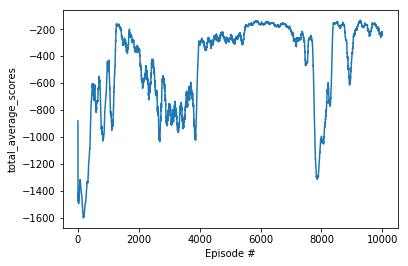

In [20]:
arr = np.array(list_episodes).T[0]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(arr)+1), arr)
plt.ylabel('total_average_scores')
plt.xlabel('Episode #')
plt.show()

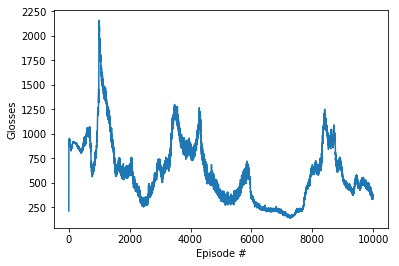

In [22]:
arr = np.array(list_episodes).T[1]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(arr)+1), arr)
plt.ylabel('Glosses')
plt.xlabel('Episode #')
plt.show()

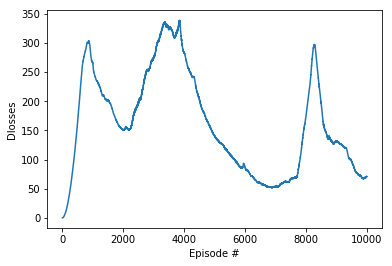

In [23]:
arr = np.array(list_episodes).T[2]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(arr)+1), arr)
plt.ylabel('Dlosses')
plt.xlabel('Episode #')
plt.show()

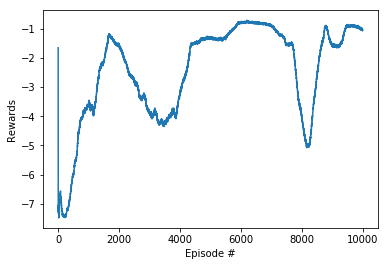

In [24]:
arr = np.array(list_episodes).T[3]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(arr)+1), arr)
plt.ylabel('Rewards')
plt.xlabel('Episode #')
plt.show()

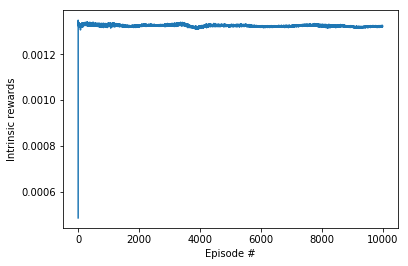

In [25]:
arr = np.array(list_episodes).T[4]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(arr)+1), arr)
plt.ylabel('Intrinsic rewards')
plt.xlabel('Episode #')
plt.show()

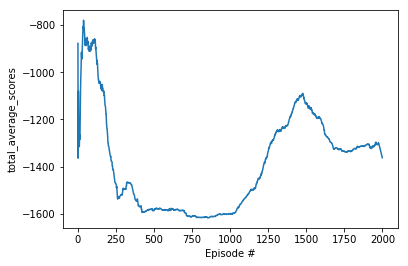

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(meanRs)+1), meanRs)
plt.ylabel('total_average_scores')
plt.xlabel('Episode #')
plt.show()

### 6. Watch the agent running with saved weights

In [14]:
# Load the saved weights into Pytorch model
agent.g.load_state_dict(torch.load('g-pendulum.pth', map_location='cpu'))
agent.d.load_state_dict(torch.load('d-pendulum.pth', map_location='cpu'))

# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# S = env_info.vector_observations                  # get the current states (S) (for each agent)
s = env.reset() # s: state # get the current state (s) (for an agent)

#Rs = np.zeros(num_agents)                          # initialize the total scores (Rs) (for each agent)
R = 0 # R:total reward # initialize the total score (R) (for an agent)

while True:
    #A = agent.act(S)                        # select actions (A) from loaded model agents
    a = agent.act(np.reshape(s, [1, -1])) # a: [-1, +1]    # select action (a) from loaded model agent
    
    # env_info = env.step(A)[brain_name]           # send all actions (A) to tne environment (env)
    # S2 = env_info.vector_observations         # get next states (S2) (for each agent)
    # rewards = env_info.rewards                         # get rewards (for each agent)
    # dones = env_info.local_done                        # see if the episode is done/finished (terminal)
    s2, r, done, _ = env.step(np.reshape(a, [-1]))
    
    # Rs += env_info.rewards                         # update the total scores (Rs) (for each agent)
    # S = S2                               # roll over current states (S) to next states (S2)
    R += r # update the total score (R) (for an agent)
    s = s2 # roll over current state (s) to next state (s2)
    
    #if np.any(dones):                                  # exit loop if episode is done/finished
    if done: # exit loop if episode is done/finished (terminal)
        break
        
print('Average of total scores: {}'.format(R))

FileNotFoundError: [Errno 2] No such file or directory: 'g-pendulum.pth'

When finished, you can close the environment.

In [6]:
env.close()